In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
diagnosis_df = pd.read_csv('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv',header=None, names=['patient_id', 'disease'])

diagnosis_df.head()

patient_id  disease
0         101     URTI
1         102  Healthy
2         103   Asthma
3         104     COPD
4         105     URTI

In [3]:
print(diagnosis_df.disease.value_counts())
print('')
print(diagnosis_df.disease.value_counts(normalize=True)*100)

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64


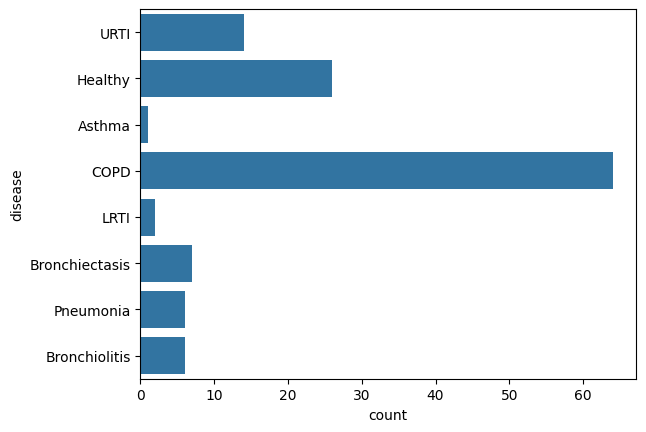

In [4]:
sns.countplot(diagnosis_df.disease)
plt.show()

In [5]:
path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files = [s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [6]:
files[:10]

['160_1b3_Pr_mc_AKGC417L',
 '160_1b4_Al_mc_AKGC417L',
 '160_1b3_Tc_mc_AKGC417L',
 '160_2b4_Pr_mc_AKGC417L',
 '160_2b4_Ar_mc_AKGC417L',
 '160_1b4_Tc_mc_AKGC417L',
 '160_1b4_Lr_mc_AKGC417L',
 '160_1b4_Pr_mc_AKGC417L',
 '160_2b3_Lr_mc_AKGC417L',
 '160_2b4_Pl_mc_AKGC417L']

In [7]:
def extract_patient_id(filename):
    return filename.split('_')[0]
length=len(files)
index=range(length)
i=0
patient_df=pd.DataFrame(index=index,columns=['patient_id','filename'])
for f in files:
    patient_df.iloc[i]['patient_id']=extract_patient_id(f)
    patient_df.iloc[i]['filename']=f
    i+=1

patient_df.head()

patient_id                filename
0        160  160_1b3_Pr_mc_AKGC417L
1        160  160_1b4_Al_mc_AKGC417L
2        160  160_1b3_Tc_mc_AKGC417L
3        160  160_2b4_Pr_mc_AKGC417L
4        160  160_2b4_Ar_mc_AKGC417L

In [8]:
import glob
directory_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
text_files = glob.iglob(path + '/*.txt', recursive=True)
text_files_list = list(text_files)

dfs = []
for file in text_files_list:

    content = pd.read_csv(file, names = ["start_time", "end_time", "crackles", "wheezes"], delimiter = "\t")
    patient_number = file.split("_")[7][6:]
    content['patient'] = int(patient_number)
    dfs.append(content)
samples = pd.concat(dfs)

print("There are", len(samples), "cycles")
print("There are", len(text_files_list), "samples")

There are 6898 cycles
There are 920 samples


In [9]:
# 텍스트 파일 읽기
diagnosis_df = pd.read_csv('/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', sep='\t', header=None, names=['patient_id', 'disease'])

In [10]:
label_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1p1_Al_sc_Meditron.txt'
# 텍스트 파일 읽기
label_data_list = pd.read_csv(label_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])

In [11]:
data_list = label_data_list.to_dict('records')
print(data_list)

[{'Beginning of respiratory': 2.2855, 'End of respiratory': 6.2646, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 6.2646, 'End of respiratory': 10.44, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 10.44, 'End of respiratory': 14.112, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 14.112, 'End of respiratory': 18.217, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 18.217, 'End of respiratory': 23.111, 'crackles': 0, 'wheezes': 0}, {'Beginning of respiratory': 23.111, 'End of respiratory': 26.658, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 26.658, 'End of respiratory': 32.3, 'crackles': 1, 'wheezes': 0}]


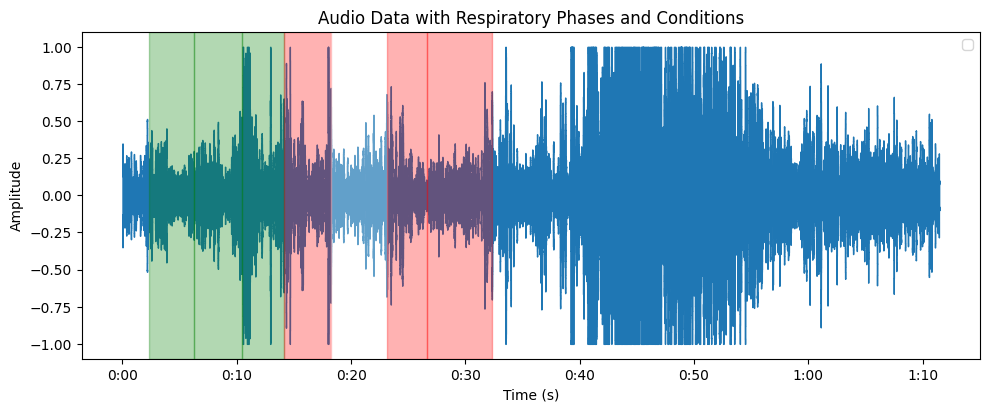

In [12]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1b1_Pr_sc_Meditron.wav'  # 오디오 파일 경로
y, sr = librosa.load(wav_file_path, sr=4000)  # y는 오디오 신호, sr은 샘플링 레이트

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

###Mel-Spectogram

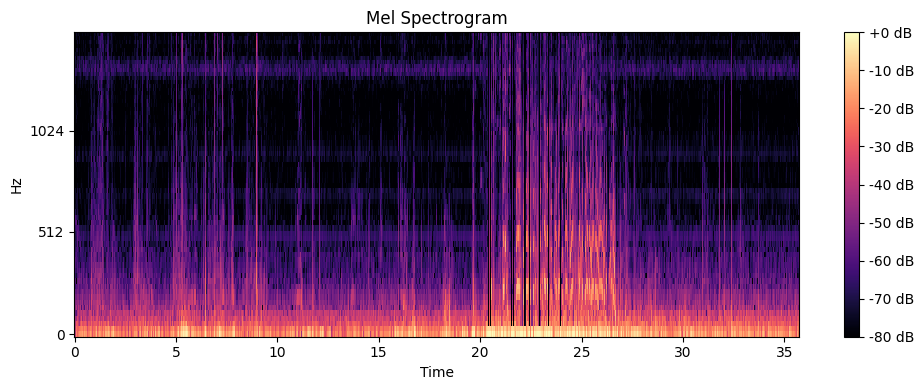

In [13]:
# 예제 오디오 신호 'y'와 샘플링 레이트 'sr' 가정
# y, sr = librosa.load(audio_path, sr=sample_rate)

# 주어진 설정 값
sample_rate = 8000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2000  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

In [14]:
from IPython.display import Audio

# 노이즈가 제거된 오디오 재생
Audio(data=y, rate=sr)

In [15]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut,fs, order=5):
    nyq= 0.5*fs
    low= lowcut/nyq
    high= highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs, order=5):
    b,a= butter_bandpass( lowcut, highcut, fs, order)
    y=lfilter(b,a,data)
    return y

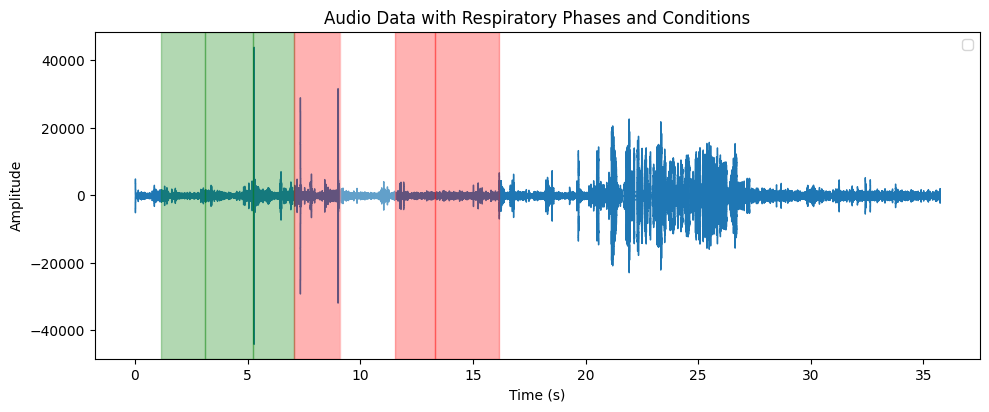

In [16]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/110_1b1_Pr_sc_Meditron.wav'  # 오디오 파일 경로
y2, sr = librosa.load(wav_file_path, sr=8000)  # y는 오디오 신호, sr은 샘플링 레이트
audio = y * (2 ** 15 - 1) / np.max(np.abs(y))
y2 = butter_bandpass_filter(audio, 100,520, sr, 3)

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y2, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]/2
    end = entry["End of respiratory"]/2
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

In [17]:
##전체 mel_spectogrum 저장
# # 주어진 설정 값
# sample_rate = 8000  # 샘플링 레이트
# desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
# n_mels = 64  # 멜 필터뱅크의 수
# nfft = 256  # FFT 윈도우 크기
# hop_length = nfft // 2  # 프레임 사이의 샘플 수
# f_max = 2000  # 최대 주파수

# directory_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/processed_audio_files_7sec_22050'

# # 디렉토리 내 모든 파일에 대해 처리
# for file_name in os.listdir(directory_path):
#     if file_name.endswith('.wav'):
#         # 파일의 전체 경로
#         file_path = os.path.join(directory_path, file_name)

#         # 오디오 데이터 읽기
#         y, _ = librosa.load(file_path, sr=sample_rate)

#         # 수정된 속성을 사용하여 멜 스펙트로그램 계산
#         S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

#         # 빈 값을 0 대신에 -80dB로 대체
#         S = librosa.power_to_db(S, ref=np.max)
#         S = np.nan_to_num(S, nan=-80)

#         plt.figure(figsize=(10, 4), facecolor='none')  # 배경을 투명하게 설정

#         librosa.display.specshow(S, sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
#         plt.axis('off')
#         plt.show()

#         # 파일 이름 추출
#         file_name_without_extension = os.path.splitext(file_name)[0]  # 확장자를 제외한 파일 이름

#         # 새로운 파일 이름 설정
#         new_file_name = file_name_without_extension + '_new.png'  # 새로운 파일 이름

#         # 이미지 읽기
#         image = cv2.imread(file_path)

In [18]:
data_list = label_data_list.to_dict('records')
print(data_list[1]['wheezes'])

1


In [ ]:
#정답 label확인용

import os
import re
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

# 데이터 폴더 경로
data_folder = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/processed_audio_files_7sec_22050/'
label_folder = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
save_file_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/mel_image'

# 대응되는 텍스트 파일이 없는 경우를 체크하는 함수
def check_for_text_file(wav_filename):
    txt_filename = re.sub(r'_\d+\.wav$', '.txt', wav_filename)  # WAV 파일 이름에서 숫자를 제외한 부분을 텍스트 파일 이름으로 사용
    txt_file_path = os.path.join(label_folder, txt_filename)
    return os.path.exists(txt_file_path), txt_file_path

# WAV 파일들을 순회하며 처리
for wav_filename in os.listdir(data_folder):
    # WAV 파일 경로
    wav_file_path = os.path.join(data_folder, wav_filename)

    # WAV 파일 이름에서 뒷부분의 숫자를 추출
    wav_number = int(re.search(r'_(\d+)\.wav$', wav_filename).group(1))  # 파일 이름에서 숫자 추출

    # 대응하는 텍스트 파일 이름 생성 및 확인
    has_text_file, txt_file_path = check_for_text_file(wav_filename)

    if has_text_file:
        # 텍스트 파일을 읽어옴
        label_data_list = pd.read_csv(txt_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])

        # 해당 숫자에 해당하는 crackles와 wheezes 정보 추출
        crackles = label_data_list.loc[label_data_list.index == wav_number, 'crackles'].values[0]
        wheezes = label_data_list.loc[label_data_list.index == wav_number, 'wheezes'].values[0]

        print(f"File: {wav_filename}, Crackles: {crackles}, Wheezes: {wheezes}")

        # 오디오 파일 로드
        y, sr = librosa.load(wav_file_path, sr=8000)

        # 0이 아닌 시작 및 종료 시간 계산
        start_index = next((i for i, val in enumerate(y) if val != 0), None)
        end_index = next((i for i, val in enumerate(reversed(y)) if val != 0), None)
        start_time = start_index / sr if start_index is not None else None
        end_time = (len(y) - end_index) / sr if end_index is not None else None

        # Mel spectrogram 계산
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=64, fmax=2000)

        # Mel spectrogram을 디비로 변환
        S_db = librosa.power_to_db(S, ref=np.max)

        # Mel spectrogram 플로팅
        plt.figure(figsize=(10, 4), facecolor='none') # 배경을 투명하게 설정
        librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=2000)

        # # 색상 결정
        # if crackles == 1:
        #     color = 'yellow'
        #     ymin = 0.05
        #     ymax = 0.3
        #     plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=4, edgecolor=color, fill=False)

        # if wheezes == 1:
        #     color = 'white'
        #     ymin = 0.05
        #     ymax = 0.6
        #     plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=4, edgecolor=color, fill=False)

        # 사각형 영역 표시
        plt.axis('off')
        plt.tight_layout()

        # 이미지 저장
        save_filename = os.path.splitext(wav_filename)[0] + '_mel_spec.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
        save_file_fullpath = os.path.join(save_file_path, save_filename)  # 저장할 이미지의 전체 경로 설정
        plt.savefig(save_file_fullpath, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()  # 플롯을 닫아 메모리 누수를 방지합니다.



    else:
        print(f"No corresponding text file found for: {wav_filename}")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
File: 146_2b4_Al_mc_AKGC417L_5.wav, Crackles: 0, Wheezes: 0
File: 146_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 0, Wheezes: 0
File: 146_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 0, Wheezes: 0
File: 146_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 1, Wheezes: 1
File: 146_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 1, Wheezes: 1
File: 146_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 1, Wheezes: 1
File: 146_2b4_Ll_mc_AKGC417L_0.wav, Crackles: 0, Wheezes: 0
File: 146_2b4_Ll_mc_AKGC417L_1.wav, Crackles: 0, Wheezes: 0
File: 146_2b4_Ll_mc_AKGC417L_2.wav, Crackles: 0, Wheezes: 0
File: 146_2b4_Ll_mc_AKGC417L_3.wav, Crackles: 0, Wheezes: 0
File: 146_2b4_Ll_mc_AKGC417L_4.wav, Crackles: 0, Wheezes: 0
File: 146_2b4_Ll_mc_AKGC417L_5.wav, Crackles: 0, Wheezes: 0
File: 146_8p3_Pr_mc_AKGC417L_0.wav, Crackles: 0, Wheezes: 0
File: 146_8p3_Pr_mc_AKGC417L_1.wav, Crackles: 0, Wheezes: 0
File: 146_8p3_Pr_mc_AKGC417L_2.wav, Crackles: 0, Wheezes: 0
File: 146_8p3_Pr_mc_AKGC417L_3.wav, Crackles: 0, Wheezes: 0
File

In [ ]:
# WAV 파일들을 순회하며 처리

import os
import re
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

data_folder = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/processed_audio_files_7sec_22050/'
label_folder = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
save_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/crackles_image'

# 대응되는 텍스트 파일이 없는 경우를 체크하는 함수
def check_for_text_file(wav_filename):
    txt_filename = re.sub(r'_\d+\.wav$', '.txt', wav_filename)  # WAV 파일 이름에서 숫자를 제외한 부분을 텍스트 파일 이름으로 사용
    txt_file_path = os.path.join(label_folder, txt_filename)
    return os.path.exists(txt_file_path), txt_file_path


for wav_filename in os.listdir(data_folder):
    # WAV 파일 경로
    wav_file_path = os.path.join(data_folder, wav_filename)

    # WAV 파일 이름에서 뒷부분의 숫자를 추출
    wav_number = int(re.search(r'_(\d+)\.wav$', wav_filename).group(1))  # 파일 이름에서 숫자 추출

    # 대응하는 텍스트 파일 이름 생성 및 확인
    has_text_file, txt_file_path = check_for_text_file(wav_filename)

    if has_text_file:
        # 텍스트 파일을 읽어옴
        label_data_list = pd.read_csv(txt_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])

        # 해당 숫자에 해당하는 crackles와 wheezes 정보 추출
        crackles = label_data_list.loc[label_data_list.index == wav_number, 'crackles'].values[0]

        print(f"File: {wav_filename}, Crackles: {crackles}")

        # 오디오 파일 로드
        y, sr = librosa.load(wav_file_path, sr=8000)

        # 0이 아닌 시작 및 종료 시간 계산
        start_index = next((i for i, val in enumerate(y) if val != 0), None)
        end_index = next((i for i, val in enumerate(reversed(y)) if val != 0), None)
        start_time = start_index / sr if start_index is not None else None
        end_time = (len(y) - end_index) / sr if end_index is not None else None

        # Mel spectrogram 계산
        S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=512, fmax=2000)
        S_db = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(10, 4), facecolor='white')
        librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=2000, cmap='Greys', alpha=0) # alpha 값 설정

        # Mel spectrogram을 디비로 변환
        S_db = librosa.power_to_db(S, ref=np.max)

        # 색상 결정
        if crackles == 1:
            color = 'black'
            ymin = 0.05
            ymax = 0.3
            plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)

        # 사각형 영역 표시
        plt.axis('off')
        plt.tight_layout()


        save_filename = os.path.splitext(wav_filename)[0] + '_crackles.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
        save_file_fullpath = os.path.join(save_path, save_filename)  # 저장할 이미지의 전체 경로 설정
        plt.savefig(save_file_fullpath, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()  # 플롯을 닫아 메모리 누수를 방지합니다.

    else:
        print(f"No corresponding text file found for: {wav_filename}")


File: 147_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 147_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 147_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 147_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 147_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_11.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_12.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_13.wav, Crackles: 0
File: 147_1b4_Tc_mc_AKGC417L_14.wav, Crackles: 0
File: 147_2b3_Ar_mc_AKGC417L_0.wav,

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p3_Pl_mc_AKGC417L_2.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Lr_mc_AKGC417L_5.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p4_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_2p4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 151_2p4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 151_2p4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 151_2p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 151_2p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 151_2p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 151_2p4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 151_3p3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p3_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 151_3p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 151_3p2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_3p2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_3p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_3p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_3p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 151_3p2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 151_3p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 151_3p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 151_3p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 151_3p2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 151_3p2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 151_3p2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 151_3p2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 151_3p2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 151_3p2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 151_3p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 151_3p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_0.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_1.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_2.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_3.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_4.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_5.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_6.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_7.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 149_1b1_Lr_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 149_1b1_Lr_sc_Meditron_10.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_11.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_12.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_13.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_14.wav, Crackles: 0
File: 149_1b1_Lr_sc_Meditron_15.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_0.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_1.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_2.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_3.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_4.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_5.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_6.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_7.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_8.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 149_1b1_Pl_sc_Meditron_10.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_11.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_12.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_13.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_14.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_15.wav, Crackles: 0
File: 149_1b1_Pl_sc_Meditron_16.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 149_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 149_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_11.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_12.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_13.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_14.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_15.wav, Crackles: 0
File: 149_1b1_Al_sc_Meditron_16.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 149_1b1_Al_sc_Meditron_17.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 148_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_4.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_9.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 150_1b2_Al_sc_Meditron_11.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_12.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_13.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_14.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_15.wav, Crackles: 0
File: 150_1b2_Al_sc_Meditron_16.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 153_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 154_1b3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 154_1b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 154_1b3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 154_1b3_Al_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Al_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ll_mc_AKGC417L_11.wav, Crackles: 0
File: 154_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 154_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 154_1b3_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 154_1b3_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 154_1b3_Pr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pr_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Pl_mc_AKGC417L_10.wav, Crackles: 0
File: 154_1b3_Pl_mc_AKGC417L_11.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_9.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_10.wav, Crackles: 0
File: 154_1b3_Ar_mc_AKGC417L_11.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_1b3_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_8.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_9.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_10.wav, Crackles: 0
File: 154_1b3_Lr_mc_AKGC417L_11.wav, Crackles: 0
File: 154_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 154_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 154_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 154_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 154_2b4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 154_1b3_Tc_mc_AKGC417L_11.wav, Crackles: 0
File: 154_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 154_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 154_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 154_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 154_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 154_2b4_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 154_2b4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 154_2b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 154_4b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 154_4b4_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ar_mc_AKGC417L_9.wav, Crackles: 0
File: 154_3b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 154_3b3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 154_3b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 154_3b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_7.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_8.wav, Crackles: 0
File: 154_4b4_Ll_mc_AKGC417L_9.wav, Crackles: 0
File: 154_4b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 154_4b4_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Al_mc_AKGC417L_9.wav, Crackles: 0
File: 154_3b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 154_3b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_2b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 154_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 154_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 154_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 154_2b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 154_2b4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 154_2b4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 154_4b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Lr_mc_AKGC417L_9.wav, Crackles: 0
File: 154_3b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_3b3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 154_4b4_Pr_mc_AKGC417L_9.wav, Crackles: 0
File: 154_4b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 154_4b4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 154_4b4_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 154_4b4_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 154_4b4_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 154_4b4_Pl_mc_AKGC417L_9.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 152_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 156_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 156_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 156_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 156_5b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 156_5b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 156_5b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Ll_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_5b3_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_2b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 156_8b3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 156_8b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 156_8b3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 156_8b3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 156_8b3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 156_8b3_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 156_8b3_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 156_8b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 156_8b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 156_8b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 156_8b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 156_8b3_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 156_8b3_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 155_2b1_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 155_2b1_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 155_2b1_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 155_2b1_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 155_2b1_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 155_2b1_Al_mc_LittC2SE_5.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 157_1b1_Ar_sc_Meditron_11.wav, Cr

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_2.wav, Crackles: 0
File: 157_1b1_Lr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Lr_sc_Meditron_8.wav, Crackles: 0
File: 157_1b1_Pr_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 157_1b1_Pr_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 157_1b1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 157_1b1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 157_1b1_Pr_sc_Meditron_10.wav, Crackles: 0
File: 157_1b1_Pr_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pr_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Al_sc_Meditron_12.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_13.wav, Crackles: 0
File: 157_1b1_Al_sc_Meditron_14.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_0.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_1.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_2.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_3.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_4.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_5.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pl_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pl_sc_Meditron_8.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_9.wav, Crackles: 0
File: 157_1b1_Pl_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pl_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 157_1b1_Pl_sc_Meditron_12.wav, Crackles: 0
File: 158_1p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p2_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1b3_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 158_1b3_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 158_1b3_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 158_1b3_Ar_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1b3_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 158_1b3_Ar_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1b3_Ar_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1b3_Ar_mc_LittC2SE_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1b3_Ar_mc_LittC2SE_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1b3_Ar_mc_LittC2SE_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1b3_Ar_mc_LittC2SE_10.wav, Crackles: 0
File: 158_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 158_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p3_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p2_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p2_Ll_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p3_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p2_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p2_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p2_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p2_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p2_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 158_1p3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Lr_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p4_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p4_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p4_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p3_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 158_1p3_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Ll_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Ll_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p4_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 158_1p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 158_1p3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p3_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 158_1p3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p3_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 158_1p3_Pl_mc_AKGC417L_8.wav, Crackles: 0
File: 158_1p4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p4_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p4_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 158_1p4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p4_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Pr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 158_1p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 158_1p4_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 158_1p4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 158_1p4_Tc_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_1p4_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 158_2p3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Lr_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 158_2p3_Tc_mc_AKGC417L_11.wav, Crackles: 0
File: 158_2p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 158_2p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 158_2p2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p2_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p2_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 158_2p2_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 159_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 159_1b1_Al_sc_Meditron_11.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 159_1b1_Ar_sc_Meditron_8.wav, Cr

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 130_2p5_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Lr_mc_AKGC417L_10.wav, Crackles: 0
File: 130_2p5_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2p5_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 130_2p5_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 130_3b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 130_3b4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 130_3b4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 130_3b4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 130_3b4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 130_3b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b3_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 130_2p5_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pl_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 130_3p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 130_3p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 130_3p2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 130_3p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 130_3b4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 130_3b4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 130_3b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 130_3b4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 130_3p3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 130_3p3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p3_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Tc_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 130_3p4_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 130_3p4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_3p4_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 125_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 125_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 125_1b1_Tc_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 125_1b1_Tc_sc_Meditron_3.wav, Crackles: 0
File: 125_1b1_Tc_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 125_1b1_Tc_sc_Meditron_5.wav, Crackles: 0
File: 132_2b1_Lr_mc_LittC2SE_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_2.wav, Crackles: 0
File: 132_2b1_Lr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b1_Lr_mc_LittC2SE_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_0.wav, Crackles: 0
File: 132_2b2_Lr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 132_2b2_Lr_mc_LittC2SE_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 131_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 131_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p2_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 133_2p2_Tc_mc_AKGC417L_0.wav, Cra

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p2_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p2_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 133_2p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Pl_mc_AKGC417L_8.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p3_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p2_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p3_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p3_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p4_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p3_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p3_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p4_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 133_3p2_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p4_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 133_2p4_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 133_3p2_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 133_2p4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_2p4_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_3p4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 133_3p4_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_3p2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 133_3p2_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 133_3p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 133_3p2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 133_3p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_3p2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 133_3p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 133_3p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 133_3p2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 133_3p2_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_5.wav, Crackles: 0
File: 134_2b2_Al_mc_LittC2SE_6.wav, Crackles: 0
File: 134_2b1_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 134_2b1_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 134_2b1_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 134_2b1_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 134_2b1_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 134_2b1_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 134_2b1_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 134_2b1_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 134_2b1_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 134_2b1_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 134_2b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 134_2b2_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 134_2b2_Ar_mc_LittC2SE_2.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 135_2b1_Pl_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 135_2b1_Pl_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 135_2b1_Pl_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 135_2b1_Pl_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 135_2b1_Pl_mc_LittC2SE_5.wav, Crackles: 0
File: 135_2b1_Pl_mc_LittC2SE_6.wav, Crackles: 0
File: 135_2b1_Pl_mc_LittC2SE_7.wav, Crackles: 0
File: 135_2b1_Pl_mc_LittC2SE_8.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_5.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_6.wav, Crackles: 0
File: 135_2b2_Ar_mc_LittC2SE_7.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_5.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_6.wav, Crackles: 0
File: 135_2b2_Al_mc_LittC2SE_7.wav, Crackles: 0
File: 135_2b1_Al_mc_LittC2SE_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 138_1p2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 138_1p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 138_1p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 138_1p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 138_1p2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 138_1p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 138_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 138_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 138_1p3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 138_1p3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 138_1p3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 138_1p3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 138_1p3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 138_1p3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 138_1p3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 138_1p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 138_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 138_1p4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 138_1p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 138_1p4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 138_2p2_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 138_2p2_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 138_2p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 138_2p2_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 138_2p2_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 138_2p2_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 138_2p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 138_2p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 138_1p4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 138_1p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 138_1p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 138_1p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 138_1p4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_1p4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 138_2p2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 138_2p2_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 138_2p2_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 138_2p2_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 138_2p2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 138_2p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 138_2p2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 138_2p2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 139_1b1_Pl_sc_Litt3200_0.wav, Crackles: 0
File: 139_1b1_Pl_sc_Litt3200_1.wav, Crackles: 0
File: 139_1b1_Pl_sc_Litt3200_2.wav, Crackles: 0
File: 139_1b1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 139_1b1_Pl_sc_Litt3200_4.wav, Crackles: 0
File: 139_1b1_Pl_sc_Litt3200_5.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 139_1b1_Ll_sc_Litt3200_1.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_2.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_3.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_4.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_5.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_6.wav, Crackles: 0
File: 139_1b1_Ll_sc_Litt3200_7.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_0.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_1.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_2.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_3.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_4.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_5.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_6.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_7.wav, Crackles: 0
File: 139_1b1_Ar_sc_Litt3200_8.wav, Crackles: 0
File: 139_1b1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 139_1b1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 139_1b1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 139_1b1_Pr_sc_Litt3200_3.wav, Crackles: 0
File: 139_1b1_Pr_sc_Litt3200_4.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 139_1b1_Lr_sc_Litt3200_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 139_1b1_Lr_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 139_1b1_Lr_sc_Litt3200_4.wav, Crackles: 0
File: 139_1b1_Lr_sc_Litt3200_5.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_0.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_1.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_2.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_3.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_4.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_5.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_6.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_7.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_8.wav, Crackles: 0
File: 139_1b1_Al_sc_Litt3200_9.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 140_2b2_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_5.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_6.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_7.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_8.wav, Crackles: 0
File: 140_2b2_Tc_mc_LittC2SE_9.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_0.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_1.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_2.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_3.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_4.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_5.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 140_2b2_Ll_mc_LittC2SE_7.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_8.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_9.wav, Crackles: 0
File: 140_2b2_Ll_mc_LittC2SE_10.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_0.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_1.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_2.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_3.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_4.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_5.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_6.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_7.wav, Crackles: 0
File: 140_2b3_Ll_mc_LittC2SE_8.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_5.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_6.wav, Crackles: 0
File: 140_2b3_Tc_mc_LittC2SE_7.wav, Cra

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b1_Pr_mc_LittC2SE_4.wav, Crackles: 0
File: 141_1b3_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 141_1b3_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 141_1b3_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 141_1b3_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 141_1b3_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 141_1b2_Lr_mc_LittC2SE_0.wav, Crackles: 0
File: 141_1b2_Lr_mc_LittC2SE_1.wav, Crackles: 0
File: 141_1b2_Lr_mc_LittC2SE_2.wav, Crackles: 0
File: 141_1b2_Lr_mc_LittC2SE_3.wav, Crackles: 0
File: 141_1b2_Lr_mc_LittC2SE_4.wav, Crackles: 0
File: 141_1b3_Pr_mc_LittC2SE_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b3_Pr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b3_Pr_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b3_Pr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b3_Pr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b3_Pr_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b2_Pr_mc_LittC2SE_0.wav, Crackles: 0
File: 141_1b2_Pr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b2_Pr_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b2_Pr_mc_LittC2SE_3.wav, Crackles: 0
File: 141_1b2_Pr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b2_Pr_mc_LittC2SE_5.wav, Crackles: 0
File: 141_1b3_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 141_1b3_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 141_1b3_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 141_1b3_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 141_1b3_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 141_1b2_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 141_1b2_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 141_1b2_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 141_1b2_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 141_1b2_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 141_1b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 141_1b2_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 141_1b2_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 141_1b2_Ar_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 141_1b2_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 141_1b2_Ar_mc_LittC2SE_5.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 144_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_3.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_4.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_5.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_6.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_7.wav, Crackles: 0
File: 144_1b1_Tc_sc_Meditron_8.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 145_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 145_2b2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 145_2b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 145_2b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 145_2b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 145_2b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 145_3b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_3b2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_3b2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_3b2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_3b2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_3b2_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 145_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 145_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 145_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 145_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 145_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 145_3b4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 145_3b4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 145_3b4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 145_3b4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 145_3b4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 145_3b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 145_3b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 145_3b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 145_3b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 145_3b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 145_3b2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 143_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 143_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 143_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 143_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 143_1b1_Al_sc_Meditron_4.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 142_1b1_Pl_mc_LittC2SE_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 146_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 146_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 146_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 146_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 146_2b4_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 146_2b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 146_2b4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 146_2b4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 146_2b4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 146_2b4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 146_2b4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 146_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 146_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 146_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_2b4_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 146_2b4_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 146_2b4_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 146_2b4_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 146_2b4_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 146_2b4_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 146_8p3_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 146_8p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 146_8p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_8p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_8p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_8p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_8p3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_8p3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 146_8p3_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 146_8p3_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 146_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 146_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 146_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 146_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 146_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 146_2b4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 146_8p3_Lr_mc_AKGC417L_8.wav, Crackles: 0
File: 146_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 146_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 146_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 146_2b4_Lr_mc_AKGC417L_3.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 147_1b3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 147_1b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 147_1b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 147_1b3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 147_1b3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 147_1b3_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 147_1b3_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 147_1b3_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 147_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 147_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 147_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 147_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 147_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 147_2b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 147_2b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 147_2b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 147_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 147_2b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 147_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 147_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 147_1b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 147_1b2_Tc_mc_AKGC417L_3.wav, Cra

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_11.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_12.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_13.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_14.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_15.wav, Crackles: 0
File: 112_1b1_Ar_sc_Meditron_16.wav, Crackles: 0
File: 112_1p1_Pl_sc_Litt3200_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1p1_Pl_sc_Litt3200_1.wav, Crackles: 0
File: 112_1p1_Pl_sc_Litt3200_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1p1_Pl_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1p1_Pl_sc_Litt3200_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1p1_Pl_sc_Litt3200_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1p1_Pl_sc_Litt3200_6.wav, Crackles: 0
File: 112_1p1_Pl_sc_Litt3200_7.wav, Crackles: 0
File: 112_1p1_Pl_sc_Litt3200_8.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_3.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_4.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_5.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_6.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_7.wav, Crackles: 0
File: 112_1p1_Pr_sc_Litt3200_8.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1b1_Lr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1b1_Lr_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1b1_Lr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1b1_Lr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 112_1b1_Lr_sc_Meditron_5.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_6.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_7.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_8.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_9.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_10.wav, Crackles: 0
File: 112_1b1_Lr_sc_Meditron_11.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_0.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_1.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_2.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_3.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_4.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_5.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_6.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_7.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_8.wav, Crackles: 0
File: 112_1p1_Ll_sc_Litt3200_9.wav, Crackles: 0
File: 113_1b1_Al_sc_Litt3200_0.wav, Crackles: 0
File: 113_1b1_Al_sc_Litt3200_1.wav, Crackles: 0
File: 113_1b1_Al_sc_Litt3200_2.wav, Crackles: 0
File: 113_1b1_Al_sc_Litt3200_3.wav, Cr

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1b1_Pr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_10.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_11.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_12.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_13.wav, Crackles: 0
File: 110_1b1_Pr_sc_Meditron_14.wav, Crackles: 0
File: 110_1p1_Al_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Al_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Al_sc_Meditron_4.wav, Crackles: 0
File: 110_1p1_Al_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Al_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Lr_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 110_1p1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_10.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_11.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_12.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_13.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_14.wav, Crackles: 0
File: 110_1p1_Pr_sc_Meditron_15.wav, Crackles: 0
File: 114_1b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 114_1b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 114_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 114_1b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 114_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 114_1b4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_0.wav, Crackles: 0
File: 109_1b1_Ll_sc_Litt3200_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Ll_sc_Litt3200_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Lr_sc_Litt3200_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 109_1b1_Al_sc_Litt3200_0.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_1.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_2.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_3.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_4.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_5.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_6.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_7.wav, Crackles: 0
File: 109_1b1_Al_sc_Litt3200_8.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_0.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_1.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_2.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_4.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_5.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_6.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_7.wav, Crackles: 0
File: 109_1b1_Pl_sc_Litt3200_8.wav, Crackles: 0
File: 109_1b1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 109_1b1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 109_1b1_Pr_sc_Litt3200_2.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_16.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_17.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_18.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_19.wav, Crackles: 0
File: 120_1b1_Pl_sc_Meditron_20.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_21.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_22.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_23.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_24.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_25.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_26.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_27.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_28.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pl_sc_Meditron_29.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_11.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_12.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_13.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_14.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_15.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_16.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_17.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_18.wav, Crackles: 0
File: 120_1b1_Ar_sc_Meditron_19.wav, Crackles: 0
File: 120_1b1_Al_sc_Meditron_0

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 120_1b1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_10.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_11.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_12.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_13.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_14.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_15.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_16.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_17.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_18.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_19.wav, Crackles: 0
File: 120_1b1_Pr_sc_Meditron_20.wav, Crackles: 0
File: 118_1b1_Al_sc_Litt3200_

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 124_1b1_Al_sc_Litt3200_1.wav, Crackles: 0
File: 124_1b1_Al_sc_Litt3200_2.wav, Crackles: 0
File: 124_1b1_Al_sc_Litt3200_3.wav, Crackles: 0
File: 124_1b1_Al_sc_Litt3200_4.wav, Crackles: 0
File: 124_1b1_Al_sc_Litt3200_5.wav, Crackles: 0
File: 124_1b1_Al_sc_Litt3200_6.wav, Crackles: 0
File: 124_1b1_Al_sc_Litt3200_7.wav, Crackles: 0
File: 124_1b1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 124_1b1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 124_1b1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 124_1b1_Pr_sc_Litt3200_3.wav, Crackles: 0
File: 124_1b1_Pr_sc_Litt3200_4.wav, Crackles: 0
File: 124_1b1_Pr_sc_Litt3200_5.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_0.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_1.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_2.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_3.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_4.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_5.wav, Crackles: 0
File: 124_1b1_Ar_sc_Litt3200_6.wav, Crackles: 0
File: 124_1b1_Lr_sc_Litt3200_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 124_1b1_Pl_sc_Litt3200_2.wav, Crackles: 0
File: 124_1b1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 124_1b1_Pl_sc_Litt3200_4.wav, Crackles: 0
File: 124_1b1_Pl_sc_Litt3200_5.wav, Crackles: 0
File: 124_1b1_Pl_sc_Litt3200_6.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_0.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_1.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_2.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_3.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_4.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_5.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_6.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_7.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_8.wav, Crackles: 0
File: 124_1b1_Ll_sc_Litt3200_9.wav, Crackles: 0
File: 129_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 129_1b1_Ar_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 129_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 129_1b1_Ar_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 129_1b1_Ar_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 129_1b1_Ar_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 129_1b1_Ar_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 129_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 129_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 128_1b3_Tc_mc_LittC2SE_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 128_1b3_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 128_1b3_Tc_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 128_1b3_Tc_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 128_1b3_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 127_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 127_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 127_1b1_Ar_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 127_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 123_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 126_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 130_1p2_Al_mc_AKGC417L_0.wav, Cra

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 130_1p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 130_1p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p2_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p4_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 130_1p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p3_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p3_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p3_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p3_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p4_Pl_mc_AKGC417L_5.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_1p4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p4_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p4_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 130_1p4_Ll_mc_AKGC417L_6.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 130_2b2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 130_2b2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 130_2b2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 130_2b2_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b2_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 130_2b3_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 130_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Ll_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b3_Pr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 130_2b4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Pl_mc_AKGC417L_8.wav, Crackles: 0
File: 130_2p3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p3_Pl_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 130_2b4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2b4_Ll_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Al_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Ar_mc_AKGC417L_10.wav, Crackles: 0
File: 130_2p5_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 130_2p5_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_2p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_11.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_12.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_13.wav, Crackles: 0
File: 211_2p4_Tc_mc_AKGC417L_14.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 211_1p3_Ar_mc_AKGC417L_9.wav,

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 210_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_11.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_12.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_13.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_14.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_15.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_16.wav, Crackles: 0
File: 210_1b1_Al_sc_Meditron_17.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 210_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_11.wav, Crackles: 0
File: 210_1b1_Ar_sc_Meditron_12.wav, Crackles: 0
File: 209_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 209_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 209_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 209_1b1_Tc_sc_Meditron_3.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_0.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_1.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_2.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_3.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_4.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_5.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_6.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_7.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_8.wav, Crackles: 0
File: 208_1b1_Ll_sc_Meditron_9.wav, C

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 213_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p3_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 213_1p5_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p5_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p5_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p5_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p5_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p5_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p5_Tc_mc_AKGC417L_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p5_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p5_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p5_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p5_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 213_2p2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 213_2p2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 213_2p2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 213_2p2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 213_2p2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 213_2p2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 213_1p5_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p5_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_1p5_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p5_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p5_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p5_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 213_1p3_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 213_1p5_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 213_1p5_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 213_1p5_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 213_1p5_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 213_1p5_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 213_1p5_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 213_2p2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 213_2p2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 213_2p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 213_2p2_Tc_mc_AKGC417L_3.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 213_2p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 213_2p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 213_2p2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 213_2p2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 213_2p2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 213_2p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 213_2p2_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 213_2p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 213_2p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 213_2p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 213_2p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 213_2p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 213_2p2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 212_2b2_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 212_2b2_Tc_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 212_2b2_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 212_2b2_Tc_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 212_2b2_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 212_2b2_Tc_mc_LittC2SE_5.wav, Crackles: 0
File: 212_2b2_Tc_mc_LittC2SE_6.wav, Crackles: 0
File: 215_1b3_Tc_sc_Meditron_0.wav, Crackles: 0
File: 215_1b3_Tc_sc_Meditron_1.wav, Crackles: 0
File: 215_1b3_Tc_sc_Meditron_2.wav, Crackles: 0
File: 215_1b3_Tc_sc_Meditron_3.wav, Crackles: 0
File: 215_1b3_Tc_sc_Meditron_4.wav, Crackles: 0
File: 215_1b3_Tc_sc_Meditron_5.wav, Crackles: 0
File: 215_1b2_Ar_sc_Meditron_0.wav, Crackles: 0
File: 215_1b2_Ar_sc_Meditron_1.wav, Crackles: 0
File: 215_1b2_Ar_sc_Meditron_2.wav, Crackles: 0
File: 215_1b2_Ar_sc_Meditron_3.wav, Crackles: 0
File: 215_1b2_Ar_sc_Meditron_4.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 214_1b1_Ar_sc_Meditron_6.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 216_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 216_1b1_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 216_1b1_Al_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 216_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 216_1b1_Al_sc_Meditron_11.wav, Crackles: 0
File: 218_1p1_Pr_sc_Litt3200_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pr_sc_Litt3200_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 218_1p1_Pr_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pr_sc_Litt3200_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pr_sc_Litt3200_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pr_sc_Litt3200_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 218_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 218_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 218_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 218_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 218_1b1_Al_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Al_sc_Meditron_13.wav, Crackles: 0
File: 218_1b1_Al_sc_Meditron_14.wav, Crackles: 1
File: 218_1b1_Lr_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color

File: 218_1b1_Lr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_9.wav, Crackles: 0
File: 218_1b1_Lr_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_15.wav, Crackles: 0
File: 218_1b1_Lr_sc_Meditron_16.wav, Crackles: 0
File: 218_1b1_Lr_sc_Meditron_17.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Lr_sc_Meditron_18.wav, Crackles: 0
File: 218_1b1_Ar_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 218_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 218_1b1_Ar_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Ar_sc_Meditron_15.wav, Crackles: 0
File: 218_1p1_Pl_sc_Litt3200_0.wav, Crackles: 0
File: 218_1p1_Pl_sc_Litt3200_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pl_sc_Litt3200_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 218_1p1_Pl_sc_Litt3200_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pl_sc_Litt3200_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pl_sc_Litt3200_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1p1_Pl_sc_Litt3200_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 218_1b1_Pr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pr_sc_Meditron_15.wav, Crackles: 0
File: 218_1b1_Pr_sc_Meditron_16.wav, Crackles: 0
File: 218_1b1_Pr_sc_Meditron_17.wav, Crackles: 0
File: 218_1p1_Ar_sc_Litt3200_0.wav, Crackles: 0
File: 218_1p1_Ar_sc_Litt3200_1.wav, Crackles: 0
File: 218_1p1_Ar_sc_Litt3200_2.wav, Crackles: 0
File: 218_1p1_Ar_sc_Litt3200_3.wav, Crackles: 0
File: 218_1p1_Ar_sc_Litt3200_4.wav, Crackles: 0
File: 218_1p1_Ar_sc_Litt3200_5.wav, Crackles: 0
File: 218_1b1_Pl_sc_Meditron_0.wav, Crackles: 0
File: 218_1b1_Pl_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color

File: 218_1b1_Pl_sc_Meditron_11.wav, Crackles: 1
File: 218_1b1_Pl_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 218_1b1_Pl_sc_Meditron_14.wav, Crackles: 0
File: 218_1b1_Pl_sc_Meditron_15.wav, Crackles: 0
File: 218_1b1_Pl_sc_Meditron_16.wav, Crackles: 0
File: 218_1b1_Pl_sc_Meditron_17.wav, Crackles: 0
File: 219_2b3_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 219_2b3_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 219_2b3_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 219_2b3_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 219_2b3_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 219_2b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 219_2b2_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 219_2b2_Ar_mc_LittC2SE_2.wav, Crackles: 1
File: 219_2b2_Ar_mc_LittC2SE_3.wav, Crackles: 0


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 219_2b2_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 219_2b1_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 219_2b1_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 219_2b1_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 219_2b1_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 219_2b1_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 219_2b1_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 219_2b1_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 219_2b1_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 219_2b1_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 219_2b1_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 219_2b2_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 219_2b2_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 219_2b2_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 219_2b2_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 219_2b2_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 219_2b2_Tc_mc_LittC2SE_5.wav, Crackles: 0
File: 217_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 217_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 217_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 217_1b1_Tc_sc_Meditron_3.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 220_1b1_Tc_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Lr_mc_LittC2SE_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Lr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Lr_mc_LittC2SE_2.wav, Crackles: 0
File: 221_2b1_Lr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Lr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b1_Ar_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 221_2b1_Ar_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Ar_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Pl_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b1_Pl_mc_LittC2SE_1.wav, Crackles: 0
File: 221_2b1_Pl_mc_LittC2SE_2.wav, Crackles: 0
File: 221_2b1_Pl_mc_LittC2SE_3.wav, Crackles: 0
File: 221_2b1_Pl_mc_LittC2SE_4.wav, Crackles: 0
File: 221_2b2_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b2_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 221_2b2_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 221_2b2_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 221_2b2_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 221_2b2_Al_mc_LittC2SE_5.wav, Crackles: 0
File: 221_2b1_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b1_Al_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Al_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Al_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b1_Al_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b3_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 221_2b3_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 221_2b3_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 221_2b3_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 221_2b2_Pl_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b2_Pl_mc_LittC2SE_1.wav, Crackles: 0
File: 221_2b2_Pl_mc_LittC2SE_2.wav, Crackles: 0
File: 221_2b2_Pl_mc_LittC2SE_3.wav, Crackles: 0
File: 221_2b2_Pl_mc_LittC2SE_4.wav, Crackles: 0
File: 221_2b2_Pl_mc_LittC2SE_5.wav, Crackles: 0
File: 221_2b3_Pr_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b3_Pr_mc_LittC2SE_1.wav, Crackles: 0
File: 221_2b3_Pr_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Pr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Pr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b3_Ar_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Ar_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Ar_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Ar_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b2_Ar_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Ar_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Ar_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Ar_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Ar_mc_LittC2SE_5.wav, Crackles: 0
File: 221_2b2_Lr_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b2_Lr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Lr_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Lr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b2_Lr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Lr_mc_LittC2SE_0.wav, Crackles: 0
File: 221_2b3_Lr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Lr_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Lr_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 221_2b3_Lr_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_10.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_11.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_12.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_13.wav, Crackles: 0
File: 222_1b1_Pr_sc_Meditron_14.wav, Crackles: 0
File: 222_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 222_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 222_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 222_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 222_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 222_1b1_Ar_sc_Meditron_5.wav,

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_1.wav, Crackles: 0
File: 222_1b1_Lr_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_3.wav, Crackles: 0
File: 222_1b1_Lr_sc_Meditron_4.wav, Crackles: 0
File: 222_1b1_Lr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_6.wav, Crackles: 0
File: 222_1b1_Lr_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_8.wav, Crackles: 0
File: 222_1b1_Lr_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_15.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_16.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_17.wav, Crackles: 0
File: 222_1b1_Lr_sc_Meditron_18.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 222_1b1_Lr_sc_Meditron_19.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 226_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 226_1b1_Pl_sc_LittC2SE_0.wav, Crackles: 0
File: 226_1b1_Pl_sc_LittC2SE_1.wav, Crackles: 0
File: 226_1b1_Pl_sc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Pl_sc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Pl_sc_LittC2SE_4.wav, Crackles: 0
File: 226_1b1_Pl_sc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Pl_sc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Pl_sc_LittC2SE_7.wav, Crackles: 0
File: 226_1b1_Pl_sc_LittC2SE_8.wav, Crackles: 0
File: 226_1b1_Pl_sc_LittC2SE_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Pl_sc_LittC2SE_10.wav, Crackles: 0
File: 226_1b1_Ll_sc_Meditron_0.wav, Crackles: 0
File: 226_1b1_Ll_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Ll_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Ll_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Ll_sc_Meditron_4.wav, Crackles: 0
File: 226_1b1_Ll_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Ll_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Ll_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 226_1b1_Ll_sc_Meditron_8.wav, Crackles: 0
File: 226_1b1_Ll_sc_Meditron_9.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_0.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_1.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_2.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_3.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_4.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_5.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_6.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_7.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_8.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_9.wav, Crackles: 0
File: 223_1b1_Pl_sc_Meditron_10.wav, Crackles: 0
File: 223_1b1_Ll_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_1.wav, Crackles: 0
File: 223_1b1_Ll_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ll_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 223_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 223_1b1_Lr_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Lr_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 223_1b1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 223_1b1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 223_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 224_1b2_Al_sc_Meditron_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 104_1b1_Ll_sc_Litt3200_5.wav, Crackles: 0
File: 104_1b1_Ll_sc_Litt3200_6.wav, Crackles: 0
File: 107_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b4_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b3_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b3_Tc_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 107_2b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b3_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b4_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b5_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b5_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 107_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b4_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b5_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b5_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 107_2b5_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b5_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b5_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b5_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b4_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 107_3p2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 107_3p2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 107_3p2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 107_3p2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 107_3p2_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 107_3p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 107_3p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 107_3p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 107_3p2_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 107_3p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Ll_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 107_2b5_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 107_2b5_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 107_2b5_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 107_2b5_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 107_2b5_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 107_2b5_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 107_2b5_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 107_2b5_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_2b5_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 107_3p2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 107_3p2_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 107_3p2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 107_3p2_Pr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 102_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_11.wav, Crackles: 0
File: 102_1b1_Ar_sc_Meditron_12.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_0.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_1.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_2.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_3.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_4.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_5.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_6.wav, Crackles: 0
File: 106_2b1_Pr_mc_LittC2SE_7.wav, C

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_2.wav, Crackles: 0
File: 106_2b1_Pl_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 106_2b1_Pl_mc_LittC2SE_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 103_2b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 103_2b2_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 103_2b2_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 103_2b2_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 103_2b2_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 103_2b2_Ar_mc_LittC2SE_5.wav, Crackles: 0
File: 105_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 105_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 105_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 193_1b2_Pl_mc_AKGC417L_10.wav, Crackles: 0
File: 193_1b2_Pl_mc_AKGC417L_11.wav, Crackles: 0
File: 193_7b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 193_7b3_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 193_7b3_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 193_7b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 193_7b3_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 193_7b3_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 193_7b3_Ll_mc_AKGC417L_7.wav, Crackles: 0
File: 193_7b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 193_7b3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 193_7b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 193_7b3_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Tc_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 193_7b3_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 193_7b3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Ar_sc_Litt3200_0.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_1.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_2.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_3.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_4.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_5.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_6.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_7.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_8.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_9.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_10.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_11.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_12.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_13.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_14.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_15.wav, Crackles: 0
File: 195_1b1_Ar_sc_Litt3200_16.wav, Crackles: 0
File: 195_1b1_Al_sc_Litt3200_0.wav, Crackles: 0
File: 195_1b1_Al_sc_Litt3200_1.wav, Crackles: 0
File: 195_1b1_Al_sc_Litt3200_2.wav, Crackles: 0
File: 195_1b1_Al_sc_Litt3200_3.wa

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Ll_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Ll_sc_Litt3200_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Ll_sc_Litt3200_5.wav, Crackles: 0
File: 195_1b1_Ll_sc_Litt3200_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Ll_sc_Litt3200_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Ll_sc_Litt3200_8.wav, Crackles: 0
File: 195_1b1_Ll_sc_Litt3200_9.wav, Crackles: 0
File: 195_1b1_Ll_sc_Litt3200_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Lr_sc_Litt3200_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Lr_sc_Litt3200_1.wav, Crackles: 0
File: 195_1b1_Lr_sc_Litt3200_2.wav, Crackles: 0
File: 195_1b1_Lr_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Lr_sc_Litt3200_4.wav, Crackles: 0
File: 195_1b1_Lr_sc_Litt3200_5.wav, Crackles: 0
File: 195_1b1_Lr_sc_Litt3200_6.wav, Crackles: 0
File: 195_1b1_Lr_sc_Litt3200_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Lr_sc_Litt3200_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 195_1b1_Pl_sc_Litt3200_0.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_1.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_2.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_4.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_5.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_6.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_7.wav, Crackles: 0
File: 195_1b1_Pl_sc_Litt3200_8.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_3.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_4.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_5.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_6.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_7.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_8.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_9.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_10.wav, Crackles: 0
File: 195_1b1_Pr_sc_Litt3200_11.wav, Cr

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 197_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 197_1b1_Tc_sc_Meditron_3.wav, Crackles: 0
File: 197_1b1_Tc_sc_Meditron_4.wav, Crackles: 0
File: 196_1b1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 196_1b1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 196_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 196_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 196_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 196_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 198_1b5_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 198_1b5_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 198_1b5_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 198_1b5_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 198_1b5_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 198_1b5_Ar_mc_AKGC417L_4.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 198_6p1_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 198_1b5_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 198_6p1_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 198_6p1_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 198_6p1_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 198_6p1_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 198_6p1_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 198_6p1_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 198_6p1_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 198_6p1_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_1b5_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 198_1b5_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 198_1b5_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 198_1b5_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 198_1b5_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 198_1b5_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 198_1b5_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 198_6p1_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 198_6p1_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 198_6p1_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 198_6p1_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 198_6p1_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 198_6p1_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 198_6p1_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 200_2p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p2_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p2_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 200_2p3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p3_Al_mc_AKGC417L_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p3_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 200_3p4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 200_3p4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 200_3p4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 200_3p4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 200_3p4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 200_3p4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_3p4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_3p4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 200_2p4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 200_3p4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 200_3p4_Pl_mc_AKGC417L_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_2p4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 200_2p4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 200_2p4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 200_2p4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 200_3p4_Tc_mc_AKGC417L_0.wav, Crackles: 1
File: 200_3p4_Tc_mc_AKGC417L_1.wav, Crackles: 0


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 200_3p4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 200_3p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 199_2b3_Ll_mc_LittC2SE_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b3_Ll_mc_LittC2SE_8.wav, Crackles: 0
File: 199_2b1_Ll_mc_LittC2SE_0.wav, Crackles: 0
File: 199_2b1_Ll_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b1_Ll_mc_LittC2SE_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b1_Ll_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b1_Ll_mc_LittC2SE_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 199_2b1_Ll_mc_LittC2SE_5.wav, Crackles: 0
File: 199_2b1_Ll_mc_LittC2SE_6.wav, Crackles: 0
File: 199_2b1_Ll_mc_LittC2SE_7.wav, Crackles: 0
File: 199_2b1_Ll_mc_LittC2SE_8.wav, Crackles: 0
File: 203_1p2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Al_mc_AKGC417L_9.wav, Crackles: 0
File: 203_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Ar_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 203_1p2_Pr_mc_AKGC417L_9.wav, Crackles: 0
File: 203_1p2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Lr_mc_AKGC417L_8.wav, Crackles: 0
File: 203_1p2_Lr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Al_mc_AKGC417L_9.wav, Crackles: 0
File: 203_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Ar_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pl_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Pl_mc_AKGC417L_9.wav, Crackles: 0
File: 203_1p3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 203_1p3_Pr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Pr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 203_1p2_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 203_1p4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 203_1p4_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Tc_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 203_1p4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 203_1p4_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 203_1p3_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 203_1p4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 203_1p4_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 203_1p4_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 203_1p4_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 203_1p4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pl_mc_AKGC417L_8.wav, Crackles: 0
File: 203_2p3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 203_2p3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 203_2p3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 203_2p3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 203_2p3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 203_2p3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 203_2p3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 203_2p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_2p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_2p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_2p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_2p3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 203_1p4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 203_1p4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_1p4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 203_1p4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 203_1p4_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 203_1p4_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 203_1p4_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 203_2p3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 203_2p3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 203_2p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_2p3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 203_2p3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 203_2p3_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 203_2p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 203_2p3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 203_2p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 203_2p3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 203_2p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 203_2p3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 203_2p3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 203_2p3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 203_2p3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 203_2p3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 203_2p3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 203_2p3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b3_Al_sc_Meditron_0.wav, Crackles: 0
File: 201_1b3_Al_sc_Meditron_1.wav, Crackles: 0
File: 201_1b3_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b3_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b3_Al_sc_Meditron_4.wav, Crackles: 0
File: 201_1b3_Al_sc_Meditron_5.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_0.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_1.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_2.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_3.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_4.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_5.wav, Crackles: 0
File: 201_1b3_Ar_sc_Meditron_6.wav, Crackles: 0
File: 201_1b2_Ar_sc_Meditron_0.wav, Crackles: 0
File: 201_1b2_Ar_sc_Meditron_1.wav, Crackles: 0
File: 201_1b2_Ar_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b2_Ar_sc_Meditron_3.wav, Crackles: 0
File: 201_1b2_Ar_sc_Meditron_4.wav, Crackles: 0
File: 201_1b2_Ar_sc_Meditron_5.wav, Crackles: 0
File: 201_1b2_Ar_sc_Meditron_6.wav, Crackles: 0
File: 201_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 201_1b1_Al_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 201_1b1_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b1_Al_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 201_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 201_1b2_Al_sc_Meditron_0.wav, Crackles: 0
File: 201_1b2_Al_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b2_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b2_Al_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b2_Al_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b2_Al_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 201_1b2_Al_sc_Meditron_6.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 201_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 202_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 204_2b5_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 204_2b5_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 204_2b5_Ar_mc_AKGC417L_2.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 205_1b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 205_1b3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 205_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 205_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 205_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 205_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 205_1b3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 205_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 205_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 205_1b3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 205_1b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_1b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 205_2b3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 205_2b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 205_2b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 205_2b3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 205_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 205_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 205_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 205_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 205_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 205_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 205_3b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 205_3b4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 205_3b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_3b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 205_3b4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 205_3b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_3b4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 205_3b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 205_4b2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_3b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_3b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_3b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_3b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 205_4b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 205_4b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 205_4b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 205_3b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 205_3b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 205_3b4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 205_3b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 205_4b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 205_4b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 205_4b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 205_4b2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 205_4b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 205_4b2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 205_4b2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 205_4b2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 207_2b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b2_Tc_mc_AKGC417L_5.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 207_3b2_Pl_mc_AKGC417L_8.wav, Crackles: 0
File: 207_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_3b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 207_3b2_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 207_2b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 207_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 207_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 207_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 207_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 207_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 207_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 207_3b2_Lr_mc_AKGC417L_8.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 207_3b2_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 207_3b2_Tc_mc_AKGC417L_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 206_1b1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 206_1b1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 206_1b1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 206_1b1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 211_1p2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 211_1p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 211_1p2_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_9.wav, Crackles: 0
File: 211_1p2_Pl_mc_AKGC417L_10.wav, Crackles: 0
File: 211_1p2_Pl_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Pl_mc_AKGC417L_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 211_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_8.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_9.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_10.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_11.wav, Crackles: 0
File: 211_1p2_Ar_mc_AKGC417L_12.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 211_1p2_Pr_mc_AKGC417L_7.wav, C

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 174_1p4_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 174_1p4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 174_2p3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 174_2p3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 174_1p4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 174_2p3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 176_1b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 176_1b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 176_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 176_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 176_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 176_1b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 176_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 176_1b4_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_1b4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 176_2b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 176_2b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 176_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 176_2b3_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 175_1b1_Lr_sc_Litt3200_0.wav, Crackles: 0
File: 175_1b1_Lr_sc_Litt3200_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 175_1b1_Lr_sc_Litt3200_2.wav, Crackles: 0
File: 175_1b1_Lr_sc_Litt3200_3.wav, Crackles: 0
File: 175_1b1_Ar_sc_Litt3200_0.wav, Crackles: 0
File: 175_1b1_Ar_sc_Litt3200_1.wav, Crackles: 0
File: 175_1b1_Ar_sc_Litt3200_2.wav, Crackles: 0
File: 175_1b1_Al_sc_Litt3200_0.wav, Crackles: 0
File: 175_1b1_Al_sc_Litt3200_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 175_1b1_Al_sc_Litt3200_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 175_1b1_Al_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 175_1b1_Pl_sc_Litt3200_0.wav, Crackles: 0
File: 175_1b1_Pl_sc_Litt3200_1.wav, Crackles: 0
File: 175_1b1_Pl_sc_Litt3200_2.wav, Crackles: 0
File: 175_1b1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 175_1b1_Ll_sc_Litt3200_0.wav, Crackles: 0
File: 175_1b1_Ll_sc_Litt3200_1.wav, Crackles: 0
File: 175_1b1_Ll_sc_Litt3200_2.wav, Crackles: 0
File: 175_1b1_Ll_sc_Litt3200_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 175_1b1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 175_1b1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 175_1b1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 175_1b1_Pr_sc_Litt3200_3.wav, Crackles: 0
File: 177_1b2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 177_1b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color

File: 177_1b2_Al_mc_AKGC417L_0.wav, Crackles: 1
File: 177_1b2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color

File: 177_1b2_Al_mc_AKGC417L_3.wav, Crackles: 1
File: 177_1b2_Pr_mc_AKGC417L_0.wav, Crackles: 1
File: 177_1b2_Pr_mc_AKGC417L_1.wav, Crackles: 0


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 177_1b4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 177_1b4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 177_1b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 177_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 177_1b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 177_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 177_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 177_1b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 177_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 177_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 177_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 177_2b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 177_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_1b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 177_1b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 177_1b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 177_1b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 177_1b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 177_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 177_2b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 177_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 177_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 177_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 177_2b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pl_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_7.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Ar_mc_AKGC417L_9.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_10.wav, Crackles: 0
File: 178_1b2_Ar_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b2_Lr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Lr_mc_AKGC417L_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_7.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_8.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_9.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_10.wav, Crackles: 0
File: 178_1b2_Pr_mc_AKGC417L_11.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_8.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_9.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_10.wav, Crackles: 0
File: 178_1b2_Al_mc_AKGC417L_11.wav, 

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 178_1b2_Tc_mc_AKGC417L_11.wav, Crackles: 0
File: 178_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b3_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b6_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 178_1b6_Pr_mc_AKGC417L_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_1b6_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b6_Pl_mc_AKGC417L_7.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b6_Al_mc_AKGC417L_7.wav, Crackles: 0
File: 178_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 178_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 178_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_2b2_Pr_mc_AKGC417L_4.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 178_2b2_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 178_2b2_Al_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Al_mc_AKGC417L_9.wav, Crackles: 0
File: 178_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 178_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 178_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 178_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 178_2b2_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Ar_mc_AKGC417L_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Ar_mc_AKGC417L_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 178_2b2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_7.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_8.wav, Crackles: 0
File: 178_2b2_Lr_mc_AKGC417L_9.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 178_1b6_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 179_1b1_Al_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 179_1b1_Al_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 179_1b1_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 179_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 179_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 179_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 179_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 179_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 179_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 179_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 179_1b1_Tc_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 179_1b1_Tc_sc_Meditron_3.wav, Crackles: 0
File: 179_1b1_Tc_sc_Meditron_4.wav, Crackles: 0
File: 179_1b1_Tc_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 179_1b1_Tc_sc_Meditron_6.wav, Crackles: 0
File: 180_1b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 180_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 180_1b4_Lr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 181_1b1_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 181_1b1_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 181_1b1_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 181_1b1_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 181_1b2_Ar_mc_LittC2SE_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 181_1b2_Ar_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 181_1b2_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 181_1b2_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 181_1b3_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 181_1b3_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 181_1b3_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 181_1b3_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 181_1b3_Tc_mc_LittC2SE_4.wav, Crackles: 0
File: 181_1b1_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 181_1b1_Tc_mc_LittC2SE_1.wav, Crackles: 0
File: 181_1b1_Tc_mc_LittC2SE_2.wav, Crackles: 0
File: 181_1b1_Tc_mc_LittC2SE_3.wav, Crackles: 0
File: 183_1b1_Pl_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 183_1b1_Pl_sc_Meditron_1.wav, Crackles: 0
File: 183_1b1_Pl_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 183_1b1_Pl_sc_Meditron_3.wav, Crackles: 0
File: 183_1b1_Tc_sc_Meditron_0.wav, Crackles: 0
File: 183_1b1_Tc_sc_Meditron_1.wav, Crackles: 0
File: 183_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 183_1b1_Tc_sc_Meditron_3.wav, Crackles: 0
File: 182_1b1_Tc_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 182_1b1_Tc_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 182_1b1_Tc_sc_Meditron_2.wav, Crackles: 0
File: 182_1b1_Tc_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 182_1b1_Tc_sc_Meditron_4.wav, Crackles: 0
File: 182_1b1_Tc_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 182_1b1_Tc_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 186_2b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 186_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 186_2b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 186_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 186_2b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 186_2b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 186_2b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 186_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 186_2b3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 186_2b3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 186_2b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 186_2b3_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 186_2b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 186_2b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 186_2b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 186_2b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 186_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 186_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 186_2b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 186_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 186_3b3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 186_3b3_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 186_3b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 186_3b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 186_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 186_2b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_2b4_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 186_3b3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 186_3b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 186_3b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 186_3b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 186_3b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 186_3b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 186_3b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 186_3b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 186_3b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 186_3b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 186_3b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 186_3b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 186_3b3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 186_3b3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 186_3b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 186_3b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 186_3b3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 186_3b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 186_3b3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 186_3b3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_0.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_1.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_2.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_3.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_4.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_5.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_6.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_7.wav, Crackles: 0
File: 185_1b1_Pl_sc_Litt3200_8.wav, Crackles: 0
File: 185_1b1_Pr_sc_Litt3200_0.wav, Crackles: 0
File: 185_1b1_Pr_sc_Litt3200_1.wav, Crackles: 0
File: 185_1b1_Pr_sc_Litt3200_2.wav, Crackles: 0
File: 185_1b1_Pr_sc_Litt3200_3.wav, Crackles: 0
File: 185_1b1_Pr_sc_Litt3200_4.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 189_1b2_Lr_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 189_1b2_Lr_mc_LittC2SE_2.wav, Crackles: 0
File: 189_1b2_Lr_mc_LittC2SE_3.wav, Crackles: 0
File: 189_1b2_Lr_mc_LittC2SE_4.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_0.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_1.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_2.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_3.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_4.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_5.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_6.wav, Crackles: 0
File: 191_2b1_Pr_mc_LittC2SE_7.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_0.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_1.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_2.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_3.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_4.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_5.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_6.wav, Crackles: 0
File: 191_2b1_Pl_mc_LittC2SE_7.wav, Crackles: 0
File: 191_2b2_Tc_mc_LittC2SE_0.wav, Crackles: 0
File: 191_2b2_Tc_mc_LittC2SE_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 192_2b3_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 192_2b3_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 192_2b3_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 192_2b3_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 192_2b3_Al_mc_LittC2SE_5.wav, Crackles: 0
File: 192_2b3_Al_mc_LittC2SE_6.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_1.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_3.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 192_2b1_Al_mc_LittC2SE_6.wav, Crackles: 0
File: 192_2b1_Al_mc_LittC2SE_7.wav, Crackles: 0
File: 192_2b2_Al_mc_LittC2SE_0.wav, Crackles: 0
File: 192_2b2_Al_mc_LittC2SE_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 192_2b2_Al_mc_LittC2SE_2.wav, Crackles: 0
File: 192_2b2_Al_mc_LittC2SE_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 192_2b2_Al_mc_LittC2SE_4.wav, Crackles: 0
File: 192_2b2_Al_mc_LittC2SE_5.wav, Crackles: 0
File: 192_2b2_Al_mc_LittC2SE_6.wav, Crackles: 0
File: 192_2b2_Al_mc_LittC2SE_7.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_5.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_6.wav, Crackles: 0
File: 192_2b1_Ar_mc_LittC2SE_7.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_0.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_1.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_2.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_3.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_4.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_5.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_6.wav, Crackles: 0
File: 192_2b2_Ar_mc_LittC2SE_7.wav, Crackles: 0
File: 192_2b3_Ar_mc_LittC2SE_0.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 193_7b3_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_7b3_Ar_mc_AKGC417L_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 193_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_7.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_8.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_9.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_10.wav, Crackles: 0
File: 193_1b2_Tc_mc_AKGC417L_11.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_7.wav, Crackles: 0
File: 193_1b2_Ll_mc_AKGC417L_8.wav, Cr

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 160_1b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 160_1b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 160_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Ar_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 160_1b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 160_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 160_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 160_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 160_2b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 160_2b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 160_2b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 160_2b3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 160_2b3_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 160_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_2b4_Pl_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 160_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 160_2b4_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 160_1b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b2_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b2_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b2_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 160_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 160_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 160_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 160_1b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 160_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 160_1b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 160_1b3_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 160_1b3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 160_1b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 160_1b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 162_1b2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_1b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 162_1b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 162_1b2_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 162_1b2_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 162_1b2_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 162_1b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 162_1b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 162_1b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 162_1b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 162_1b2_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_1b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 162_1b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 162_1b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 162_1b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 162_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_1b2_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_2b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 162_1b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_1b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 162_1b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b3_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b3_Lr_mc_AKGC417L_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_2b4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_2b4_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 162_2b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b4_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 162_2b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 162_2b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 162_2b4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 162_2b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 161_1b1_Al_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 161_1b1_Al_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 161_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 161_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 161_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 161_1b1_Al_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 161_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 161_1b1_Al_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 161_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_0.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_1.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_2.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_3.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_4.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_5.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_6.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_7.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_8.wav, Crackles: 0
File: 161_1b1_Pl_sc_Meditron_9.wav, Crackles: 0
File: 163_2b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 163_2b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 163_2b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 163_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 163_2b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 163_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 163_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 163_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 163_8b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 163_8b3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 163_8b3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 163_8b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 163_8b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 163_8b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 163_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 163_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 163_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 163_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 163_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 163_2b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 163_2b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 163_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 163_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 163_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 163_2b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 163_2b2_Tc_mc_AKGC417L_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 163_2b2_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 163_2b2_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 163_2b2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 163_2b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 163_8b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 163_8b3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 163_8b3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 163_8b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 163_8b3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 163_8b3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 163_8b3_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 163_8b3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 163_8b3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 163_8b3_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 163_8b3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 163_8b3_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 163_8b3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 163_8b3_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 163_8b3_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 163_8b3_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 163_8b3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 163_8b3_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 163_8b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 163_8b3_Lr_mc_AKGC417L_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 165_1b1_Ar_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 165_1b1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 165_1b1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 165_1b1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 165_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 165_1b1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_0.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_1.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_2.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_3.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_4.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_5.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_6.wav, Crackles: 0
File: 165_1b1_Pl_sc_Meditron_7.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_0.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_1.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 164_1b1_Ll_sc_Meditron_3.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_4.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_5.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_6.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_7.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_8.wav, Crackles: 0
File: 164_1b1_Ll_sc_Meditron_9.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_7.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_8.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_9.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_10.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_11.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_12.wav, Crackles: 0
File: 166_1p1_Pr_sc_Meditron_13.wav, 

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Pl_sc_Meditron_17.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Pl_sc_Meditron_18.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Pl_sc_Meditron_19.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Pl_sc_Meditron_20.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Pl_sc_Meditron_21.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Pl_sc_Meditron_22.wav, Crackles: 0
File: 166_1p1_Pl_sc_Meditron_23.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_12.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_15.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_16.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_17.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Ll_sc_Meditron_18.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_19.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_20.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_21.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_22.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_23.wav, Crackles: 0
File: 166_1p1_Ll_sc_Meditron_24.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_0.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_1.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_2.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_3.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_4.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_5.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_6.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_7.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_8.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_9.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_10.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Al_sc_Meditron_11.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Al_sc_Meditron_12.wav, Crackles: 0
File: 166_1p1_Al_sc_Meditron_13.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Al_sc_Meditron_14.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Al_sc_Meditron_15.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 166_1p1_Al_sc_Meditron_16.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_0.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_1.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_2.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_3.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_4.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_5.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_6.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_7.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_8.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_9.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_10.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_11.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_12.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_13.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_14.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_15.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_16.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_17.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_18.wav, Crackles: 0
File: 166_1p1_Ar_sc_Meditron_1

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b1_Lr_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b1_Lr_sc_Meditron_2.wav, Crackles: 0
File: 169_1b1_Lr_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b1_Lr_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b1_Lr_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b1_Lr_sc_Meditron_6.wav, Crackles: 0
File: 169_1b2_Ll_sc_Meditron_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b2_Ll_sc_Meditron_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b2_Ll_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b2_Ll_sc_Meditron_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b2_Ll_sc_Meditron_4.wav, Crackles: 0
File: 169_1b2_Ll_sc_Meditron_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 169_1b2_Ll_sc_Meditron_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 167_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_9.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_11.wav, Crackles: 0
File: 167_1b1_Al_sc_Meditron_12.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_0.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_1.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_2.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_3.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_4.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_5.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_6.wav, Crackles: 0
File: 167_1b1_Pr_sc_Meditron_7.wav, C

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b2_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b3_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b3_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b3_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b3_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b3_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b2_Al_mc_AKGC417L_3.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b3_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b3_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b3_Ll_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b3_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b3_Ll_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b3_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b3_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b4_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b4_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b4_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b4_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b4_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b4_Ar_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b4_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 170_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 170_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 170_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 170_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 170_1b4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 170_1b4_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 170_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_1b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_2b2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 170_2b2_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 170_2b2_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 170_2b2_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 170_2b2_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 170_2b2_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Lr_mc_AKGC417L_6.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_2b2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_2b2_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 170_2b2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 170_2b2_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 170_2b2_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_2.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_4.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_7.wav, Crackles: 0
File: 171_1b1_Al_sc_Meditron_8.wav, Crackles: 0
File: 172_1b3_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b3_Al_mc_AKGC417L_1.wav, Crac

<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Ll_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Ll_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b3_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b3_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b3_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b3_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b3_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b3_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b3_Tc_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b3_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b3_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b3_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pr_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b3_Pr_mc_AKGC417L_6.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b4_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b4_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b4_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b4_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b4_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b4_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b4_Pl_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b4_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b4_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b4_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b4_Al_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b4_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b4_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b4_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b4_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b4_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b4_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b4_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b4_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b4_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b4_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b4_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b4_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b4_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b4_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b4_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b4_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b4_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b4_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b4_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Ll_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b5_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Ll_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b5_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Ll_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Ll_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b5_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Pl_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b5_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b5_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Pl_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Pl_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b5_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b5_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b5_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b5_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b5_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Tc_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b5_Al_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b5_Al_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b5_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Al_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b5_Al_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b5_Al_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Al_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b5_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b5_Lr_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b5_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b5_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Lr_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b5_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b5_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b5_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_1b5_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b5_Pr_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b5_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Pr_mc_AKGC417L_6.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 172_1b5_Ar_mc_AKGC417L_6.wav, Crackles: 0
File: 172_2b5_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Pr_mc_AKGC417L_1.wav, Crackles: 0
File: 172_2b5_Pr_mc_AKGC417L_2.wav, Crackles: 0
File: 172_2b5_Pr_mc_AKGC417L_3.wav, Crackles: 0
File: 172_2b5_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Pr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_2b5_Al_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Al_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Al_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Al_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Al_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Al_mc_AKGC417L_5.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 172_2b5_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Lr_mc_AKGC417L_2.wav, Crackles: 0
File: 172_2b5_Lr_mc_AKGC417L_3.wav, Crackles: 0
File: 172_2b5_Lr_mc_AKGC417L_4.wav, Crackles: 0
File: 172_2b5_Lr_mc_AKGC417L_5.wav, Crackles: 0
File: 172_2b5_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 172_2b5_Pl_mc_AKGC417L_3.wav, Crackles: 0
File: 172_2b5_Pl_mc_AKGC417L_4.wav, Crackles: 0
File: 172_2b5_Pl_mc_AKGC417L_5.wav, Crackles: 0
File: 172_2b5_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 172_2b5_Tc_mc_AKGC417L_1.wav, Crackles: 0
File: 172_2b5_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 172_2b5_Tc_mc_AKGC417L_3.wav, Crackles: 0
File: 172_2b5_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 172_2b5_Tc_mc_AKGC417L_5.wav, Crackles: 0
File: 172_2b5_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 172_2b5_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 172_2b5_Ar_mc_AKGC417L_2.wav, Crackles: 0
File: 172_2b5_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 172_2b5_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 172_2b5_Ar_mc_AKGC417L_5.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_0.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_1.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 173_1b1_Al_sc_Meditron_3.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 173_1b1_Al_sc_Meditron_5.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_6.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_7.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 173_1b1_Al_sc_Meditron_8.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 173_1b1_Al_sc_Meditron_9.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 173_1b1_Al_sc_Meditron_10.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_11.wav, Crackles: 0
File: 173_1b1_Al_sc_Meditron_12.wav, Crackles: 0
File: 174_1p2_Tc_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Tc_mc_AKGC417L_2.wav, Crackles: 0
File: 174_1p2_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Tc_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pr_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p2_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p2_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Lr_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p2_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p2_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 174_1p2_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Ar_mc_AKGC417L_3.wav, Crackles: 0
File: 174_1p2_Ar_mc_AKGC417L_4.wav, Crackles: 0
File: 174_1p2_Pl_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p2_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p2_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Tc_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p3_Tc_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Tc_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Tc_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Tc_mc_AKGC417L_4.wav, Crackles: 0
File: 174_1p4_Ll_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p4_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ll_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ll_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ll_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ll_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Ll_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Lr_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Lr_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Lr_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Lr_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Lr_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Ar_mc_AKGC417L_0.wav, Crackles: 0
File: 174_1p4_Ar_mc_AKGC417L_1.wav, Crackles: 0
File: 174_1p4_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Ar_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p4_Ar_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pl_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pl_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pl_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pl_mc_AKGC417L_3.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_1p3_Pl_mc_AKGC417L_4.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Ar_mc_AKGC417L_0.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Ar_mc_AKGC417L_1.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


File: 174_2p3_Ar_mc_AKGC417L_2.wav, Crackles: 1


<ipython-input-47-14bdf624b29f>:64: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-47-14bdf624b29f>:64: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)


In [ ]:
import os

# 폴더 경로를 지정합니다.
folder_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/processed_audio_files_7sec_22050'

# 폴더 안에 있는 파일의 수를 세는 변수를 초기화합니다.
file_count = 0

# 폴더 안의 파일을 검사합니다.
for _, _, files in os.walk(folder_path):
    # 각 파일에 대해 파일 수를 증가시킵니다.
    file_count += len(files)

print(f'폴더 안에 있는 파일의 수: {file_count}개')


폴더 안에 있는 파일의 수: 6898개


In [ ]:
# WAV 파일들을 순회하며 처리

import os
import re
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt

data_folder = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/processed_audio_files_7sec_22050/'
label_folder = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/'
save_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/wheezes_image'

# 대응되는 텍스트 파일이 없는 경우를 체크하는 함수
def check_for_text_file(wav_filename):
    txt_filename = re.sub(r'_\d+\.wav$', '.txt', wav_filename)  # WAV 파일 이름에서 숫자를 제외한 부분을 텍스트 파일 이름으로 사용
    txt_file_path = os.path.join(label_folder, txt_filename)
    return os.path.exists(txt_file_path), txt_file_path


for wav_filename in os.listdir(data_folder):
    # WAV 파일 경로
    wav_file_path = os.path.join(data_folder, wav_filename)

    # WAV 파일 이름에서 뒷부분의 숫자를 추출
    wav_number = int(re.search(r'_(\d+)\.wav$', wav_filename).group(1))  # 파일 이름에서 숫자 추출

    # 대응하는 텍스트 파일 이름 생성 및 확인
    has_text_file, txt_file_path = check_for_text_file(wav_filename)

    if has_text_file:
        # 텍스트 파일을 읽어옴
        label_data_list = pd.read_csv(txt_file_path, sep='\t', header=None, names=['Beginning of respiratory', 'End of respiratory','crackles','wheezes'])

        # 해당 숫자에 해당하는 crackles와 wheezes 정보 추출
        wheezes = label_data_list.loc[label_data_list.index == wav_number, 'wheezes'].values[0]


        # print(f"File: {wav_filename}, Wheezes: {wheezes}")

        # 오디오 파일 로드
        y, sr = librosa.load(wav_file_path, sr=8000)

        # 0이 아닌 시작 및 종료 시간 계산
        start_index = next((i for i, val in enumerate(y) if val != 0), None)
        end_index = next((i for i, val in enumerate(reversed(y)) if val != 0), None)
        start_time = start_index / sr if start_index is not None else None
        end_time = (len(y) - end_index) / sr if end_index is not None else None

        # Mel spectrogram 계산
        S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=2048, hop_length=512, n_mels=512, fmax=2000)
        S_db = librosa.power_to_db(S, ref=np.max)

        plt.figure(figsize=(10, 4), facecolor='white')
        librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sr, fmax=2000, cmap='Greys', alpha=0) # alpha 값 설정

        # Mel spectrogram을 디비로 변환
        S_db = librosa.power_to_db(S, ref=np.max)

        # 색상 결정
        if wheezes == 1:
            color = 'black'
            ymin = 0.05
            ymax = 0.6
            plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)

        # 사각형 영역 표시
        plt.axis('off')
        plt.tight_layout()


        save_filename = os.path.splitext(wav_filename)[0] + '_wheezes.png'  # WAV 파일 이름을 기반으로 이미지 파일 이름 생성
        save_file_fullpath = os.path.join(save_path, save_filename)  # 저장할 이미지의 전체 경로 설정
        plt.savefig(save_file_fullpath, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()  # 플롯을 닫아 메모리 누수를 방지합니다.

    else:
        print(f"No corresponding text file found for: {wav_filename}")




<ipython-input-16-19610ee3fb0a>:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-16-19610ee3fb0a>:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-16-19610ee3fb0a>:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-16-19610ee3fb0a>:65: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.axvspan(start_time, end_time, ymin, ymax, color=color, alpha=1, linewidth=0, edgecolor=color, fill=True)
<ipython-input-16-19610ee3fb0a>:

###좌표 검출 및 Voscal VOC 출력

In [ ]:
import os
import cv2
from xml.etree.ElementTree import Element, SubElement, tostring
from xml.dom import minidom

# XML 파일을 저장할 디렉토리 경로 설정
output_directory = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/xml_file/'

# 디렉토리가 없으면 생성합니다.
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

def create_xml(image_path, bboxes, class_labels):
    # Parse 파일 이름 및 경로
    image_filename = os.path.basename(image_path)
    image_dirname = os.path.dirname(image_path)

    # XML 파일 경로 설정
    xml_filename = os.path.join(output_directory, os.path.splitext(image_filename)[0].replace('crackles', '') + '.xml')

    # XML 루트 요소 생성
    root = Element("annotation")

    # folder 요소 추가
    folder = SubElement(root, "folder")
    folder.text = os.path.basename(image_dirname)

    # filename 요소 추가
    filename = SubElement(root, "filename")
    filename.text = image_filename.replace('crackle', '')

    # path 요소 추가
    path = SubElement(root, "path")
    path.text = image_path

    # source 요소 추가
    source = SubElement(root, "source")
    database = SubElement(source, "database")
    database.text = "Unknown"

    # size 요소 추가
    size = SubElement(root, "size")
    img = cv2.imread(image_path)
    height, width, depth = img.shape
    width_elem = SubElement(size, "width")
    width_elem.text = str(width)
    height_elem = SubElement(size, "height")
    height_elem.text = str(height)
    depth_elem = SubElement(size, "depth")
    depth_elem.text = str(depth)

    # segmented 요소 추가
    segmented = SubElement(root, "segmented")
    segmented.text = "0"

    # 객체 정보 추가
    for bbox, label in zip(bboxes, class_labels):
        object_elem = SubElement(root, "object")
        name_elem = SubElement(object_elem, "name")
        name_elem.text = label
        pose_elem = SubElement(object_elem, "pose")
        pose_elem.text = "Unspecified"
        truncated_elem = SubElement(object_elem, "truncated")
        truncated_elem.text = "0"
        difficult_elem = SubElement(object_elem, "difficult")
        difficult_elem.text = "0"

        bndbox_elem = SubElement(object_elem, "bndbox")
        xmin_elem = SubElement(bndbox_elem, "xmin")
        xmin_elem.text = str(bbox[0][0])
        ymin_elem = SubElement(bndbox_elem, "ymin")
        ymin_elem.text = str(bbox[0][1])
        xmax_elem = SubElement(bndbox_elem, "xmax")
        xmax_elem.text = str(bbox[1][0])
        ymax_elem = SubElement(bndbox_elem, "ymax")
        ymax_elem.text = str(bbox[1][1])

    # XML 파일 저장
    xml_str = minidom.parseString(tostring(root)).toprettyxml(indent="    ")
    with open(xml_filename, "w") as xml_file:
        xml_file.write(xml_str)


In [ ]:
import os
import cv2
import xml.etree.ElementTree as ET
from xml.dom import minidom

# XML 파일을 저장할 디렉토리 경로 설정
output_directory = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/xml_file'

# 만약 디렉토리가 존재하지 않으면 생성합니다.
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

def create_xml_non(image_path, directory):
    for data in directory:
        # Parse 파일 이름 및 경로
        image_filename = os.path.basename(image_path)
        image_dirname = os.path.dirname(image_path)

        # XML 파일 경로 설정
        xml_filename = os.path.join(output_directory, os.path.splitext(image_filename)[0].replace('crackles', '') + '.xml')

        # XML 루트 요소 생성
        root = ET.Element("annotation")

        # folder 요소 추가
        folder = ET.SubElement(root, "folder")
        folder.text = os.path.basename(image_dirname)

        # filename 요소 추가
        filename = ET.SubElement(root, "filename")
        filename.text = image_filename.replace('crackle', '')

        # path 요소 추가
        path = ET.SubElement(root, "path")
        path.text = image_path

        # source 요소 추가
        source = ET.SubElement(root, "source")
        database = ET.SubElement(source, "database")
        database.text = "Unknown"

        # size 요소 추가
        size = ET.SubElement(root, "size")
        img = cv2.imread(image_path)
        height, width, depth = img.shape
        width_elem = ET.SubElement(size, "width")
        width_elem.text = str(width)
        height_elem = ET.SubElement(size, "height")
        height_elem.text = str(height)
        depth_elem = ET.SubElement(size, "depth")
        depth_elem.text = str(depth)

        # segmented 요소 추가
        segmented = ET.SubElement(root, "segmented")
        segmented.text = "0"

        # XML 파일 저장
        xml_str = minidom.parseString(ET.tostring(root)).toprettyxml(indent="    ")
        with open(xml_filename, "w") as xml_file:
            xml_file.write(xml_str)


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import xml.etree.ElementTree as ET
from xml.dom import minidom

#이미지 파일이 있는 디렉토리 경로 설정
directory = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/crackles_image/'

# 이미지 파일 목록을 가져옴
image_files = [f for f in os.listdir(directory) if f.endswith('.png')]

for filename in image_files:
    # 이미지 파일의 전체 경로 설정
    filepath = os.path.join(directory, filename)

    # 이미지 불러오기
    image = cv2.imread(filepath)

    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Canny Edge Detection 적용
    edges = cv2.Canny(gray, 700, 800, apertureSize=7)

    # Contour 검출
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Contour가 존재하는 경우에만 사각형을 그리도록 함
    if len(contours) > 0:
        # 각 Contour에 대해 검출된 네모의 좌표를 출력하고 사각형 그리기
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            print("Rectangle coordinates:", x, y, x+w, y+h)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

        # 결과 이미지 출력
        cv2_imshow(image)

        # 클래스 레이블 및 바운딩 박스 설정
        class_labels = ['crackles']
        bboxes = [[(x, y), (x+w, y+h)]]

        # XML 파일 작성
        create_xml(filepath, bboxes, class_labels)  # XML 파일 작성 코드 적용

    else:
        print("No contours found, skipping drawing rectangles.")
        create_xml_non(filepath,directory)  # XML 파일 작성 코드 적용


No contours found, skipping drawing rectangles.


NameError: name 'create_xml_non' is not defined

In [ ]:
import os

# 폴더 경로를 지정합니다.
folder_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/xml_file'

# 폴더 안에 있는 파일의 수를 세는 변수를 초기화합니다.
file_count = 0

# 폴더 안의 파일을 검사합니다.
for _, _, files in os.walk(folder_path):
    # 각 파일에 대해 파일 수를 증가시킵니다.
    file_count += len(files)

print(f'폴더 안에 있는 파일의 수: {file_count}개')

폴더 안에 있는 파일의 수: 6898개


###wheezes 정보 추가

In [ ]:
import os
import cv2
from xml.etree.ElementTree import ElementTree, Element, SubElement, tostring
from xml.dom import minidom

def add_wheezes_info_to_xml(xml_filename, bboxes, class_labels):
    # XML 파일 불러오기
    tree = ElementTree()
    tree.parse(xml_filename)
    root = tree.getroot()

    # 객체 정보 추가
    for bbox, label in zip(bboxes, class_labels):
        object_elem = SubElement(root, "object")
        name_elem = SubElement(object_elem, "name")
        name_elem.text = label
        pose_elem = SubElement(object_elem, "pose")
        pose_elem.text = "Unspecified"
        truncated_elem = SubElement(object_elem, "truncated")
        truncated_elem.text = "0"
        difficult_elem = SubElement(object_elem, "difficult")
        difficult_elem.text = "0"

        bndbox_elem = SubElement(object_elem, "bndbox")
        xmin_elem = SubElement(bndbox_elem, "xmin")
        xmin_elem.text = str(bbox[0][0])
        ymin_elem = SubElement(bndbox_elem, "ymin")
        ymin_elem.text = str(bbox[0][1])
        xmax_elem = SubElement(bndbox_elem, "xmax")
        xmax_elem.text = str(bbox[1][0])
        ymax_elem = SubElement(bndbox_elem, "ymax")
        ymax_elem.text = str(bbox[1][1])

    # XML 파일 저장
    xml_str = minidom.parseString(tostring(root)).toprettyxml(indent="    ")
    with open(xml_filename, "w") as xml_file:
        xml_file.write(xml_str)

['104_1b1_Al_sc_Litt3200_0_wheezes.png', '192_2b3_Ar_mc_LittC2SE_1_wheezes.png', '192_2b3_Ar_mc_LittC2SE_2_wheezes.png', '192_2b3_Ar_mc_LittC2SE_3_wheezes.png', '192_2b3_Ar_mc_LittC2SE_4_wheezes.png', '192_2b3_Ar_mc_LittC2SE_5_wheezes.png', '192_2b3_Ar_mc_LittC2SE_6_wheezes.png', '193_1b2_Al_mc_AKGC417L_0_wheezes.png', '193_1b2_Al_mc_AKGC417L_1_wheezes.png', '193_1b2_Al_mc_AKGC417L_2_wheezes.png', '193_1b2_Al_mc_AKGC417L_3_wheezes.png', '193_1b2_Al_mc_AKGC417L_4_wheezes.png', '193_1b2_Al_mc_AKGC417L_5_wheezes.png', '193_1b2_Al_mc_AKGC417L_6_wheezes.png', '193_1b2_Al_mc_AKGC417L_7_wheezes.png', '193_1b2_Al_mc_AKGC417L_8_wheezes.png', '193_1b2_Al_mc_AKGC417L_9_wheezes.png', '193_1b2_Al_mc_AKGC417L_10_wheezes.png', '193_1b2_Al_mc_AKGC417L_11_wheezes.png', '193_1b2_Ar_mc_AKGC417L_0_wheezes.png', '193_1b2_Ar_mc_AKGC417L_1_wheezes.png', '193_1b2_Ar_mc_AKGC417L_2_wheezes.png', '193_1b2_Ar_mc_AKGC417L_3_wheezes.png', '193_1b2_Ar_mc_AKGC417L_4_wheezes.png', '193_1b2_Ar_mc_AKGC417L_5_wheezes.png

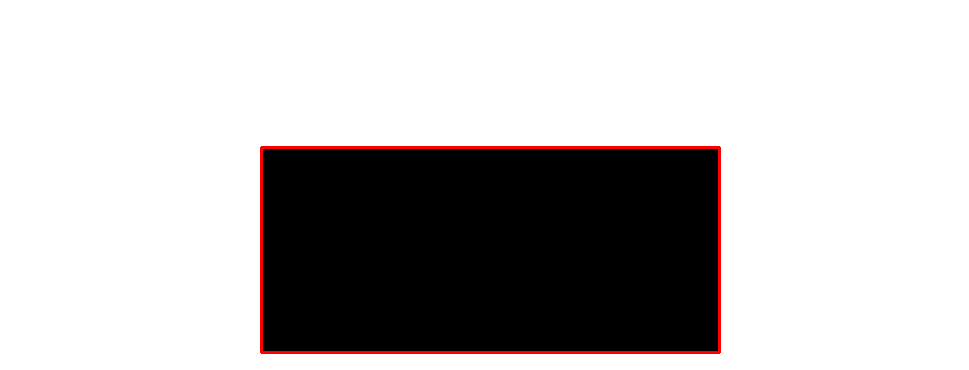

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


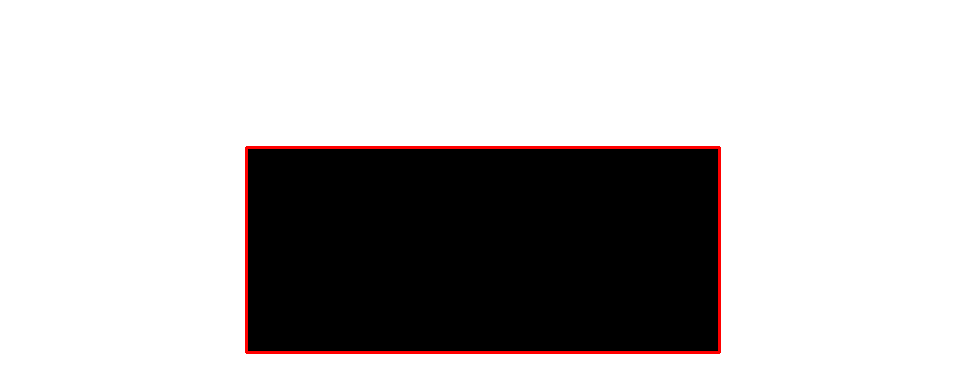

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


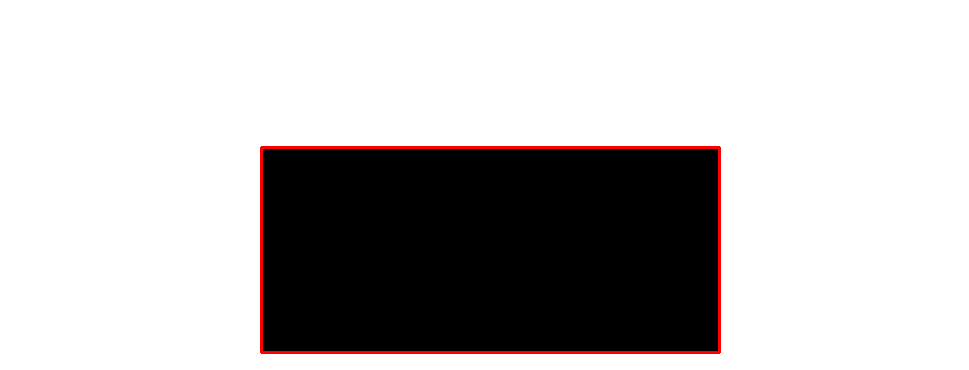

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


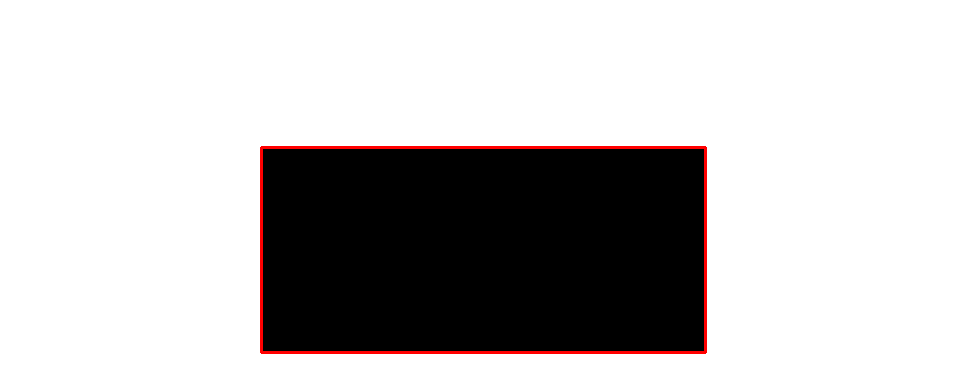

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


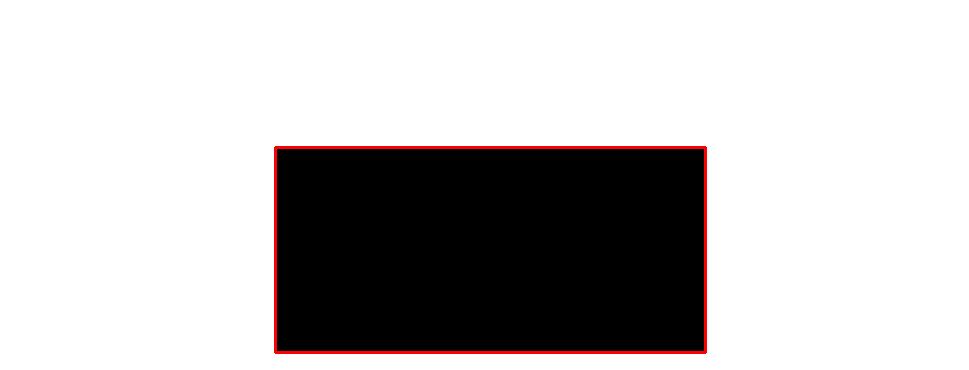

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


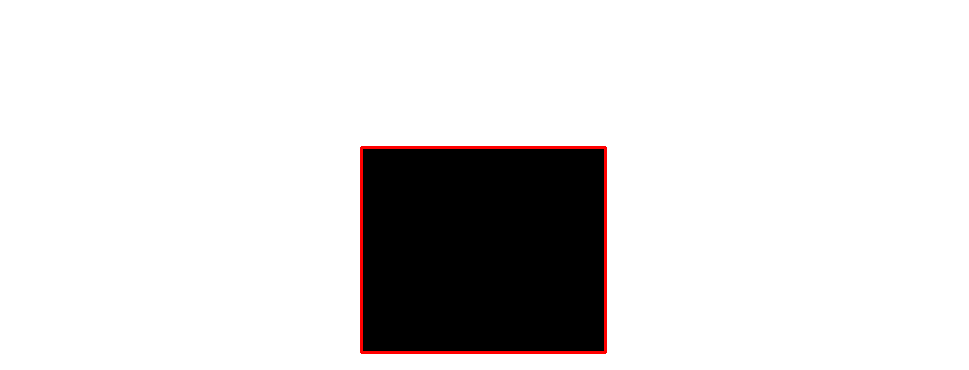

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


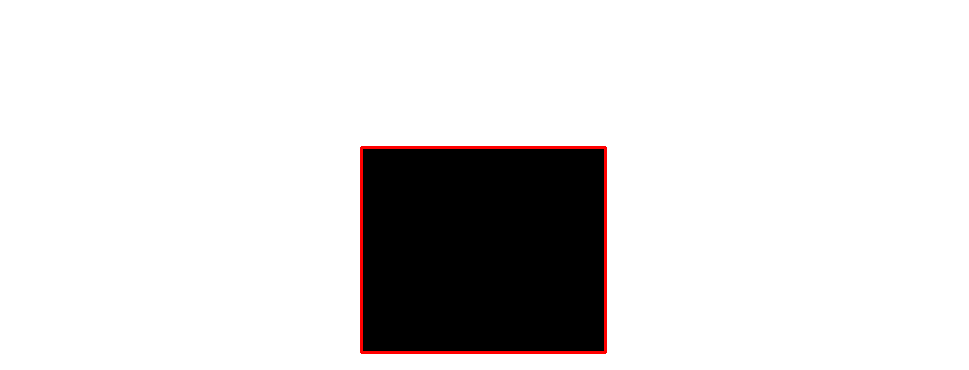

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


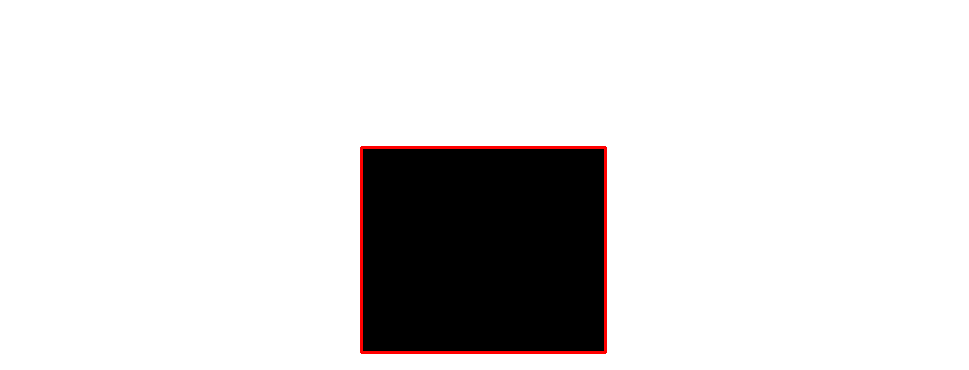

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


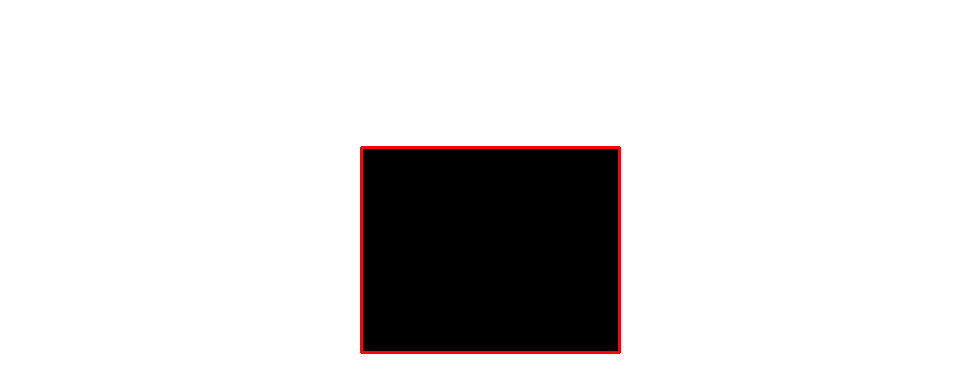

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


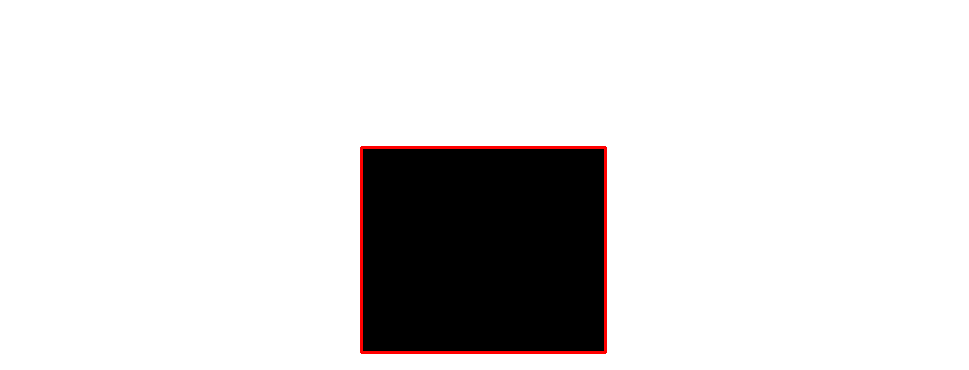

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


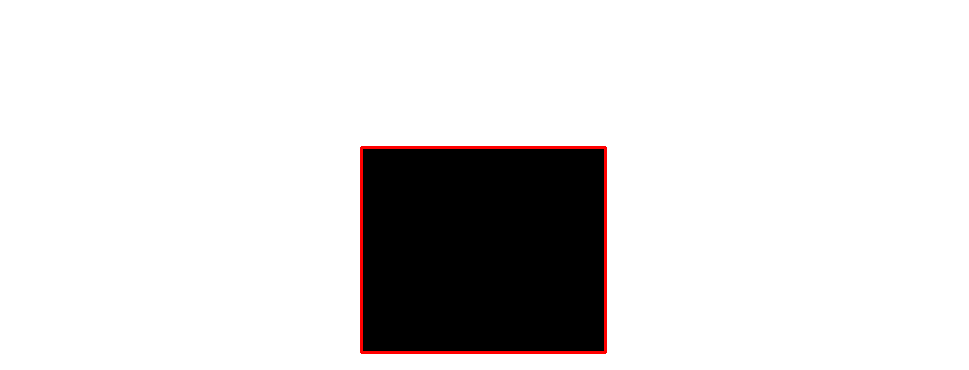

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


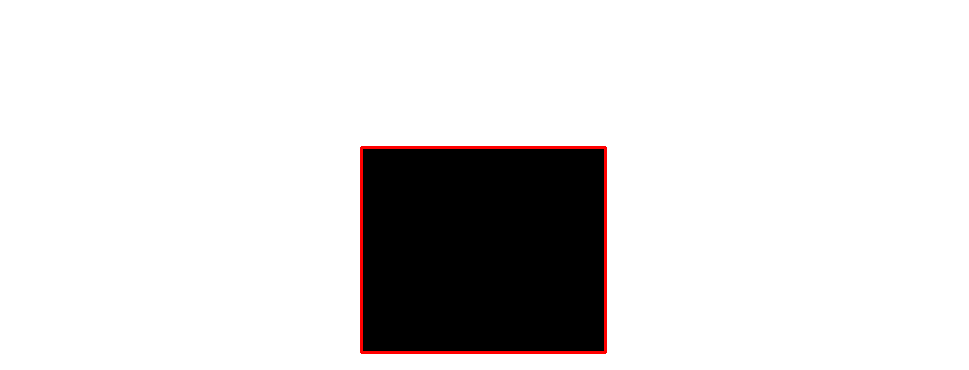

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


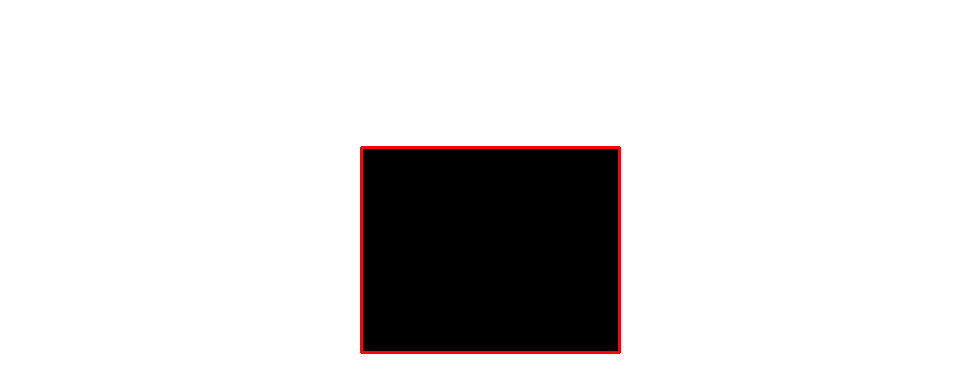

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


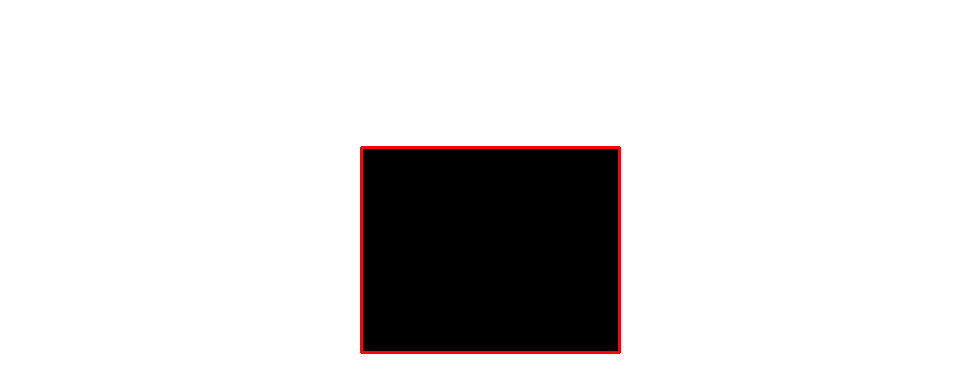

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


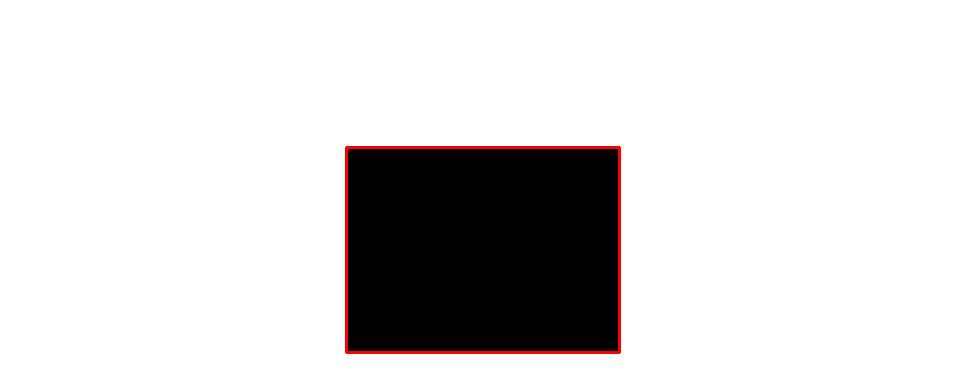

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


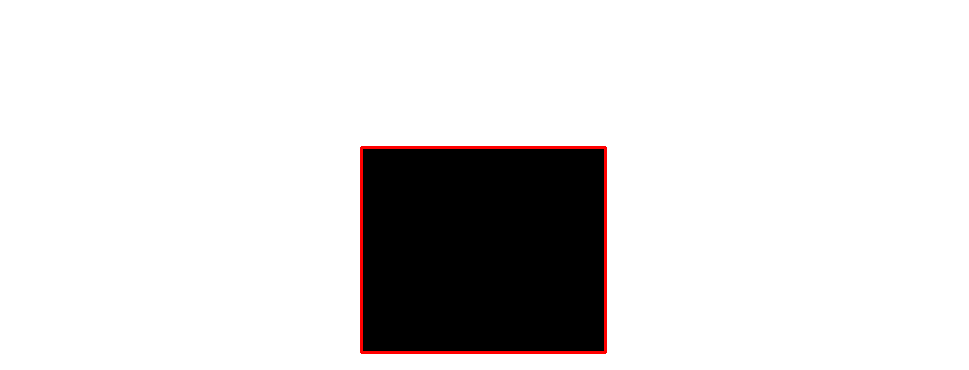

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


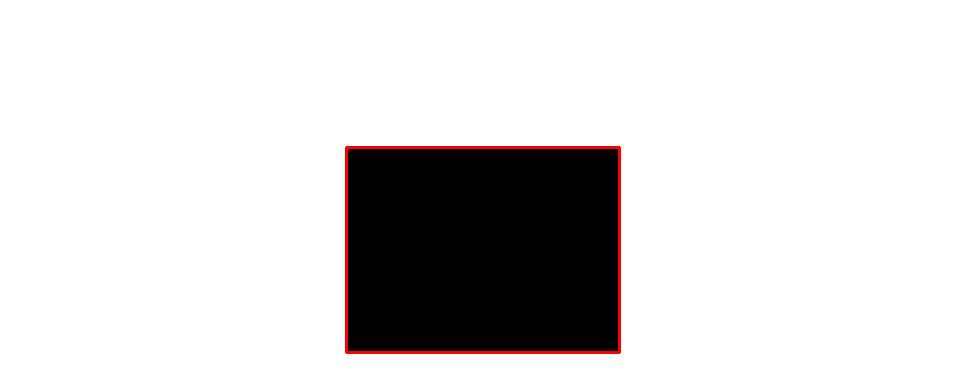

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


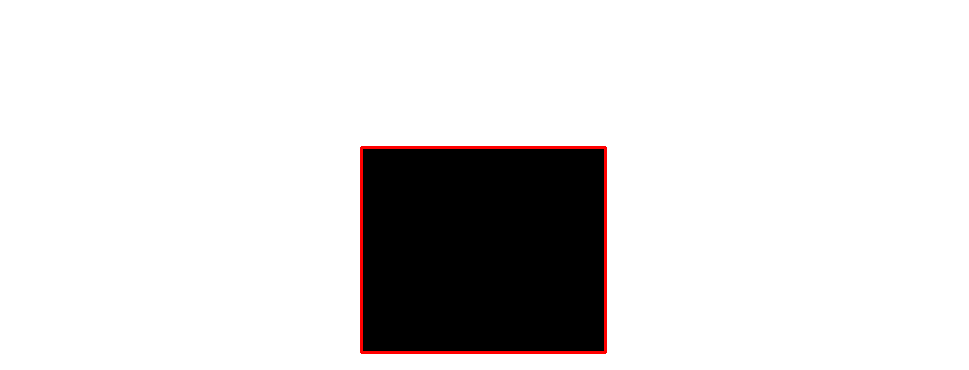

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


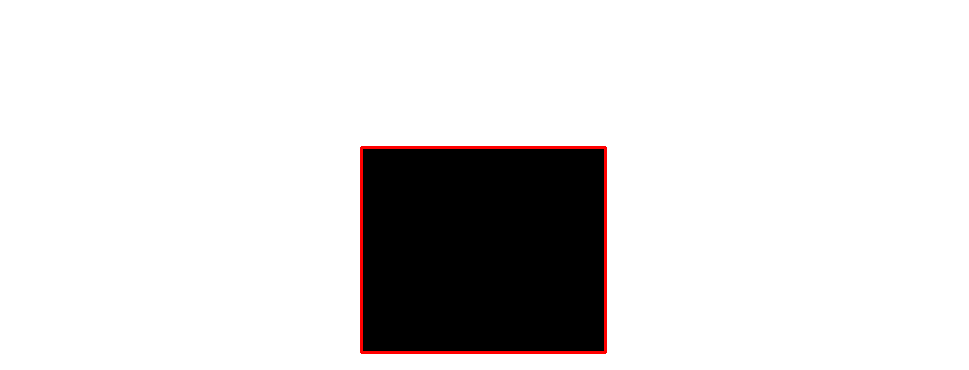

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


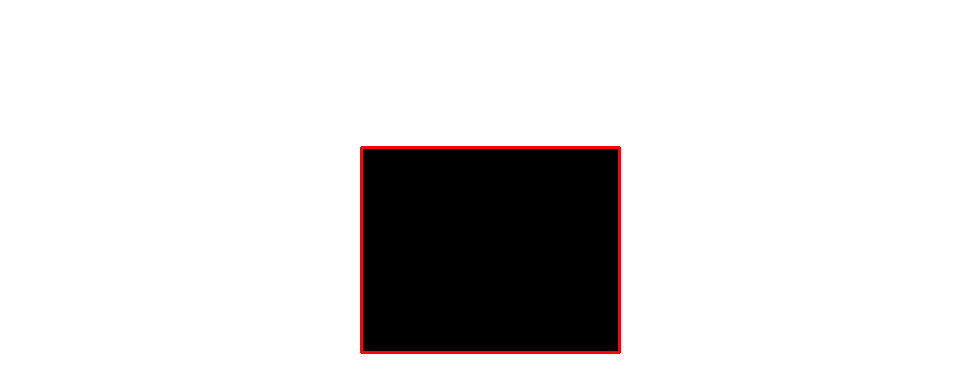

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


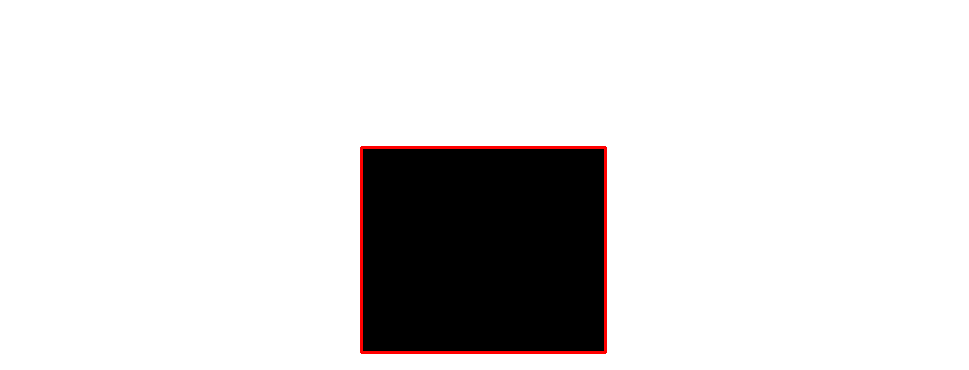

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


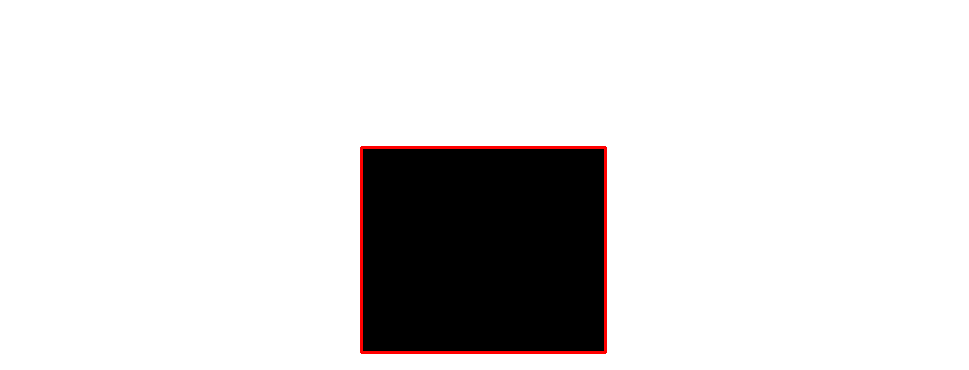

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


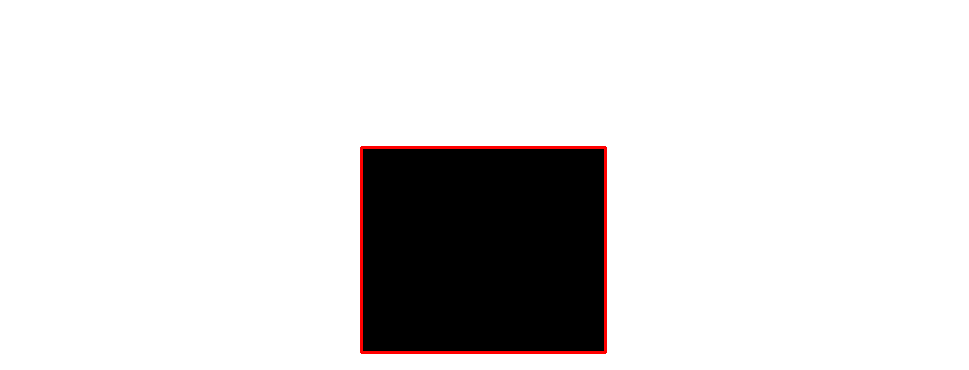

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


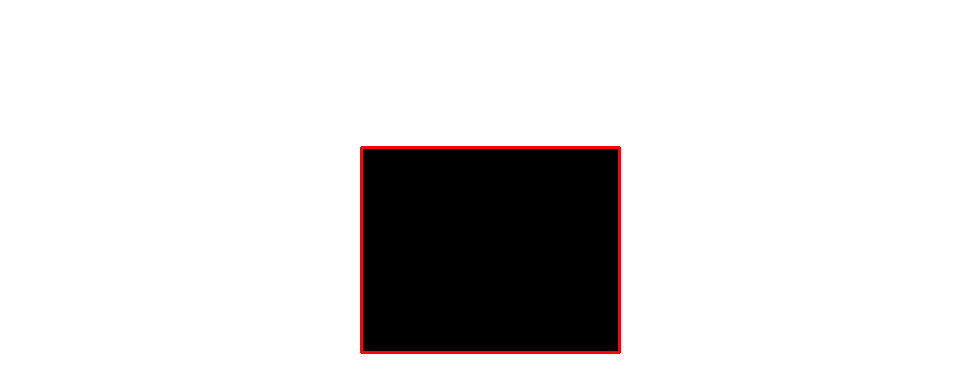

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


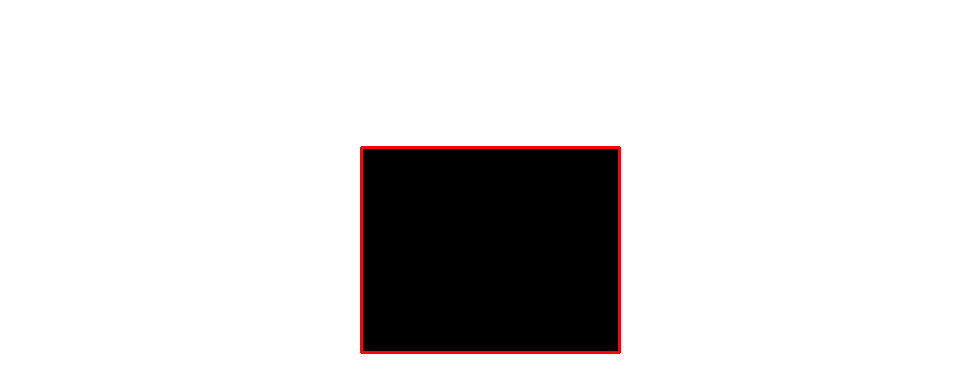

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


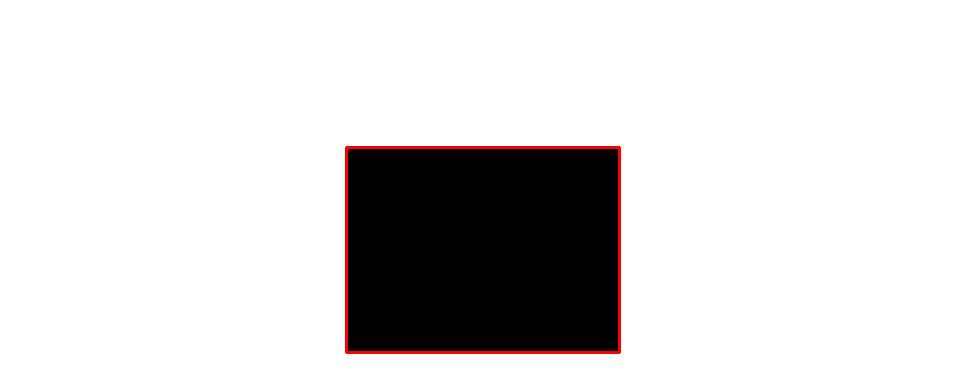

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


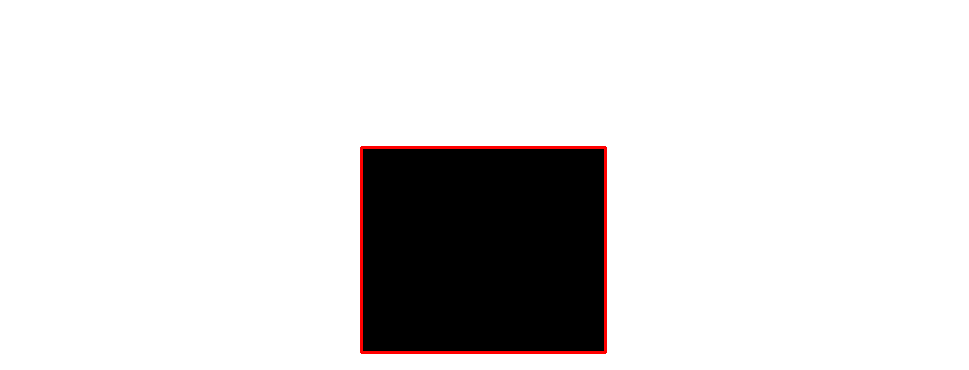

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


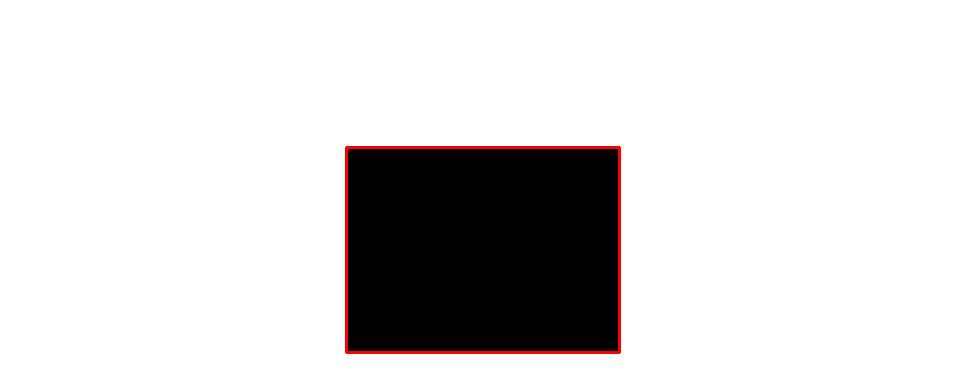

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 418 147 562 352
Rectangle coordinates: 418 147 562 352


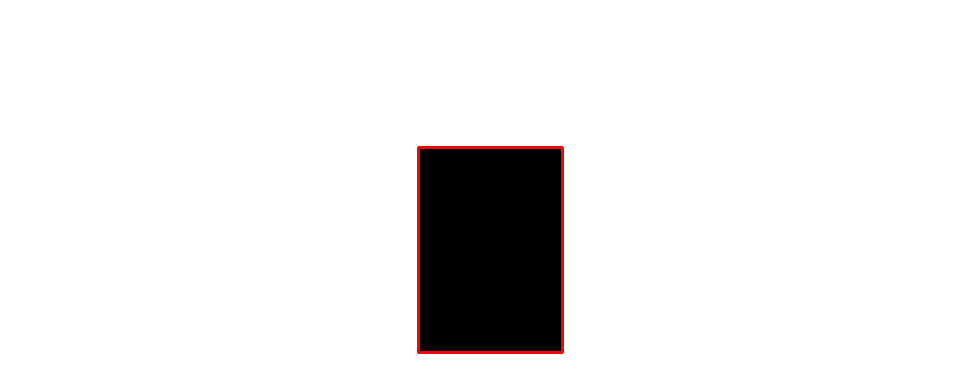

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


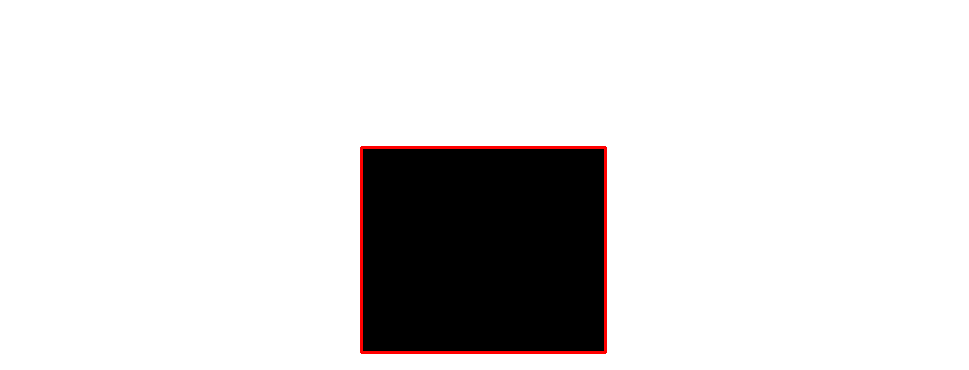

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


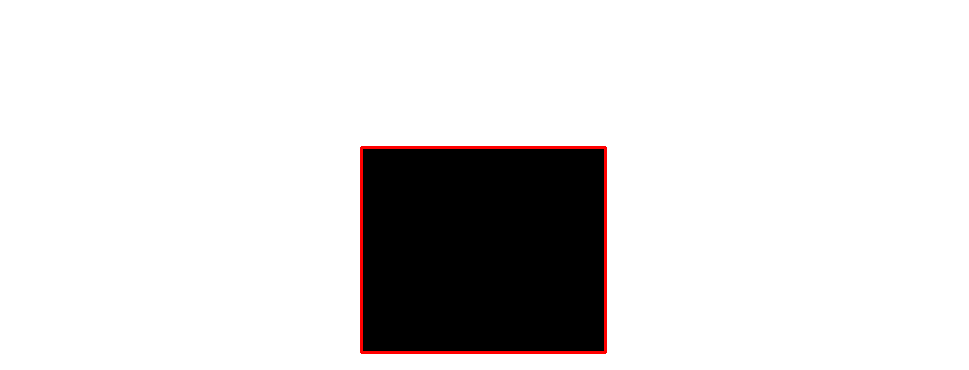

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


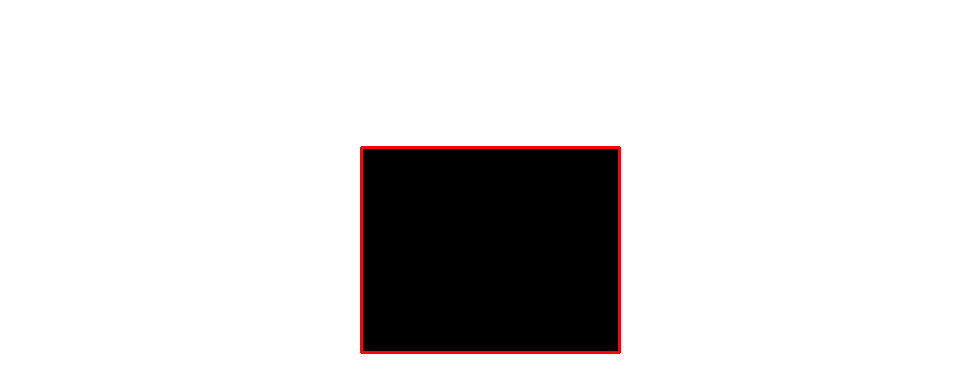

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


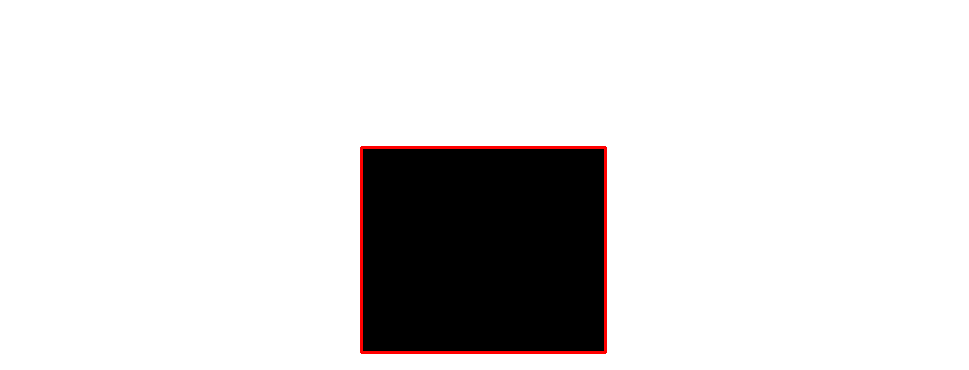

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


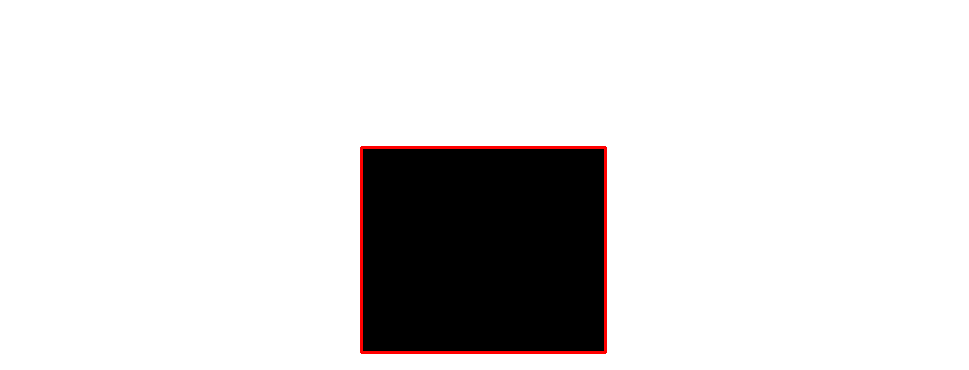

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


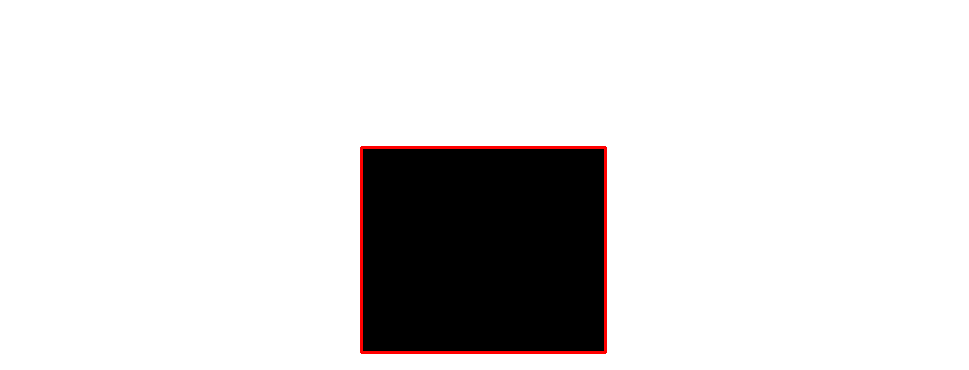

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


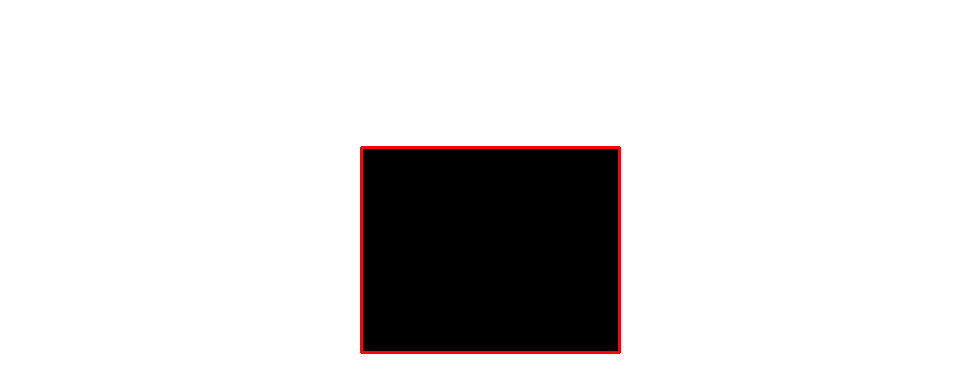

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


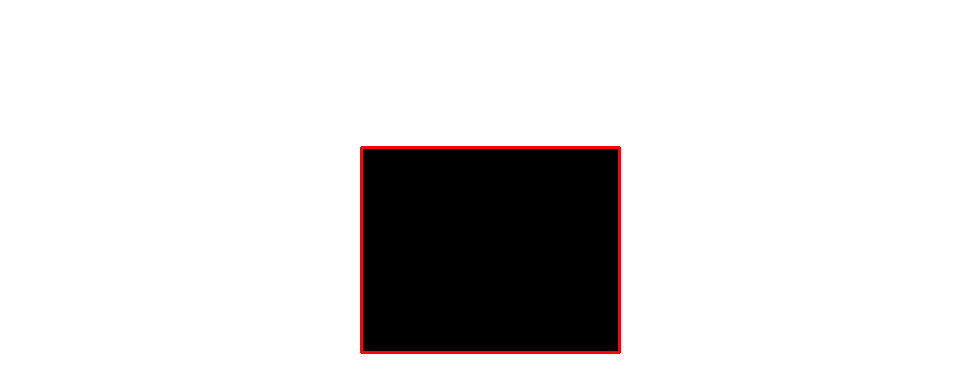

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


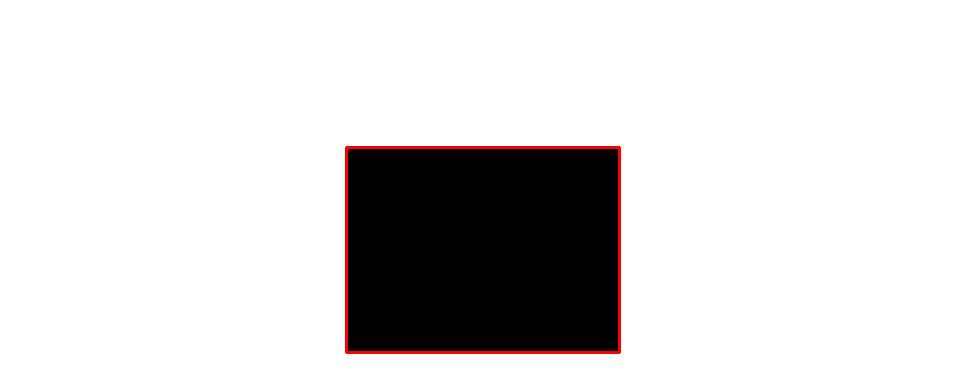

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


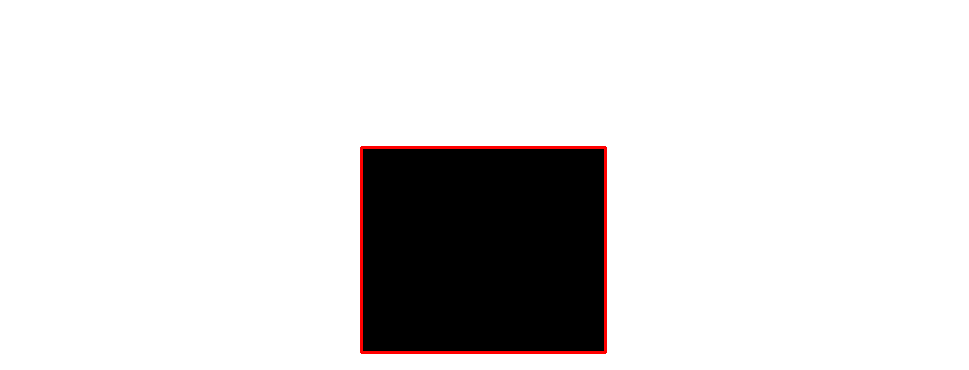

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


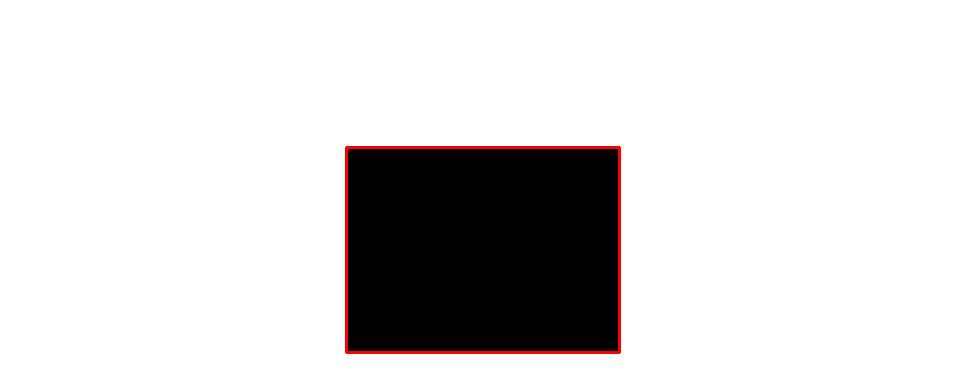

Rectangle coordinates: 447 147 533 352
Rectangle coordinates: 447 147 533 352


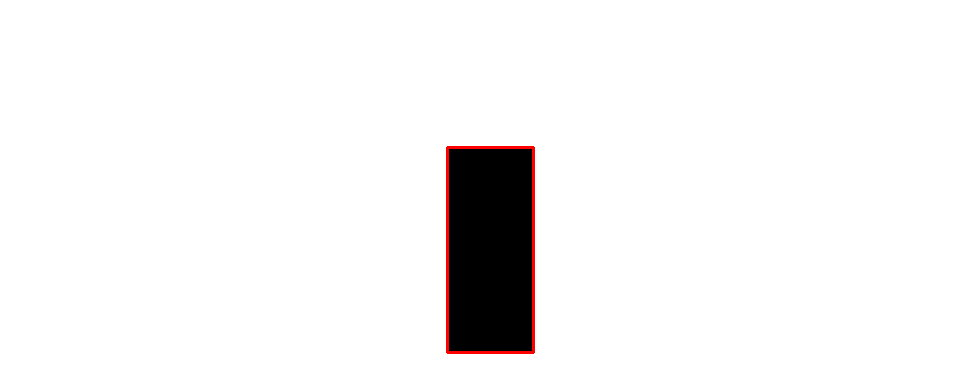

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


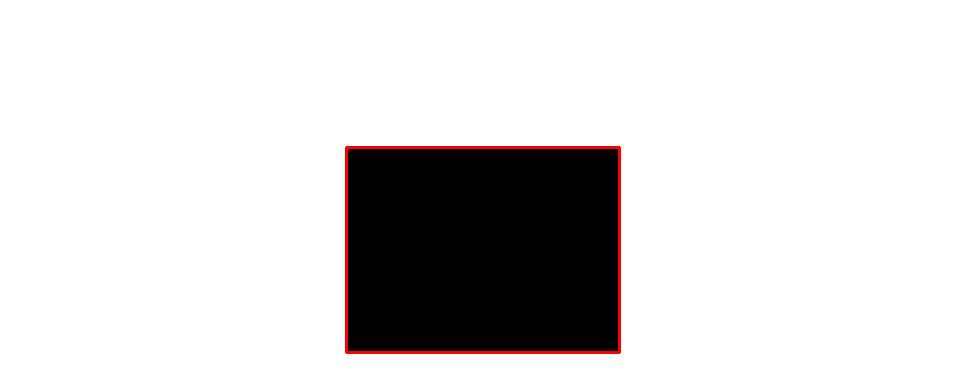

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


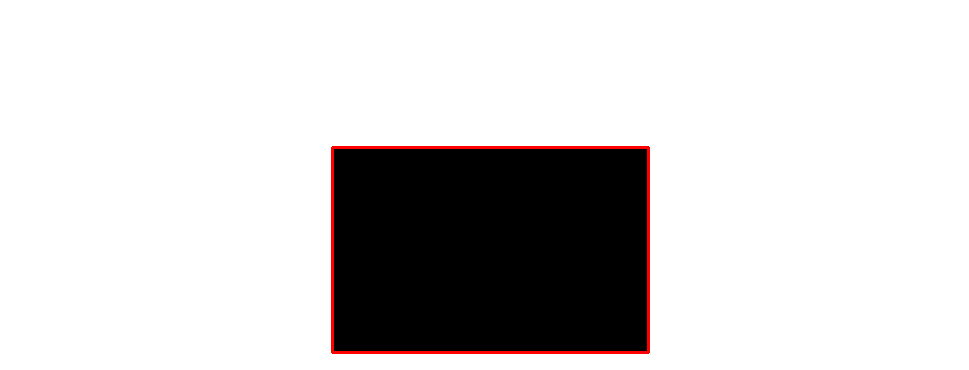

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


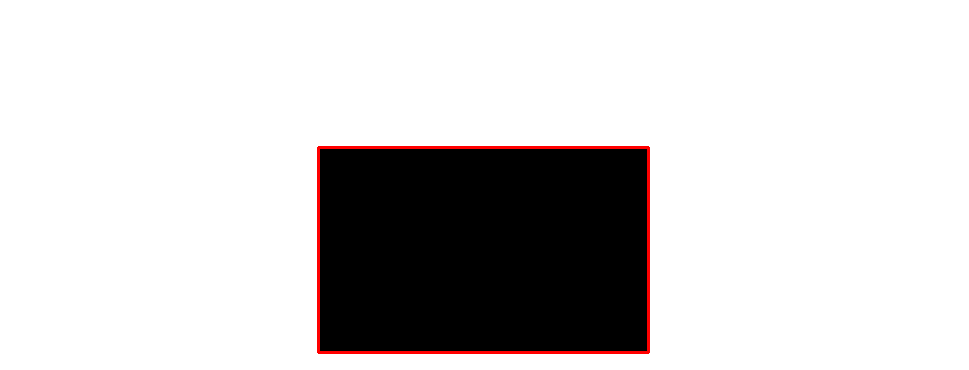

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


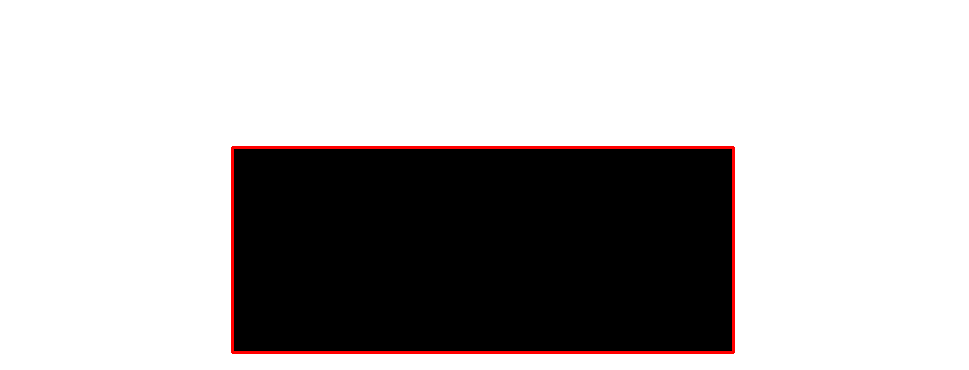

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


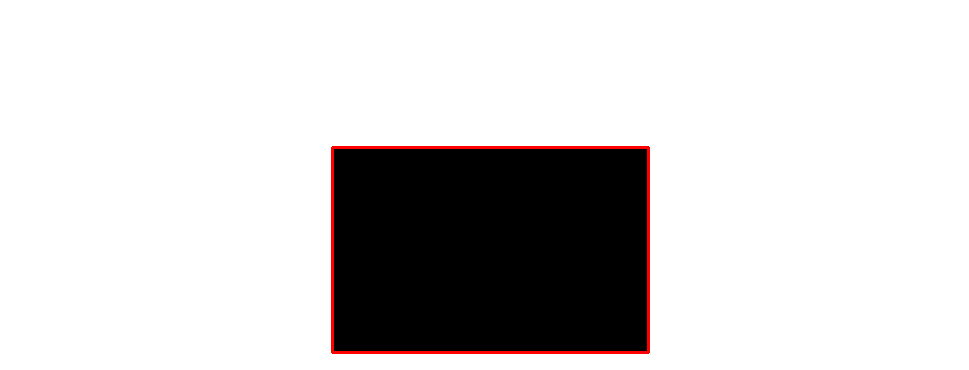

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


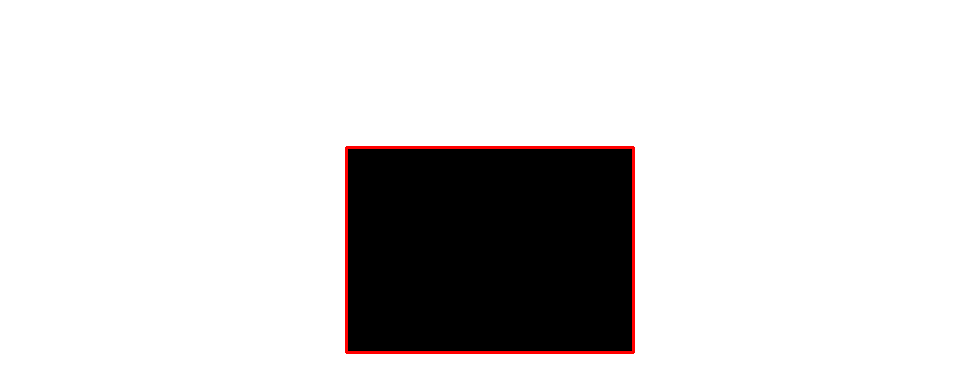

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


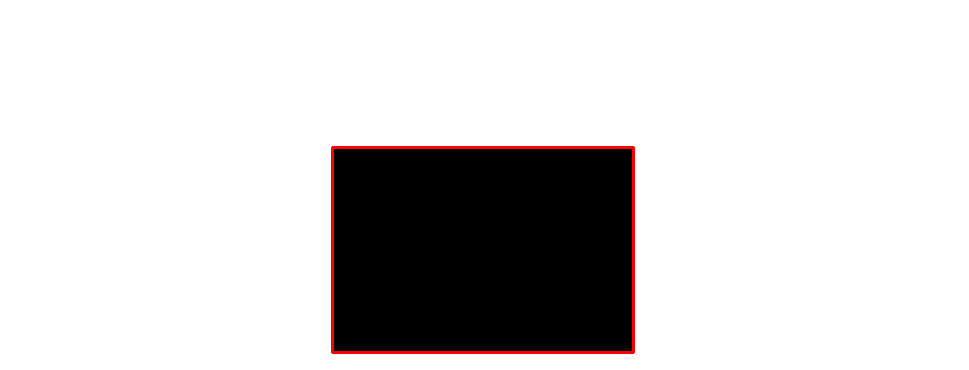

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


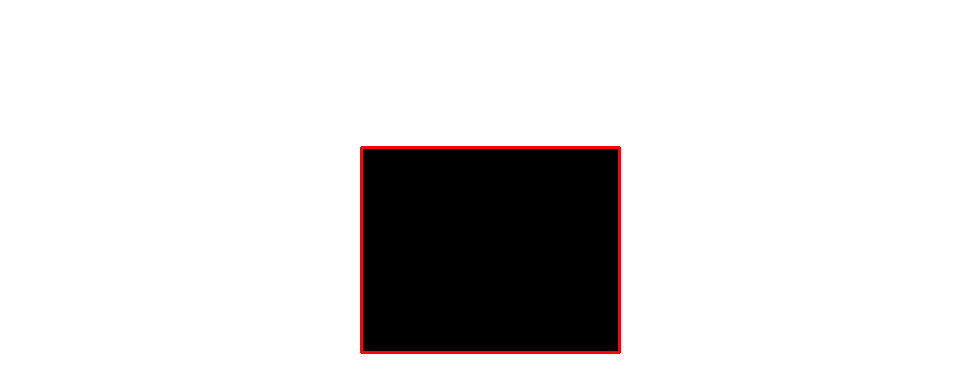

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


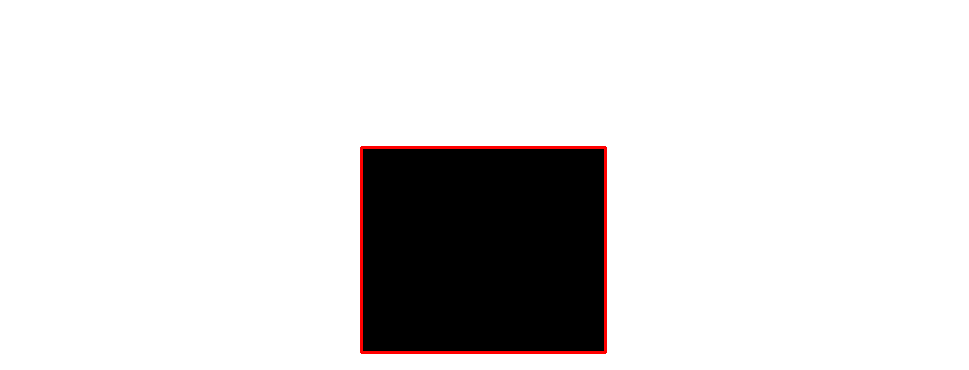

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


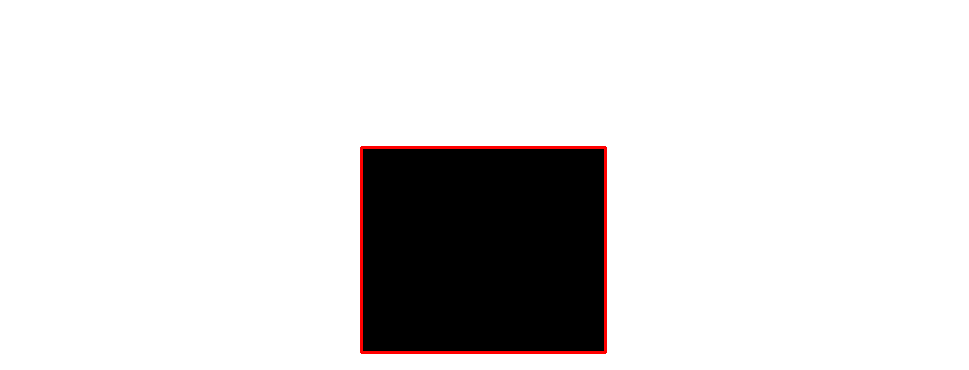

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


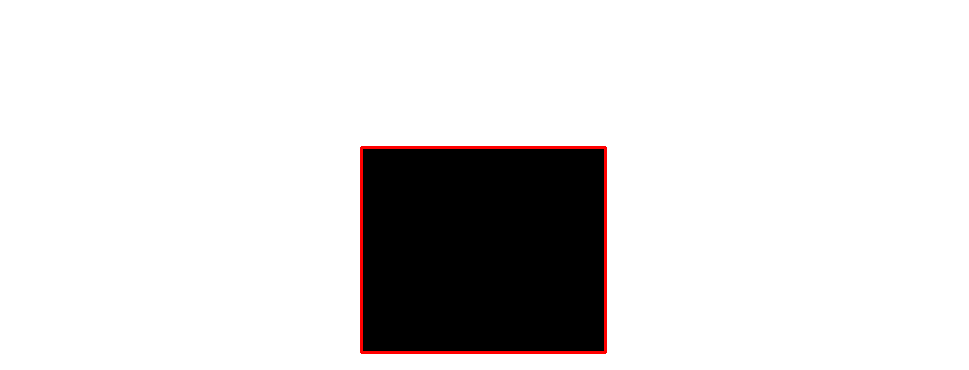

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


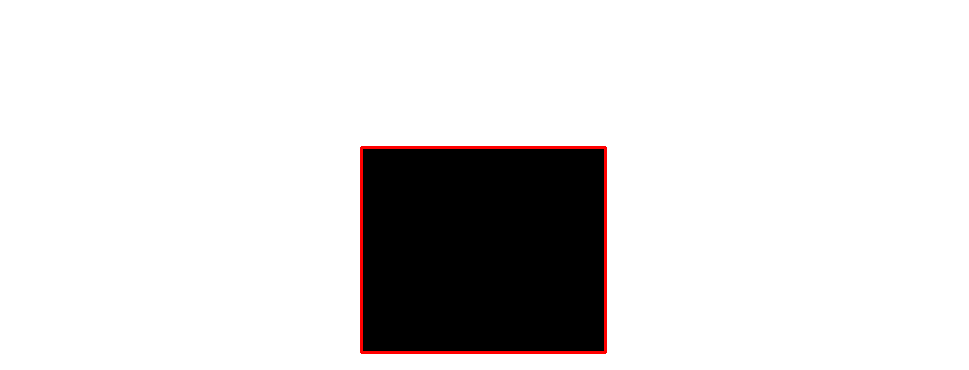

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


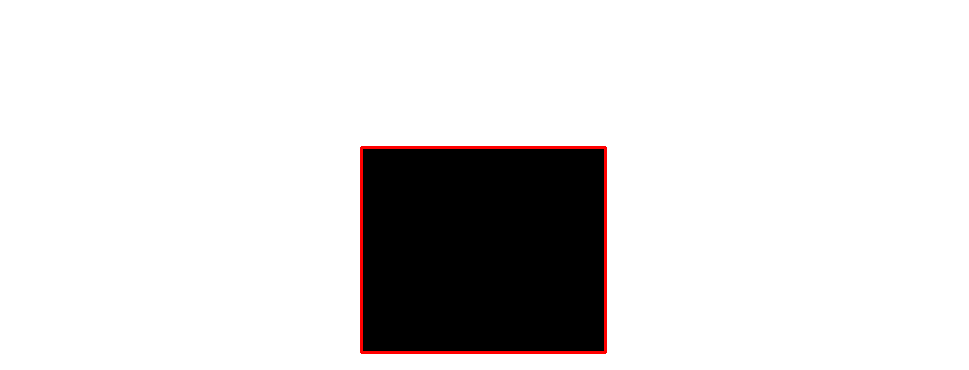

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


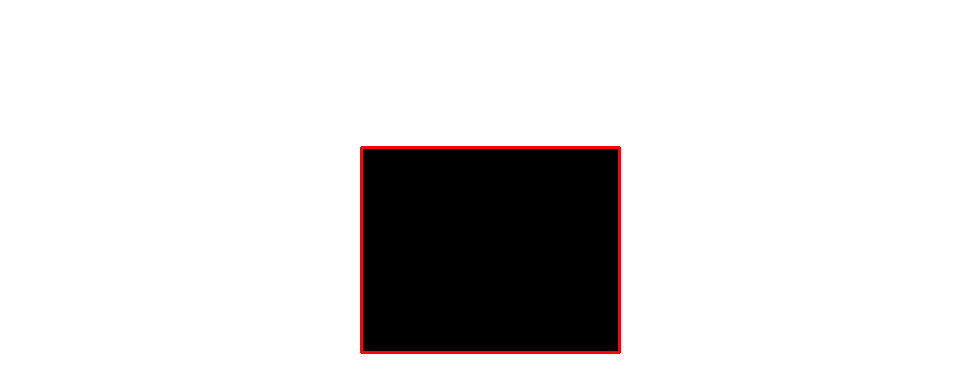

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


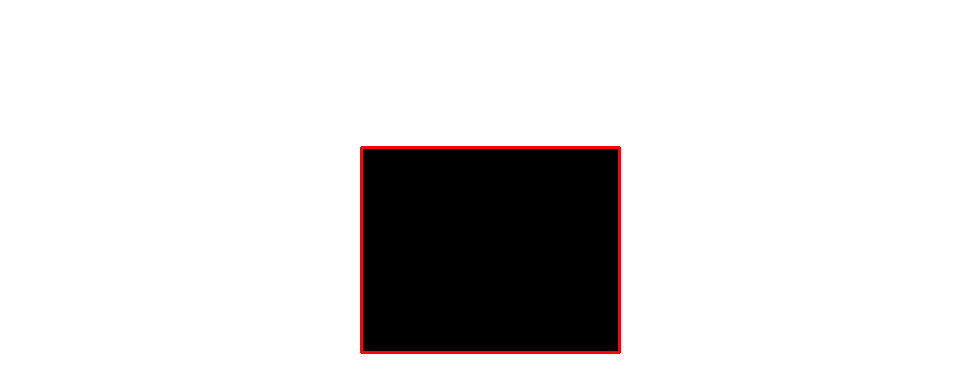

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


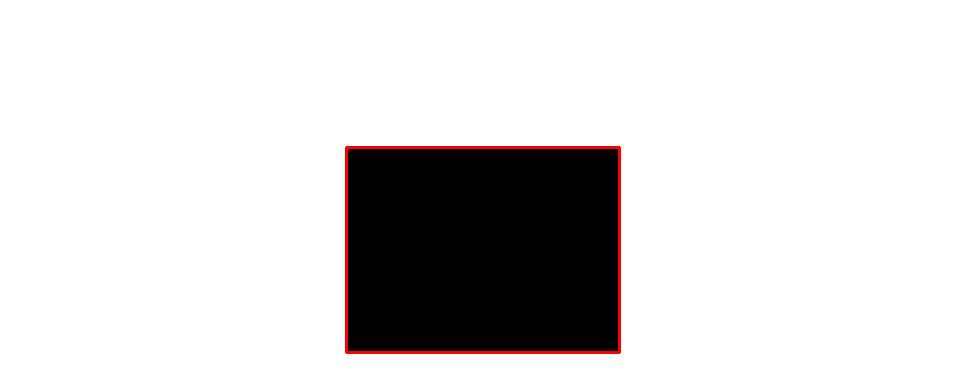

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


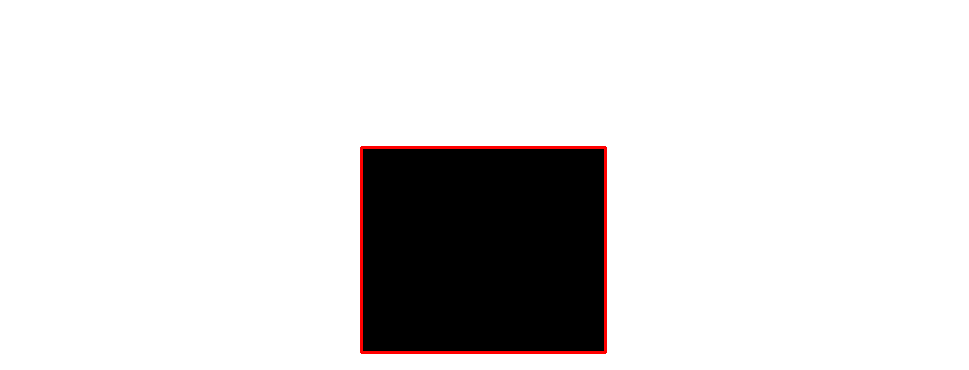

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


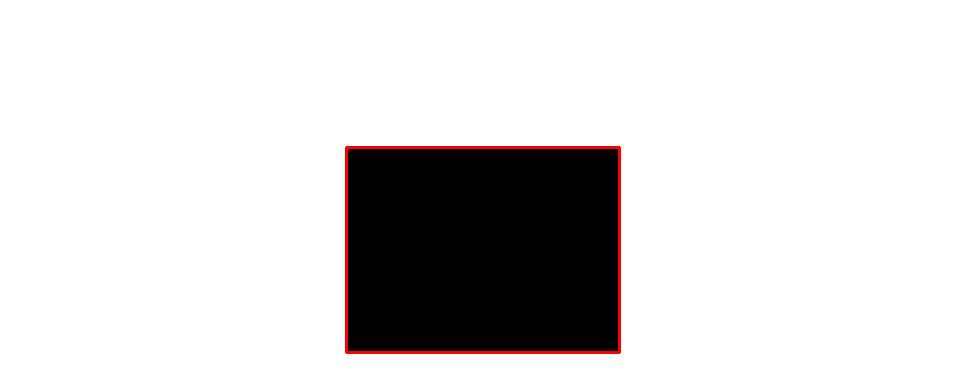

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 418 147 562 352
Rectangle coordinates: 418 147 562 352


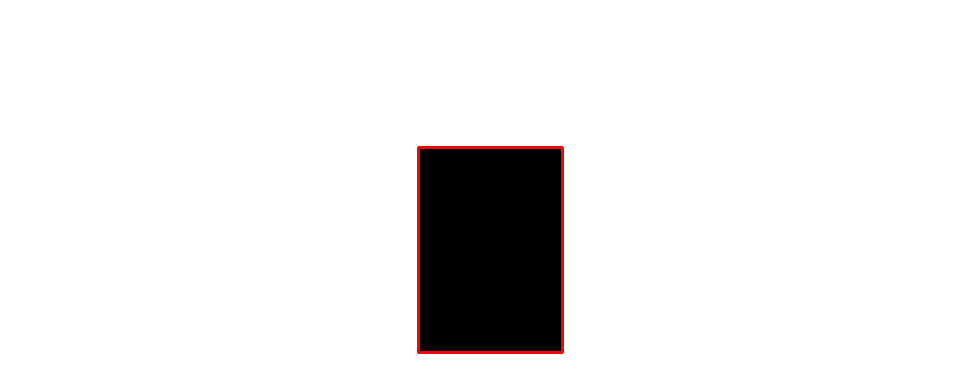

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


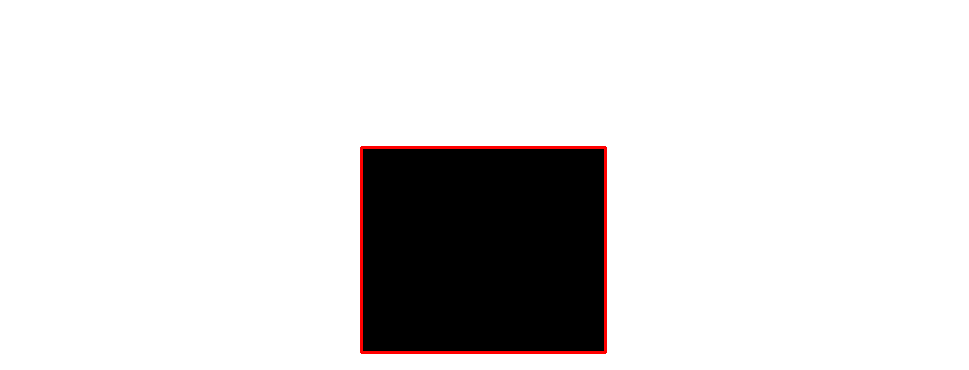

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


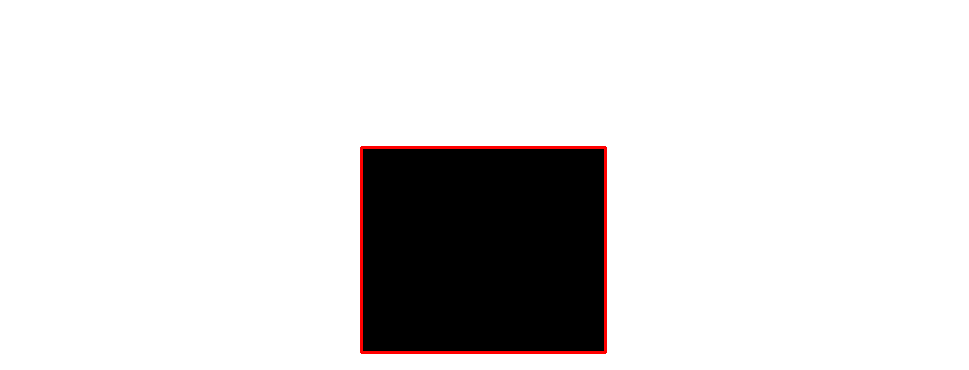

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


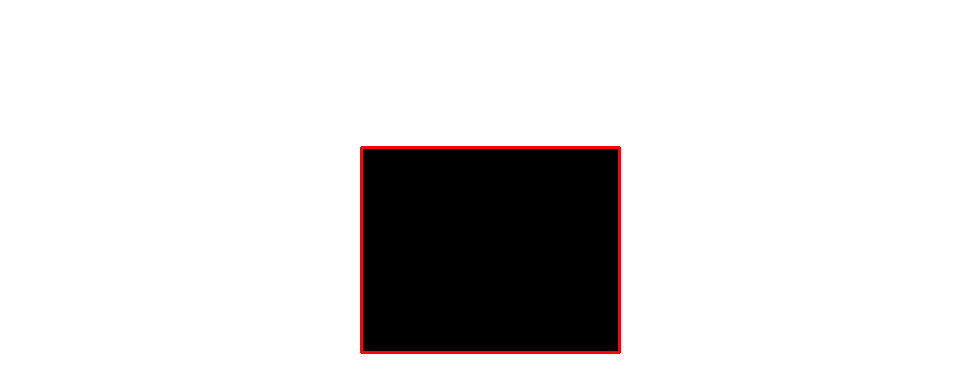

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


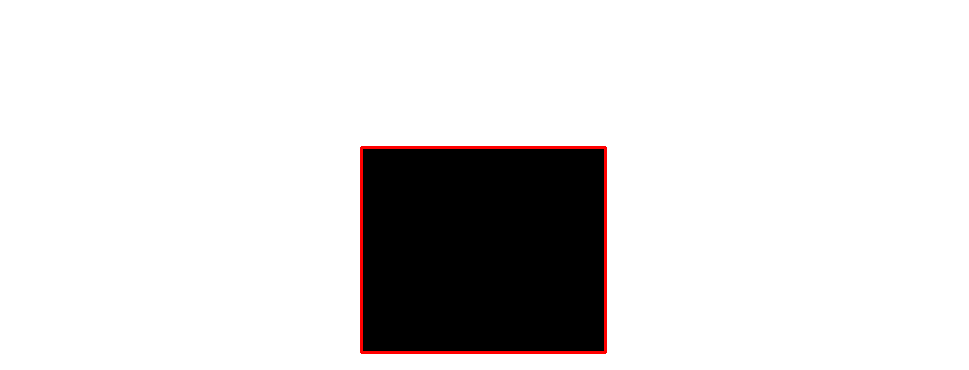

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


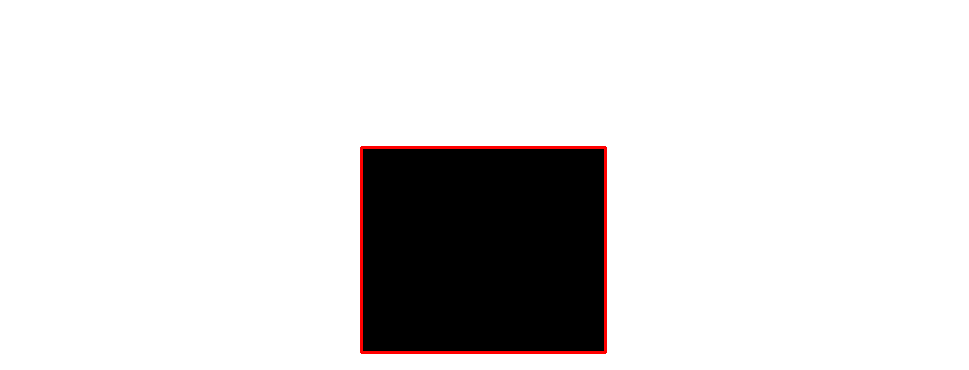

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


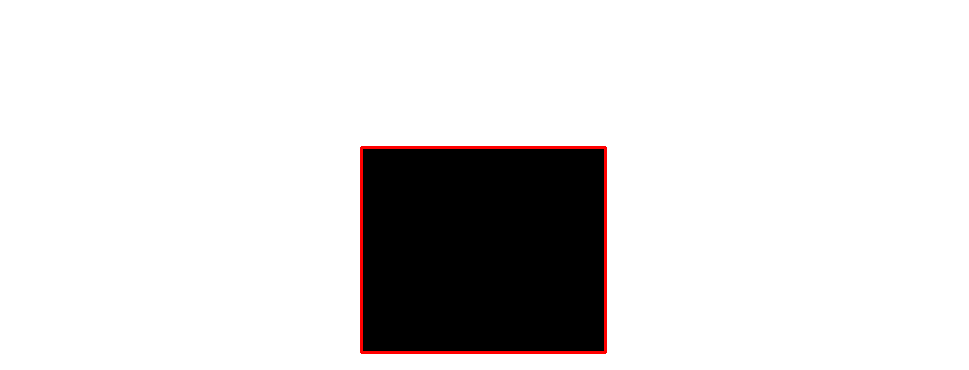

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


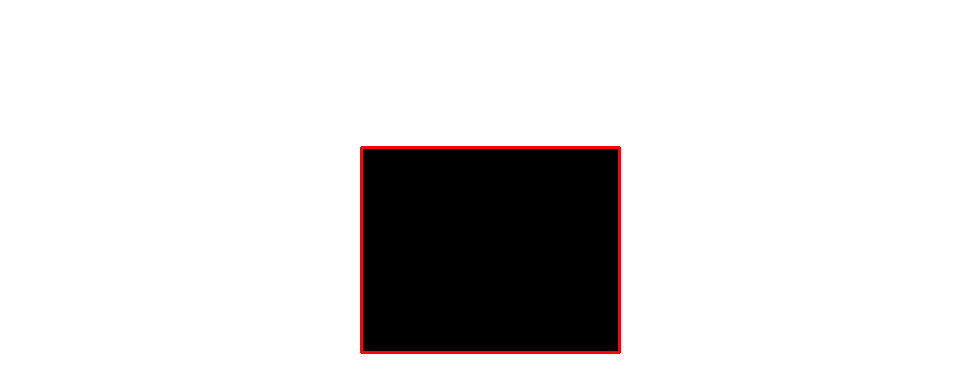

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


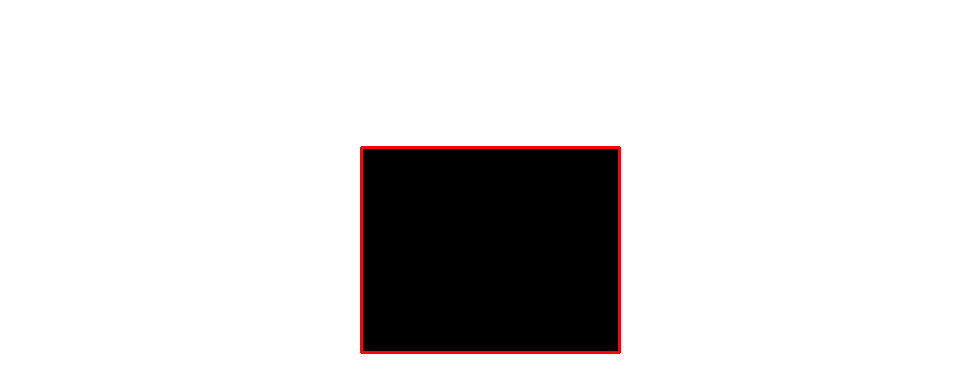

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


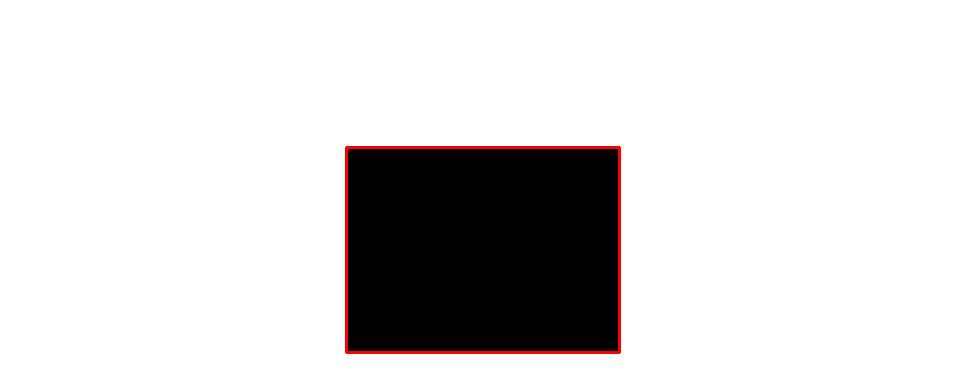

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


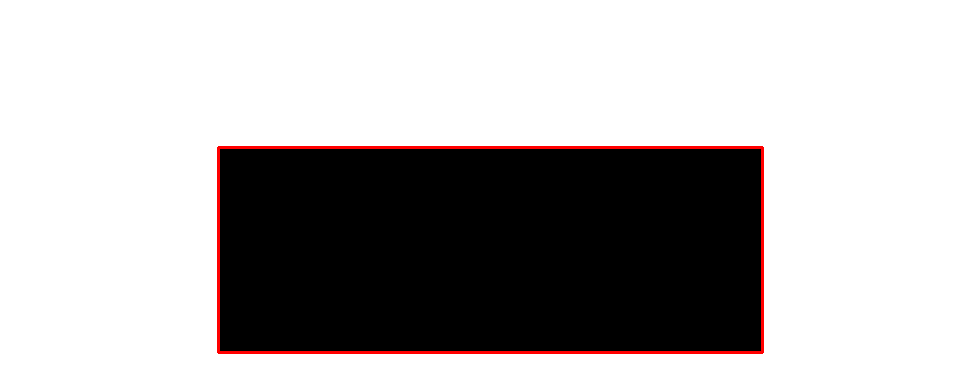

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


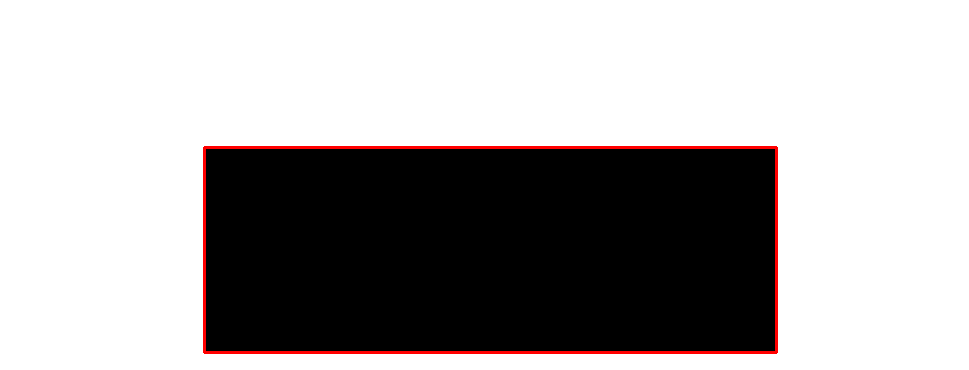

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


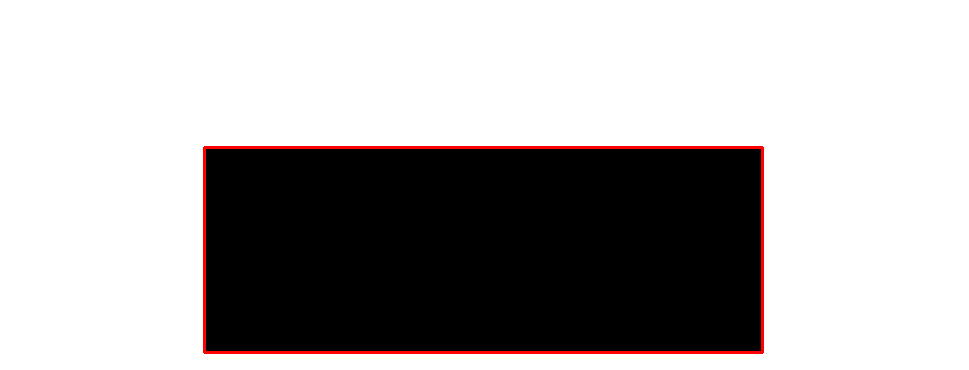

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


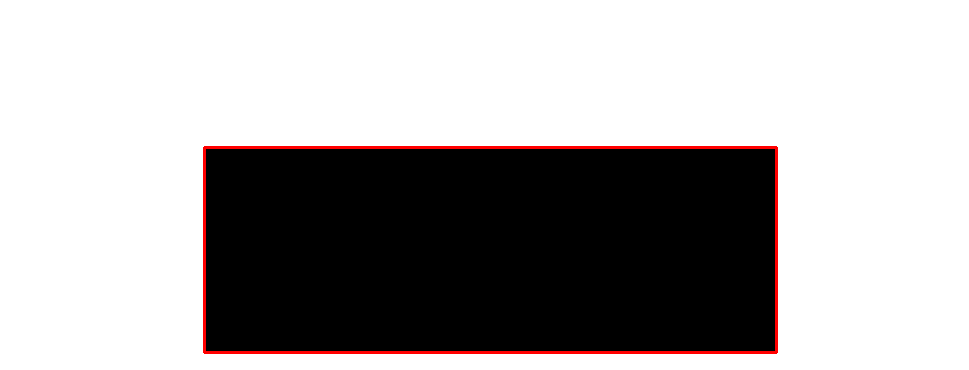

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


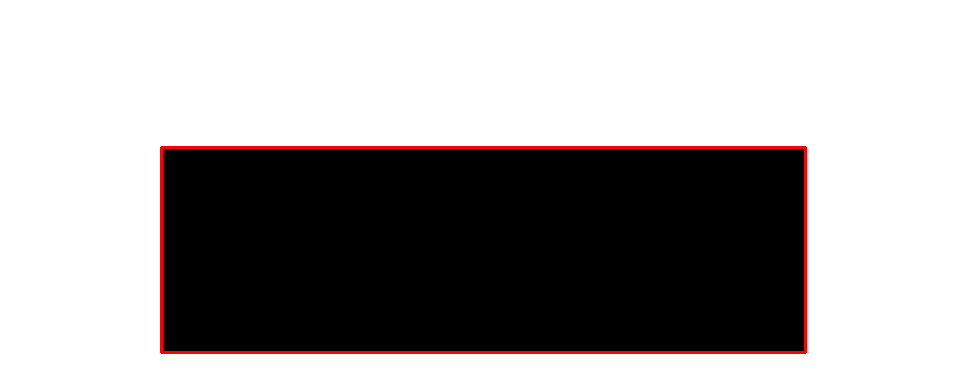

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


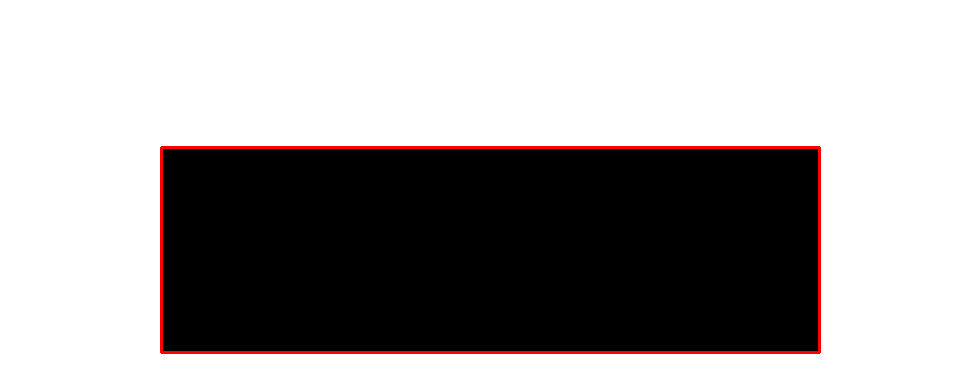

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


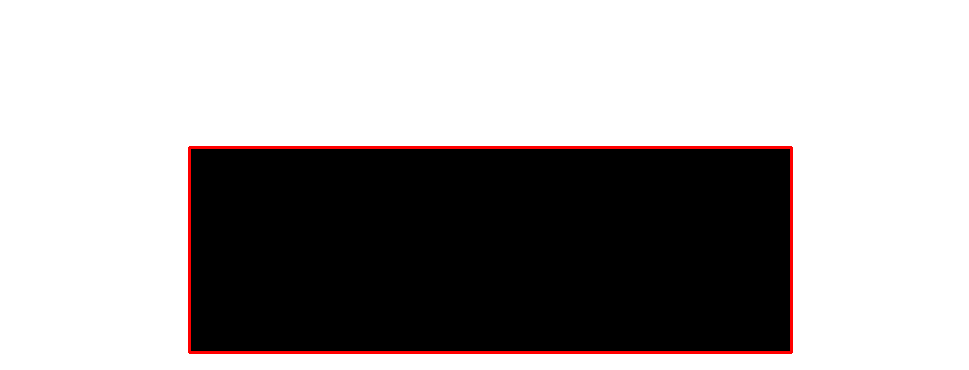

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


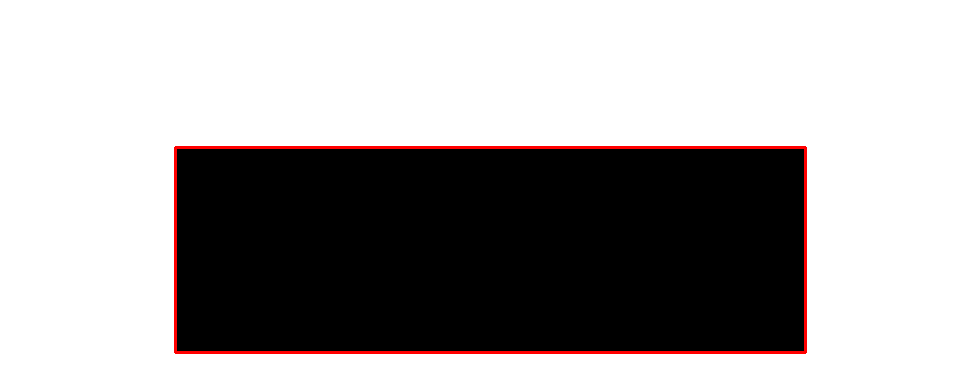

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


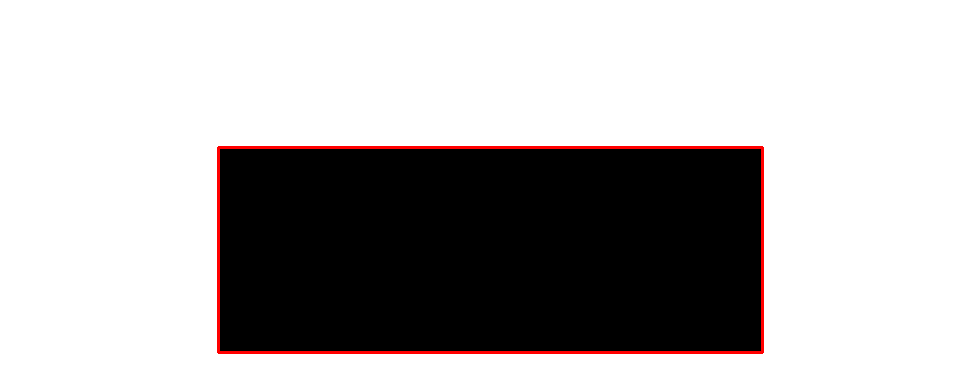

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


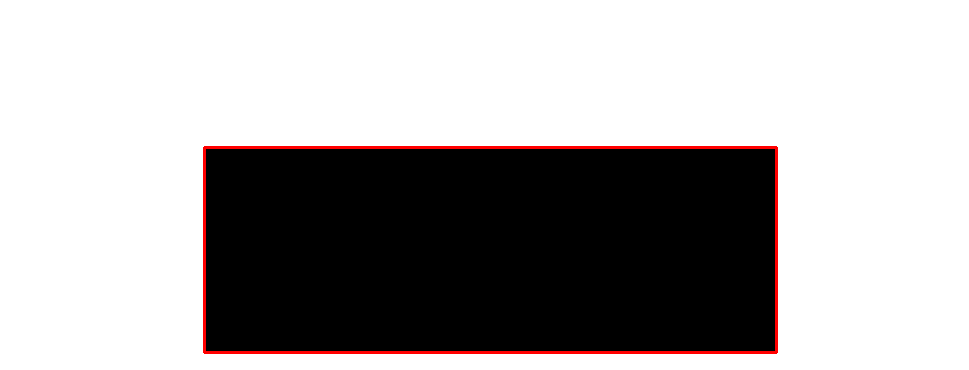

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


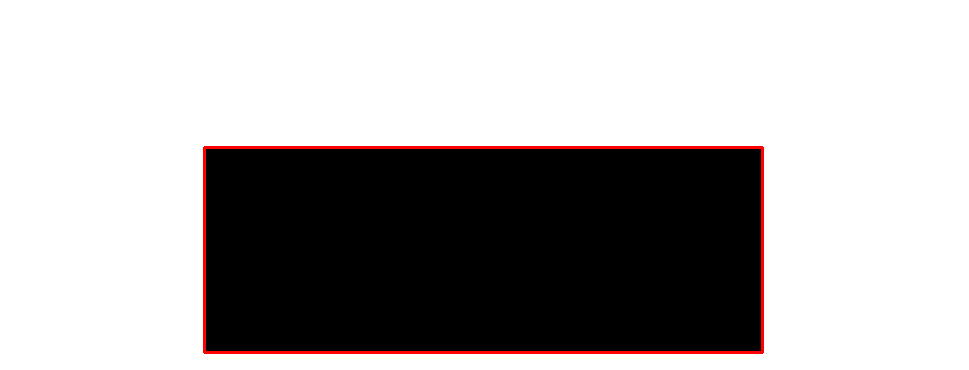

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


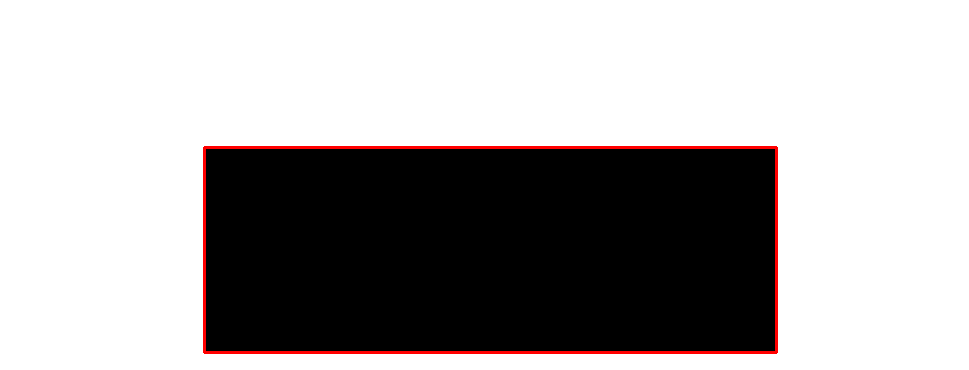

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


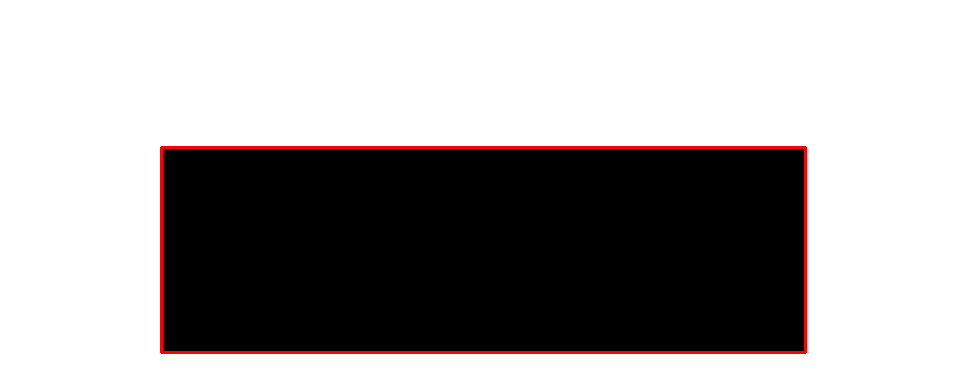

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


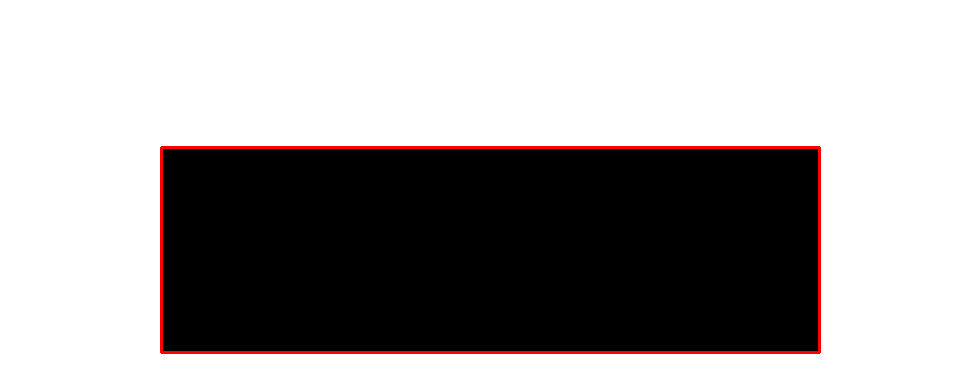

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


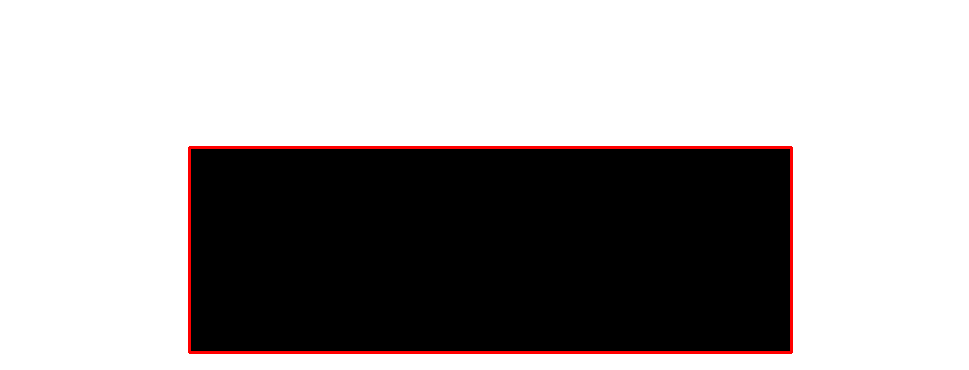

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


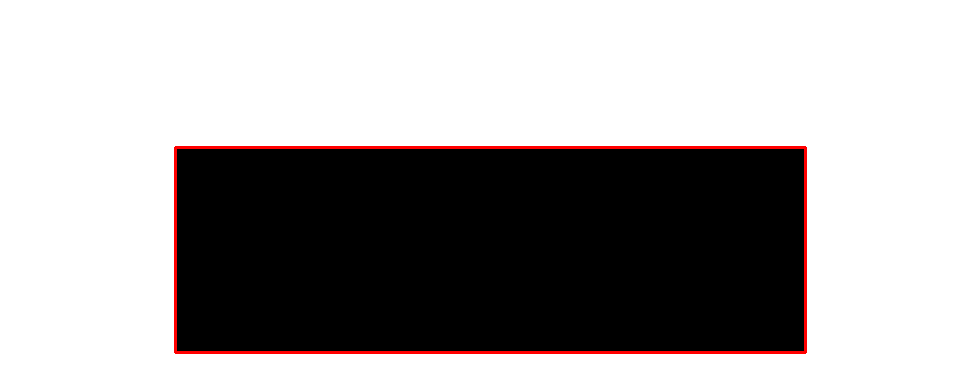

No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


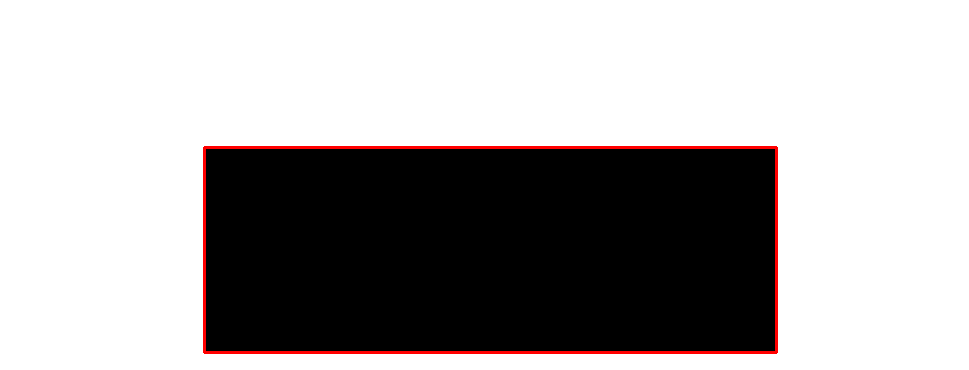

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


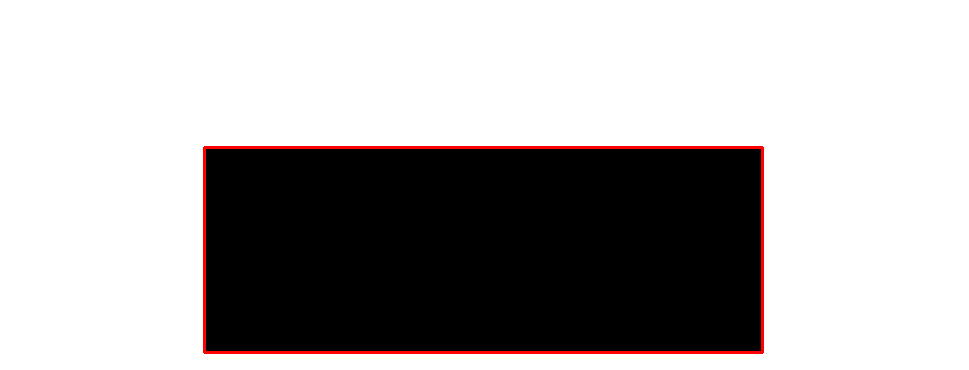

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


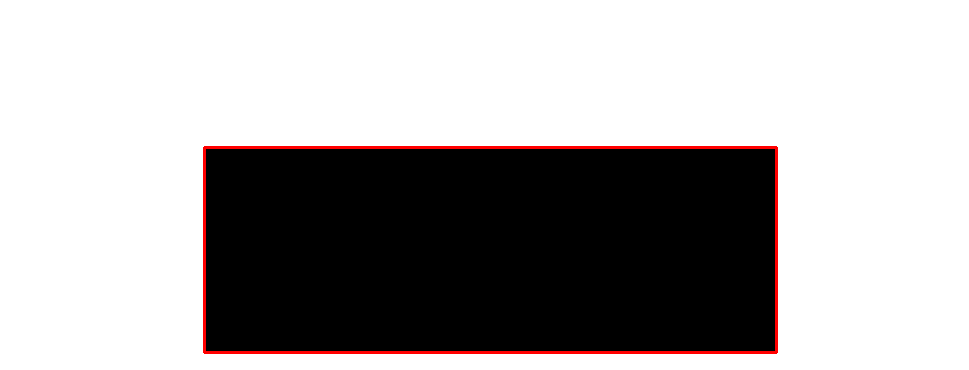

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


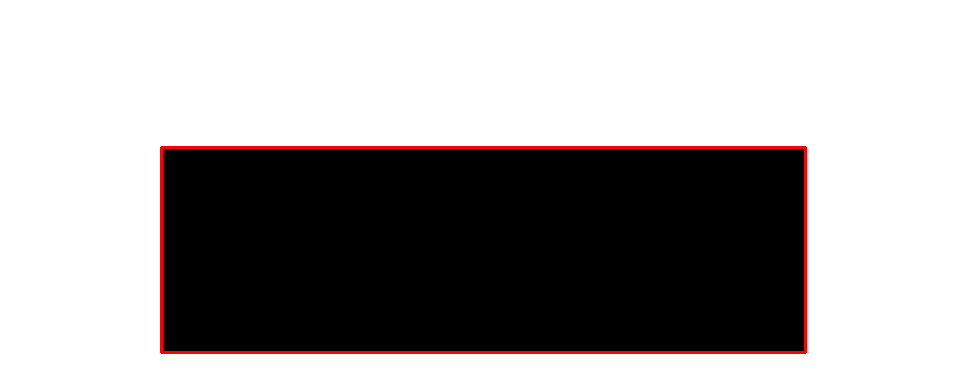

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


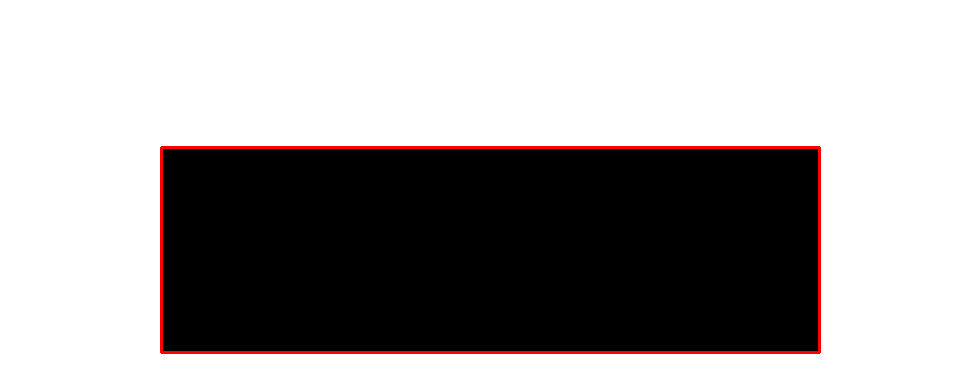

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


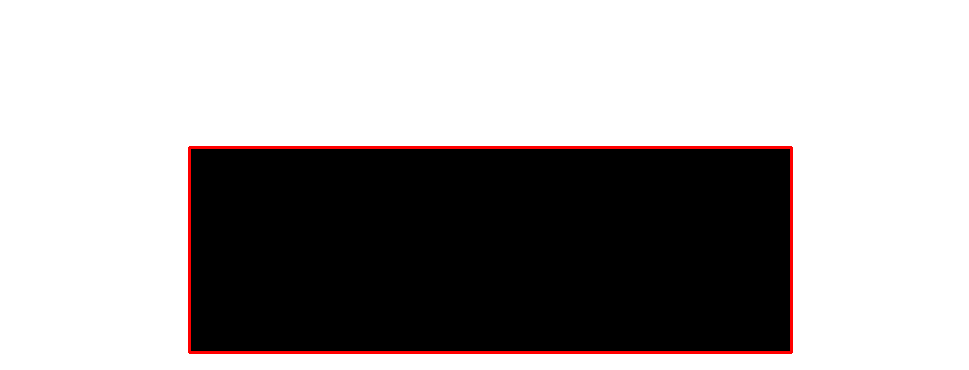

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


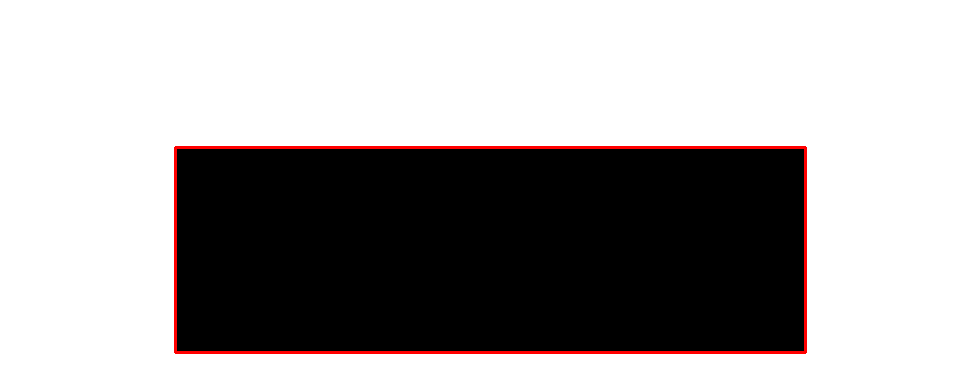

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


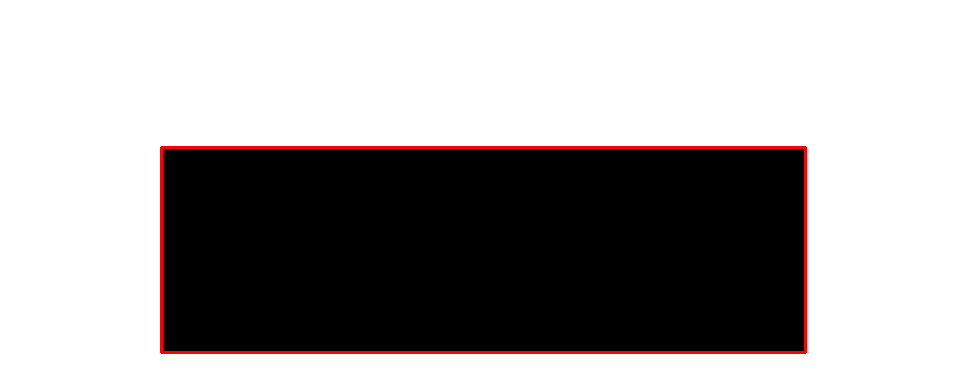

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


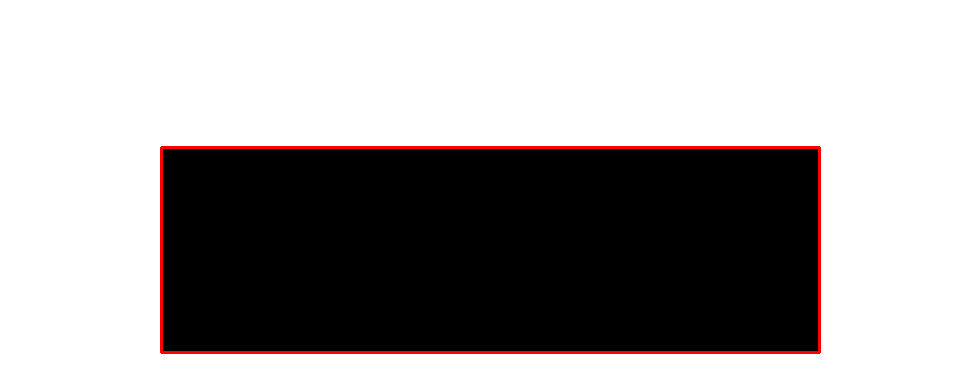

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


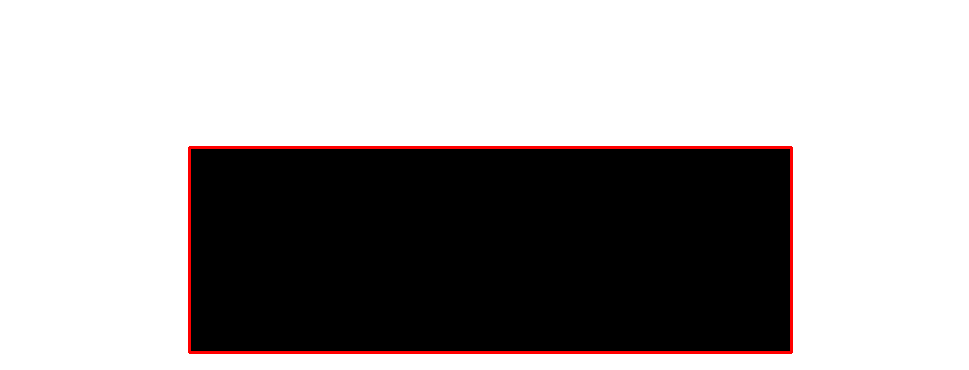

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


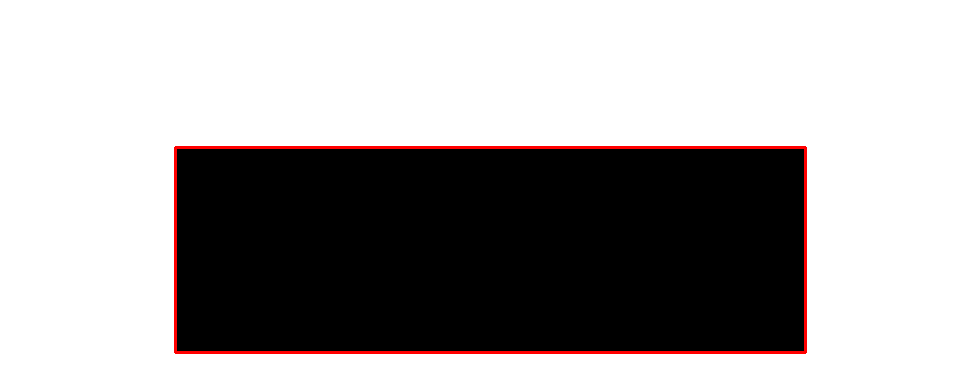

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


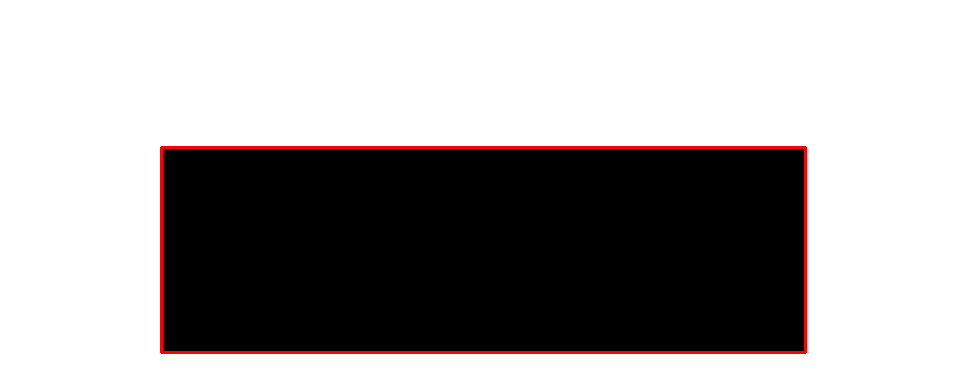

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


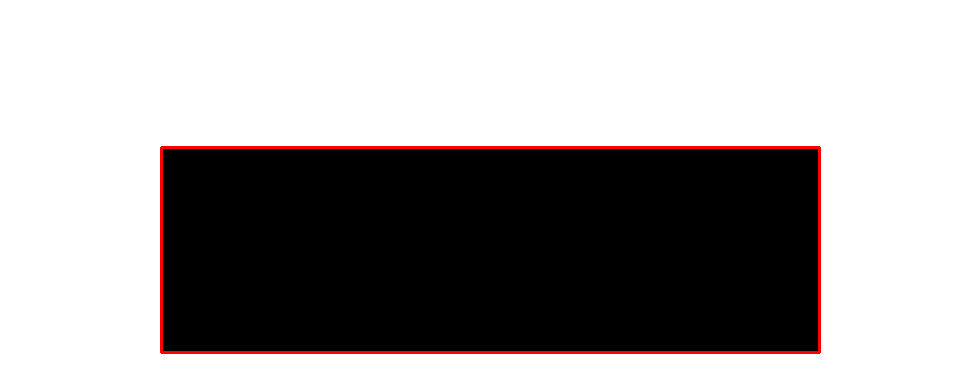

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


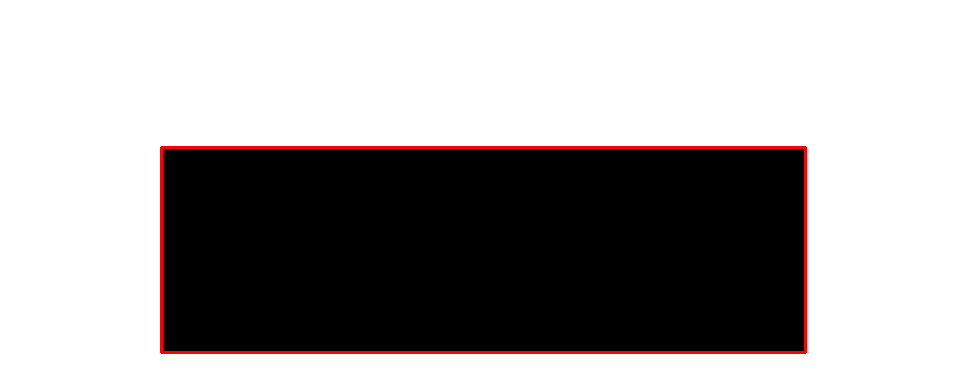

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


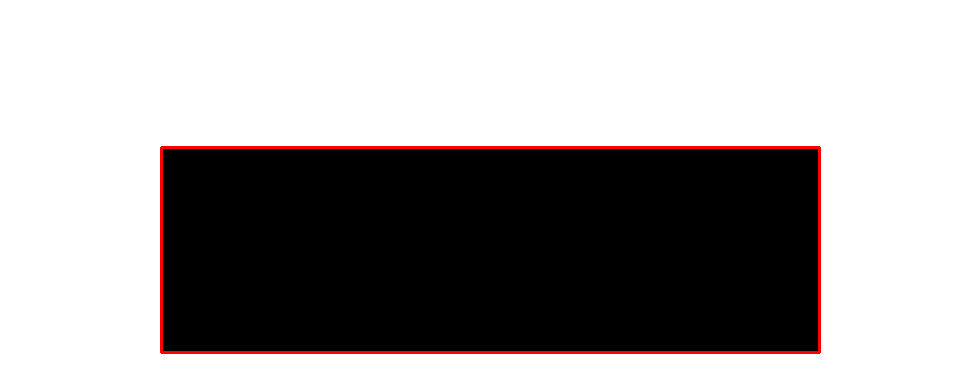

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


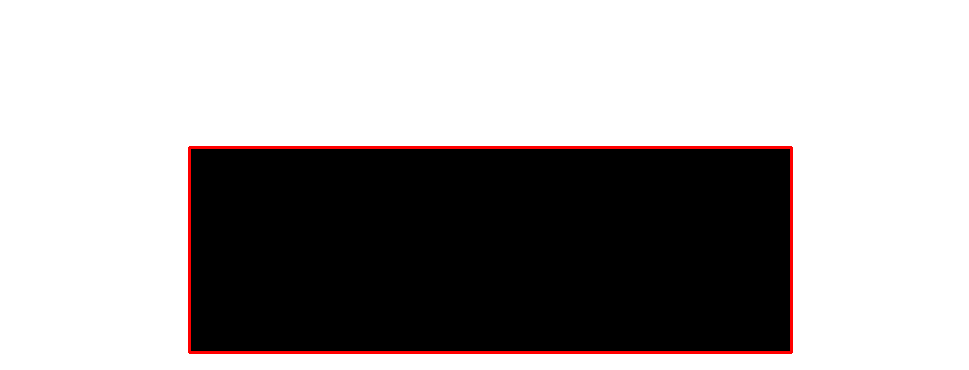

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


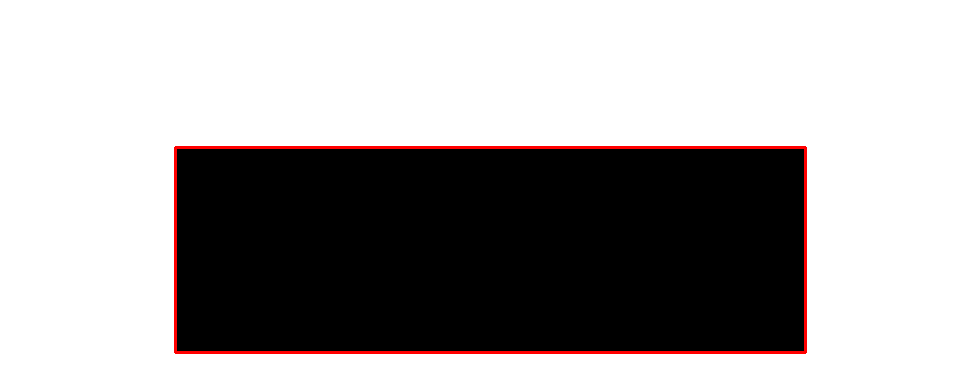

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


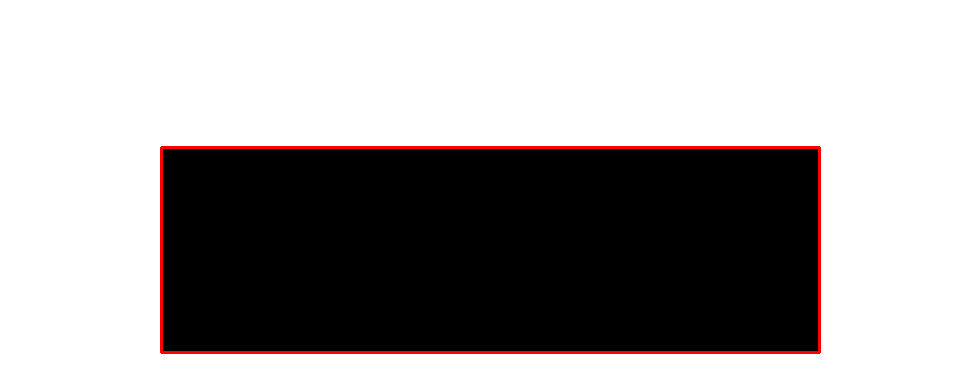

Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


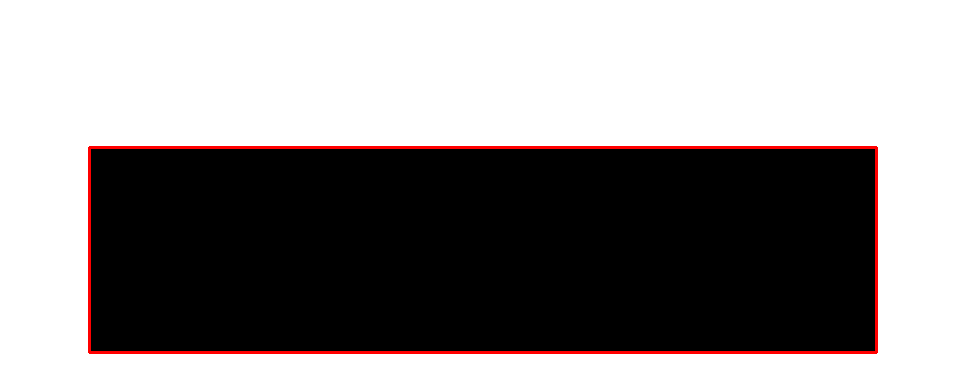

No contours found, skipping drawing rectangles.
Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


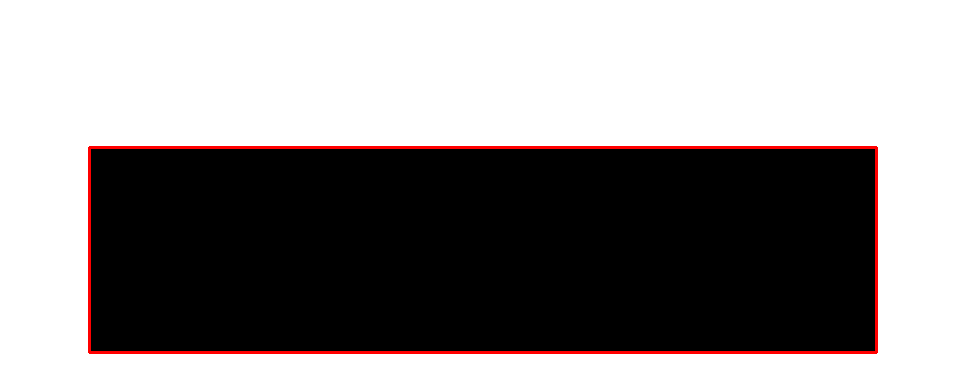

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


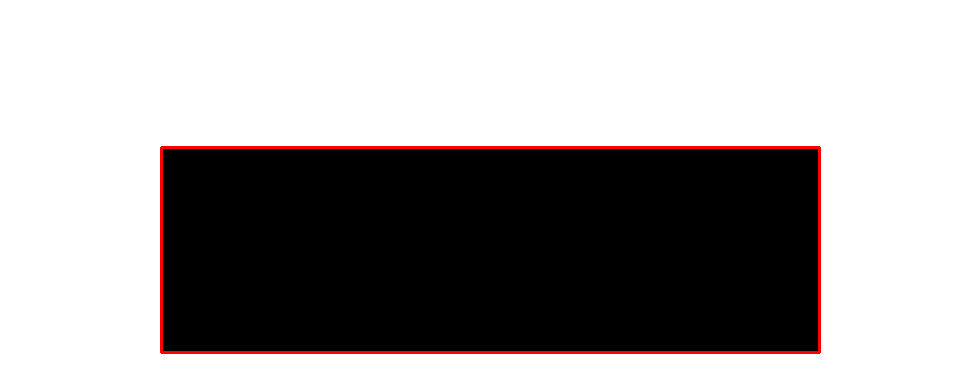

Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


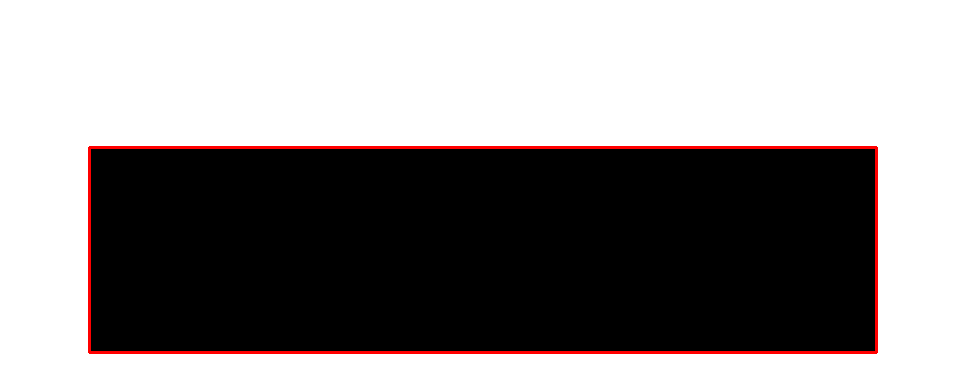

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


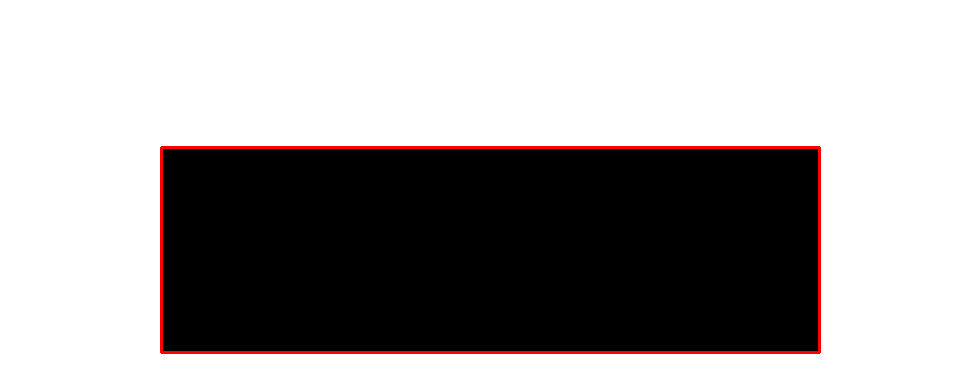

Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


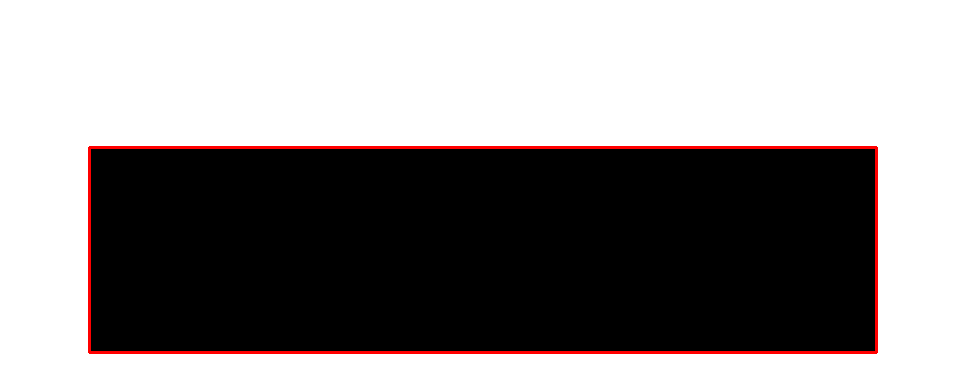

No contours found, skipping drawing rectangles.
Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


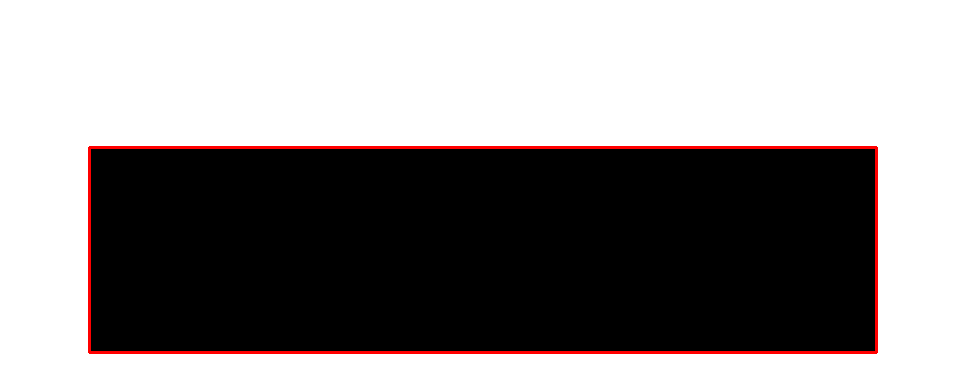

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


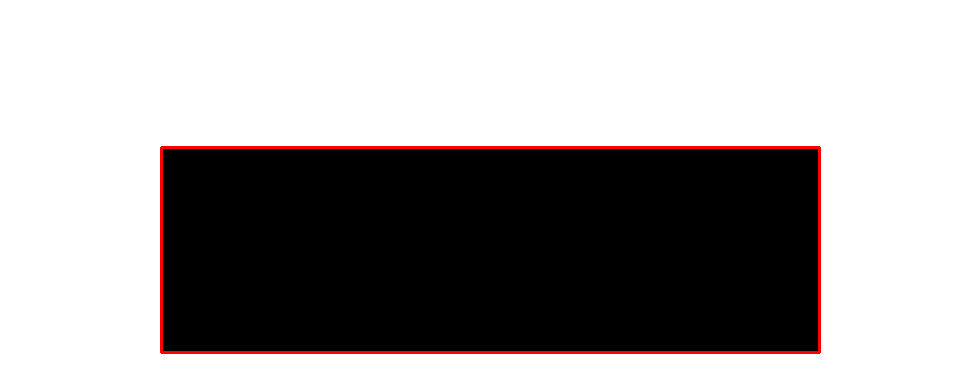

Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


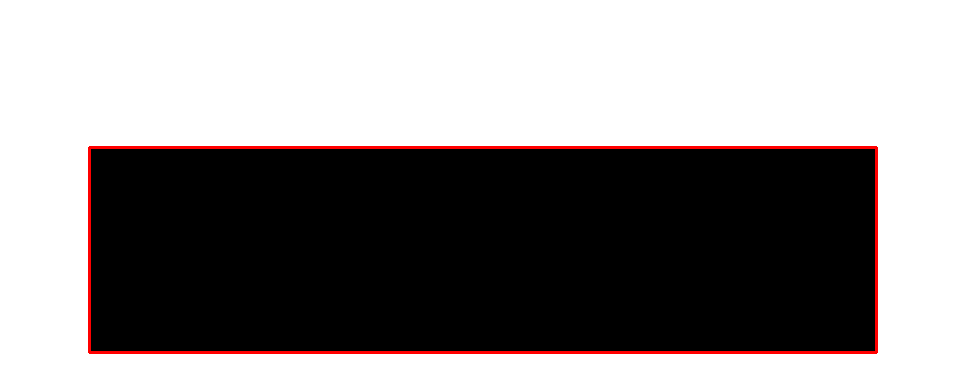

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


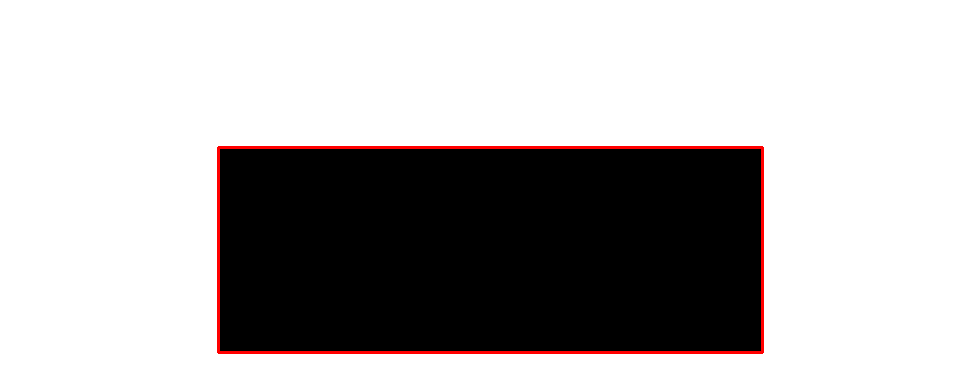

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


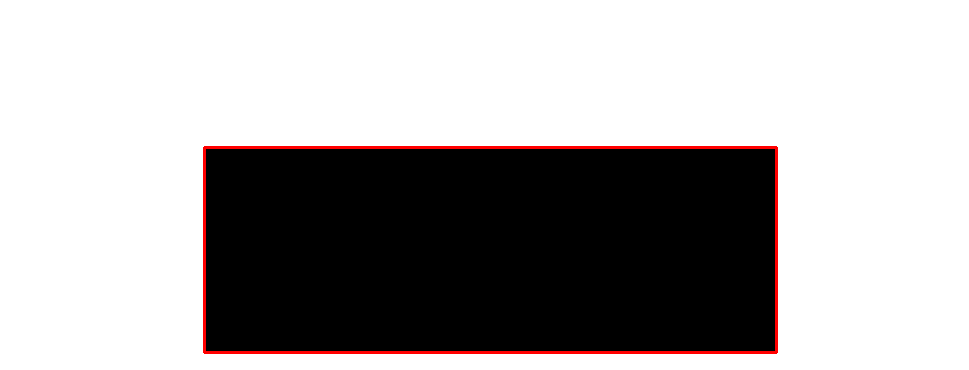

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


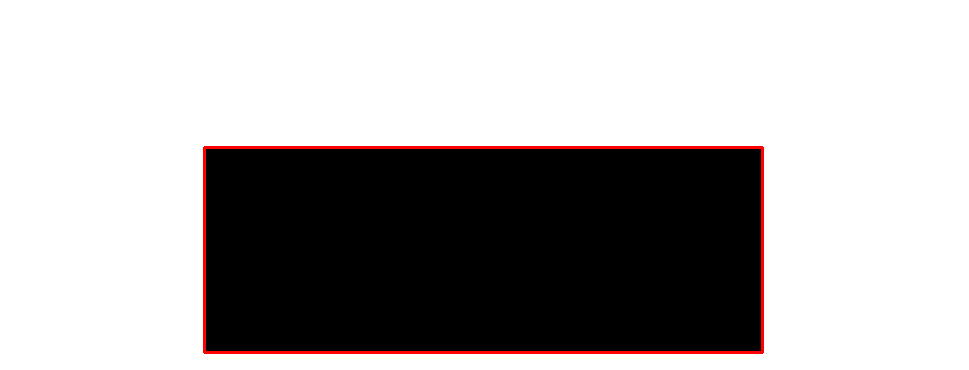

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


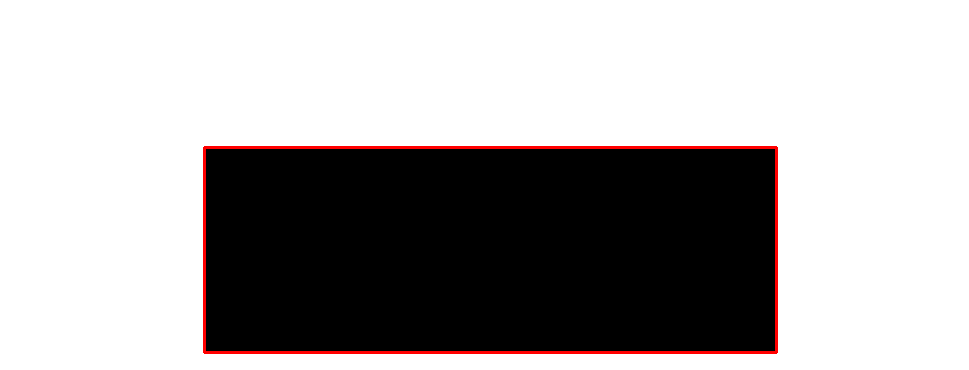

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


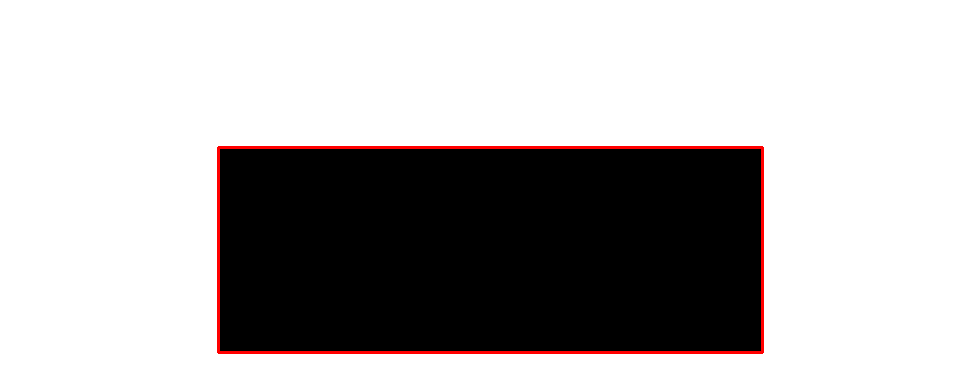

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


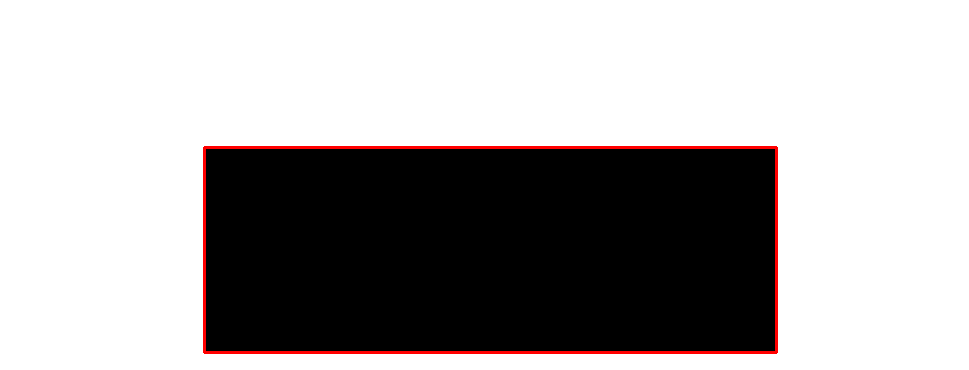

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


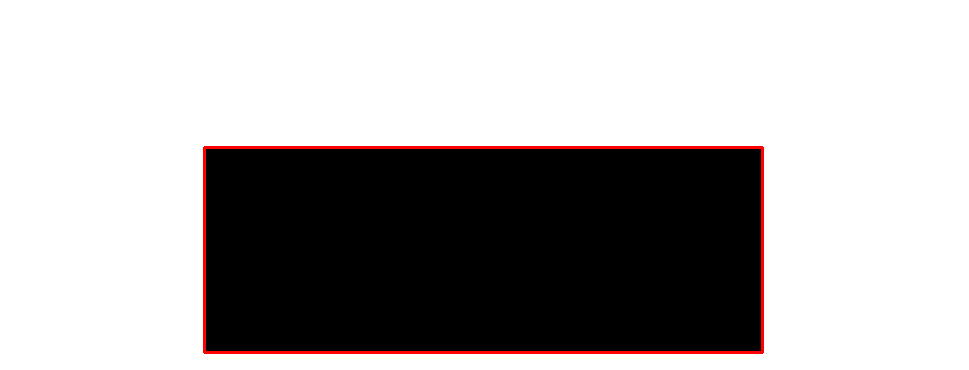

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


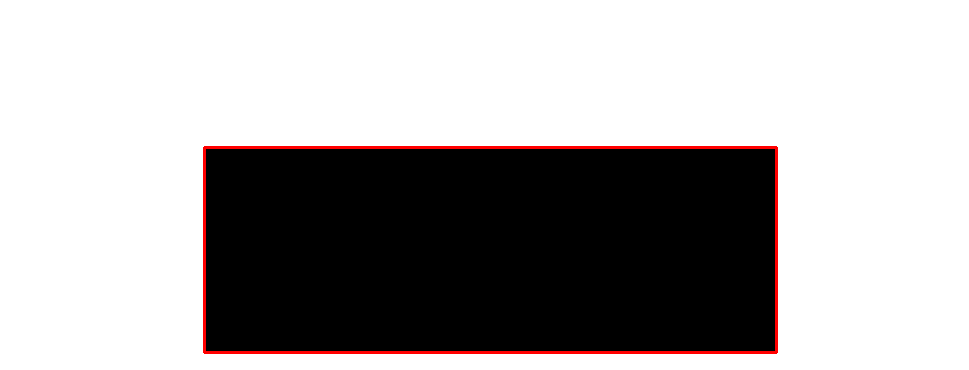

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


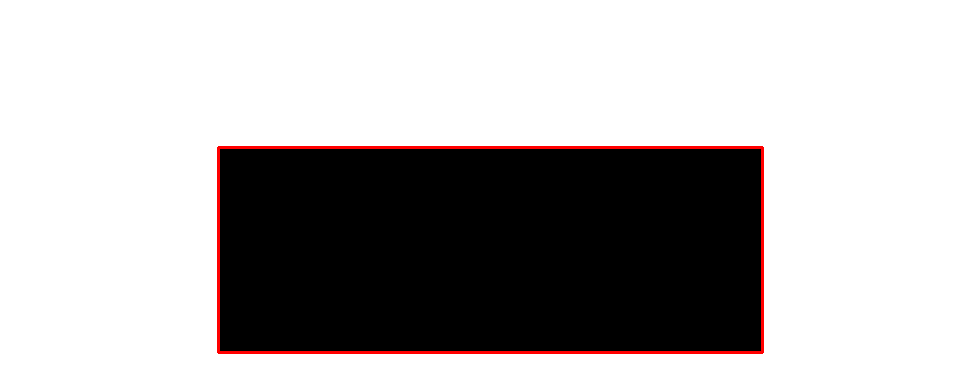

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


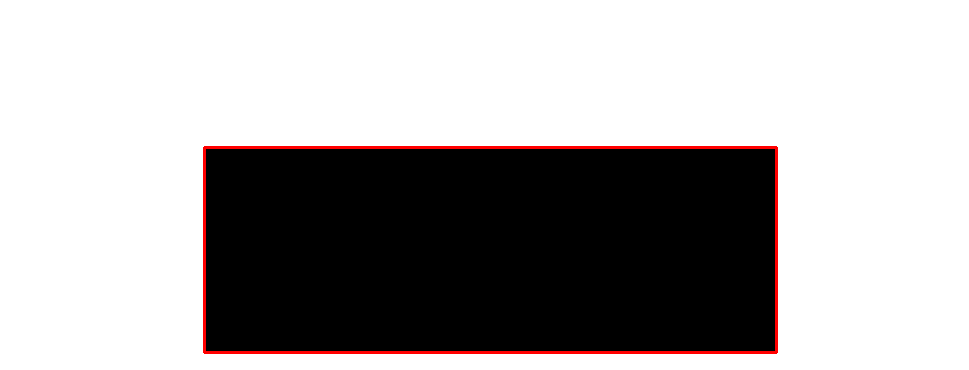

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


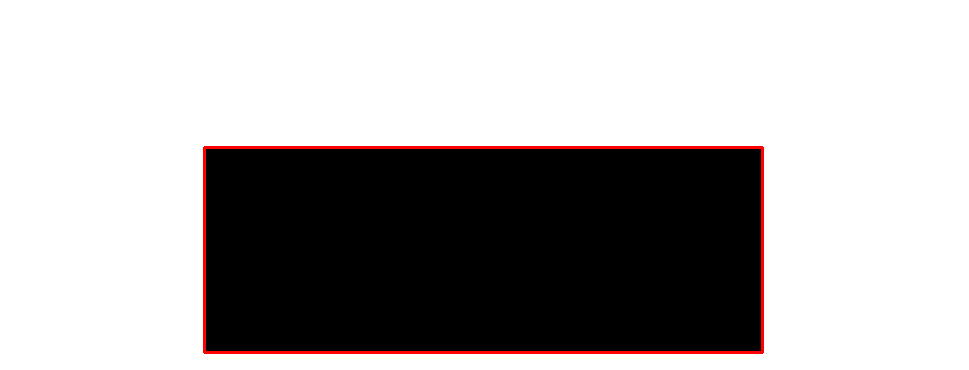

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


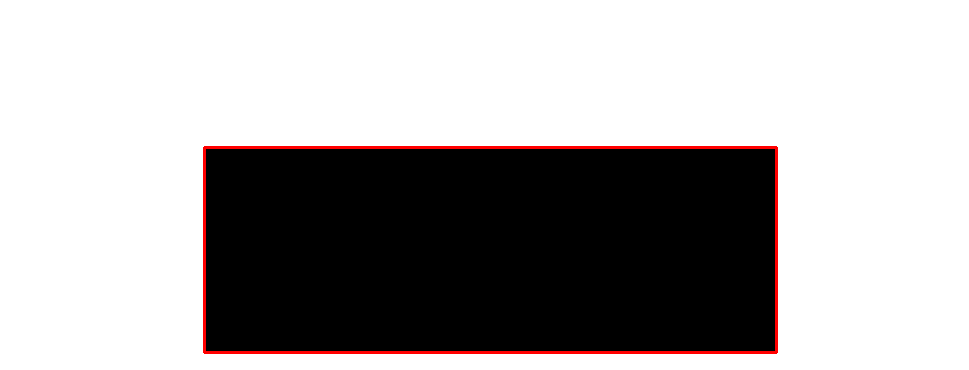

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


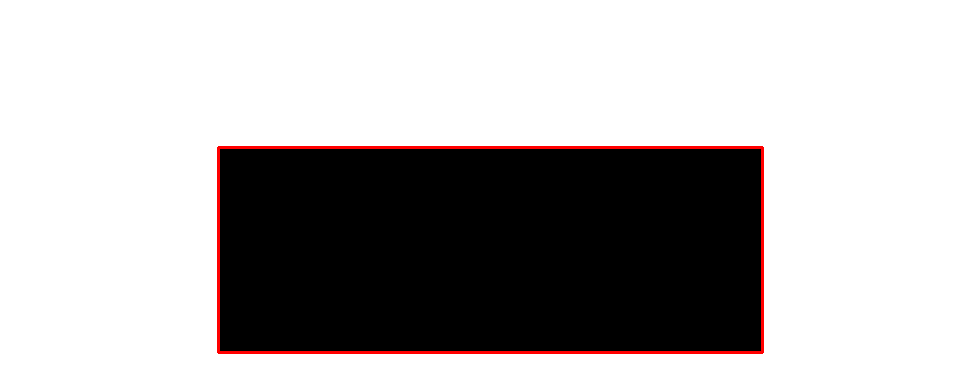

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

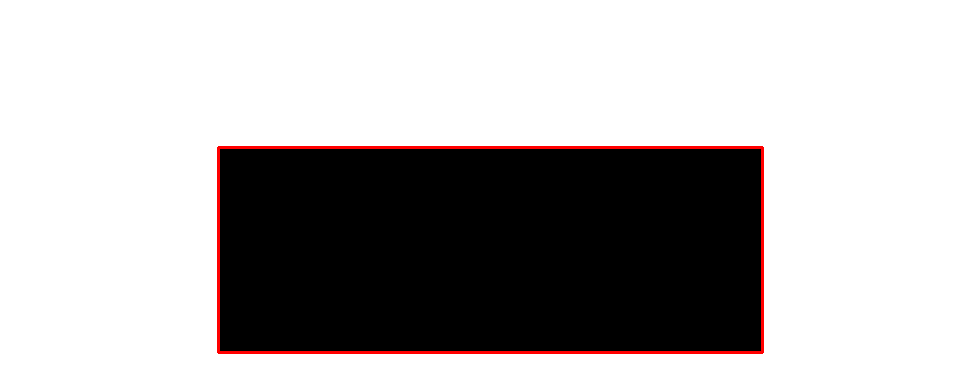

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


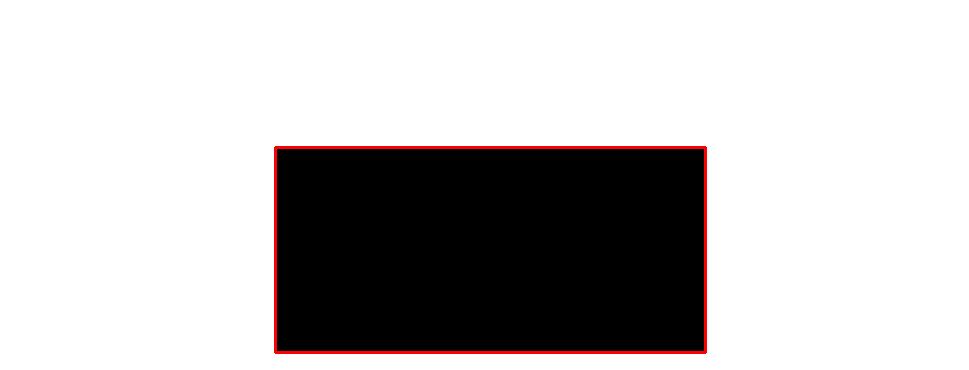

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


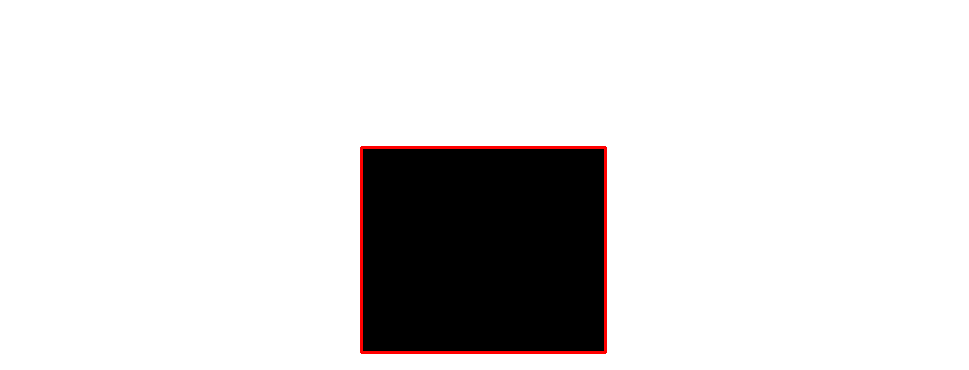

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


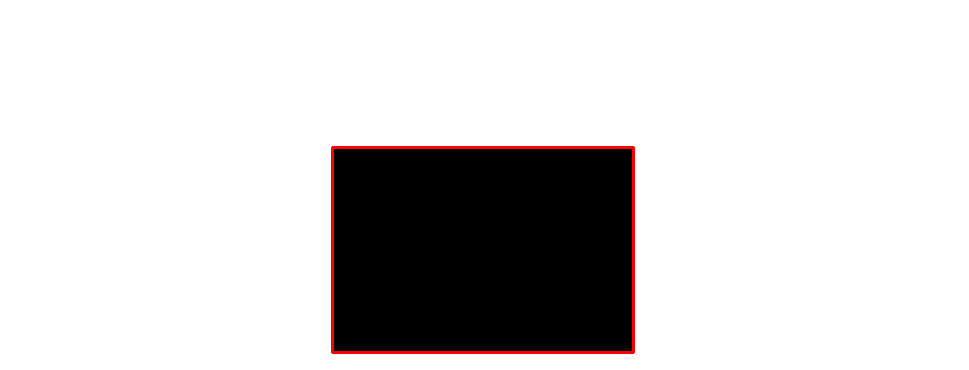

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


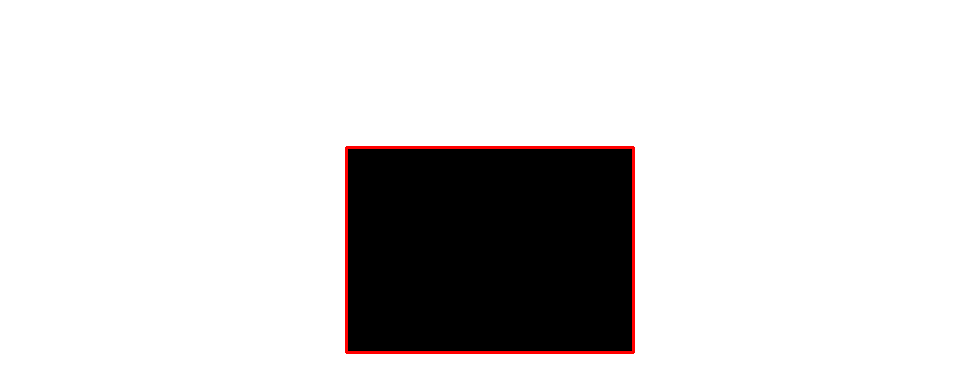

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


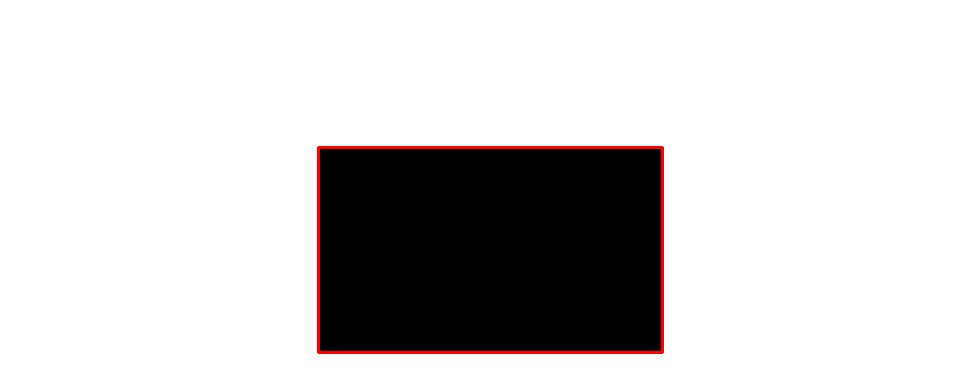

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


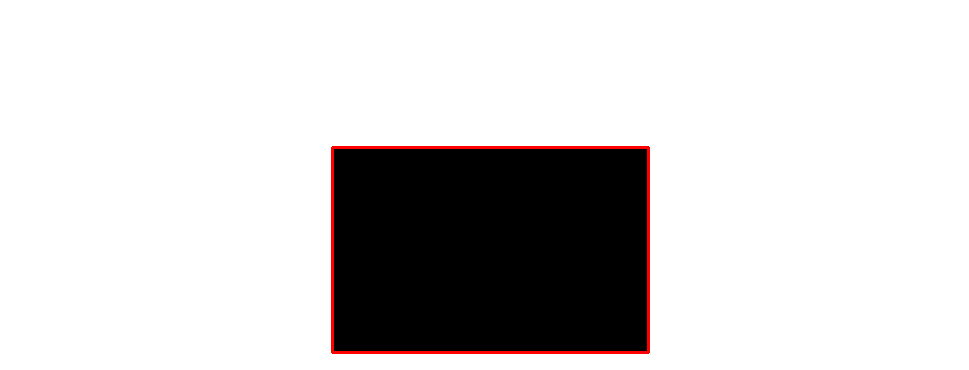

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


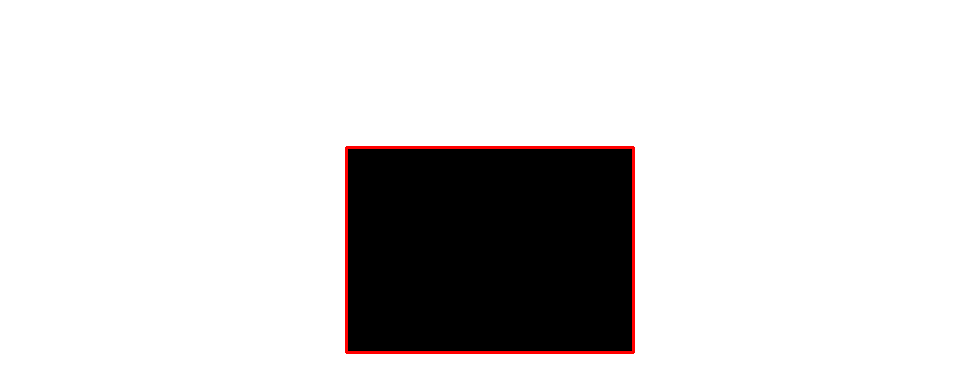

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


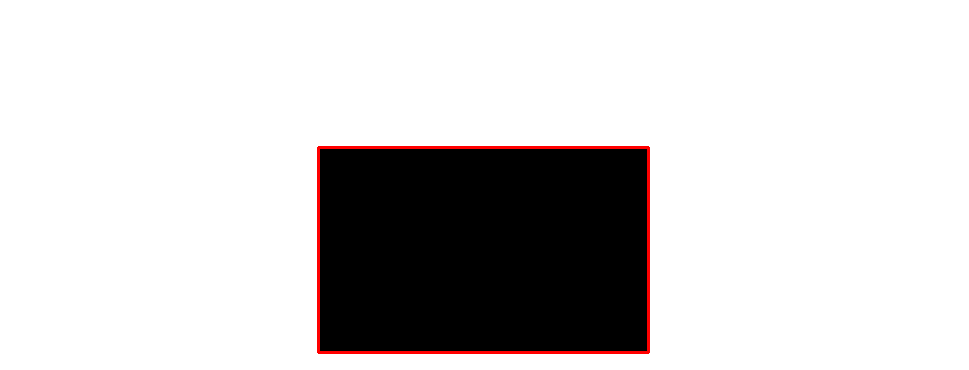

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


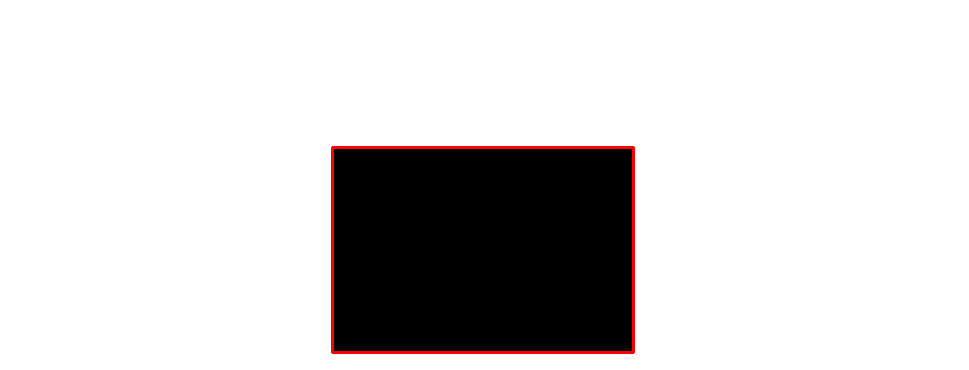

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


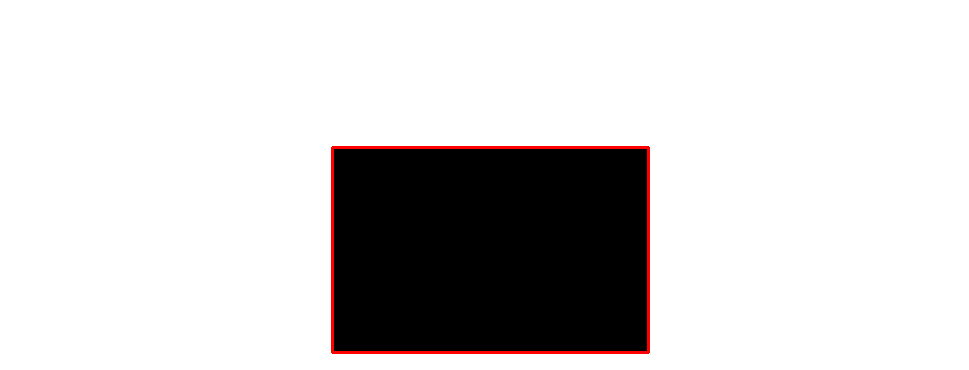

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


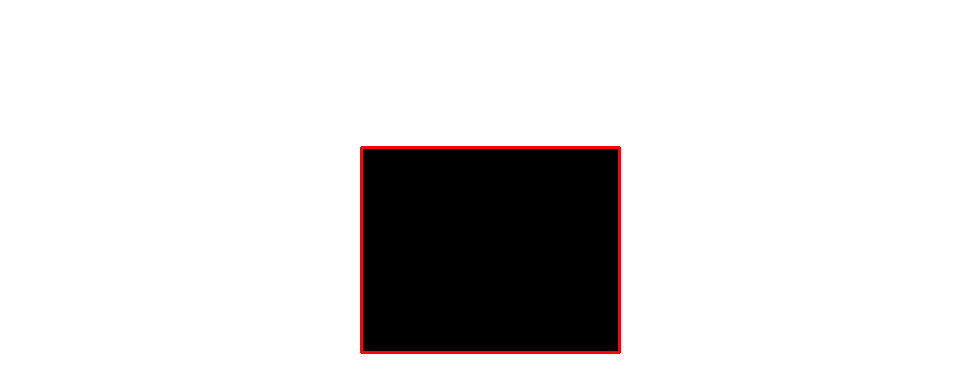

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

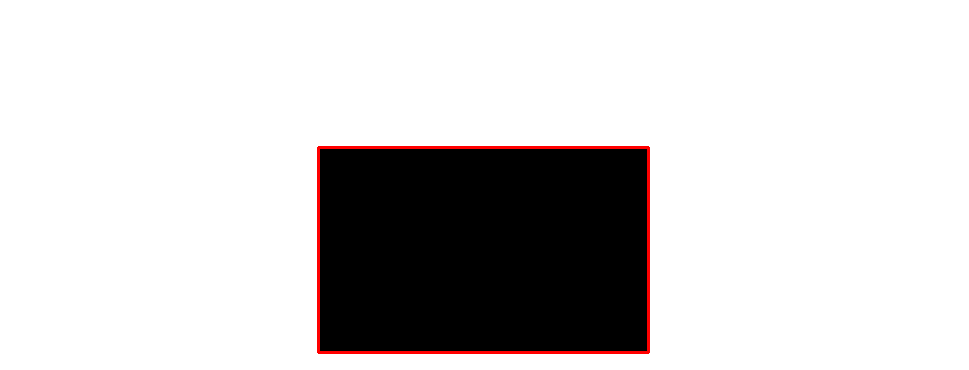

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


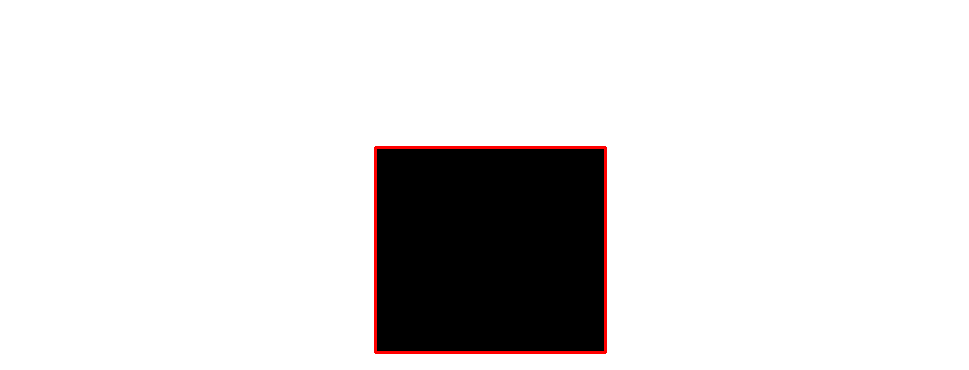

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


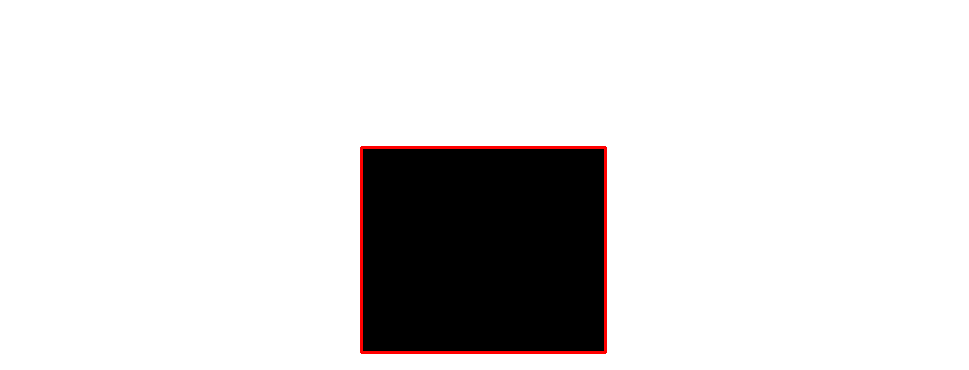

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


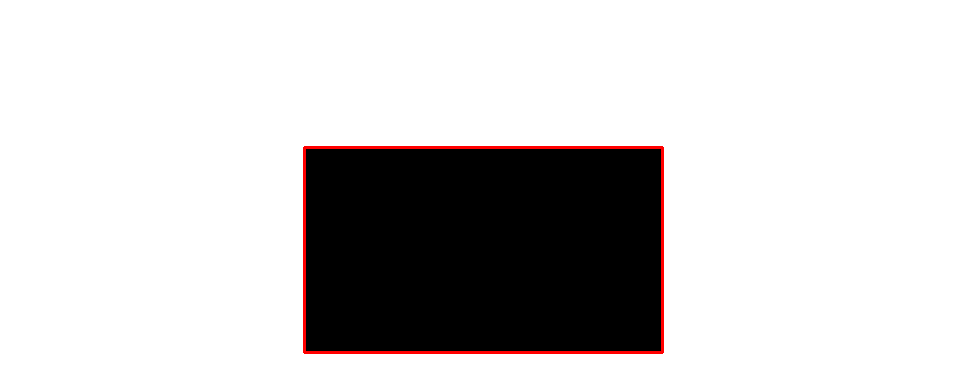

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


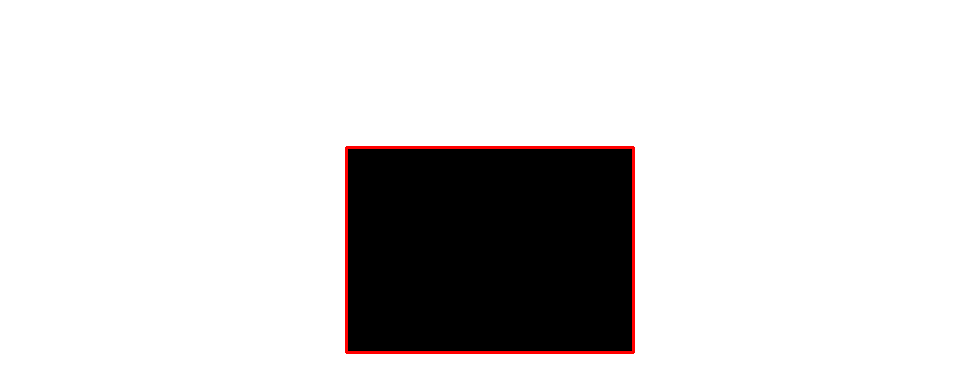

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


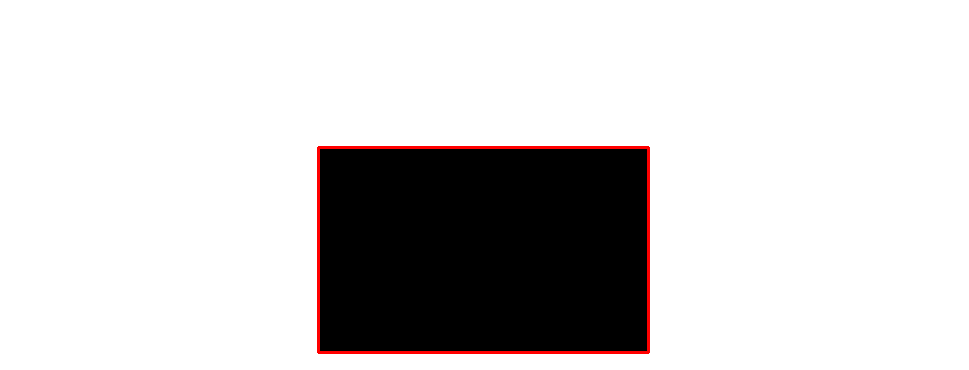

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


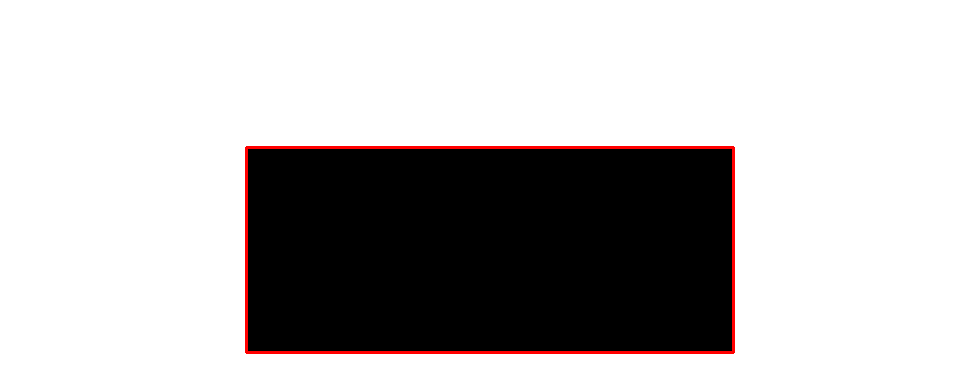

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

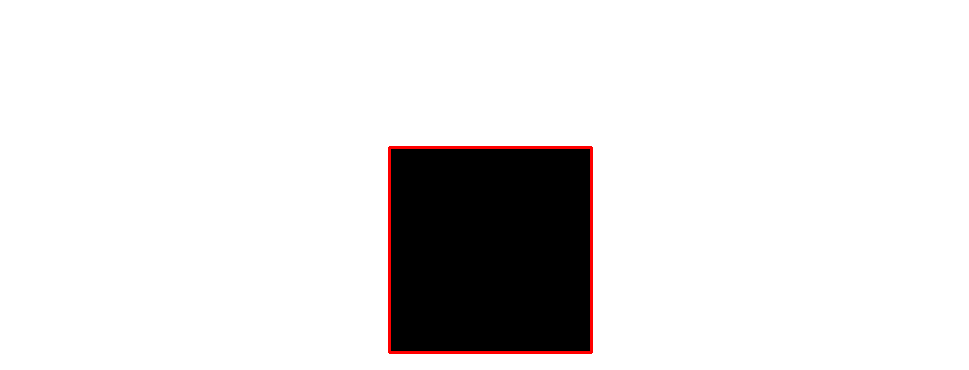

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


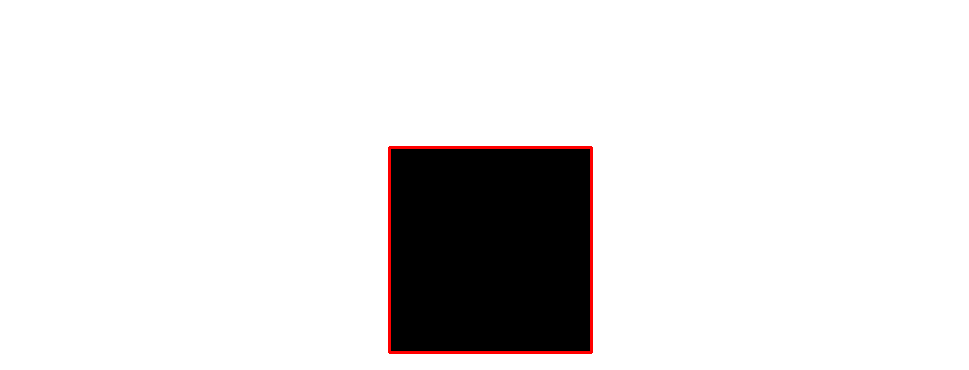

No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


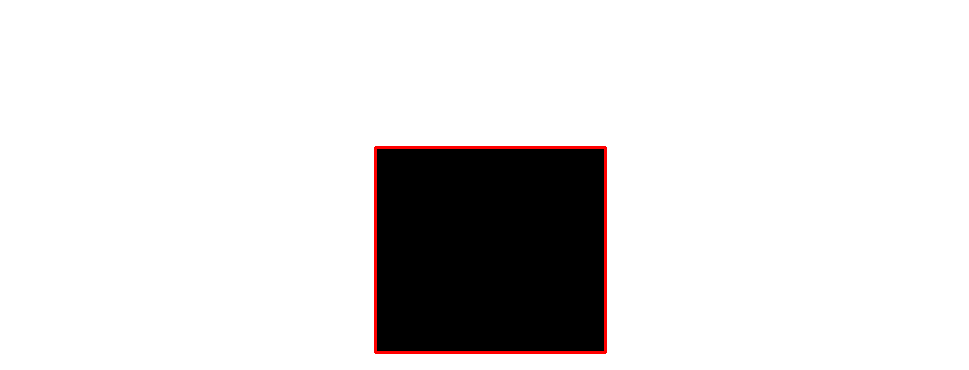

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


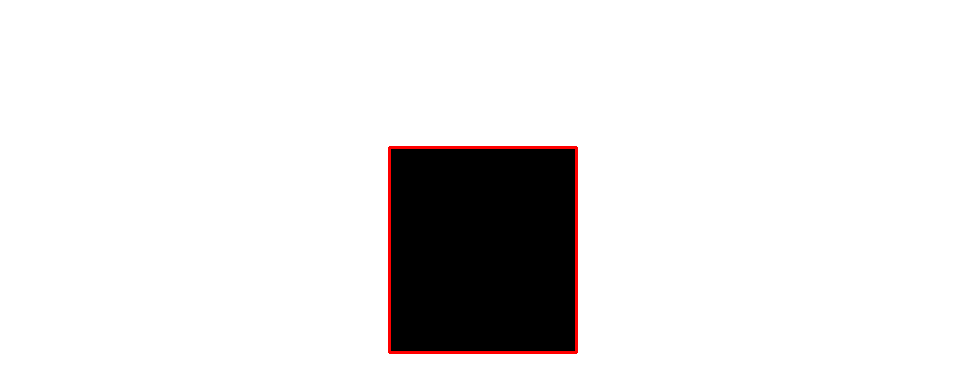

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


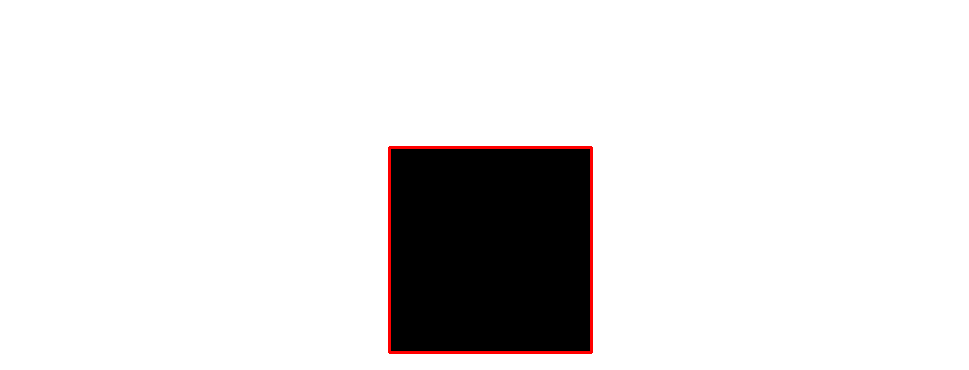

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


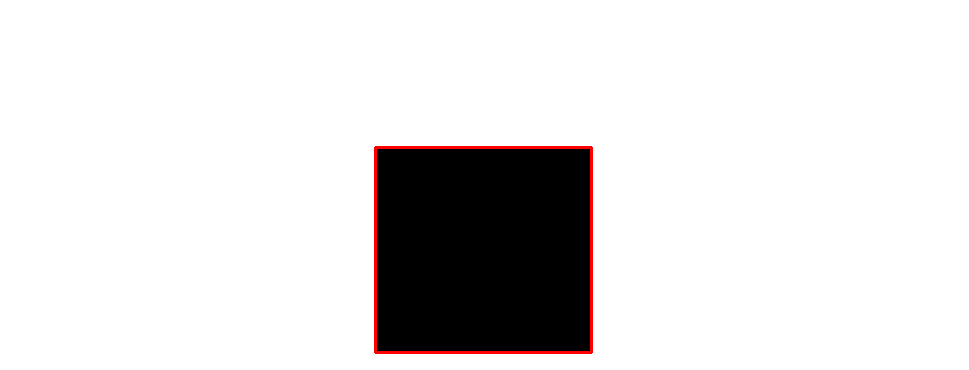

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


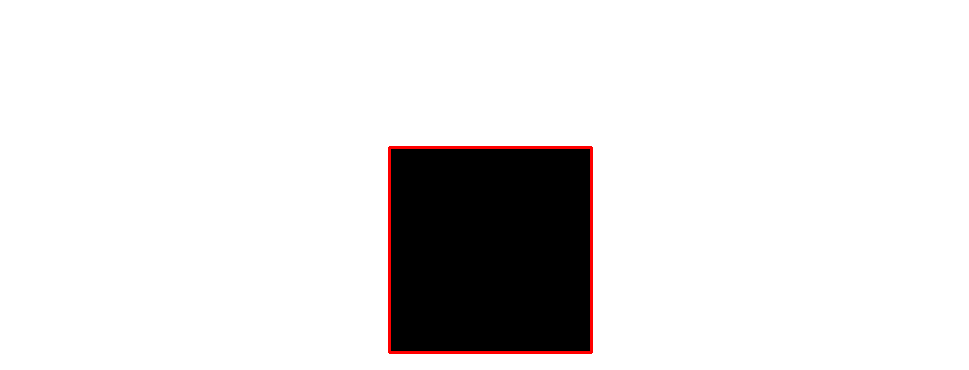

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


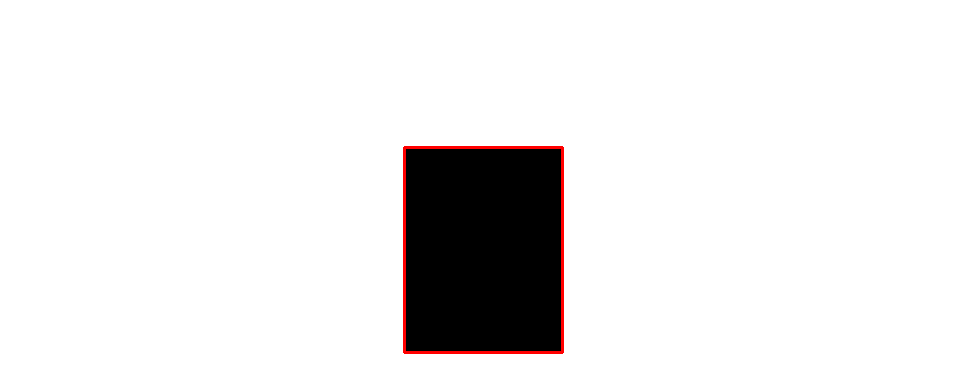

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

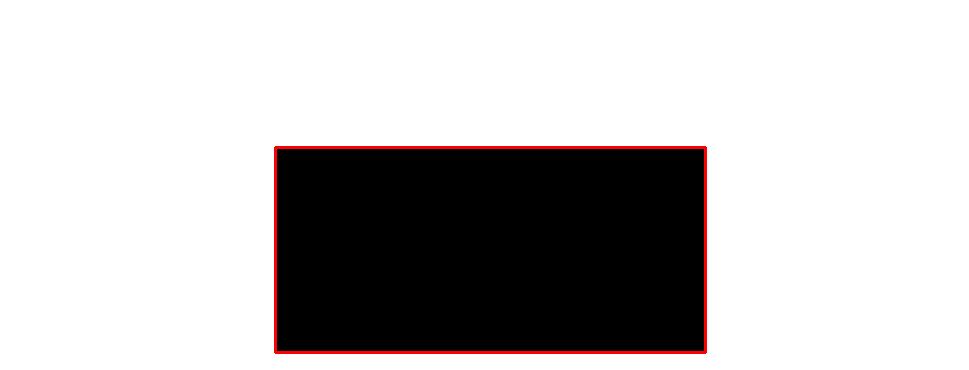

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


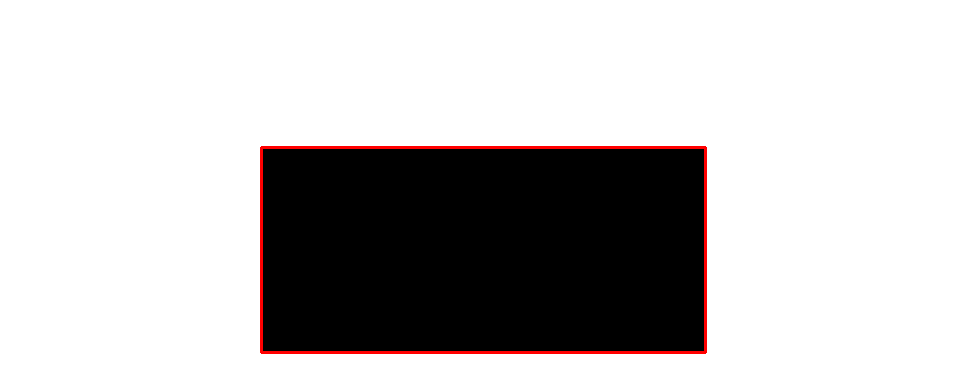

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


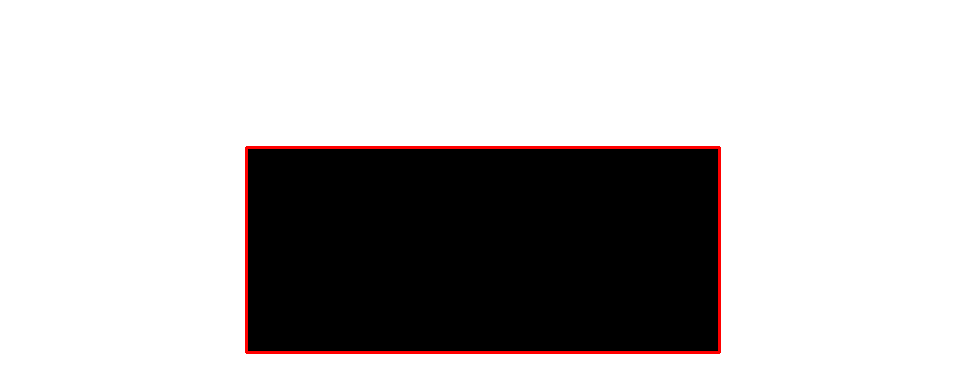

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


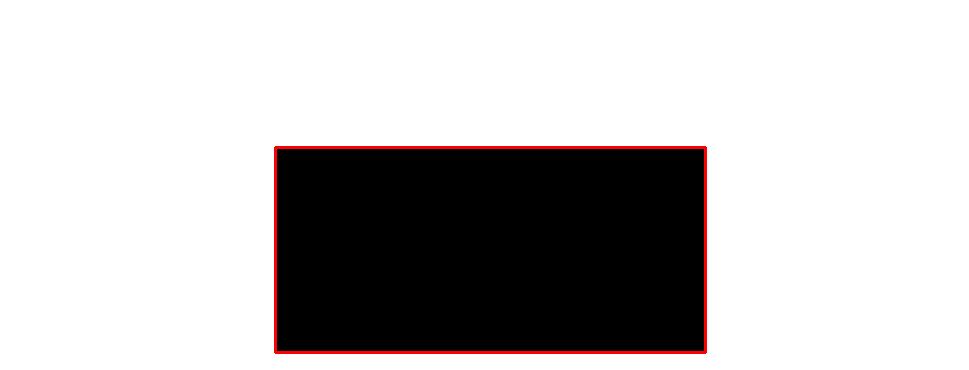

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


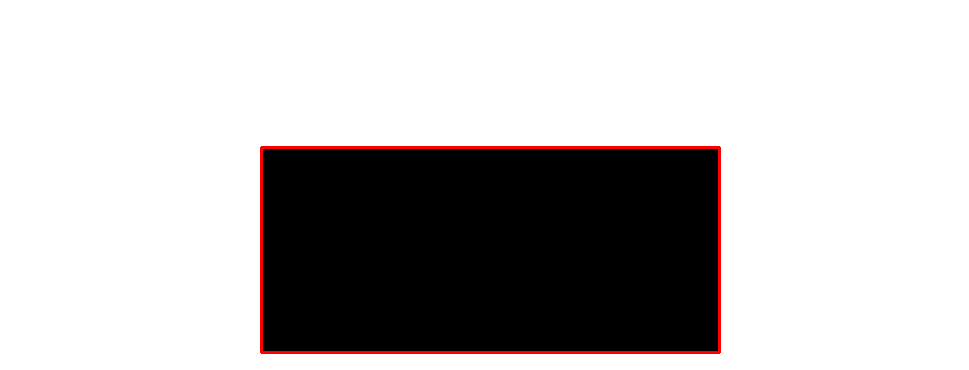

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

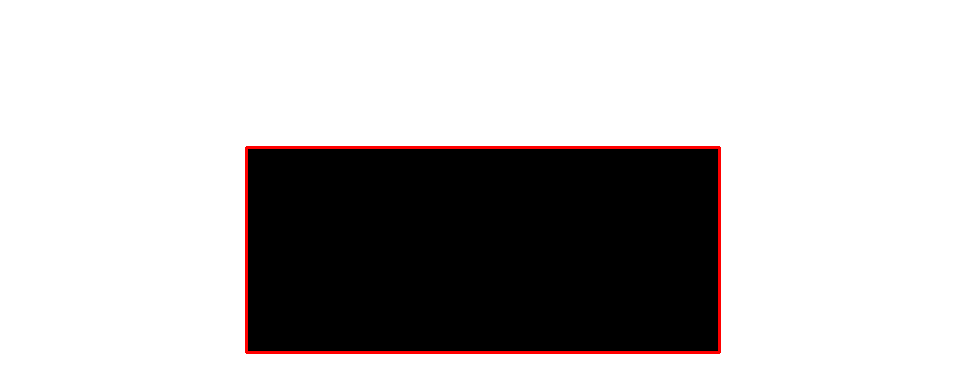

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

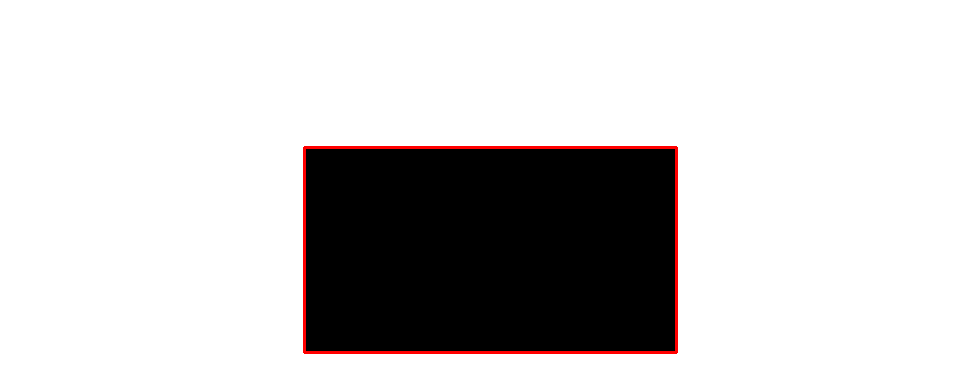

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


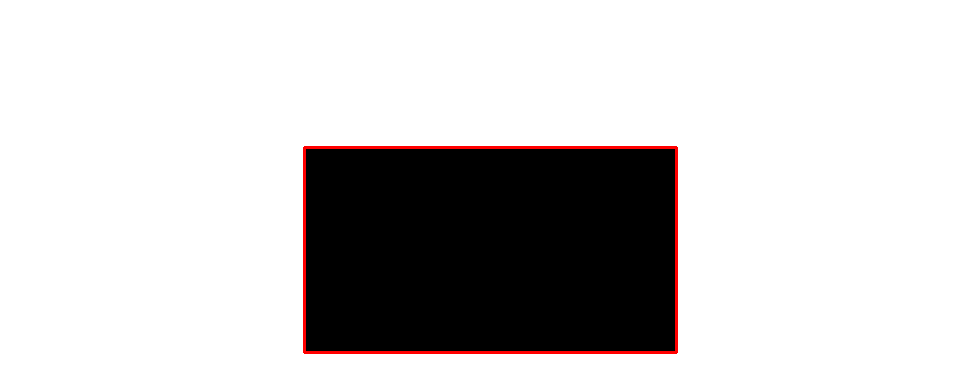

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


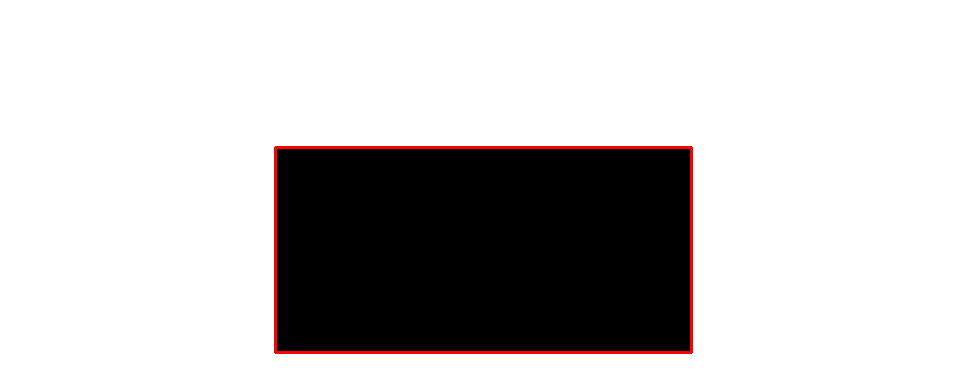

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


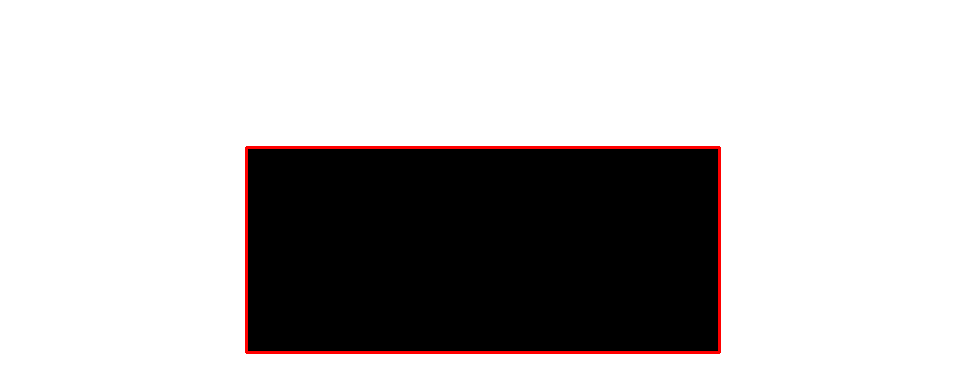

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


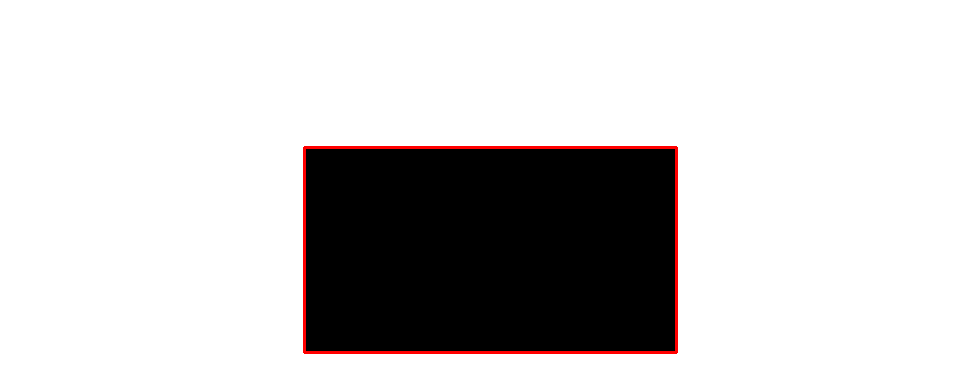

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


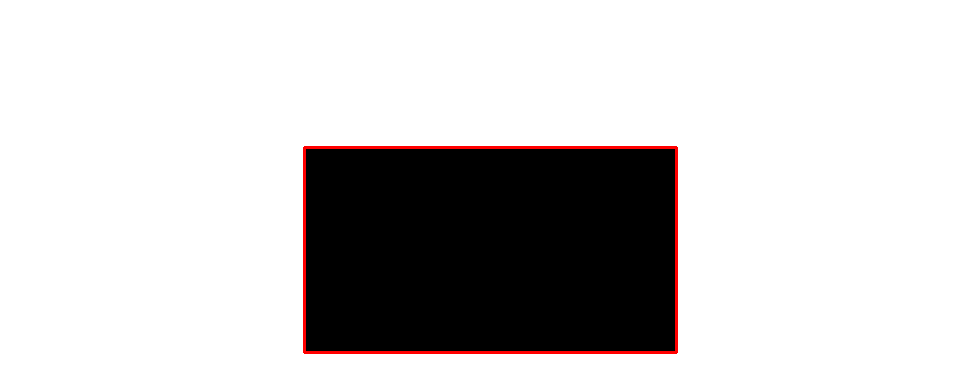

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


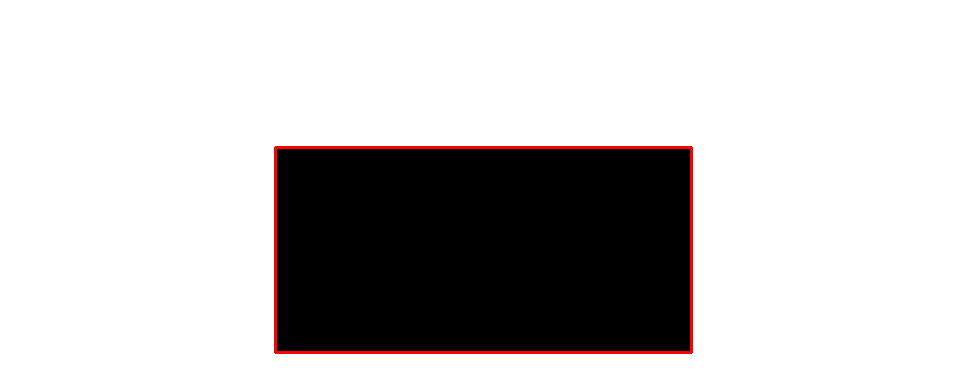

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


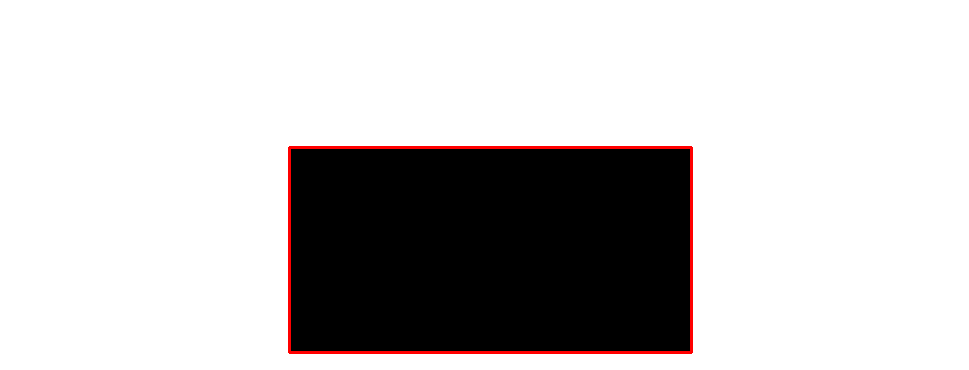

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


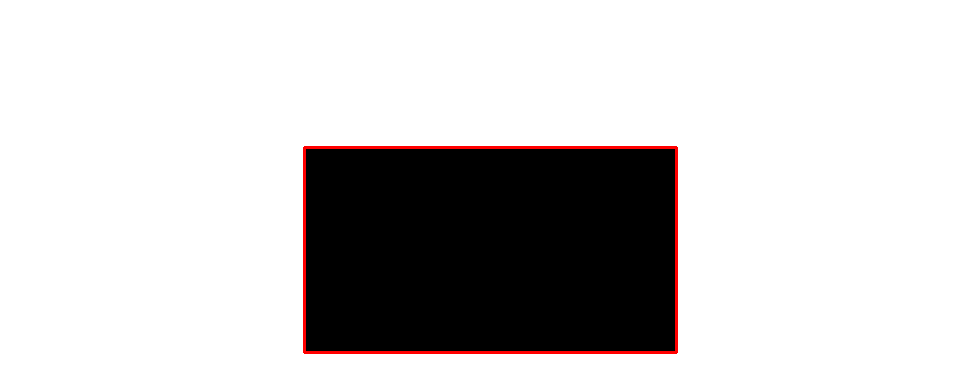

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


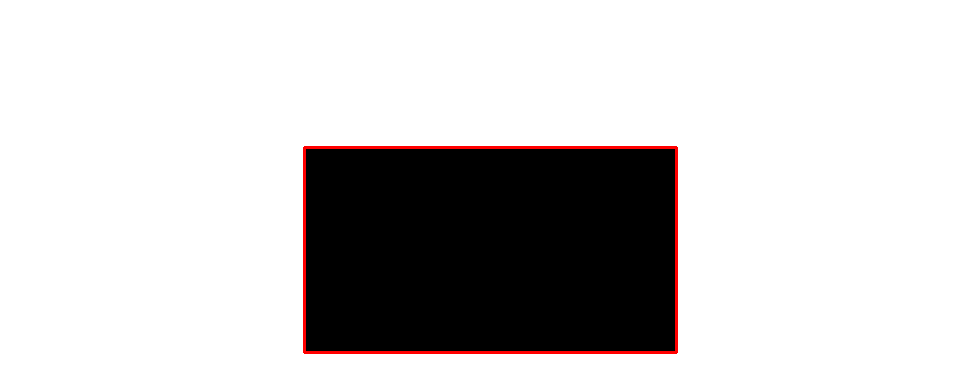

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


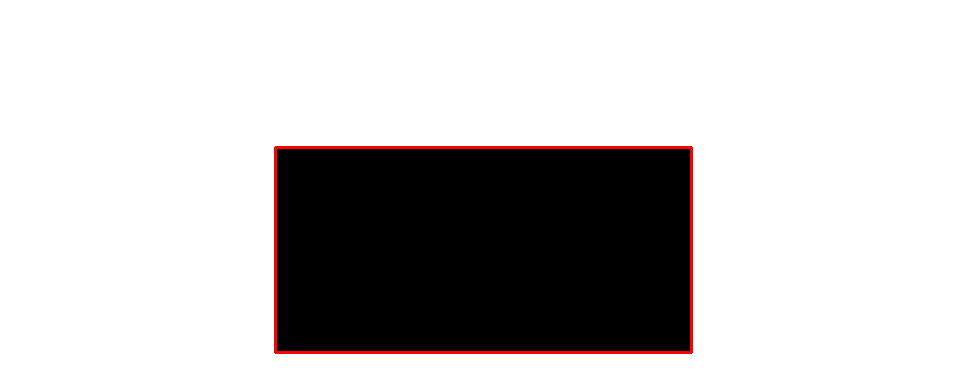

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


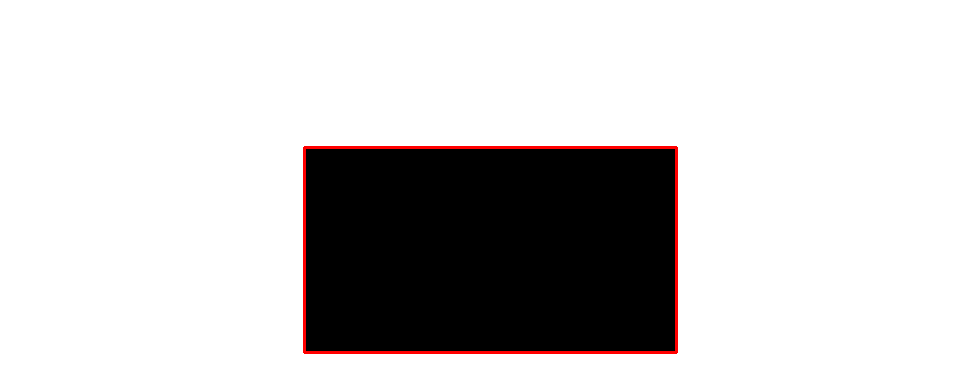

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


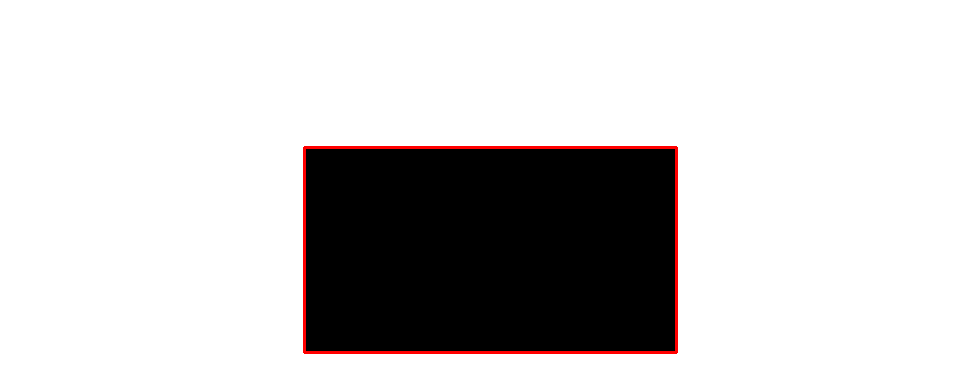

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


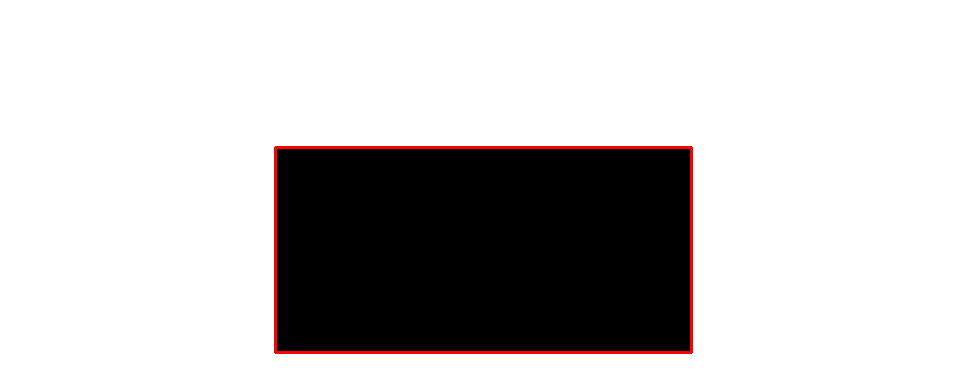

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


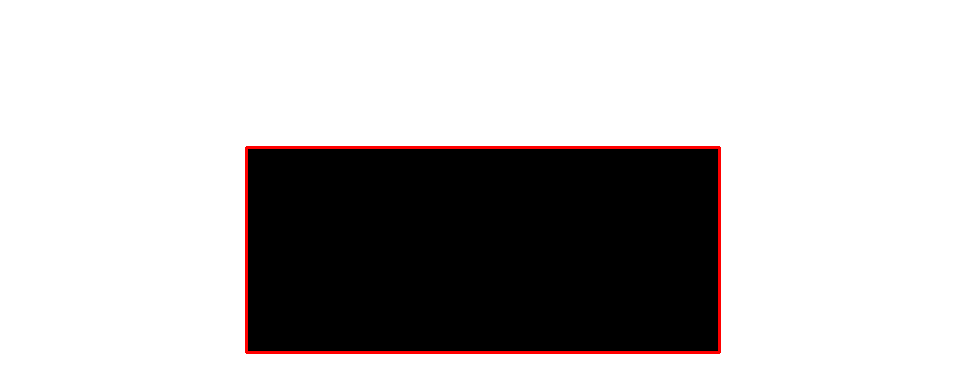

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


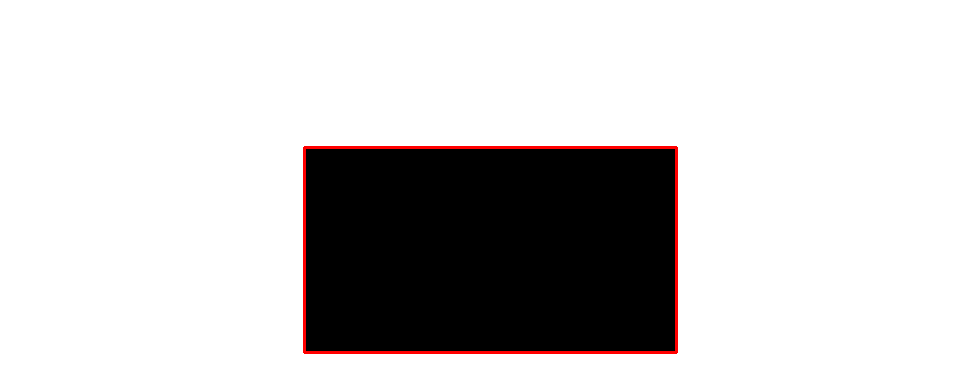

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


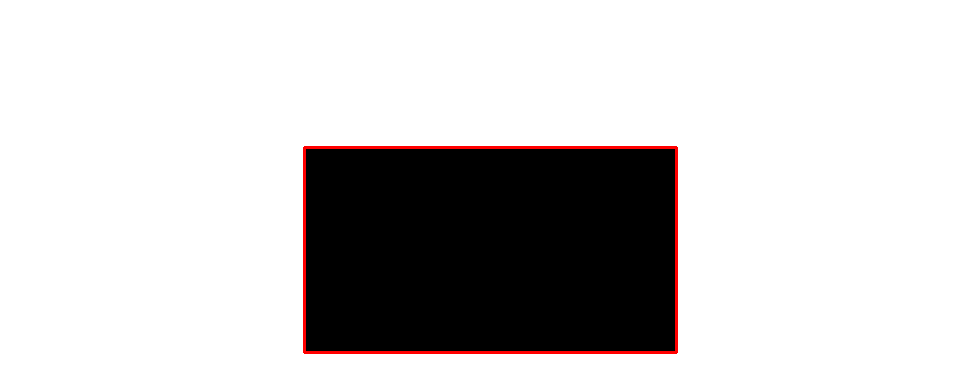

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


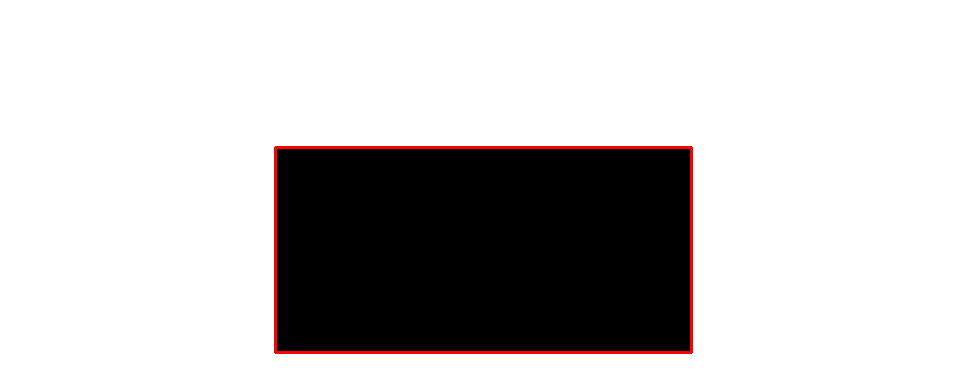

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


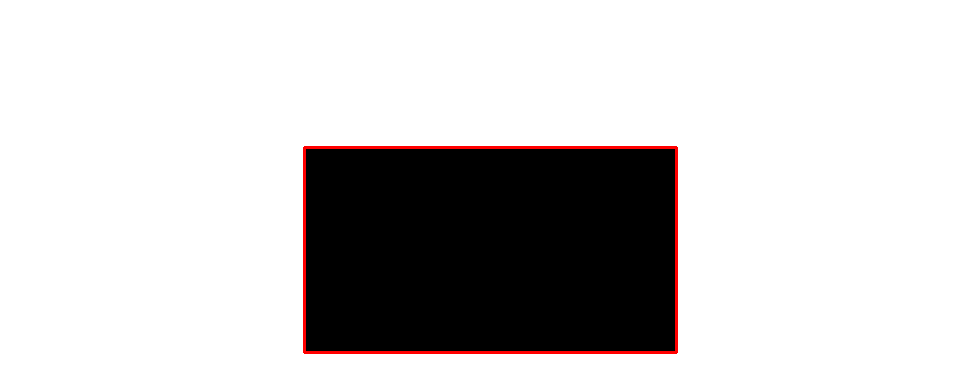

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


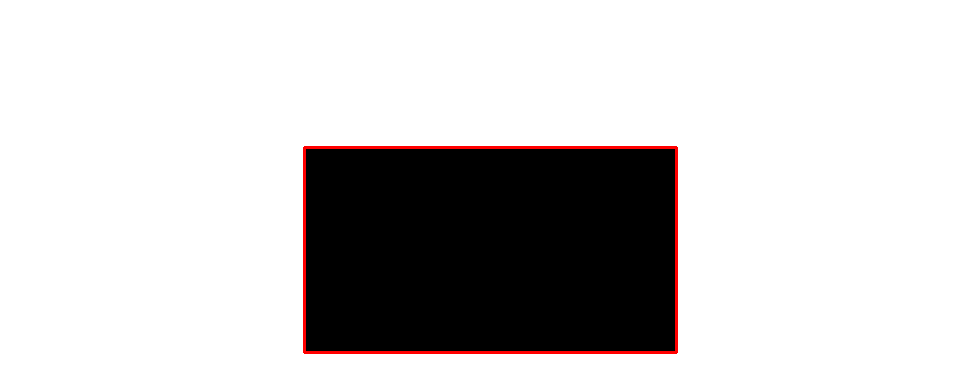

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


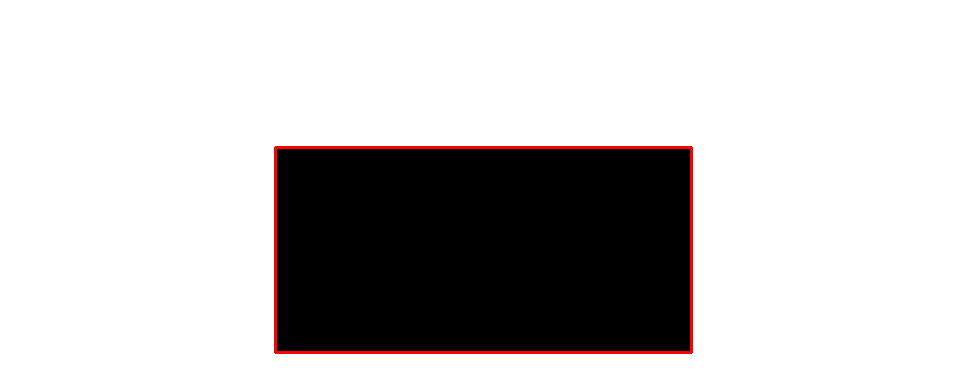

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


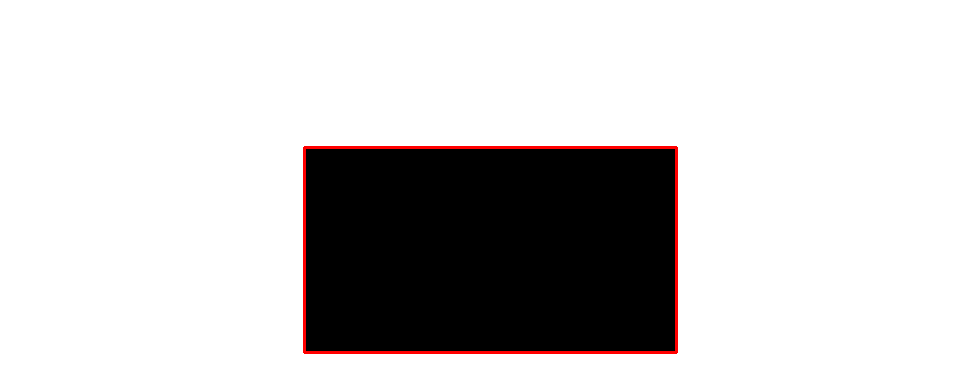

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


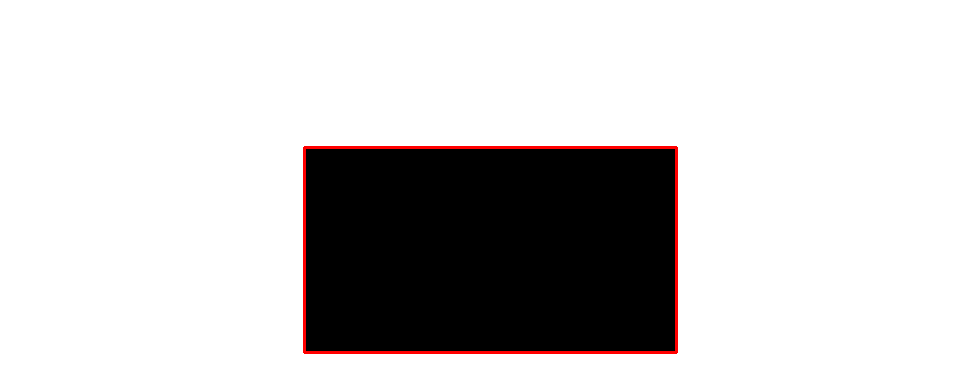

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


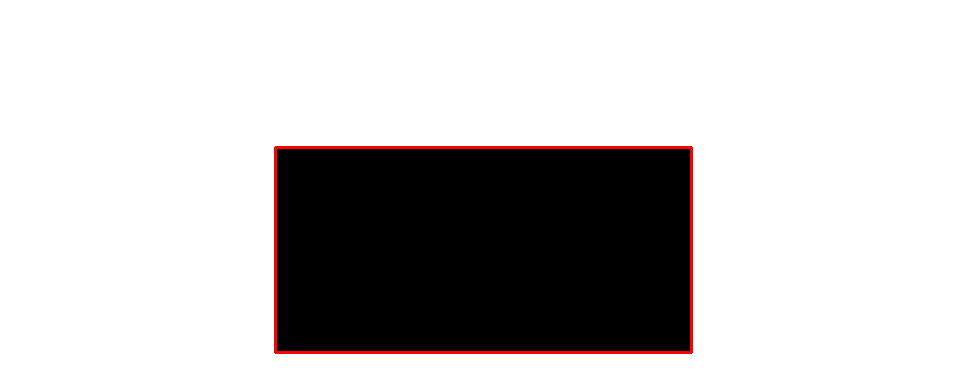

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


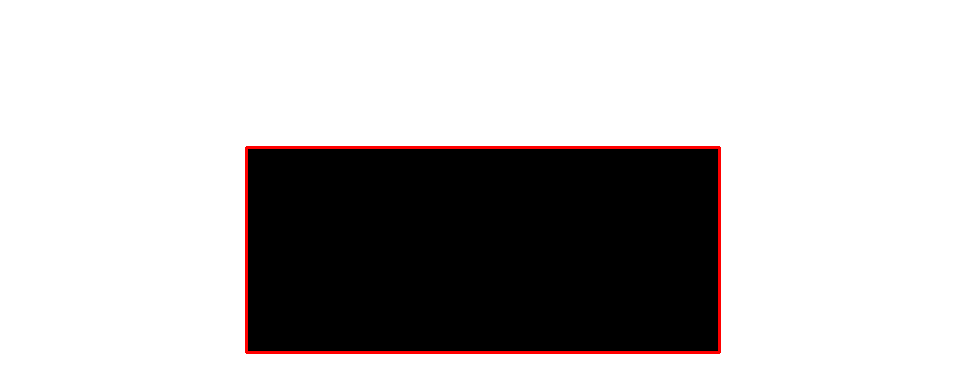

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


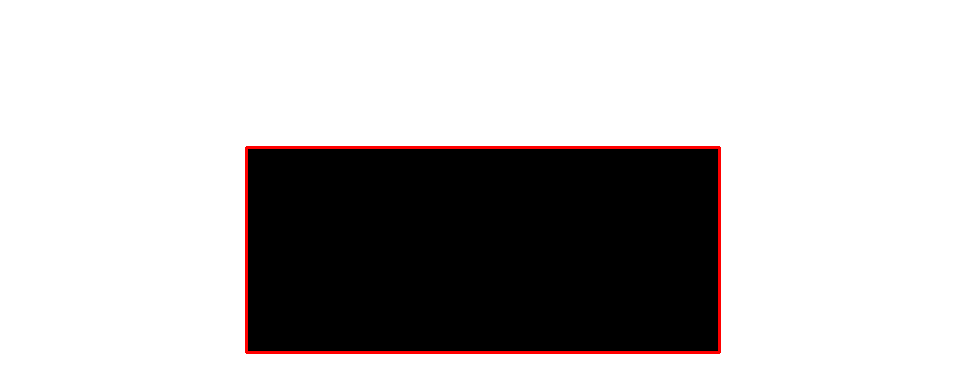

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


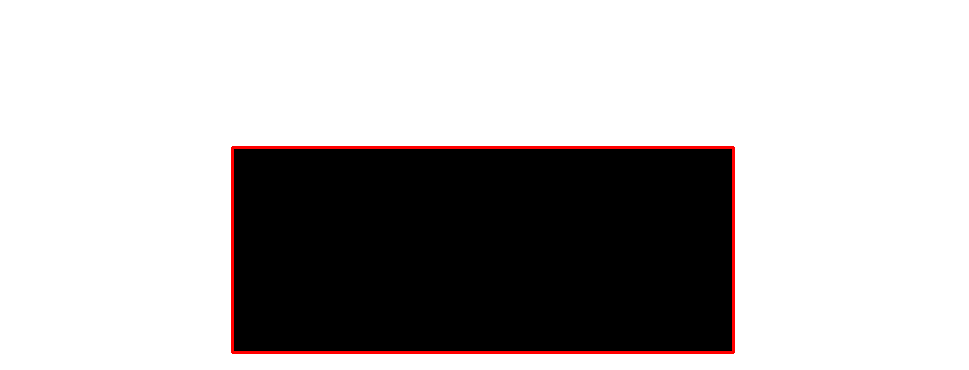

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


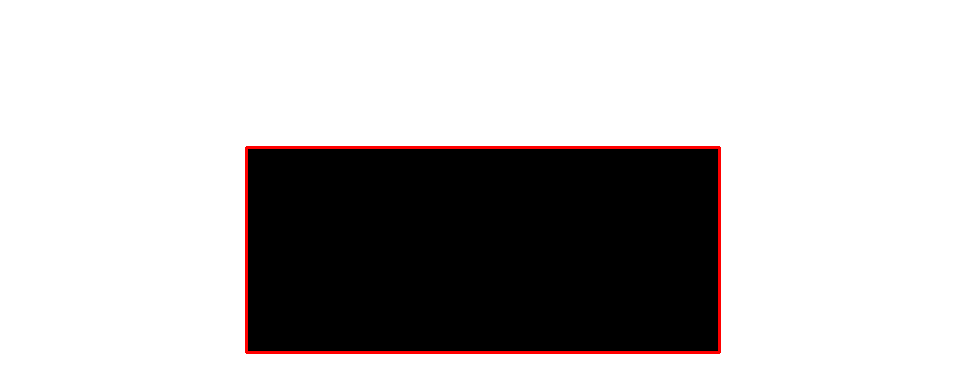

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


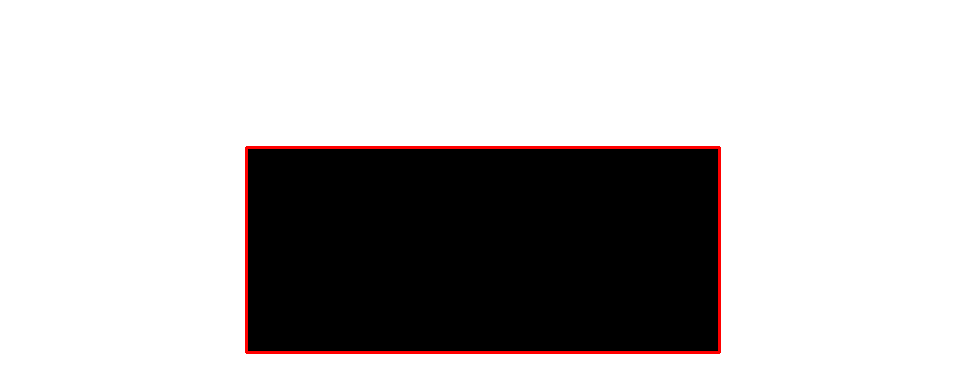

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


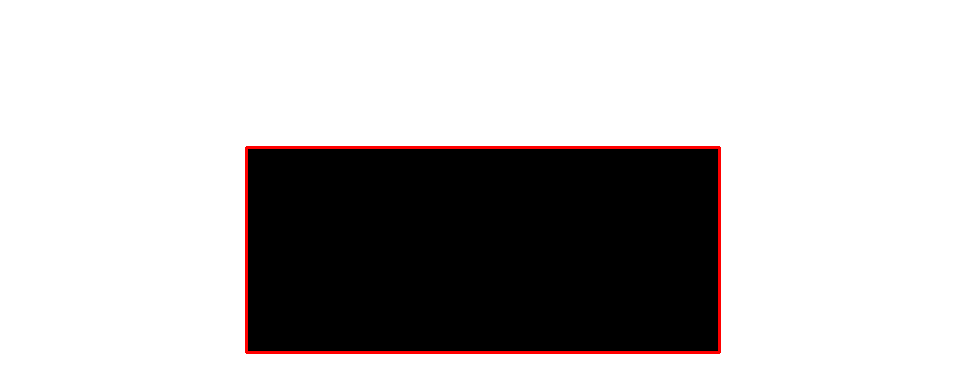

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


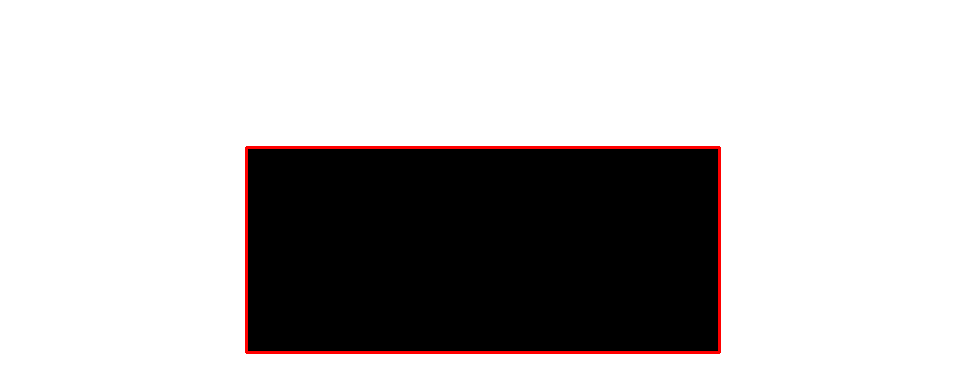

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


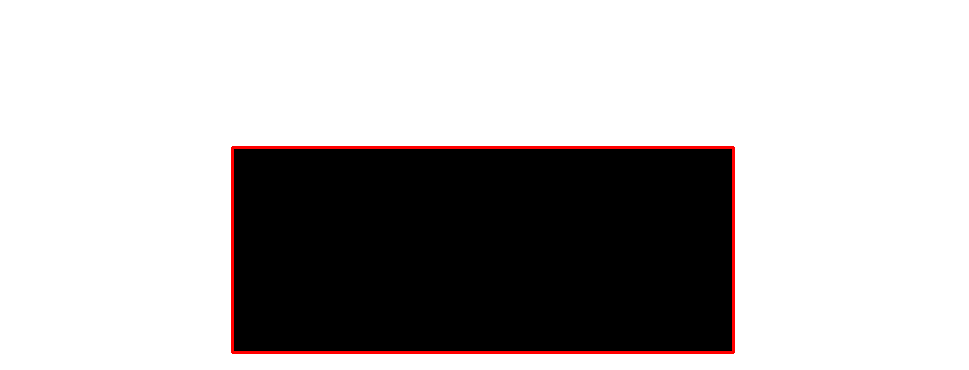

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


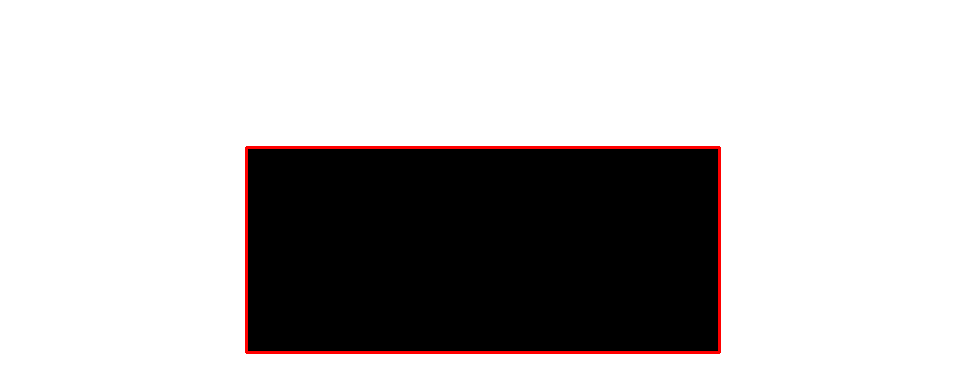

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


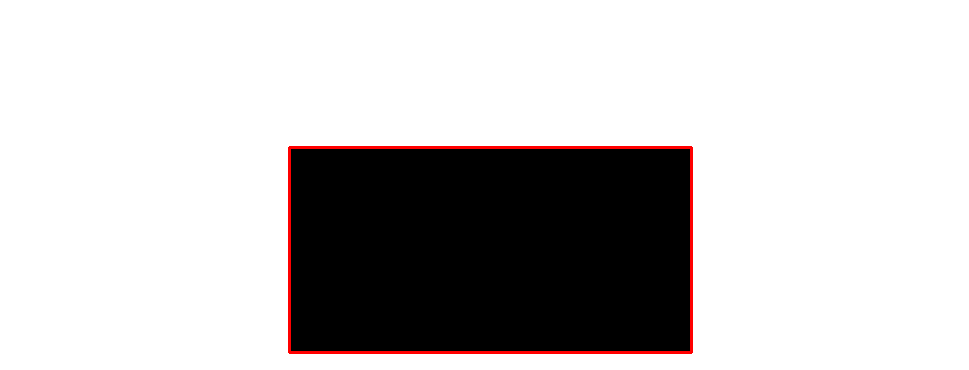

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


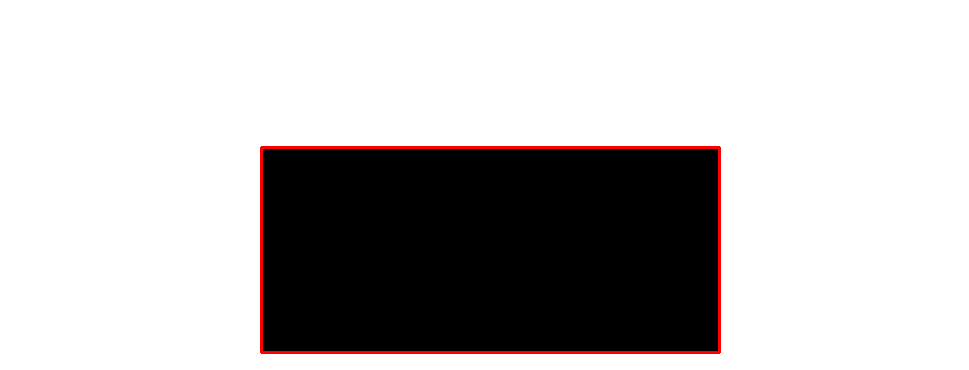

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


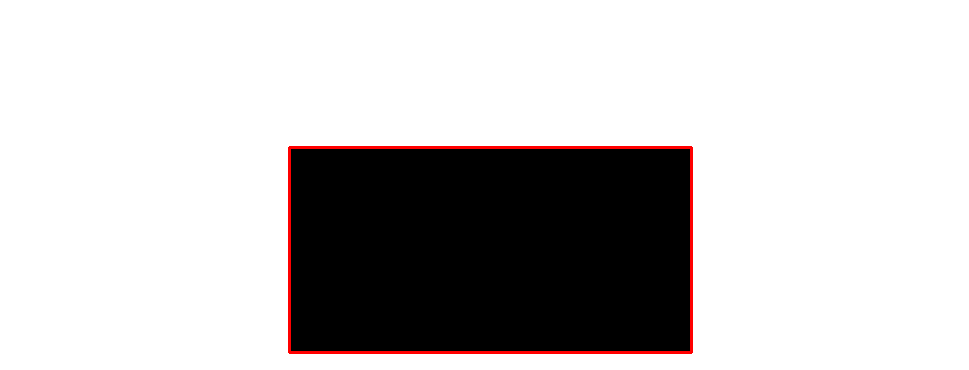

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


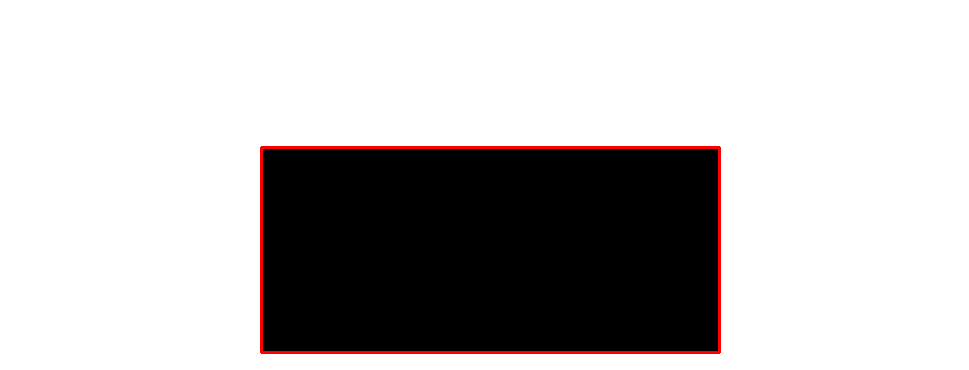

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


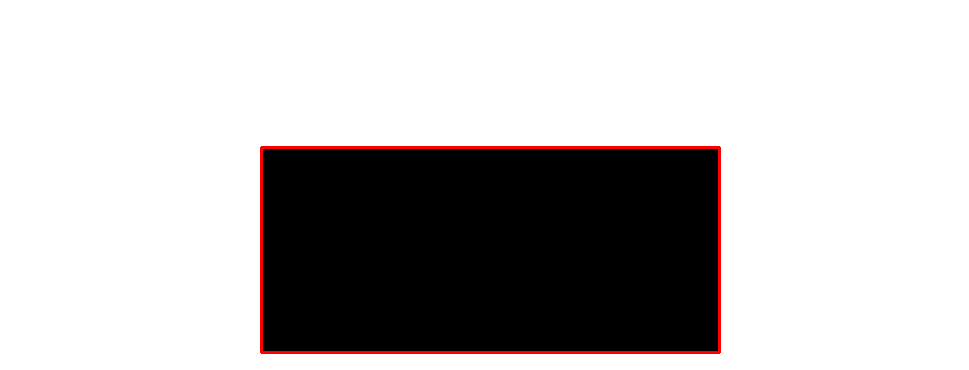

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


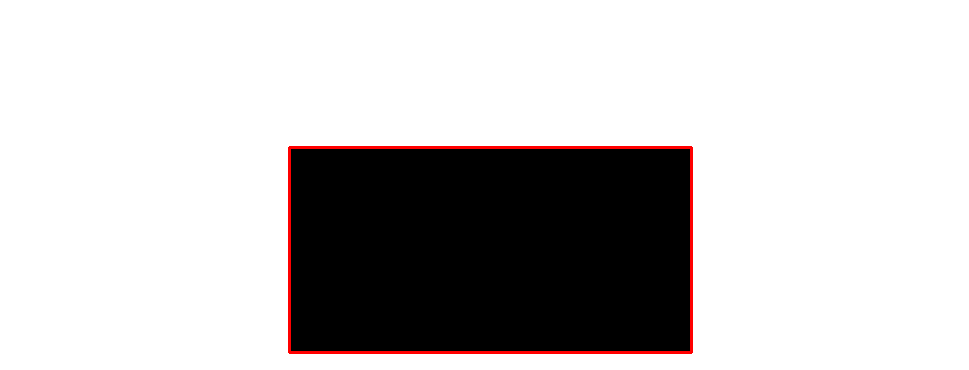

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


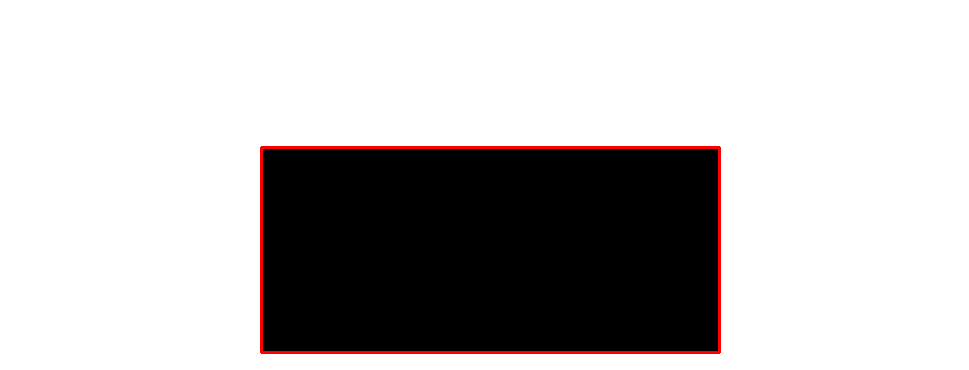

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


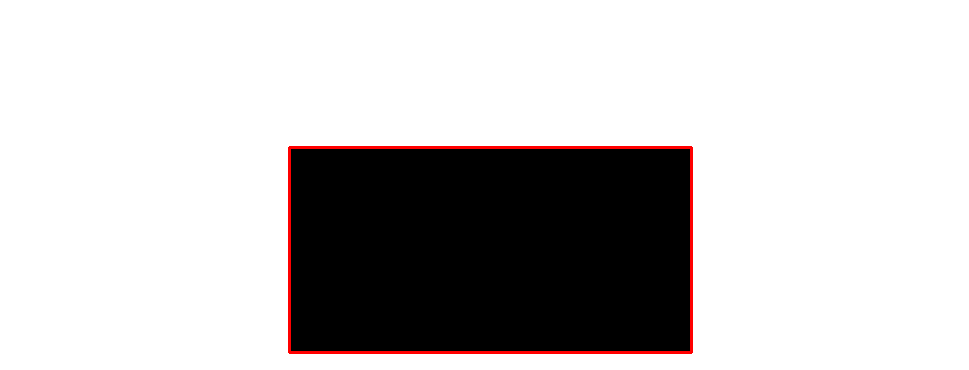

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


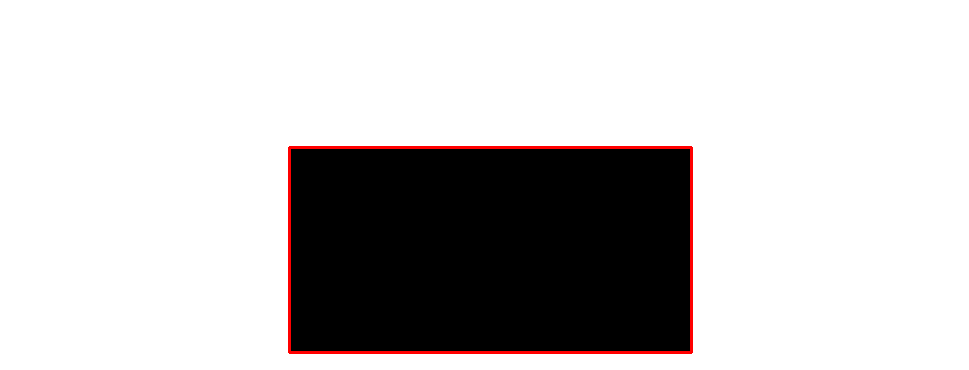

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


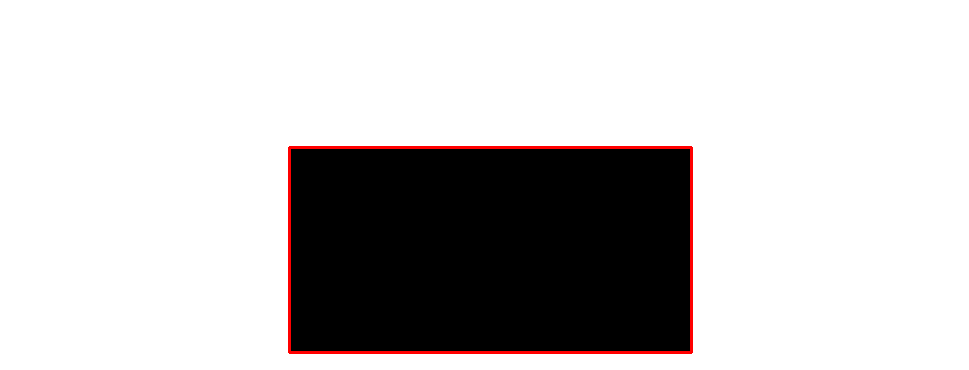

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


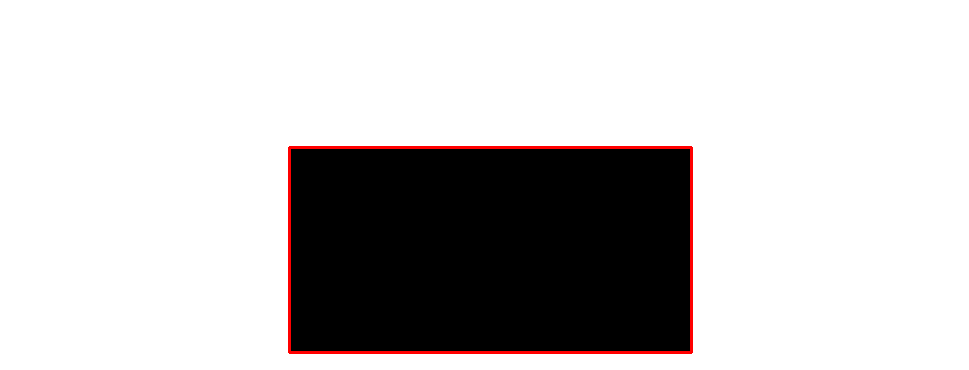

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


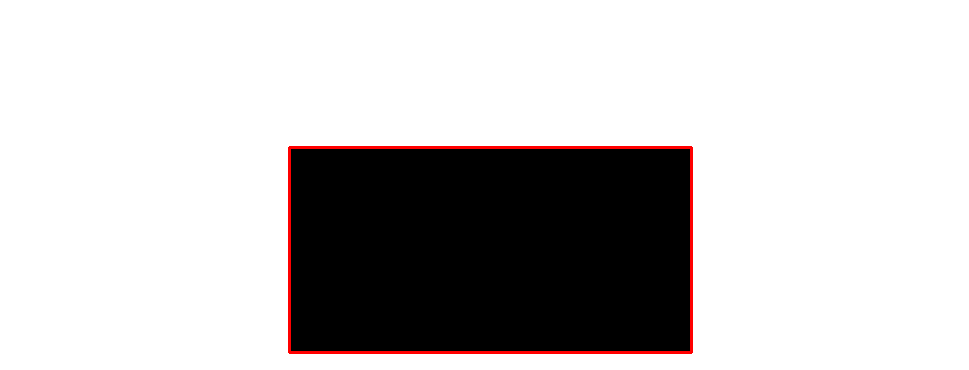

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


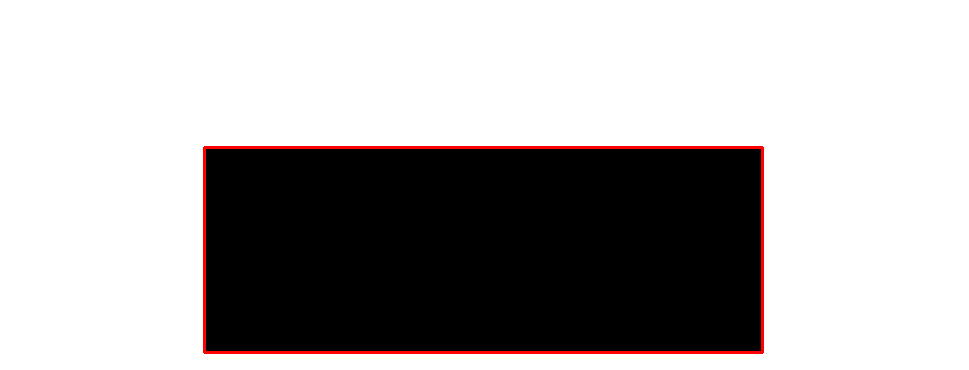

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


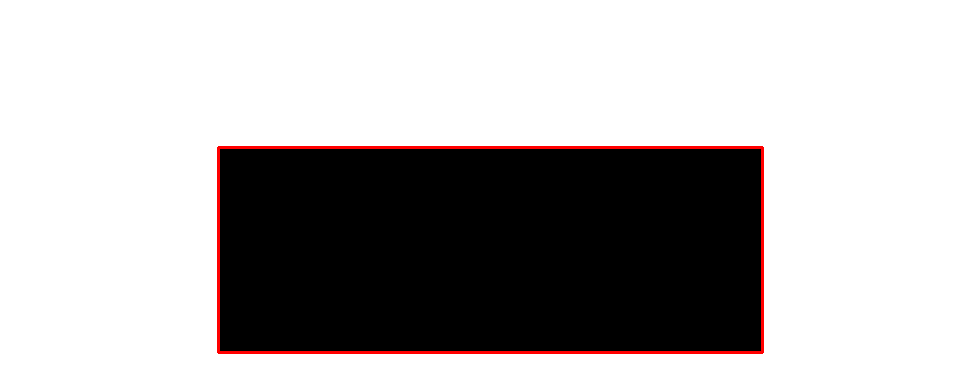

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

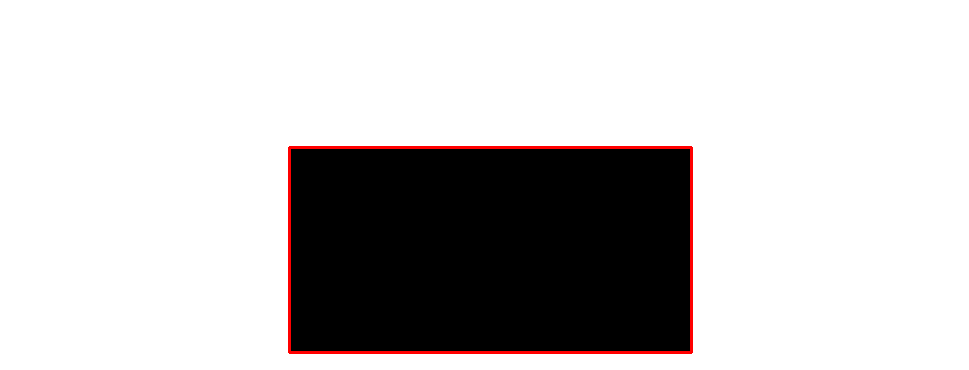

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


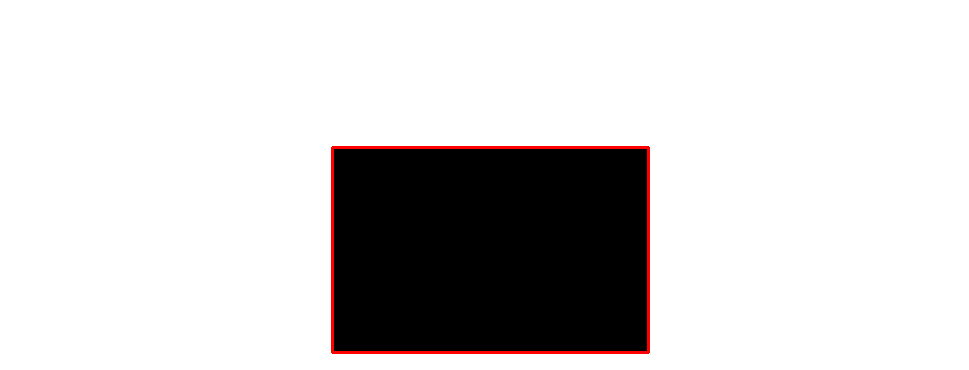

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


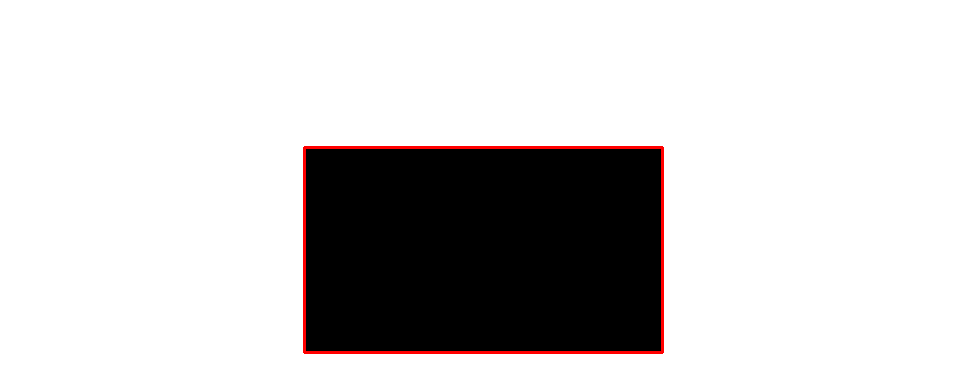

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


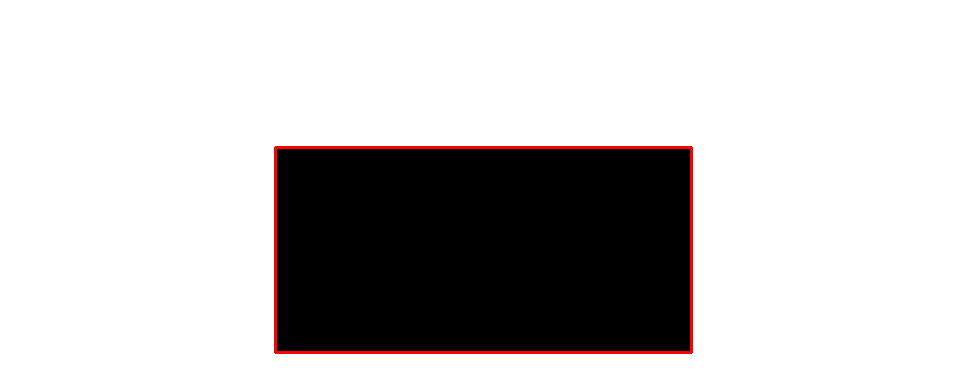

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


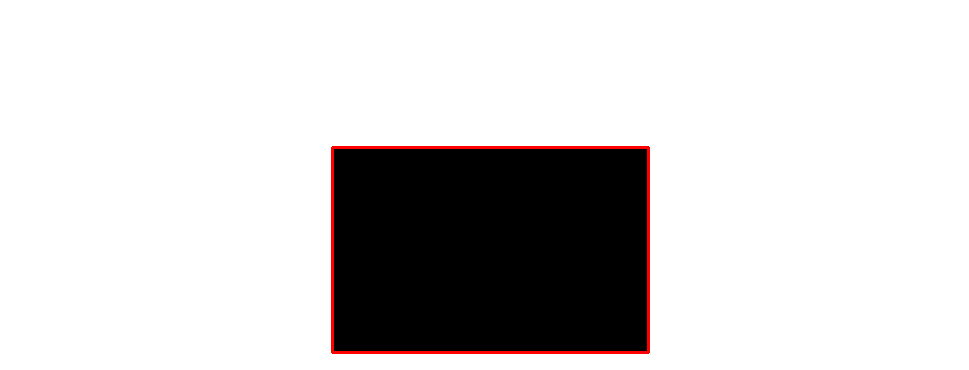

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


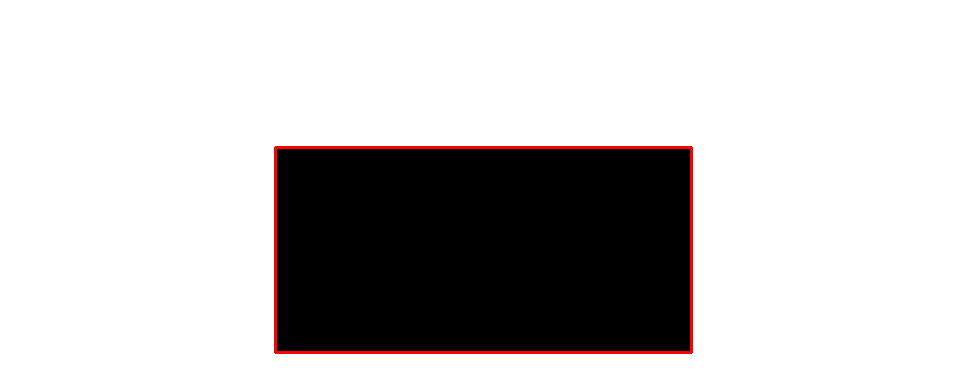

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


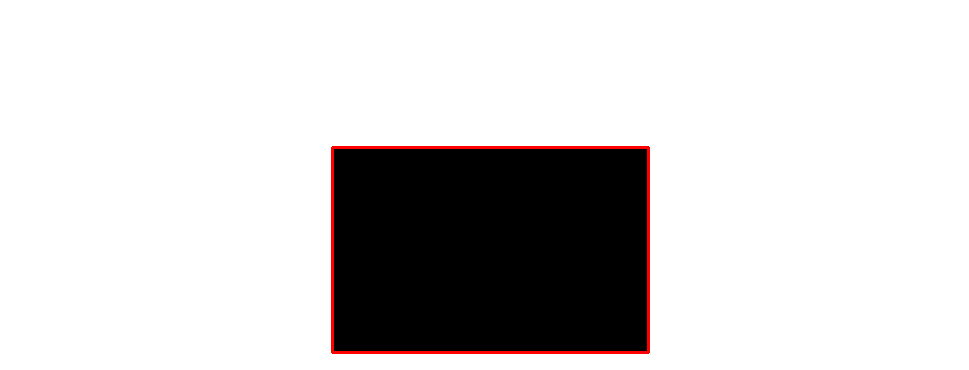

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


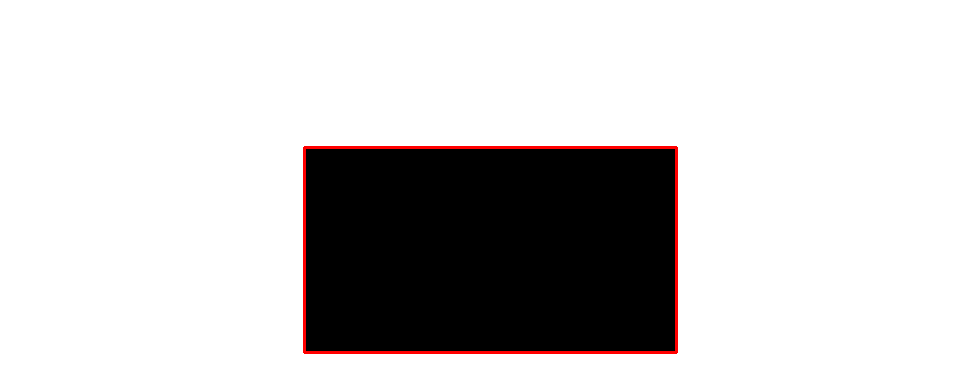

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


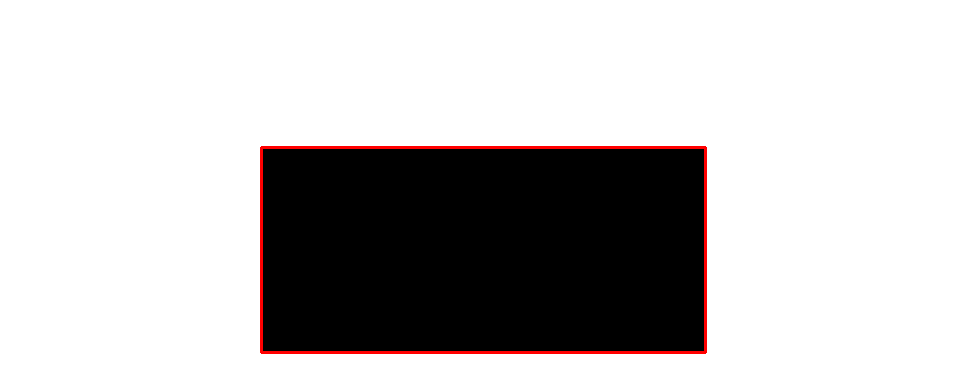

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


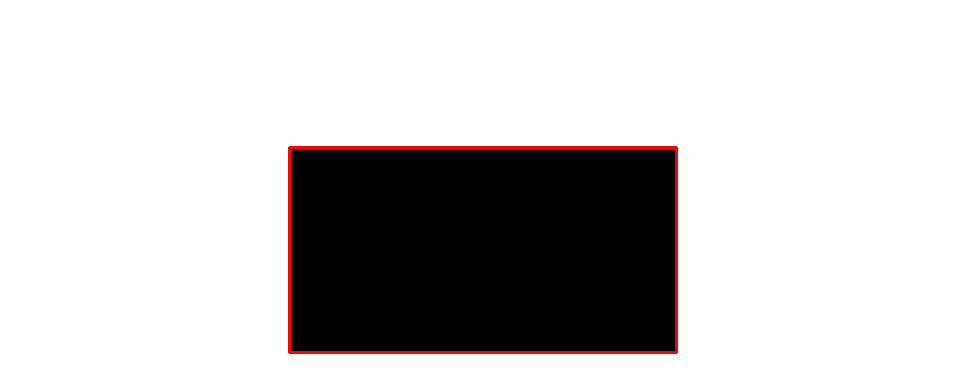

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


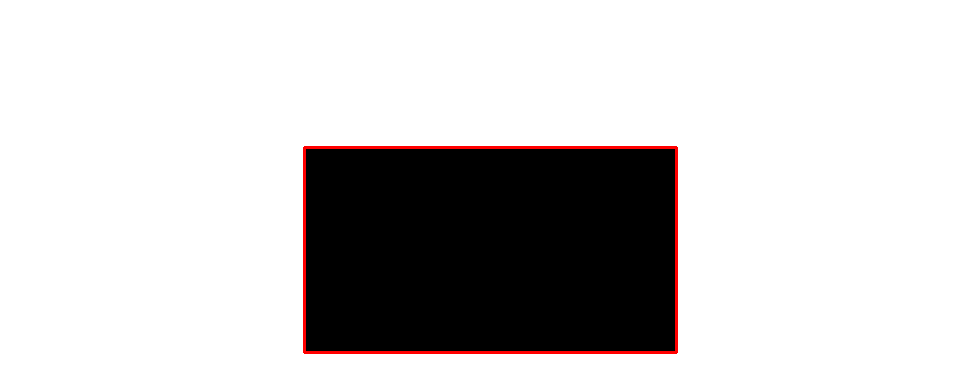

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


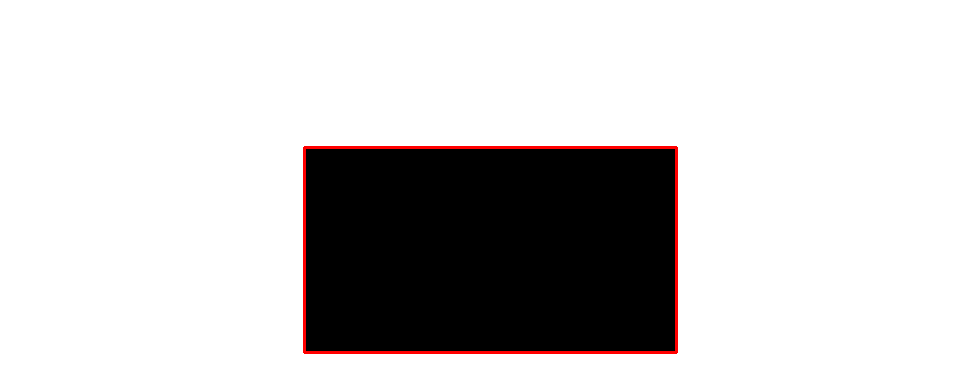

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


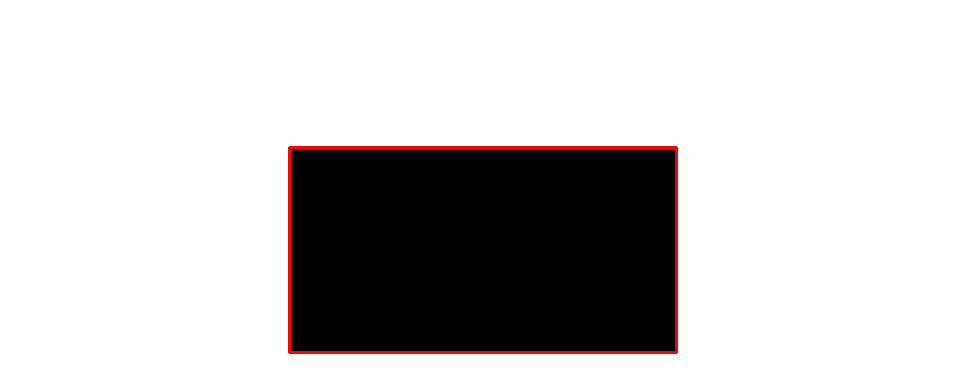

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


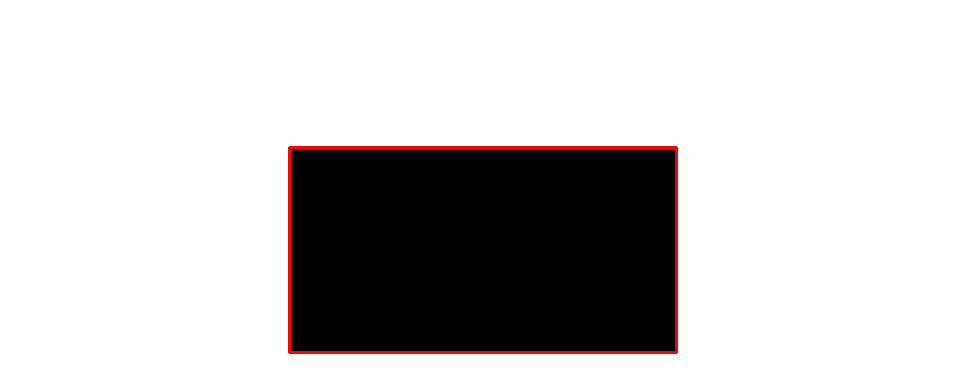

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


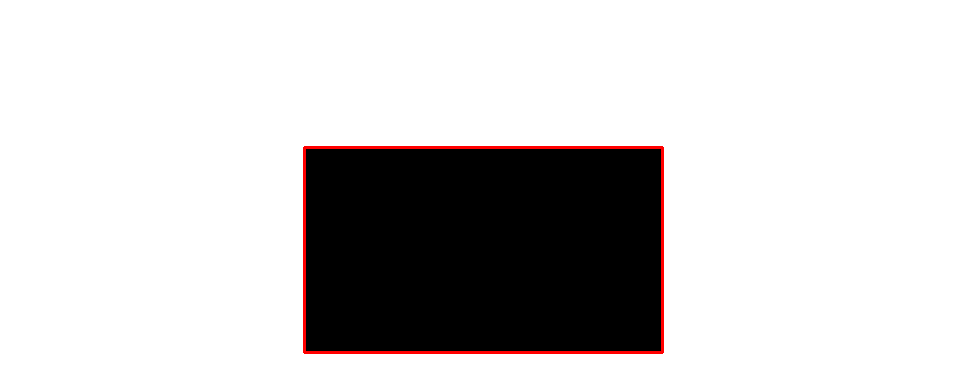

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


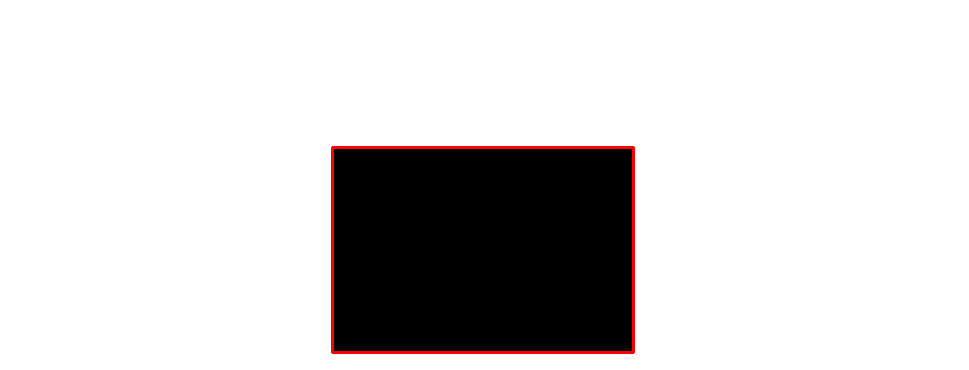

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


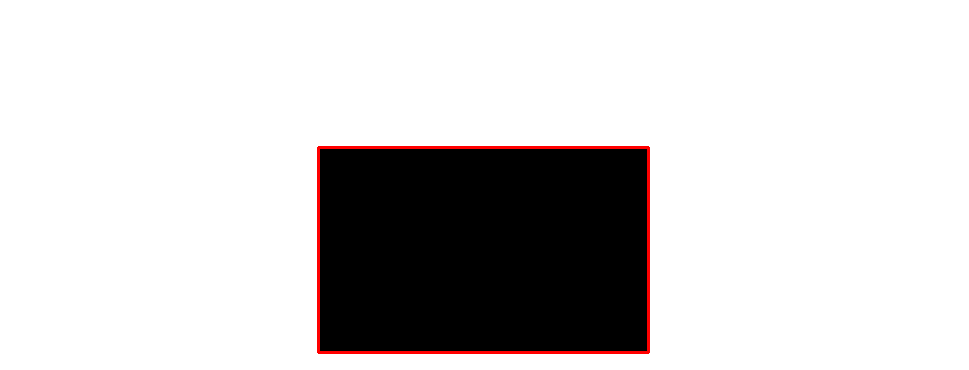

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


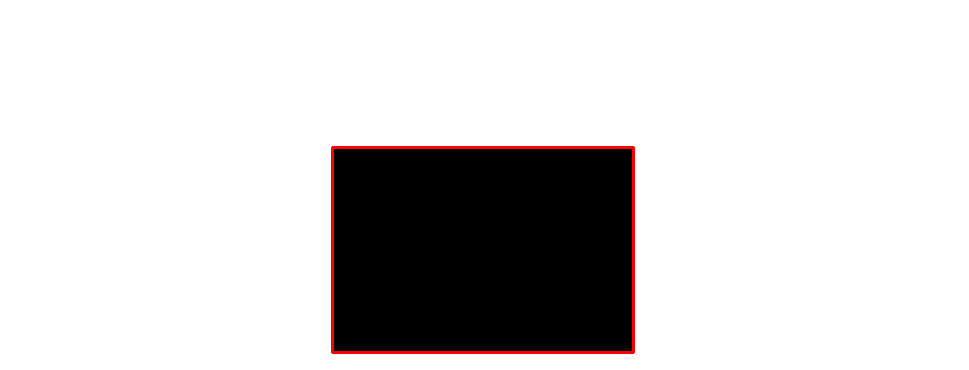

Rectangle coordinates: 347 147 619 352
Rectangle coordinates: 347 147 619 352


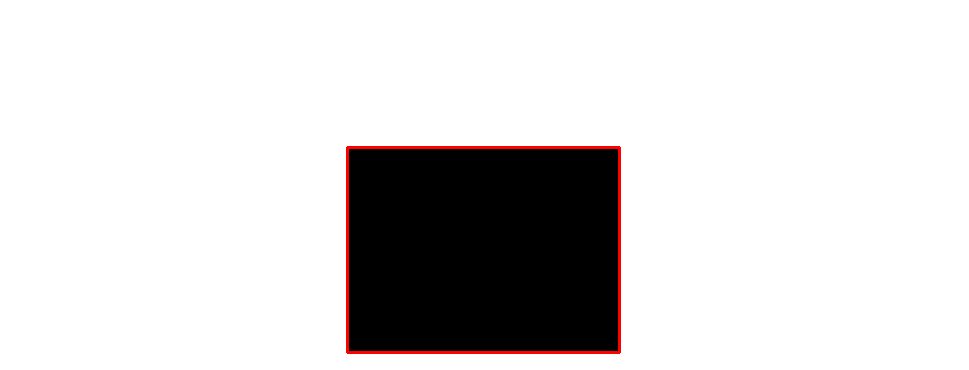

Rectangle coordinates: 347 147 619 352
Rectangle coordinates: 347 147 619 352


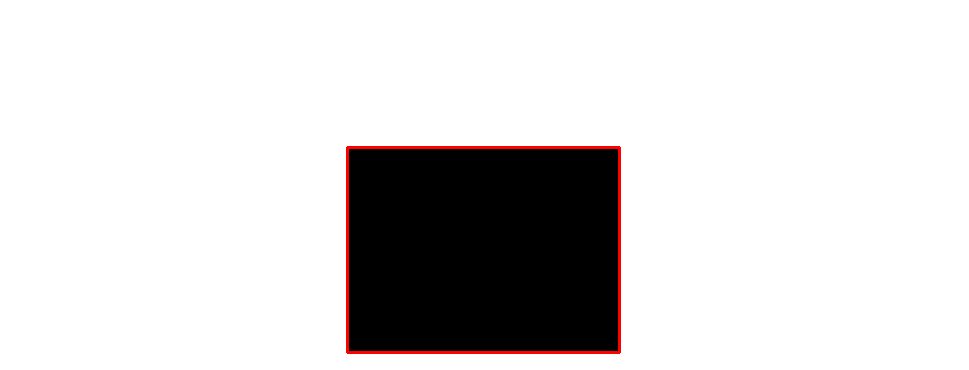

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


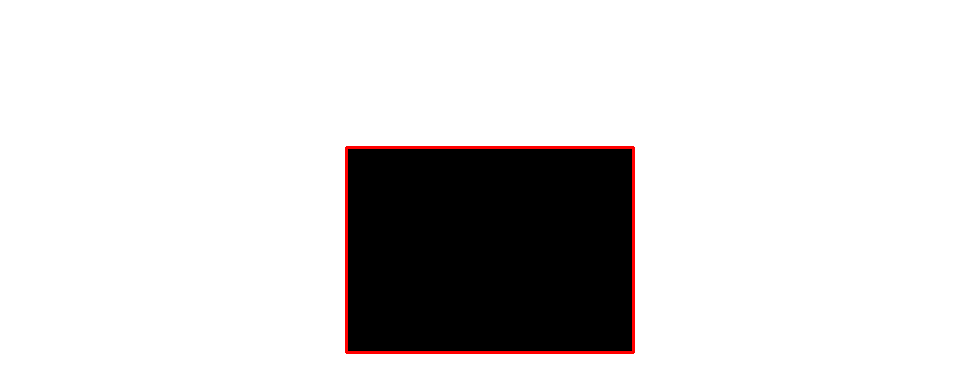

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


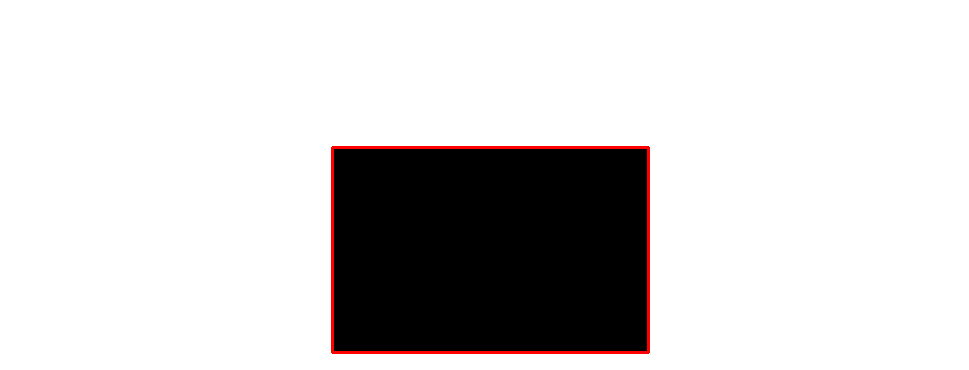

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


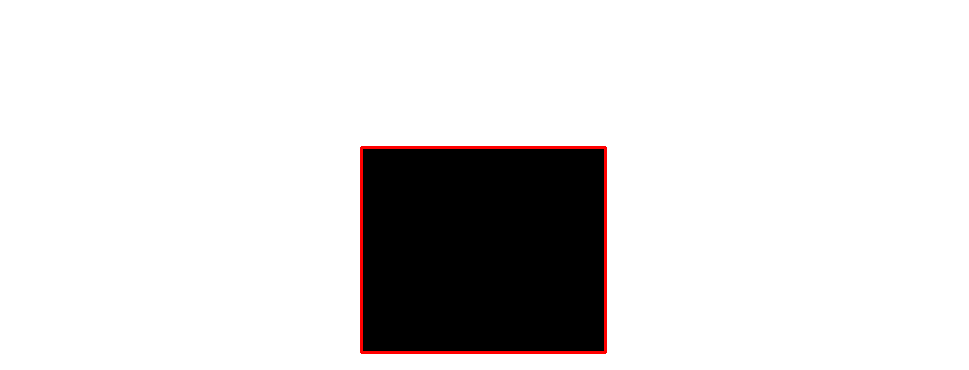

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


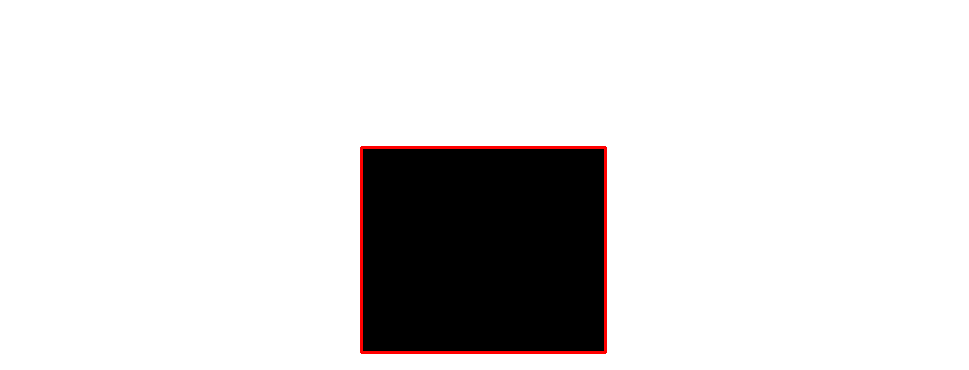

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


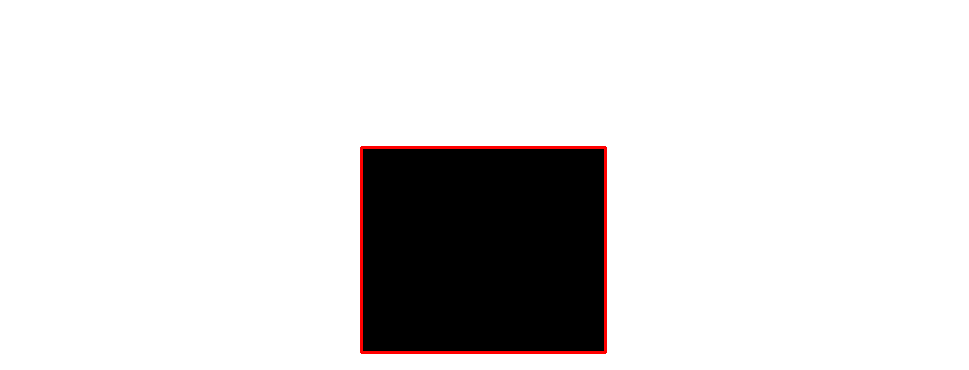

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


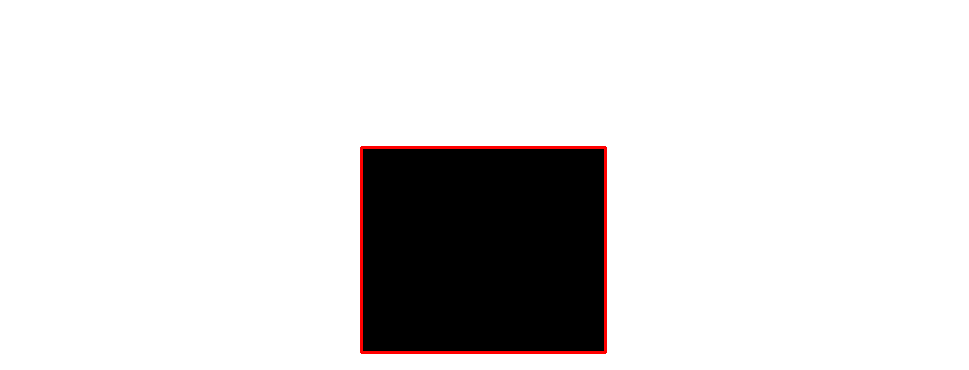

No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


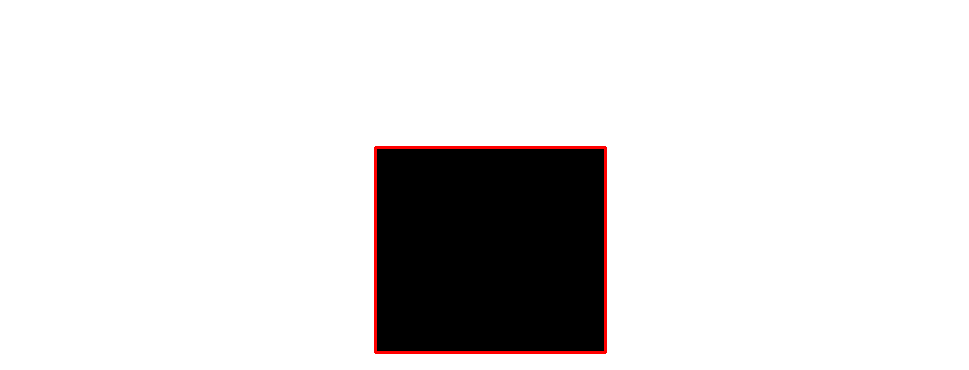

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


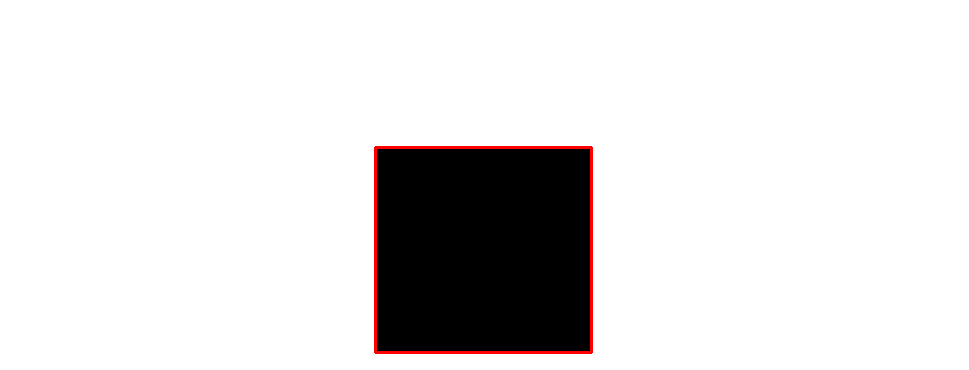

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


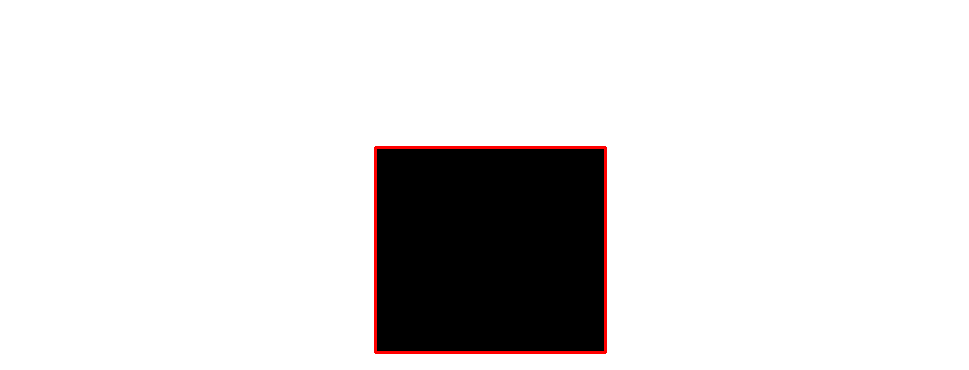

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


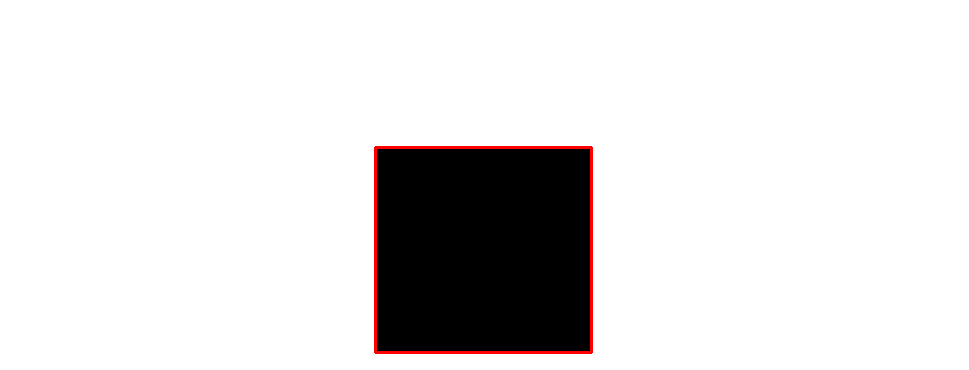

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

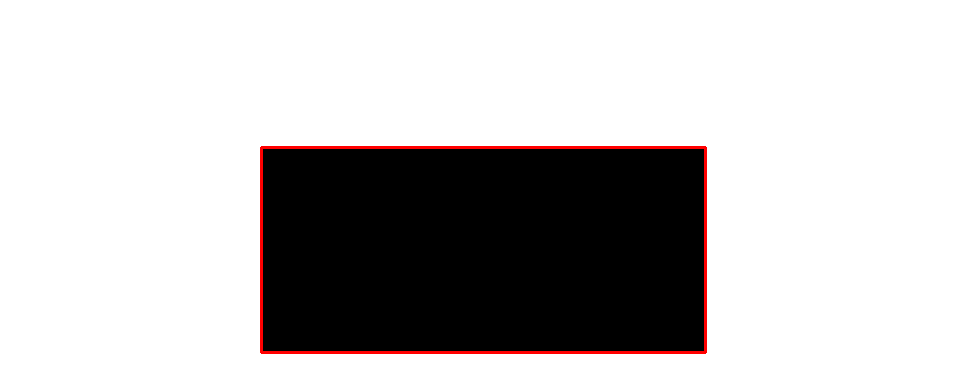

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


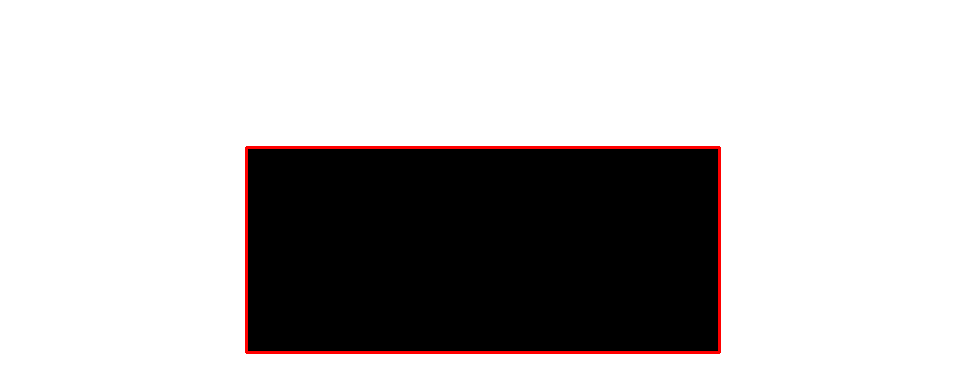

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


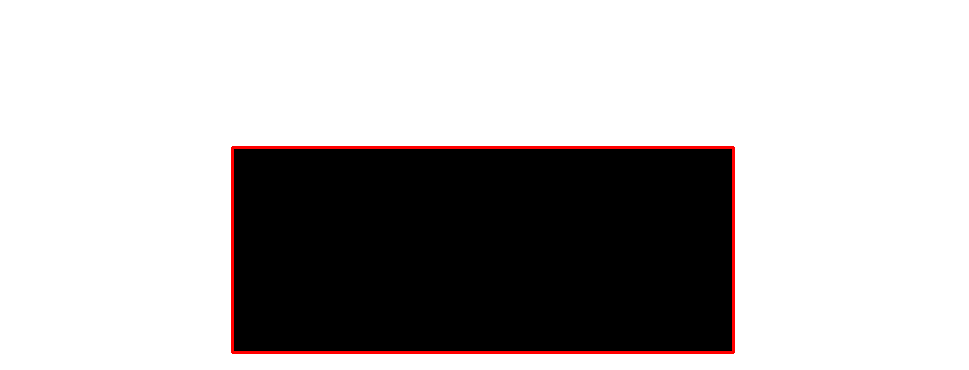

Rectangle coordinates: 418 147 548 352
Rectangle coordinates: 418 147 548 352


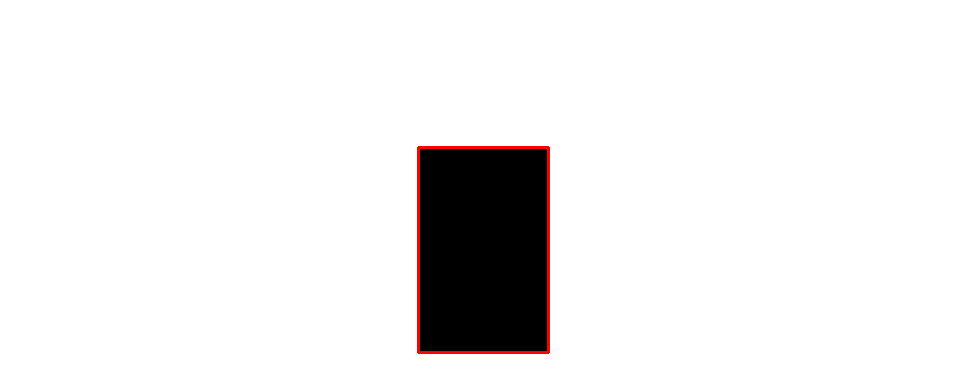

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


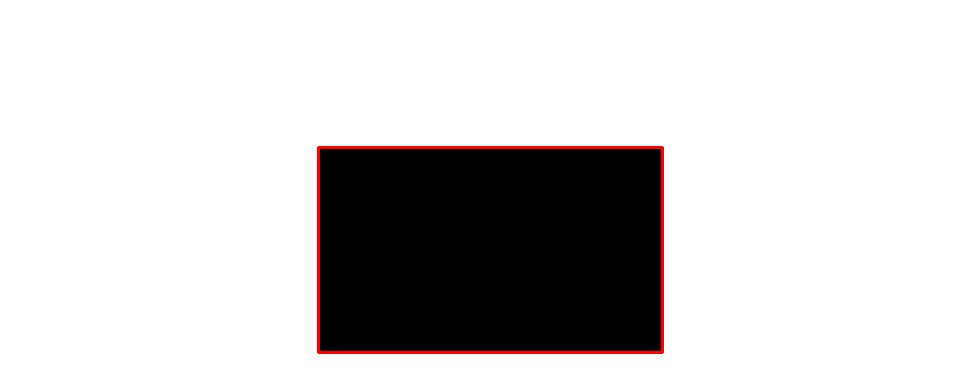

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


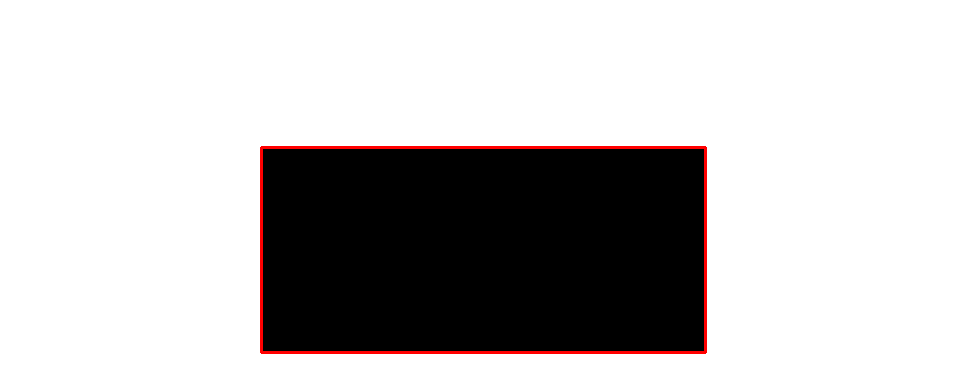

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


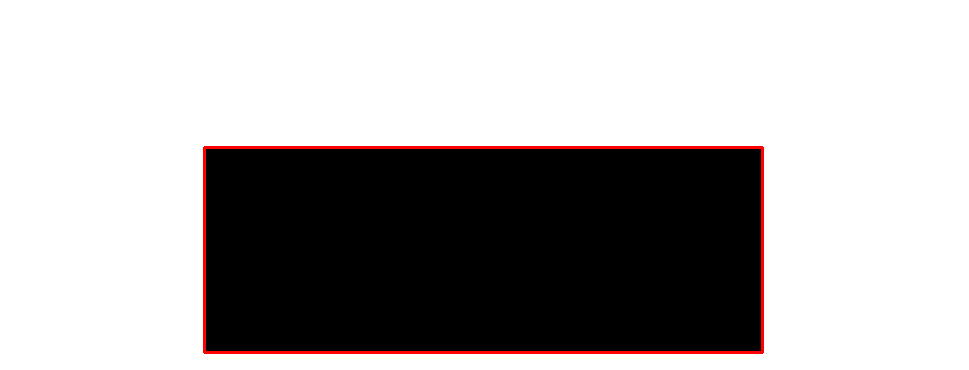

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


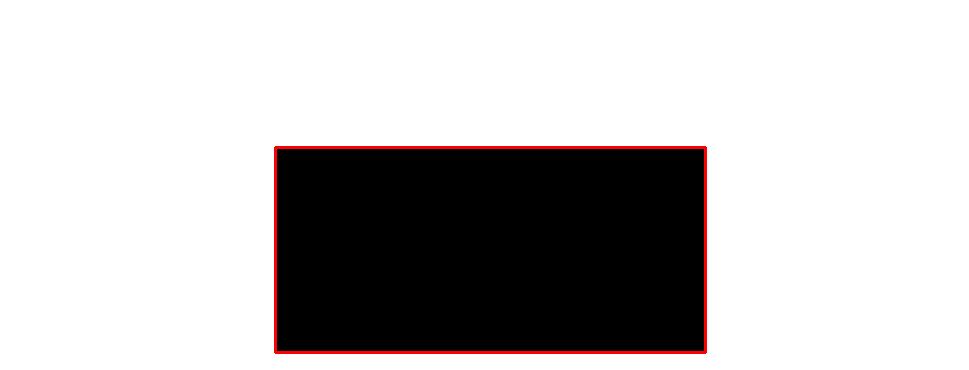

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


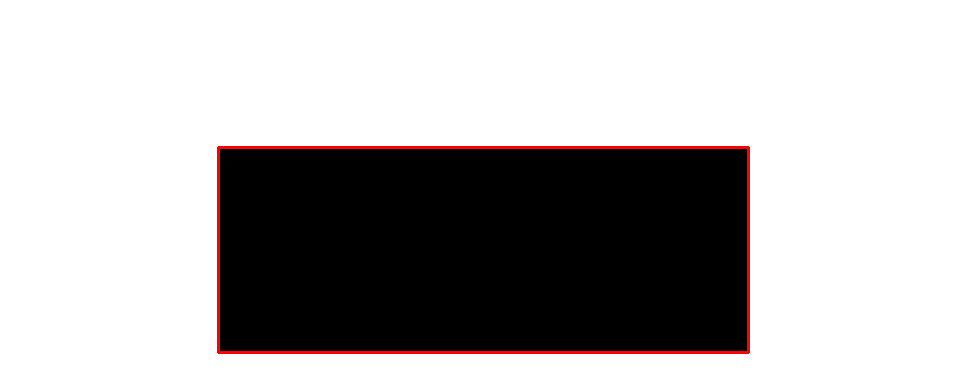

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


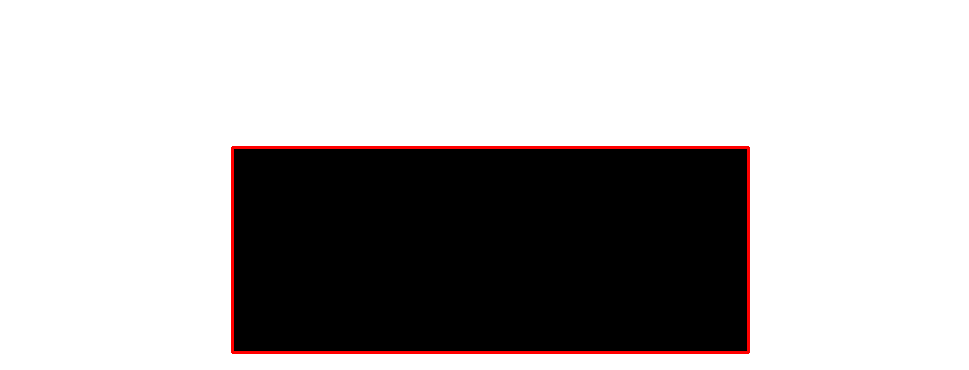

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


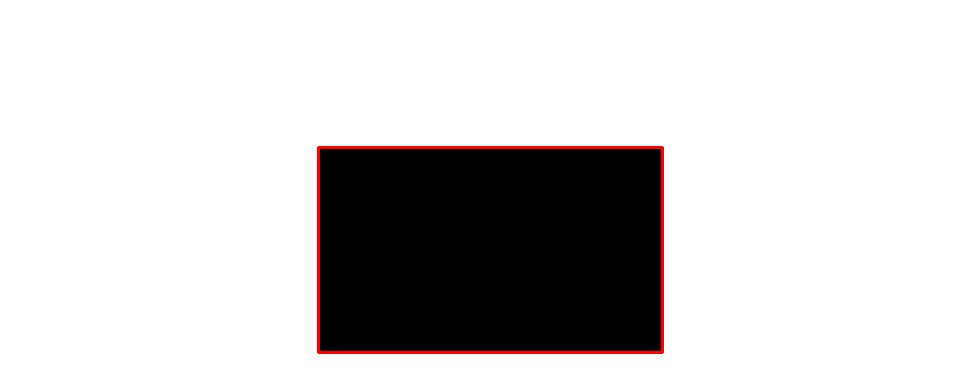

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


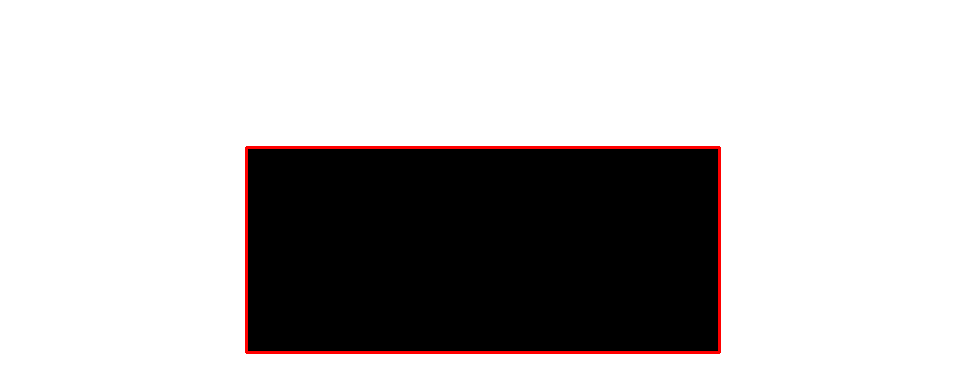

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


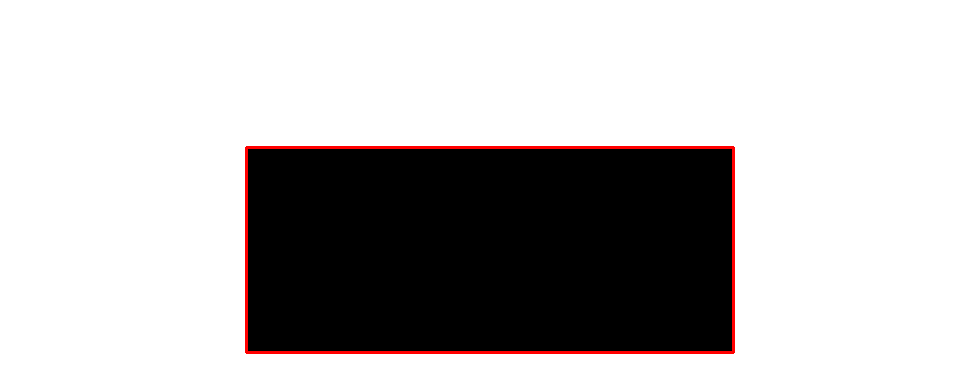

Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


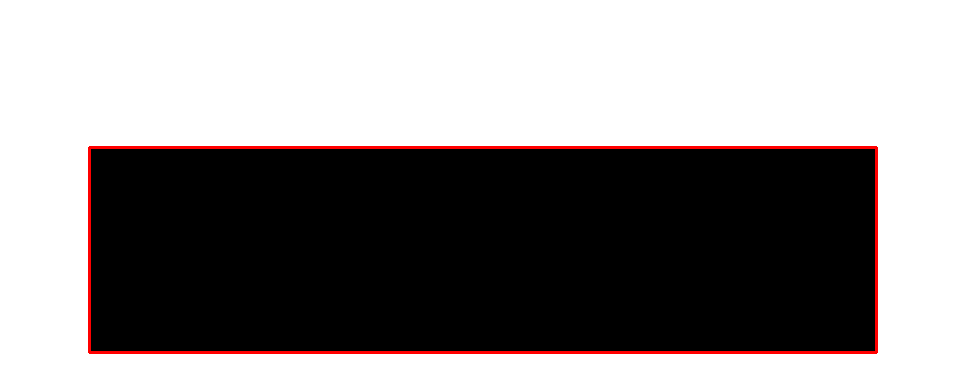

Rectangle coordinates: 89 147 876 352
Rectangle coordinates: 89 147 876 352


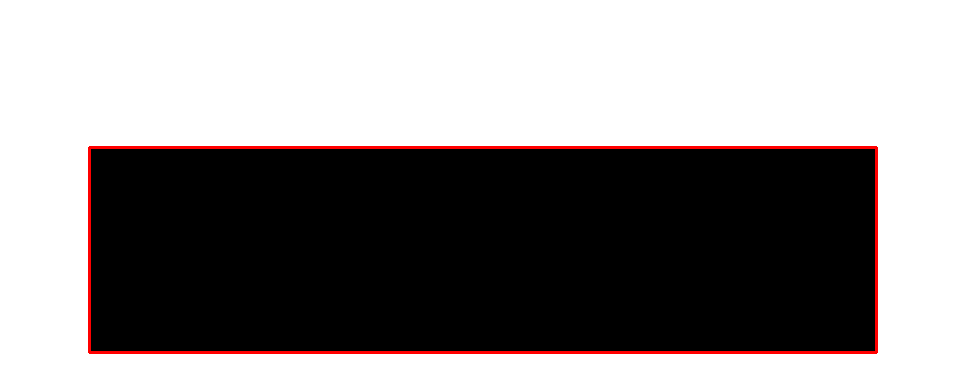

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


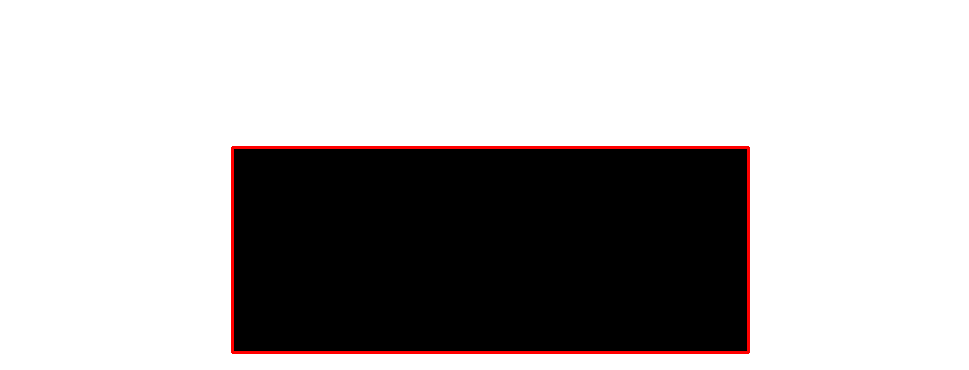

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


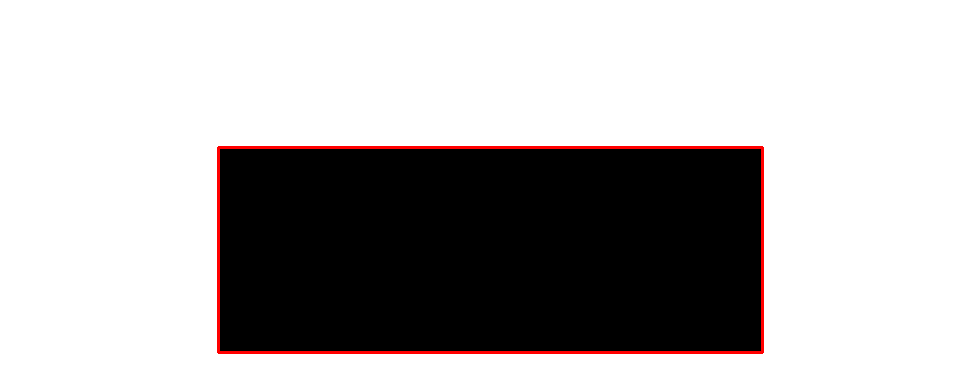

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


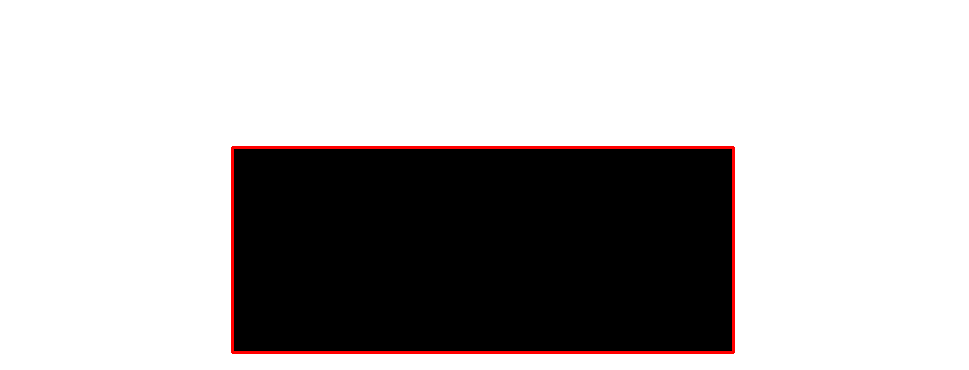

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

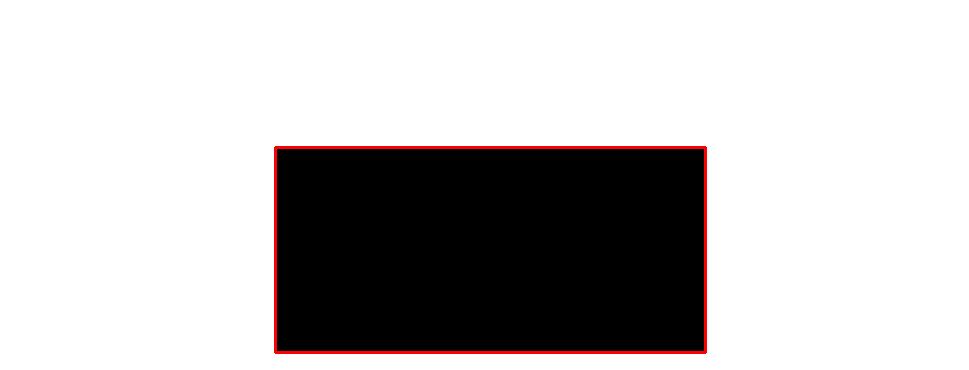

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


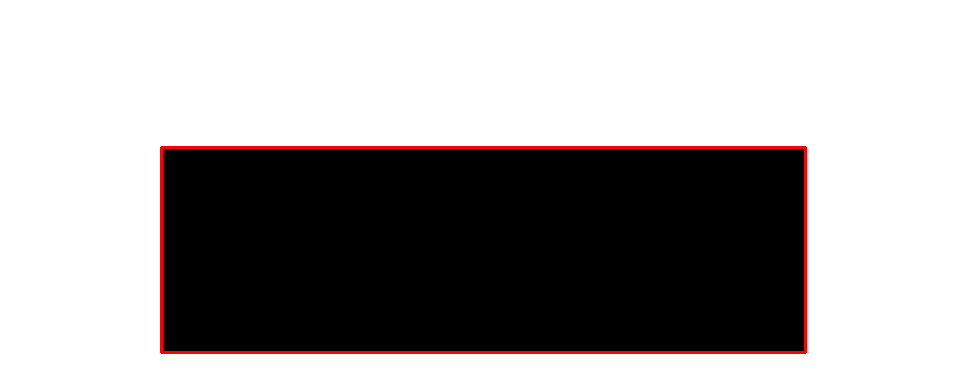

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


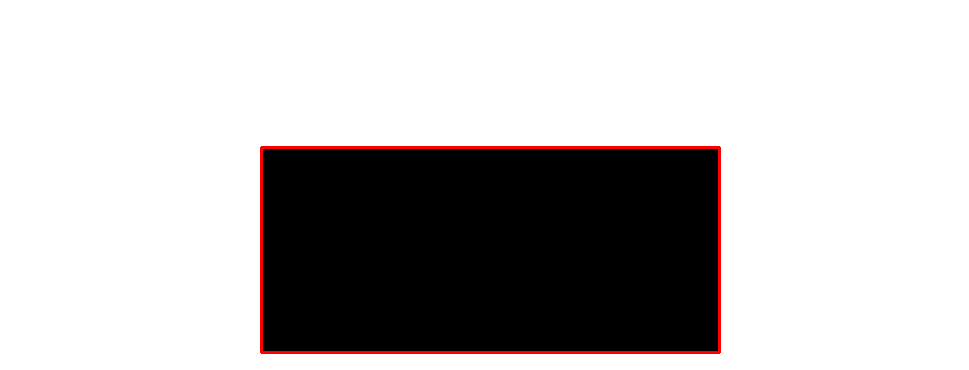

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


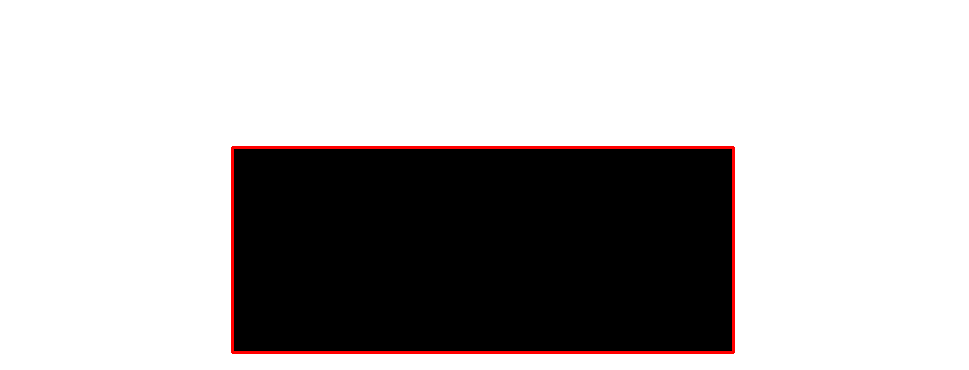

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


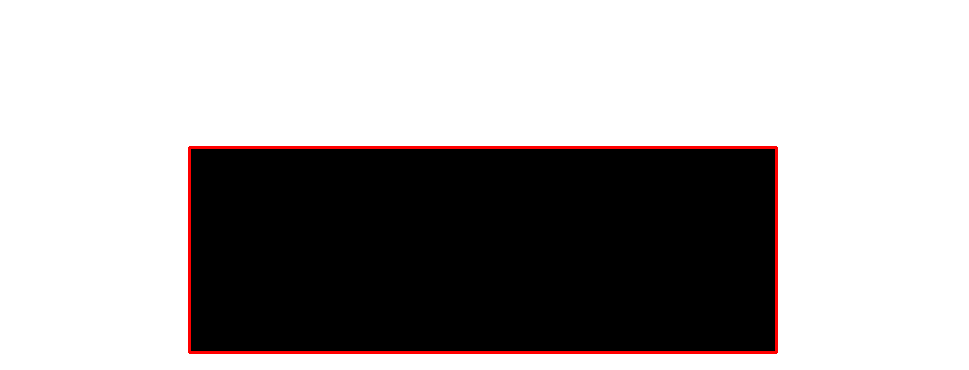

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

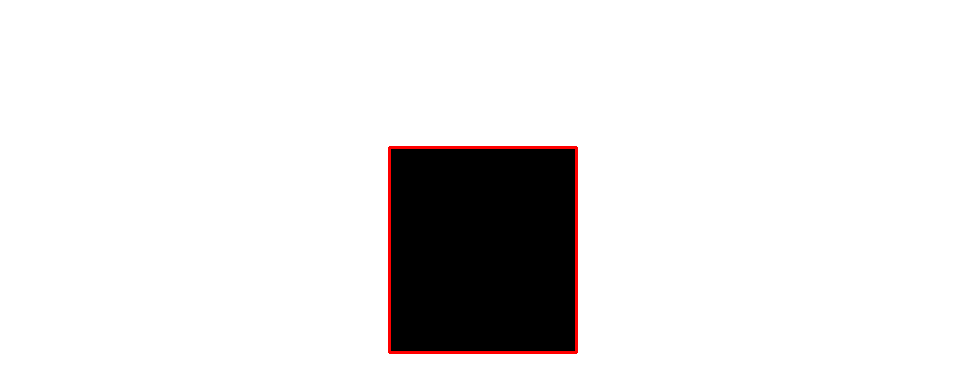

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


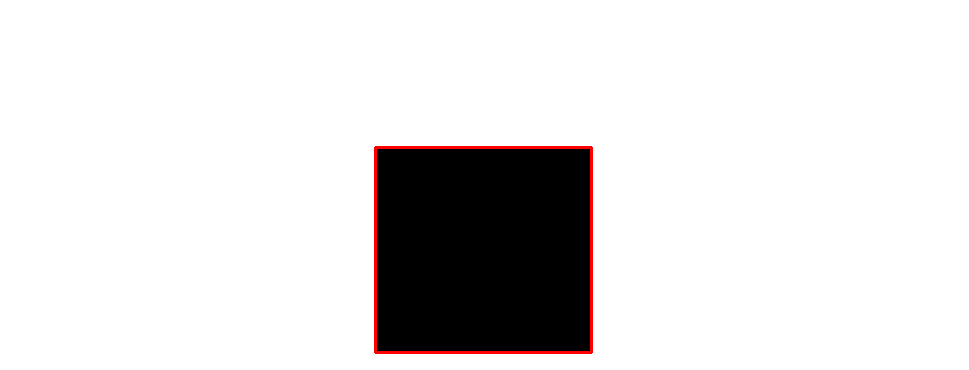

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


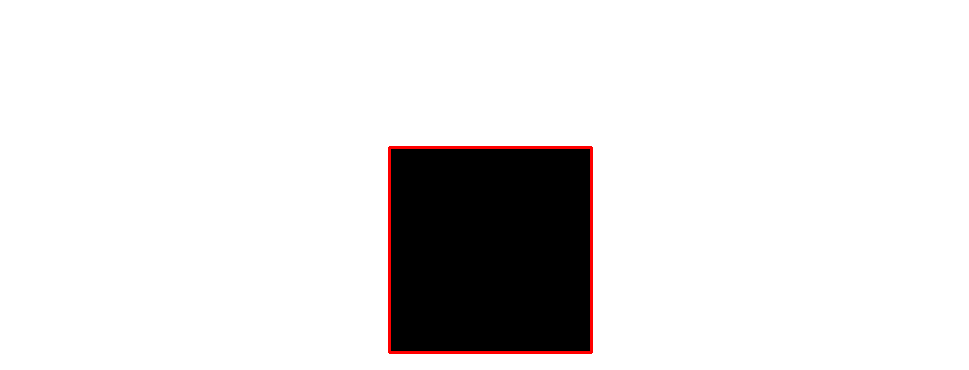

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


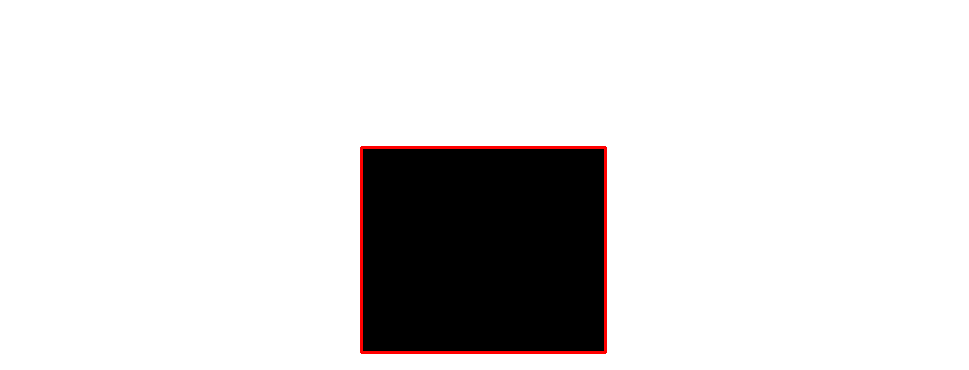

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


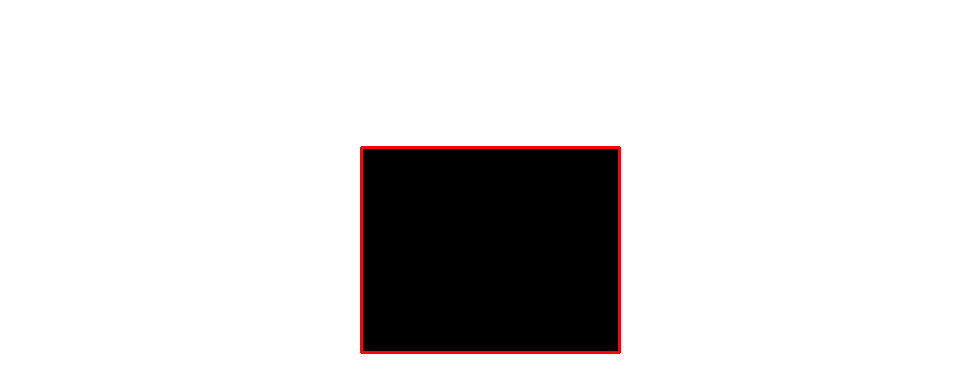

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


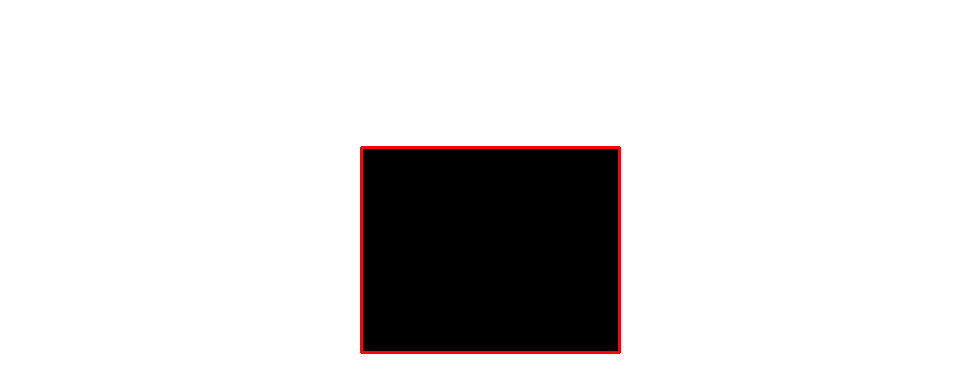

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


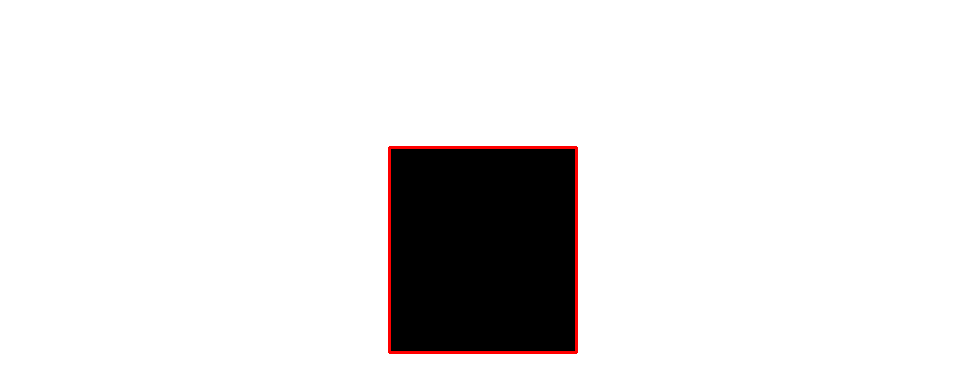

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


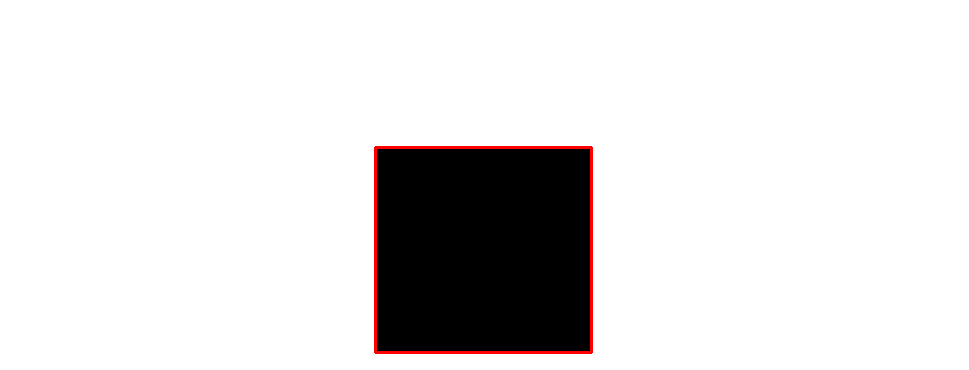

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


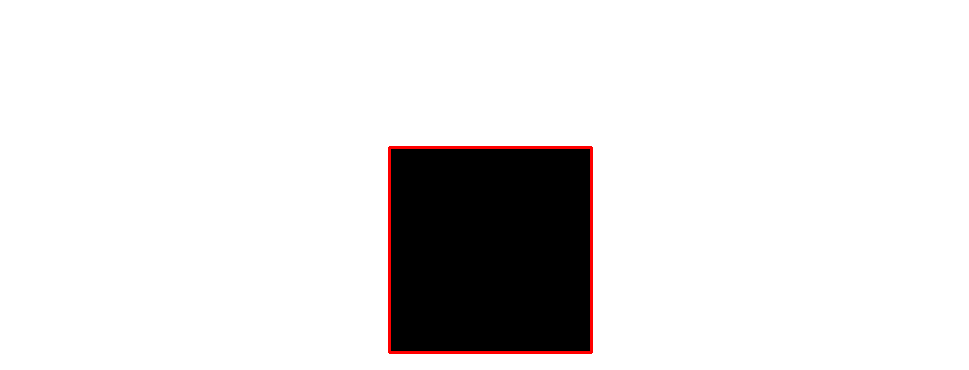

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


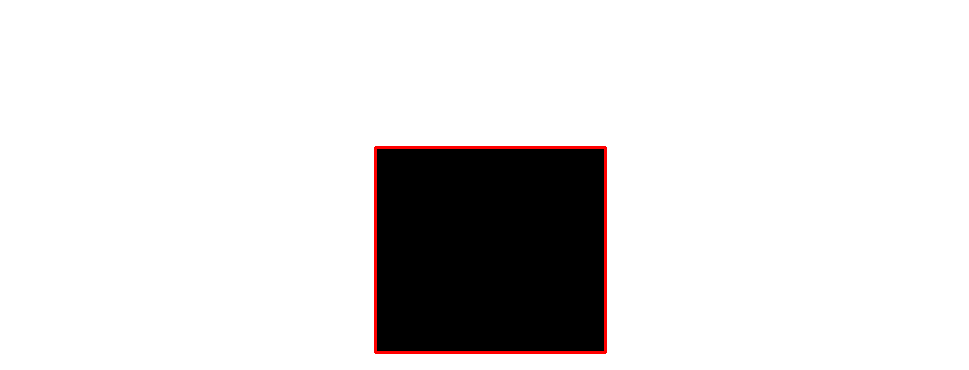

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


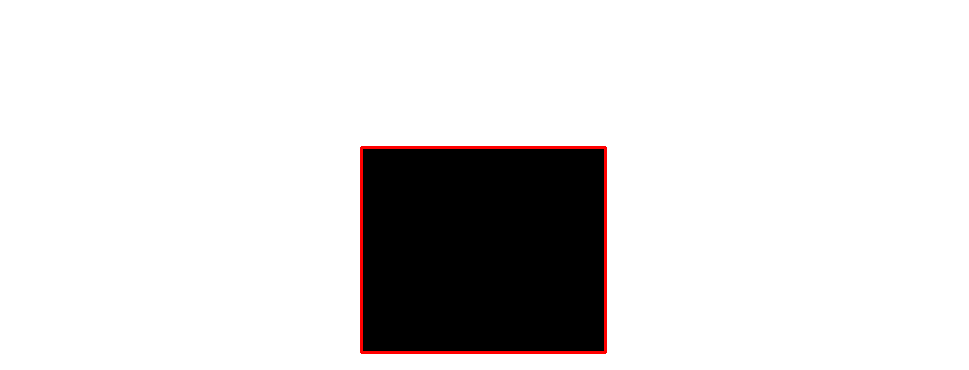

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


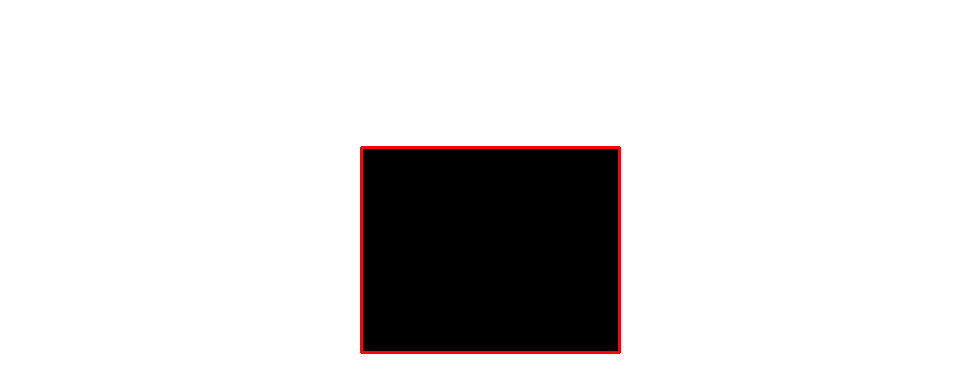

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


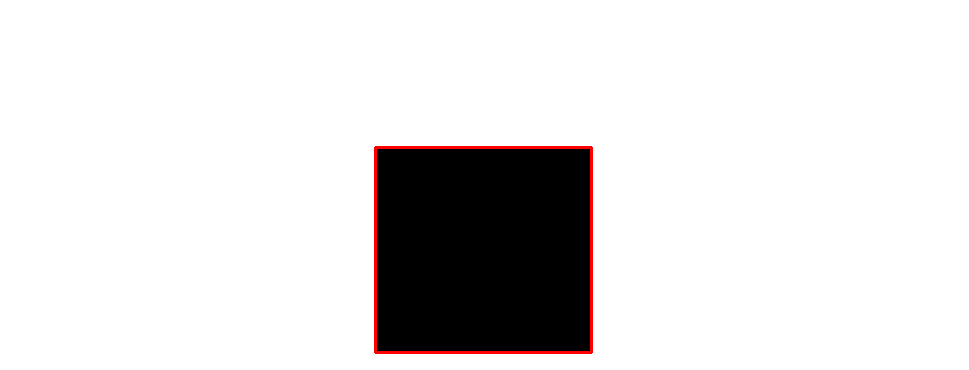

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


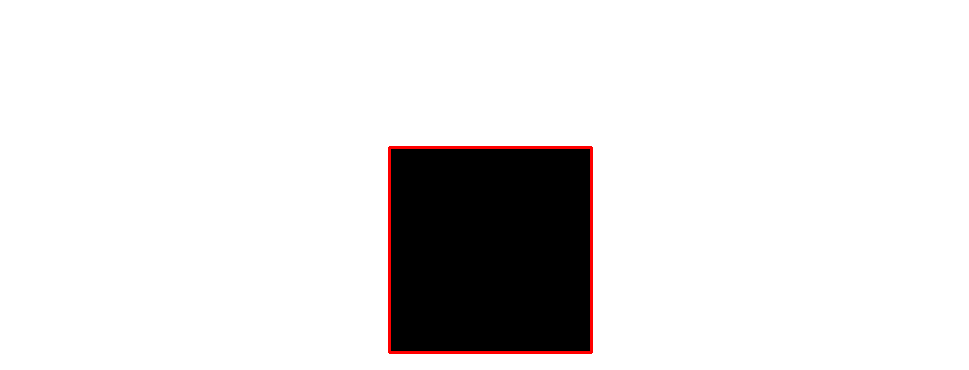

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


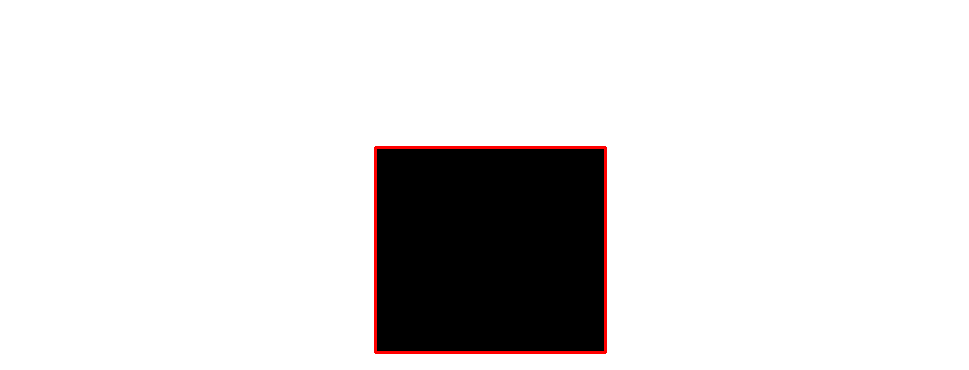

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


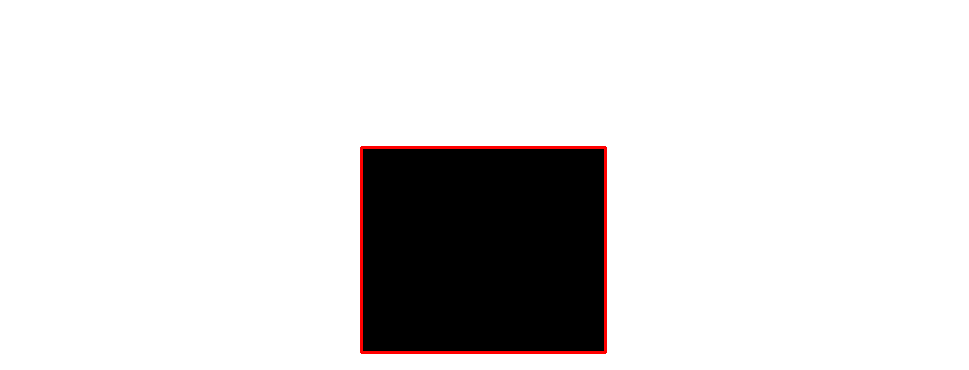

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


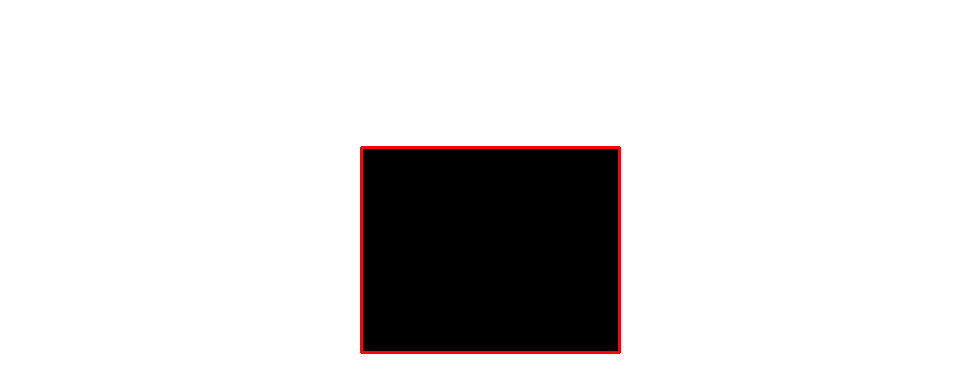

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


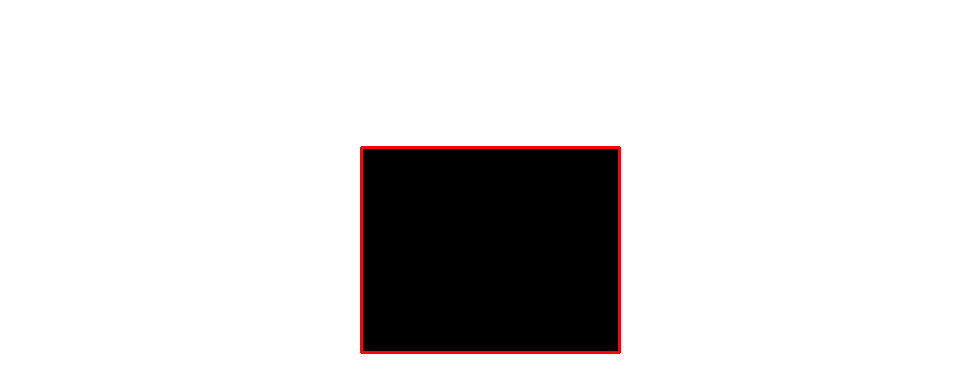

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


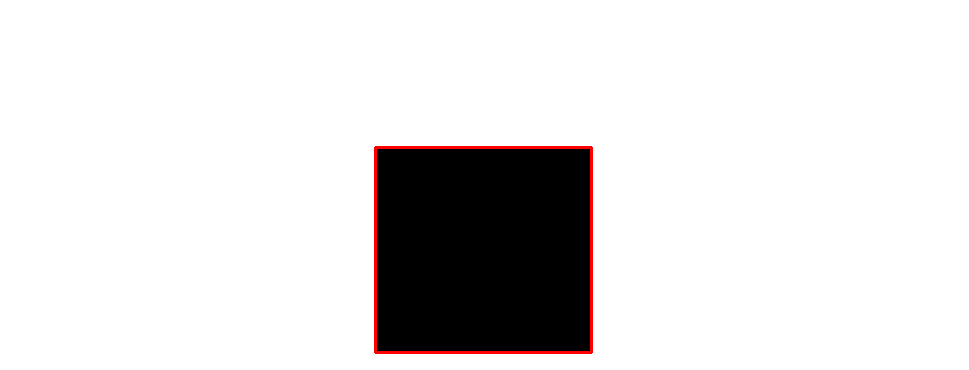

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


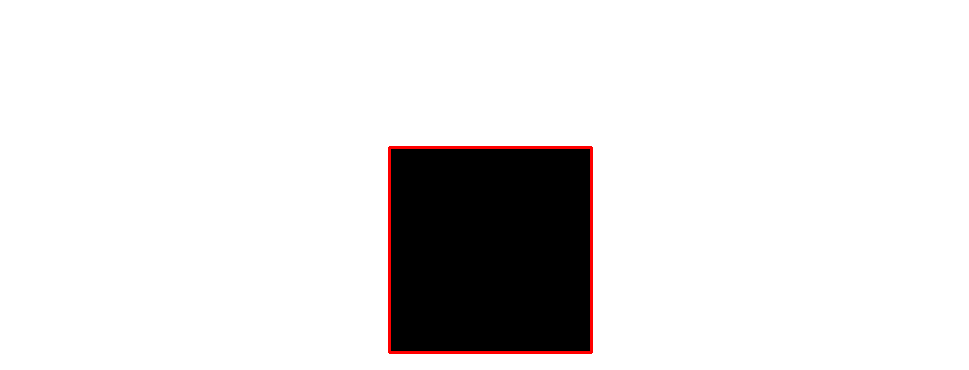

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


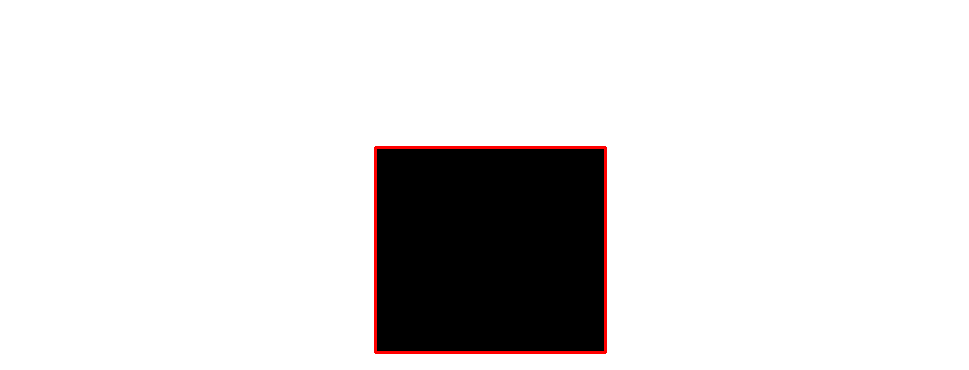

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


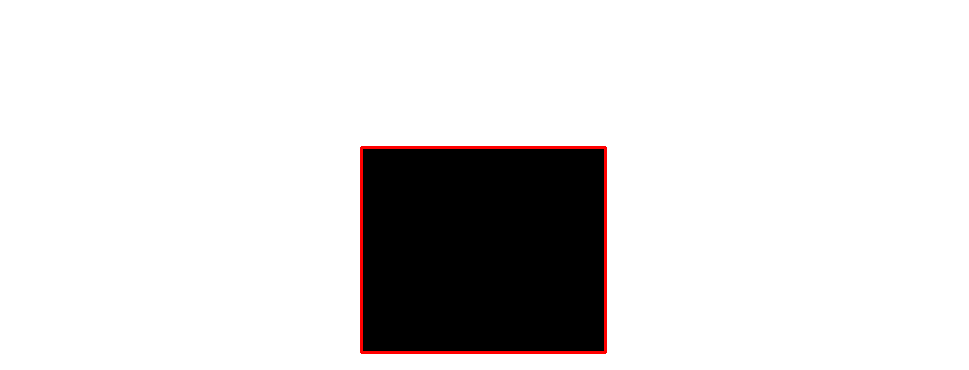

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


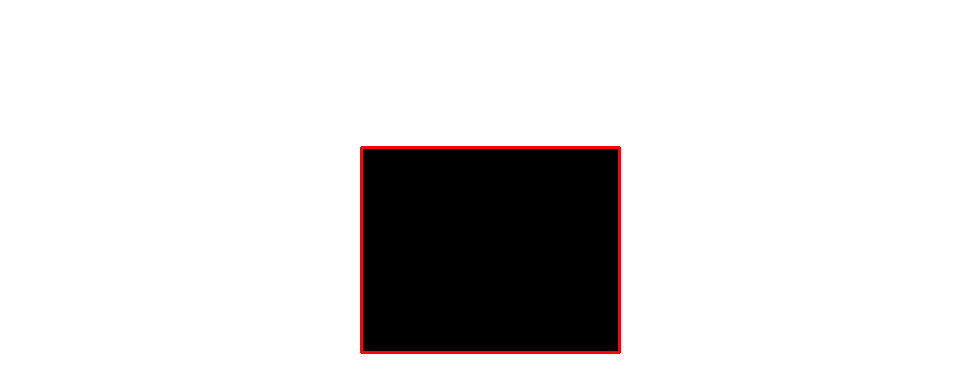

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


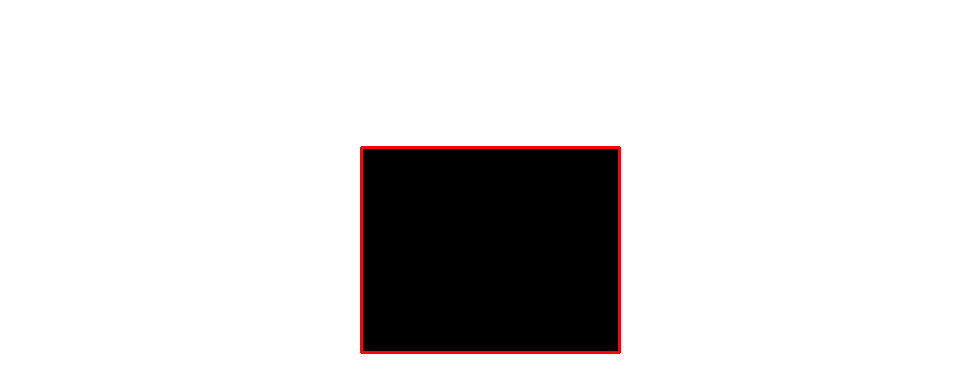

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


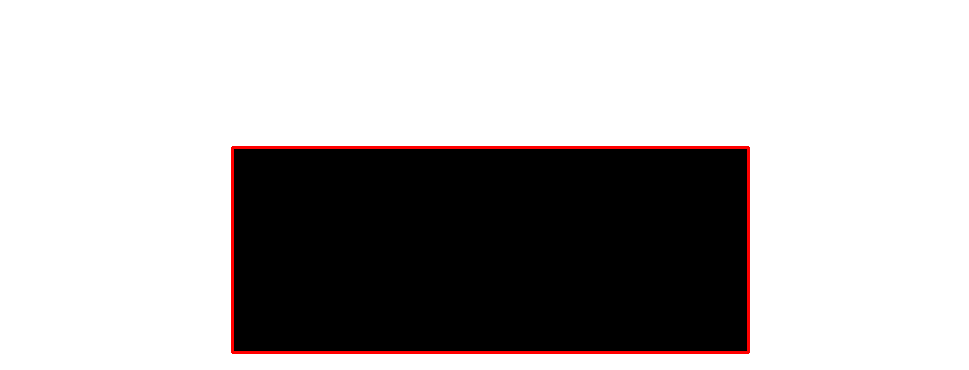

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


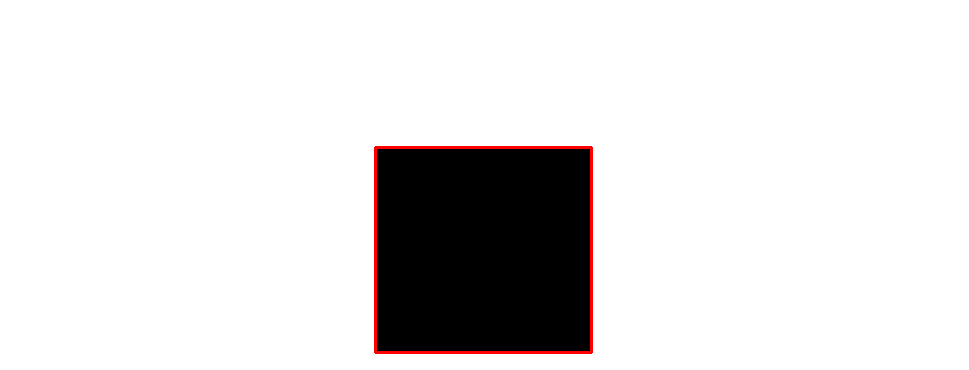

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


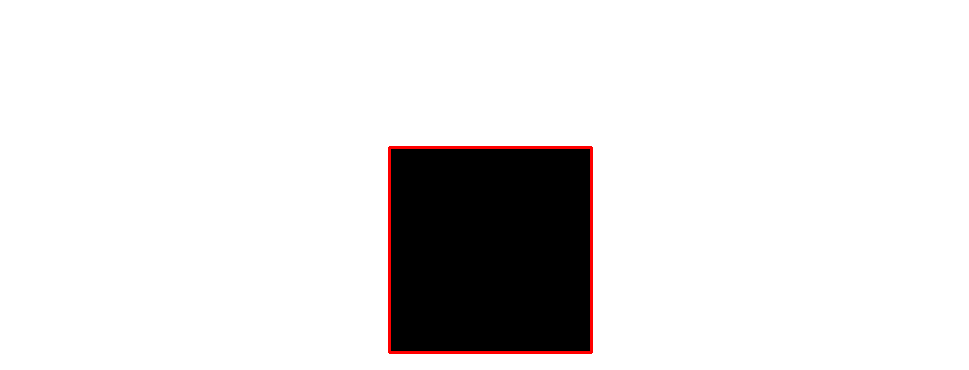

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


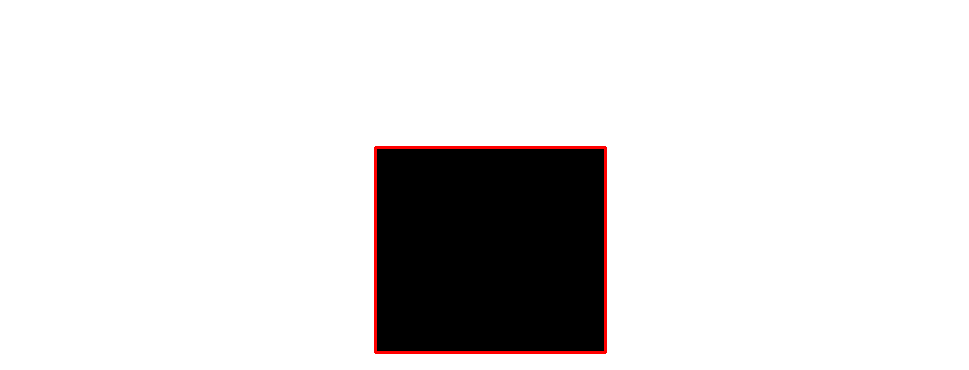

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


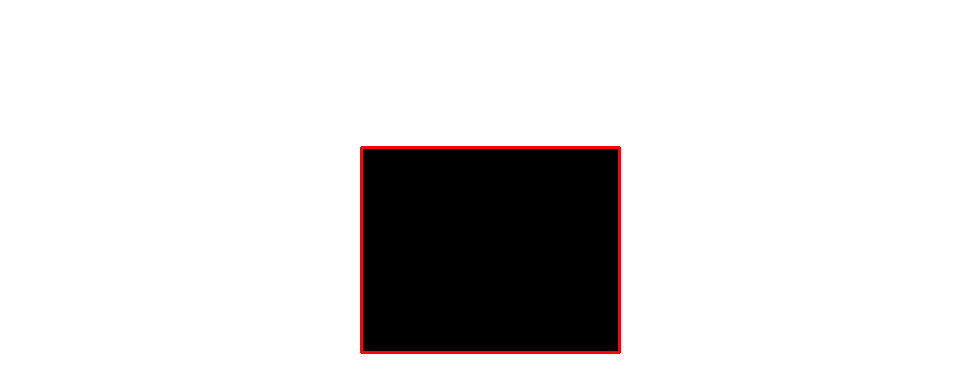

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


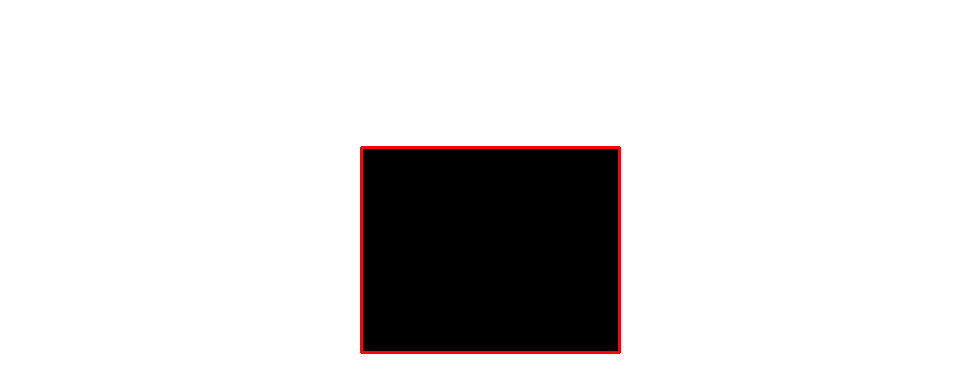

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


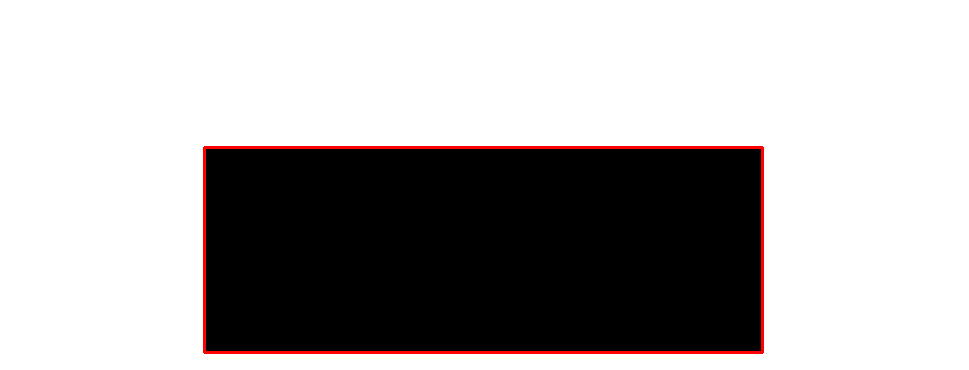

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


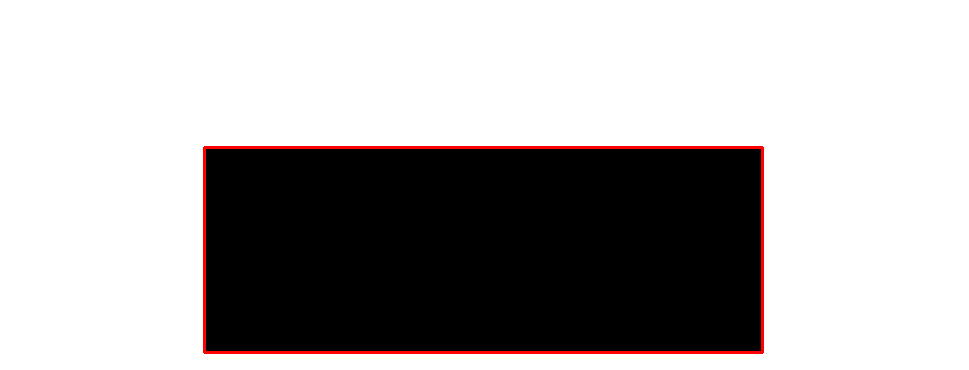

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


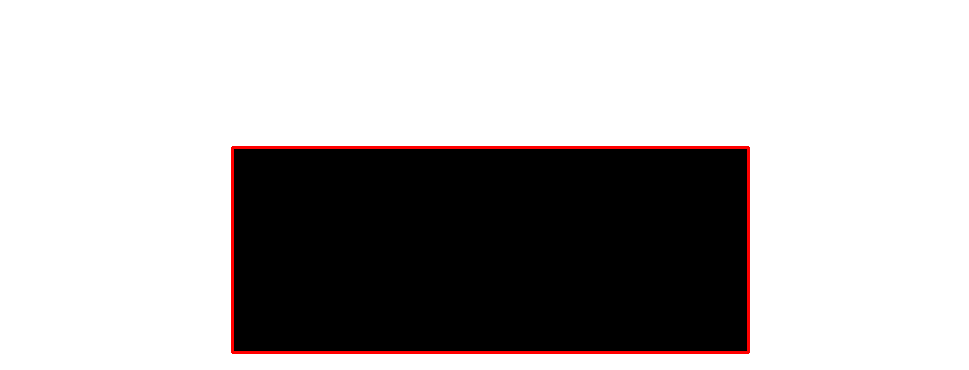

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

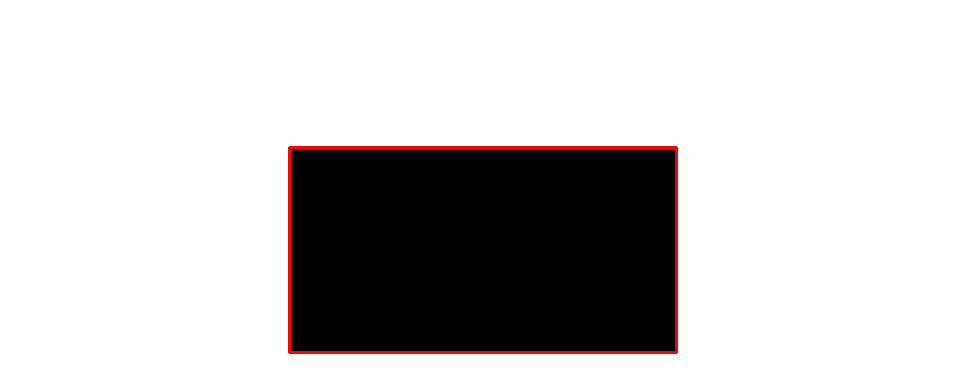

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


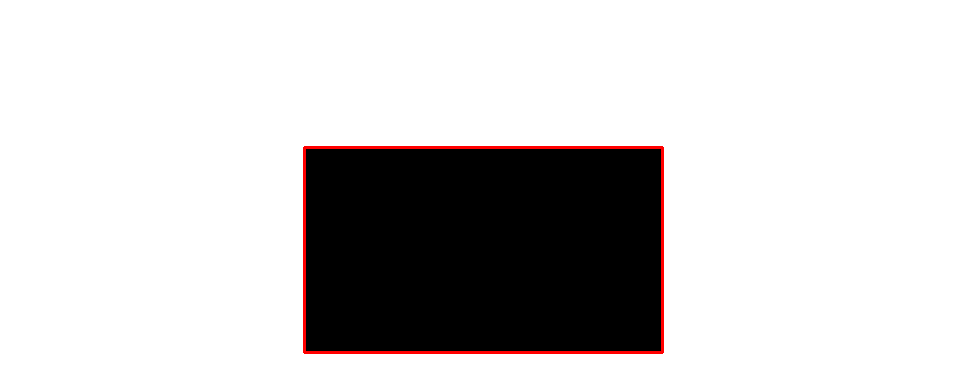

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


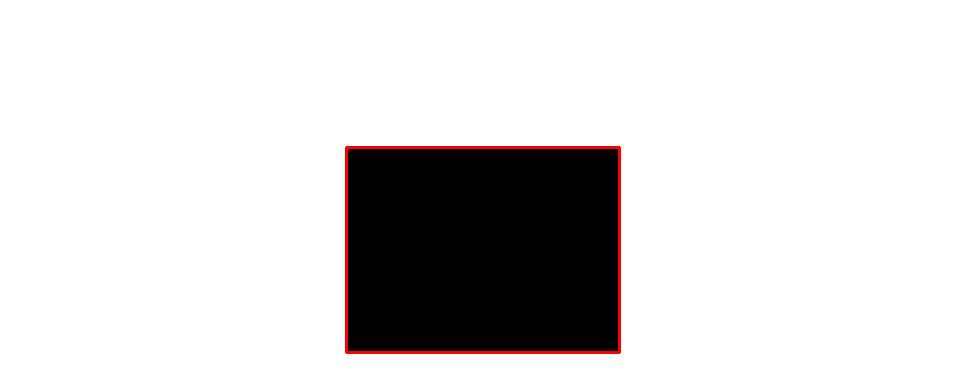

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


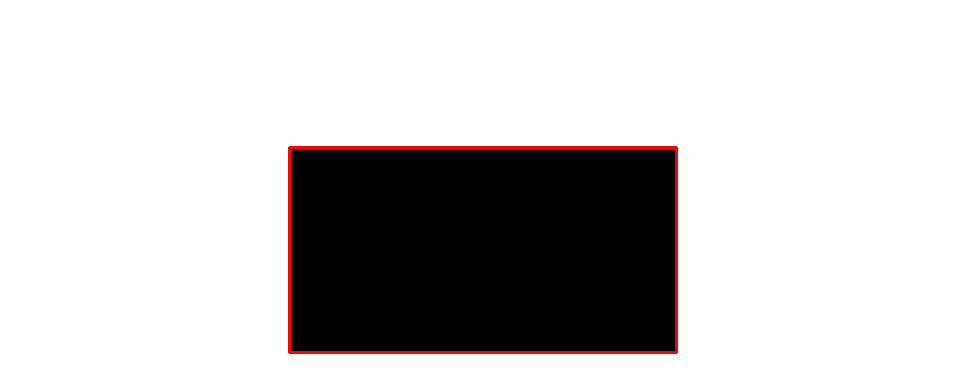

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


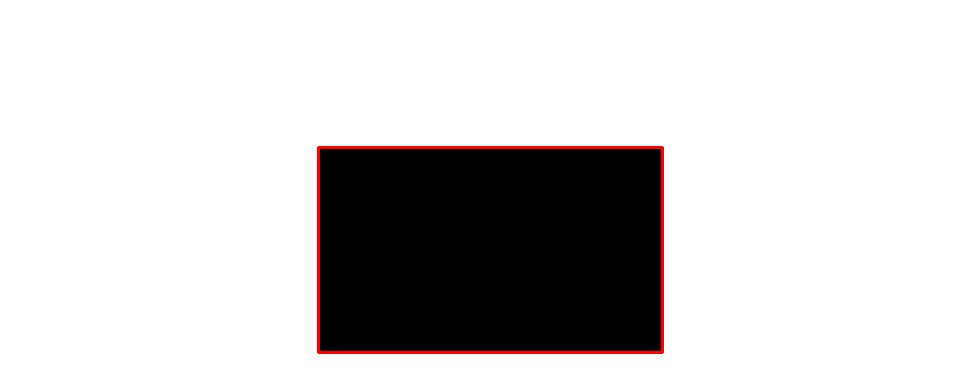

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


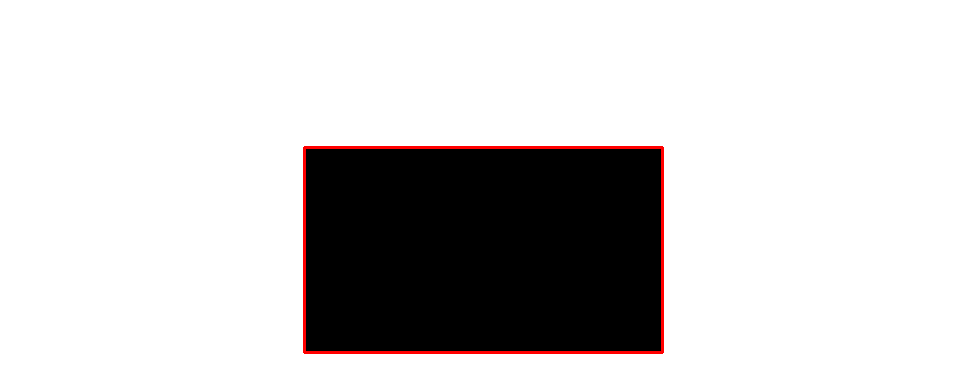

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


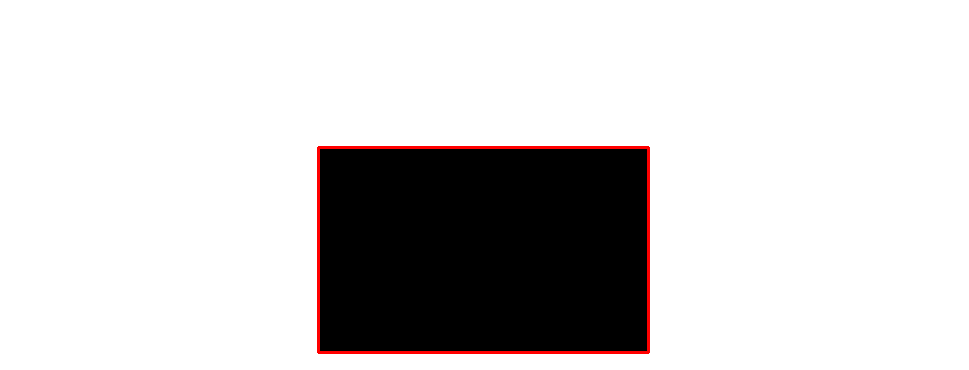

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


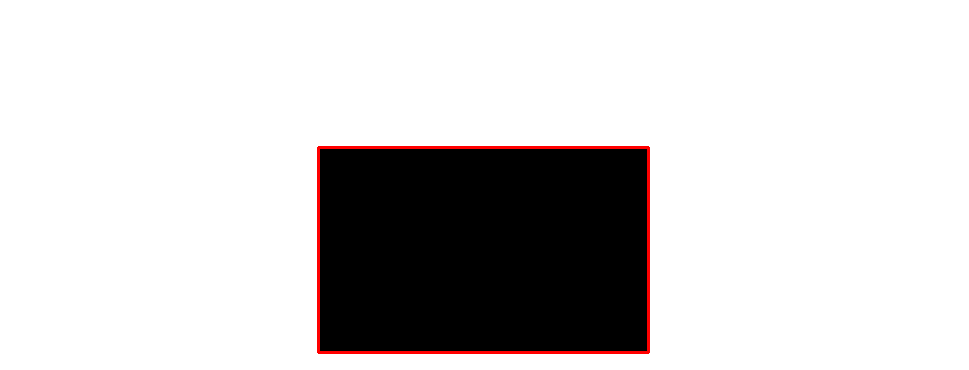

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


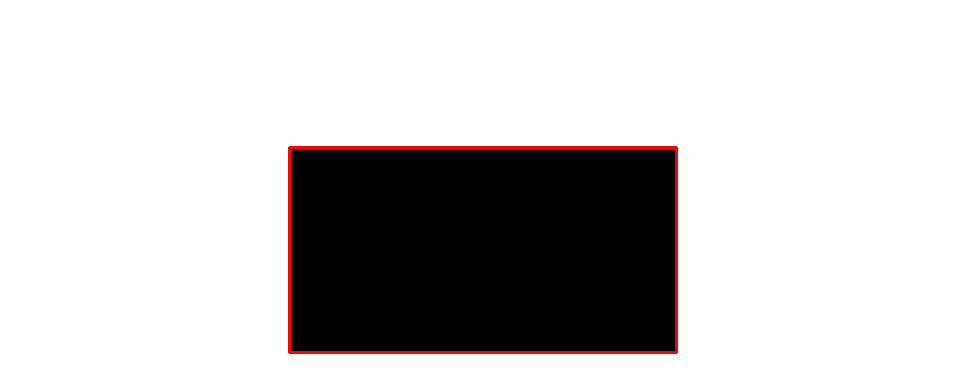

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


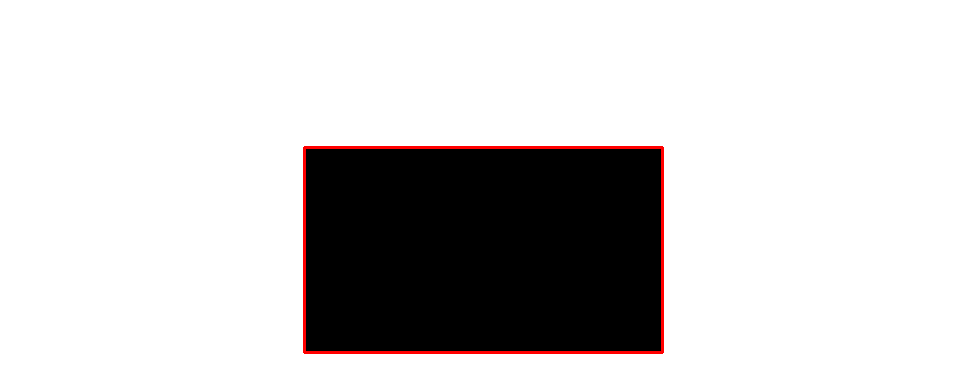

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

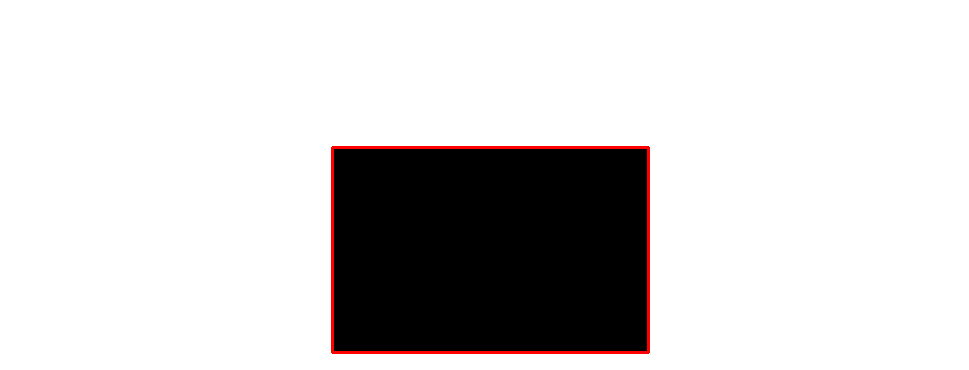

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


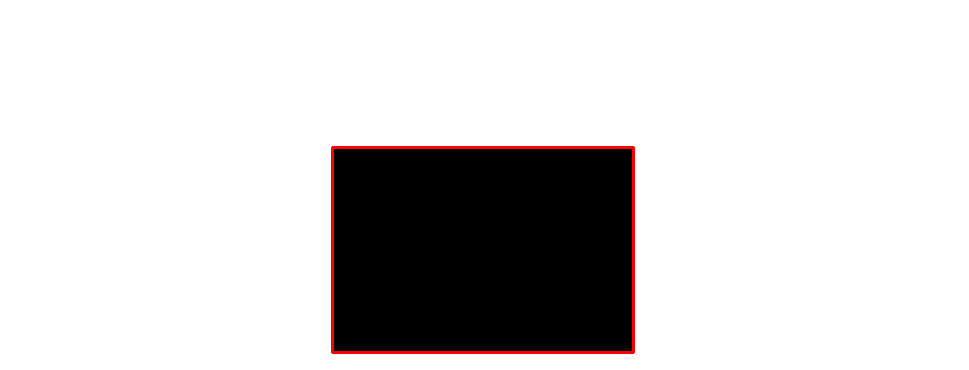

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


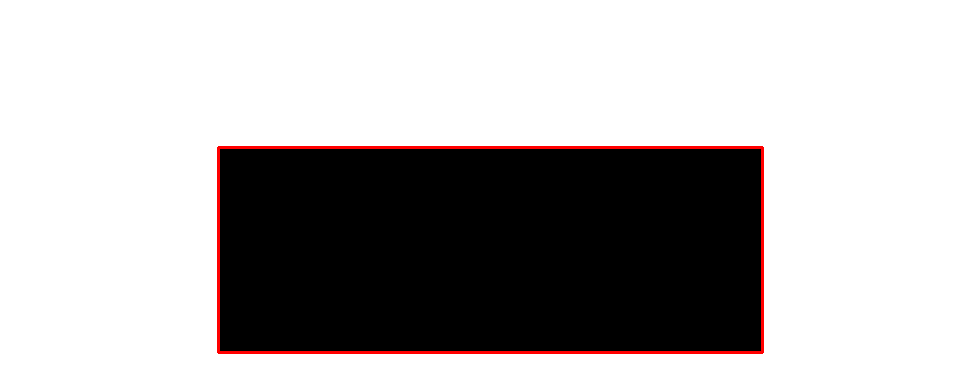

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


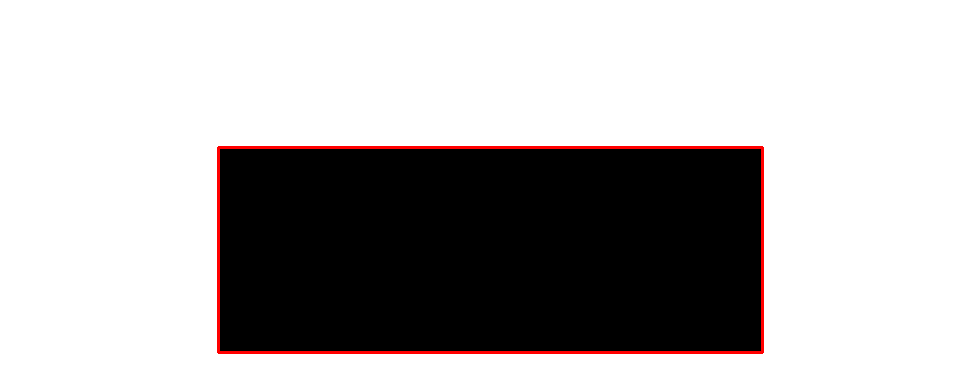

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


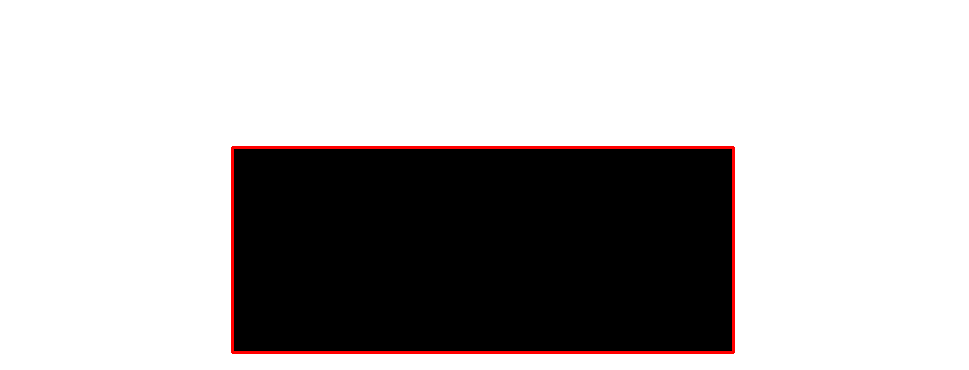

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


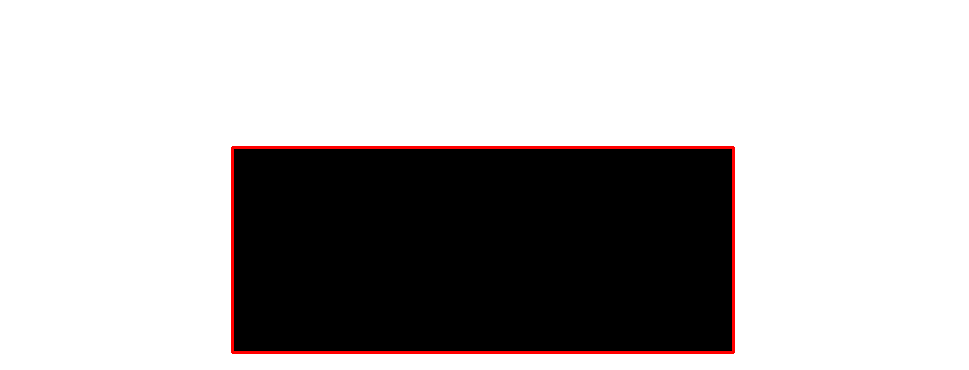

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


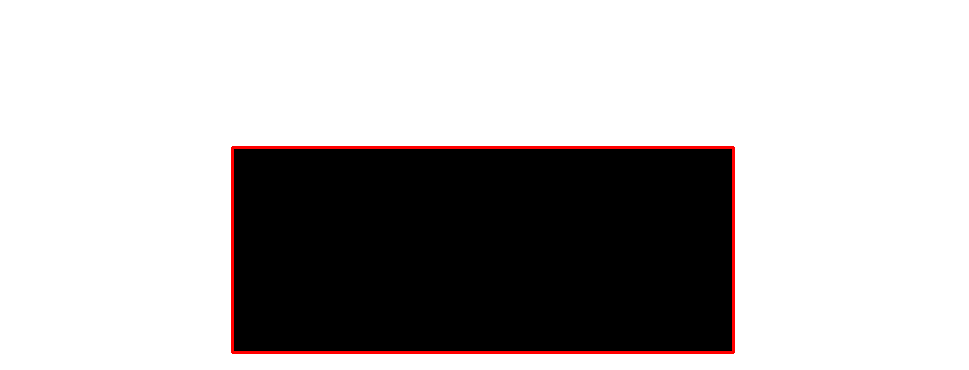

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


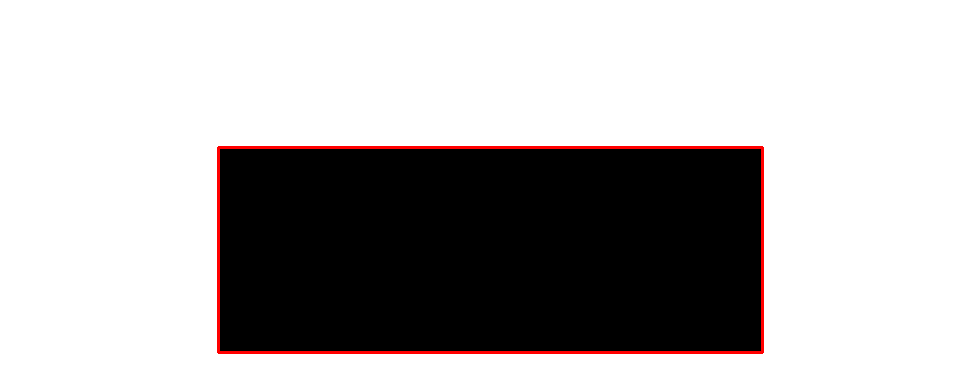

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


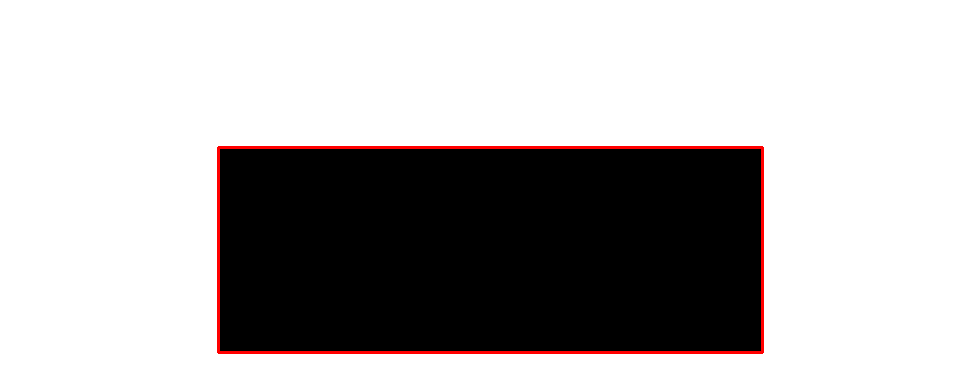

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


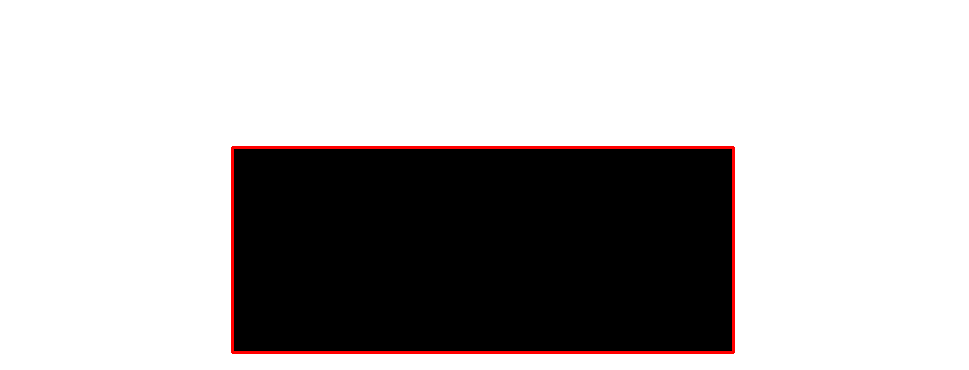

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


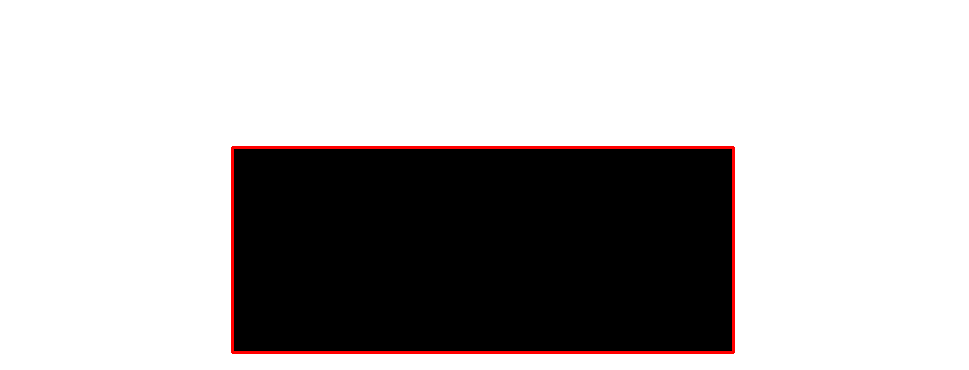

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


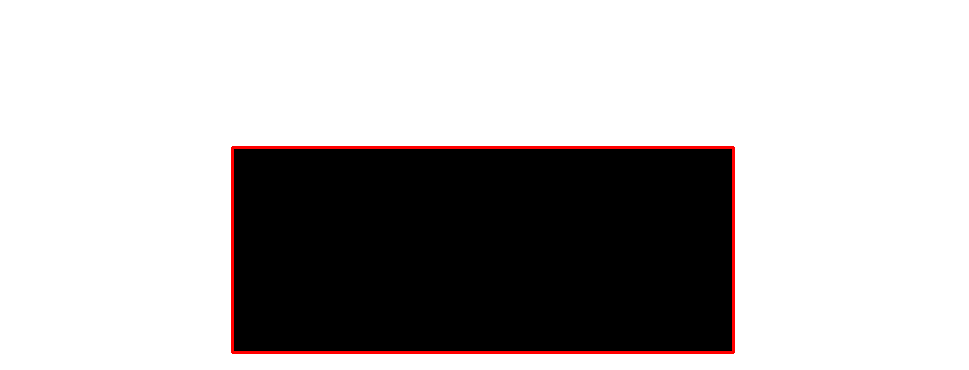

Rectangle coordinates: 418 147 548 352
Rectangle coordinates: 418 147 548 352


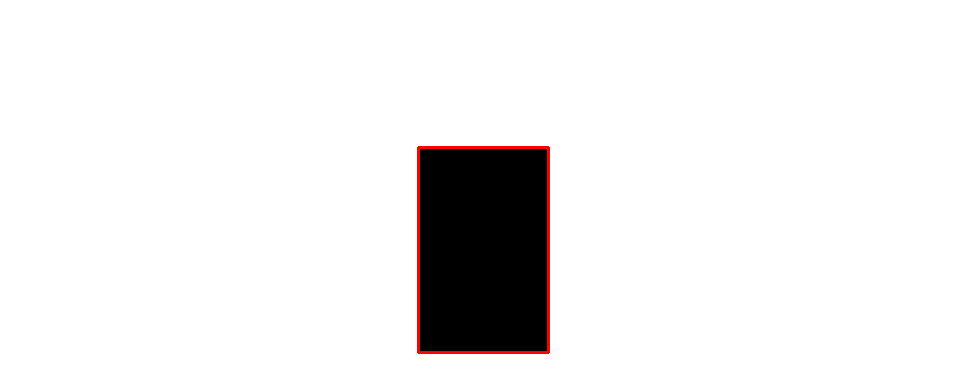

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


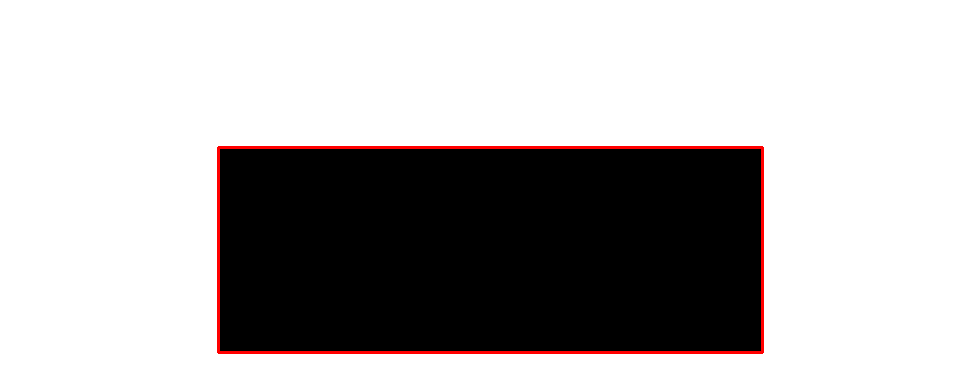

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


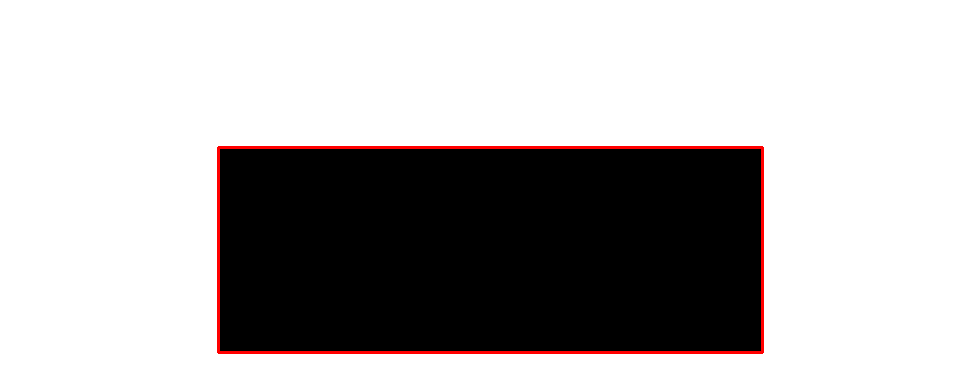

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


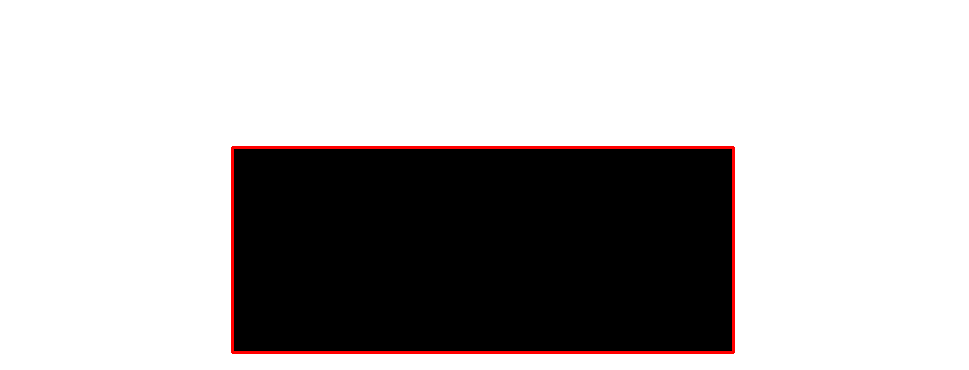

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


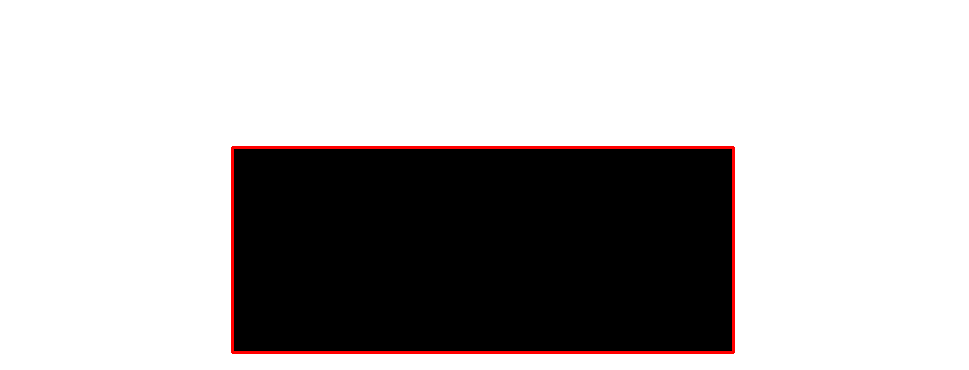

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


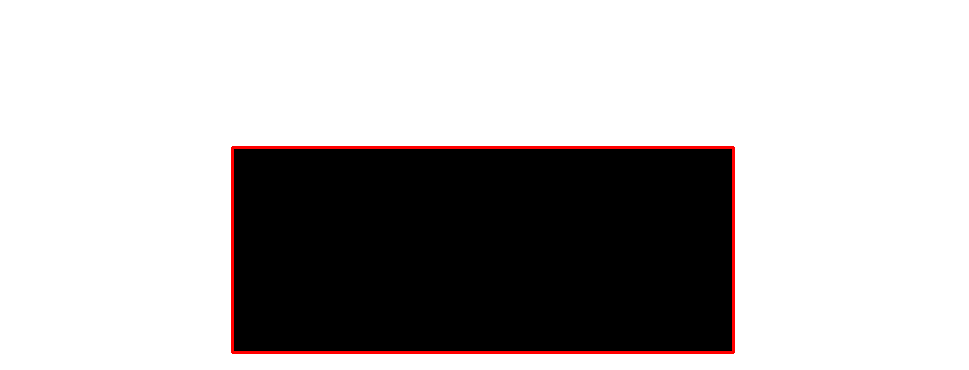

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


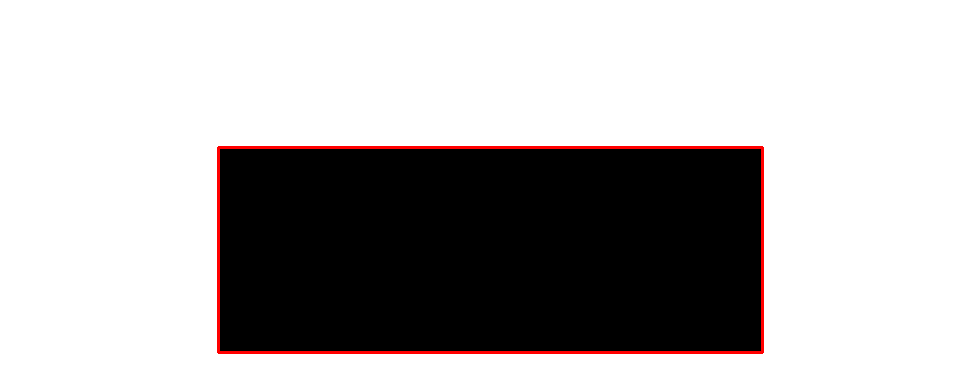

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


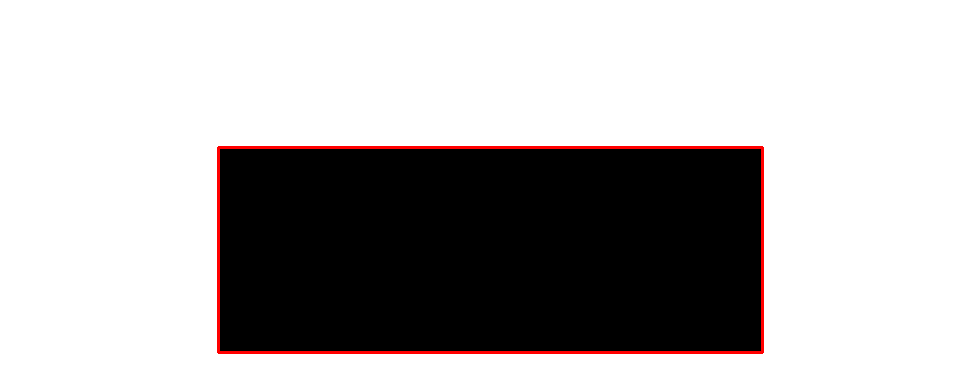

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


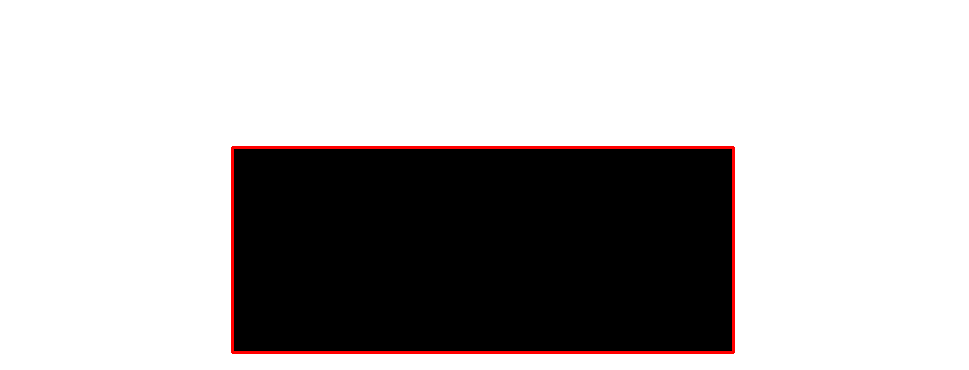

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


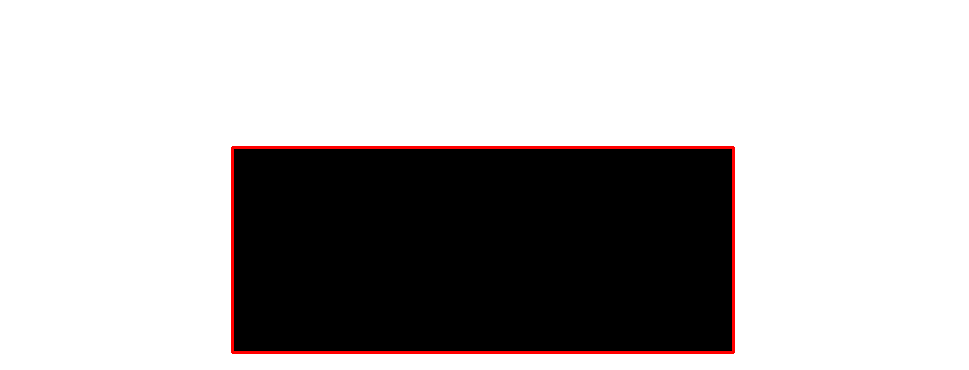

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


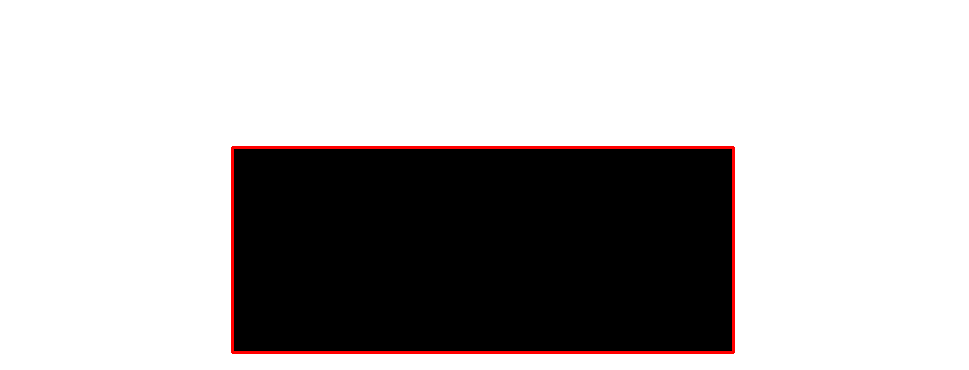

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


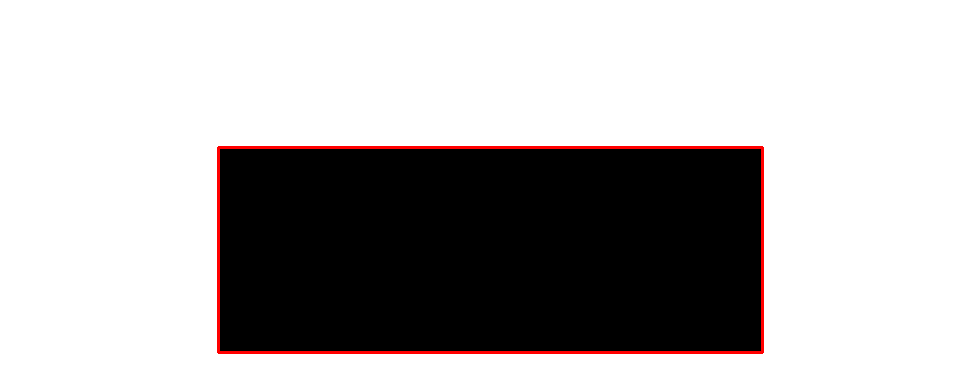

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


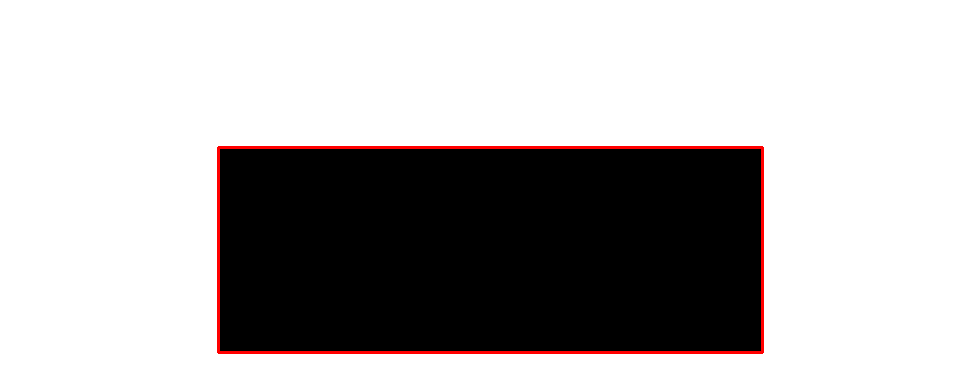

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


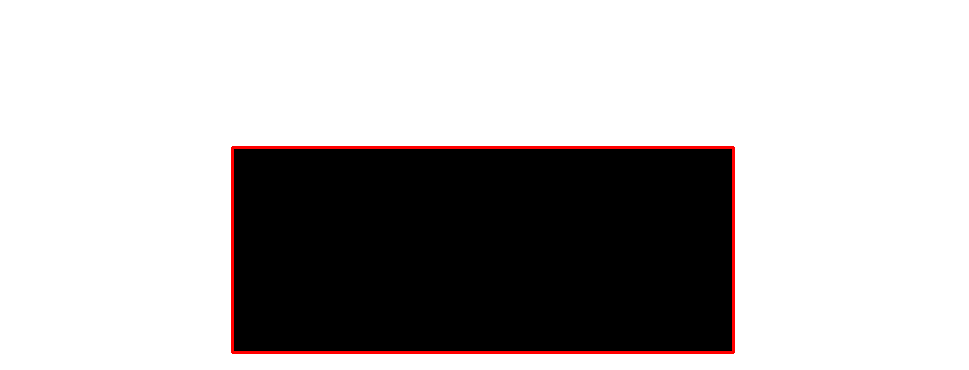

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


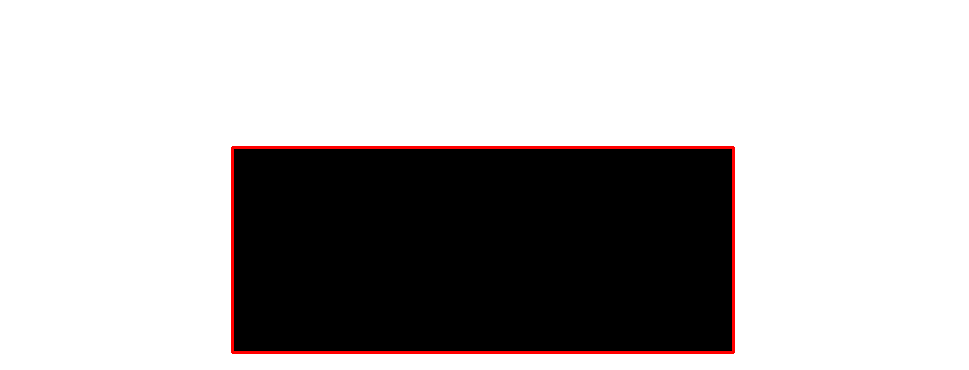

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


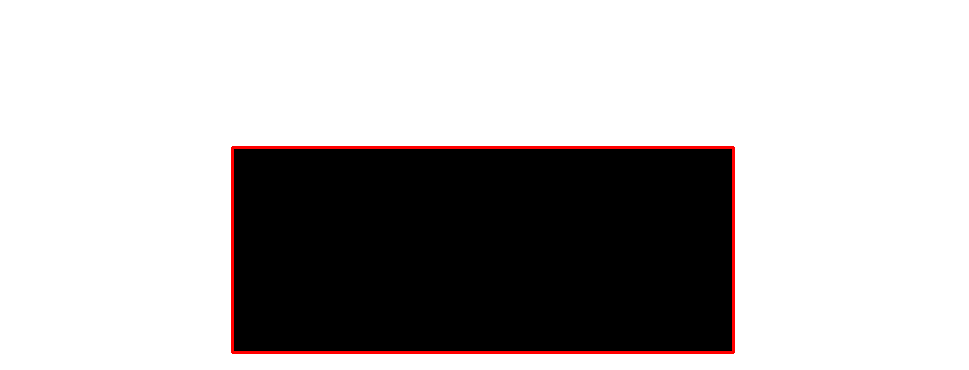

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

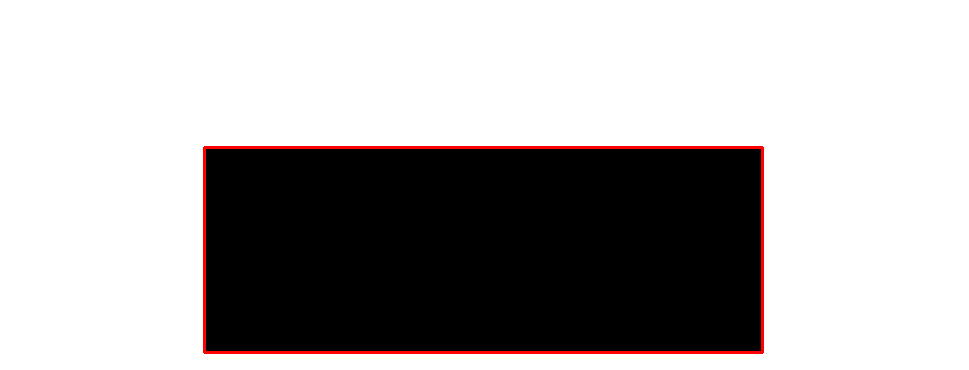

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

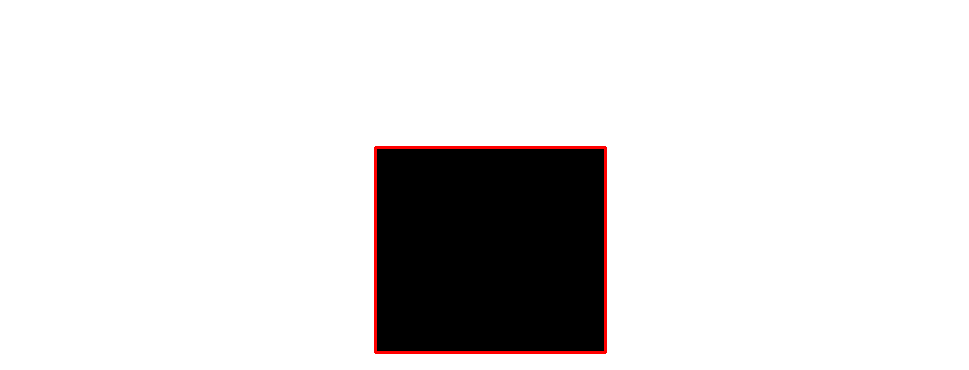

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

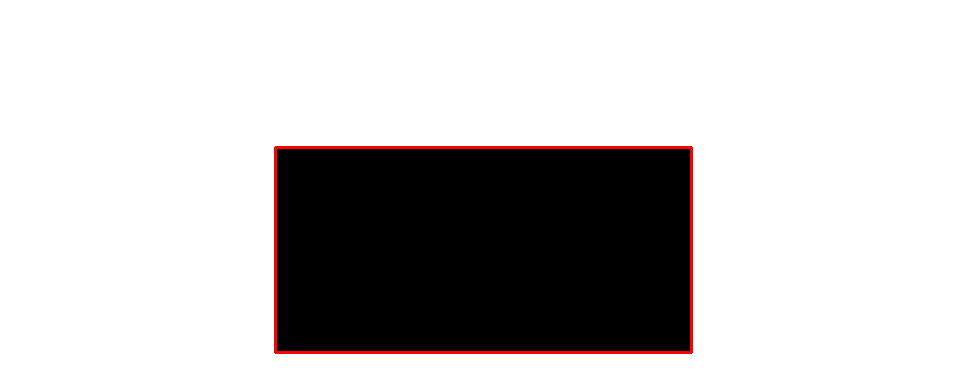

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

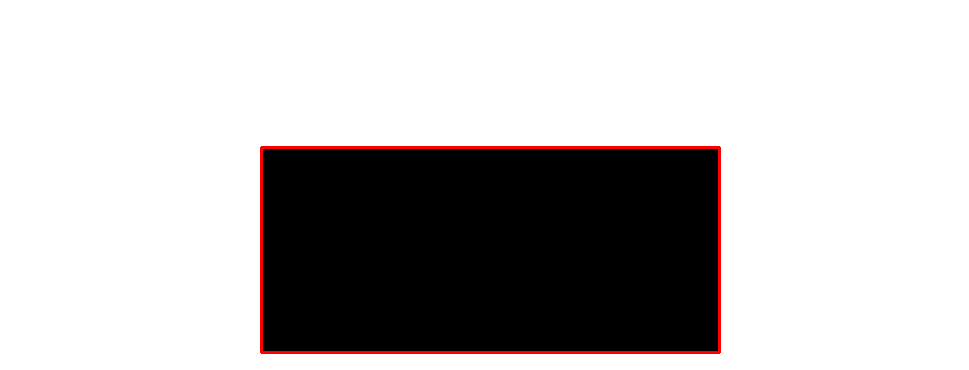

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


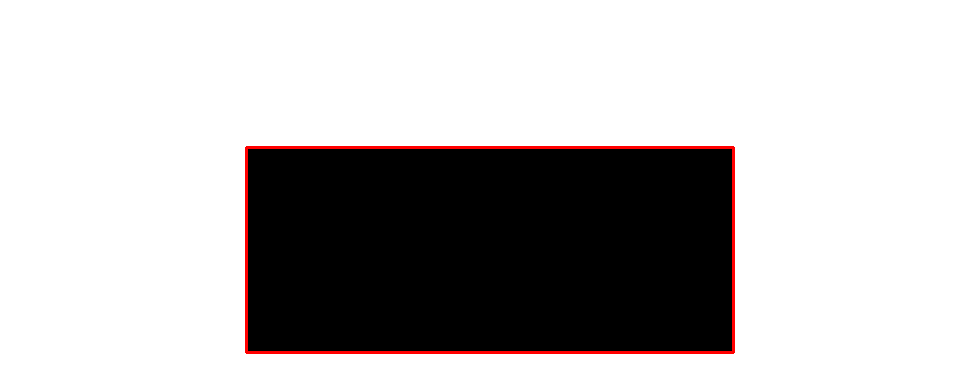

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


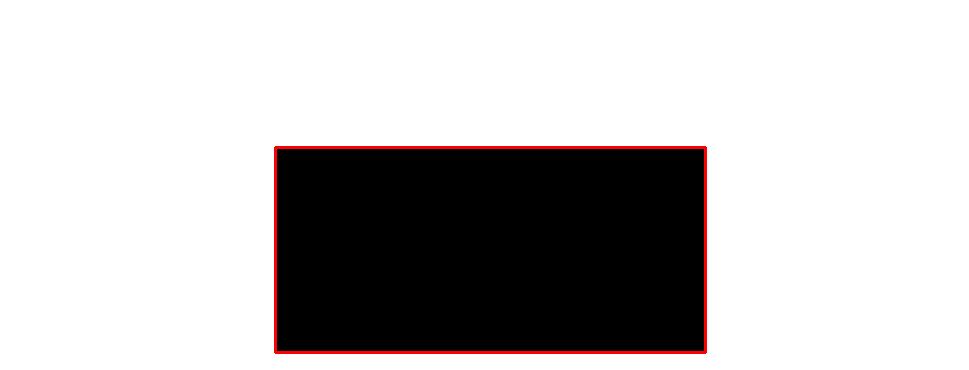

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


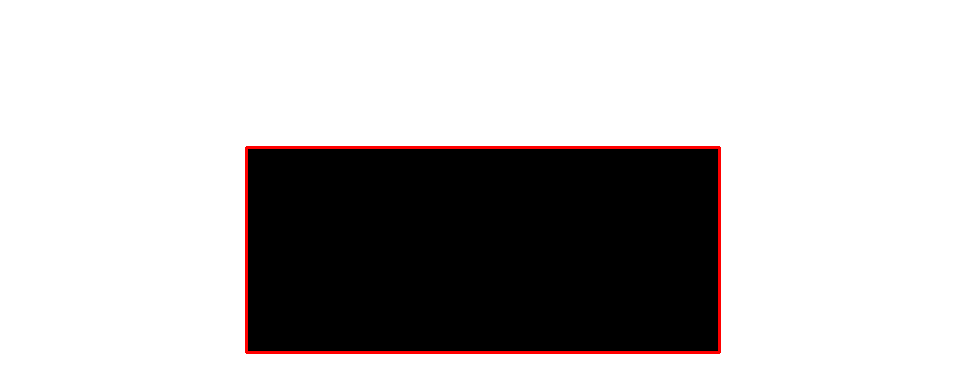

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


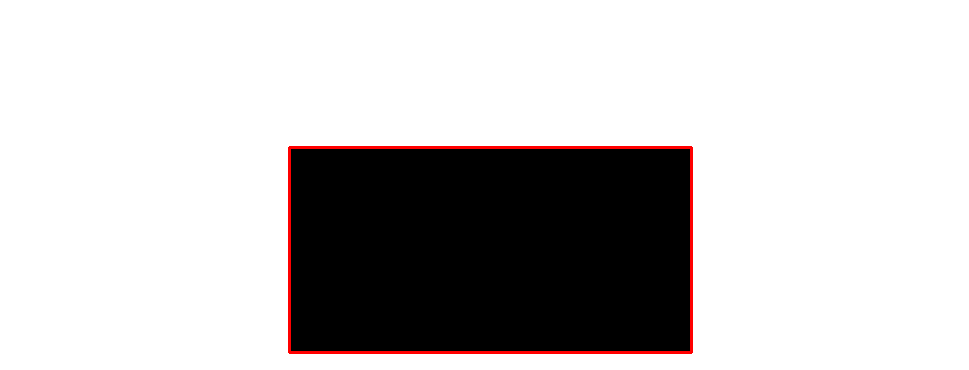

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


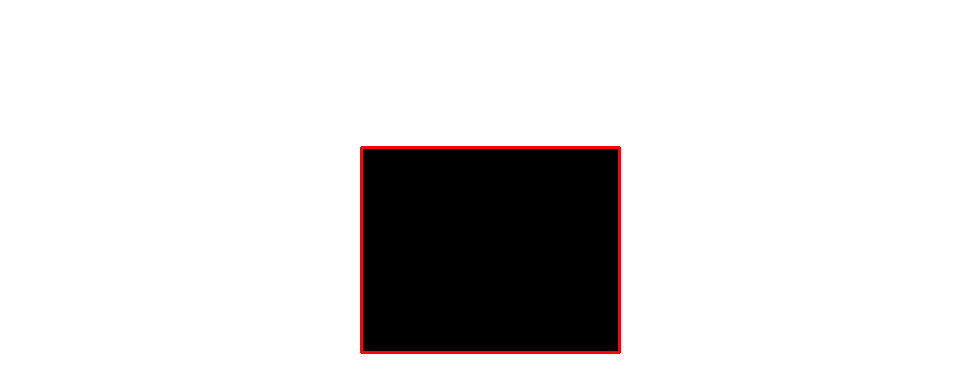

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


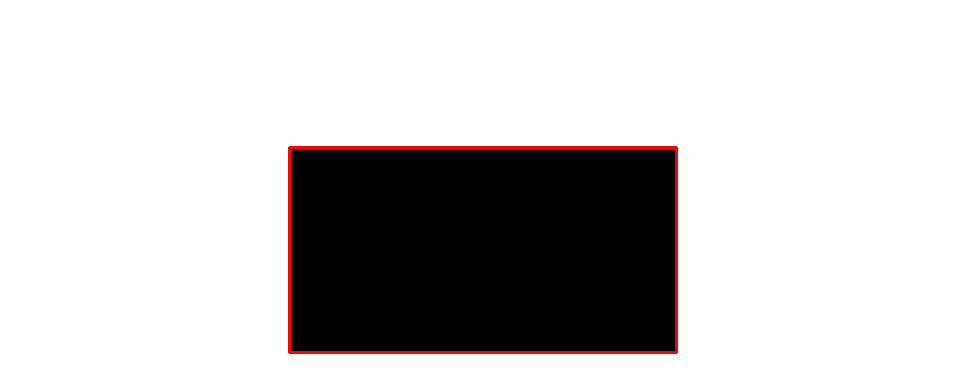

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


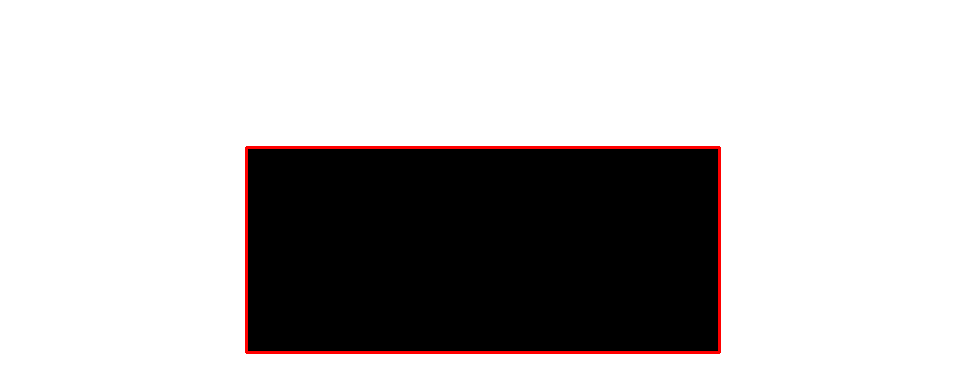

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


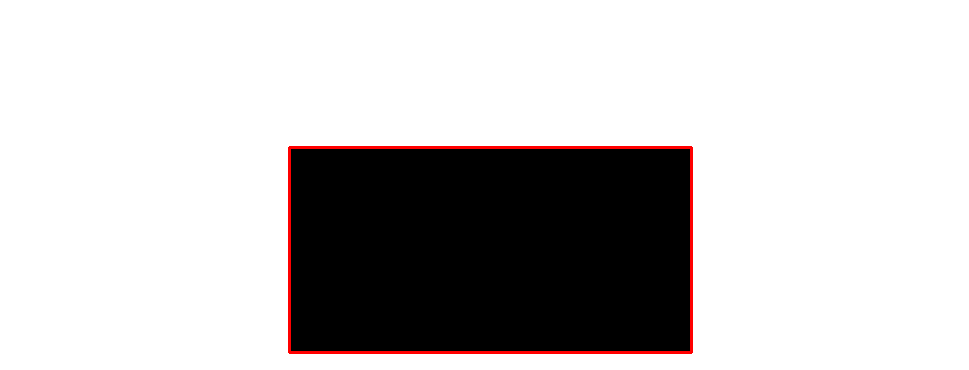

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


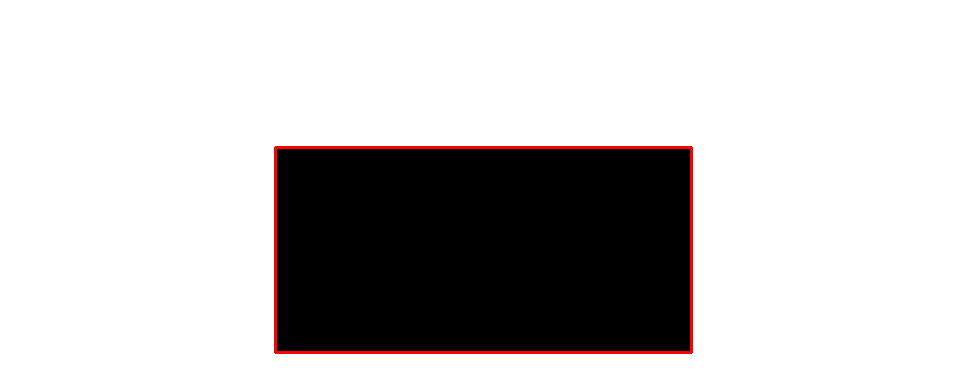

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


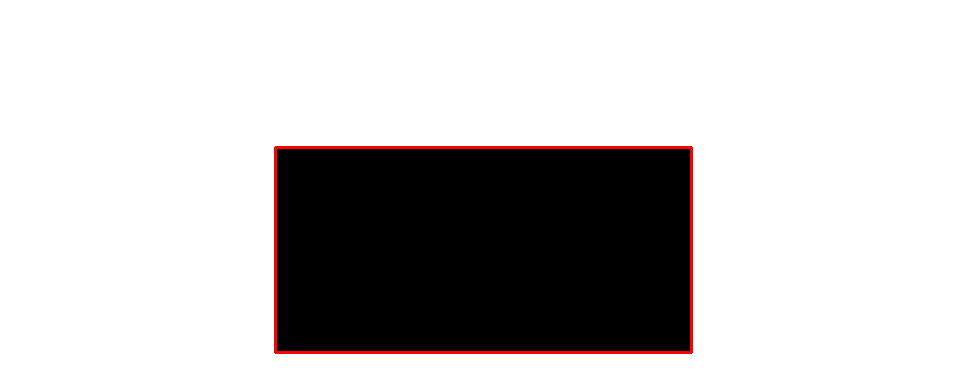

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


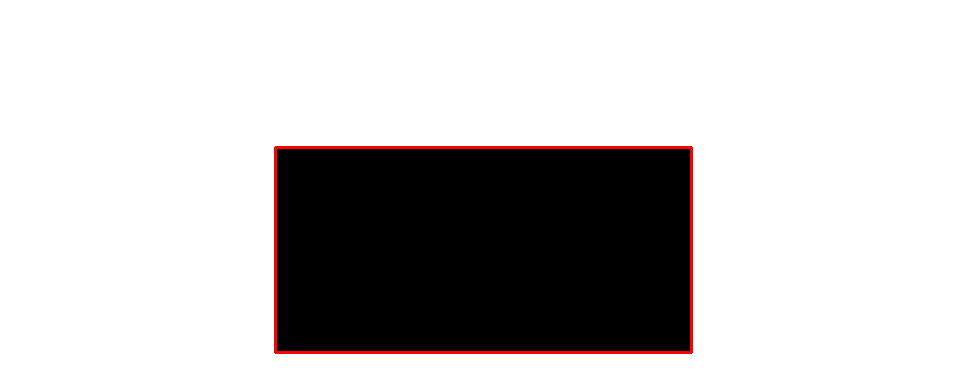

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


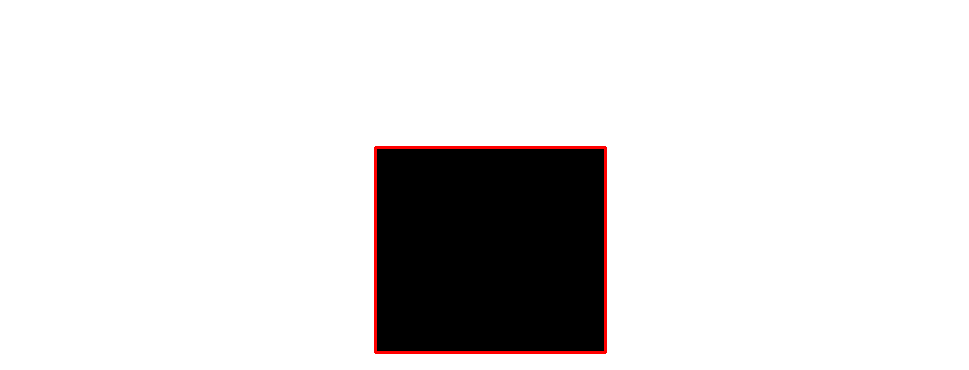

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


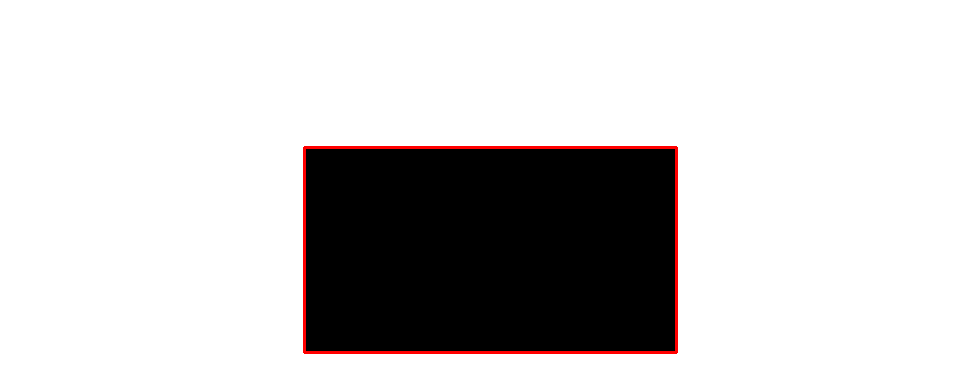

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


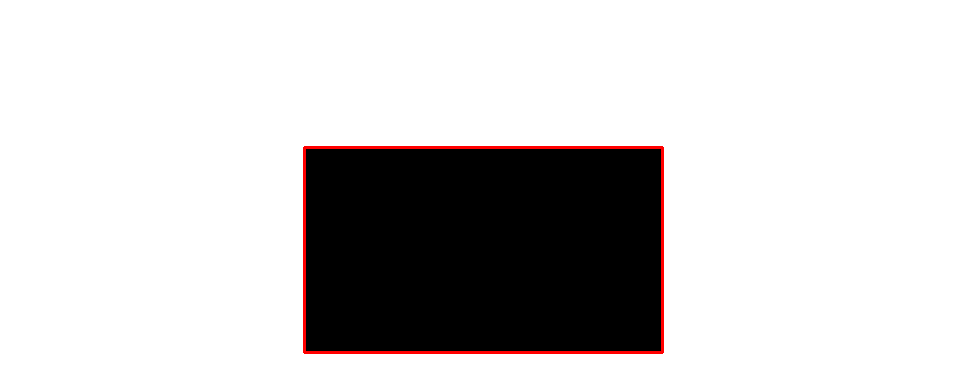

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


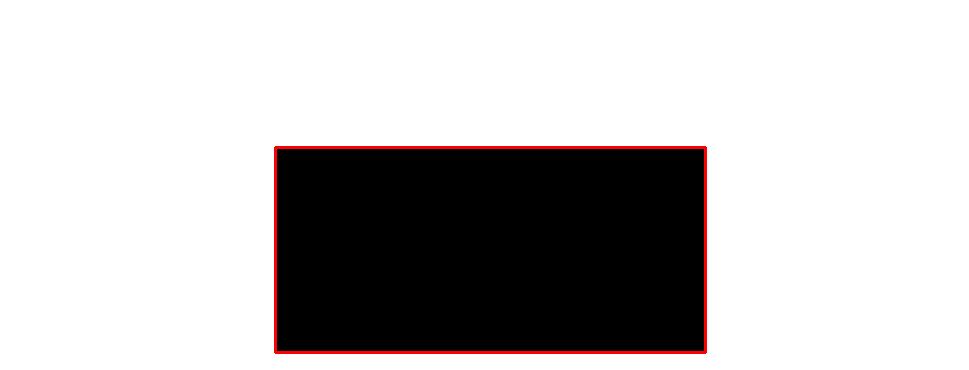

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


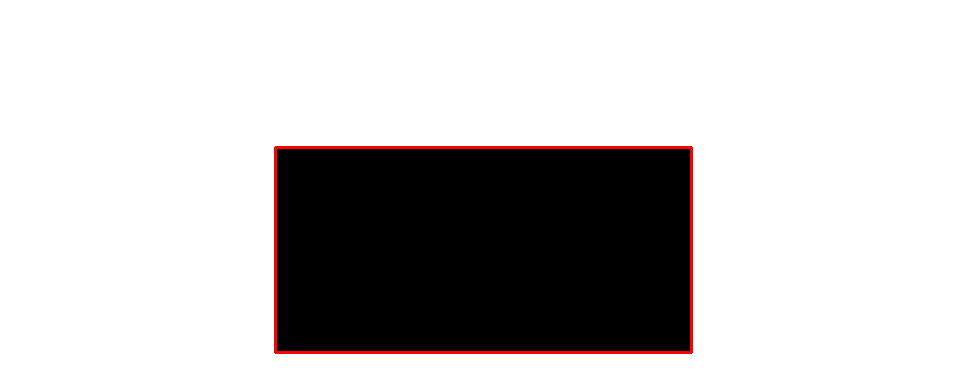

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


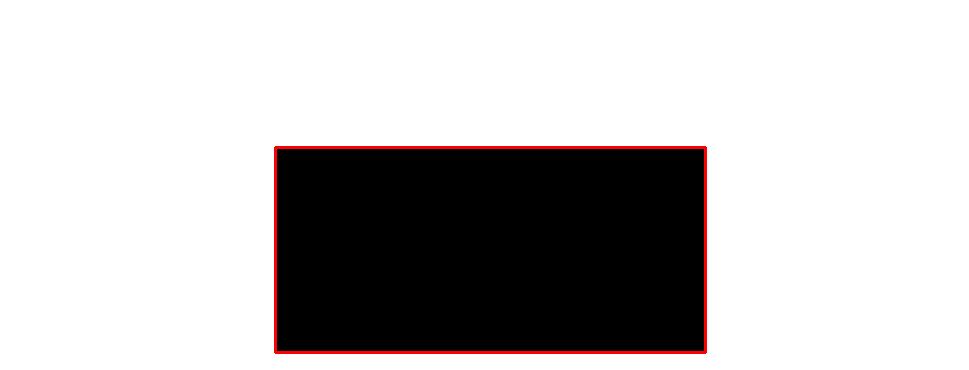

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


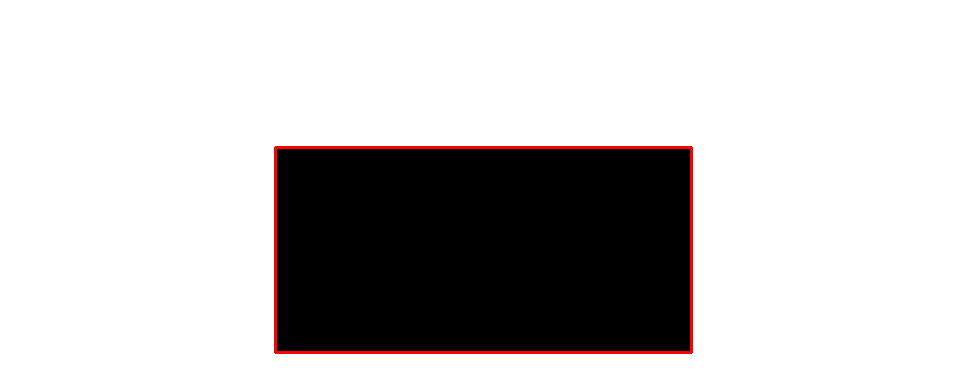

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


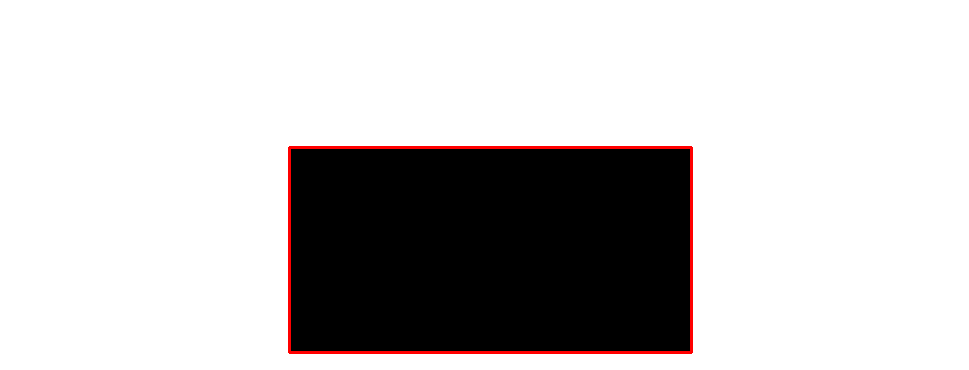

Rectangle coordinates: 461 147 519 352
Rectangle coordinates: 461 147 519 352


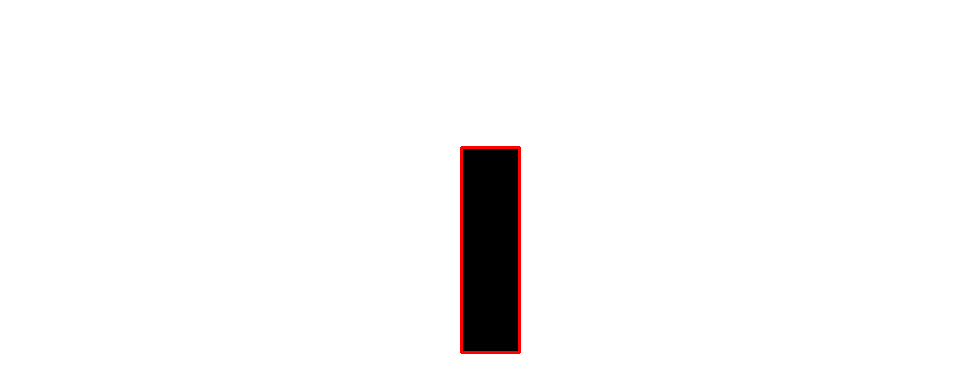

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


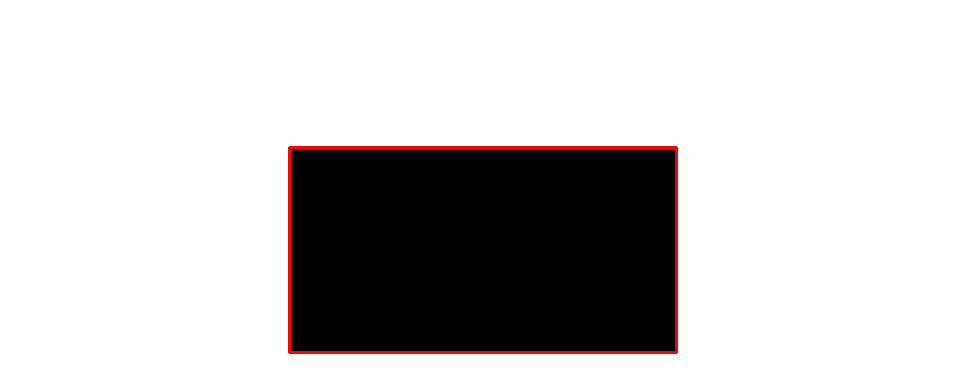

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


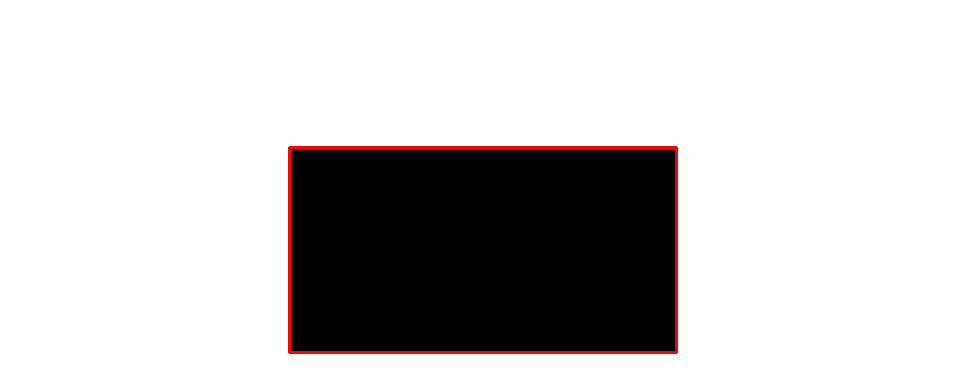

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


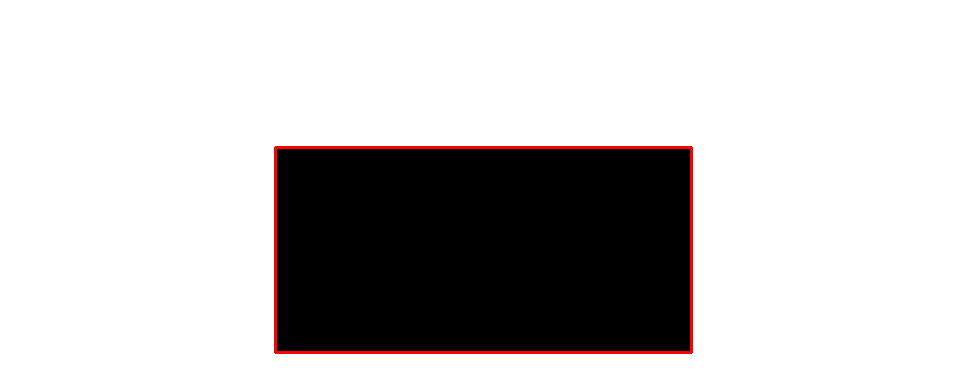

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


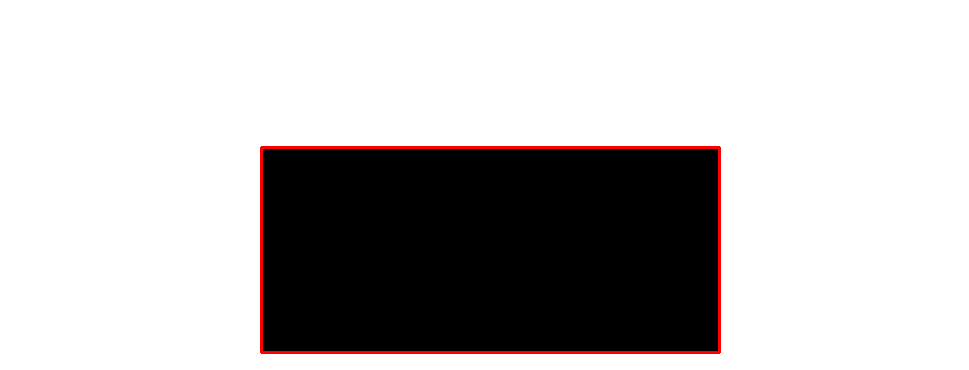

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


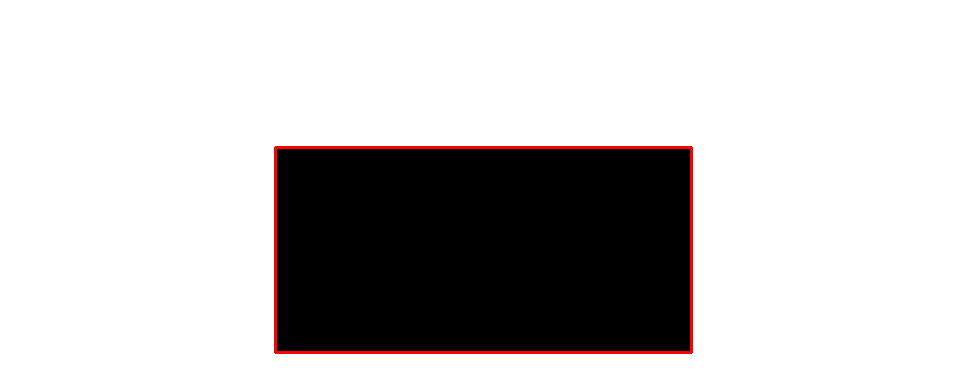

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


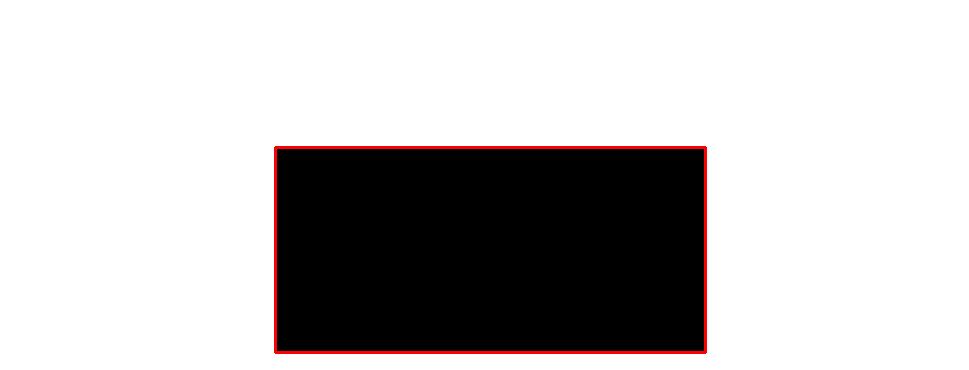

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


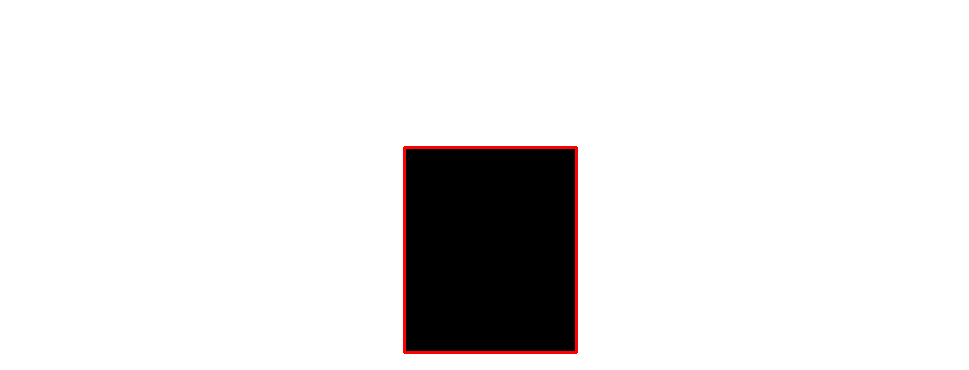

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


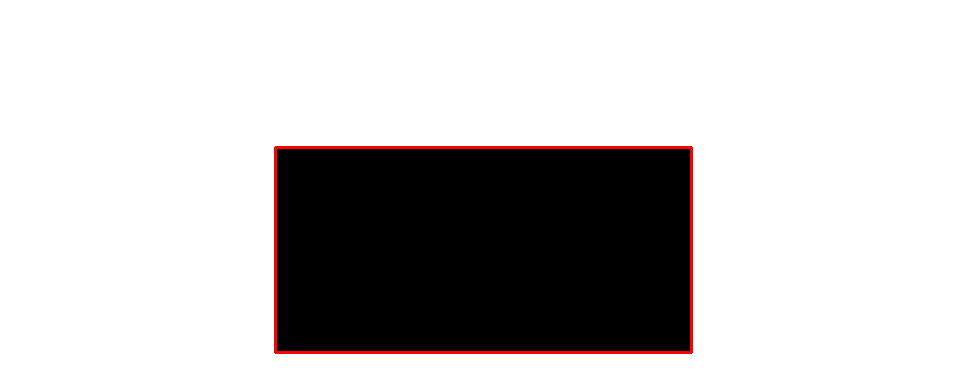

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


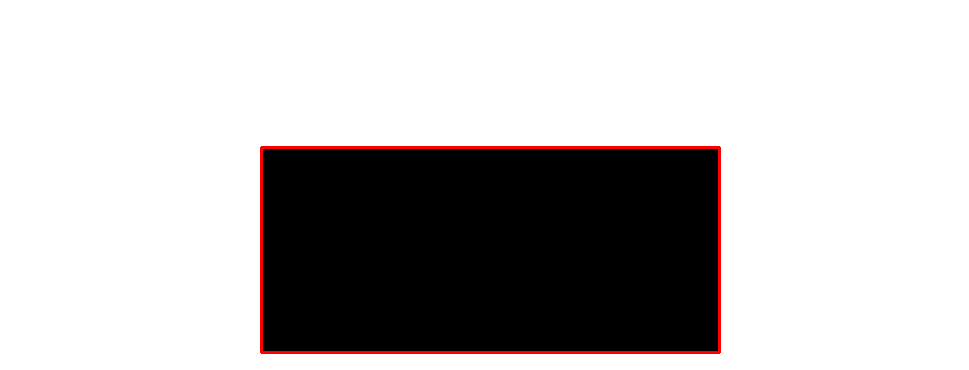

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


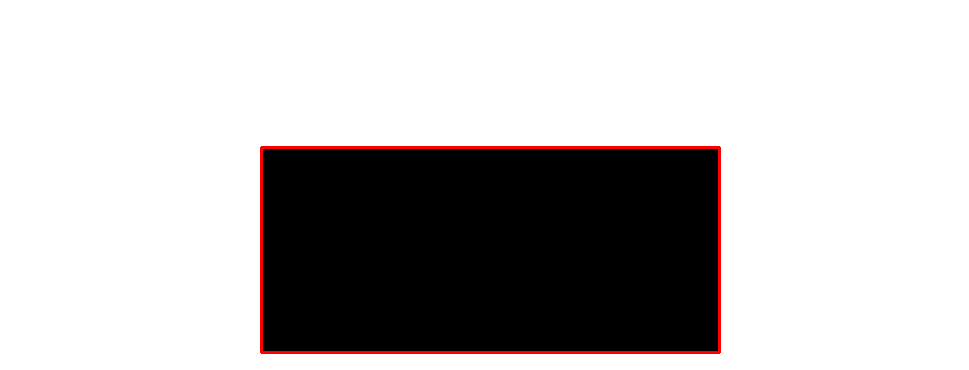

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


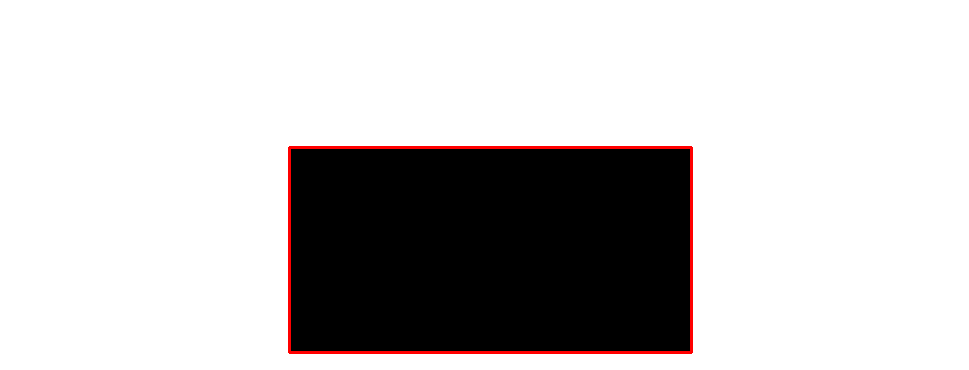

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


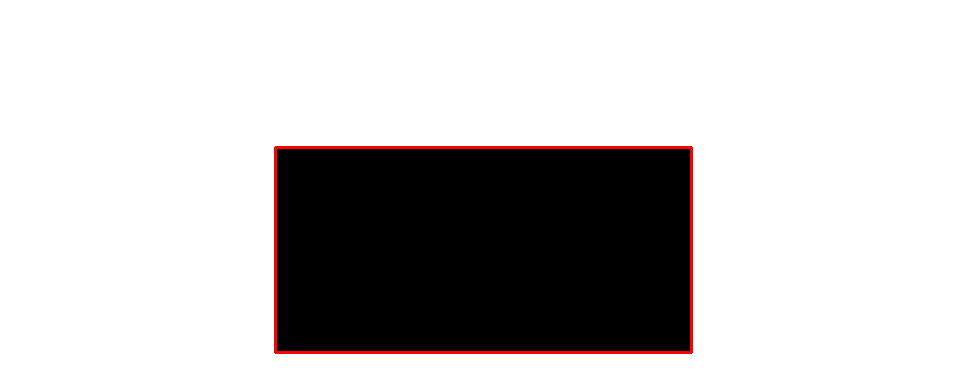

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


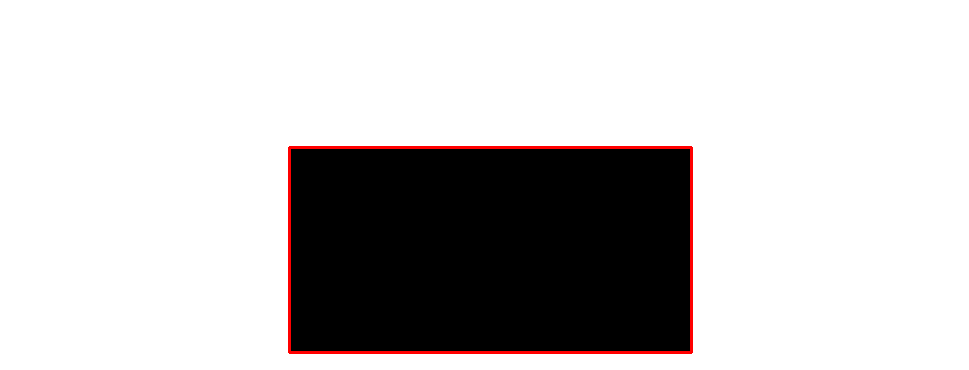

Rectangle coordinates: 461 147 519 352
Rectangle coordinates: 461 147 519 352


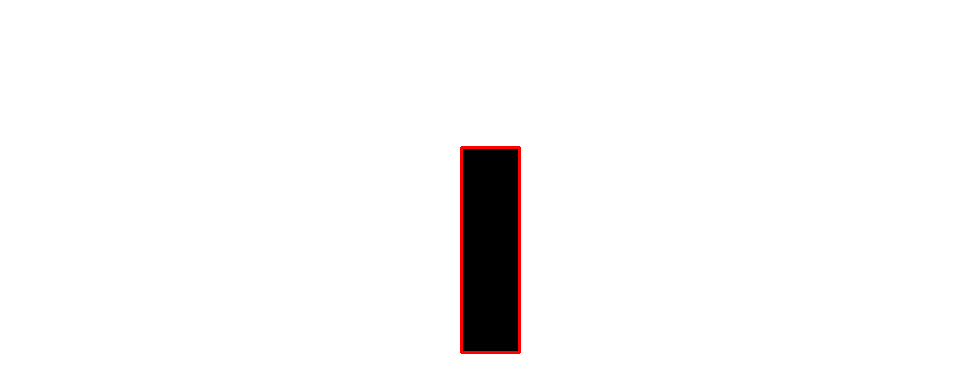

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


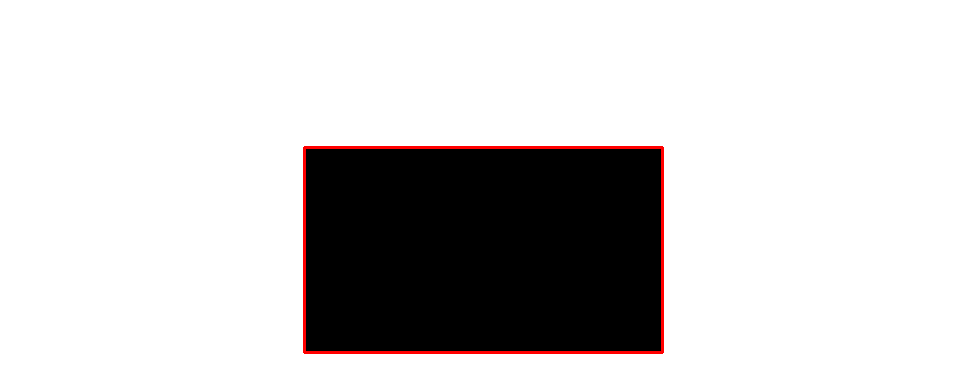

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


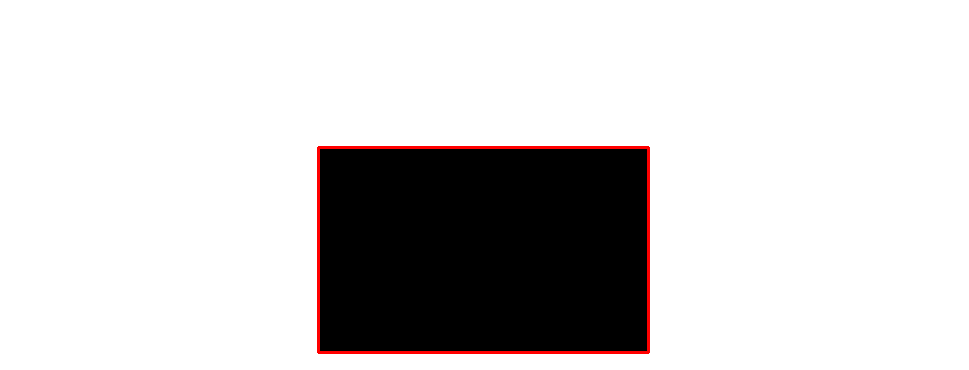

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


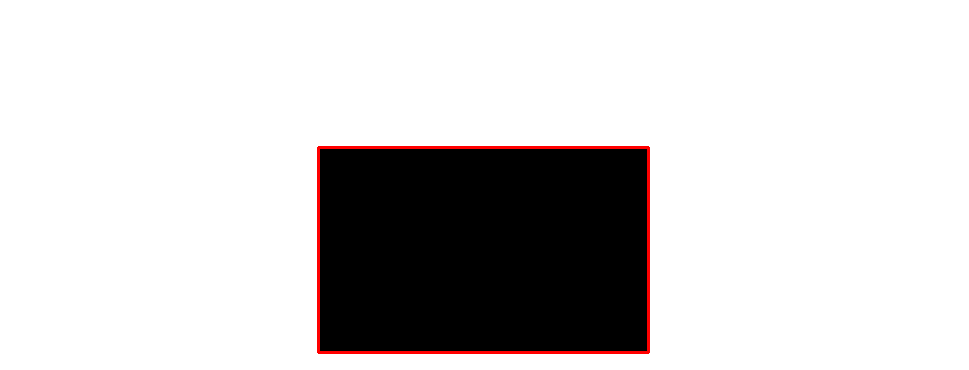

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


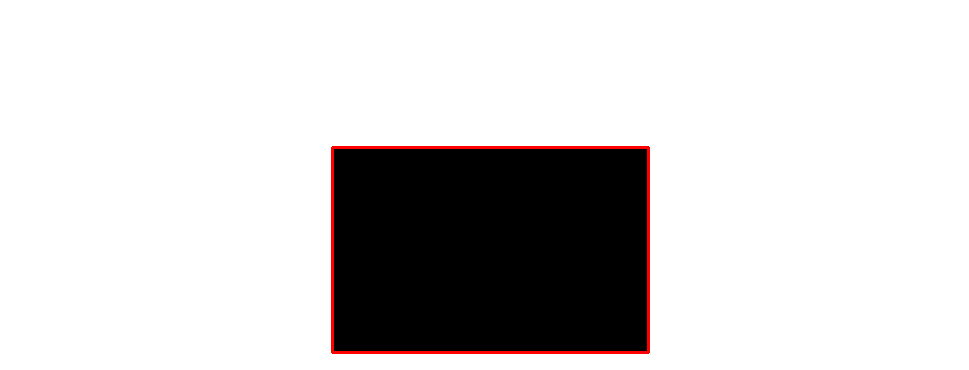

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


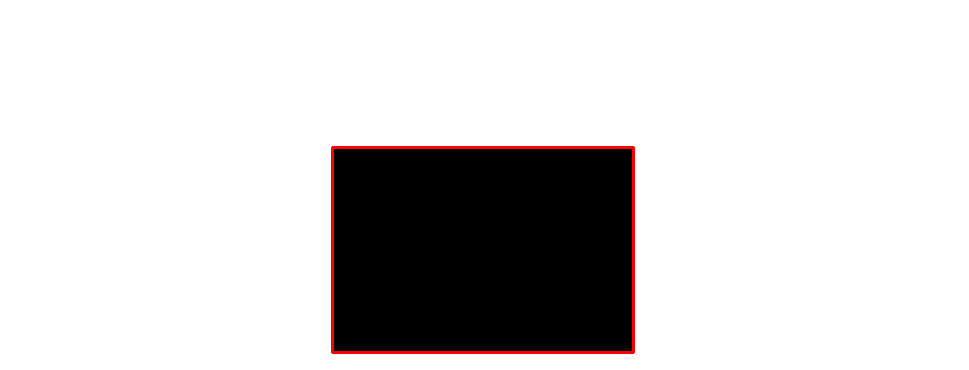

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


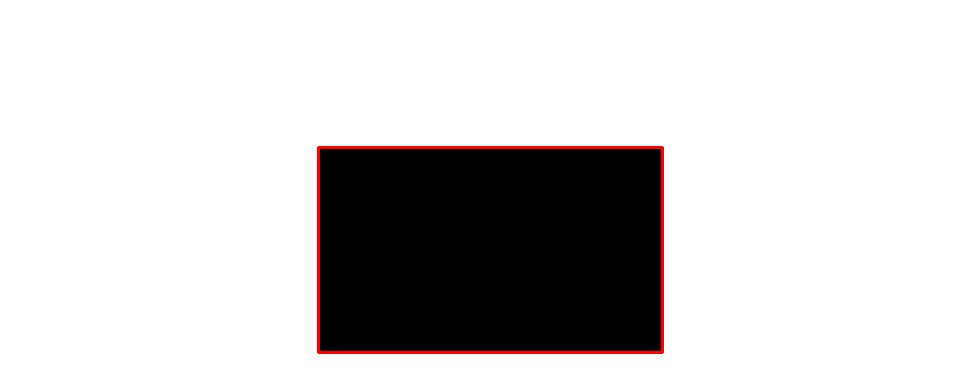

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


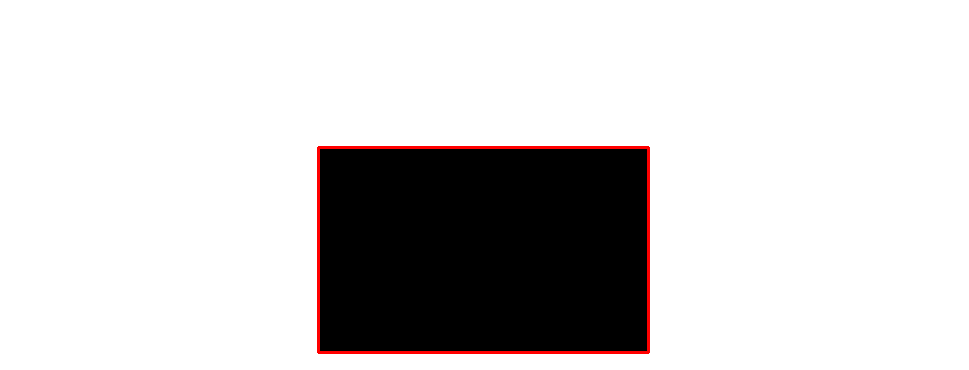

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


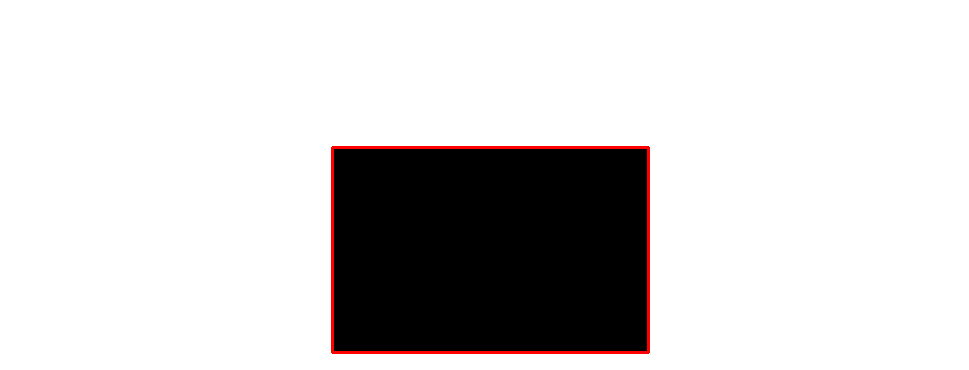

Rectangle coordinates: 418 147 562 352
Rectangle coordinates: 418 147 562 352


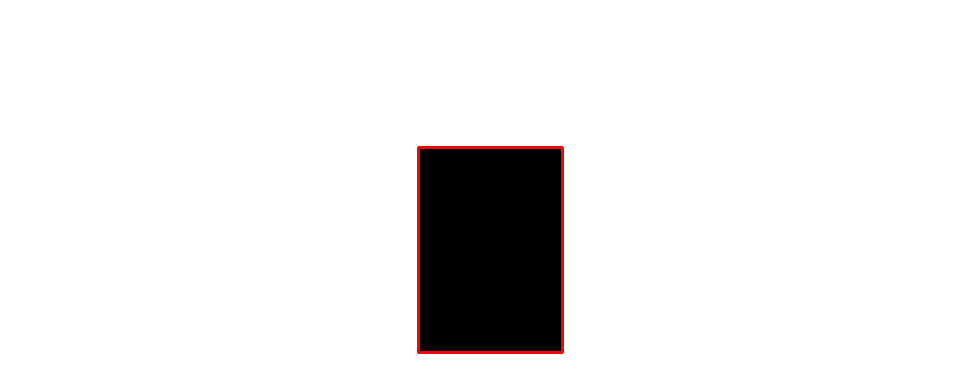

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

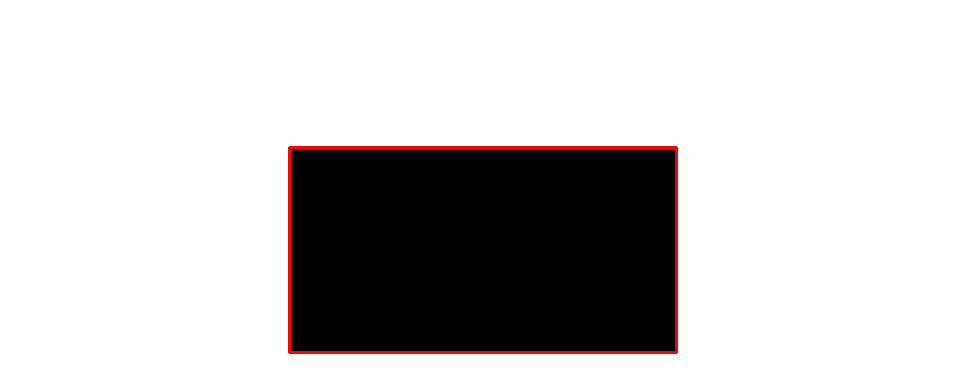

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


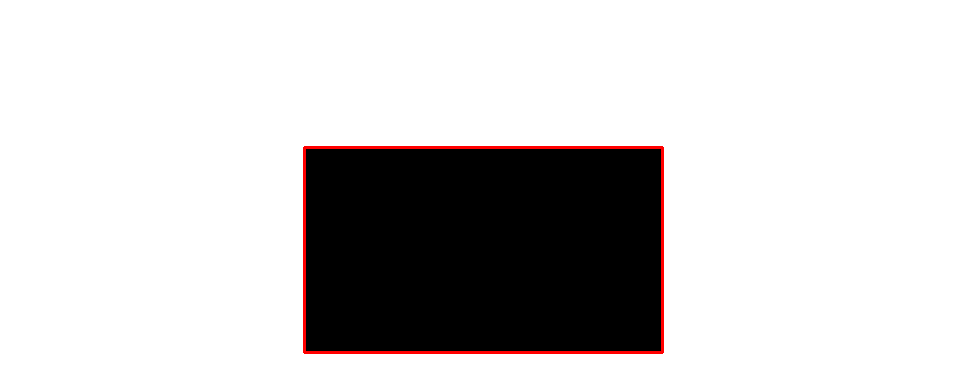

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


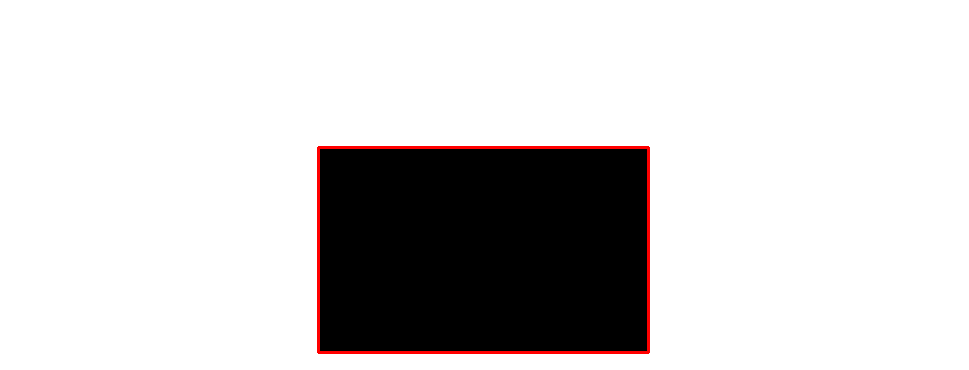

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


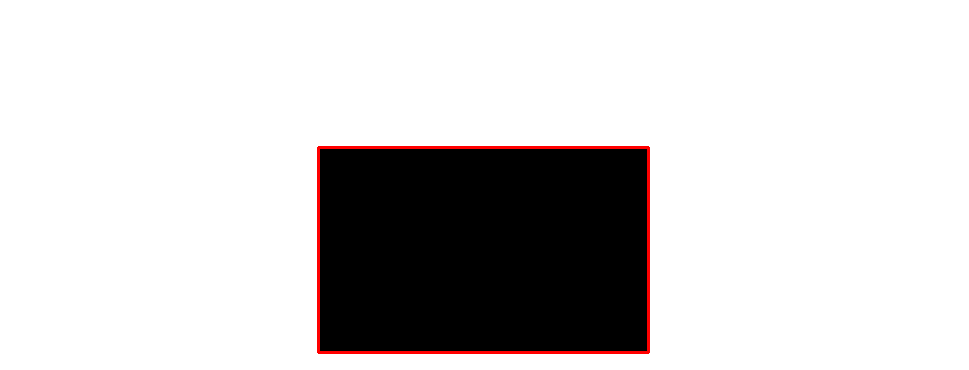

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


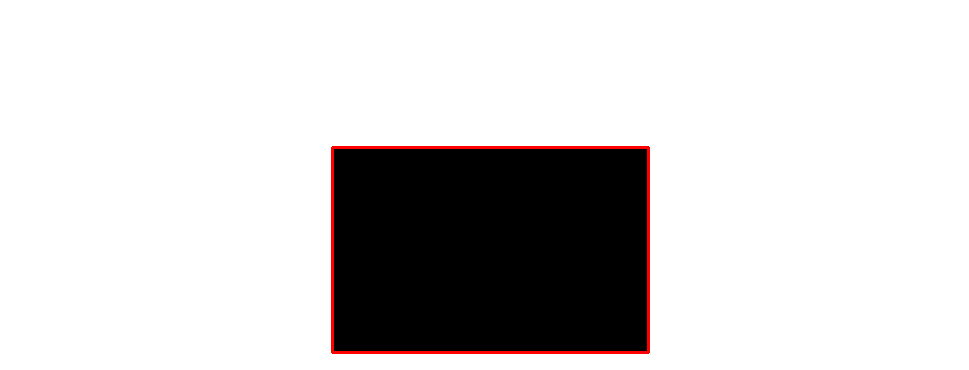

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


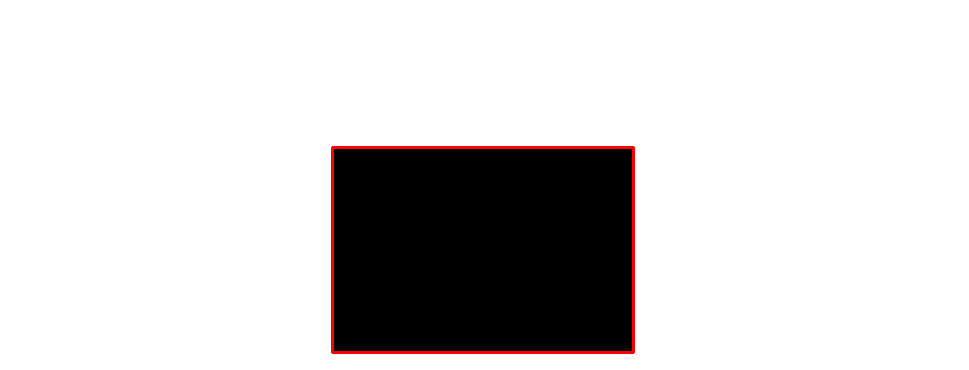

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


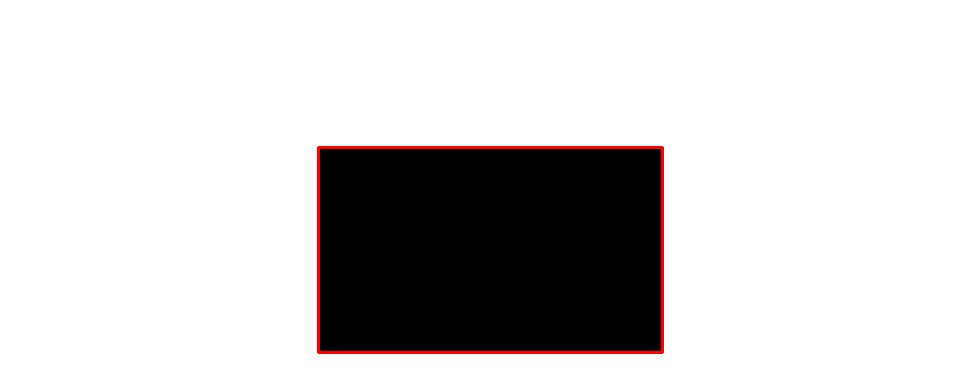

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


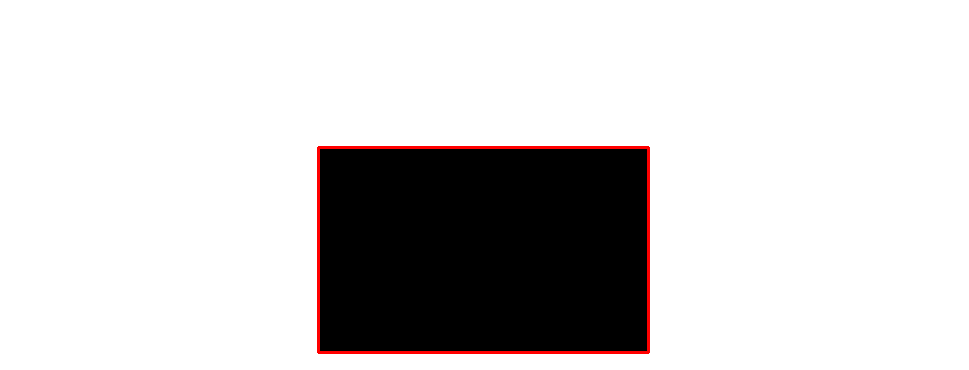

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


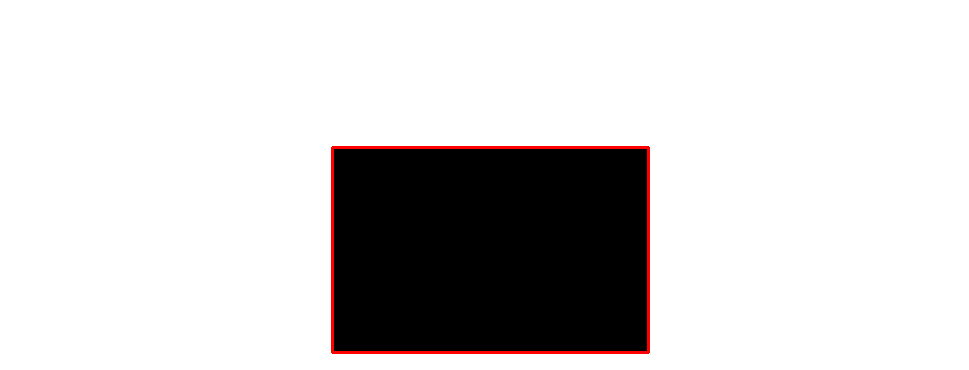

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


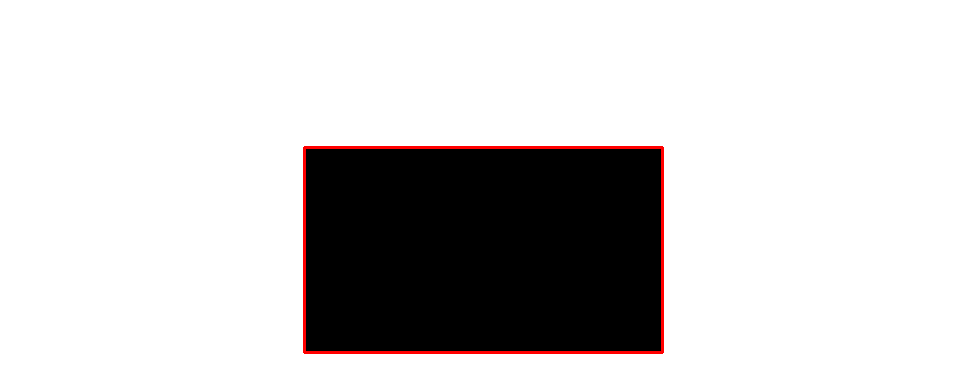

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


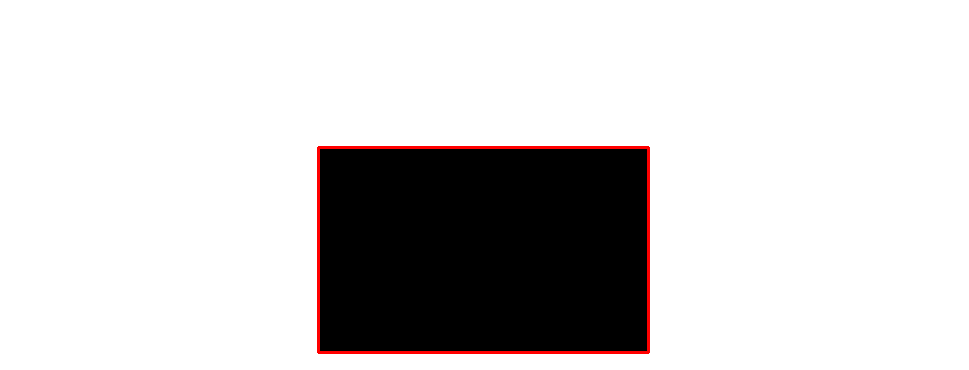

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


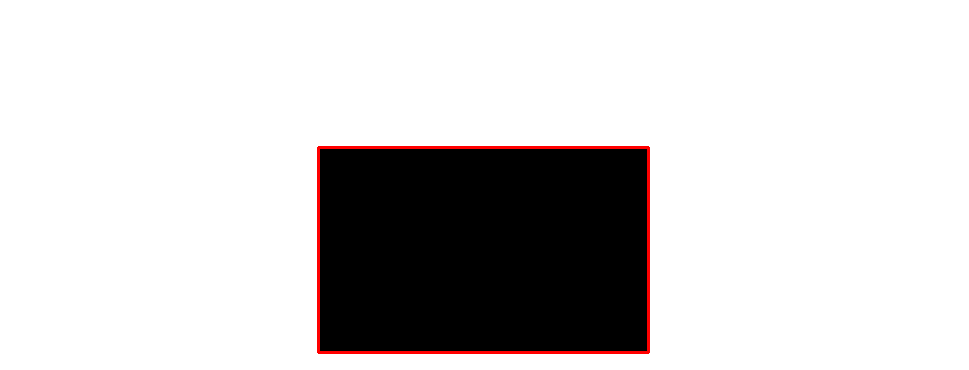

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


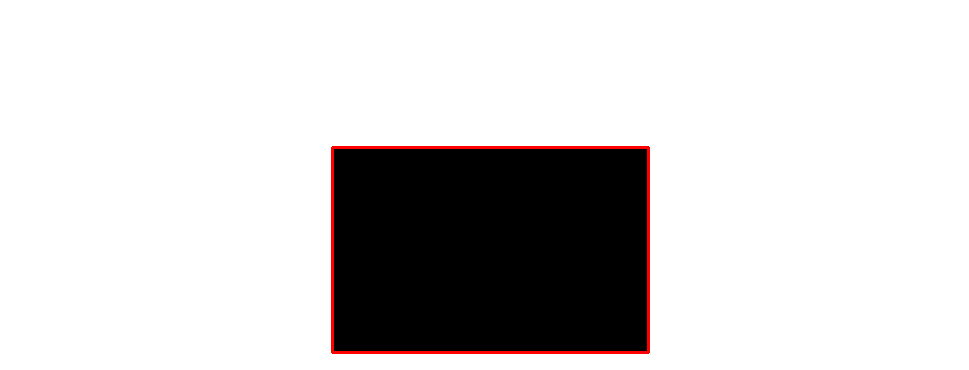

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


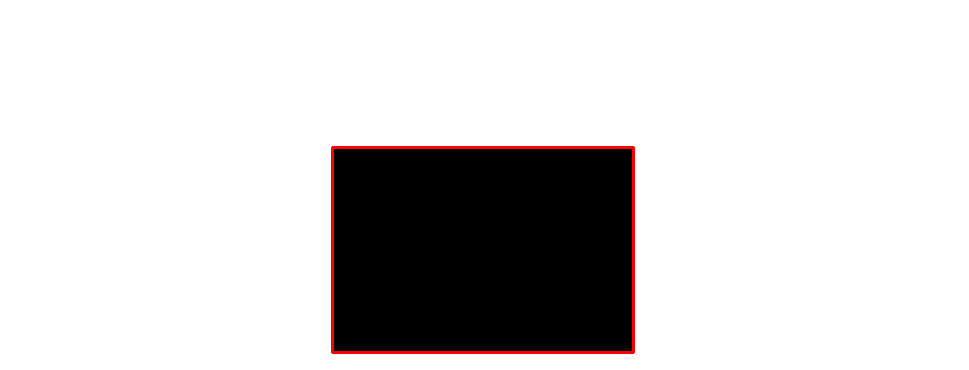

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


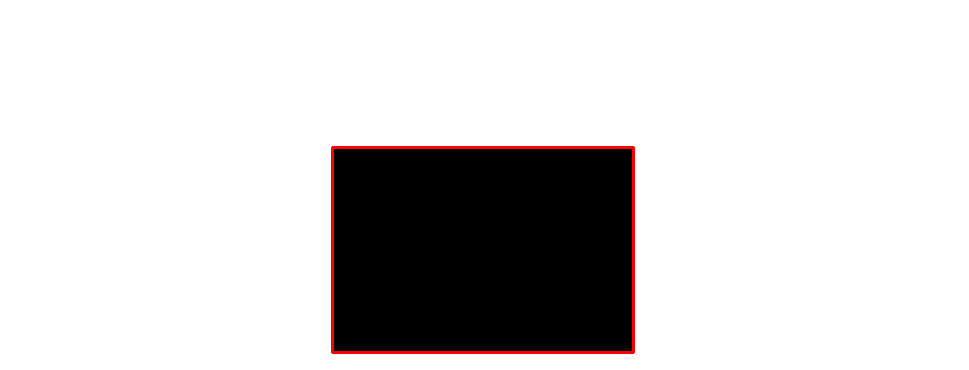

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


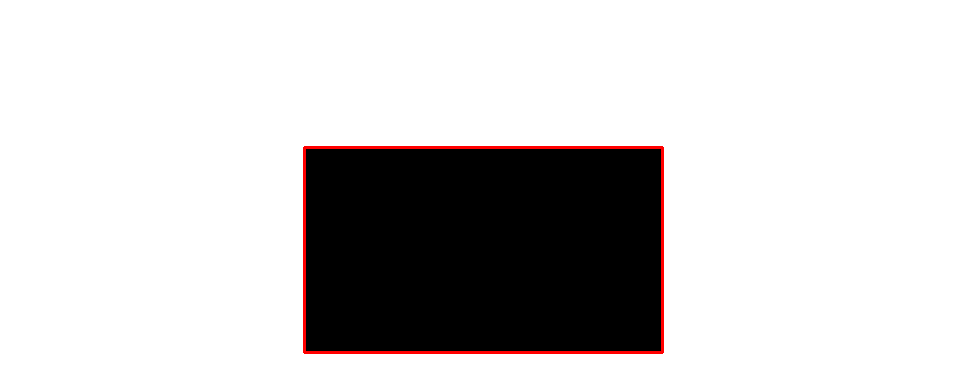

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


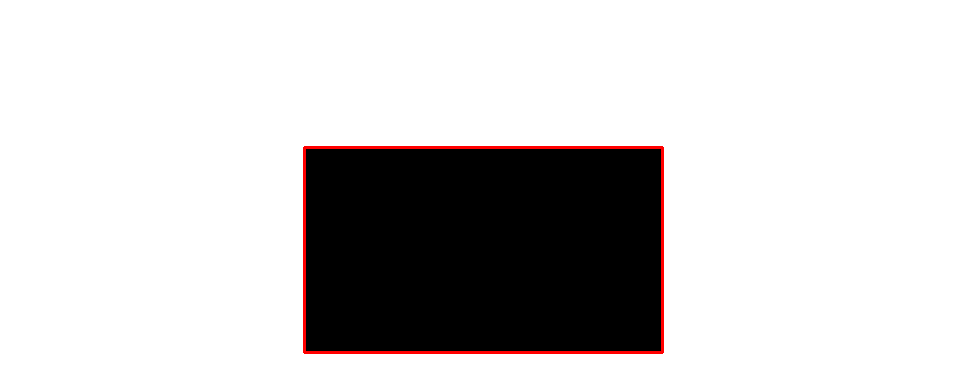

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


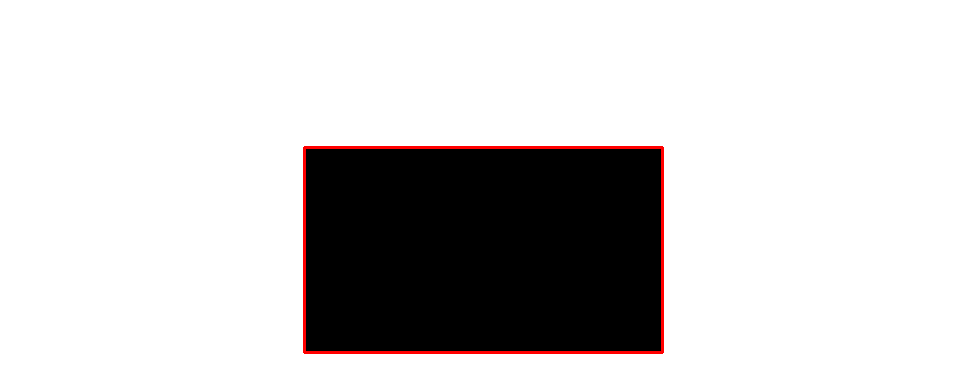

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


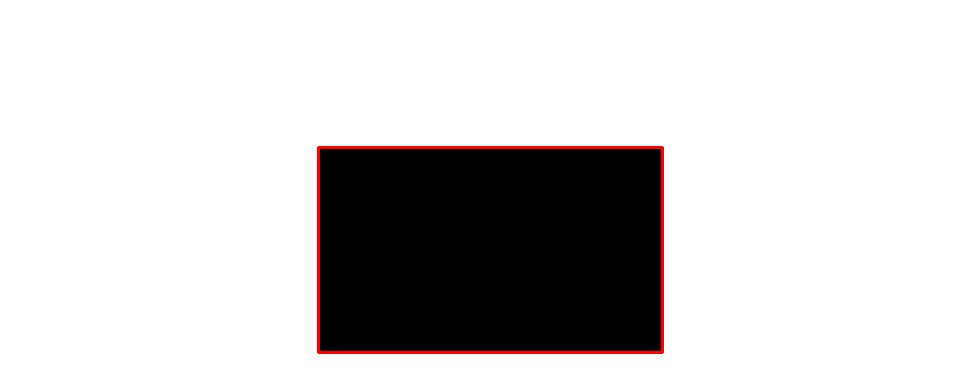

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


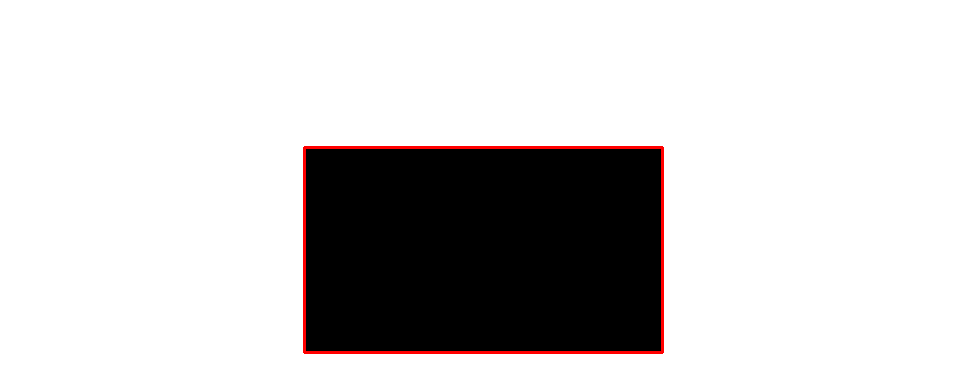

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


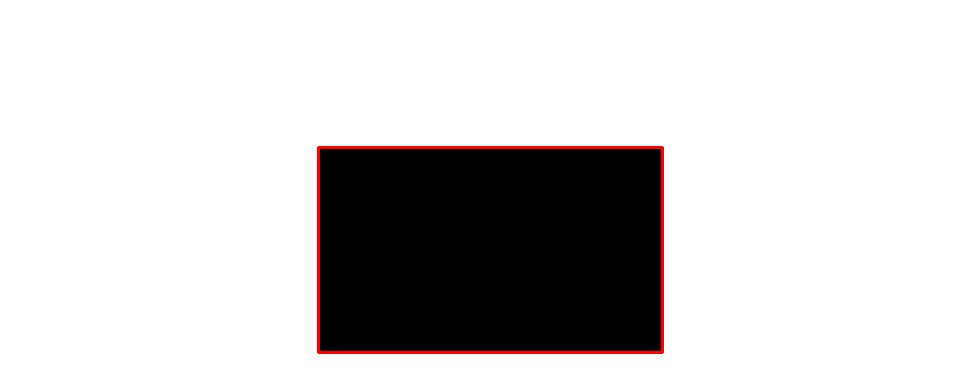

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


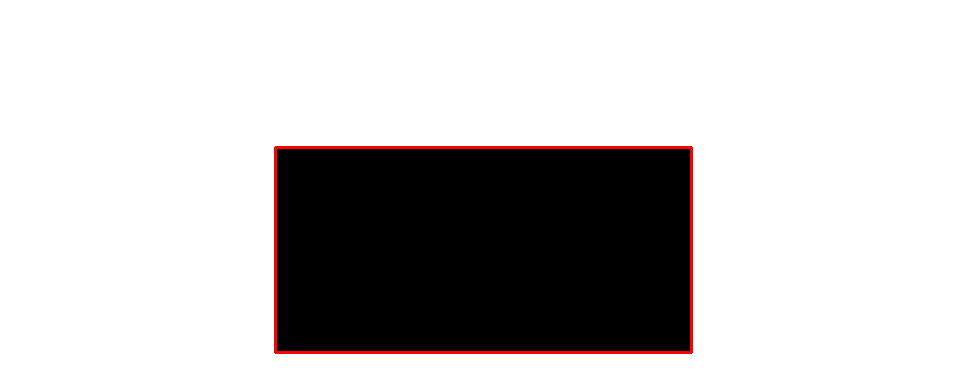

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


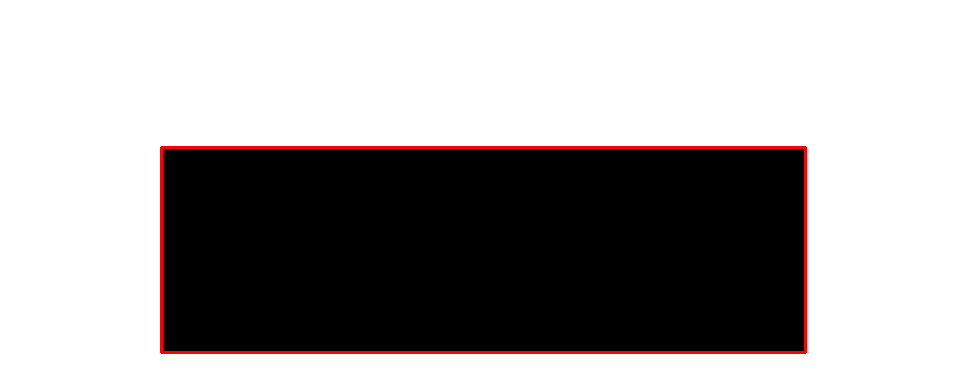

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


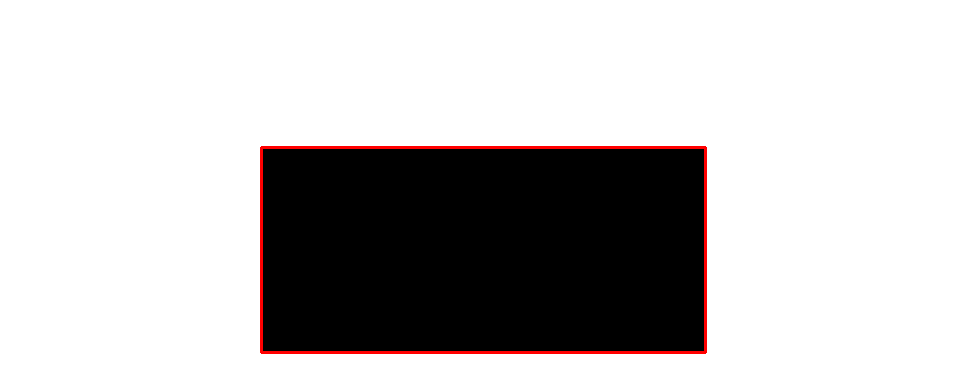

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


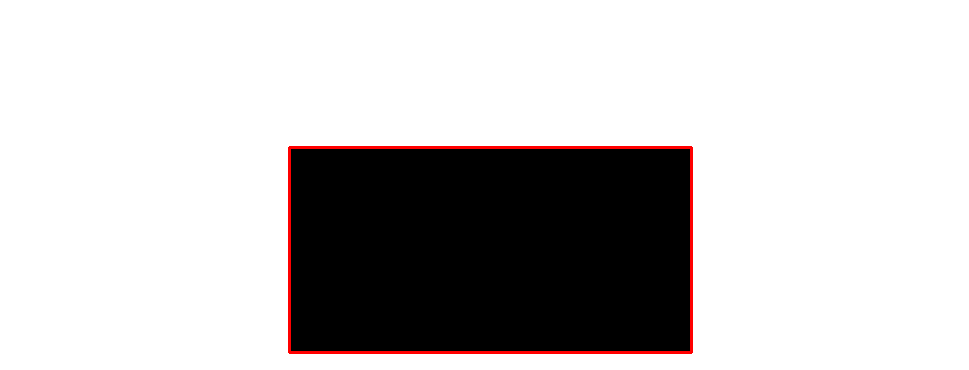

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


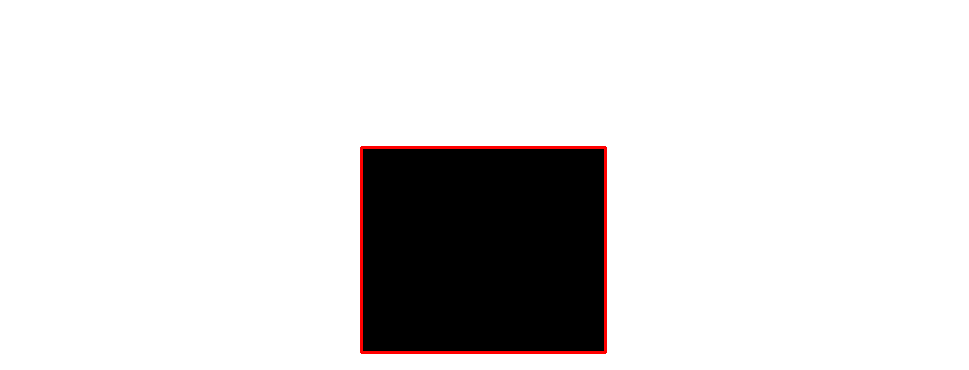

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


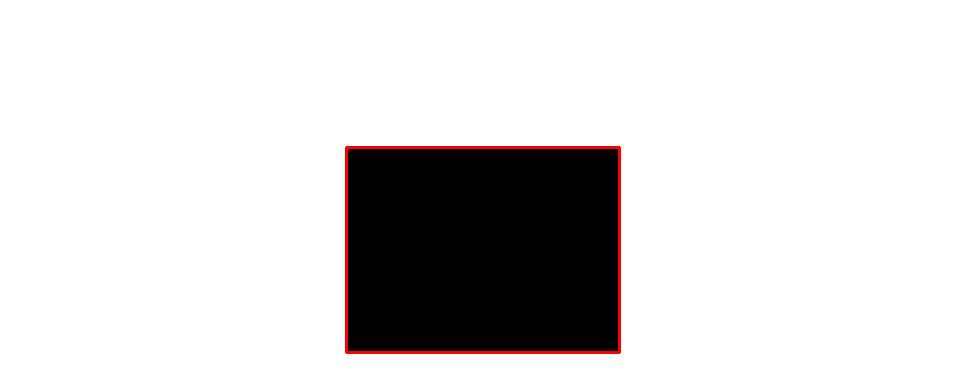

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

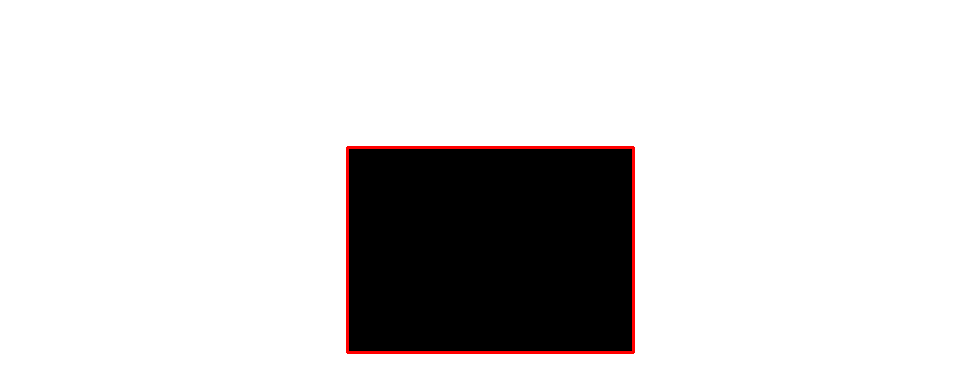

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


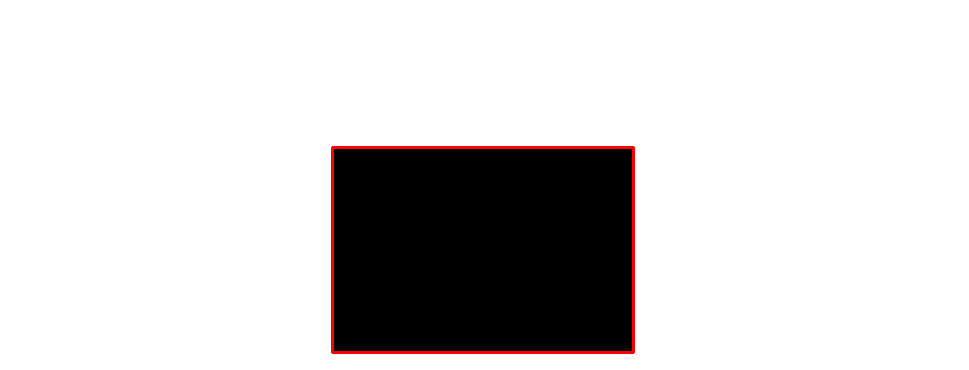

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


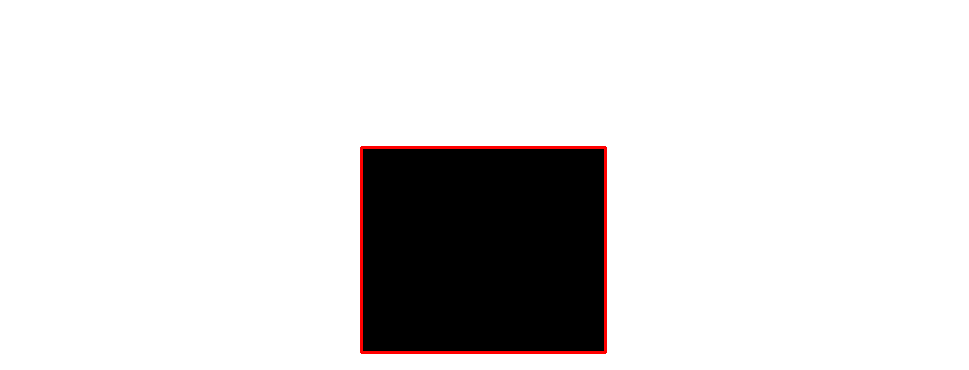

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


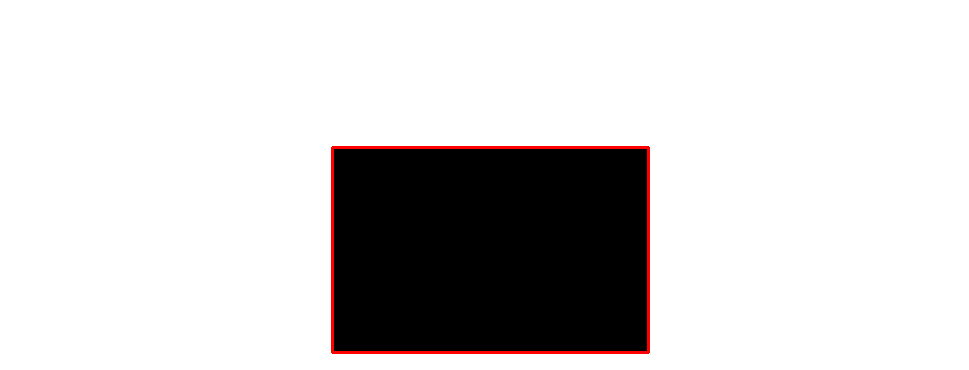

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


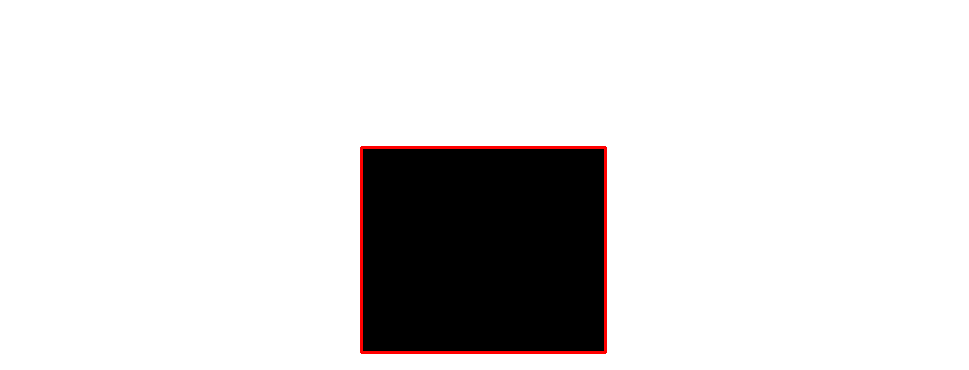

No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


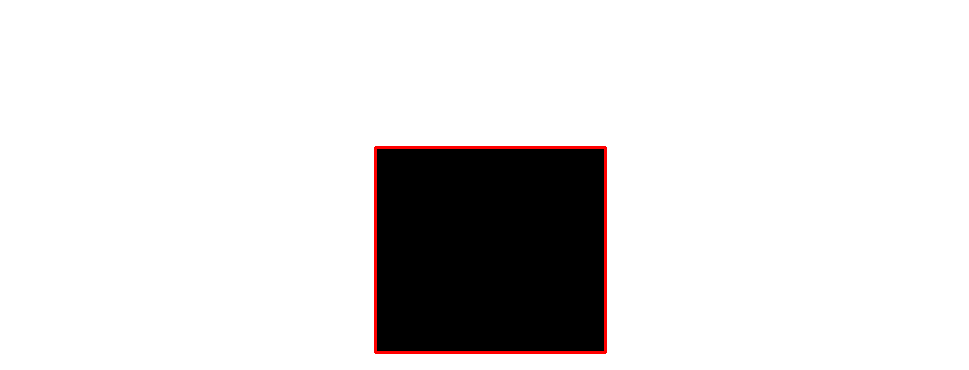

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


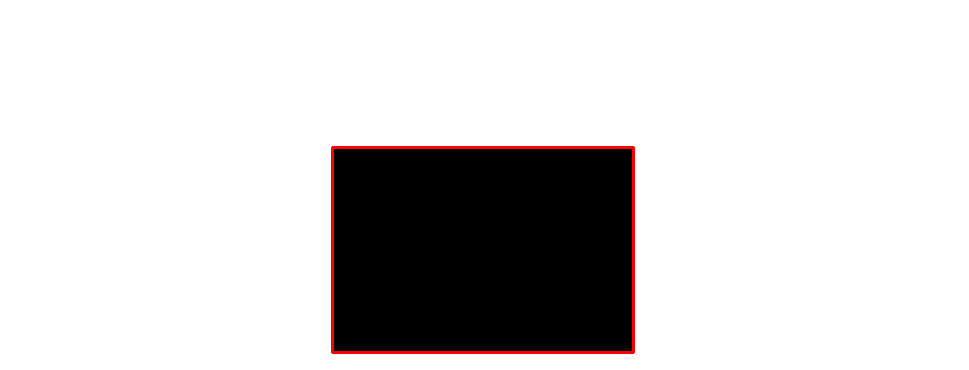

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


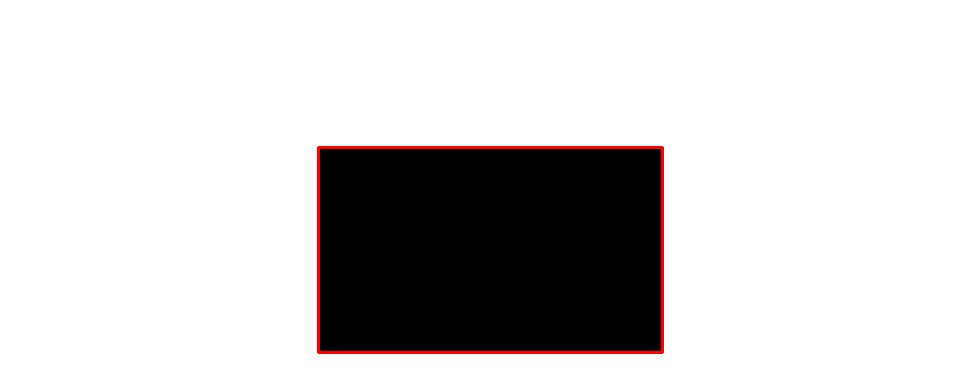

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


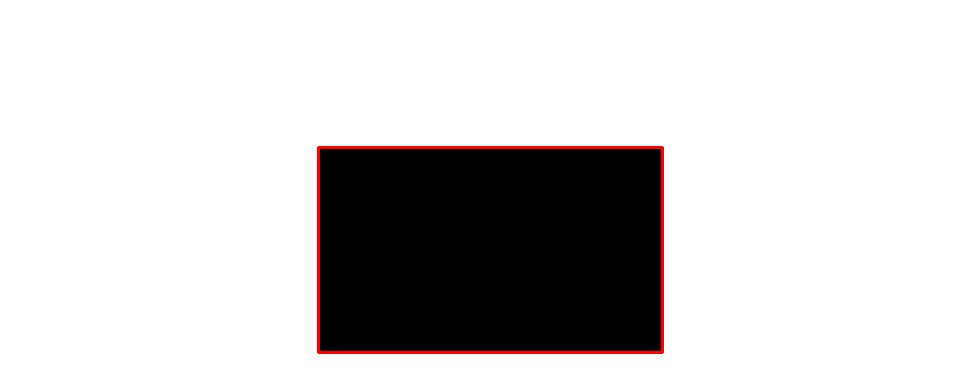

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


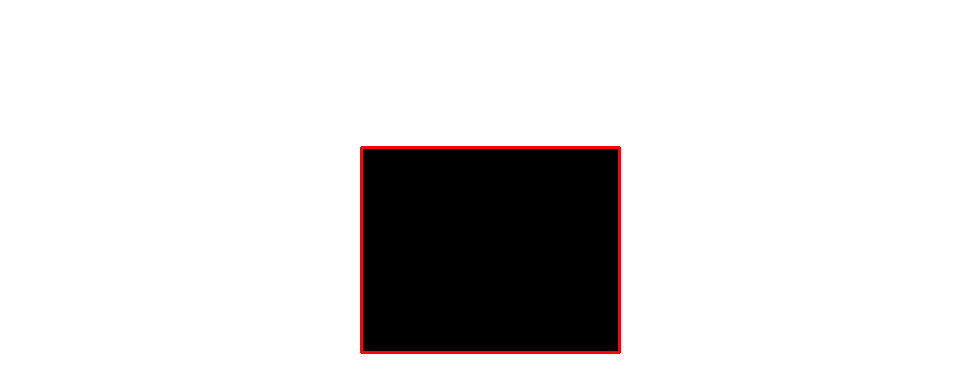

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


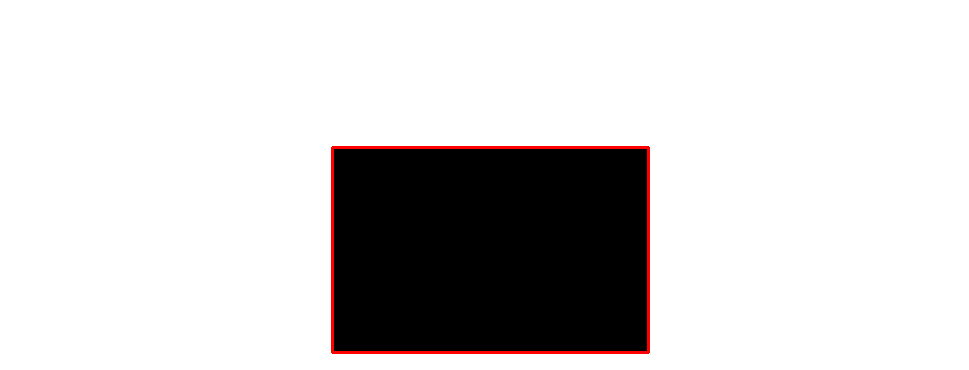

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


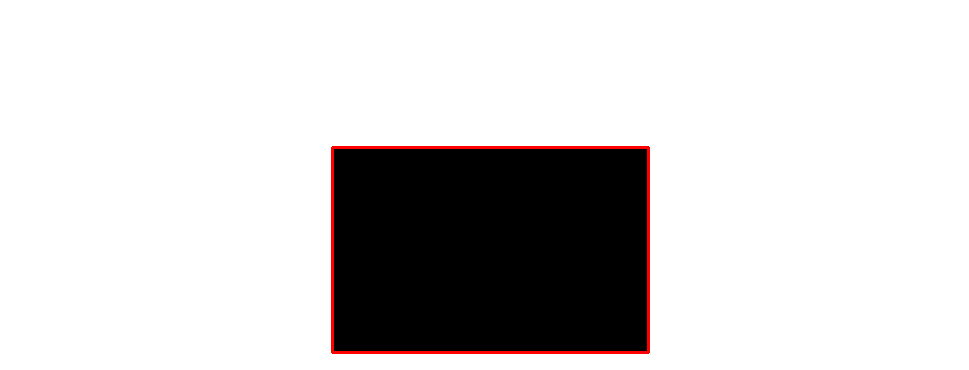

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


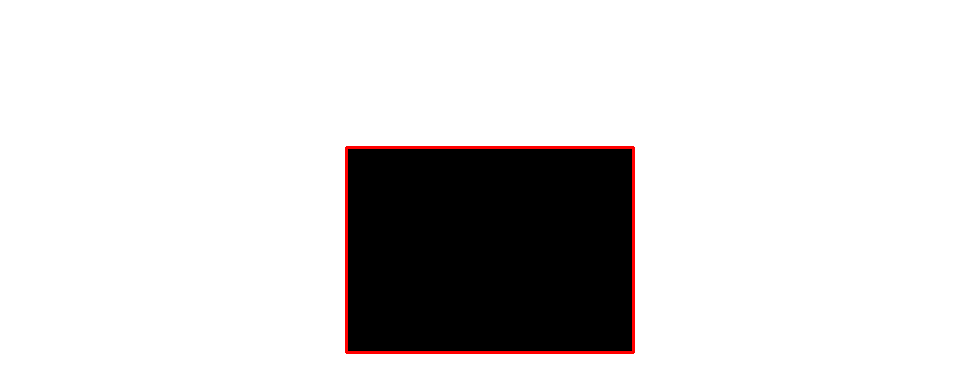

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


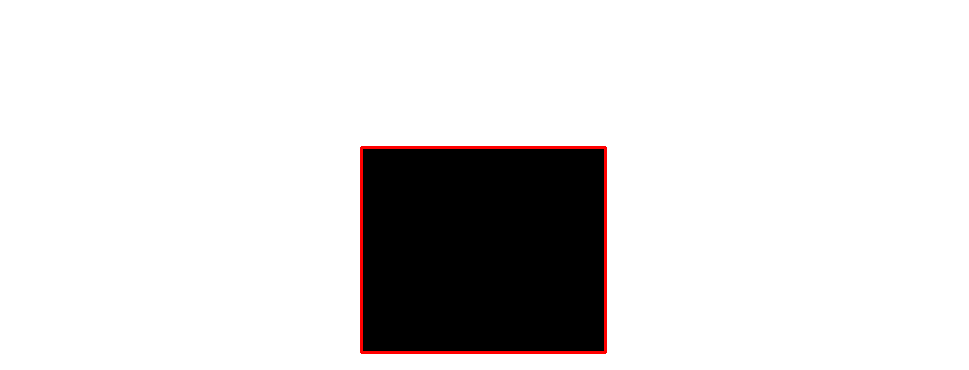

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


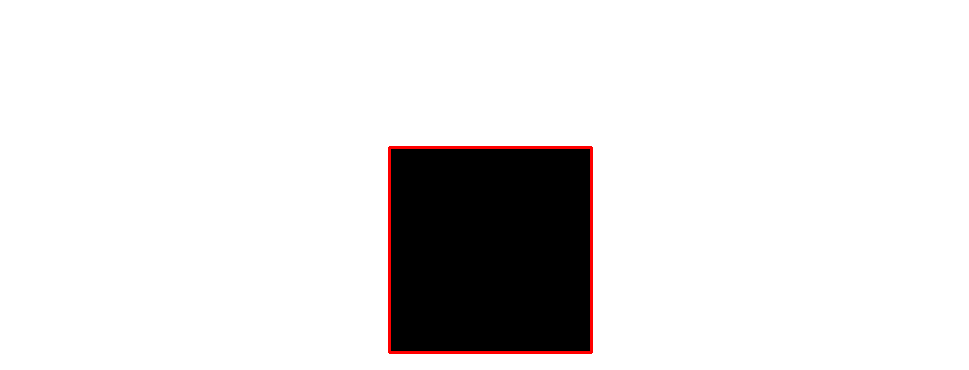

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


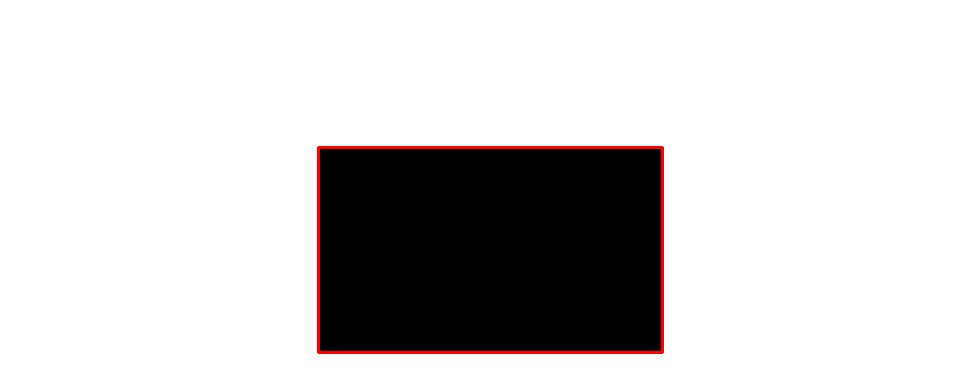

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


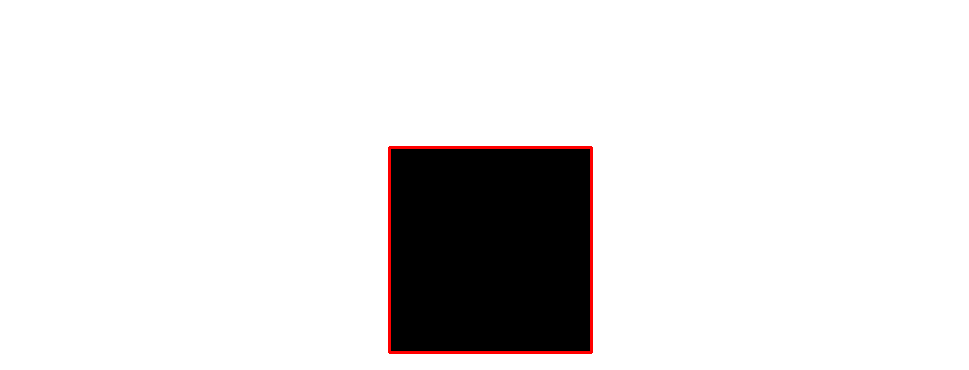

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


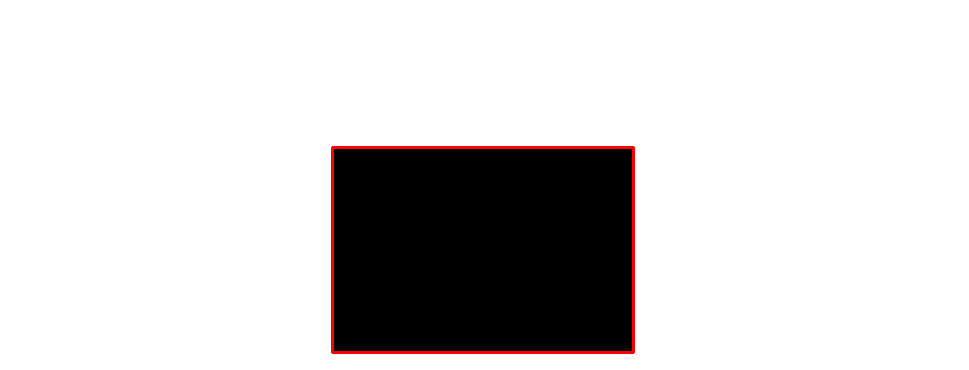

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


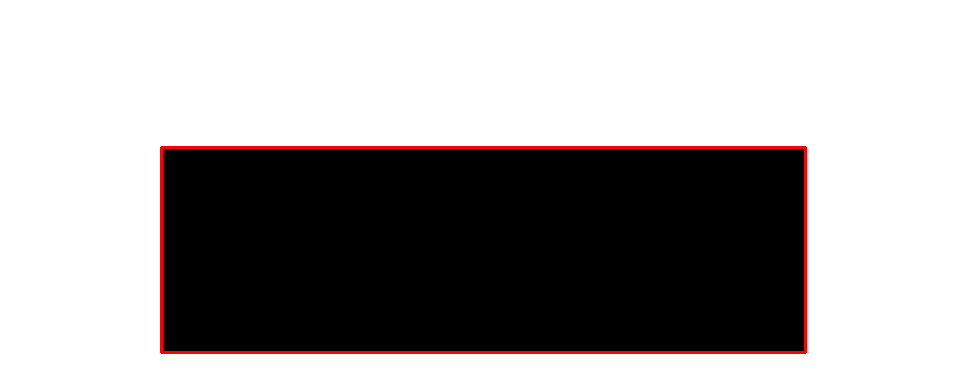

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


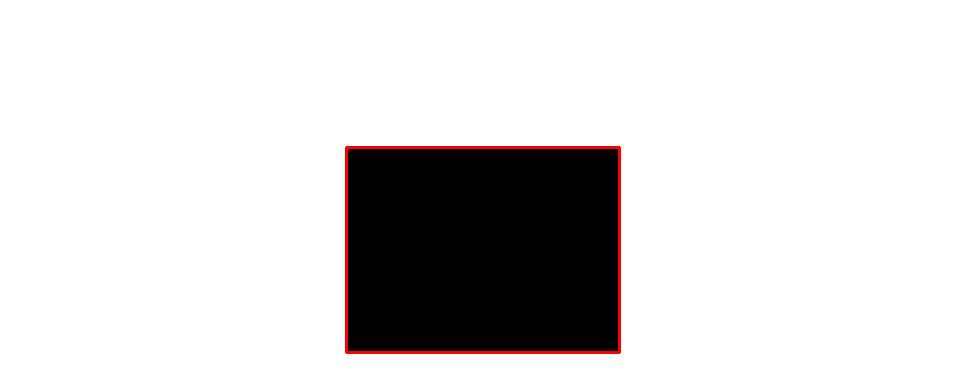

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


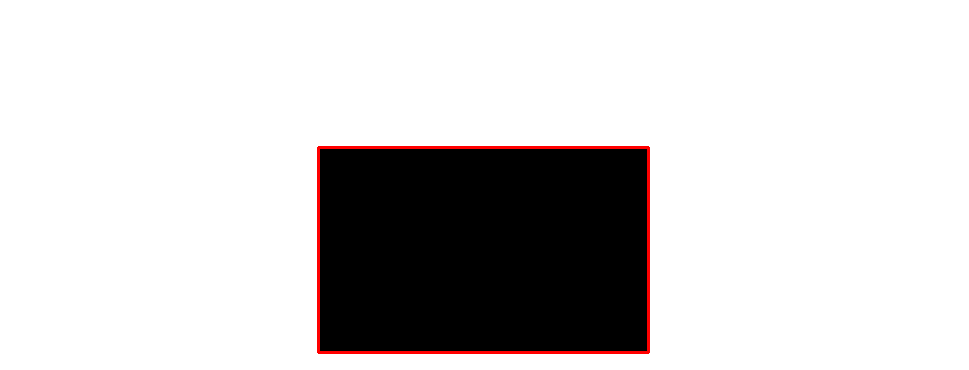

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


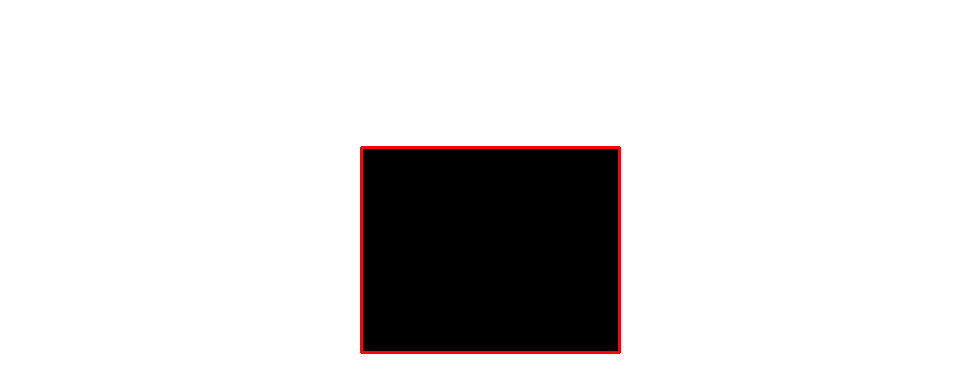

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


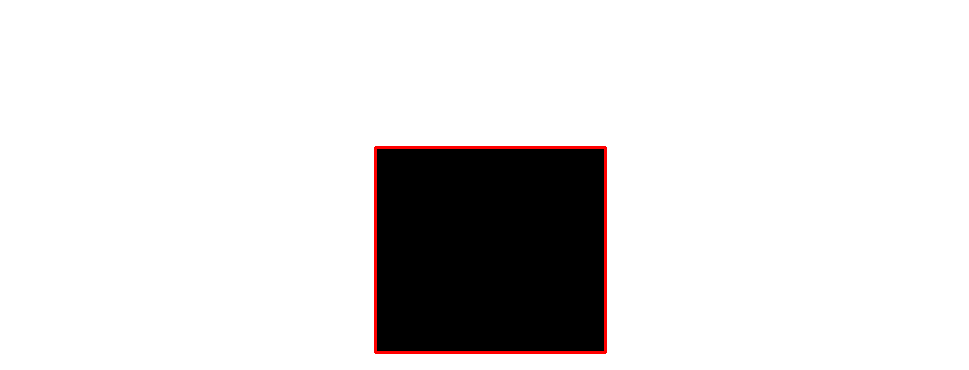

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


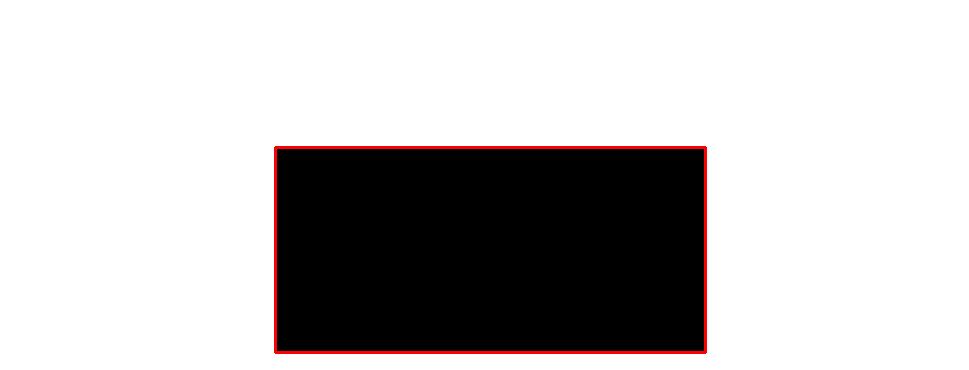

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


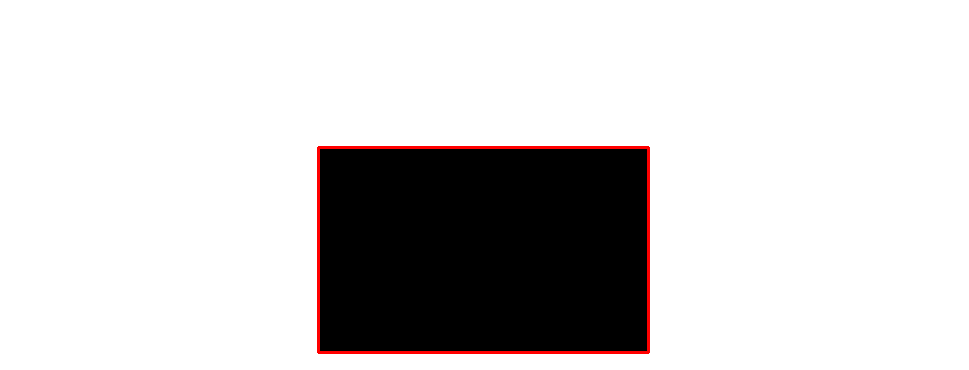

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


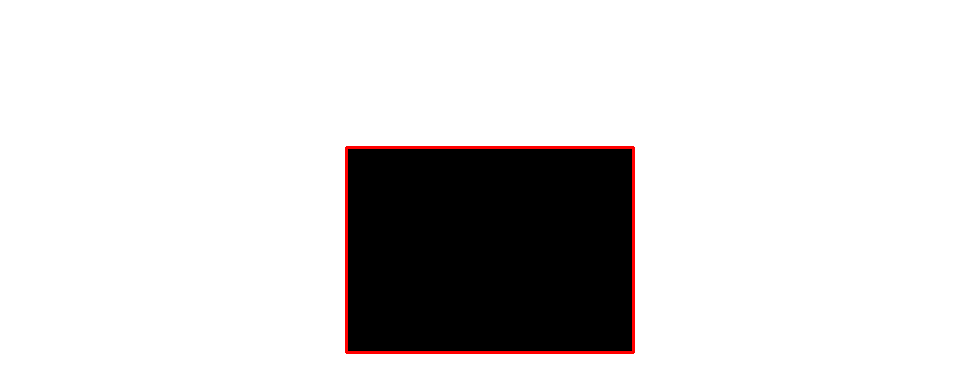

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


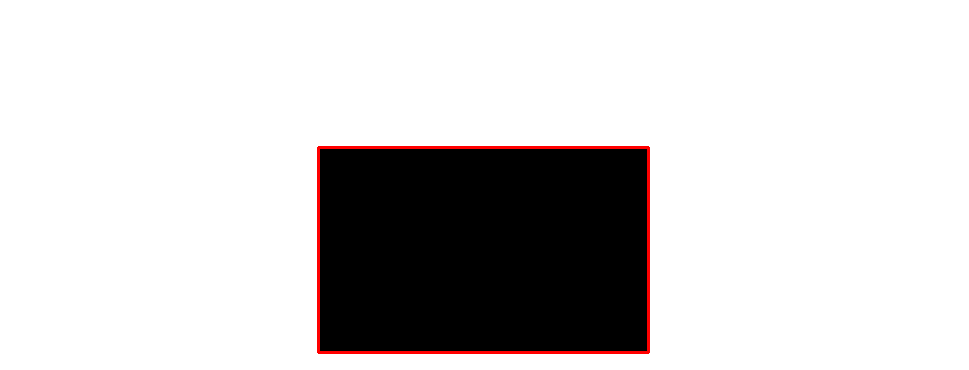

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


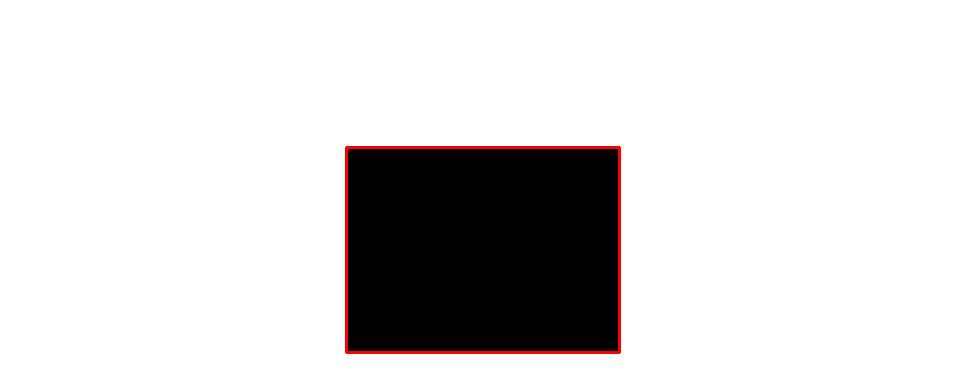

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

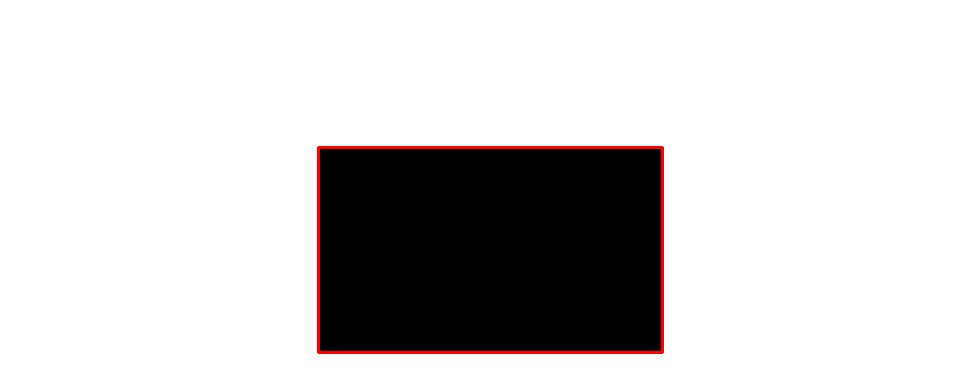

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


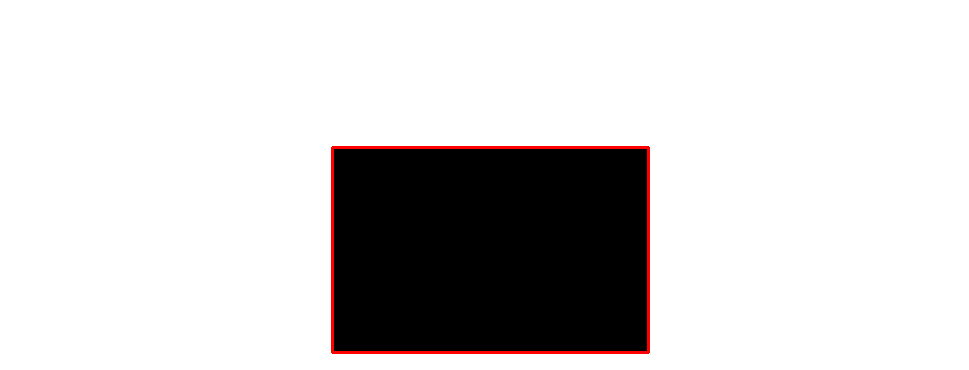

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


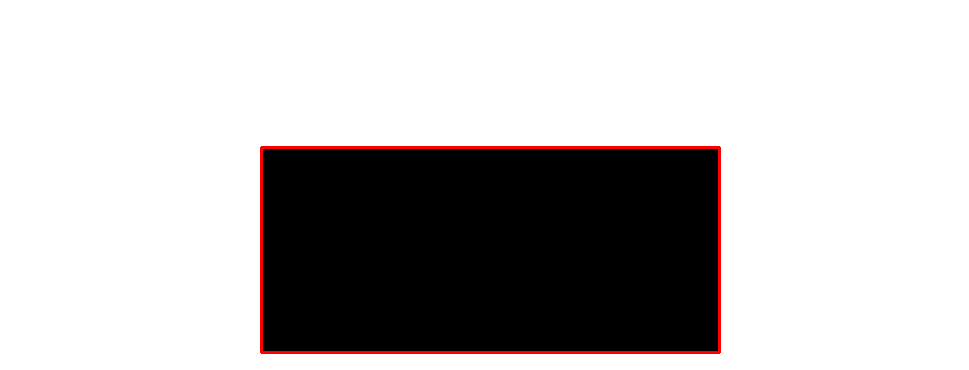

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


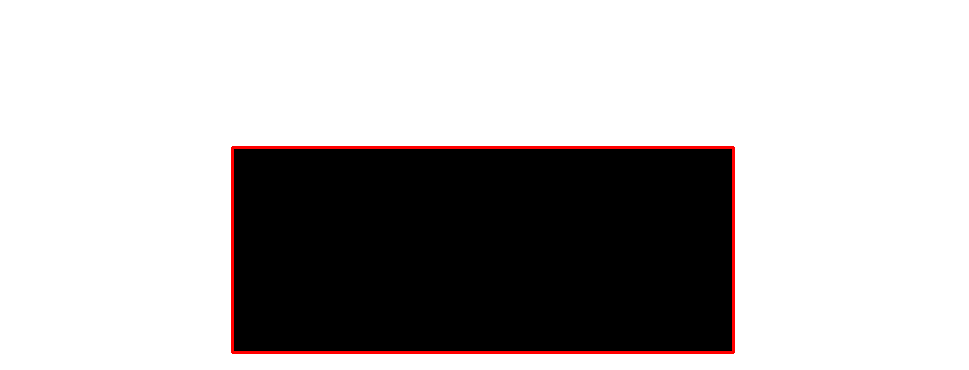

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


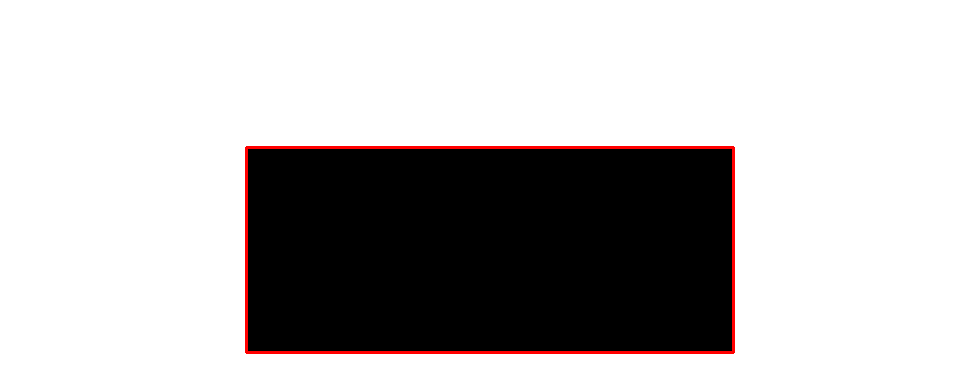

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


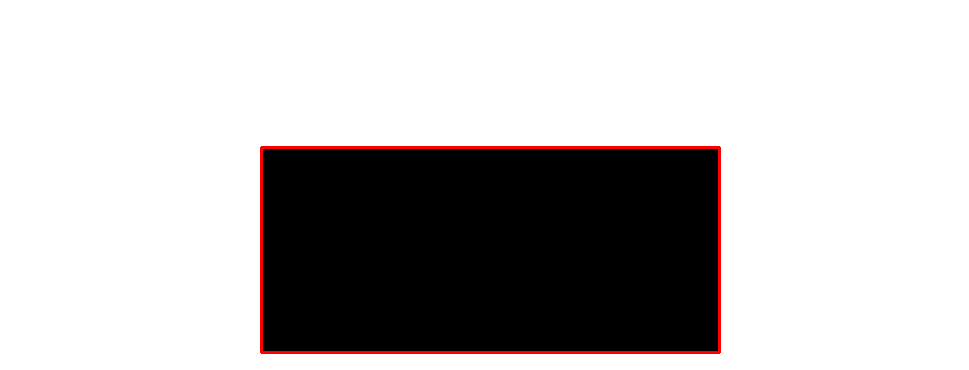

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


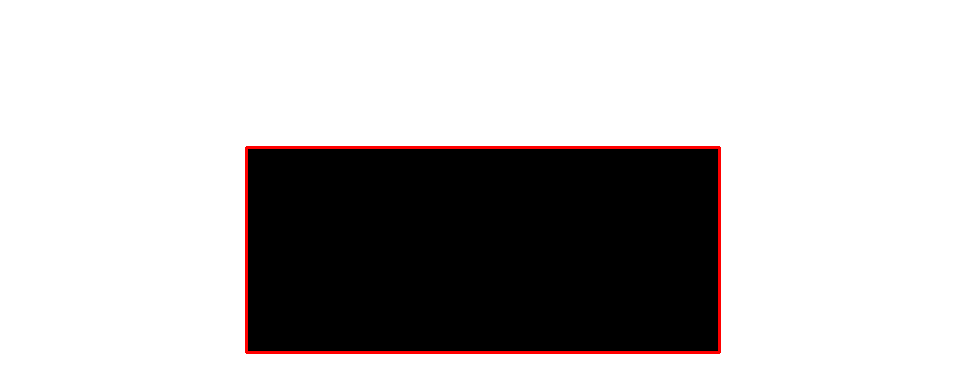

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


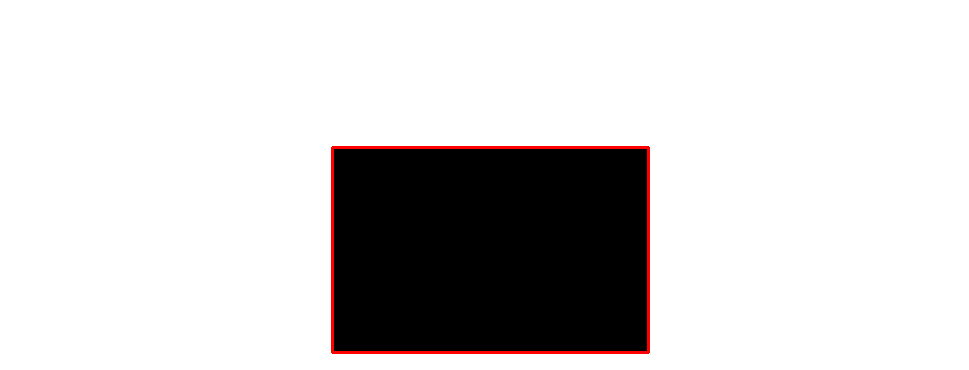

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


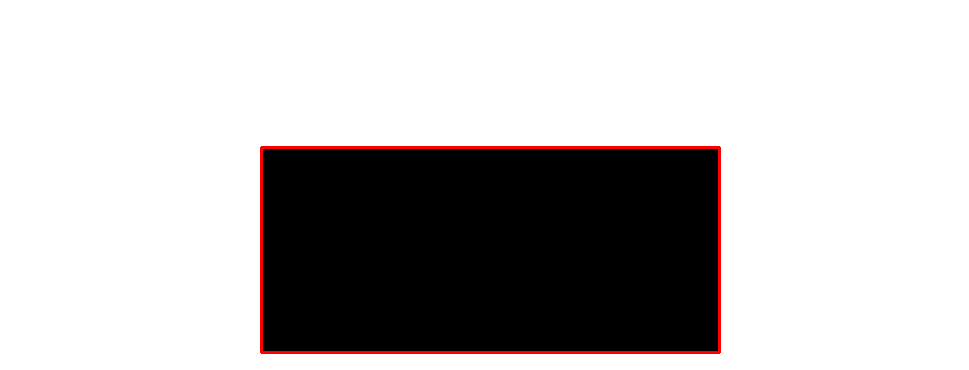

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


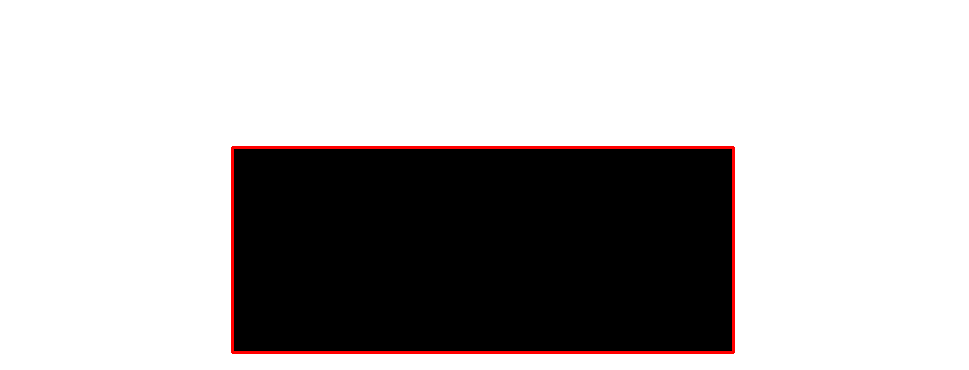

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


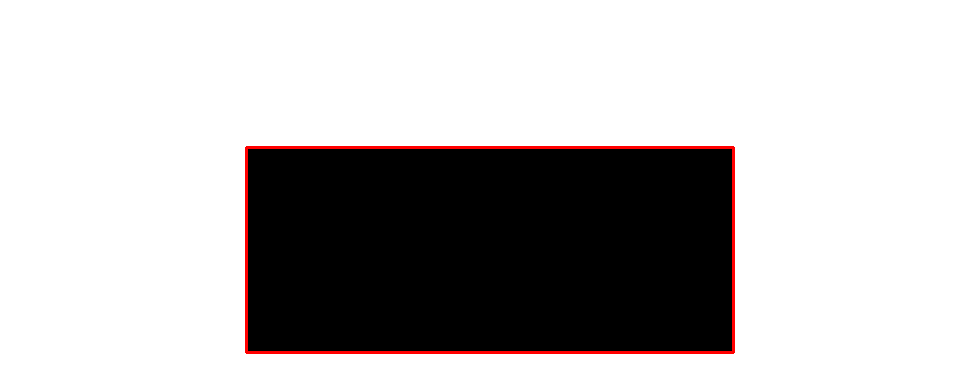

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


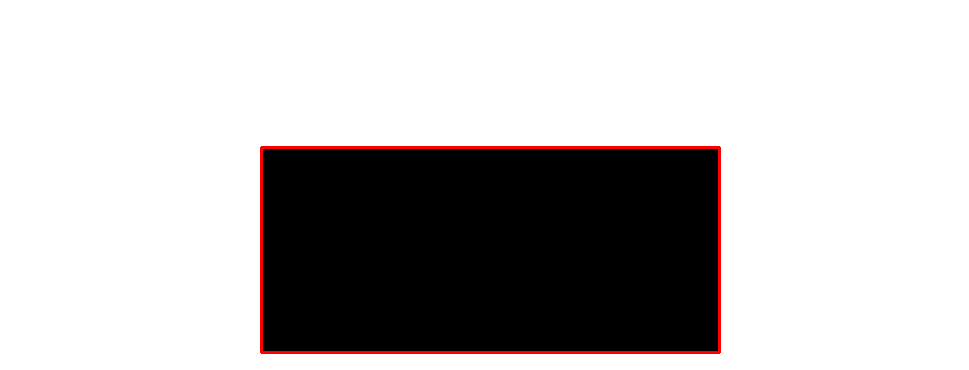

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


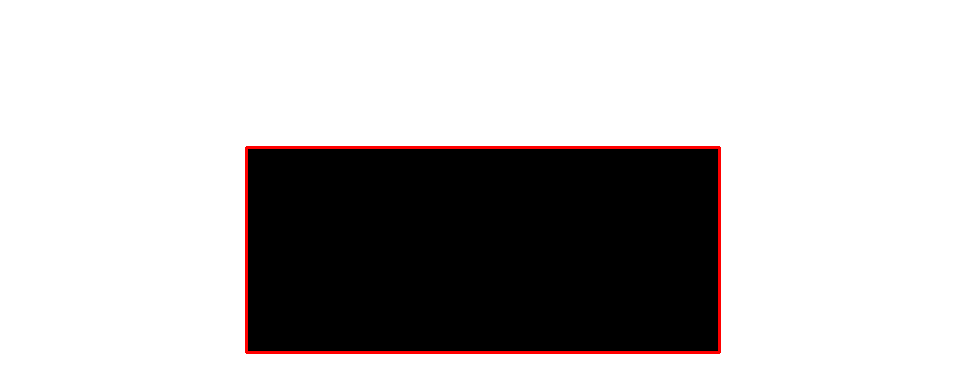

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


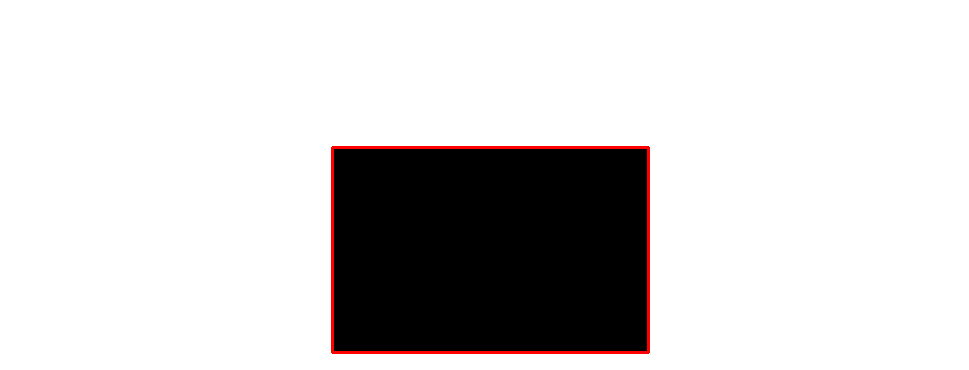

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


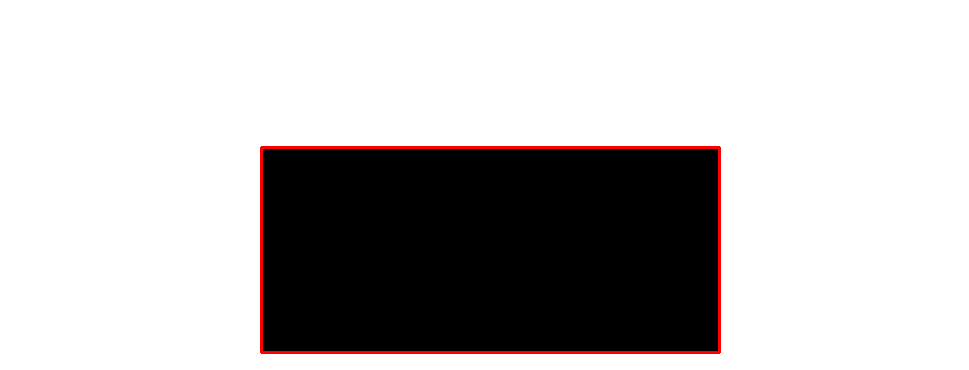

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


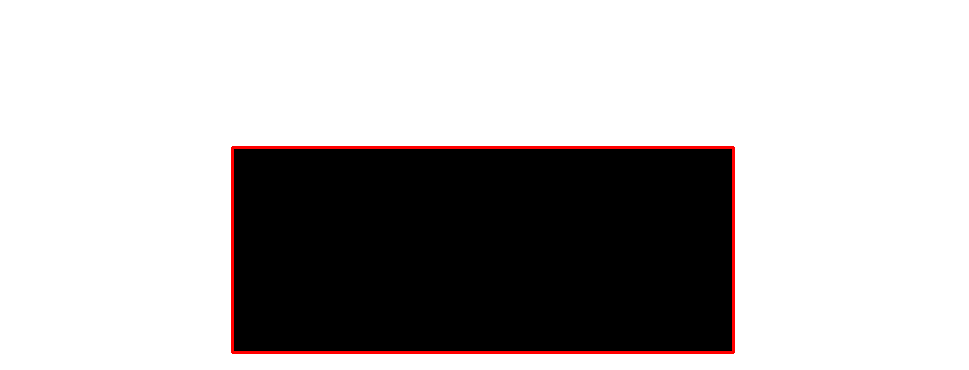

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


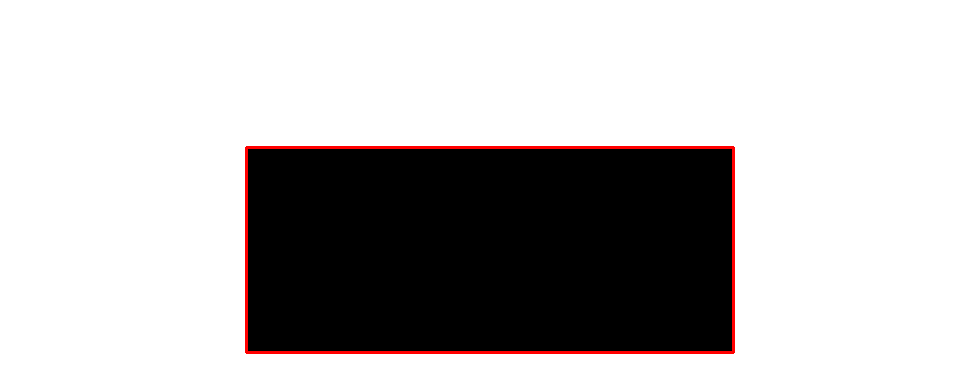

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


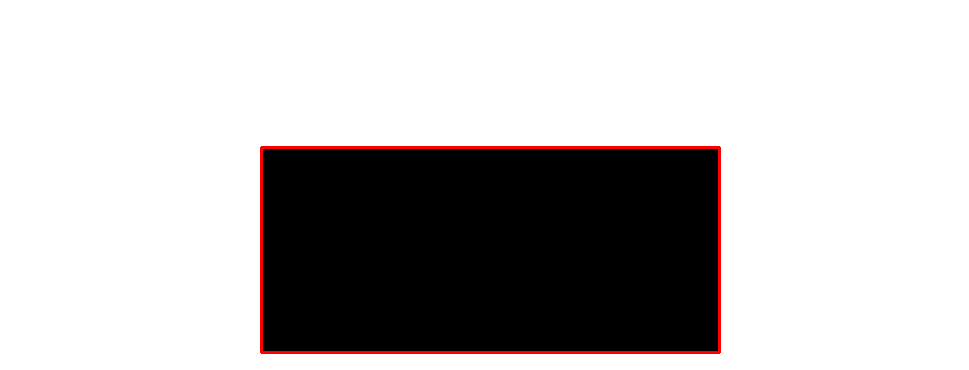

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


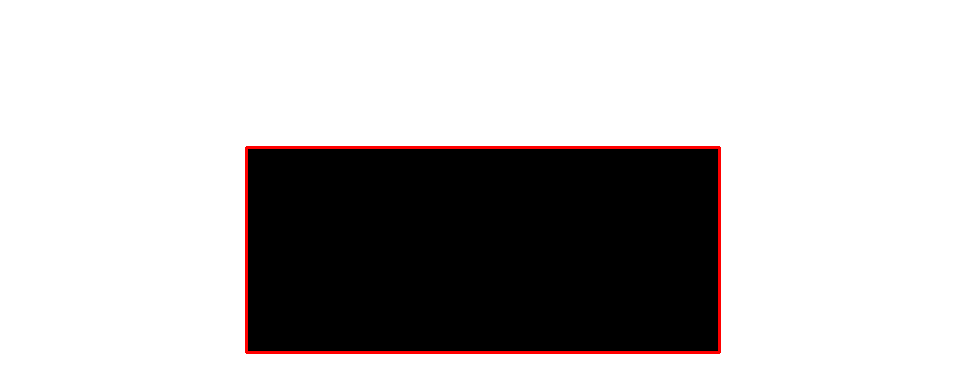

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


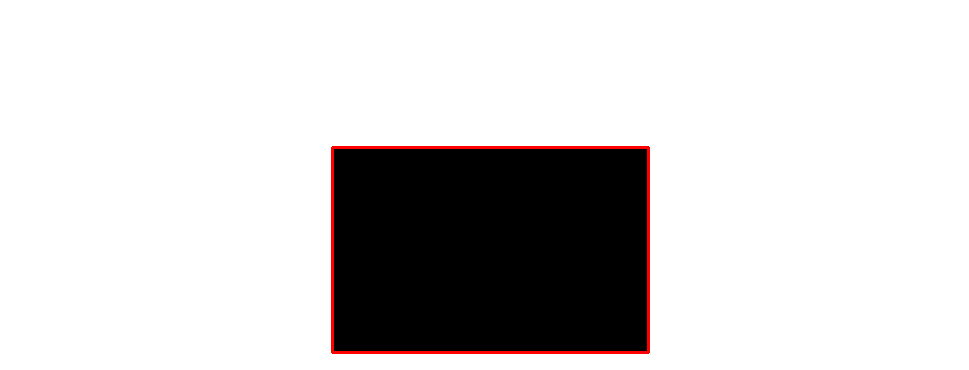

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


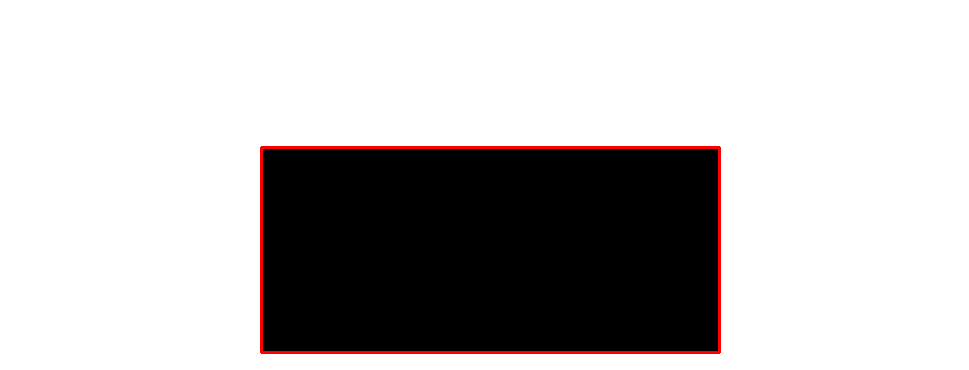

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


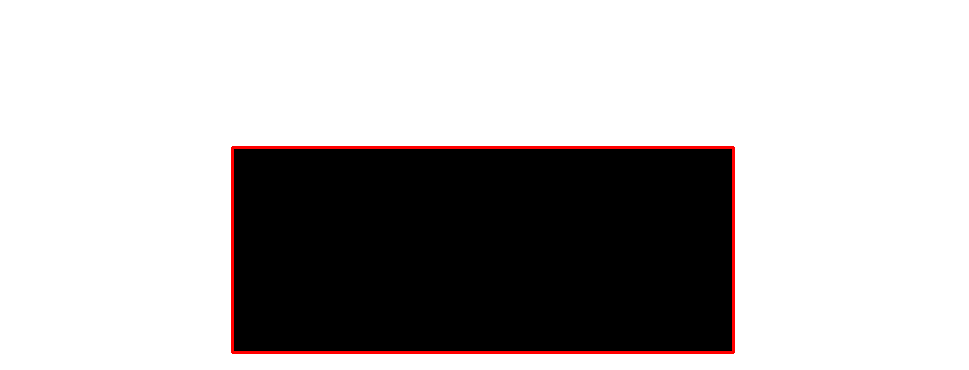

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


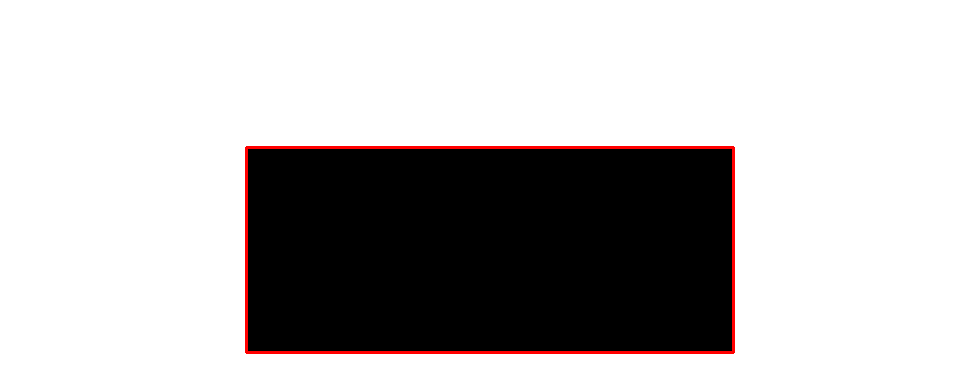

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


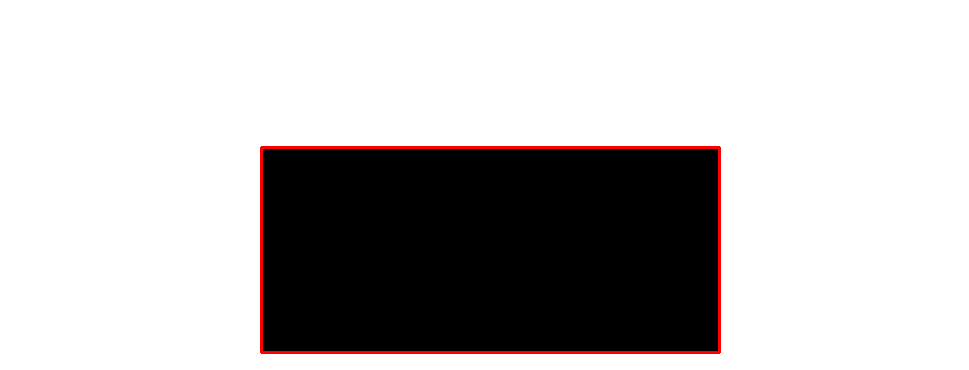

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


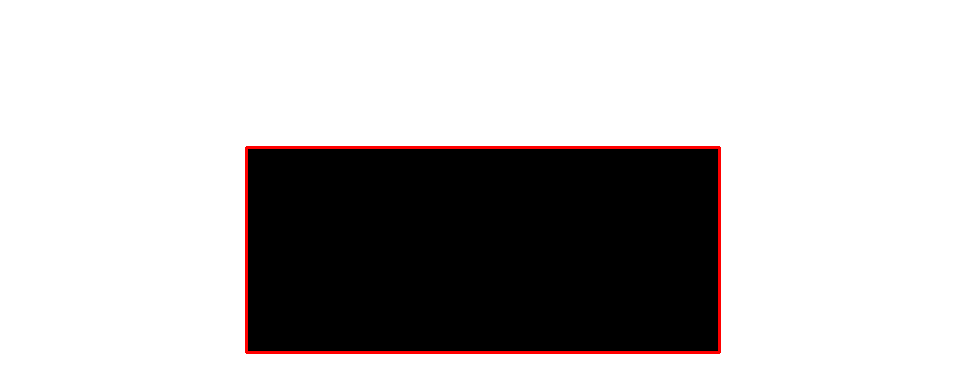

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


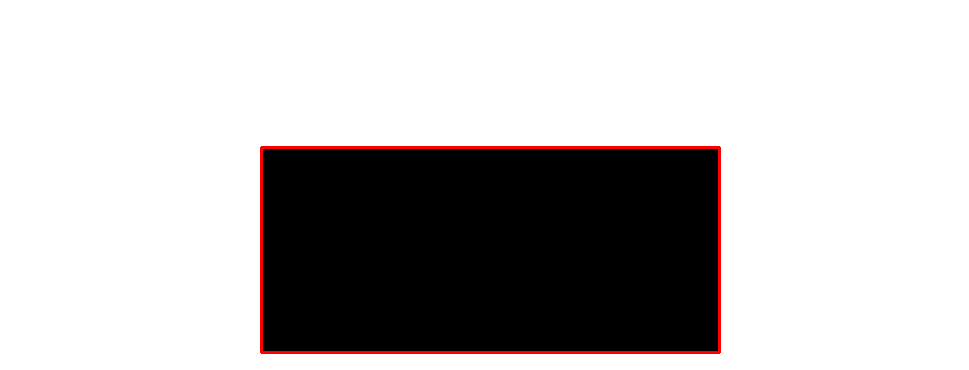

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


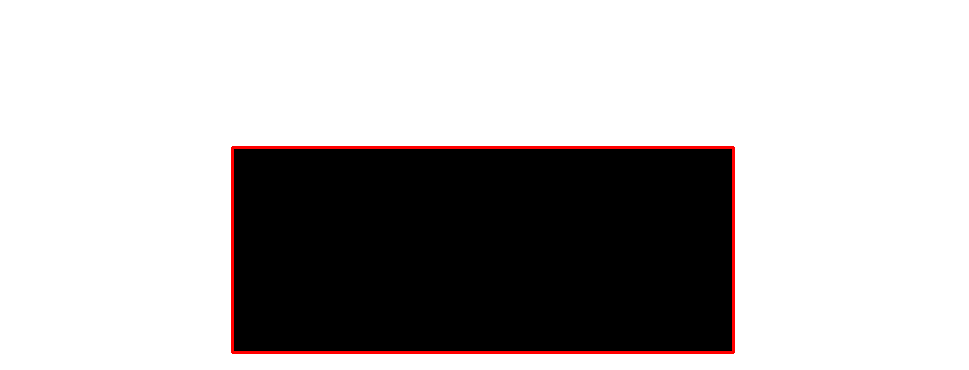

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


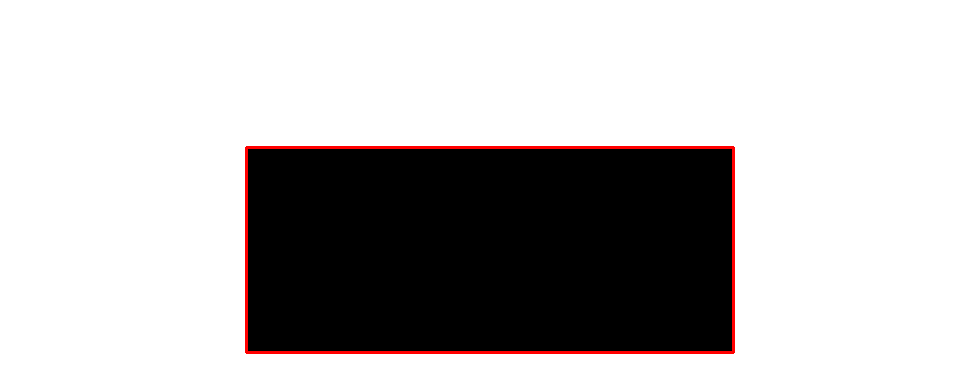

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


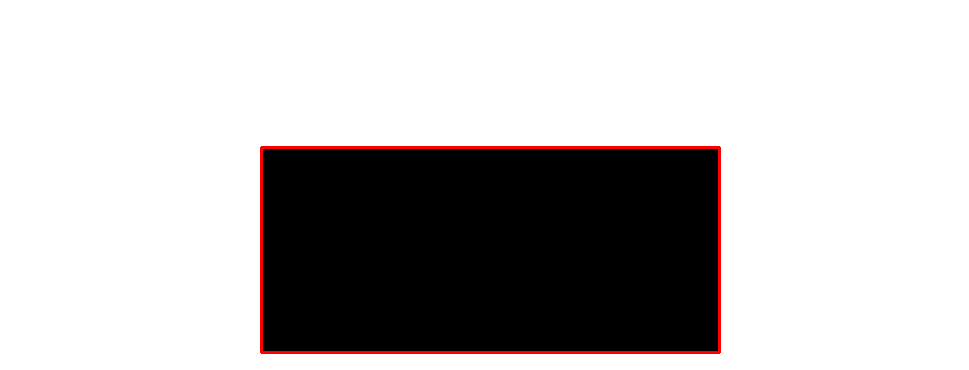

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


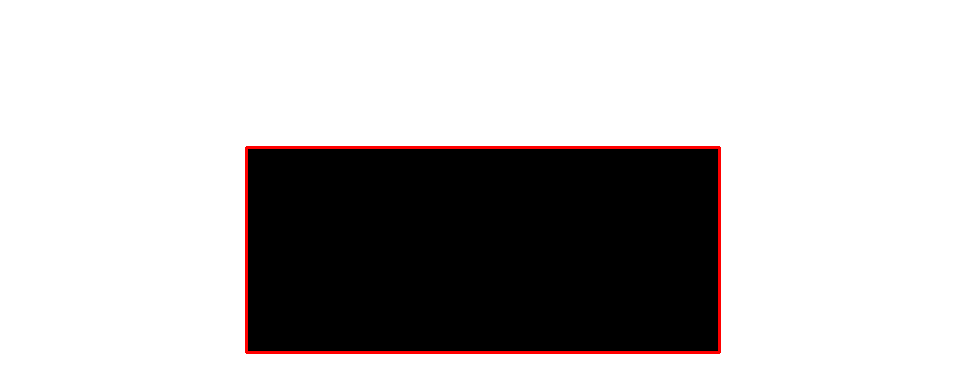

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


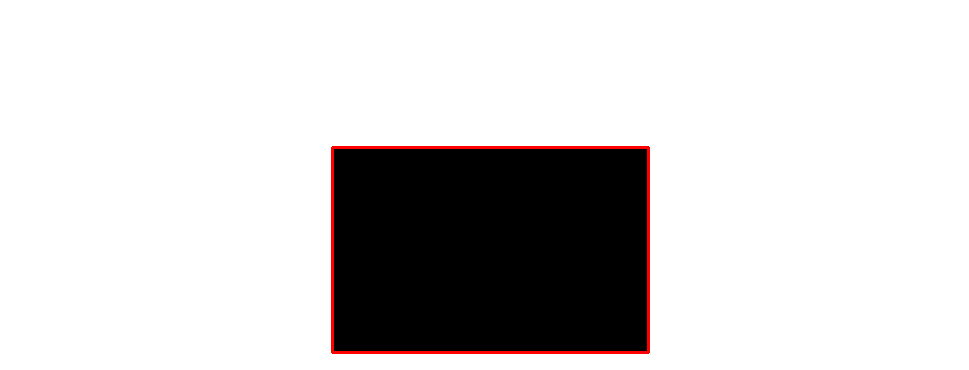

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


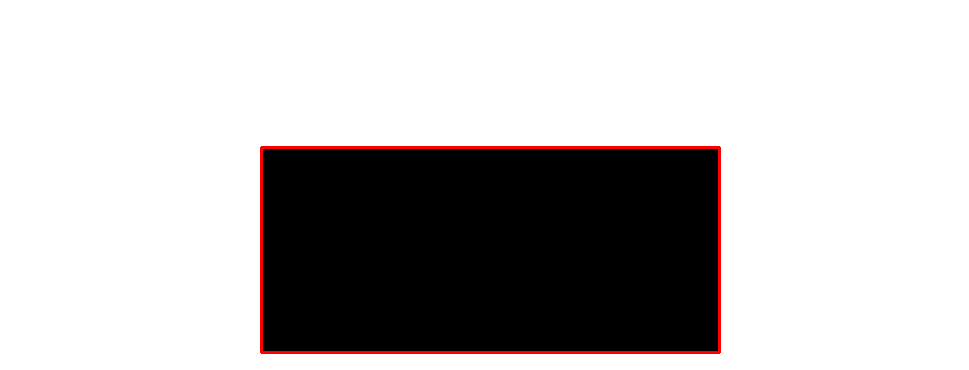

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


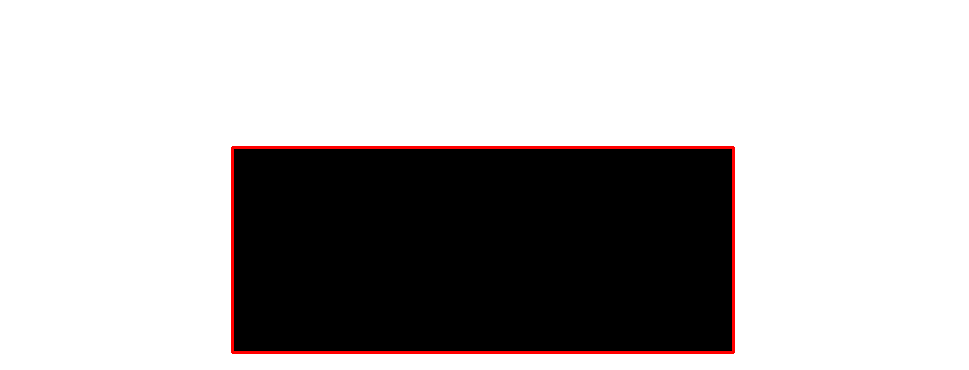

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


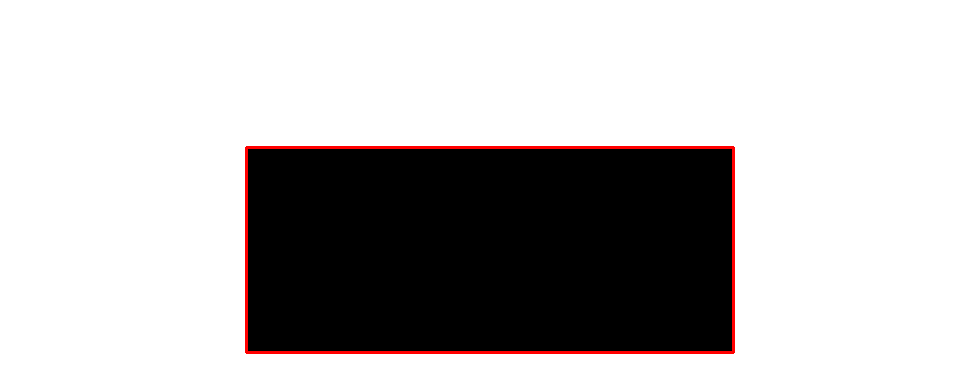

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


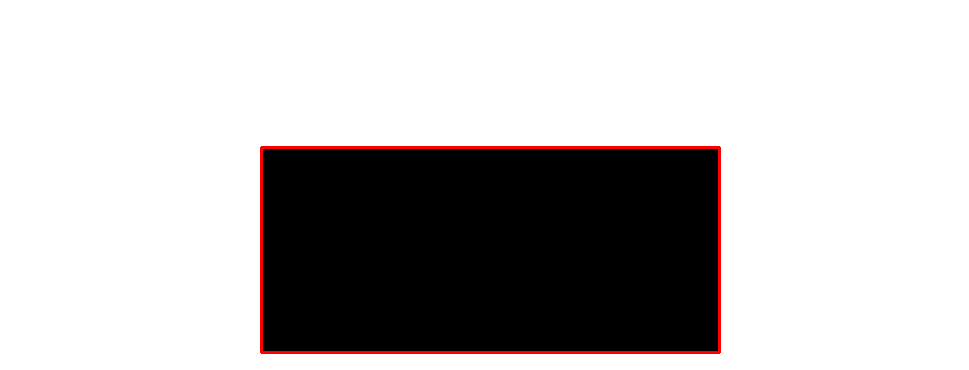

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


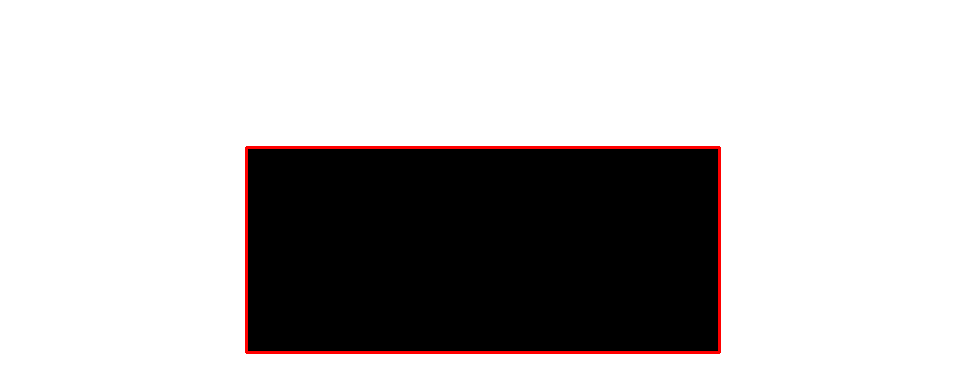

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

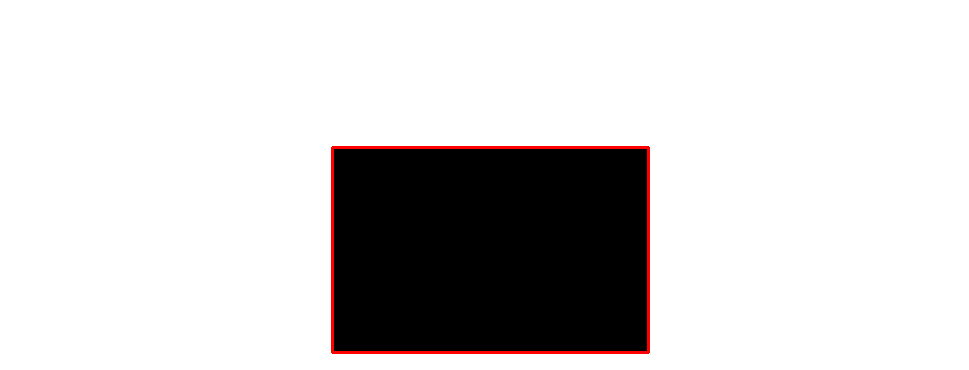

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


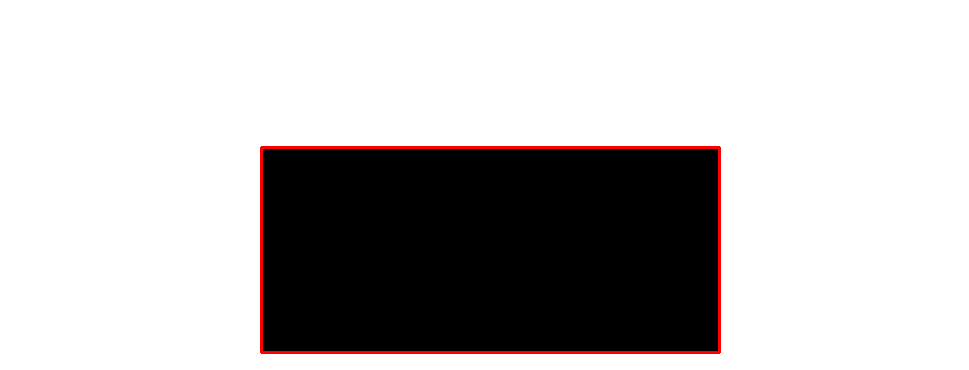

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


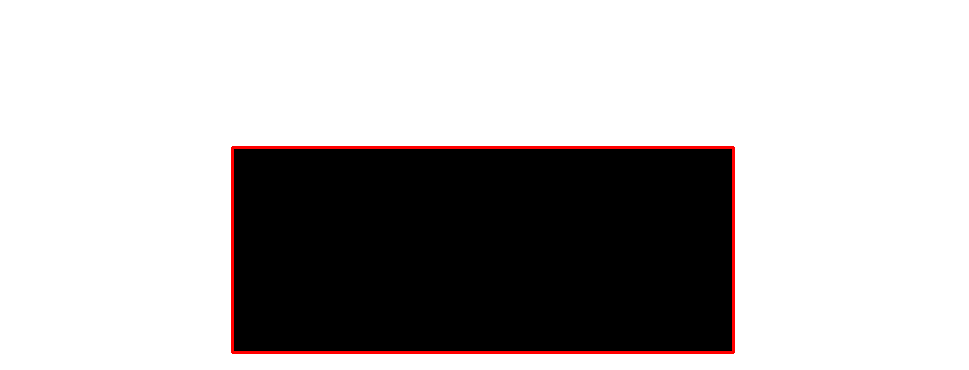

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


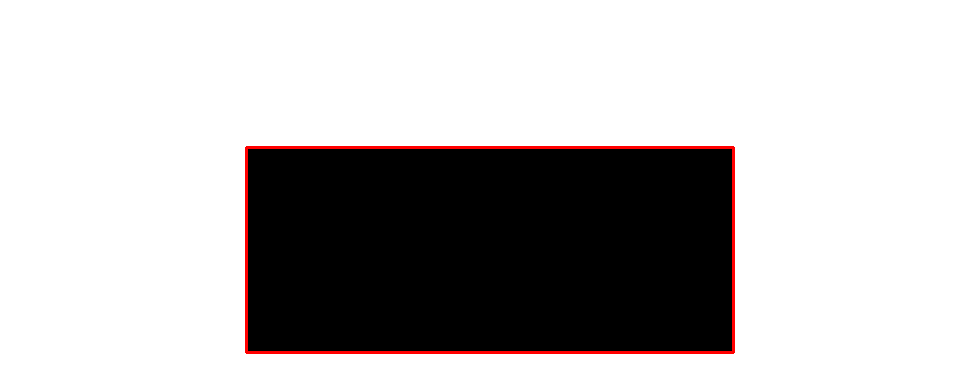

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


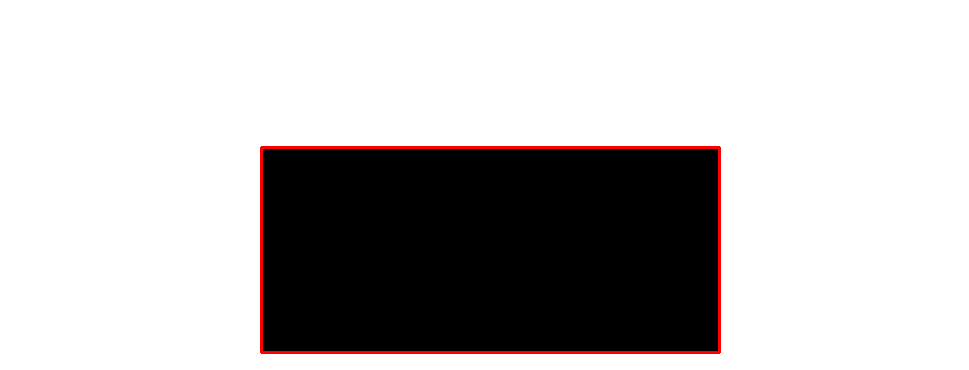

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


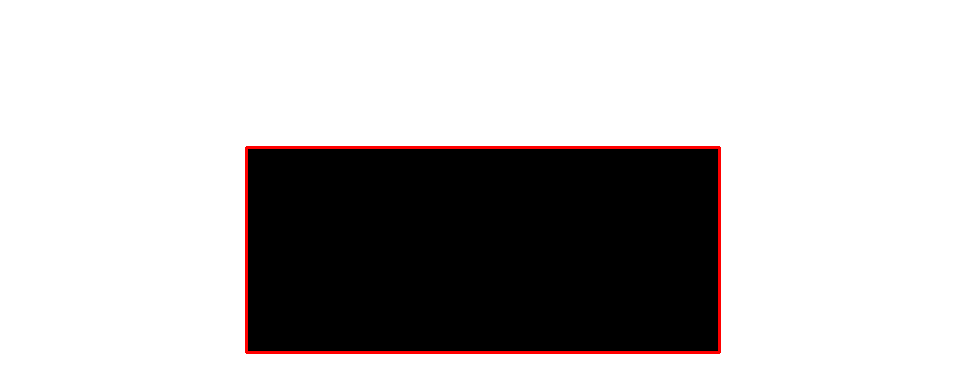

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

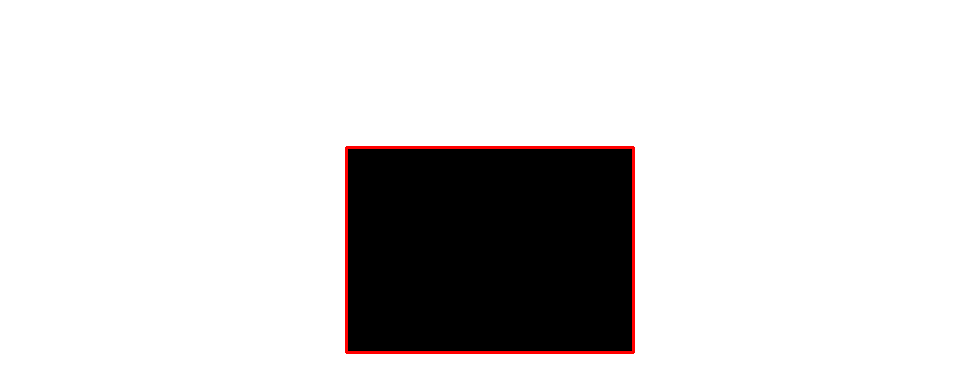

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

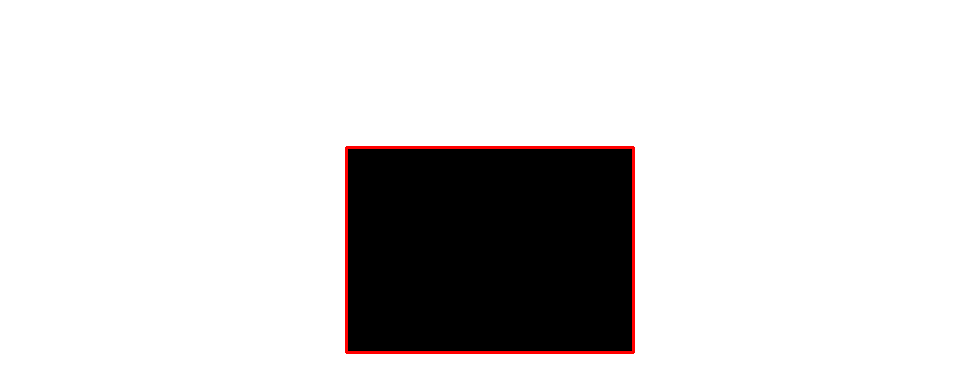

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


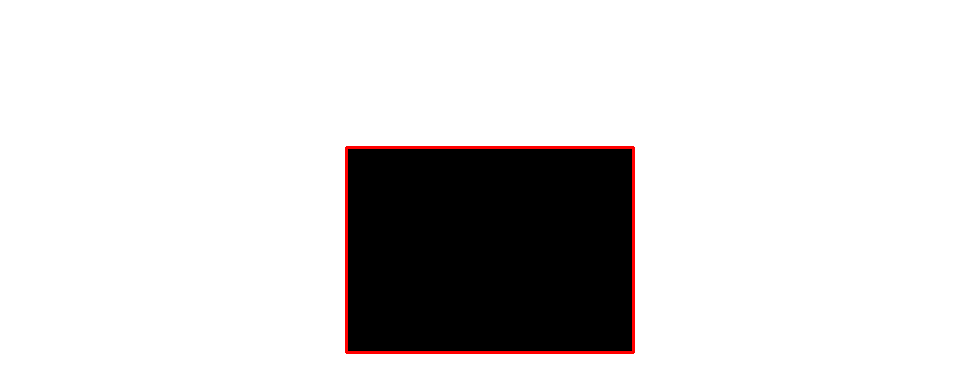

No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


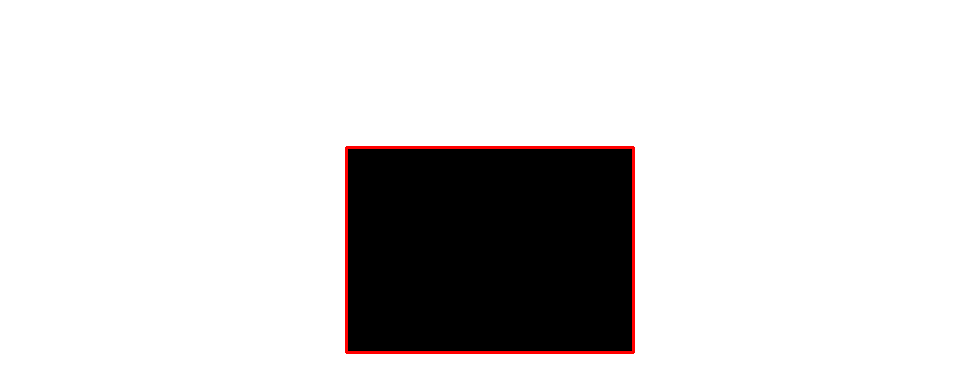

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


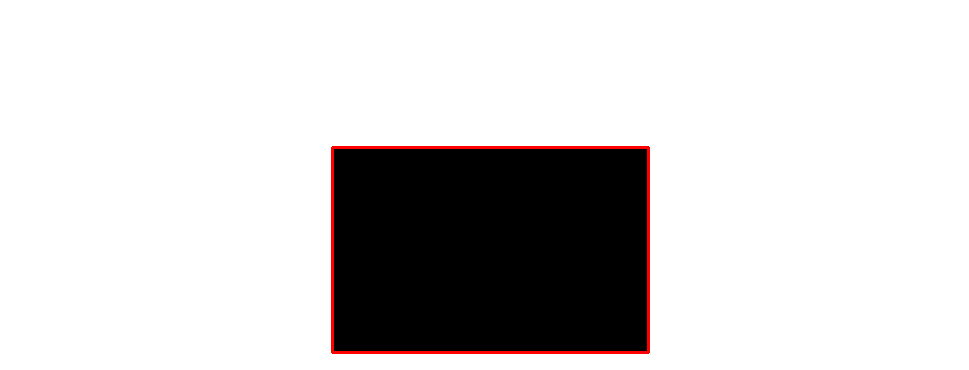

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


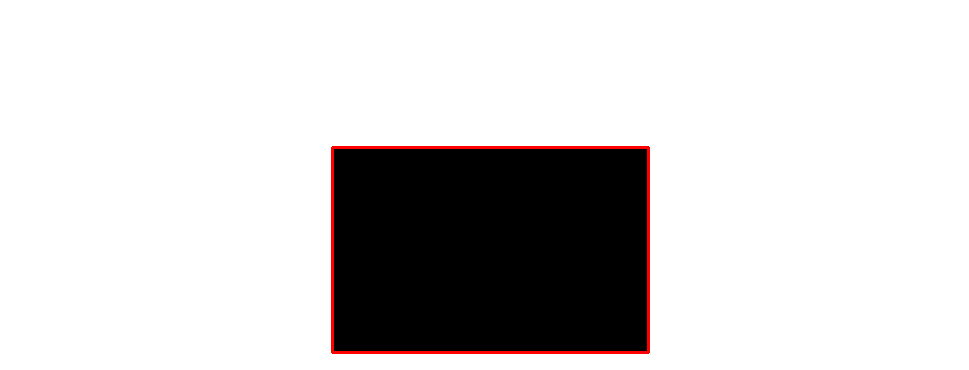

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


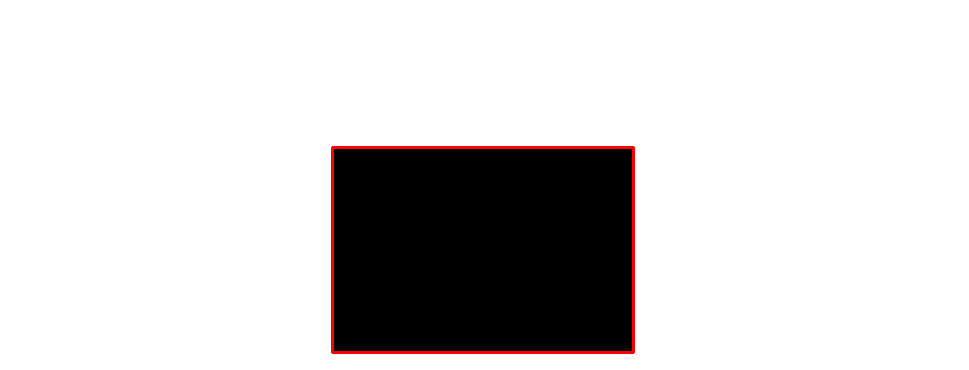

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

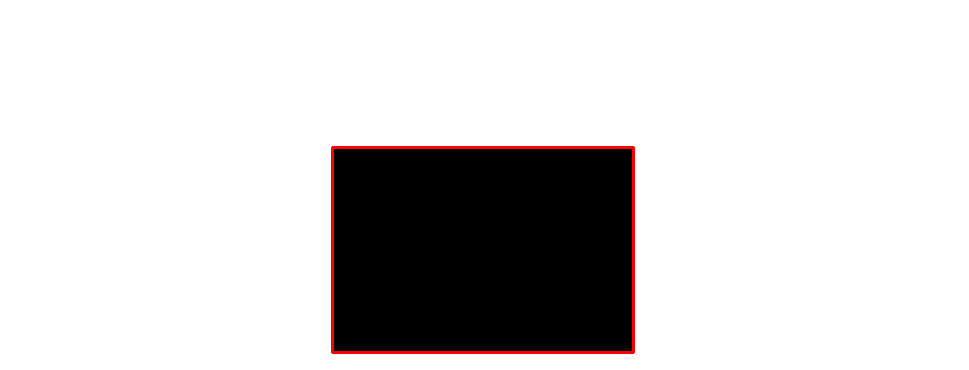

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


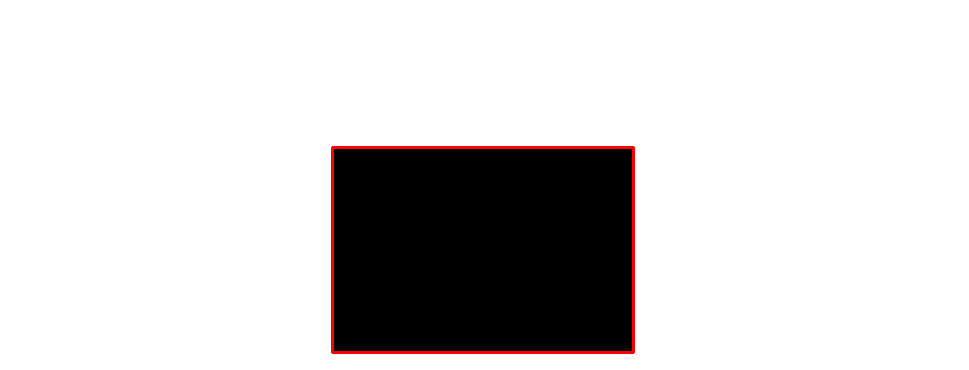

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


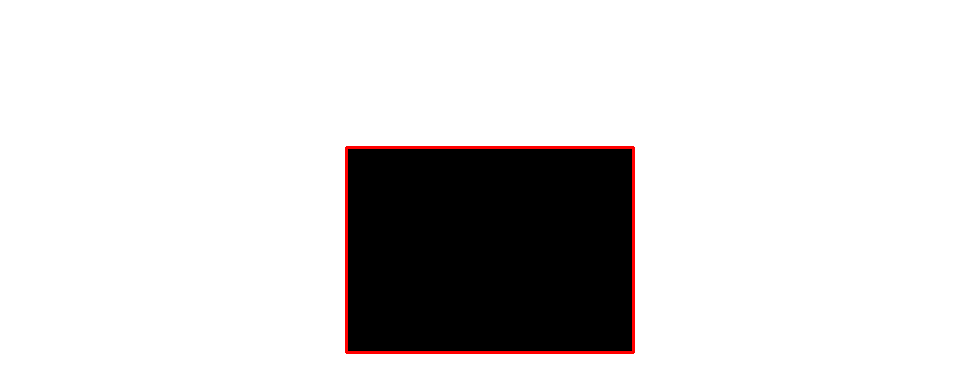

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


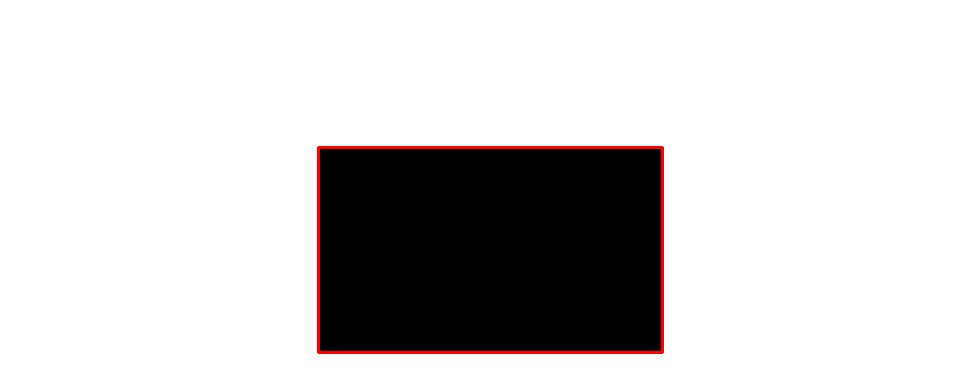

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


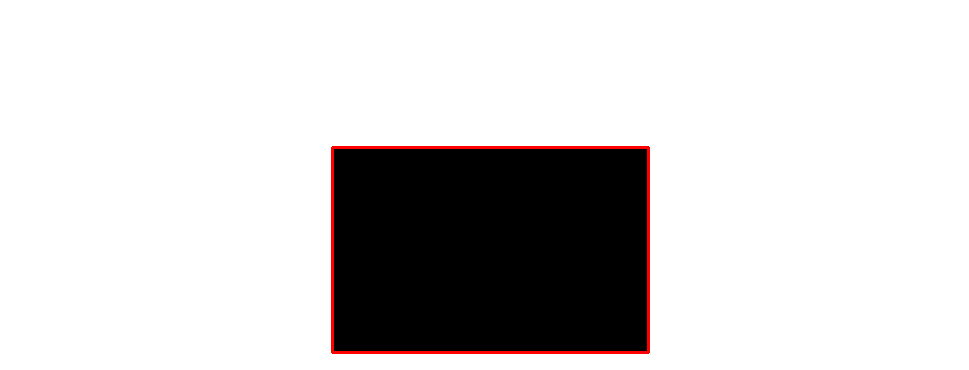

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

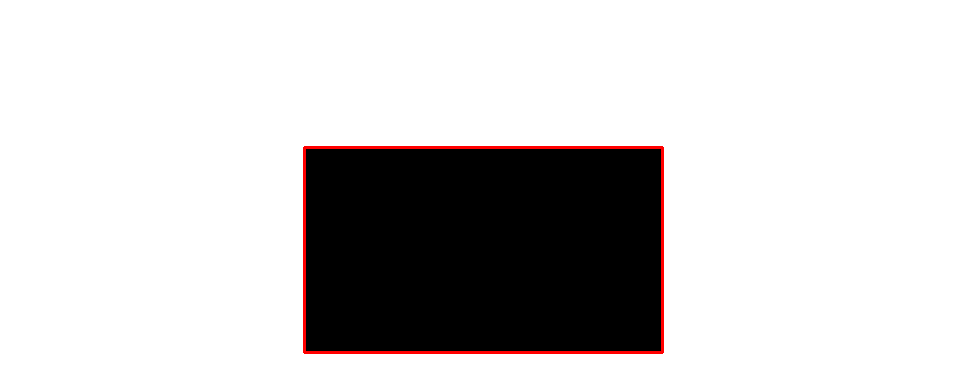

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

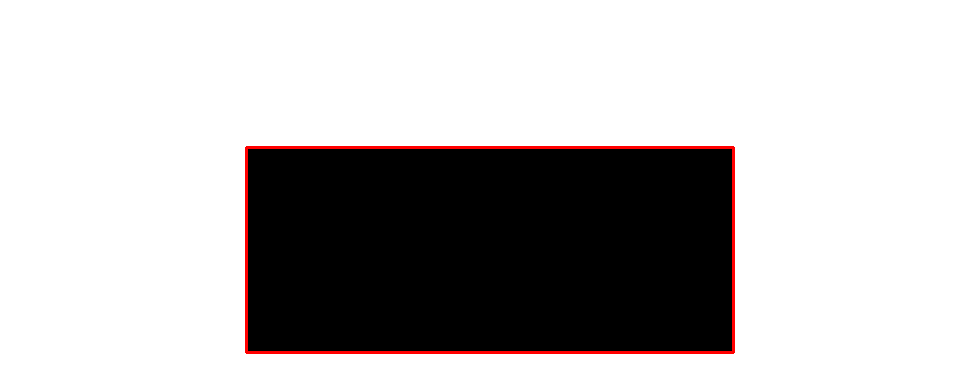

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


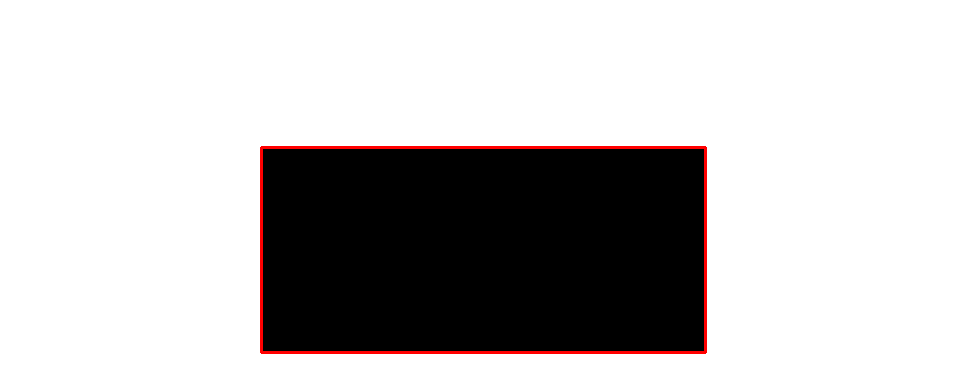

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


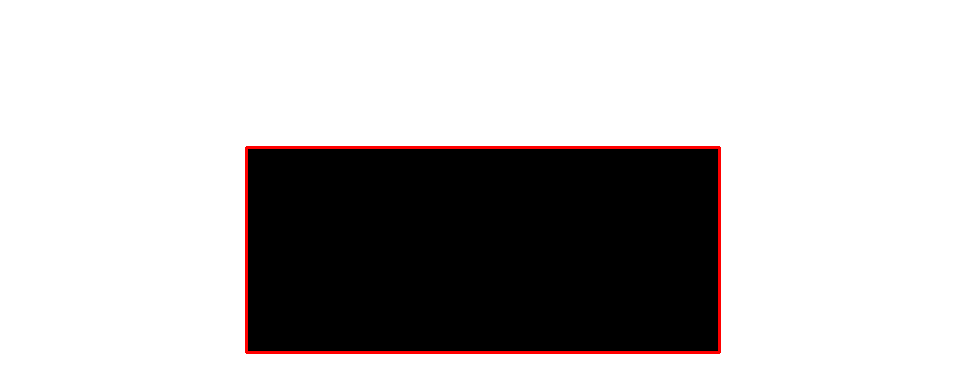

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


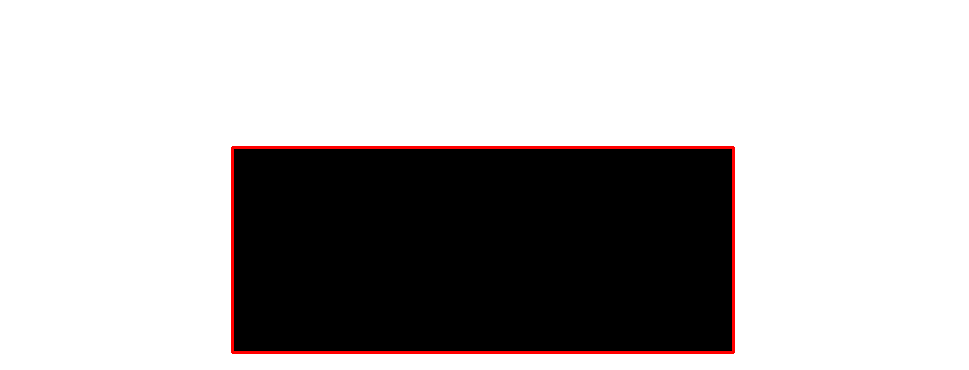

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


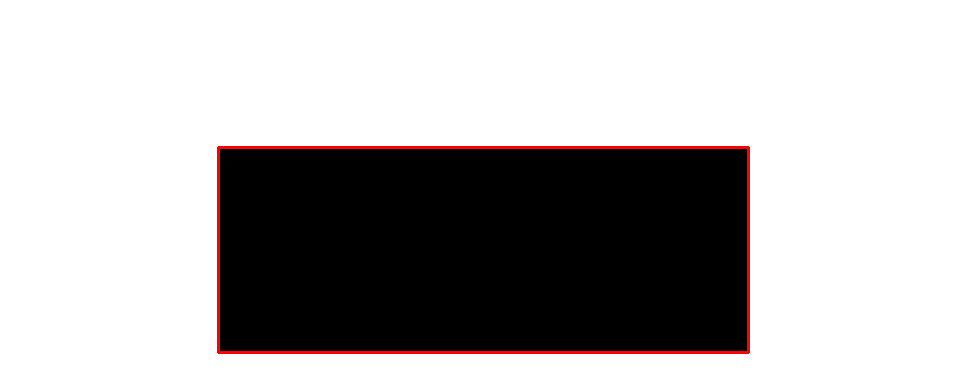

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


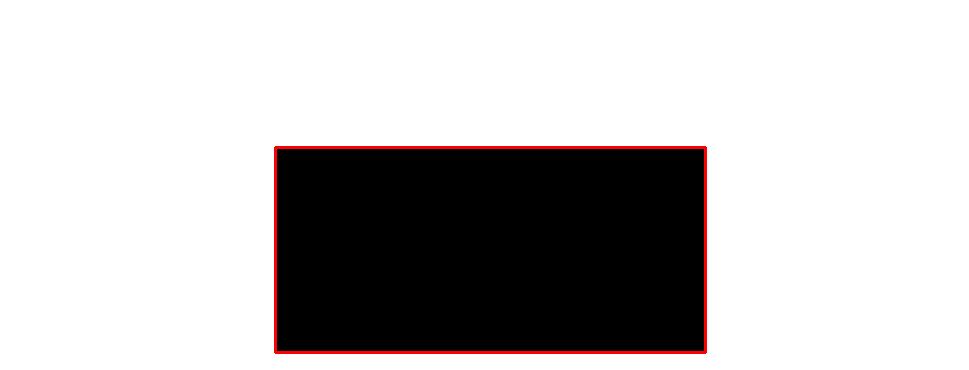

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


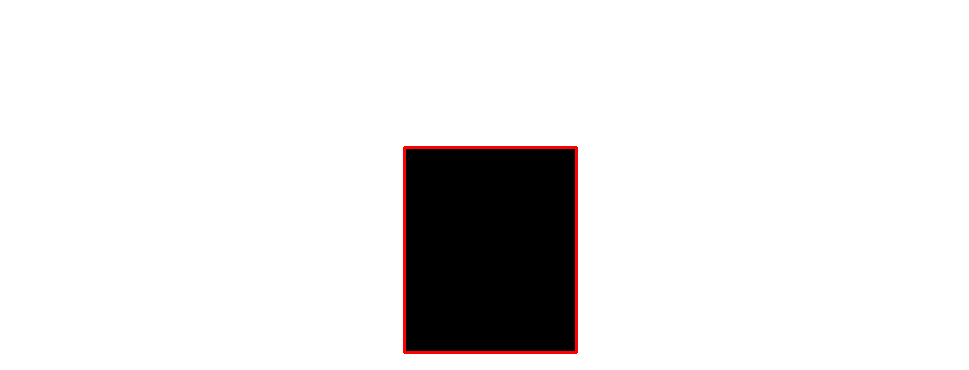

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


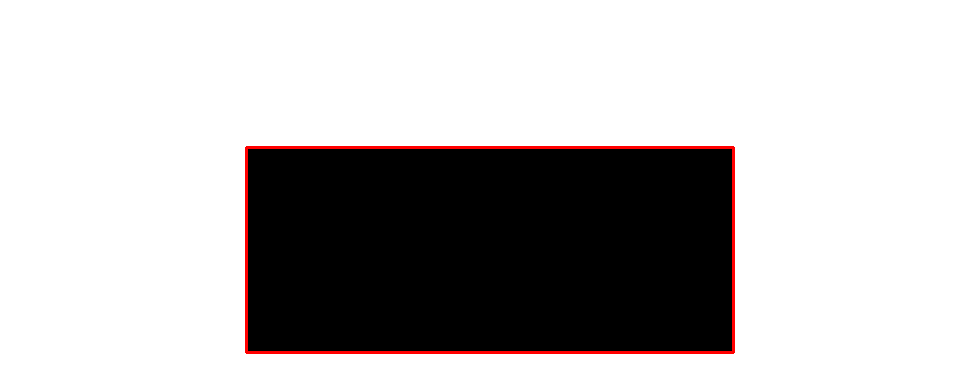

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


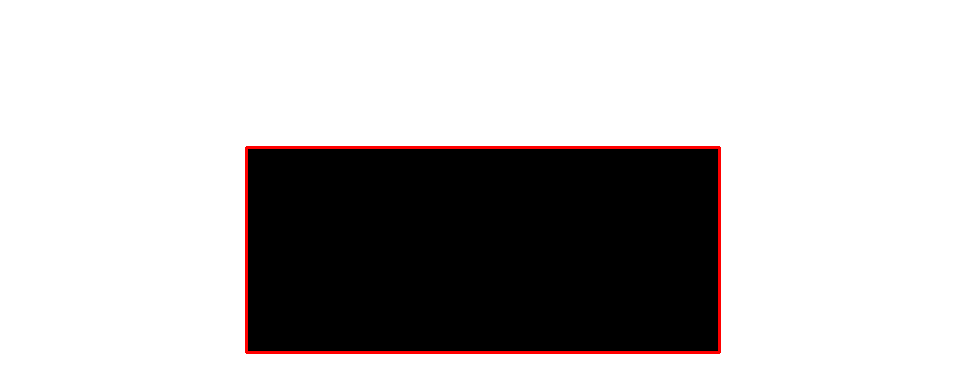

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


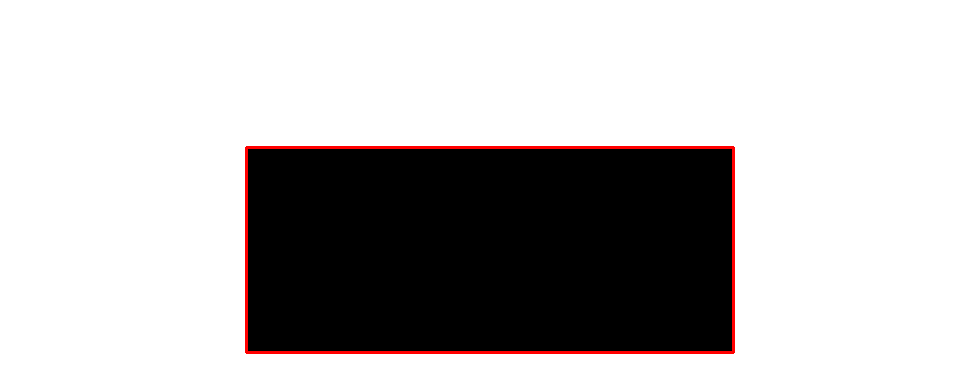

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


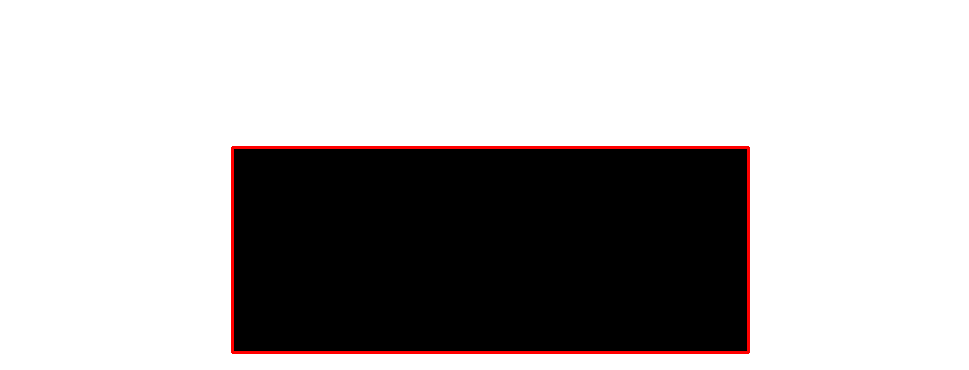

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


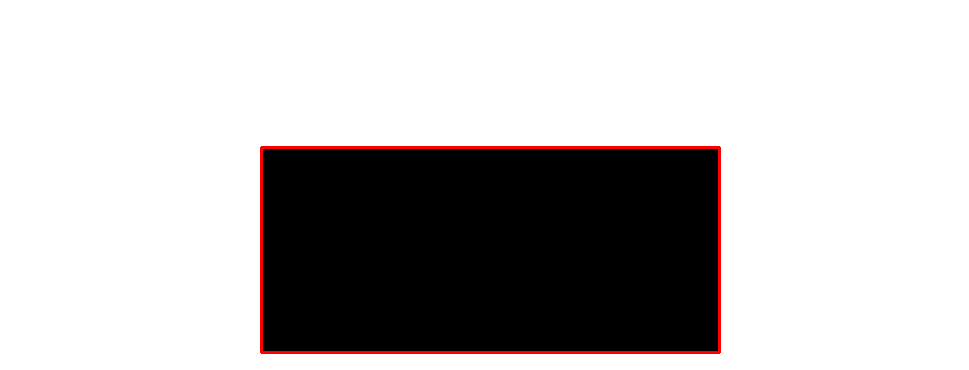

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


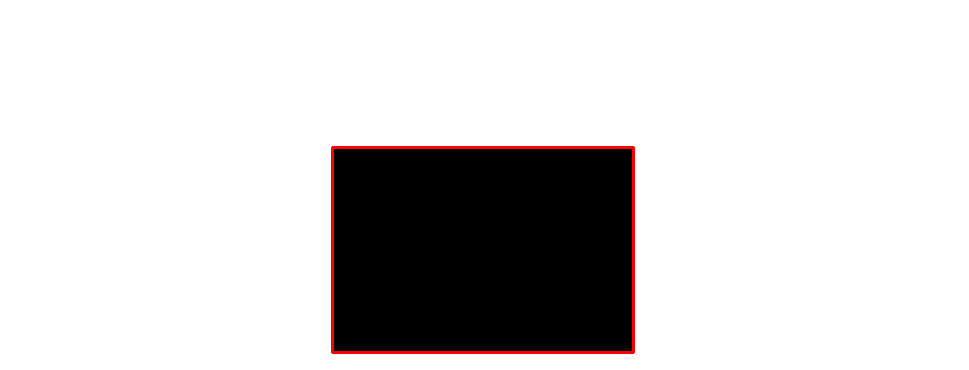

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


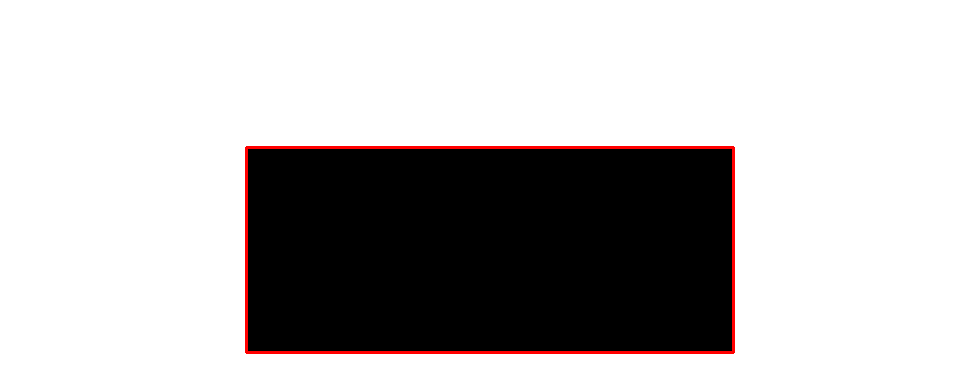

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


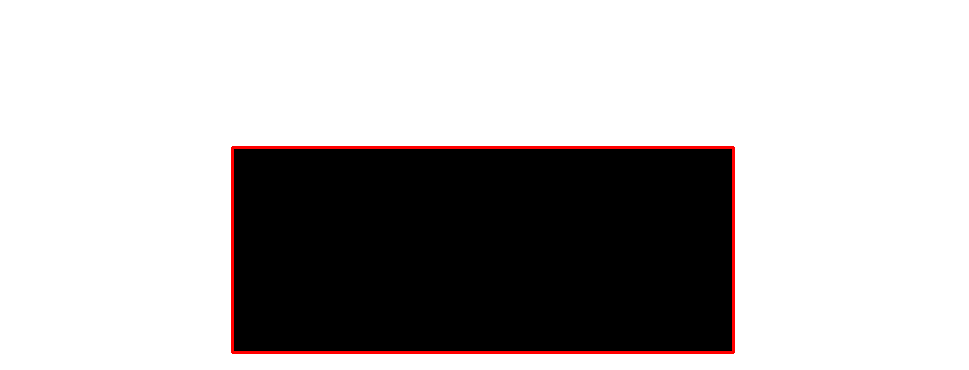

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


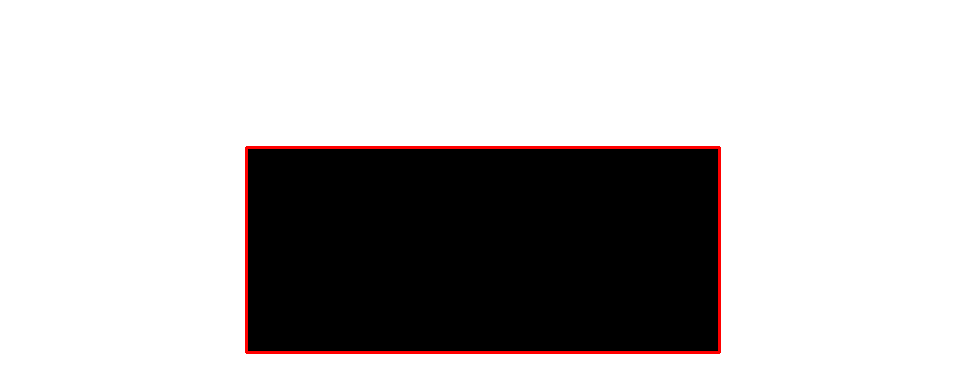

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


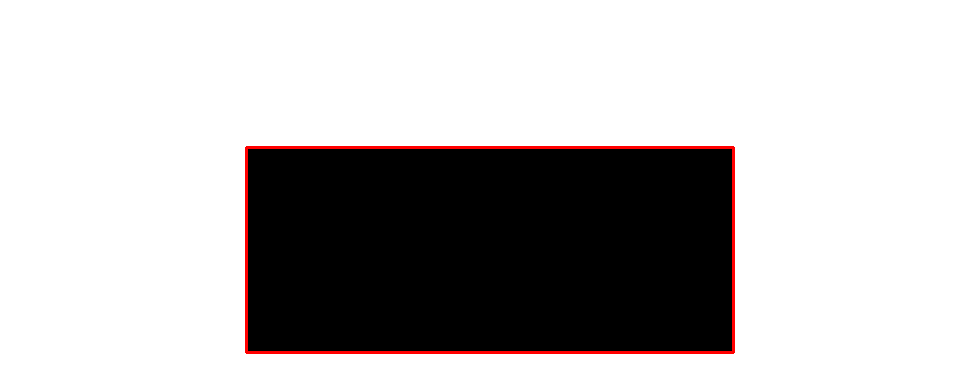

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


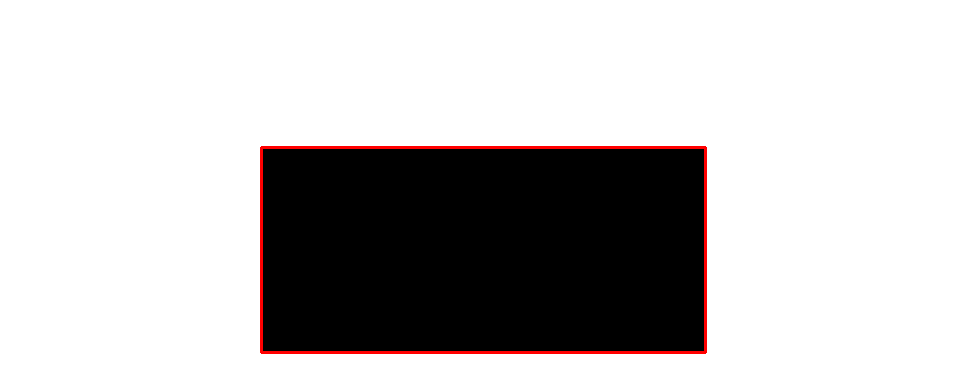

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


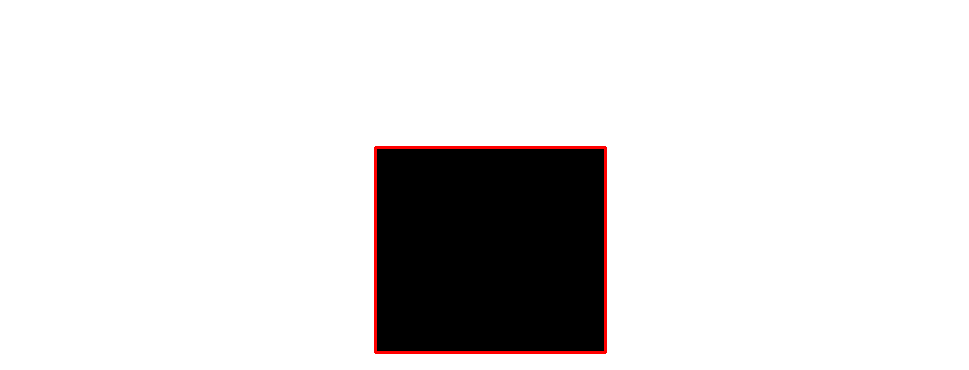

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


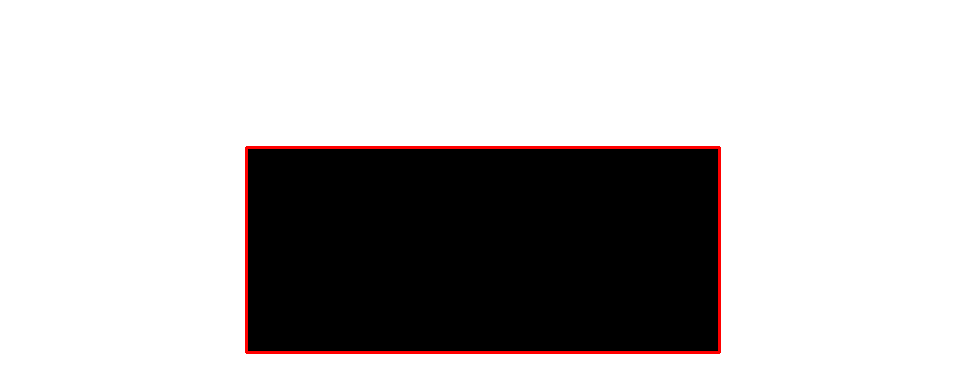

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


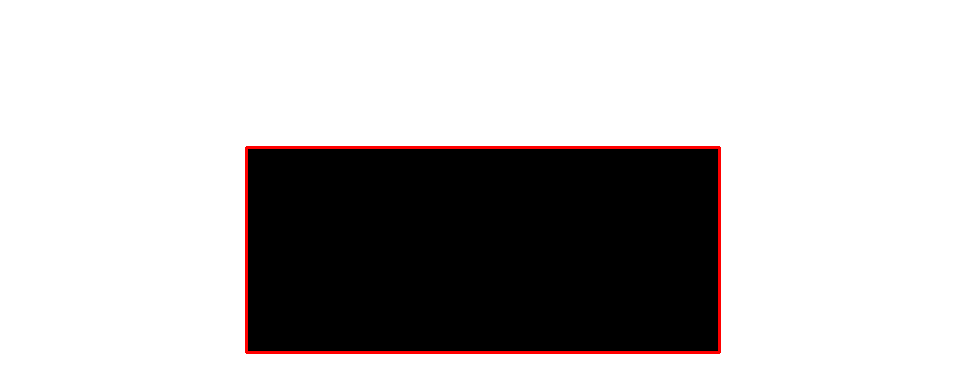

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


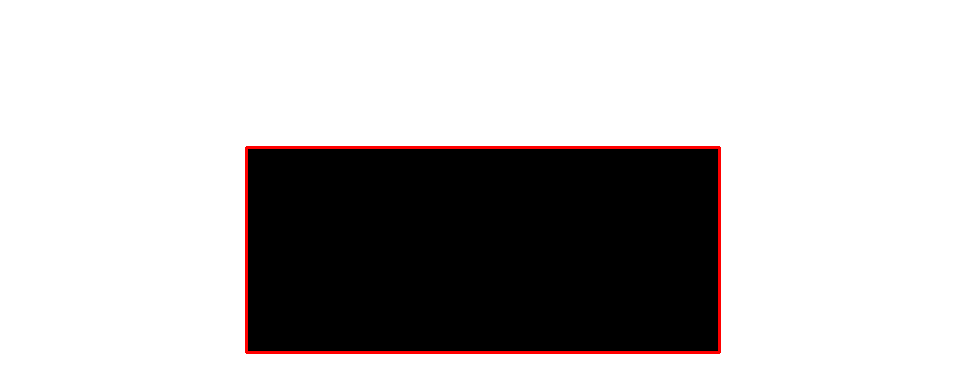

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


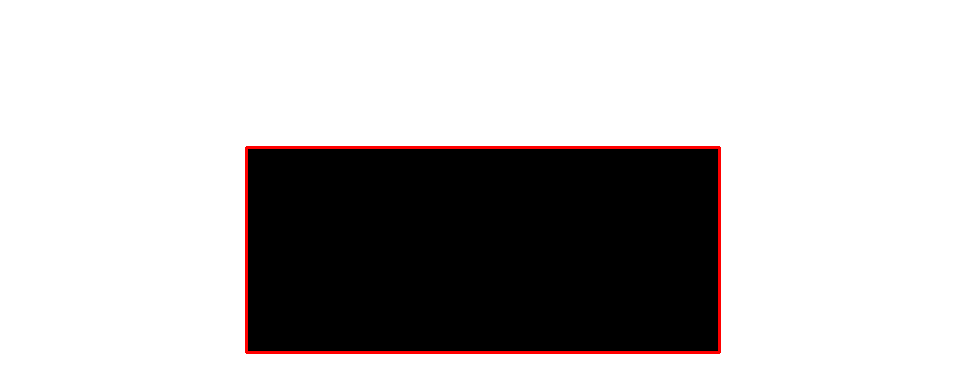

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


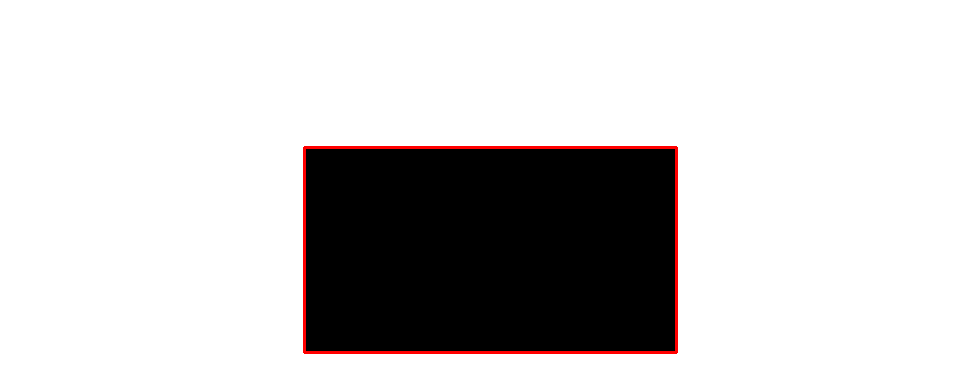

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


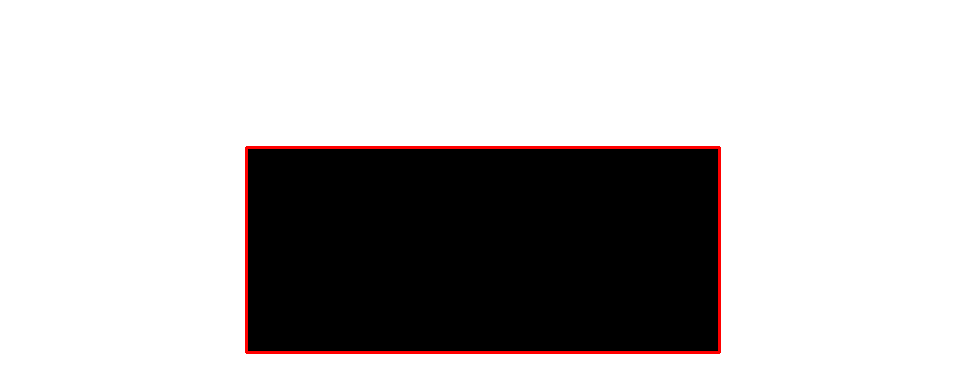

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


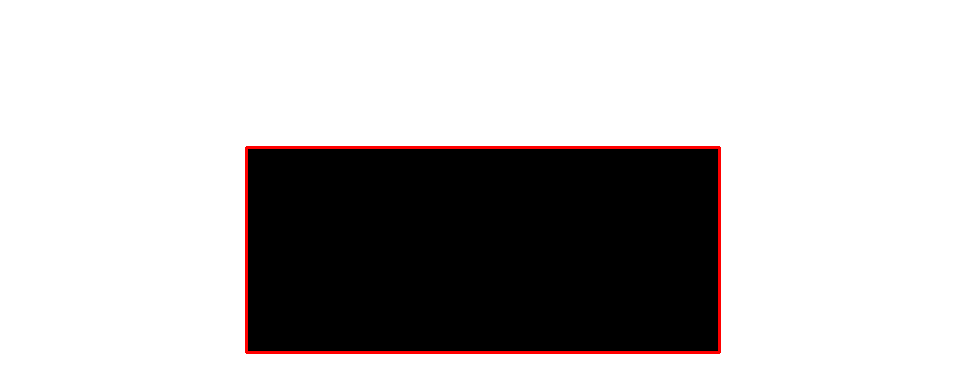

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


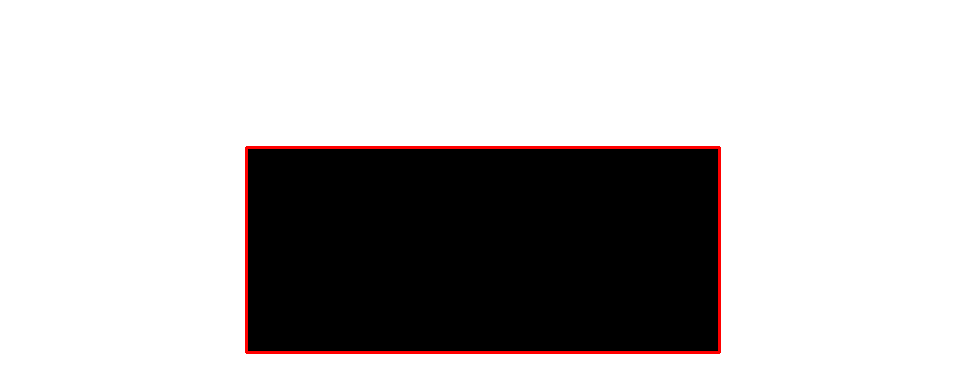

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


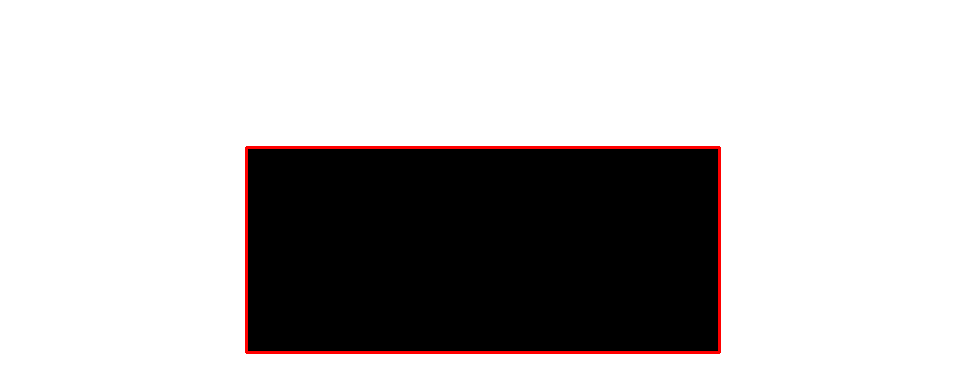

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


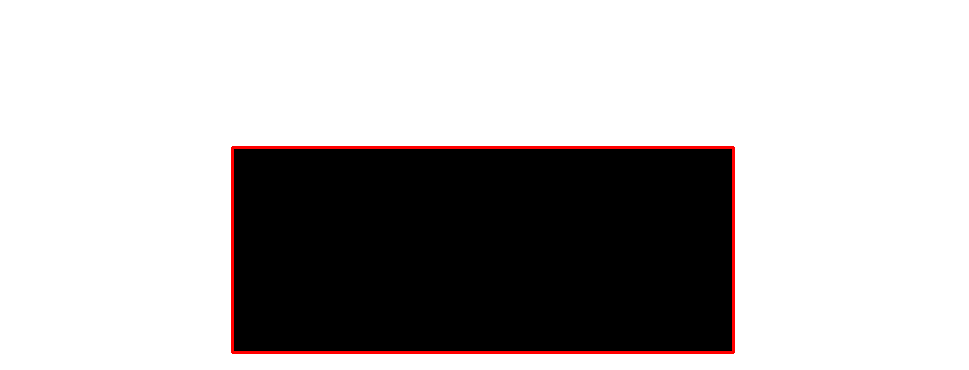

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


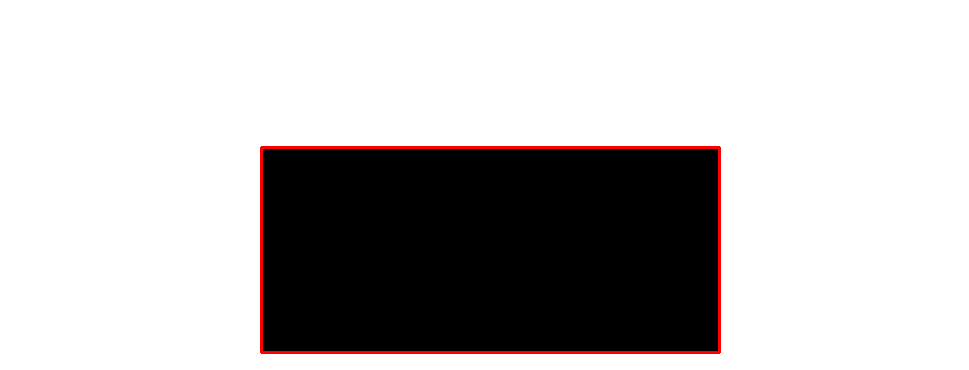

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


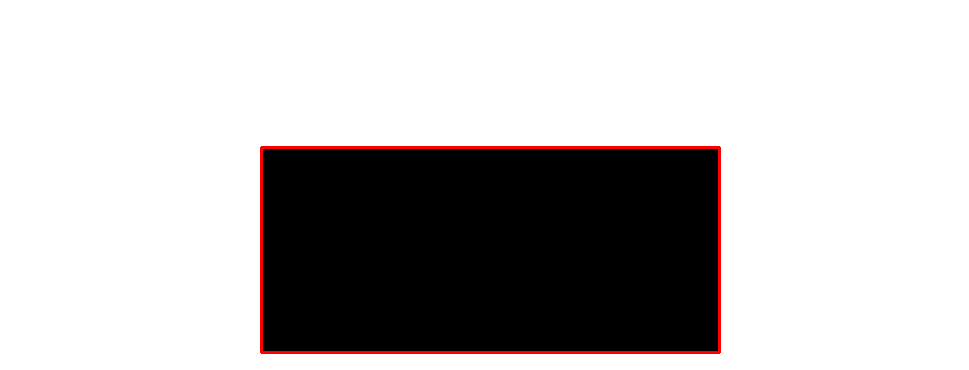

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


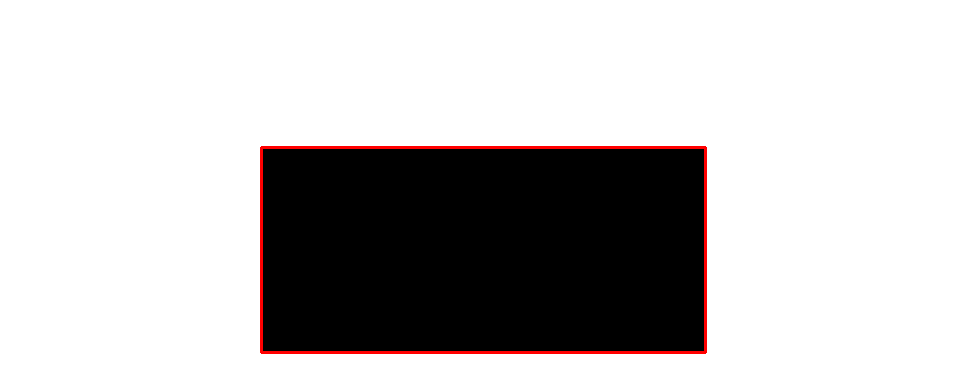

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


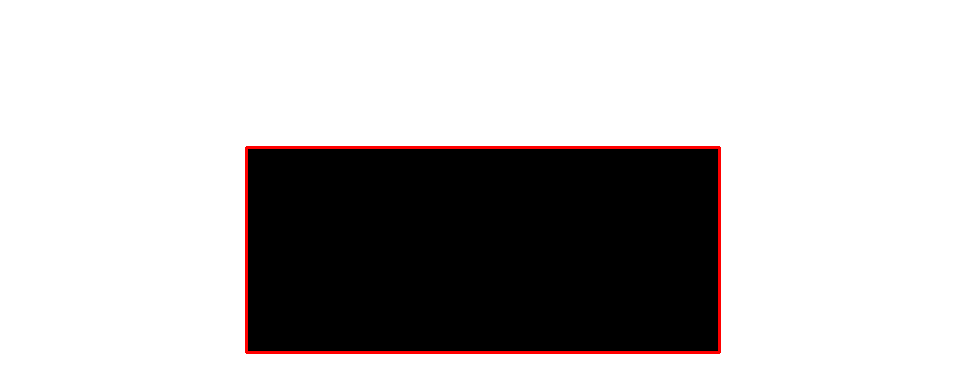

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


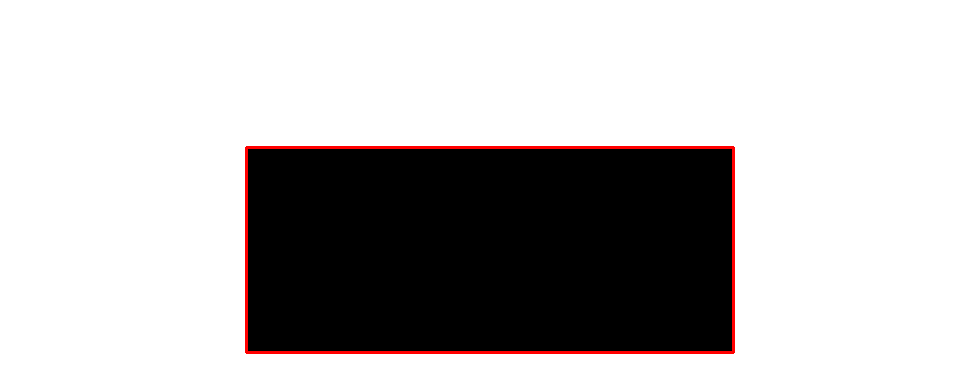

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


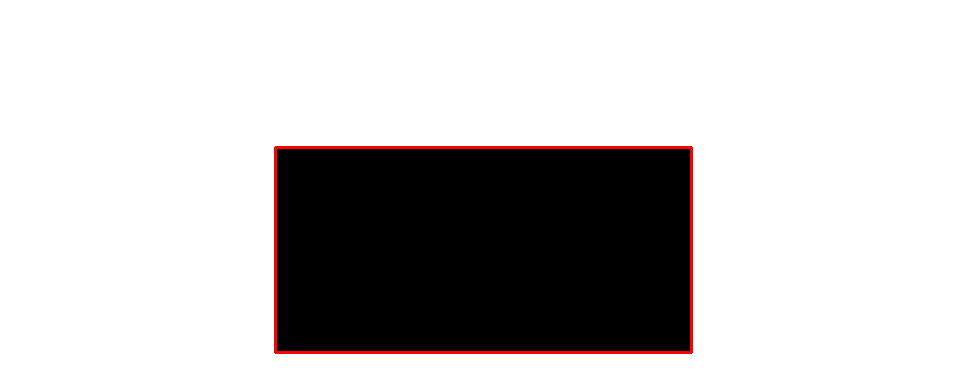

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


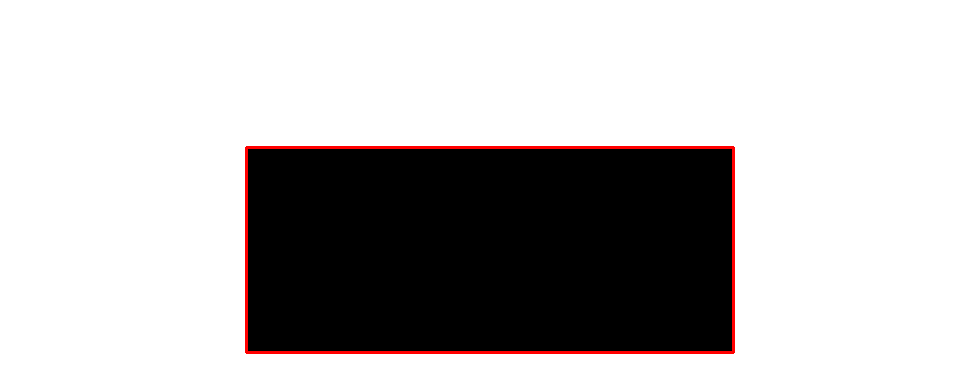

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


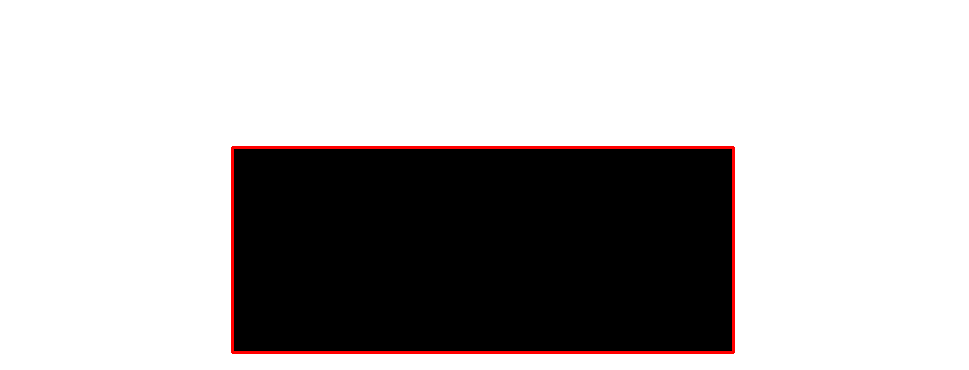

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


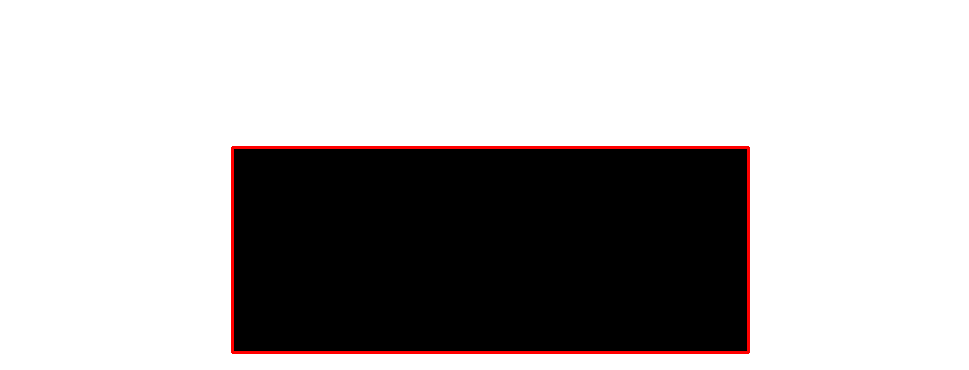

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


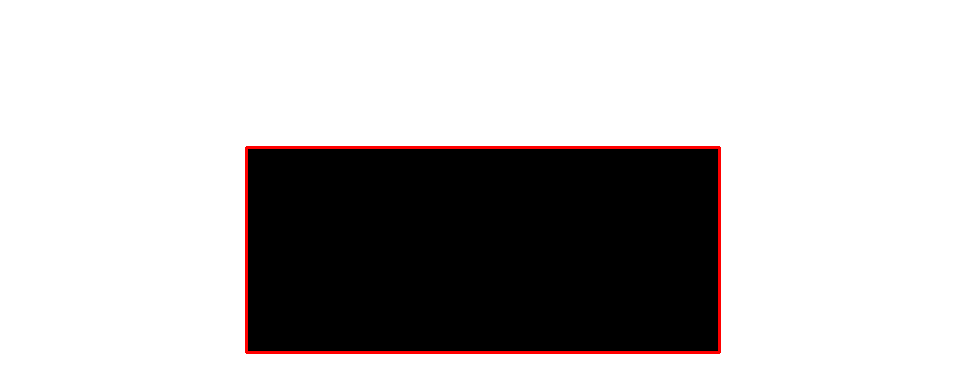

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


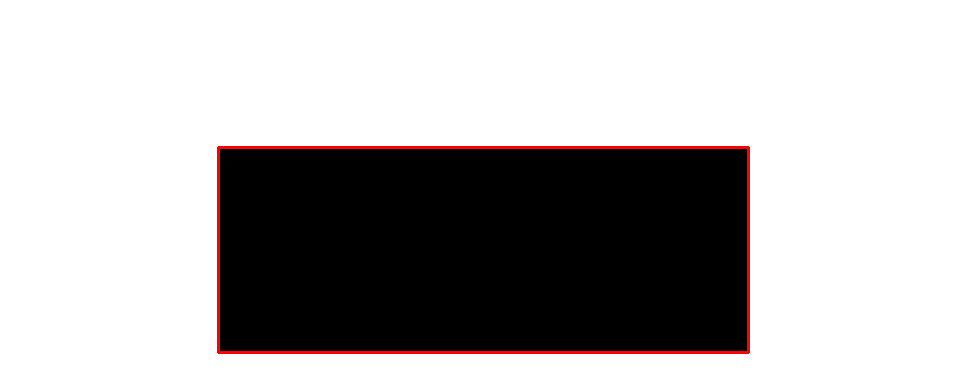

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


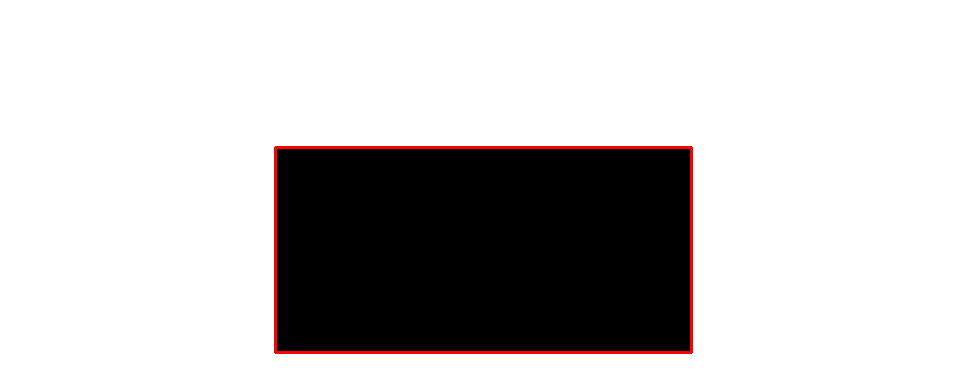

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

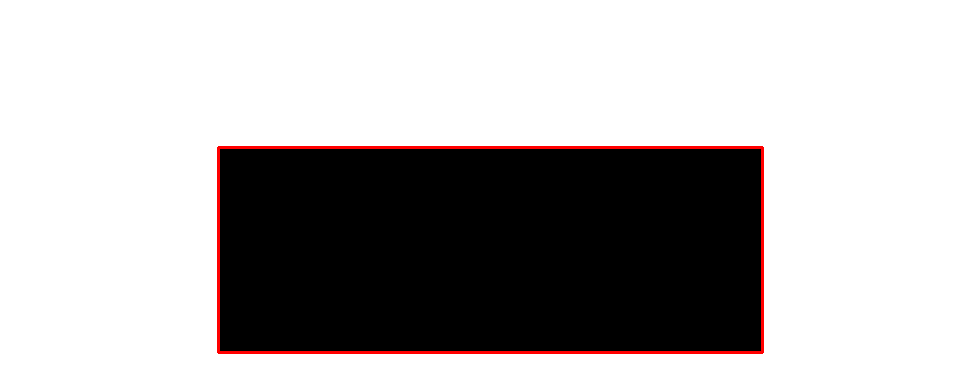

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

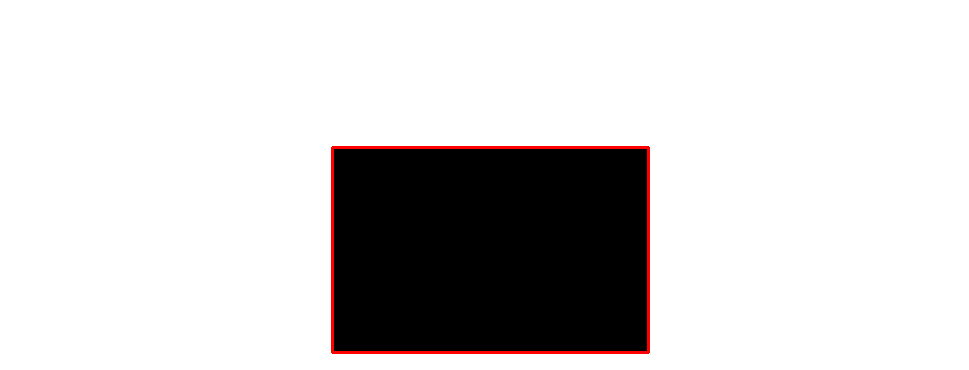

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

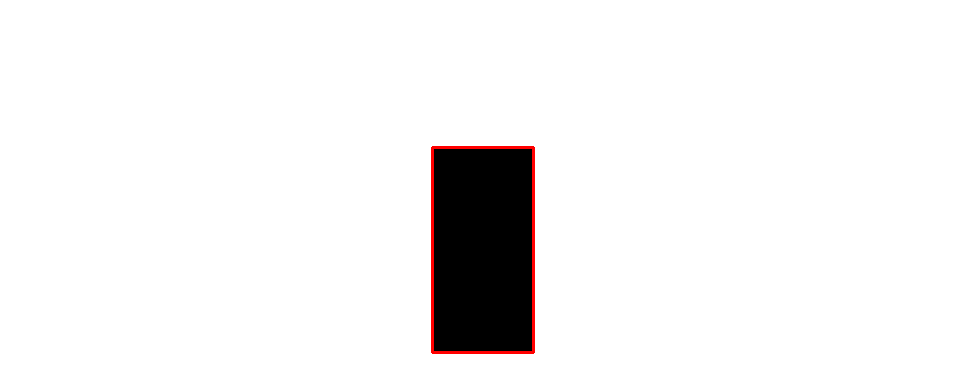

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


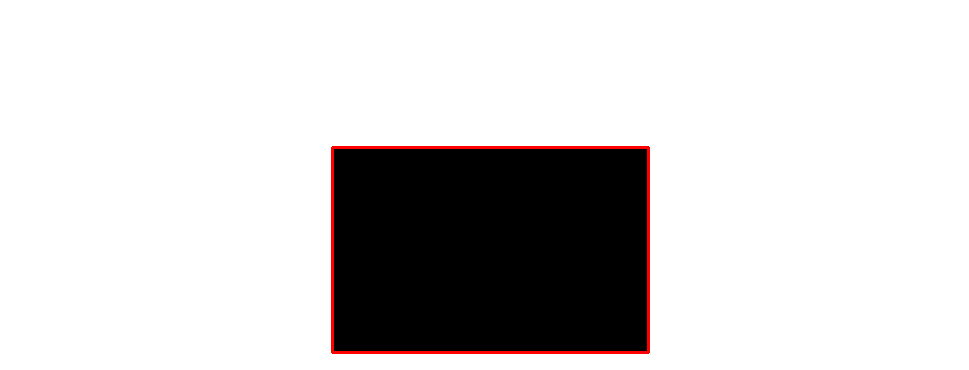

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

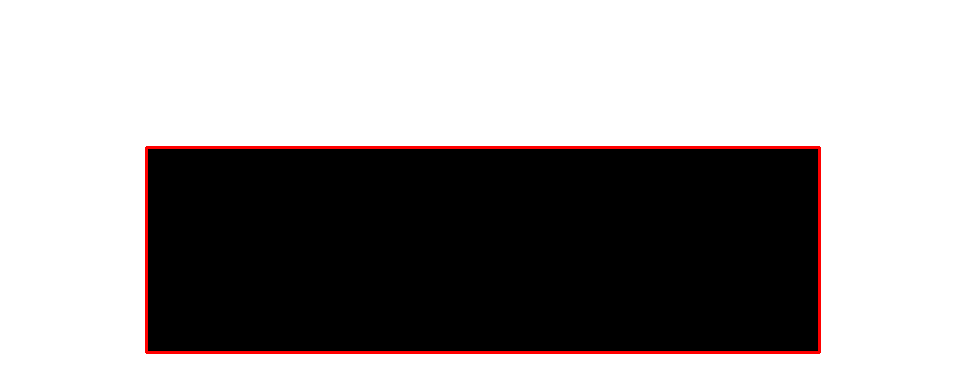

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


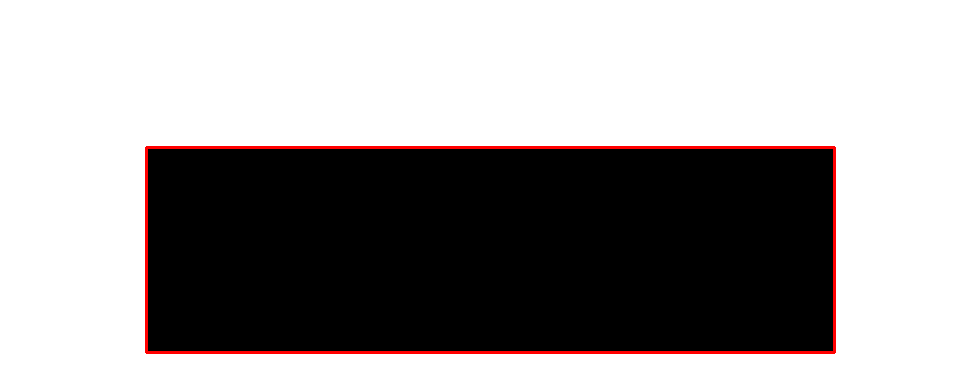

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


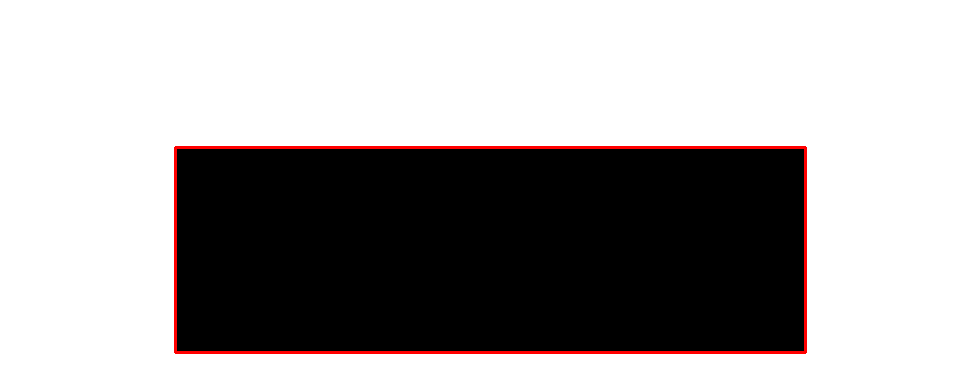

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


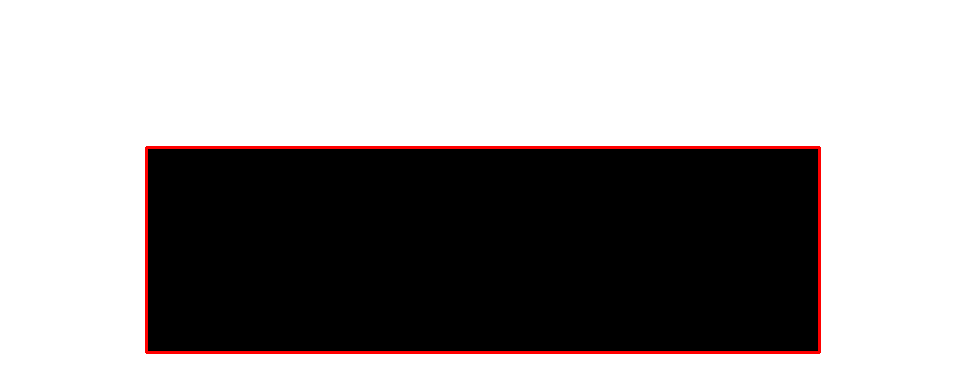

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


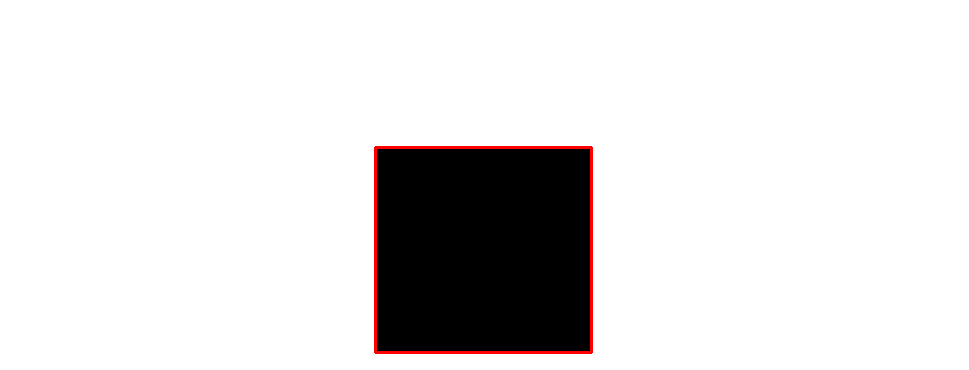

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


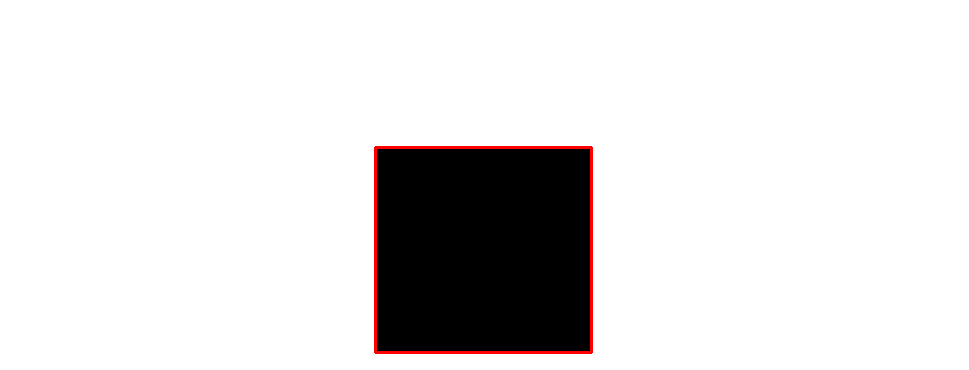

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


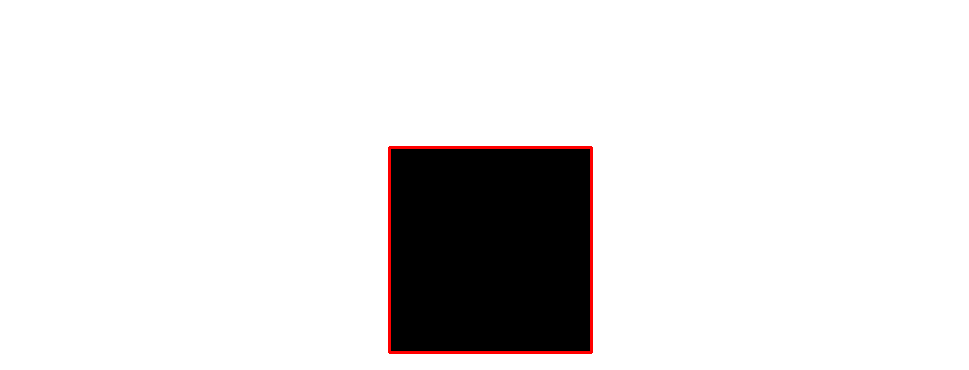

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


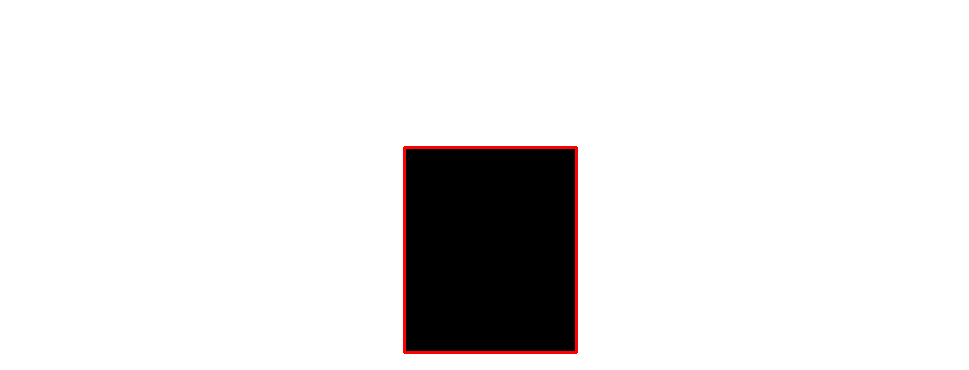

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


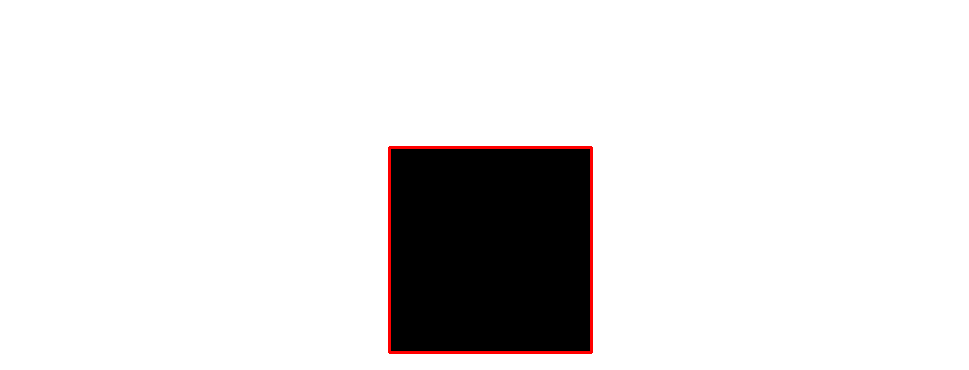

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


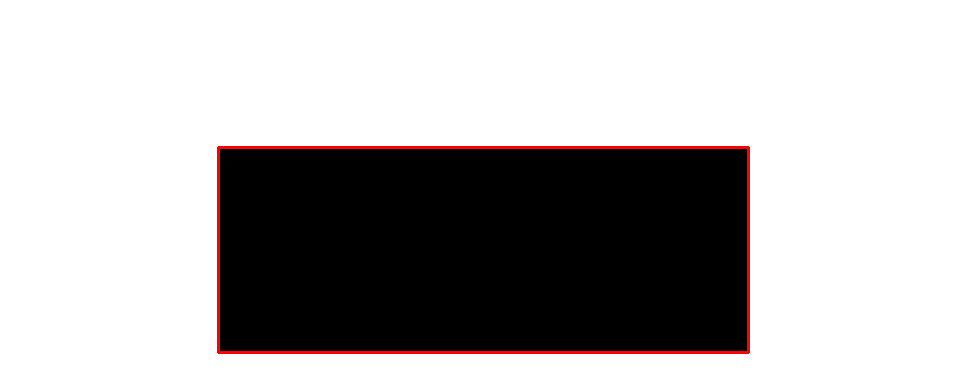

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


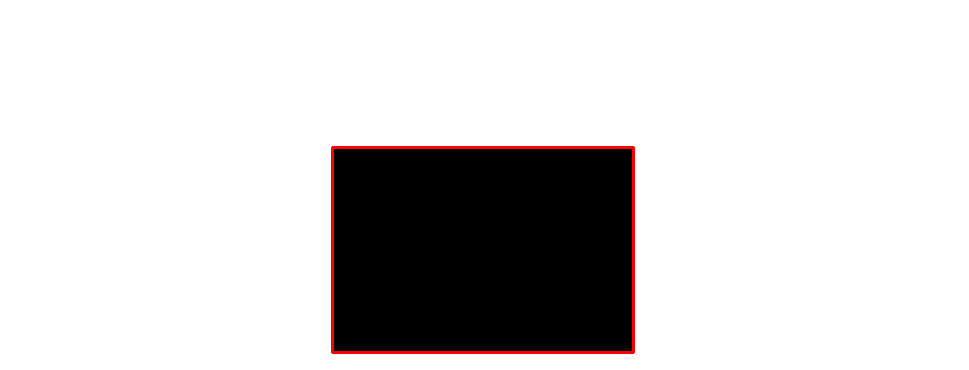

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


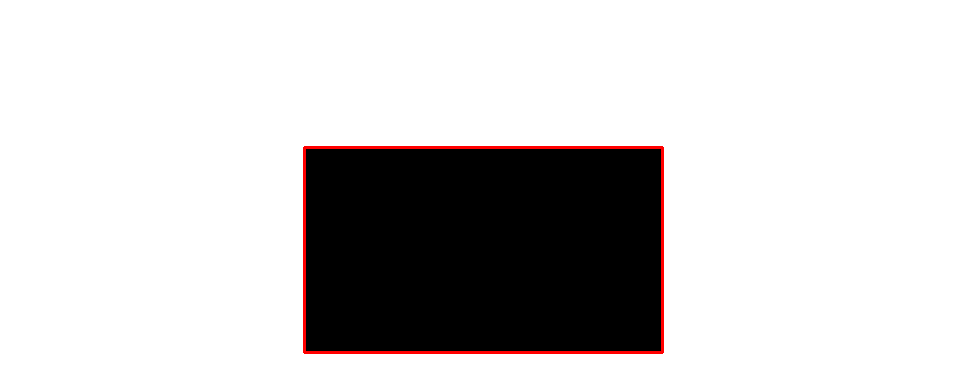

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


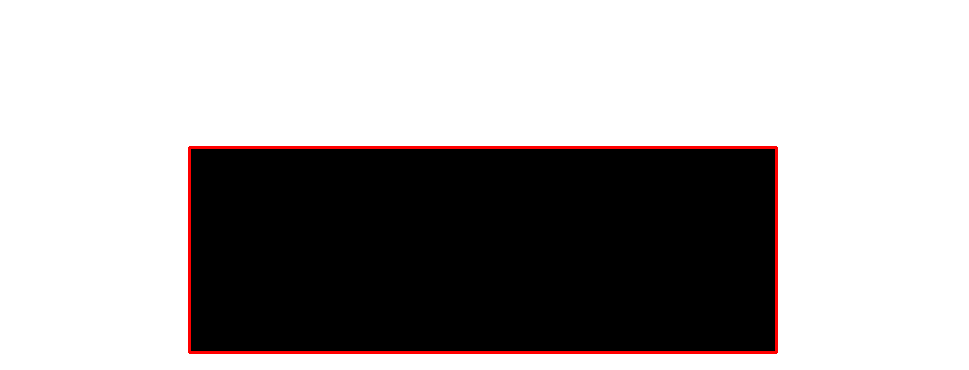

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


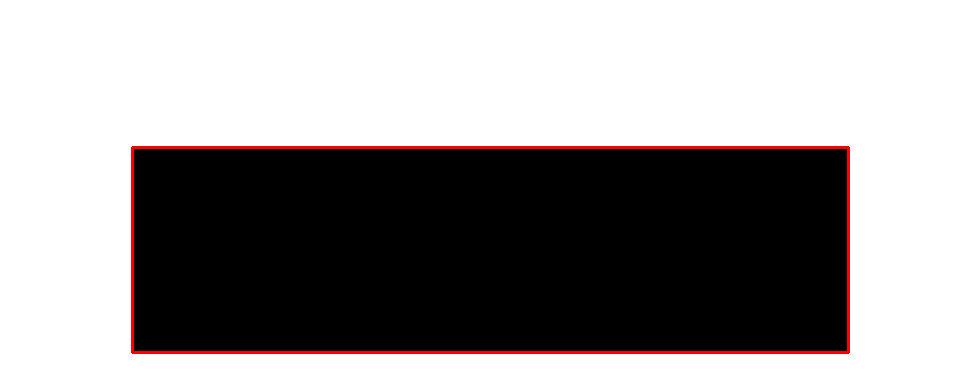

Rectangle coordinates: 132 147 834 352
Rectangle coordinates: 132 147 834 352


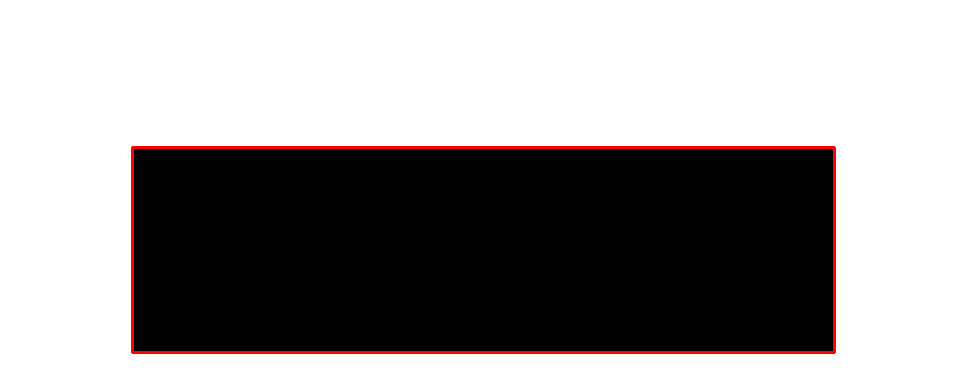

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


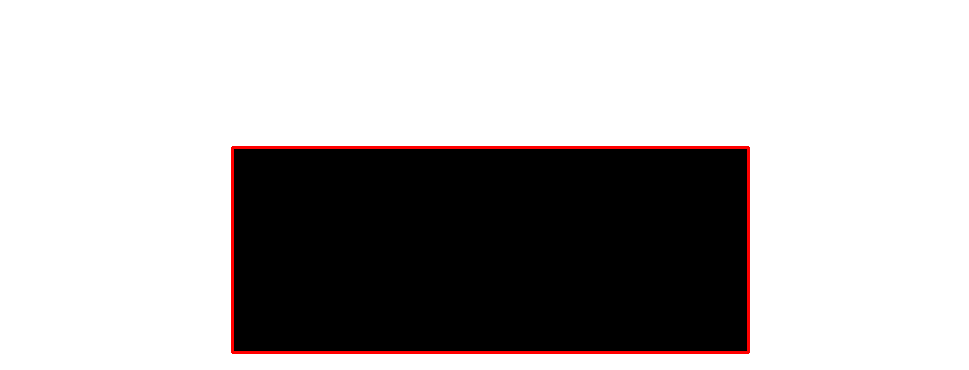

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


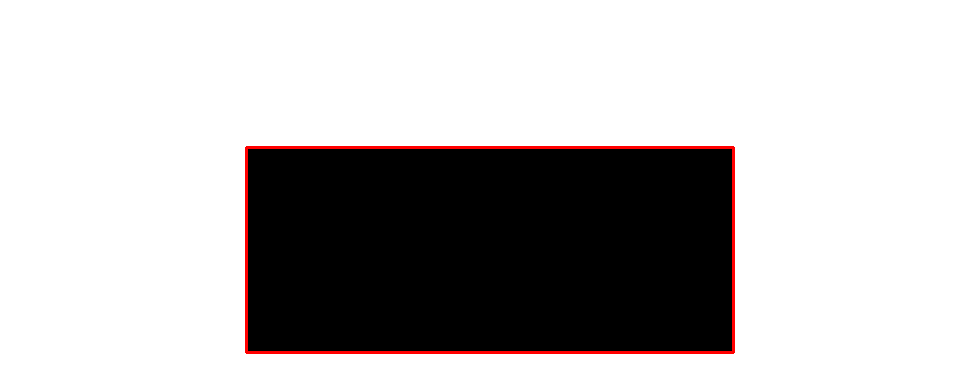

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 132 147 834 352
Rectangle coordinates: 132 147 834 352


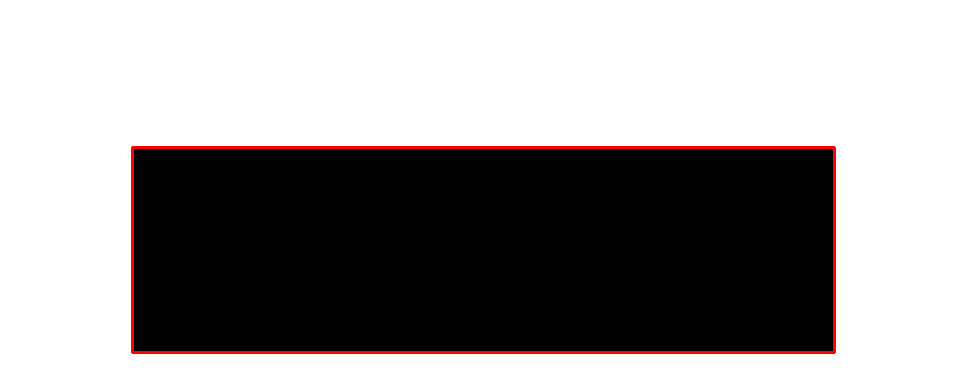

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


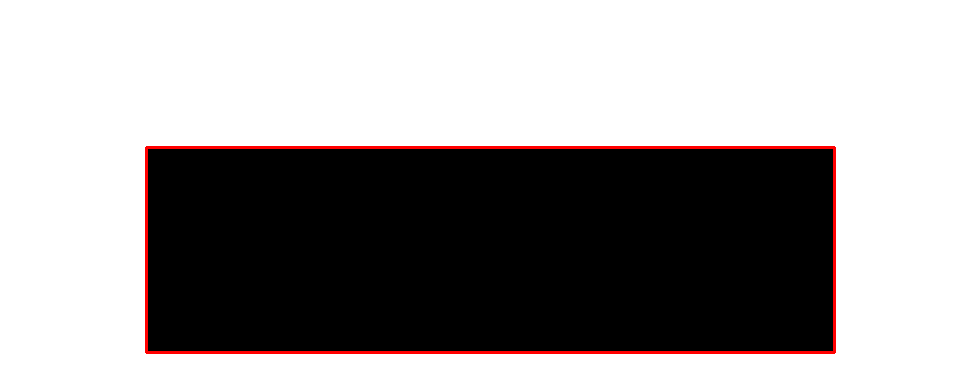

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


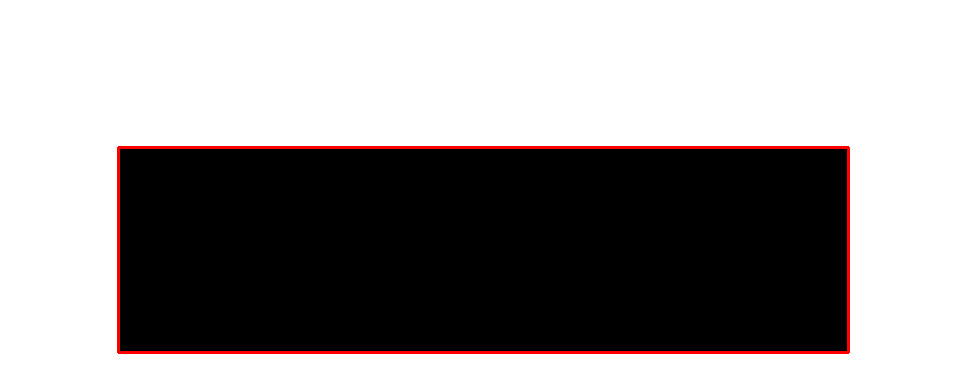

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 75 147 891 352
Rectangle coordinates: 75 147 891 352


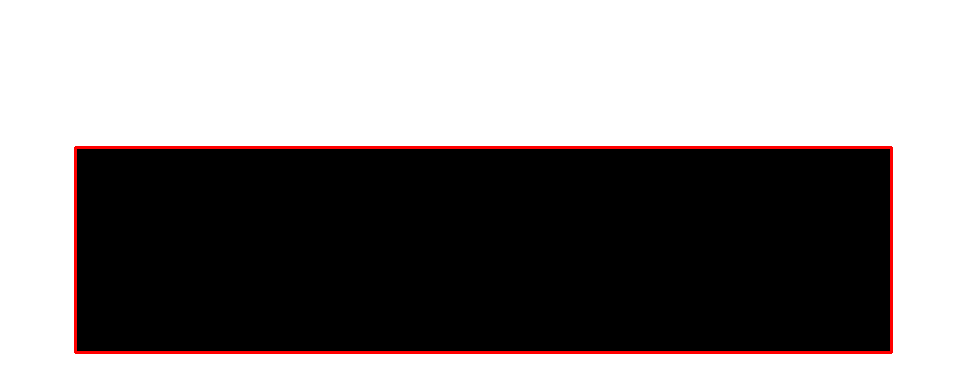

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


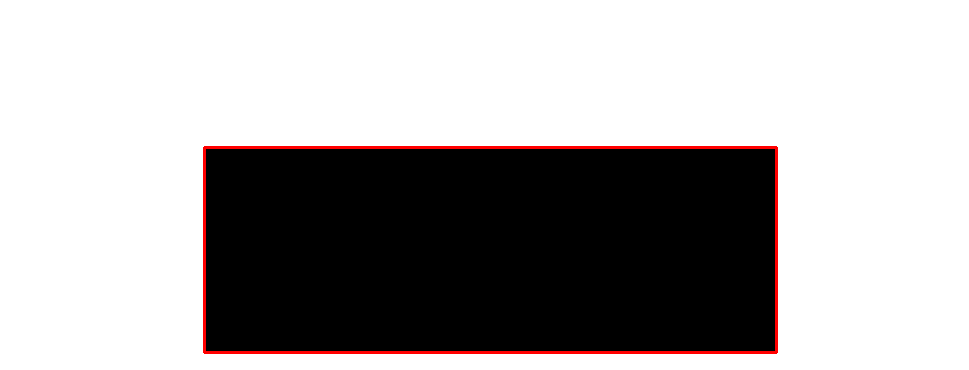

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


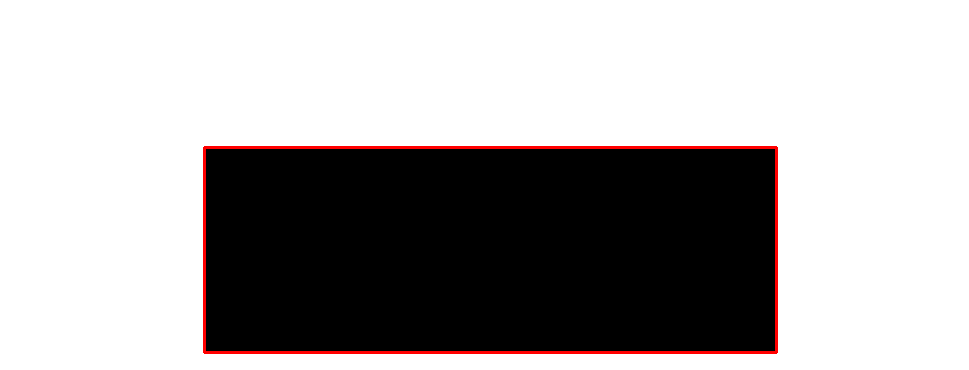

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


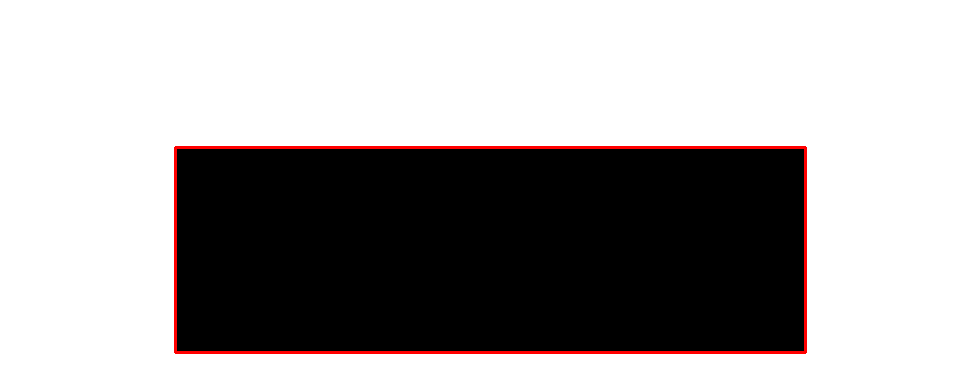

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


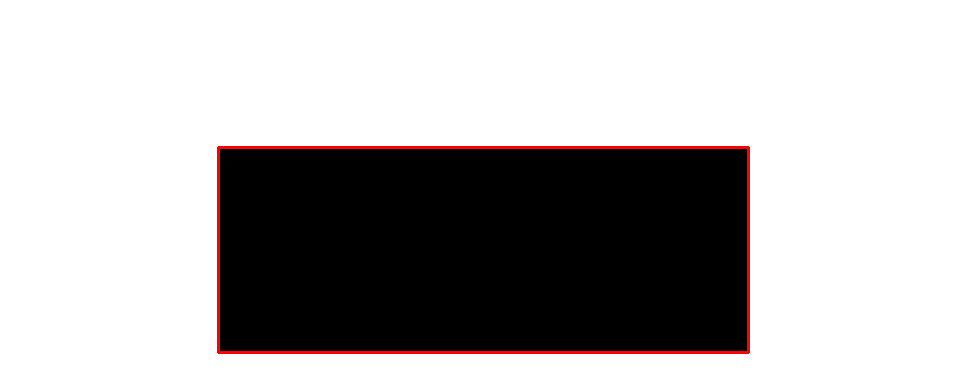

Rectangle coordinates: 132 147 833 352
Rectangle coordinates: 132 147 833 352


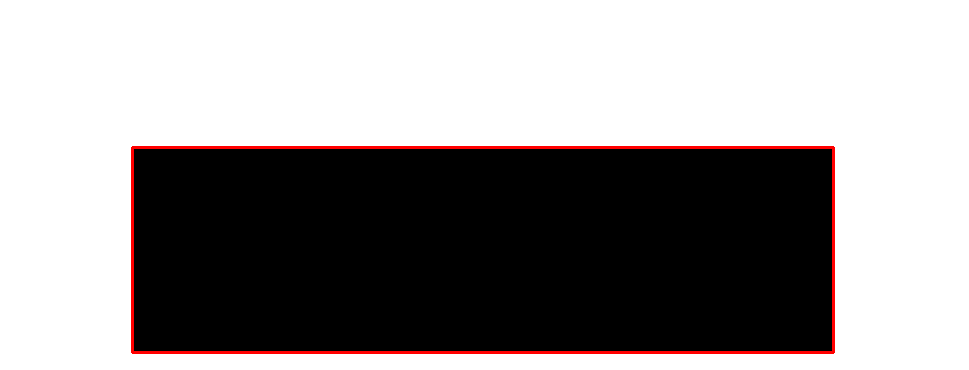

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


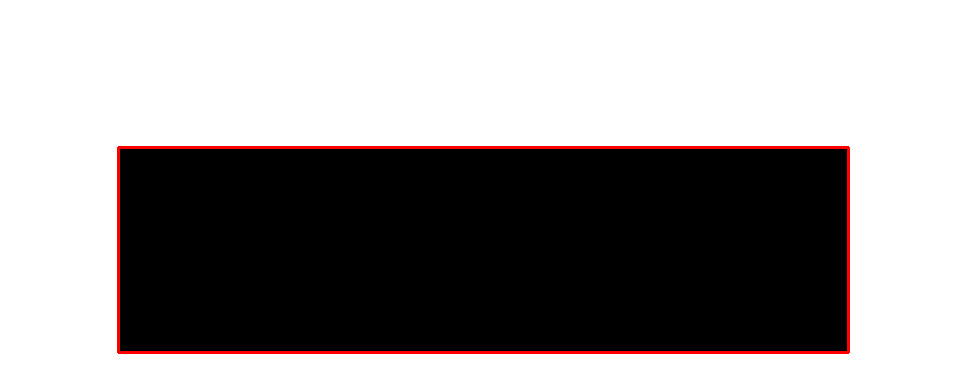

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


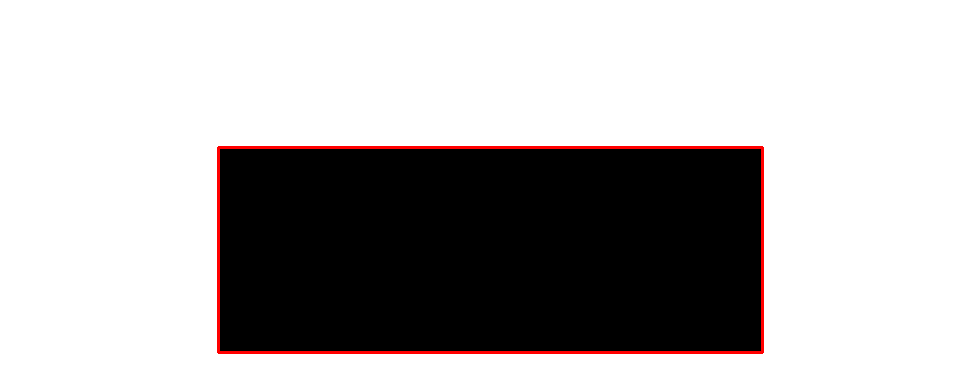

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


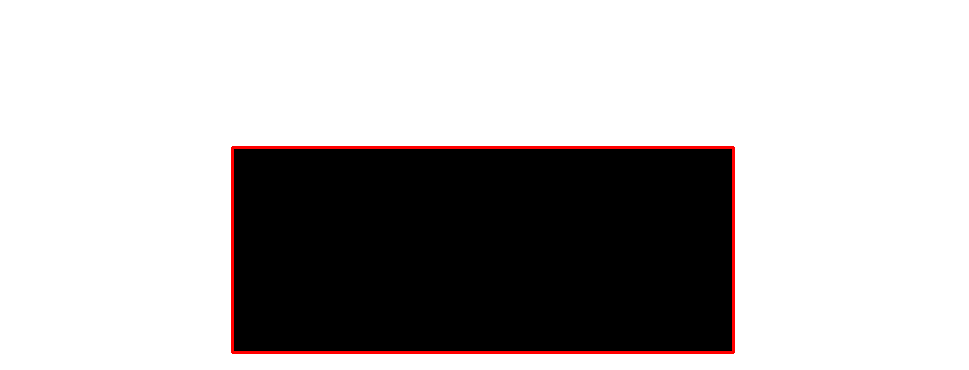

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


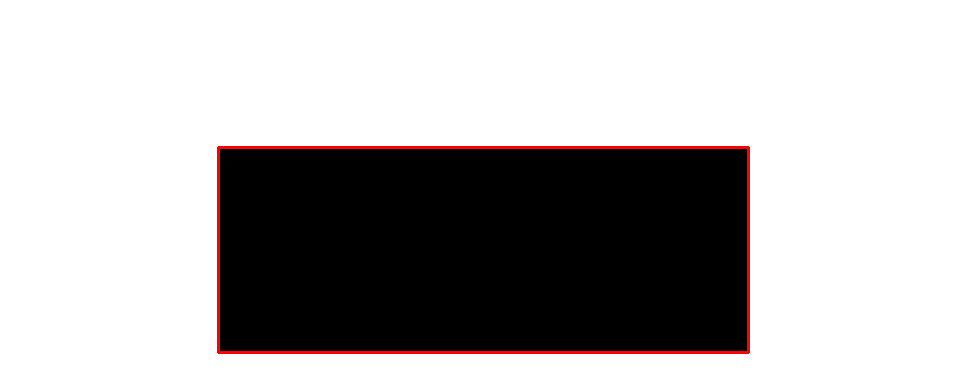

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


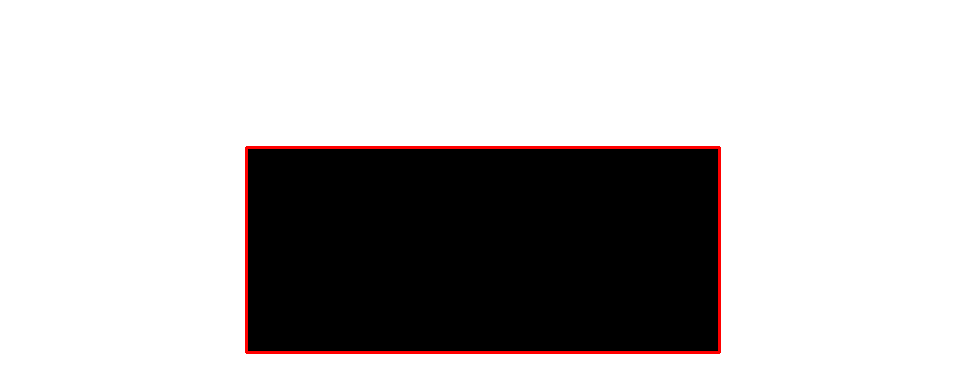

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


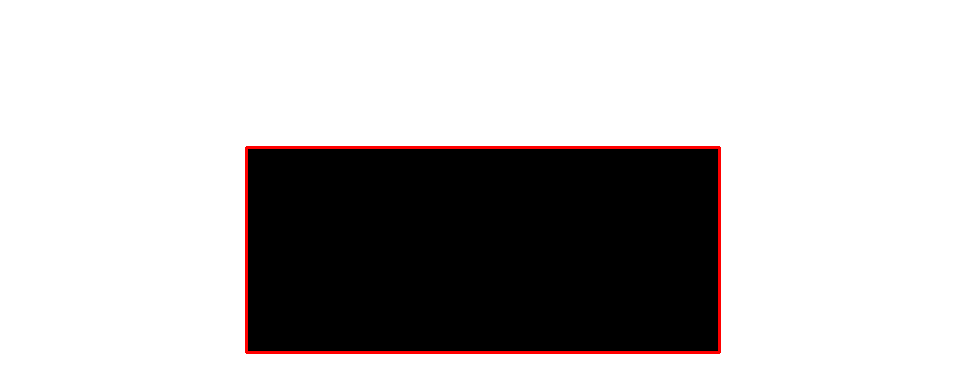

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


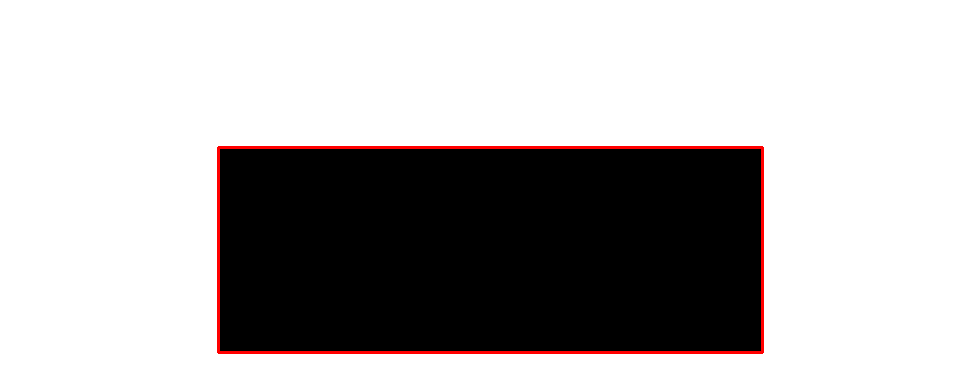

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


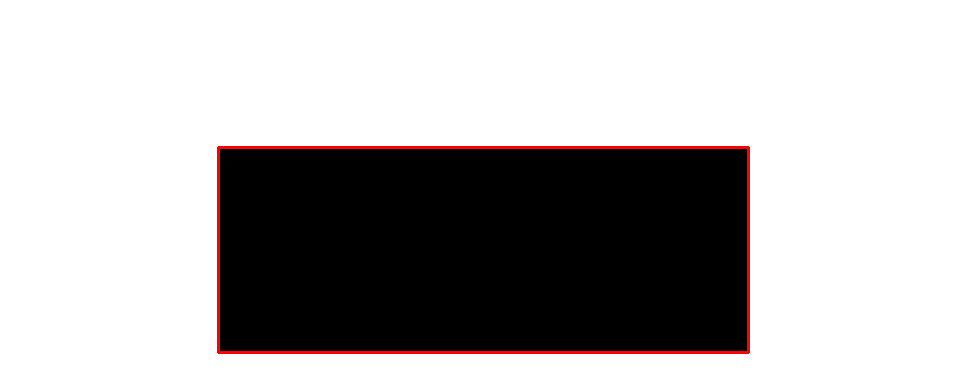

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


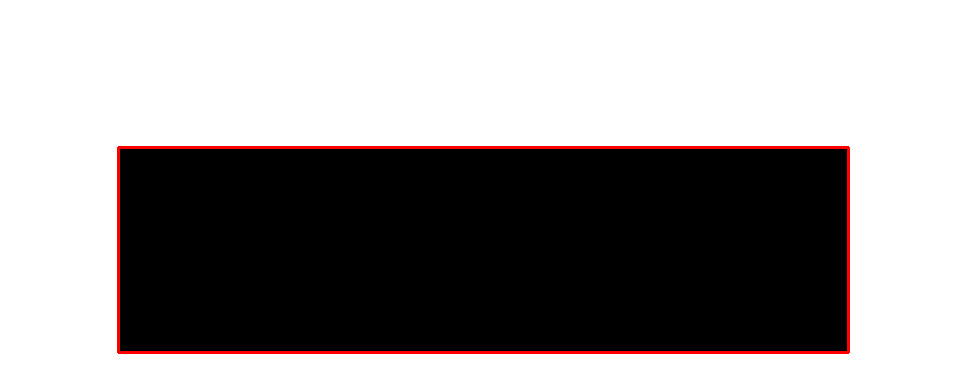

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


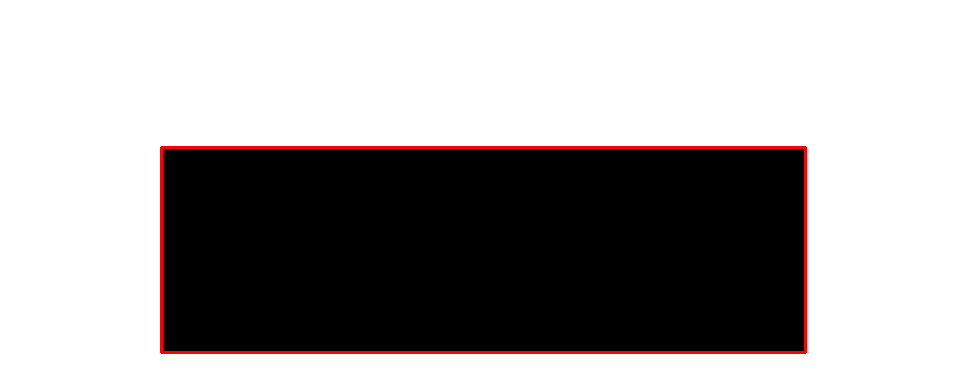

Rectangle coordinates: 118 147 862 352
Rectangle coordinates: 118 147 862 352


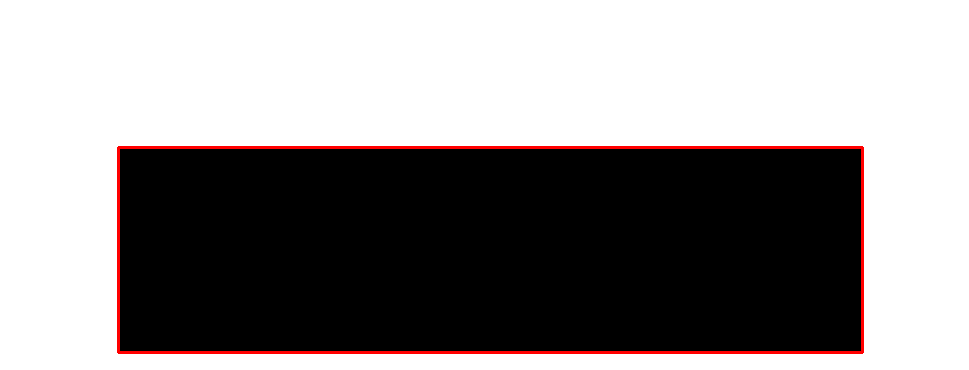

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


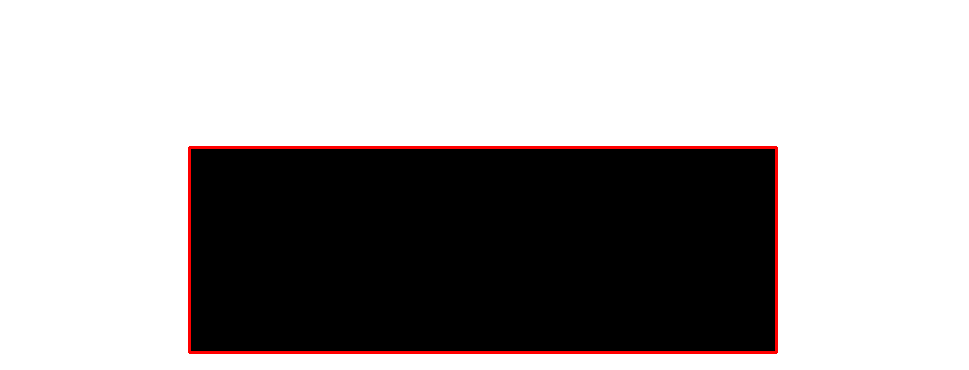

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


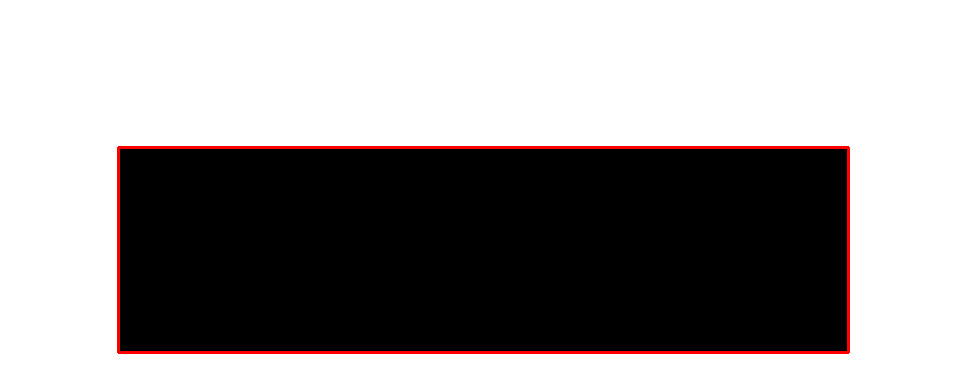

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


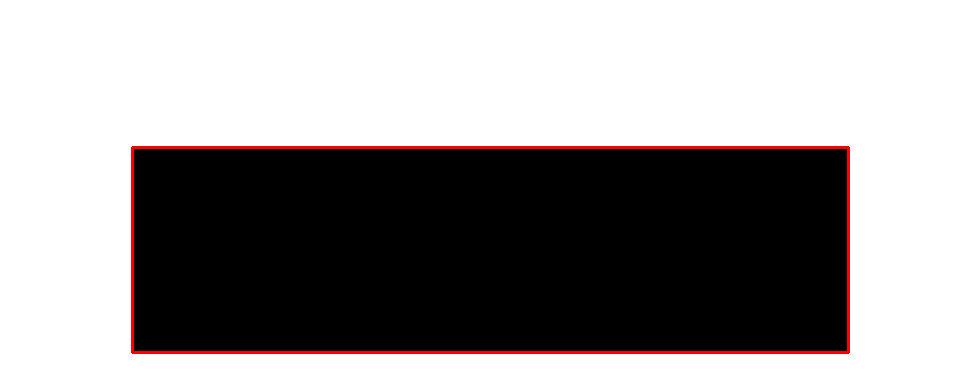

Rectangle coordinates: 103 147 862 352
Rectangle coordinates: 103 147 862 352


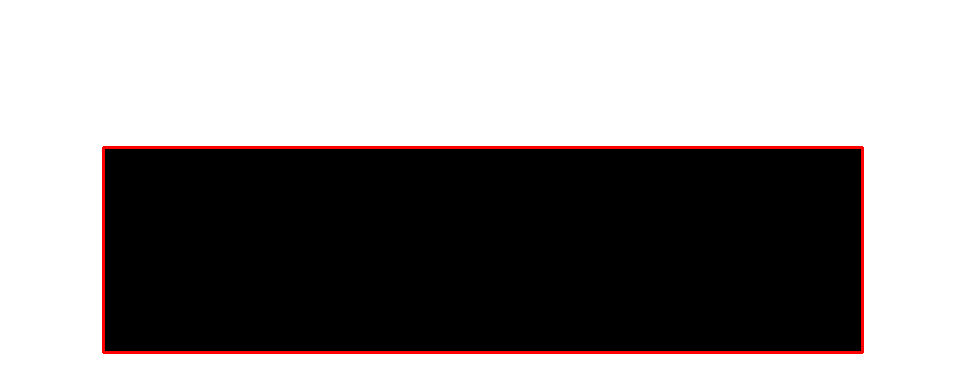

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


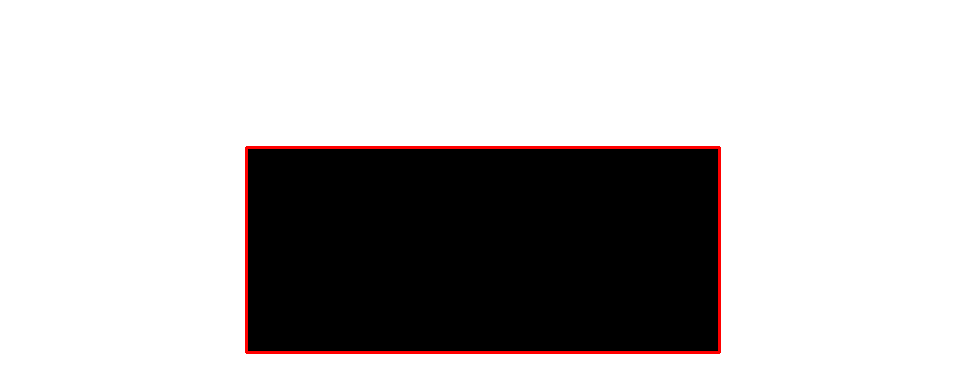

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


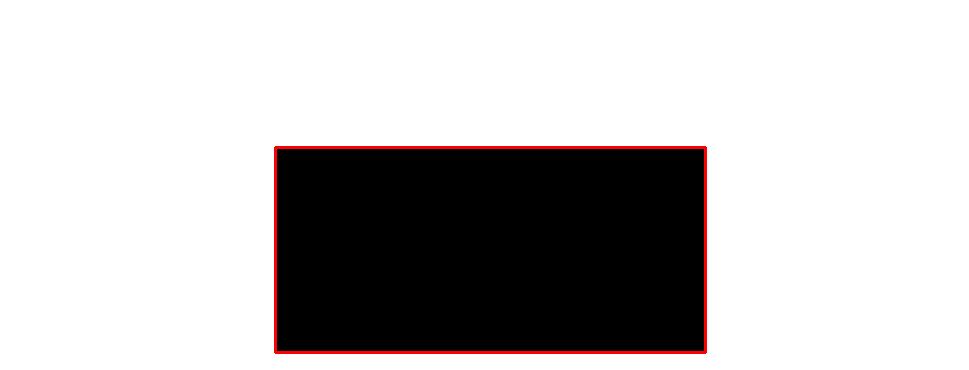

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


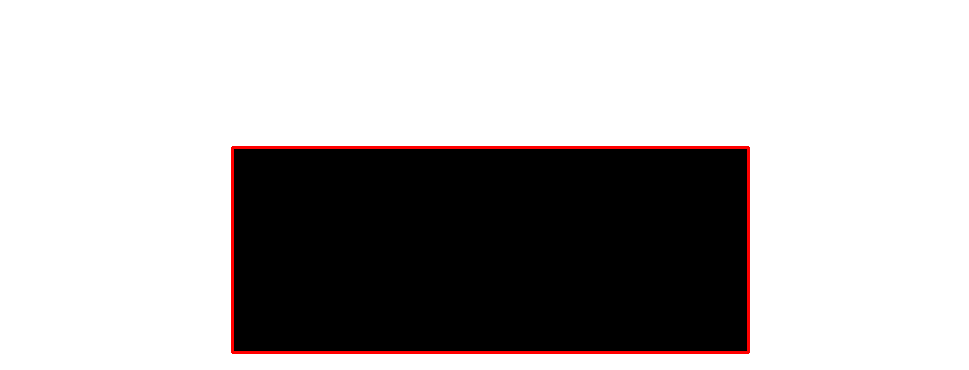

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


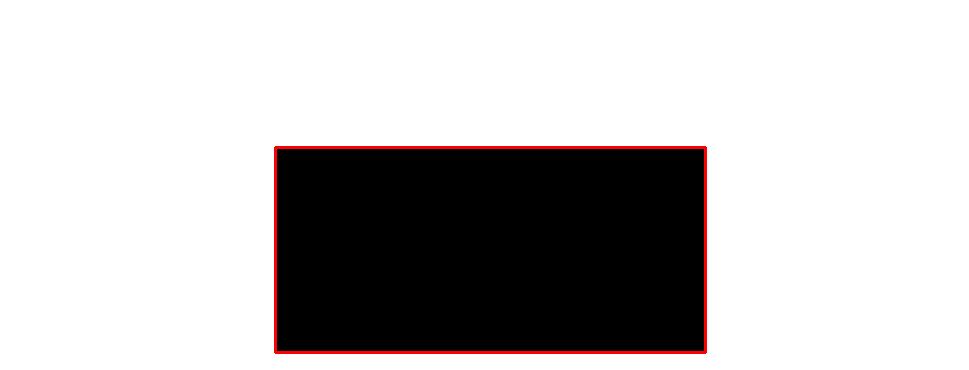

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


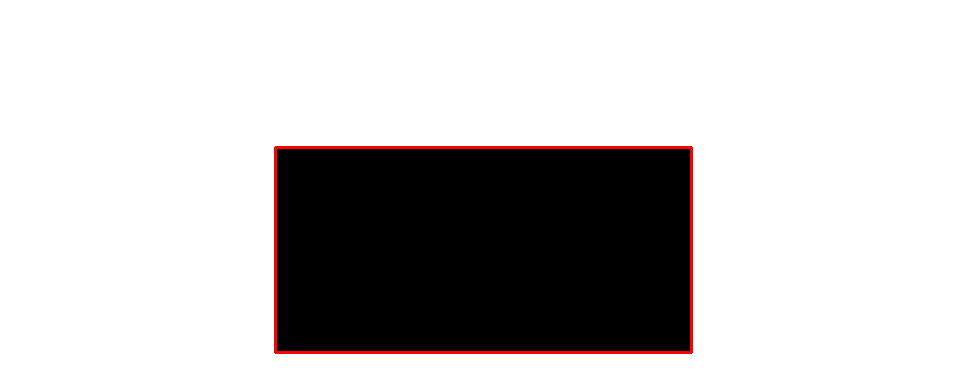

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


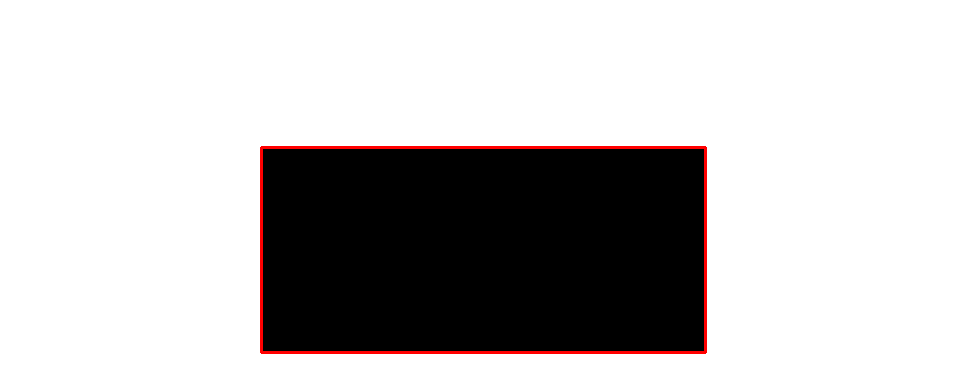

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


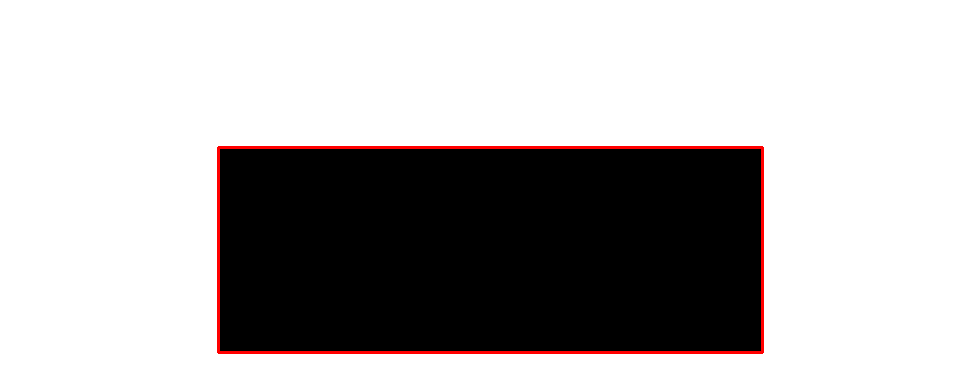

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


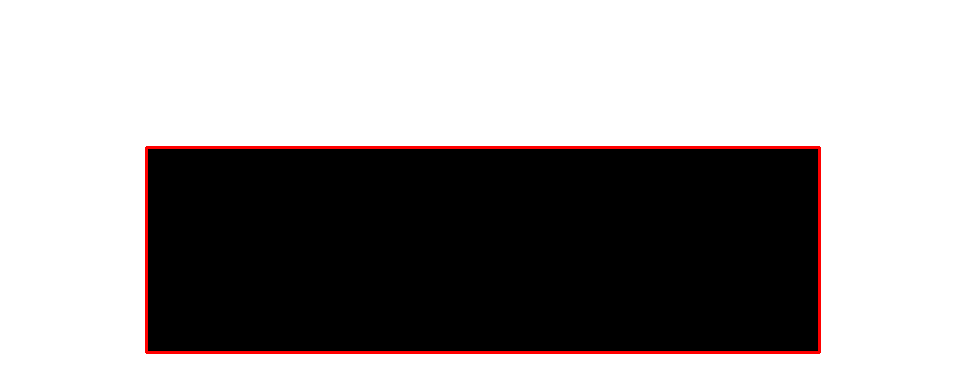

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


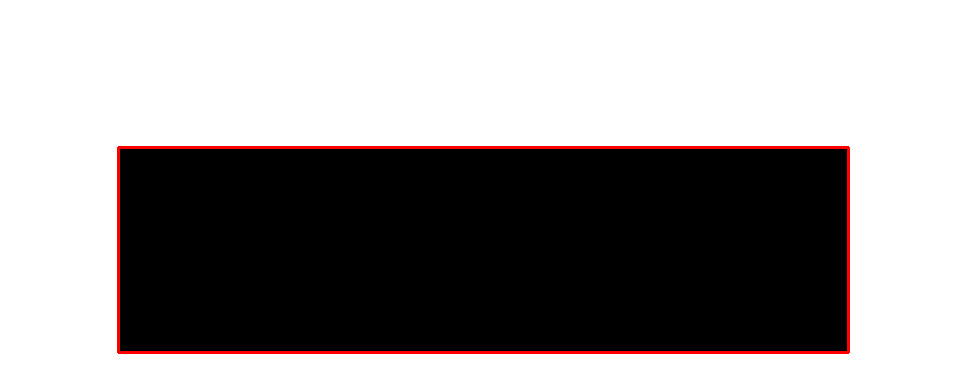

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


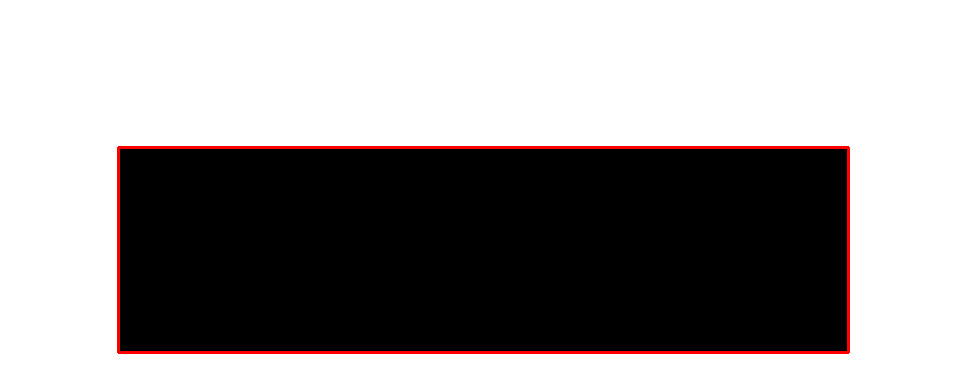

Rectangle coordinates: 118 147 862 352
Rectangle coordinates: 118 147 862 352


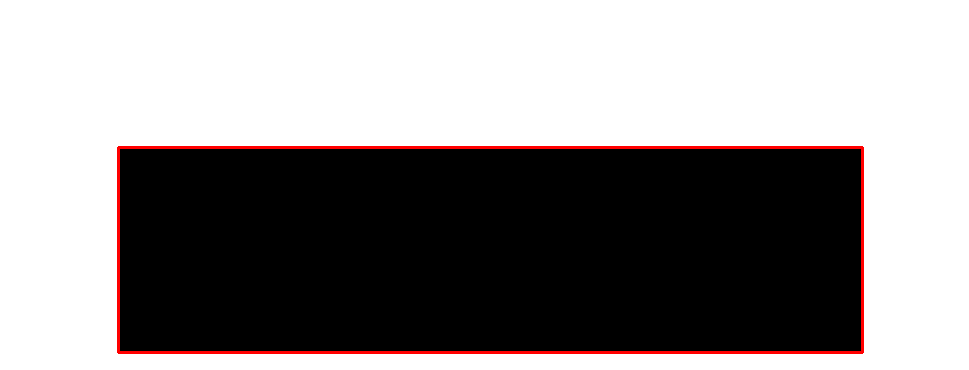

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


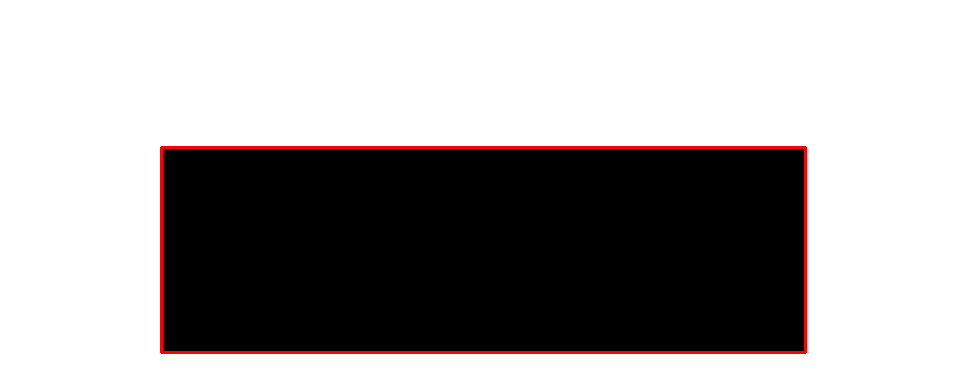

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


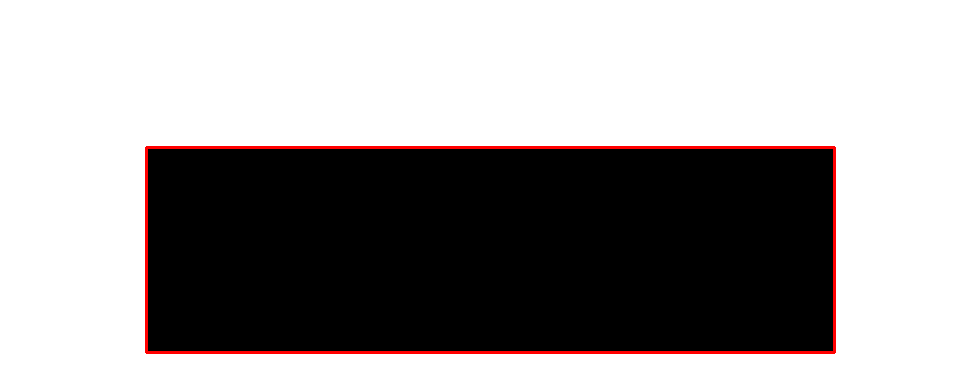

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


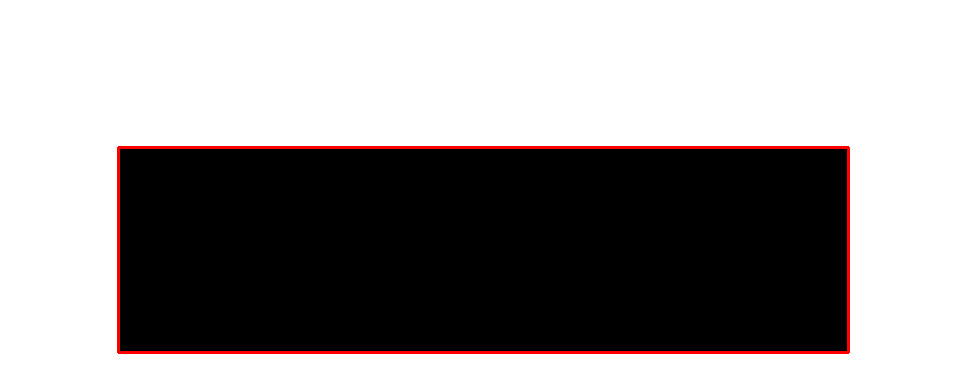

Rectangle coordinates: 32 147 934 352
Rectangle coordinates: 32 147 934 352


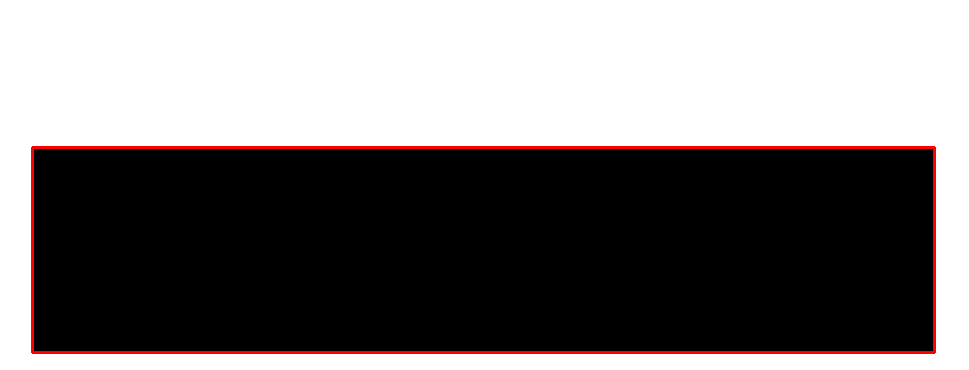

Rectangle coordinates: 61 147 905 352
Rectangle coordinates: 61 147 905 352


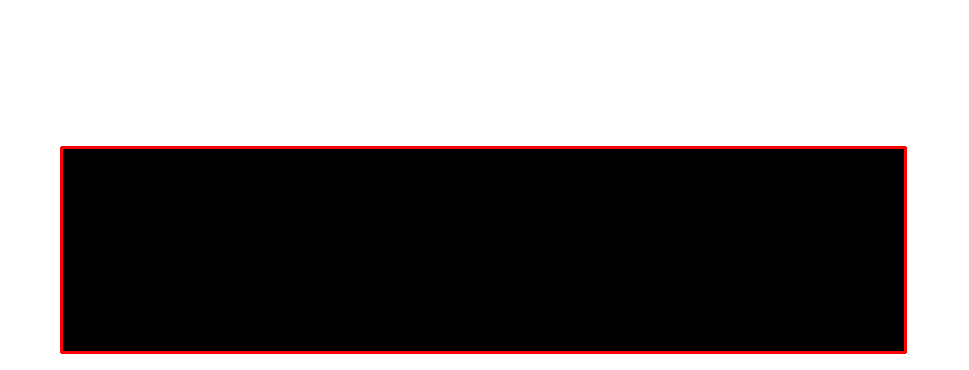

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


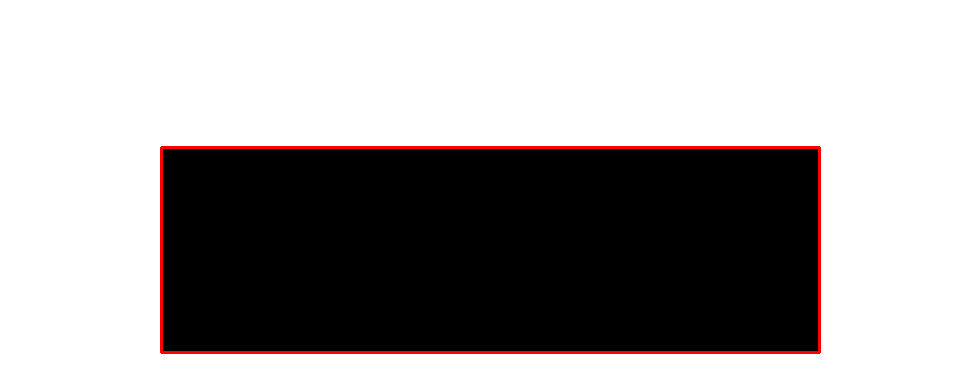

Rectangle coordinates: 103 147 862 352
Rectangle coordinates: 103 147 862 352


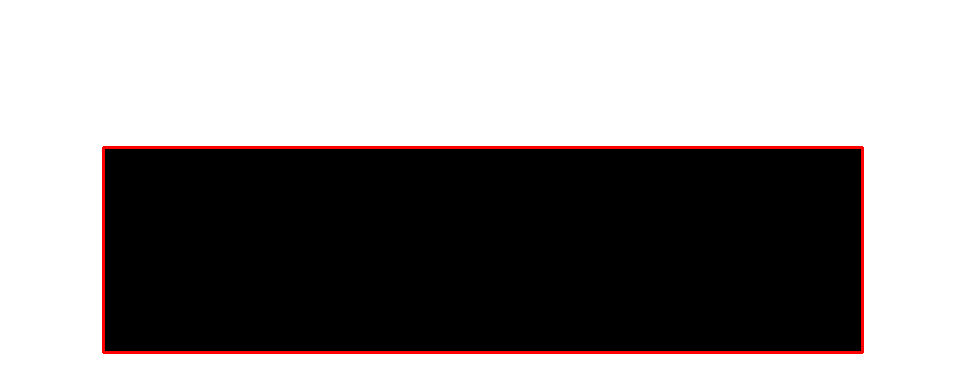

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


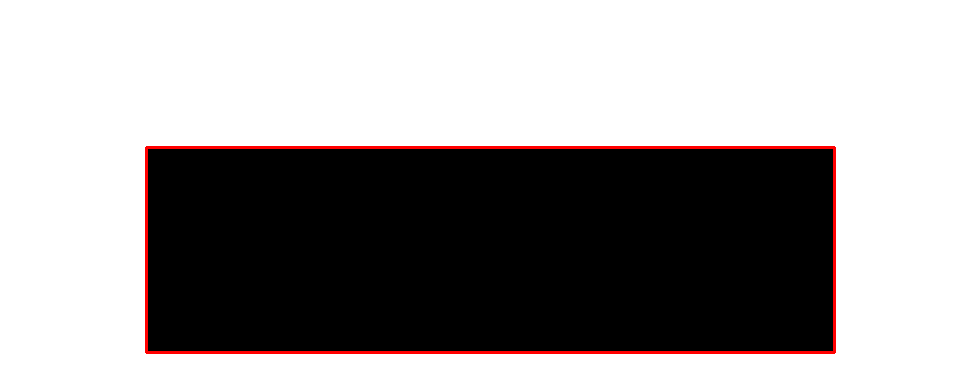

Rectangle coordinates: 118 147 862 352
Rectangle coordinates: 118 147 862 352


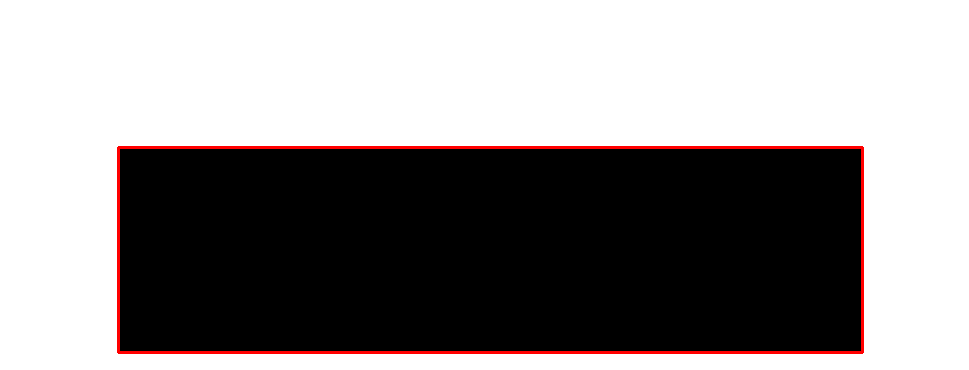

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


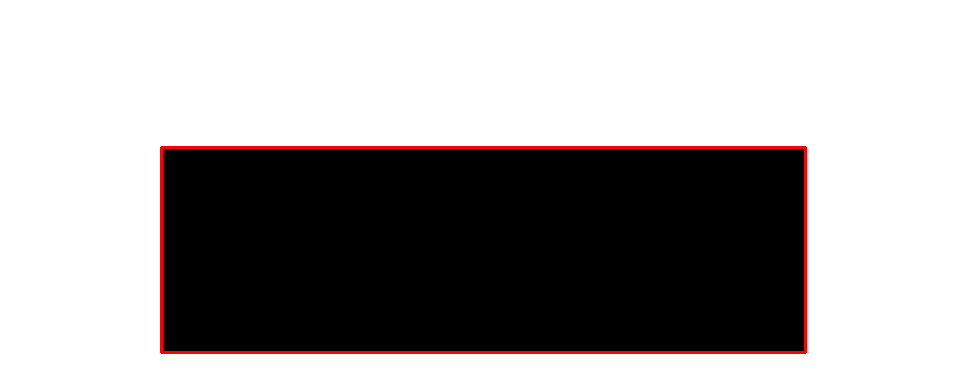

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


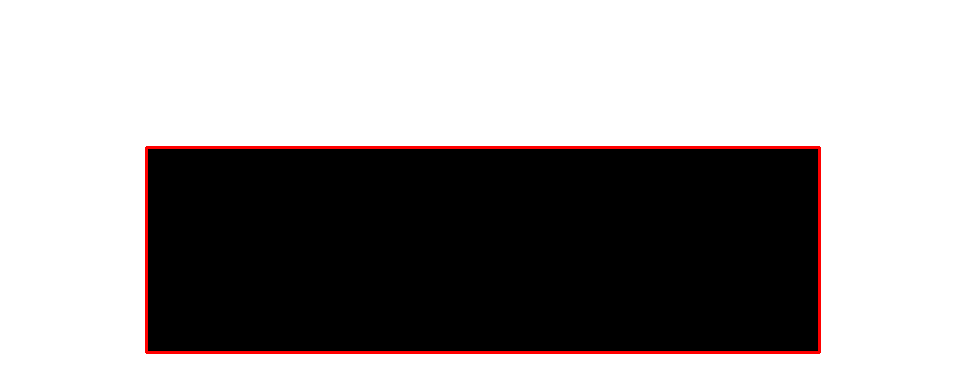

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


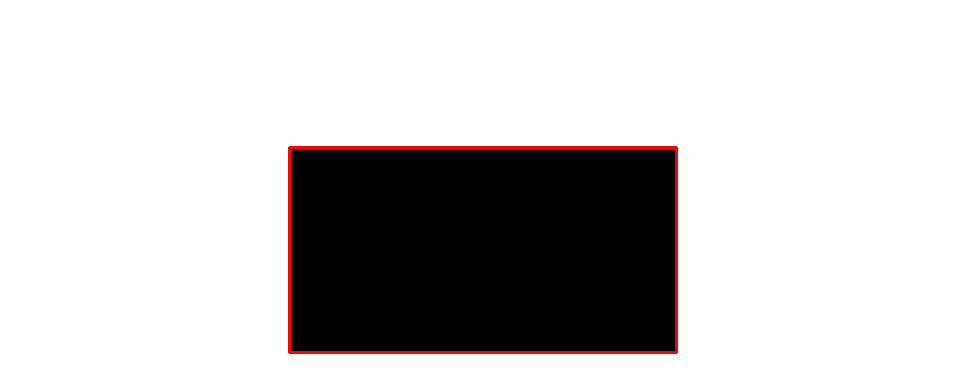

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

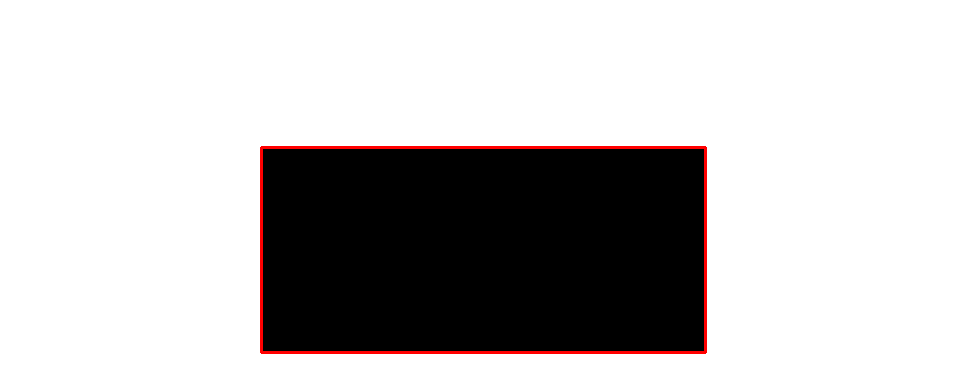

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


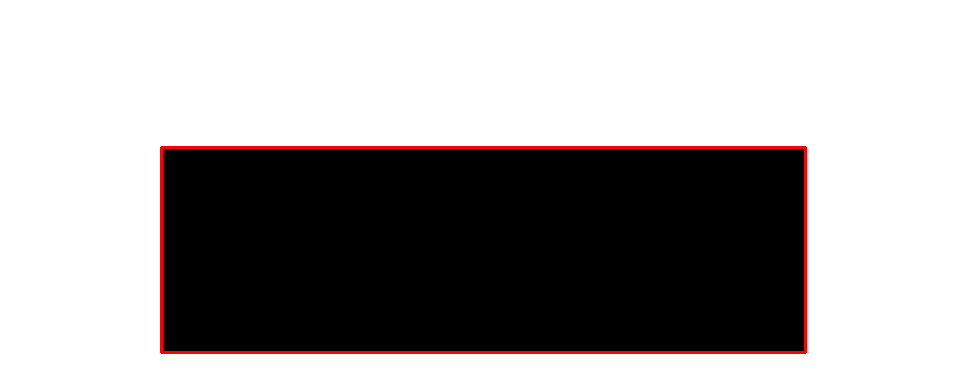

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


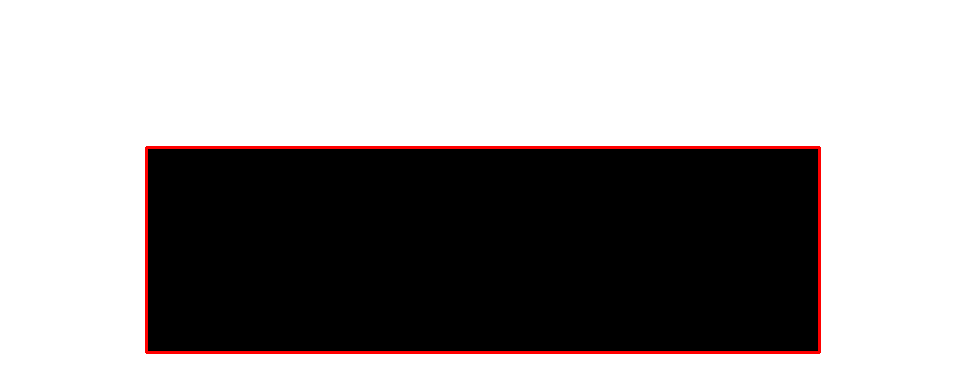

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


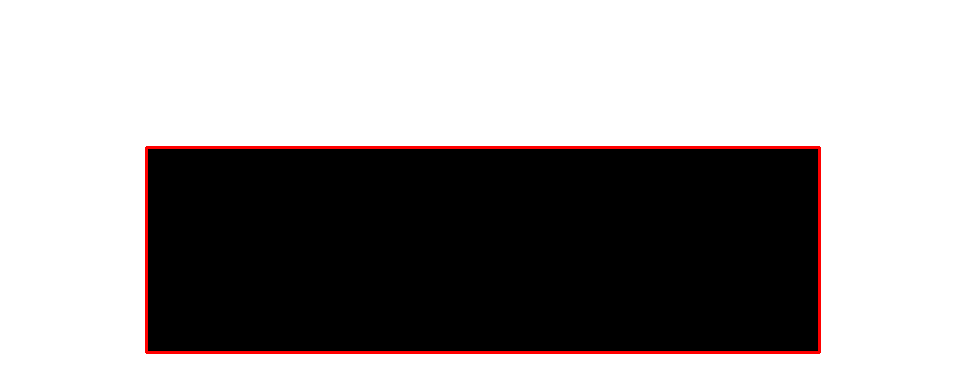

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


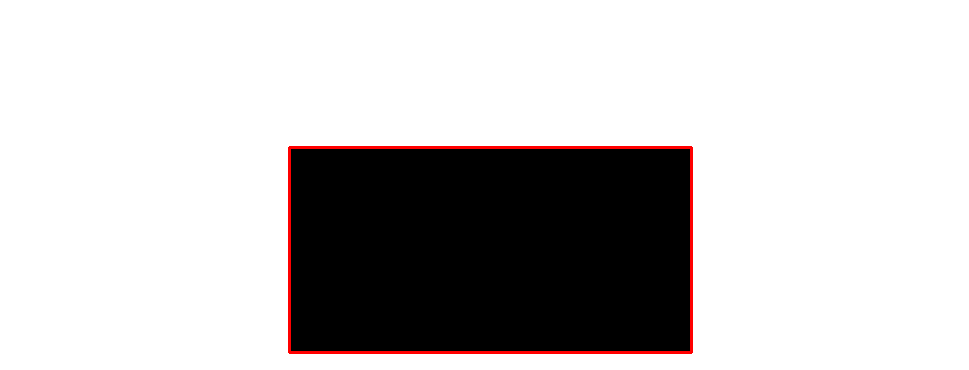

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


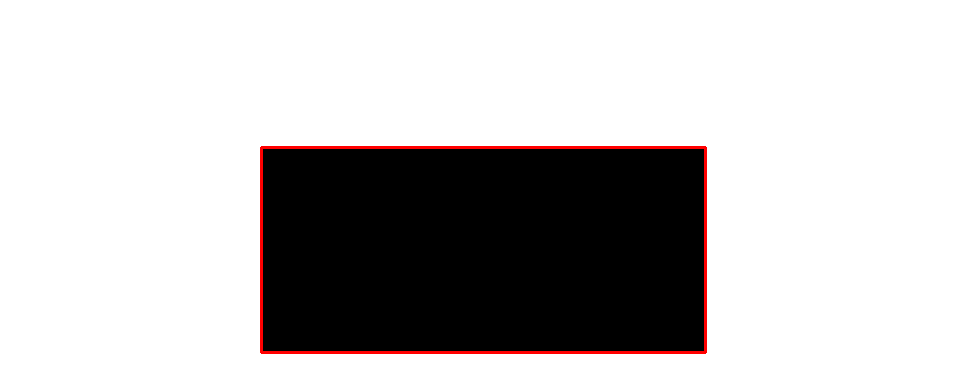

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


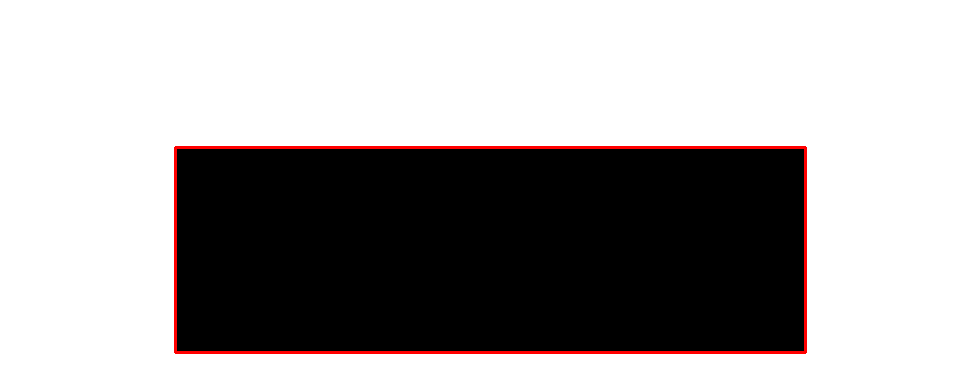

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


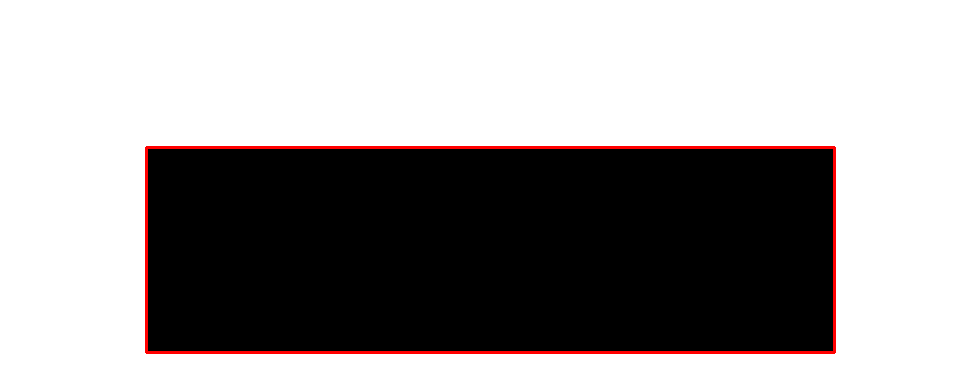

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


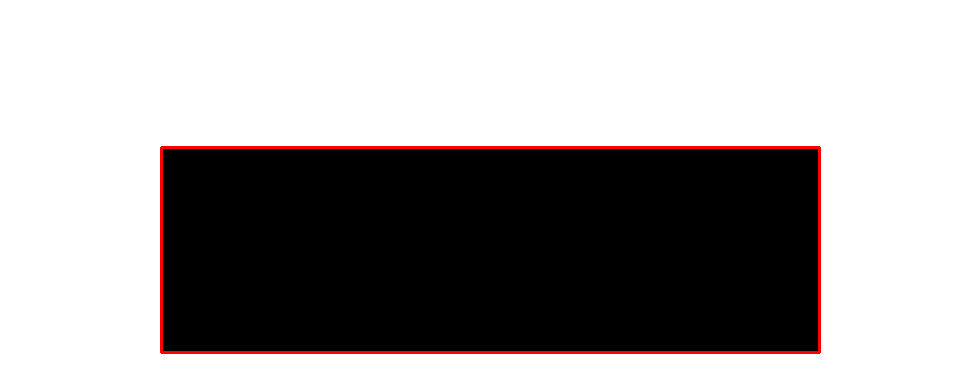

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


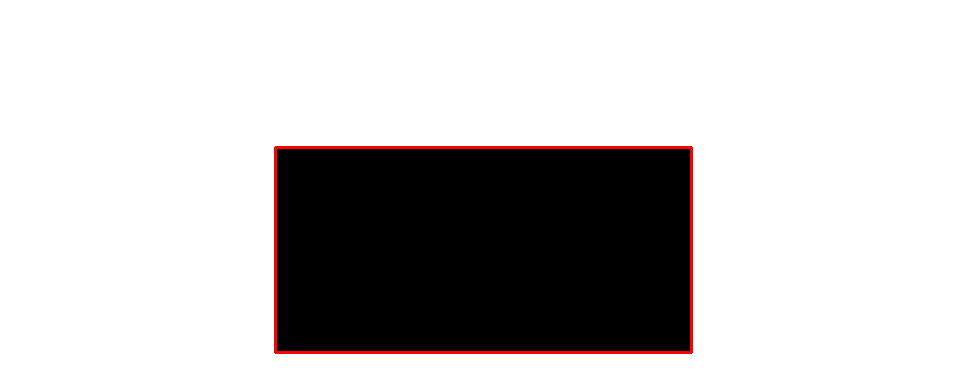

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


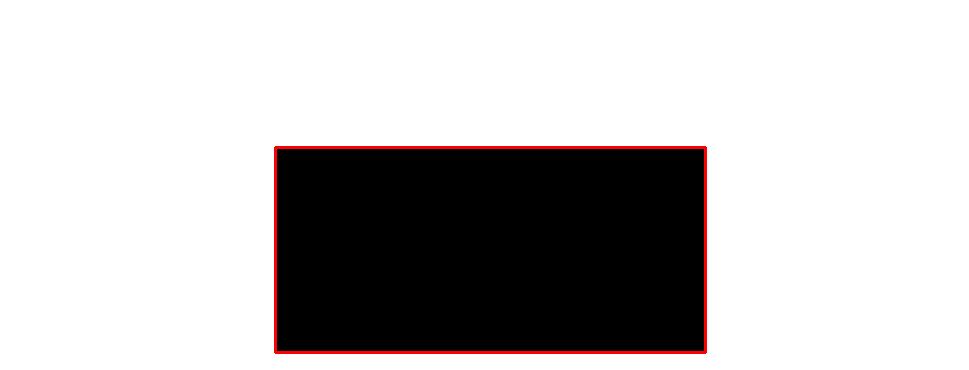

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


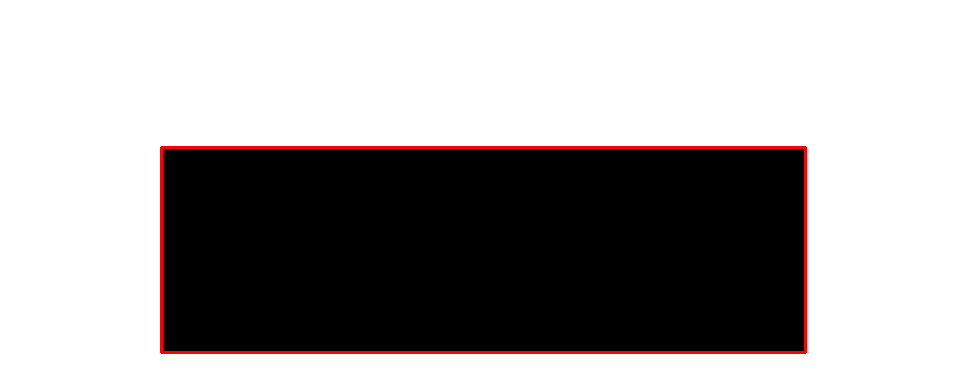

Rectangle coordinates: 132 147 834 352
Rectangle coordinates: 132 147 834 352


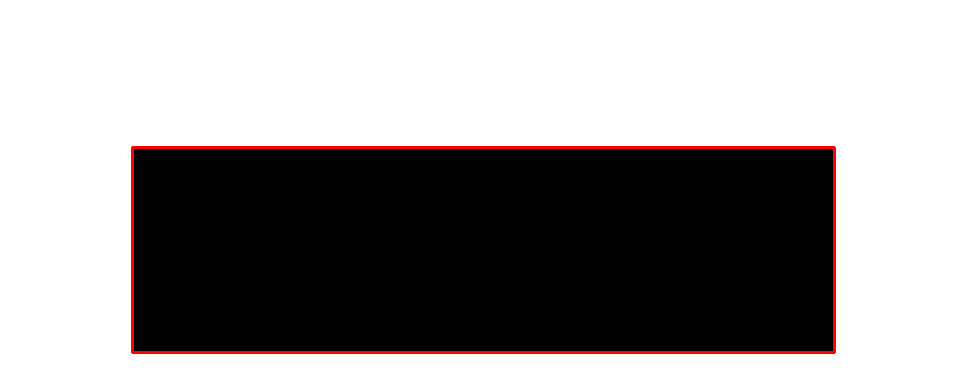

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


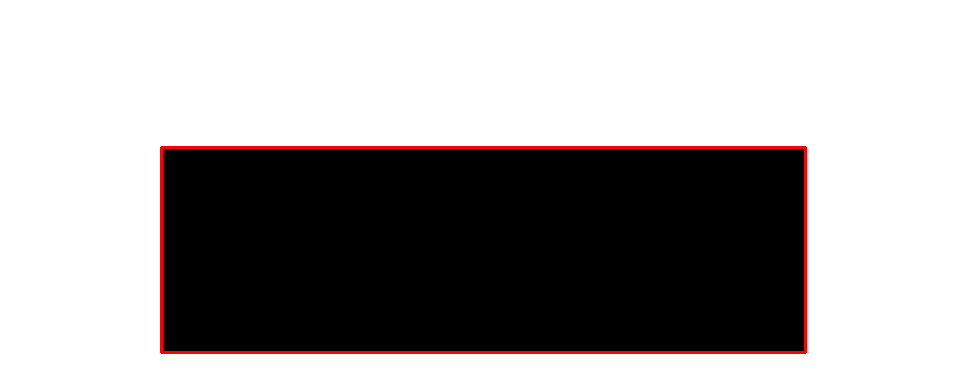

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


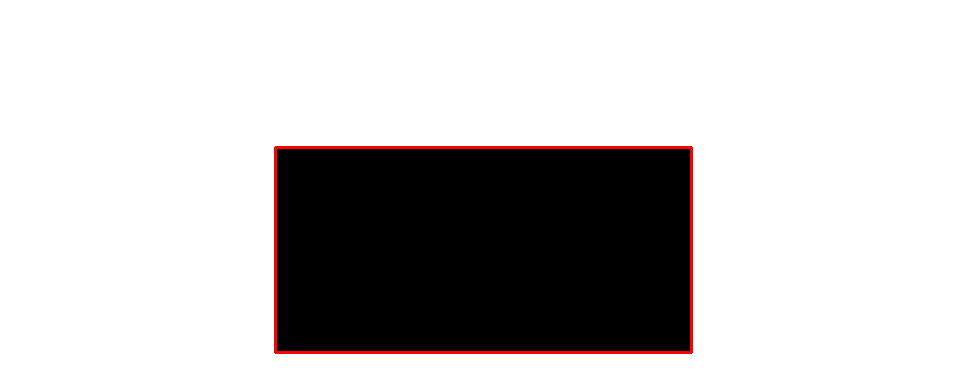

Rectangle coordinates: 432 147 548 352
Rectangle coordinates: 432 147 548 352


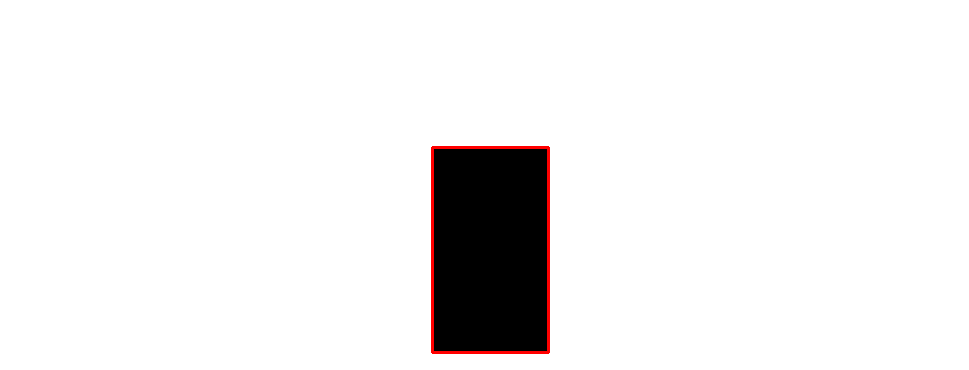

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


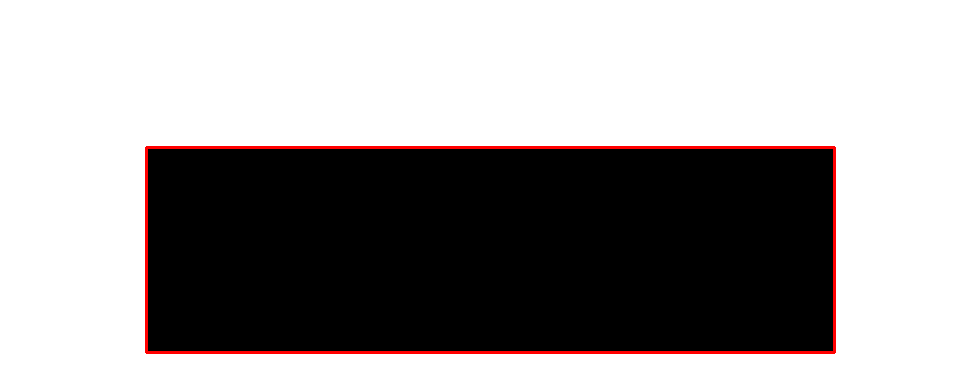

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


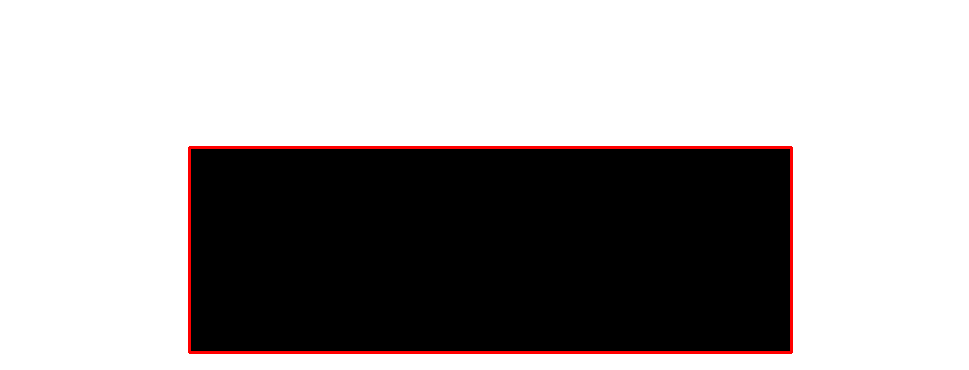

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


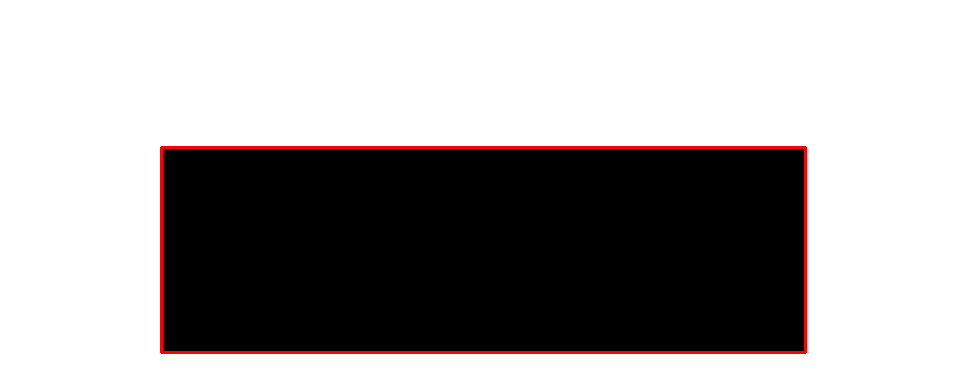

Rectangle coordinates: 118 147 862 352
Rectangle coordinates: 118 147 862 352


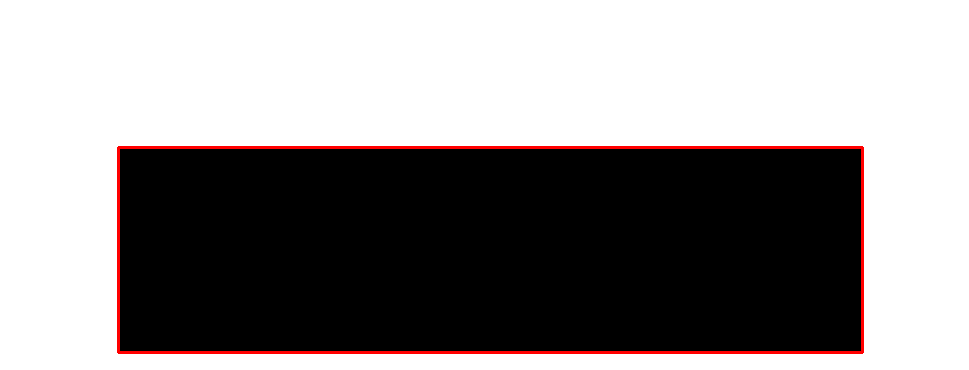

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


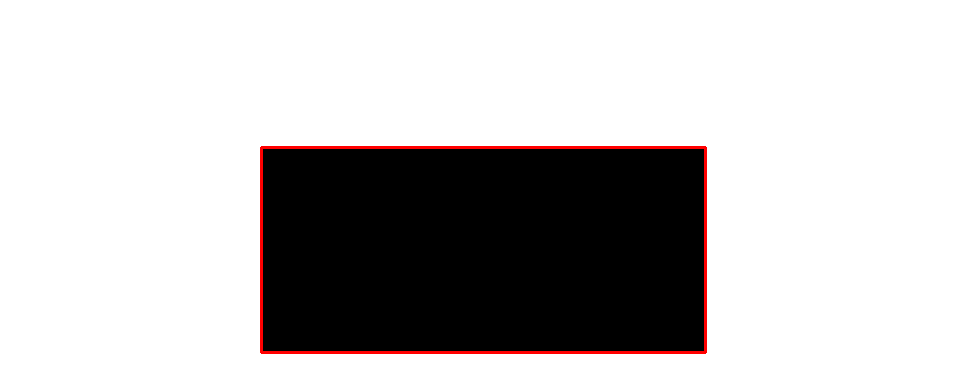

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


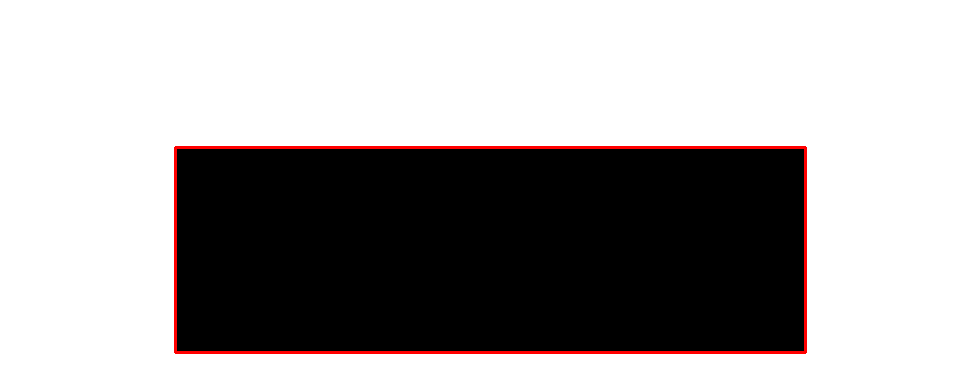

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


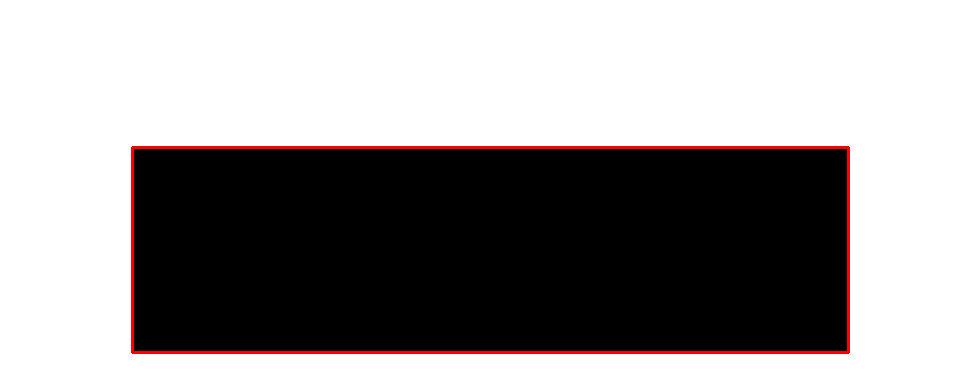

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


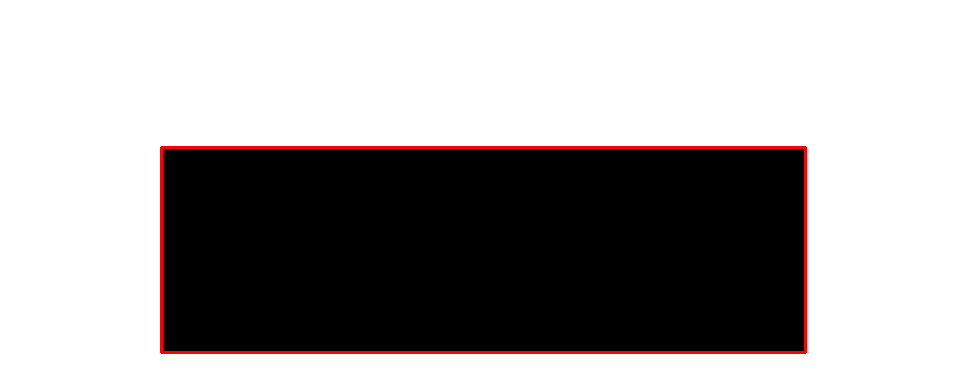

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


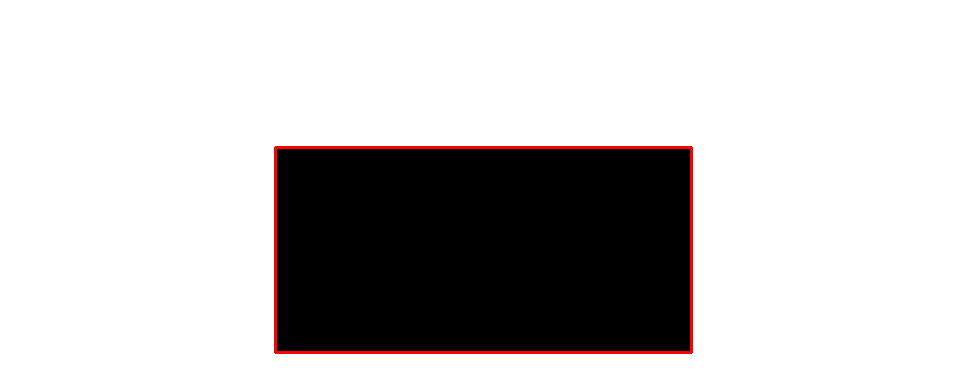

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


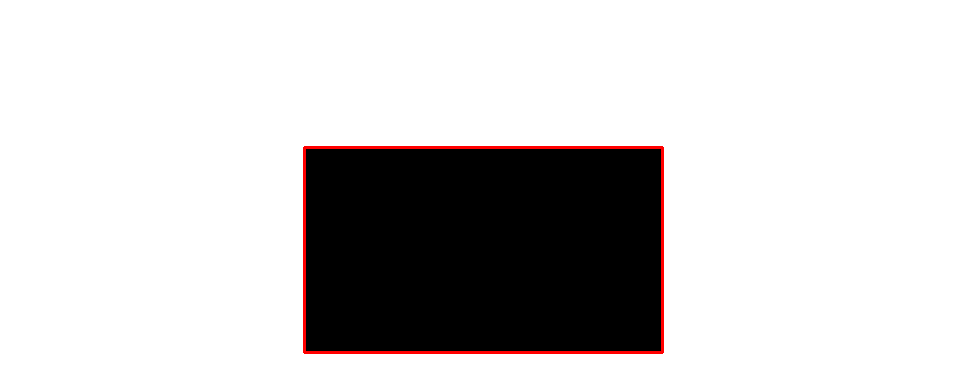

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


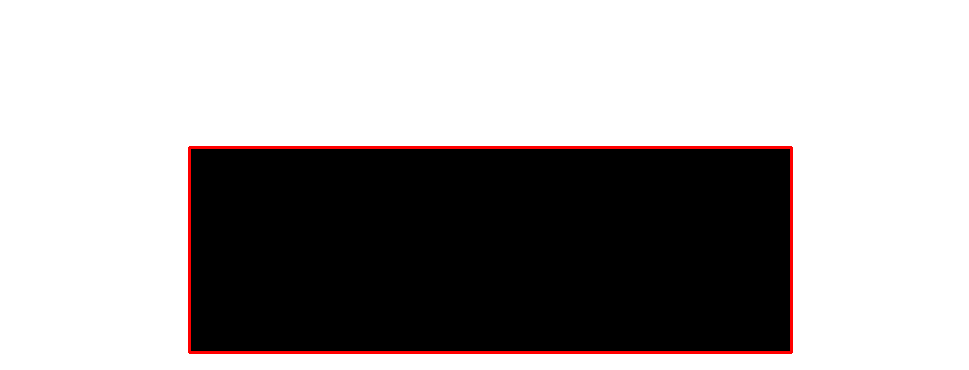

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


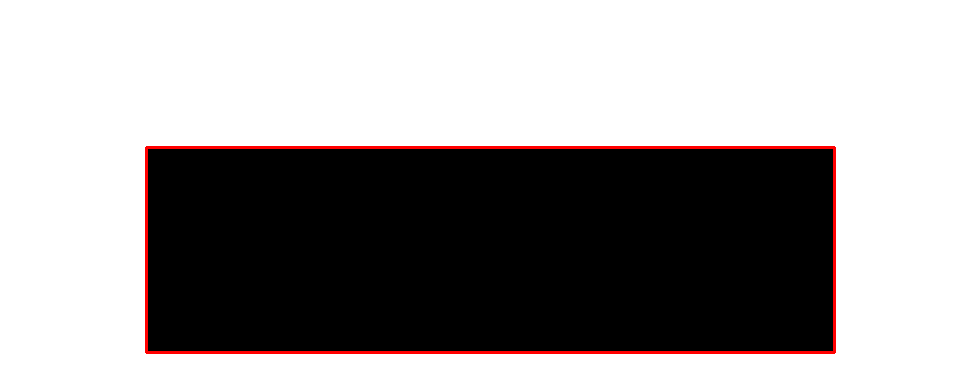

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


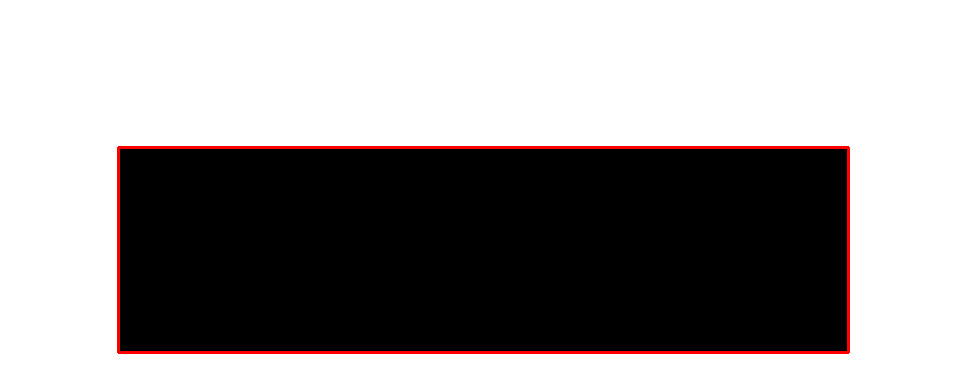

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


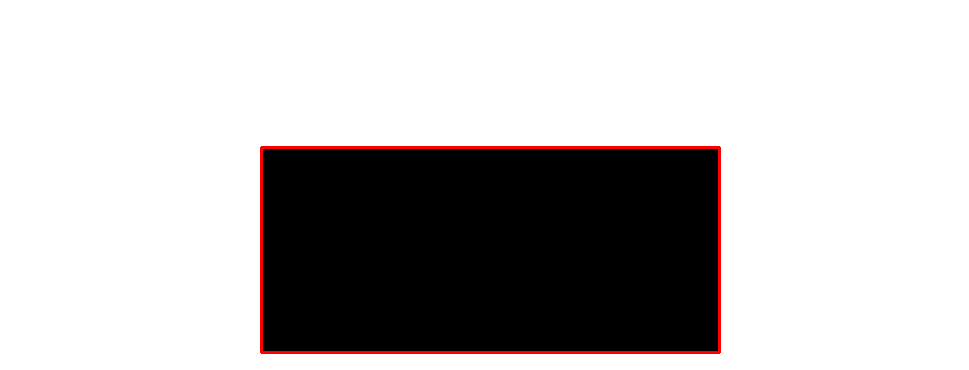

Rectangle coordinates: 432 147 548 352
Rectangle coordinates: 432 147 548 352


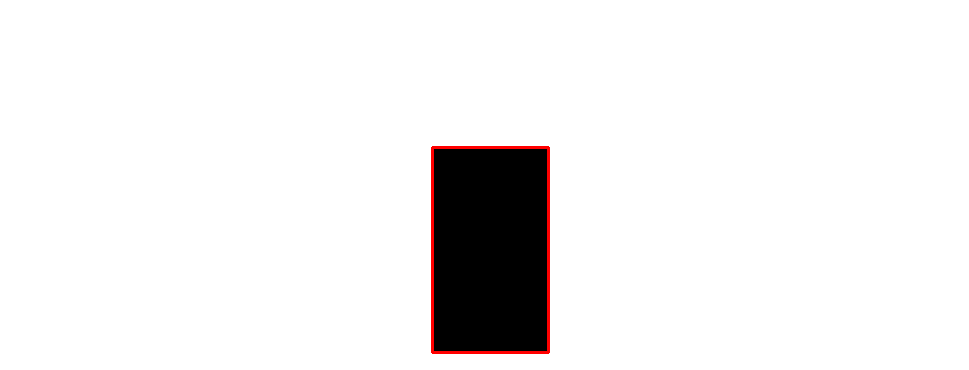

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


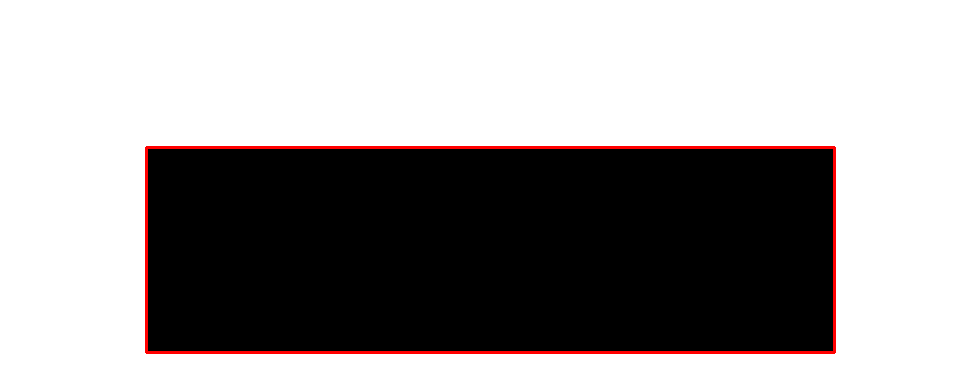

Rectangle coordinates: 175 147 791 352
Rectangle coordinates: 175 147 791 352


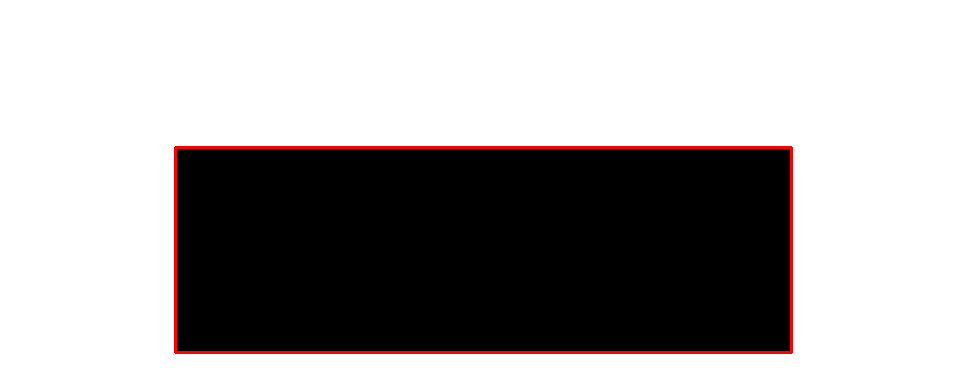

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


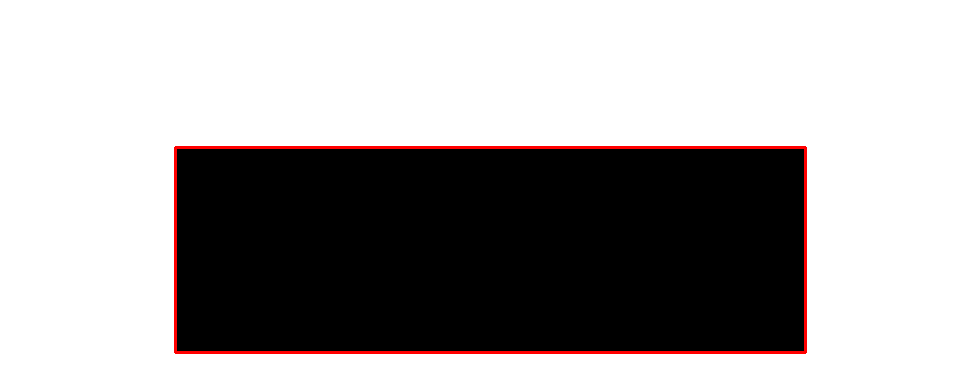

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


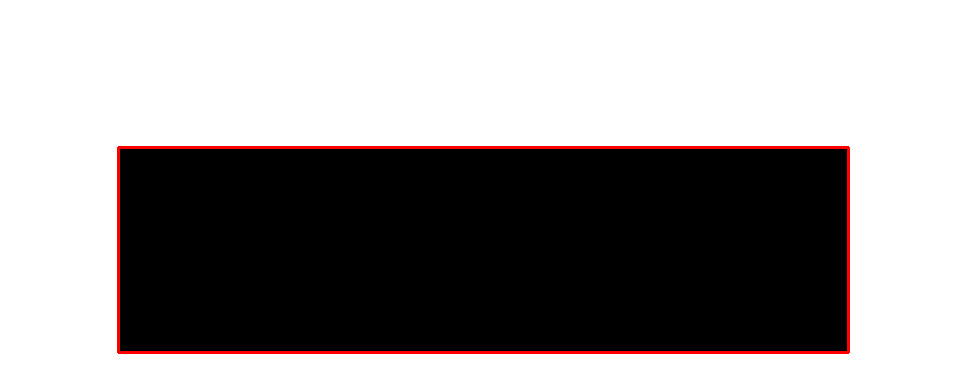

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


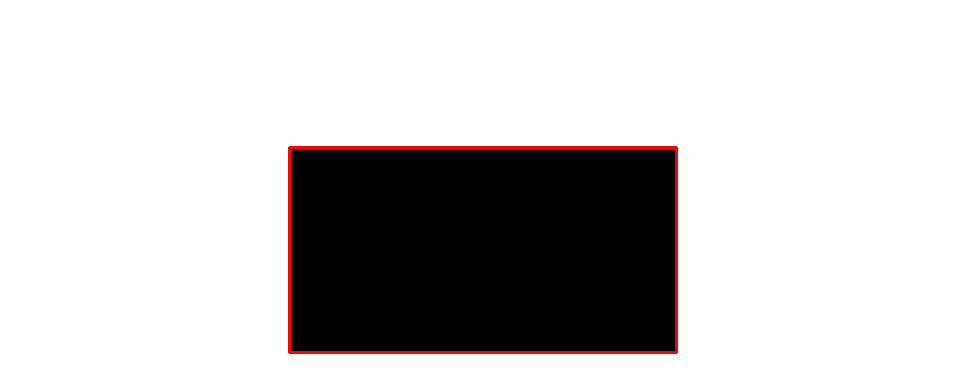

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


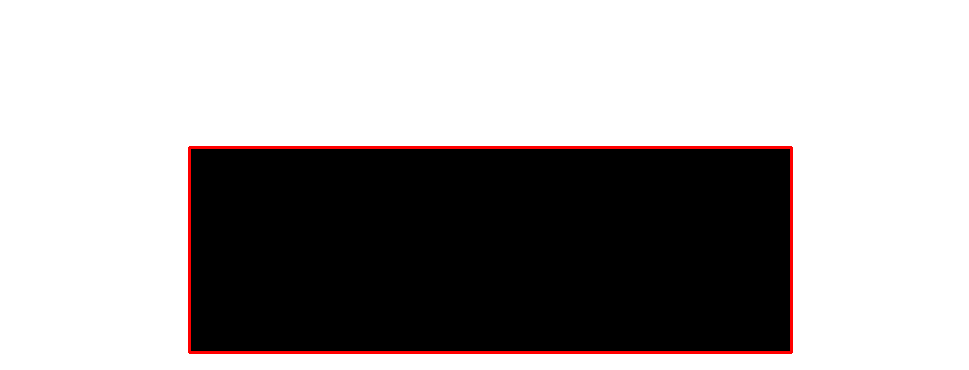

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


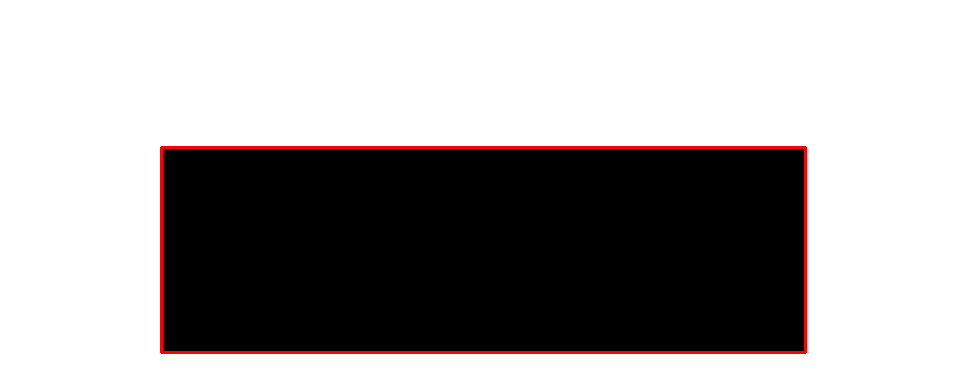

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


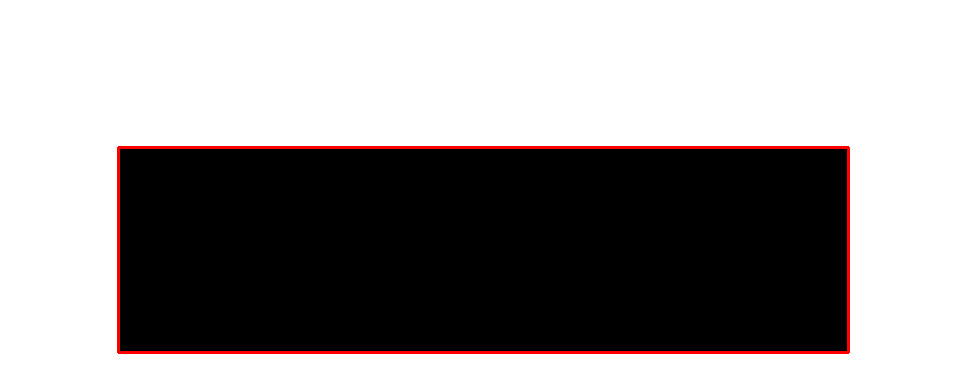

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


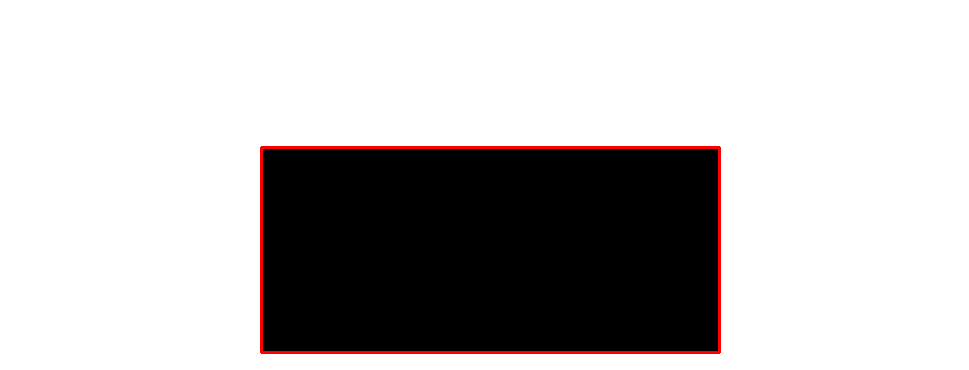

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


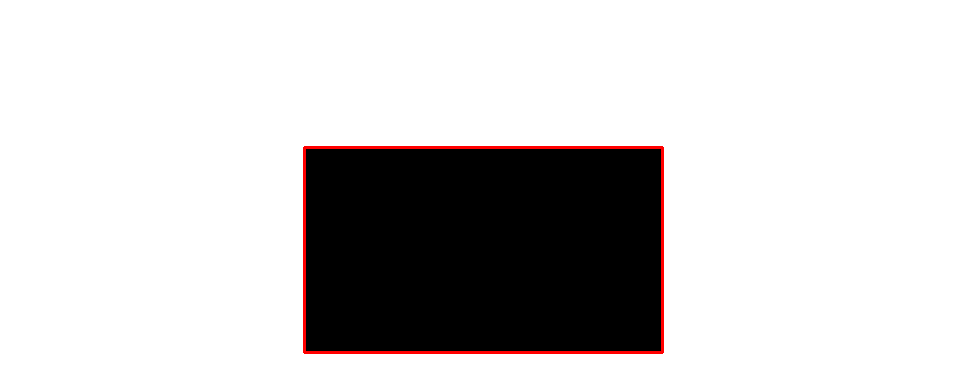

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


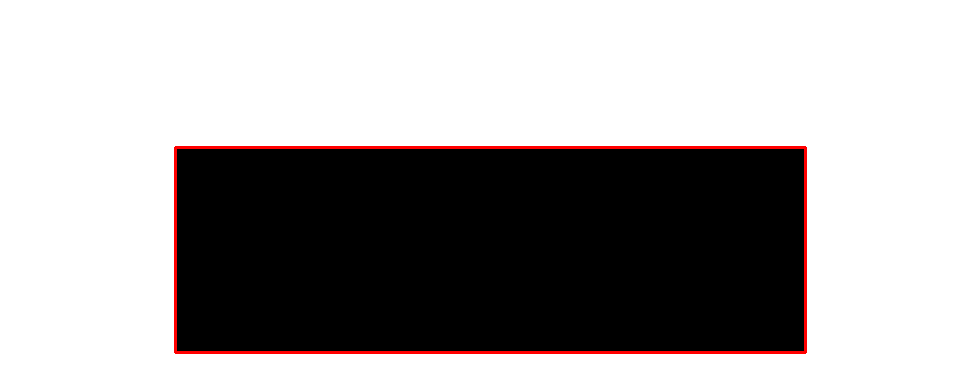

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


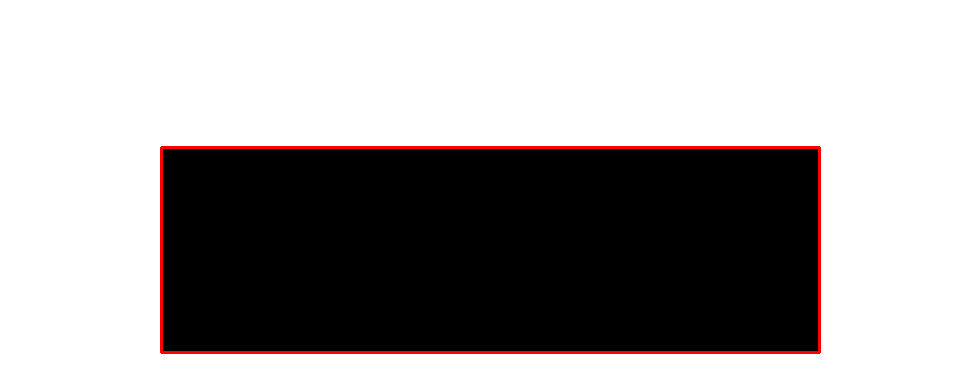

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


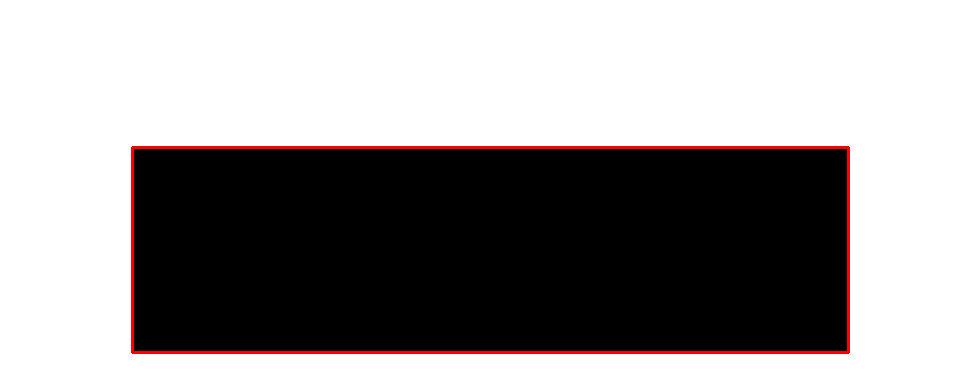

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


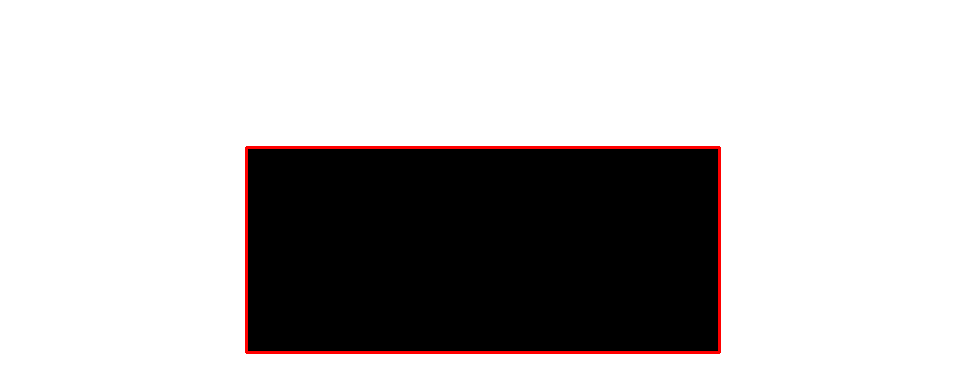

No contours found, skipping drawing rectangles.
Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


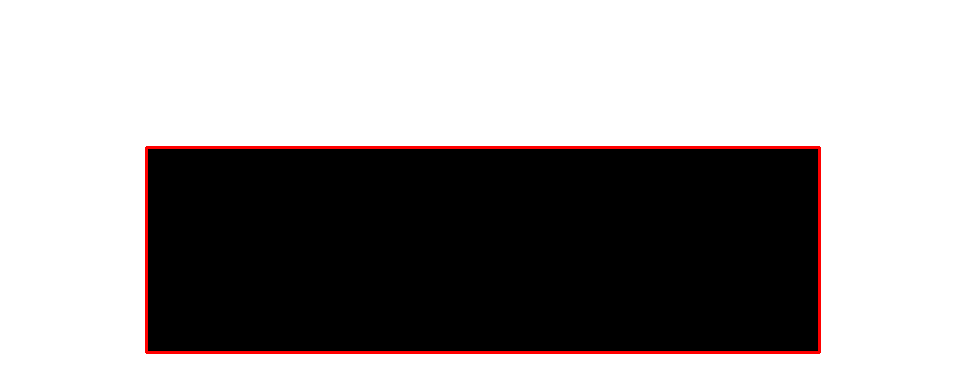

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


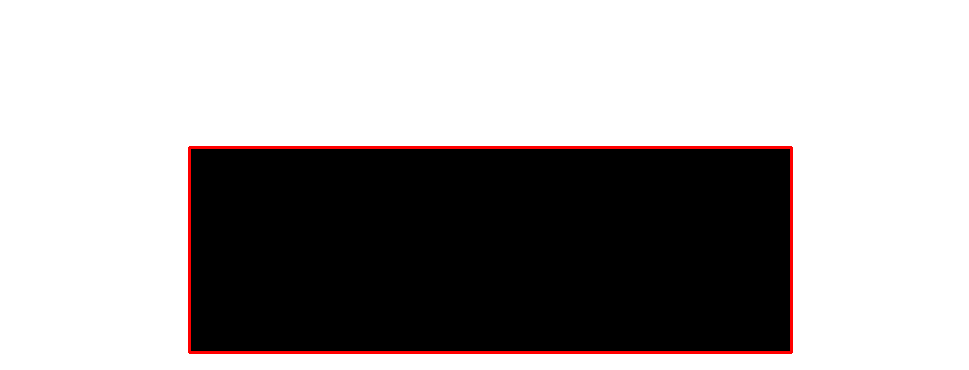

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


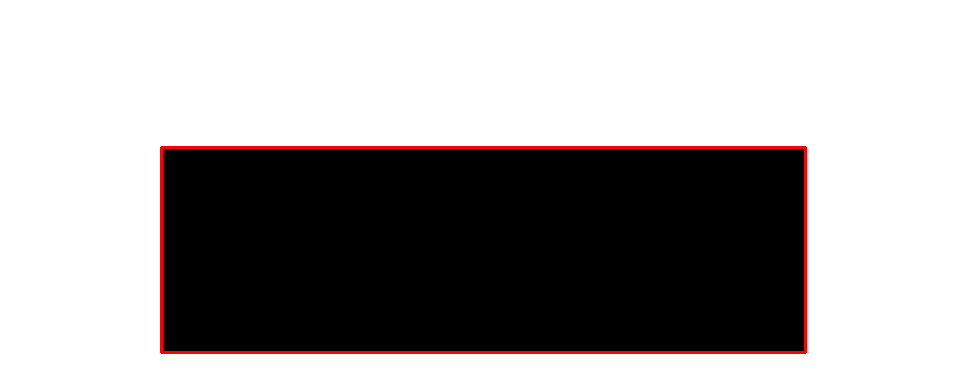

Rectangle coordinates: 118 147 848 352
Rectangle coordinates: 118 147 848 352


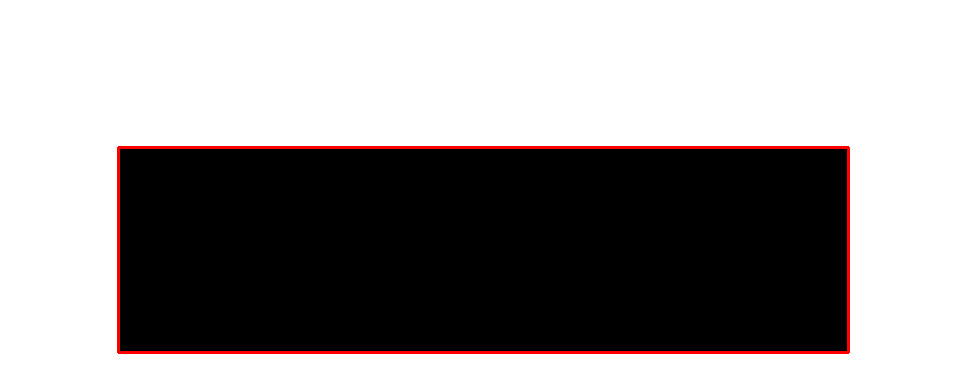

Rectangle coordinates: 447 147 533 352
Rectangle coordinates: 447 147 533 352


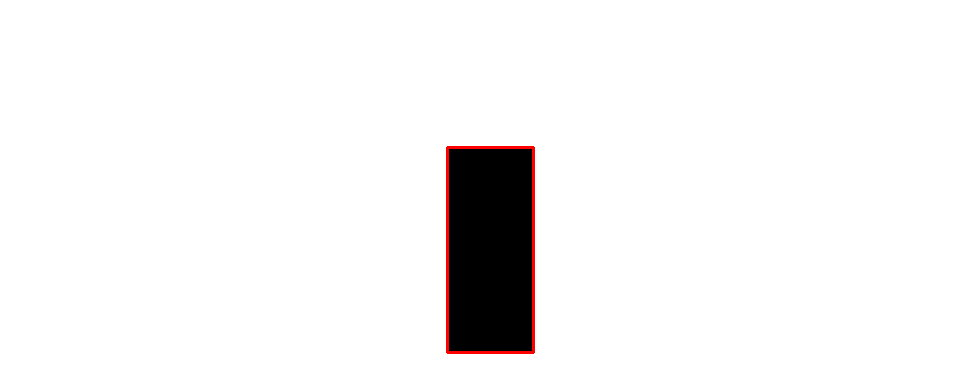

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


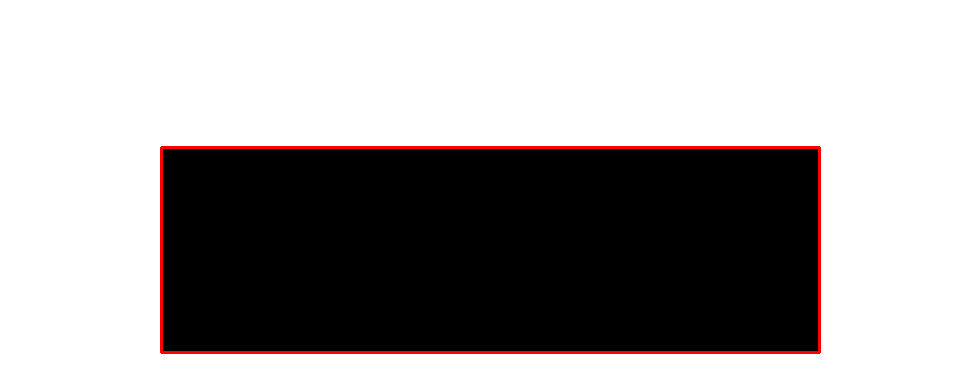

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


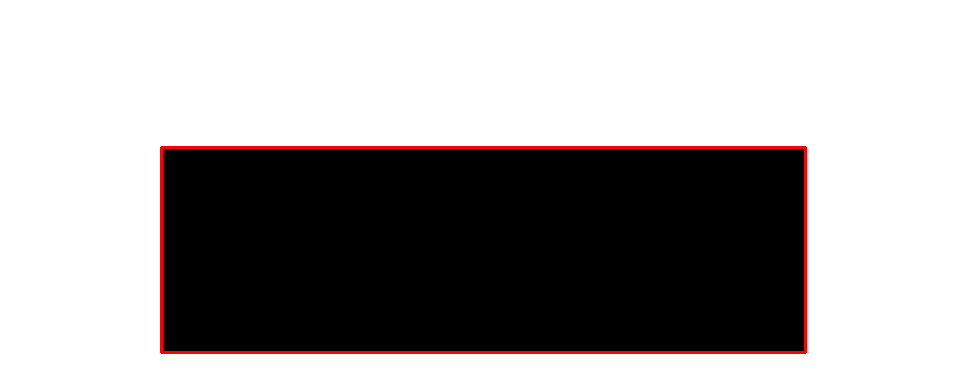

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


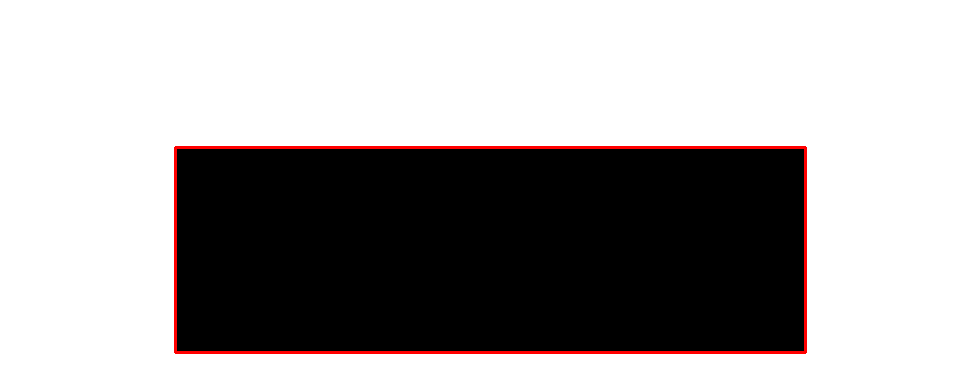

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


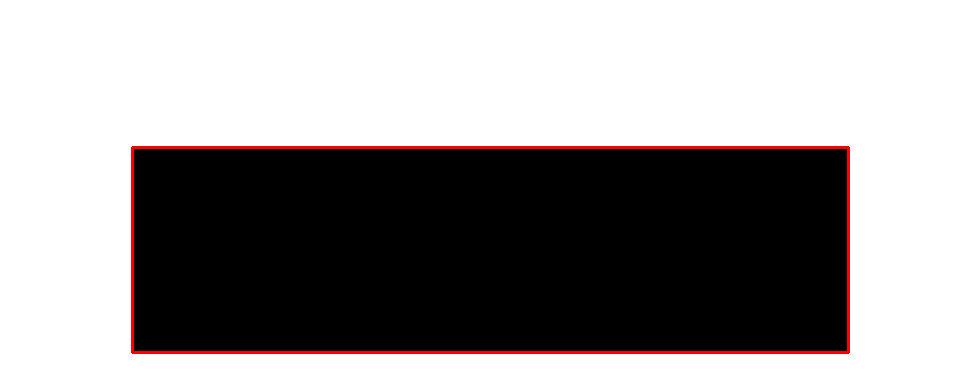

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


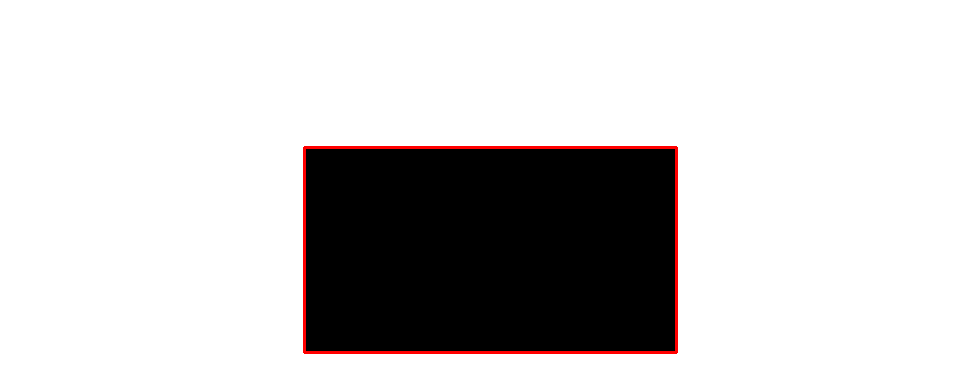

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


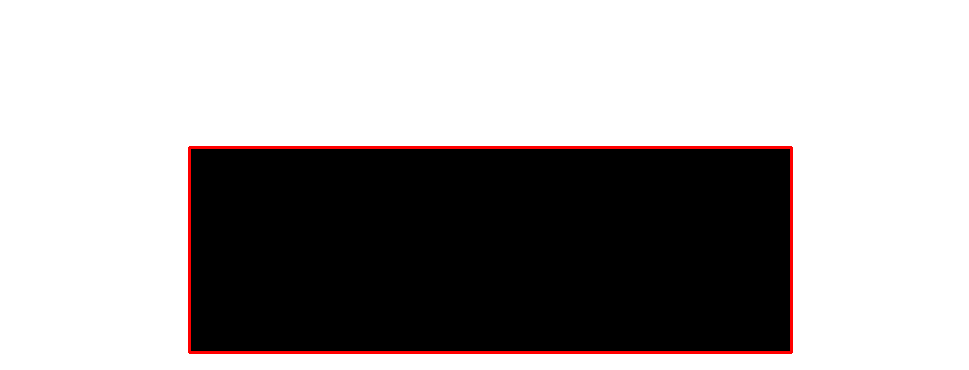

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


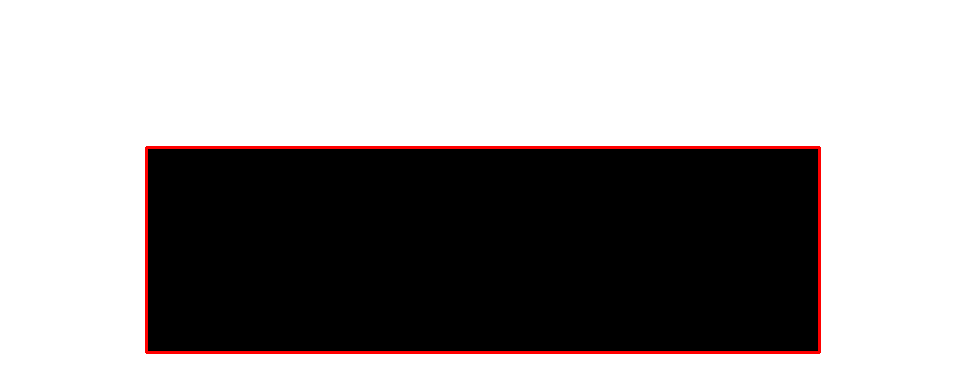

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


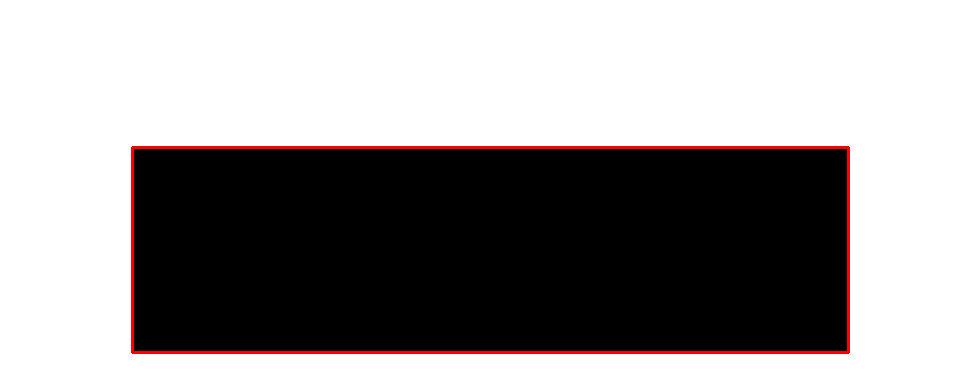

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


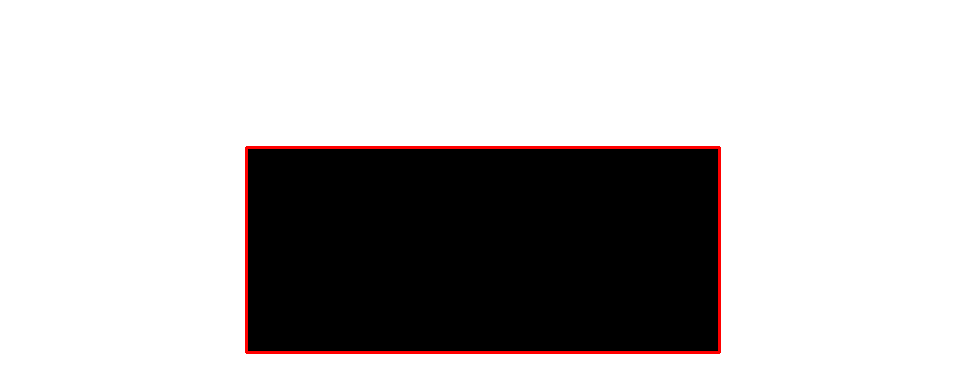

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 3 147 969 352


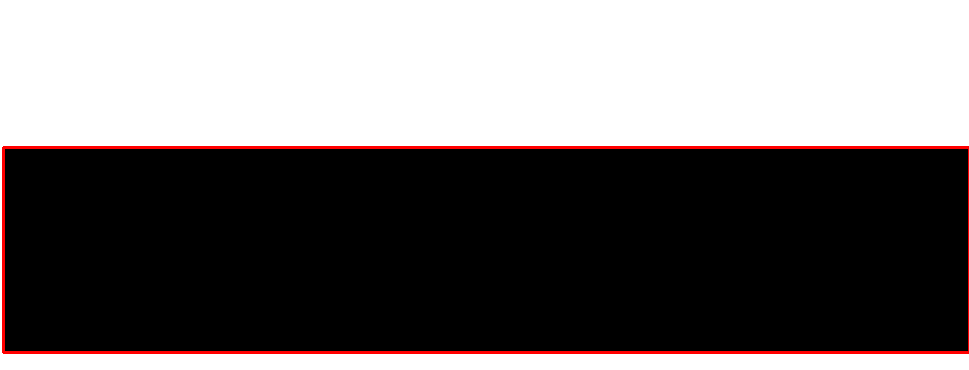

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


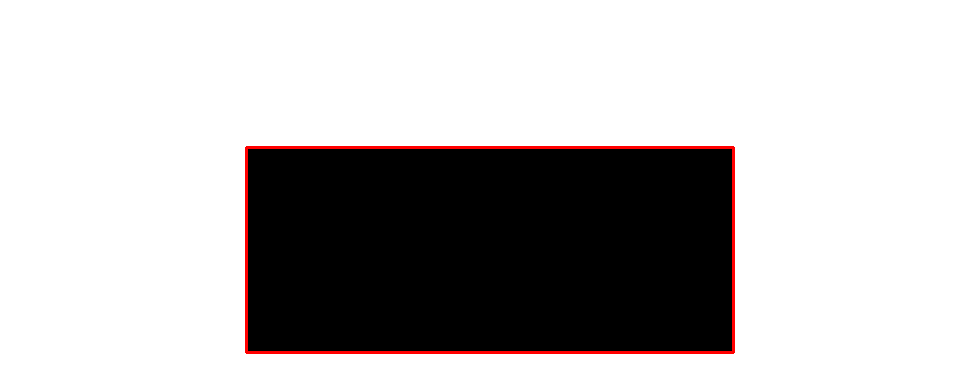

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


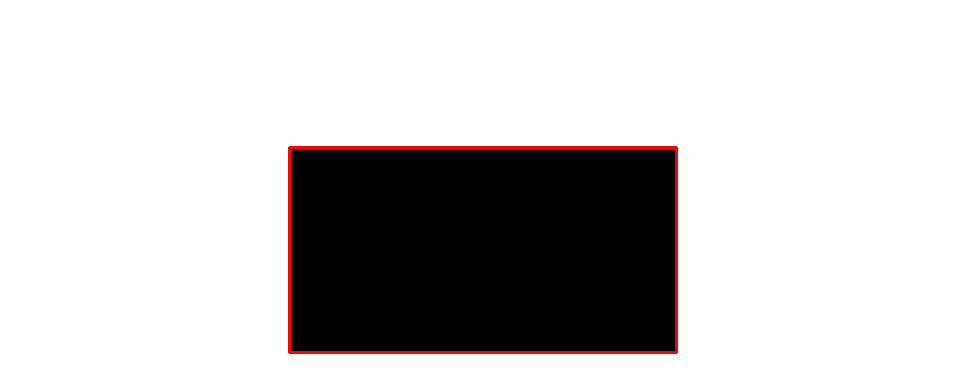

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


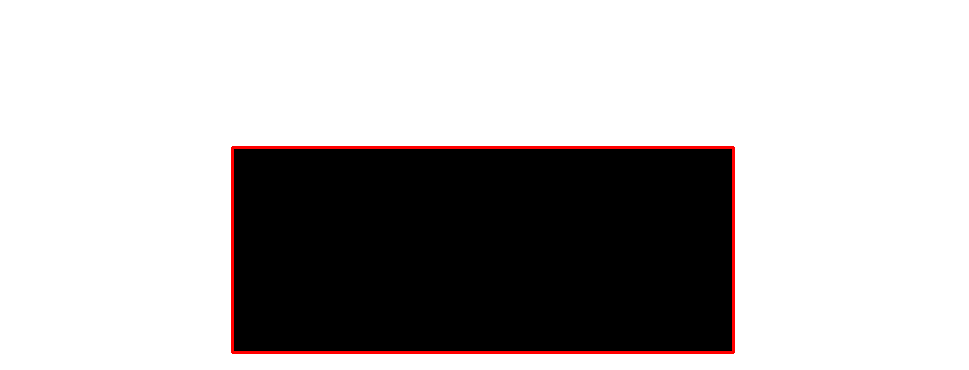

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


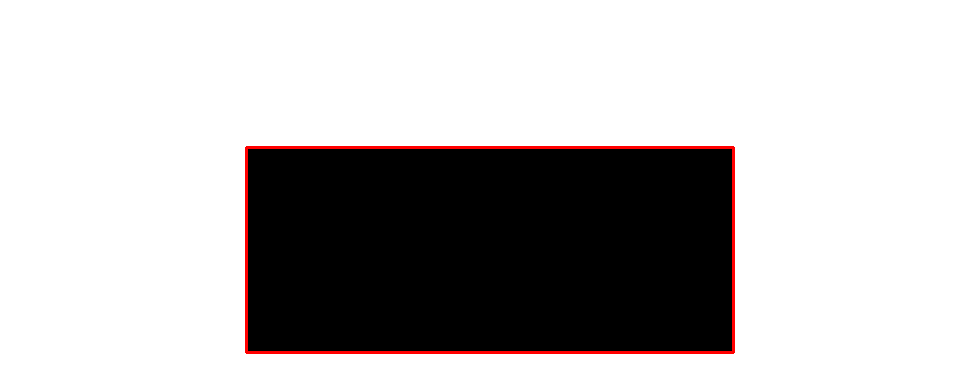

Rectangle coordinates: 132 147 834 352
Rectangle coordinates: 132 147 834 352


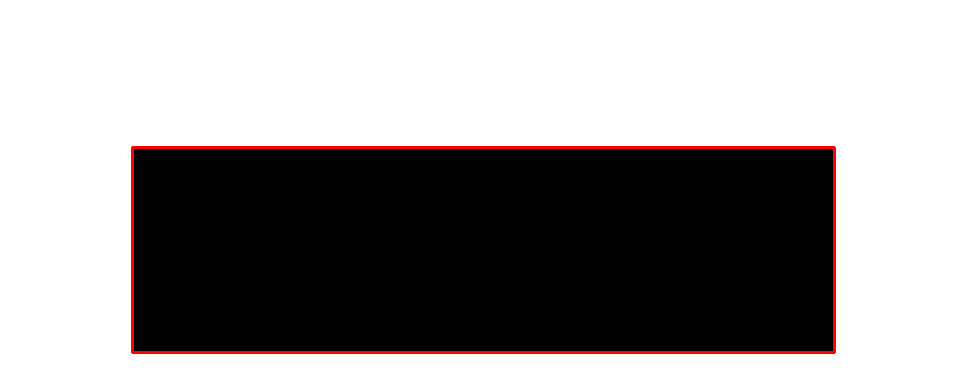

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


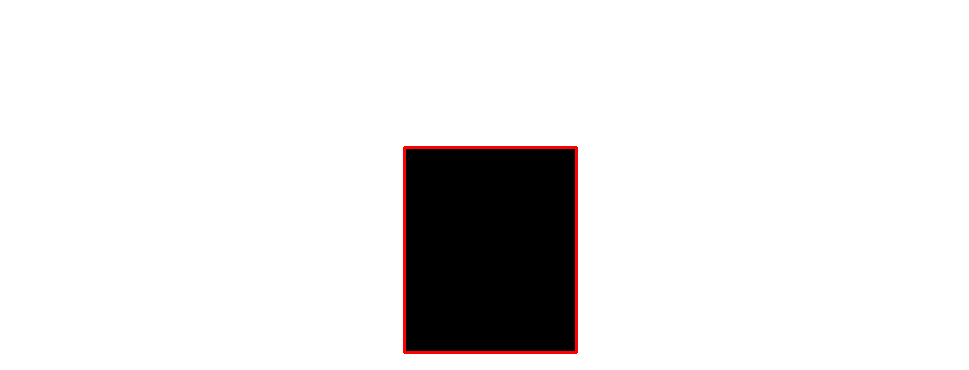

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

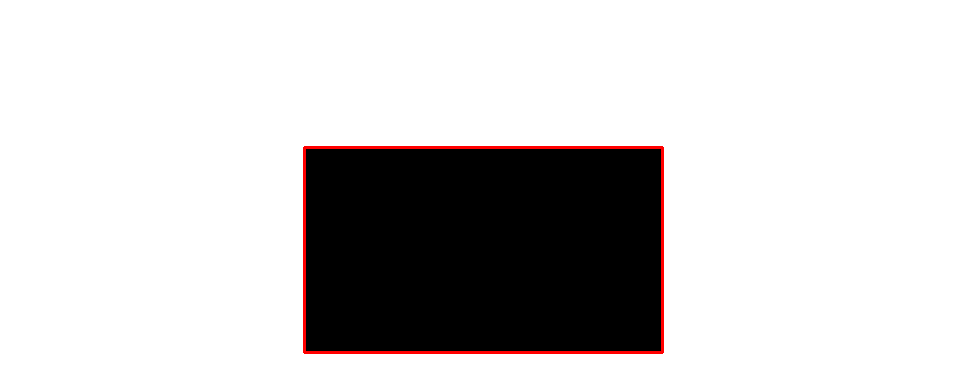

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


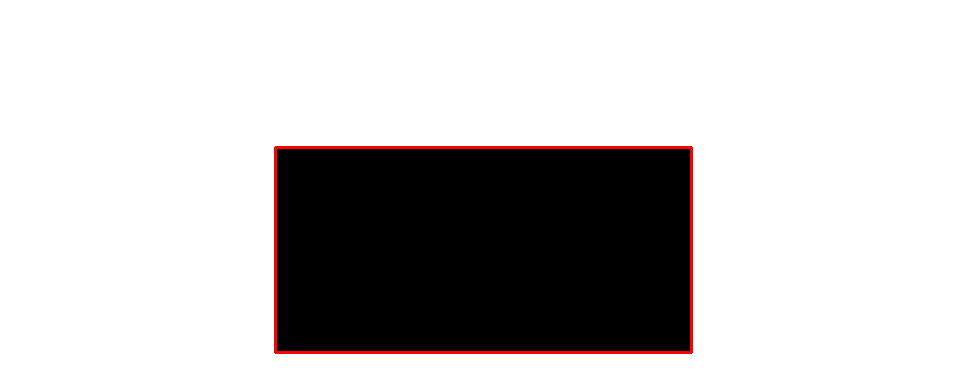

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


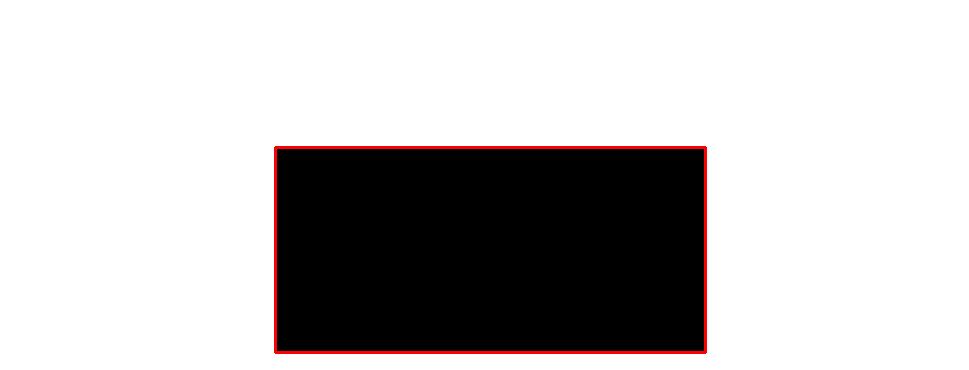

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


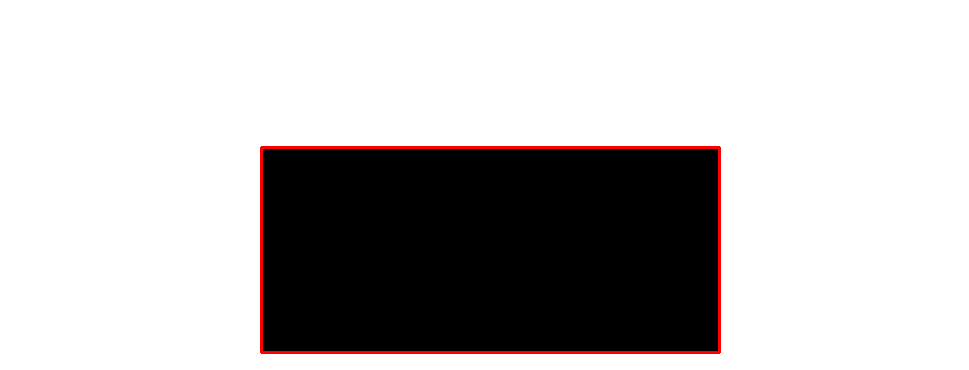

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


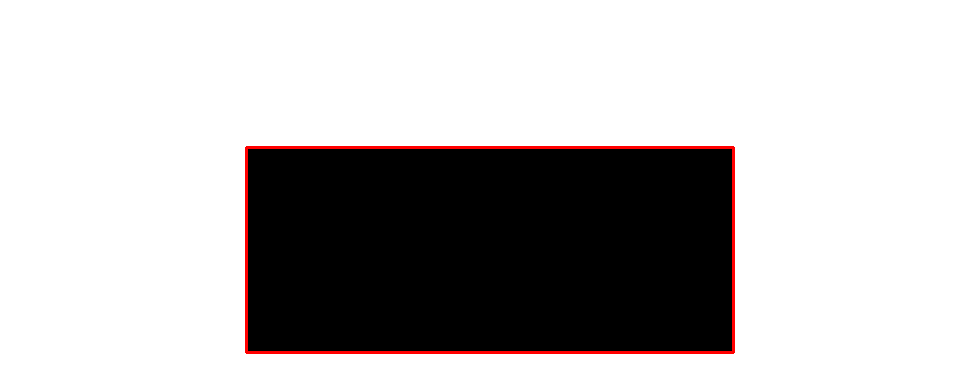

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


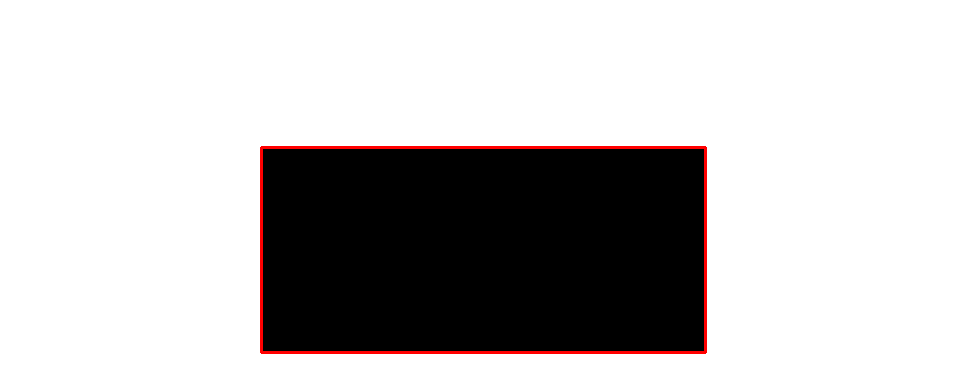

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


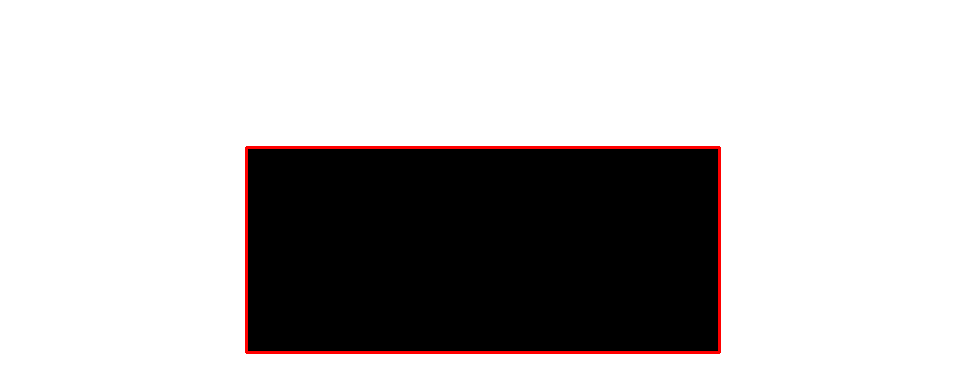

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


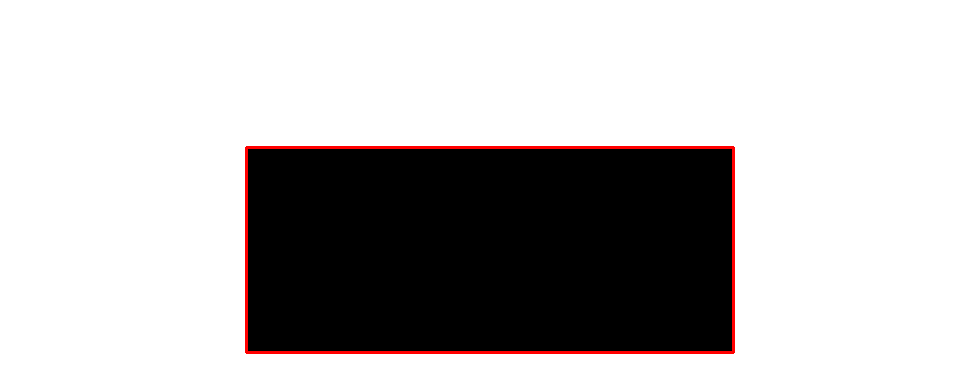

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


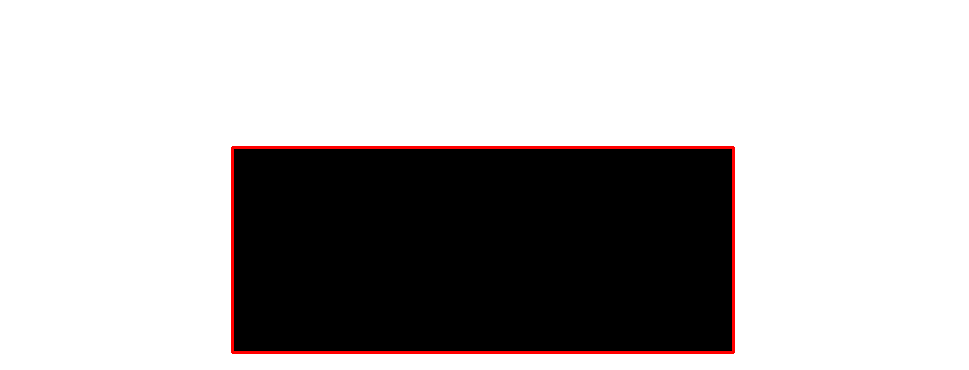

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


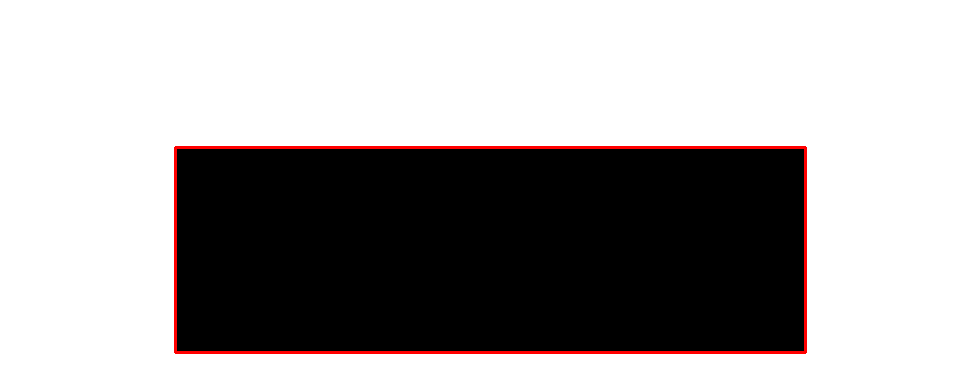

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


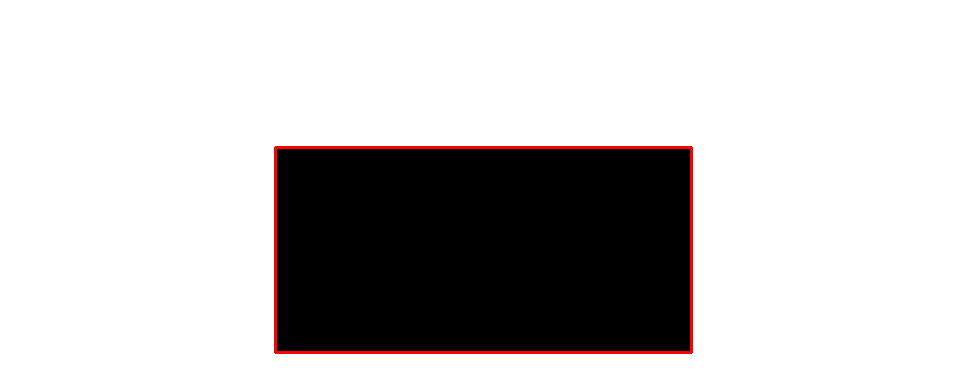

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


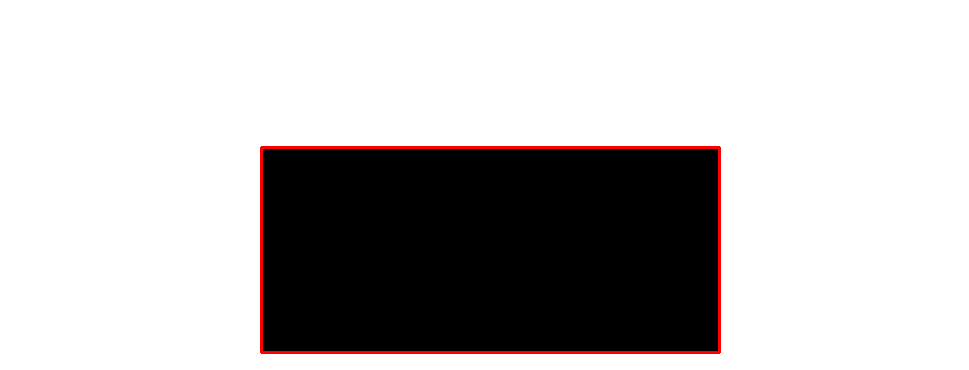

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


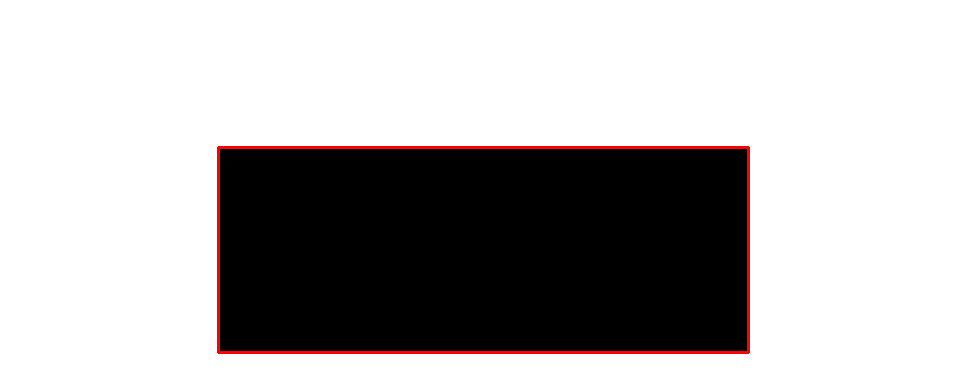

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

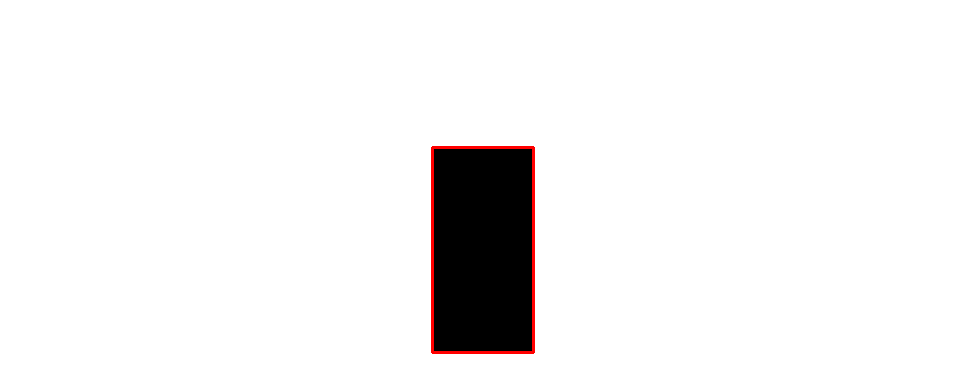

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


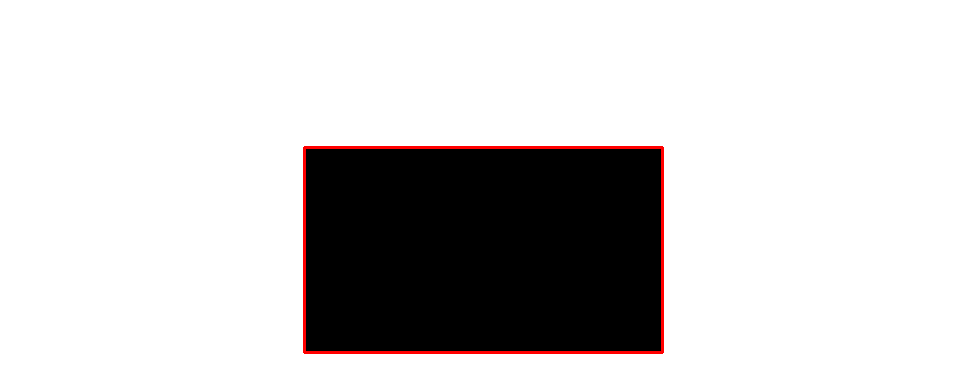

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


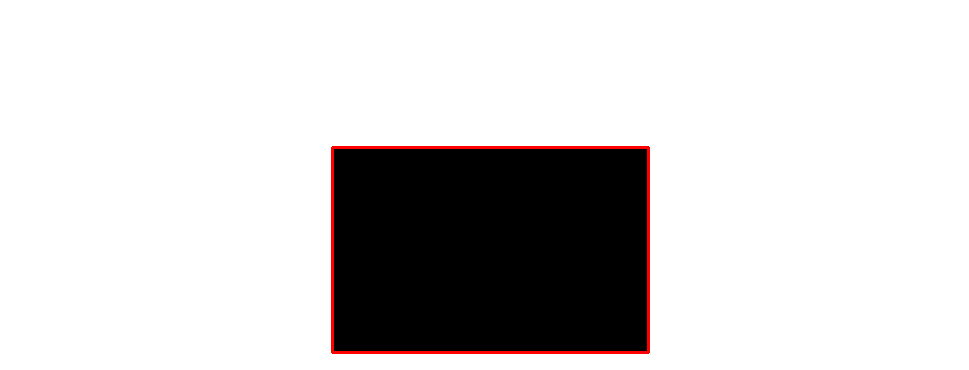

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


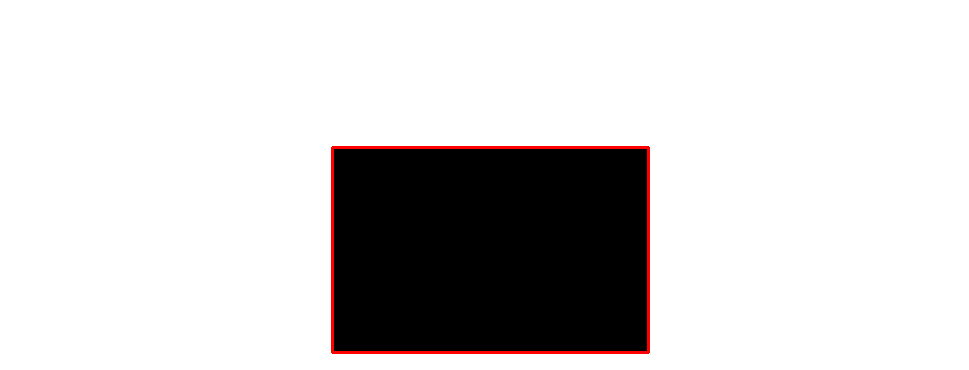

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


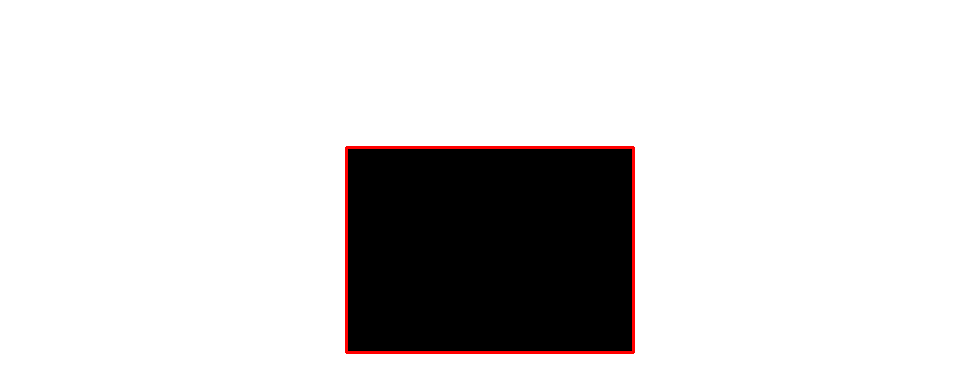

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


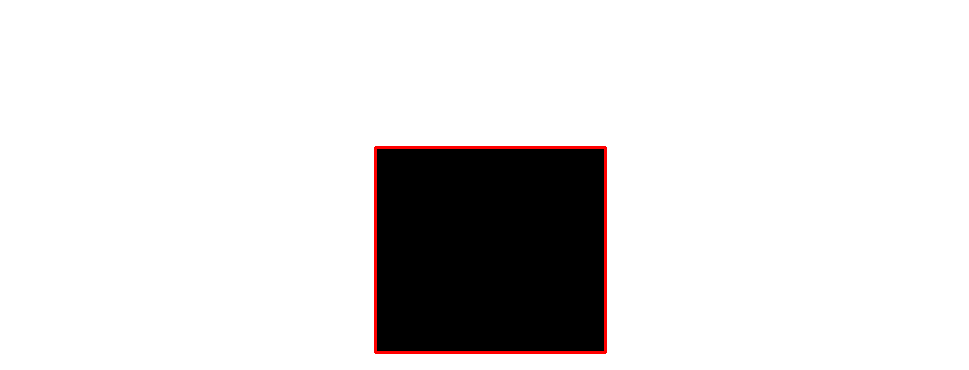

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


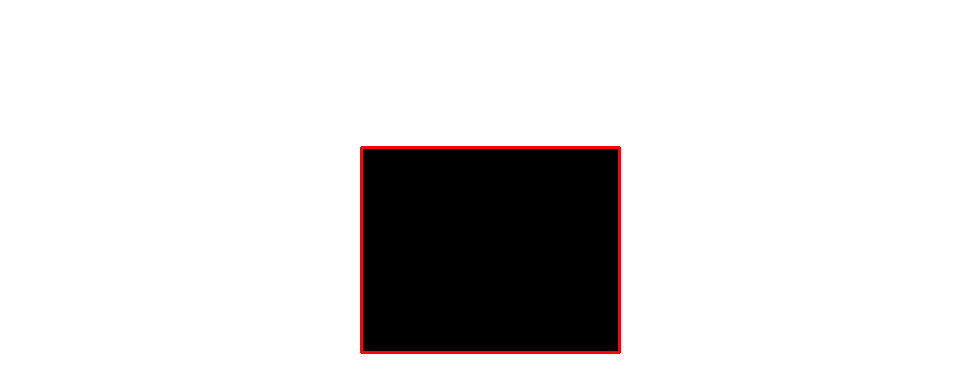

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


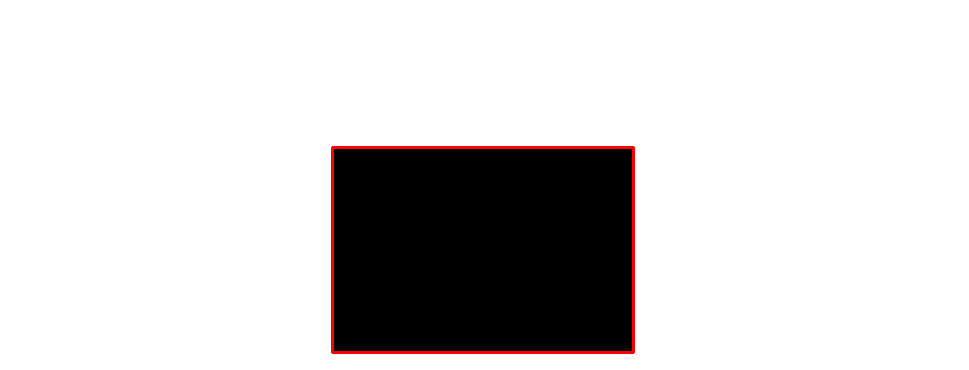

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


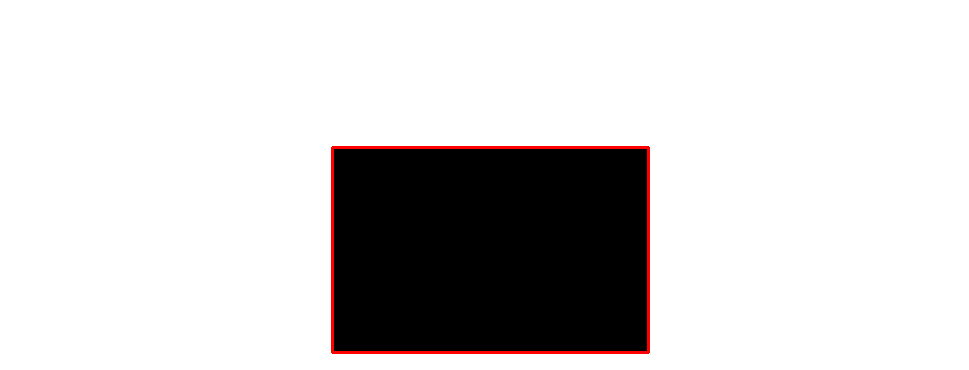

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


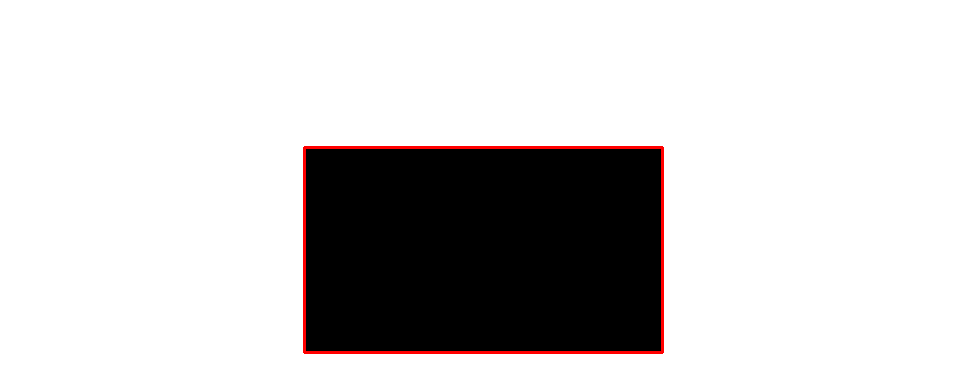

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

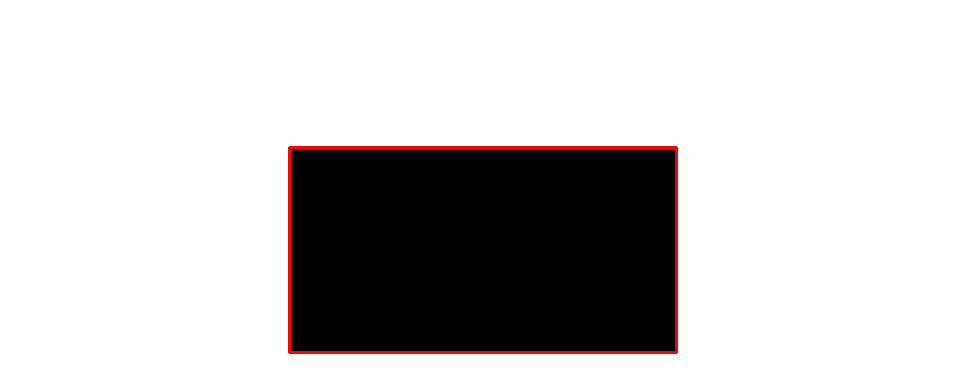

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


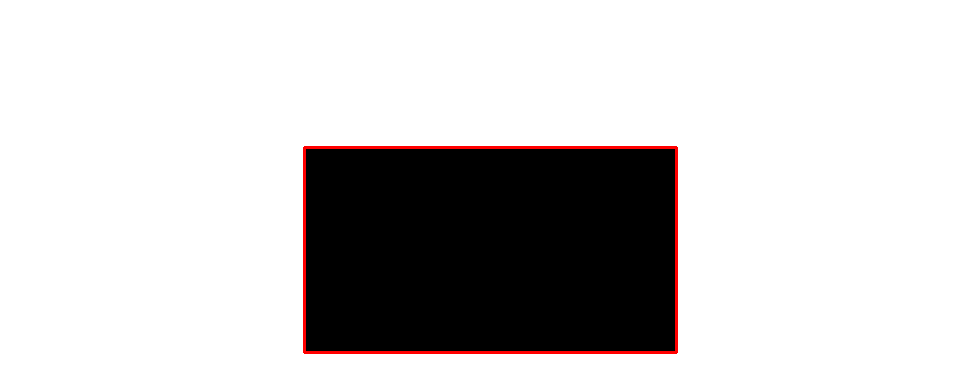

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


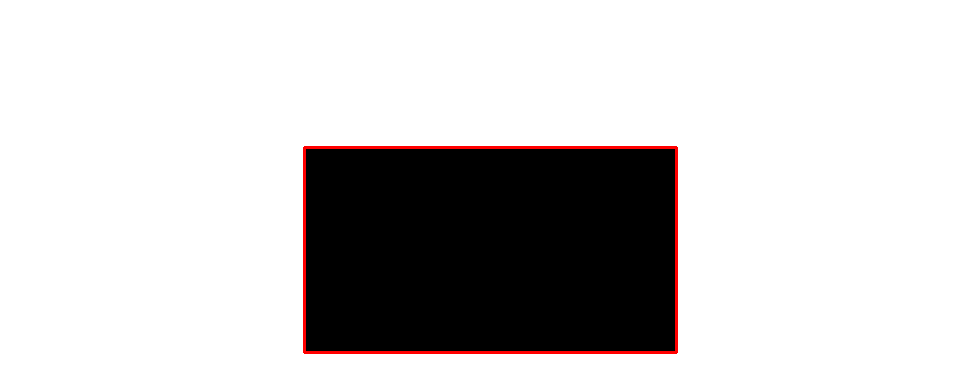

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


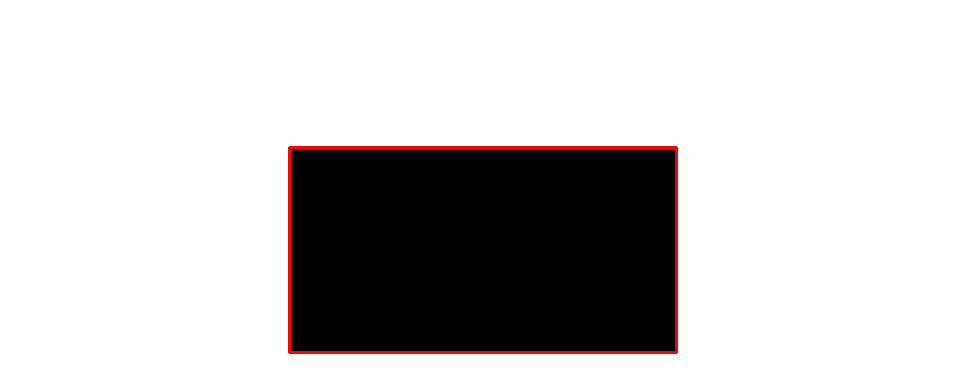

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


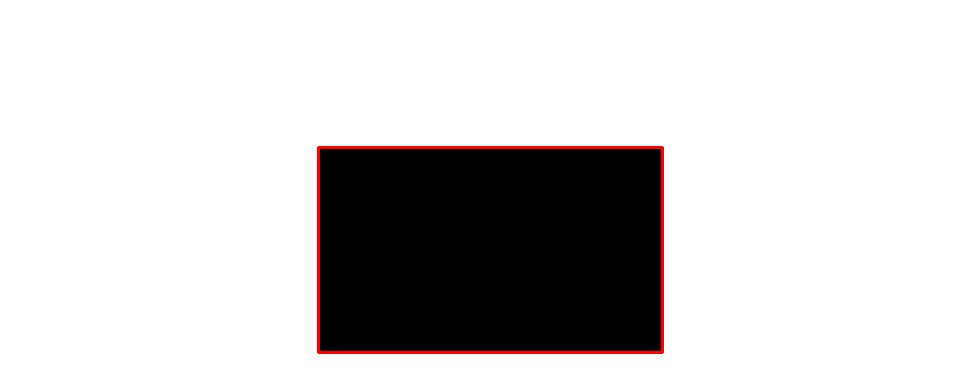

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


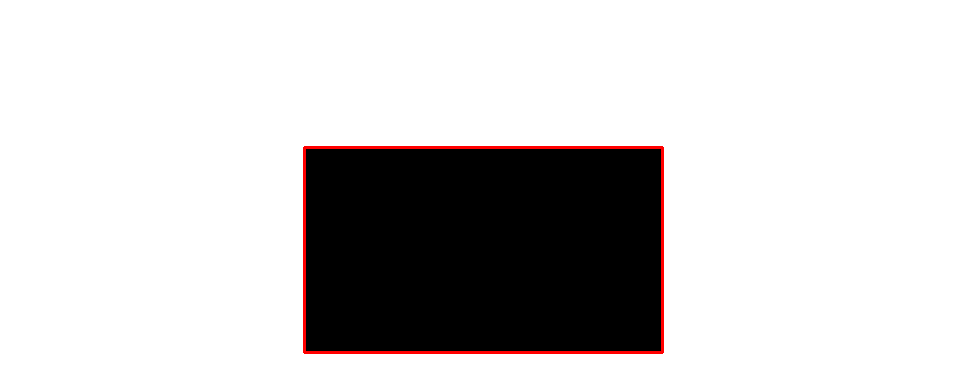

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


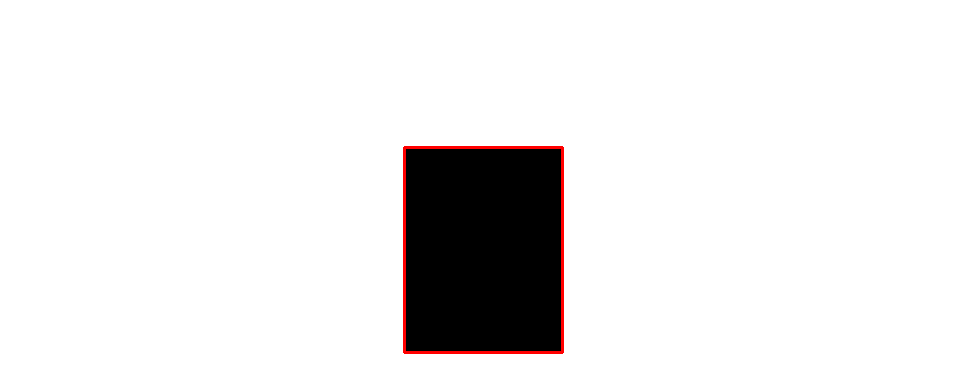

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

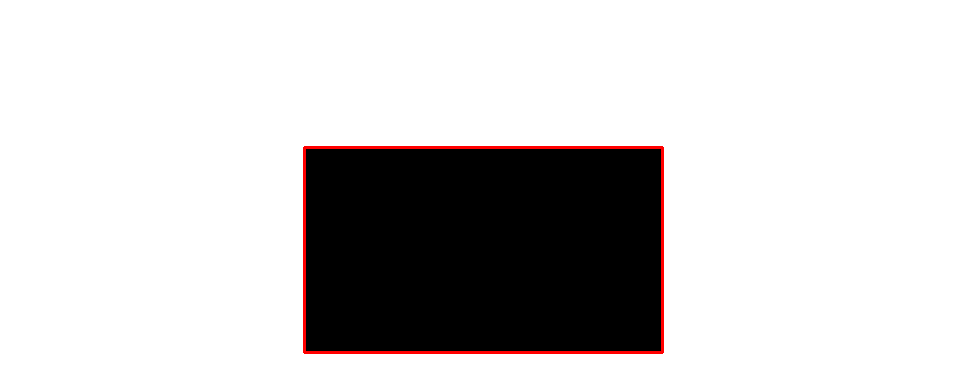

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


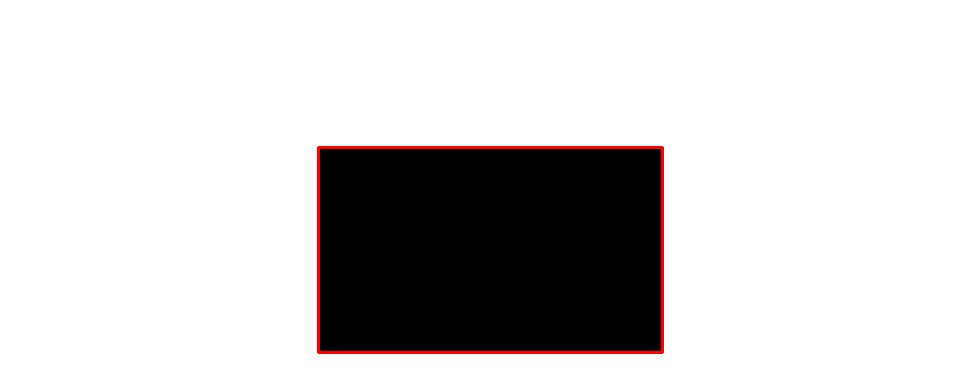

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

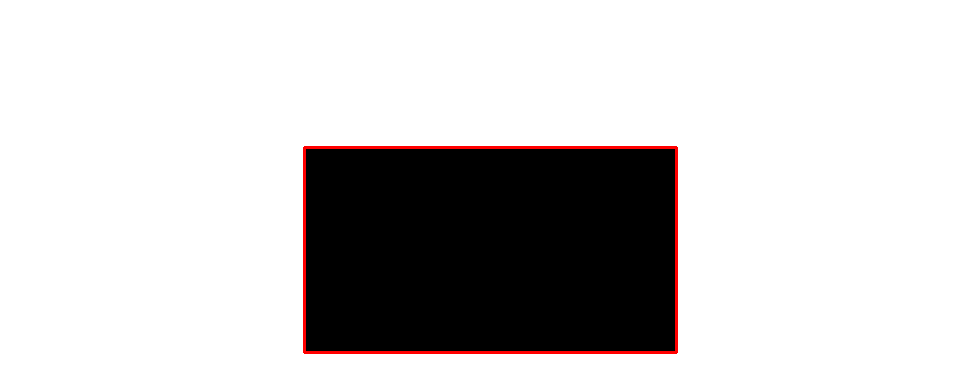

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


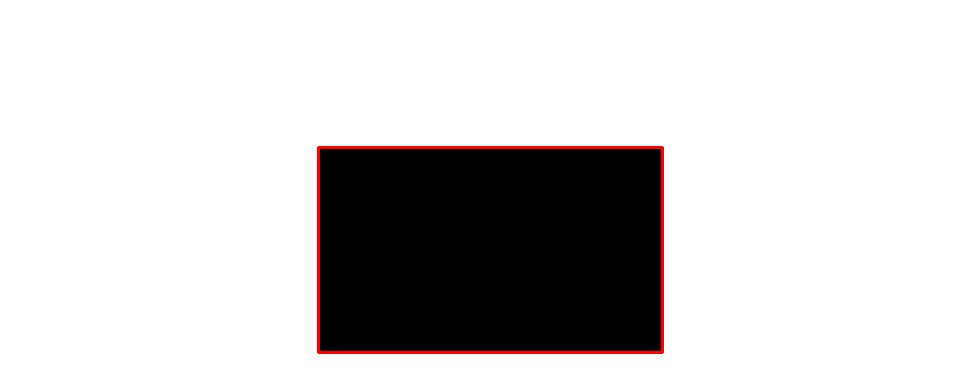

No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


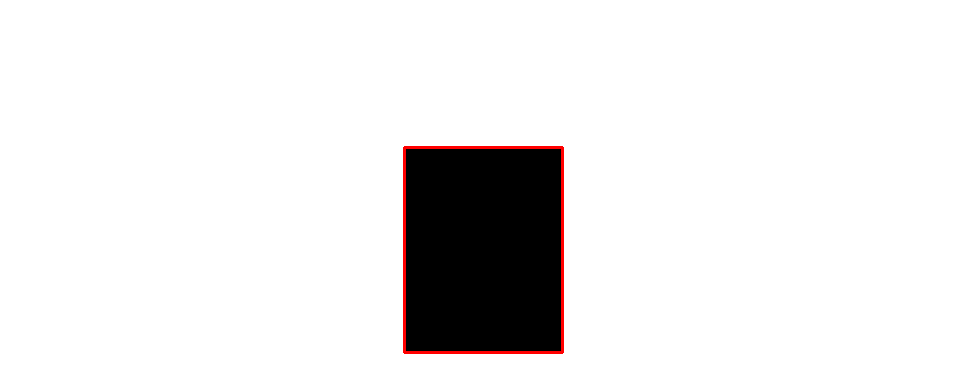

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

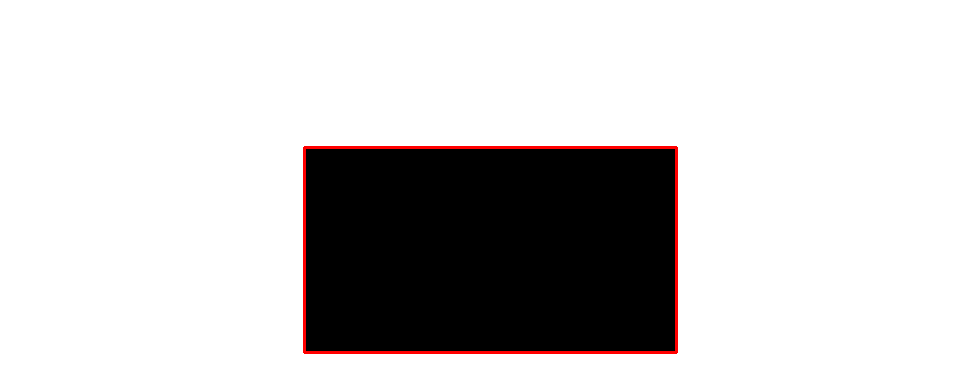

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


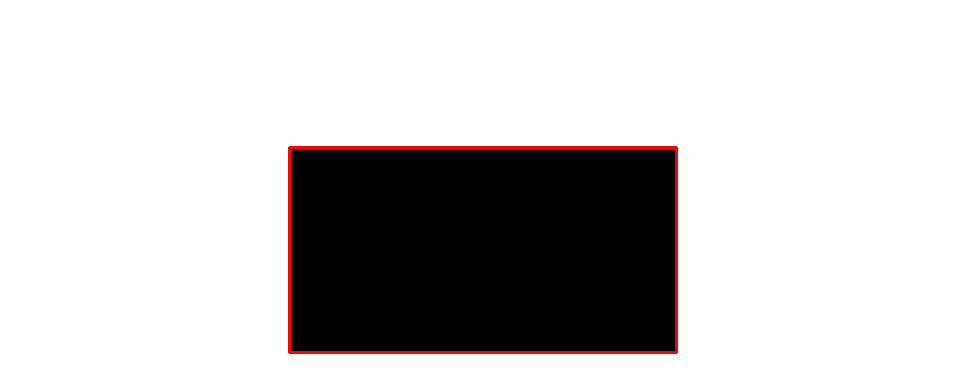

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

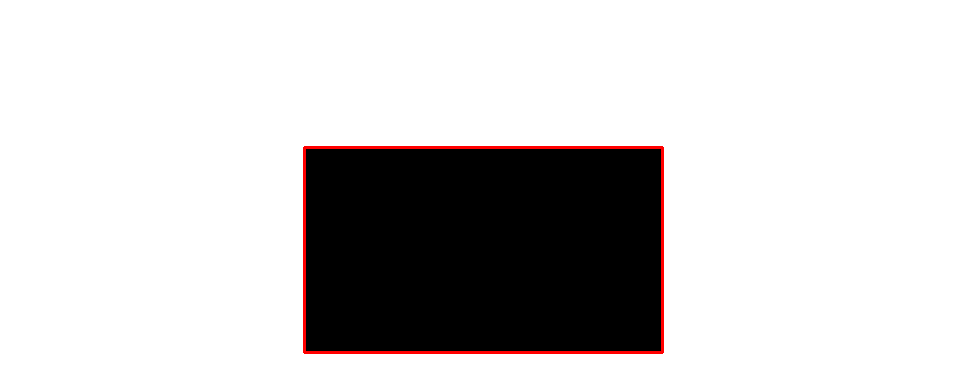

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


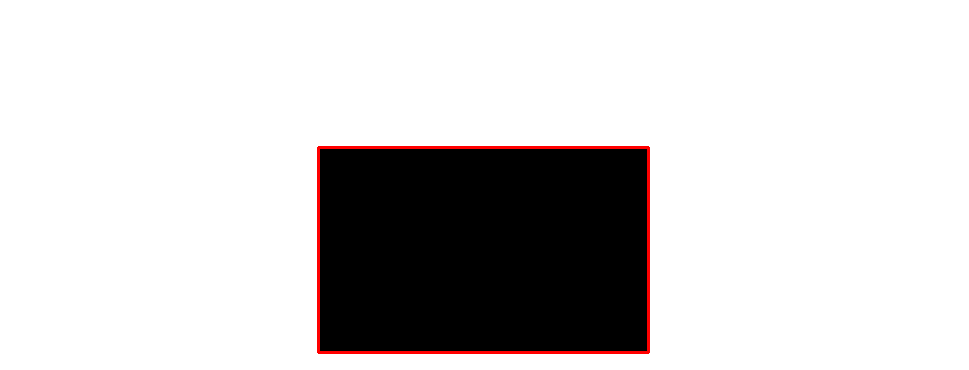

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


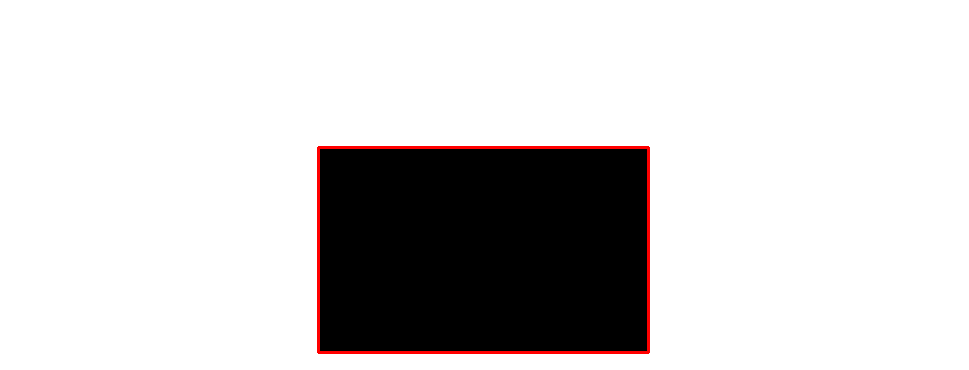

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


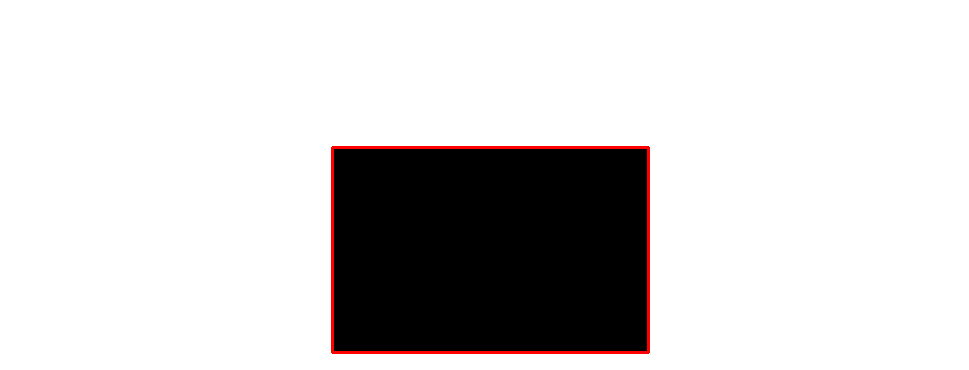

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


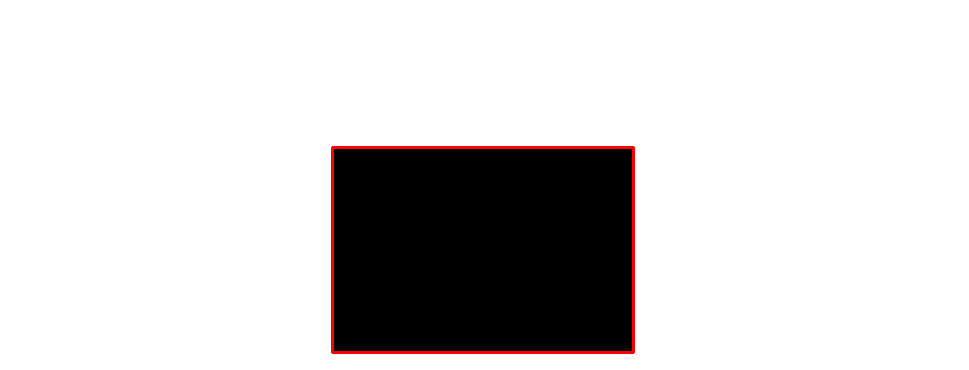

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 418 147 562 352
Rectangle coordinates: 418 147 562 352


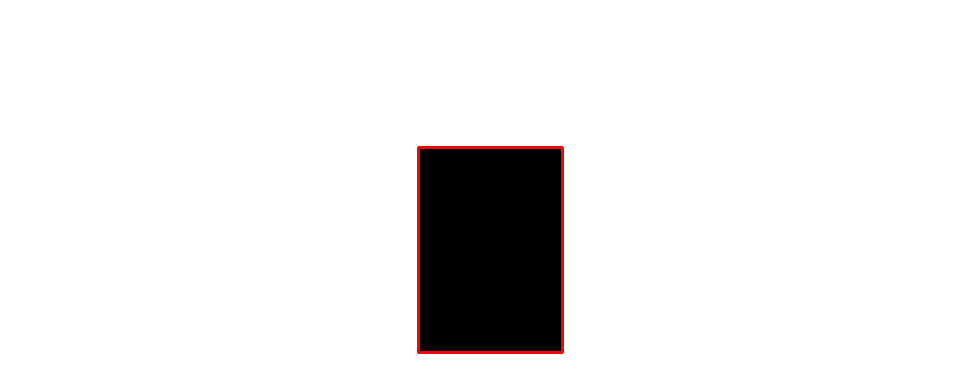

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


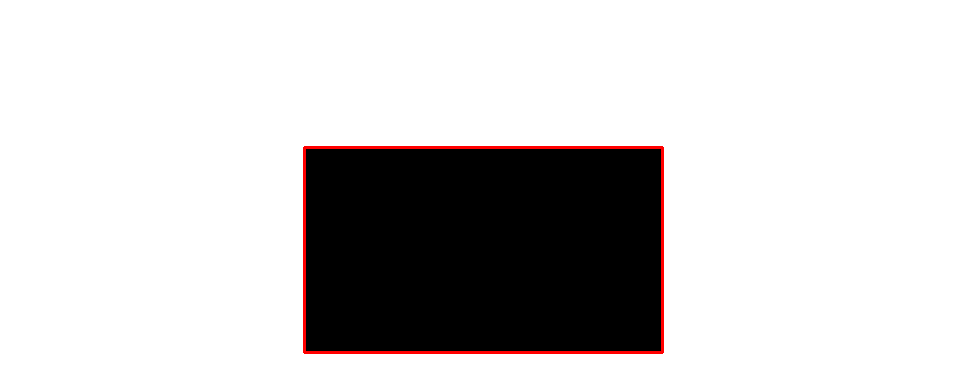

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


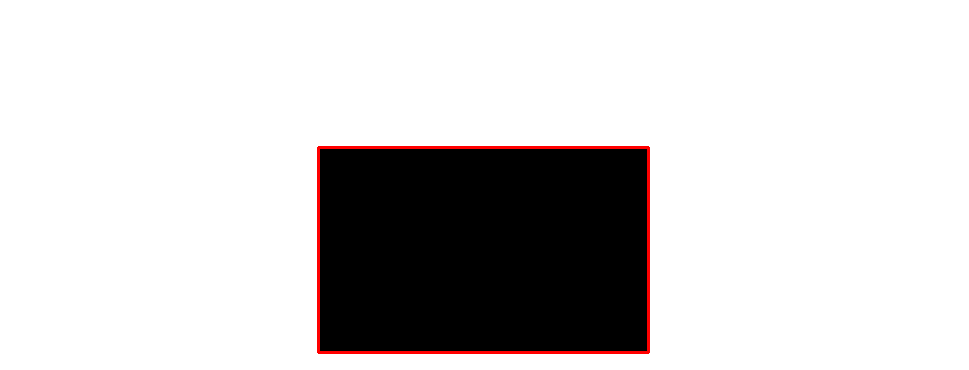

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


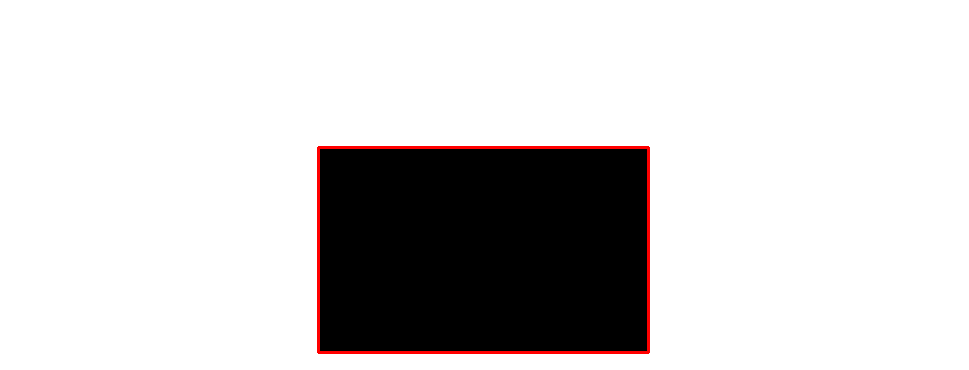

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


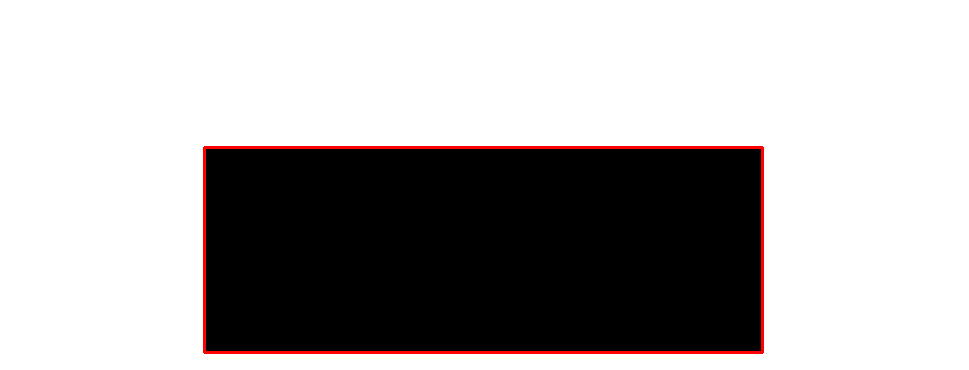

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


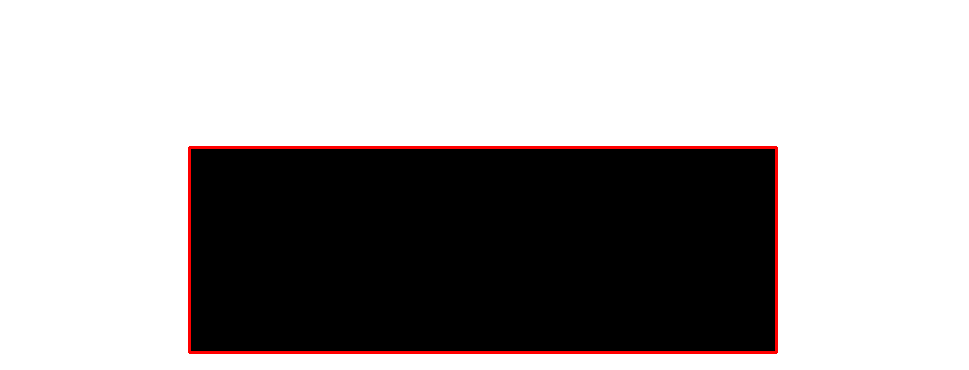

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


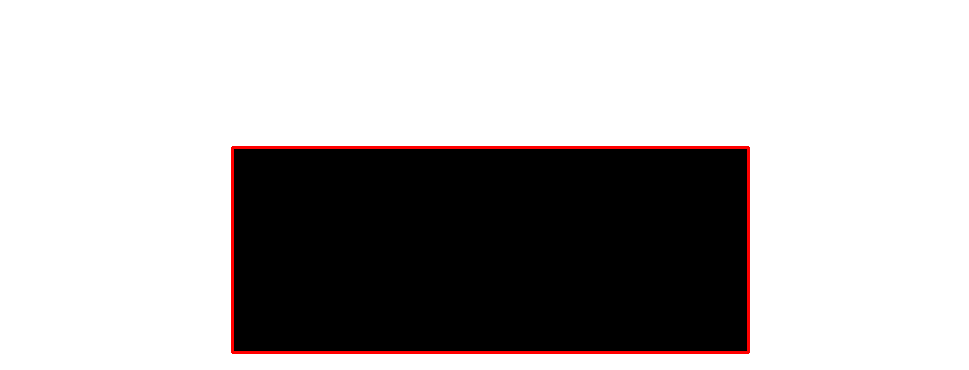

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

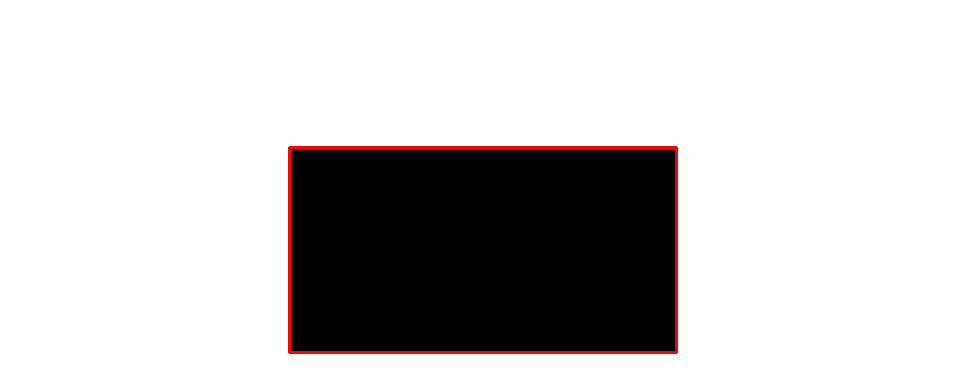

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


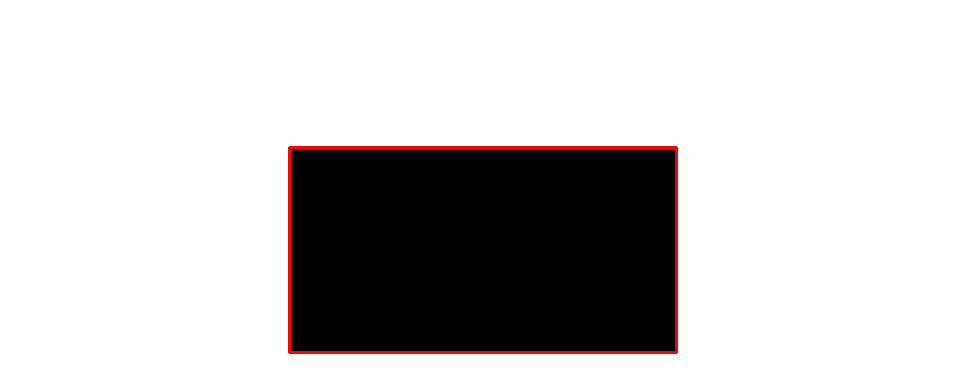

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


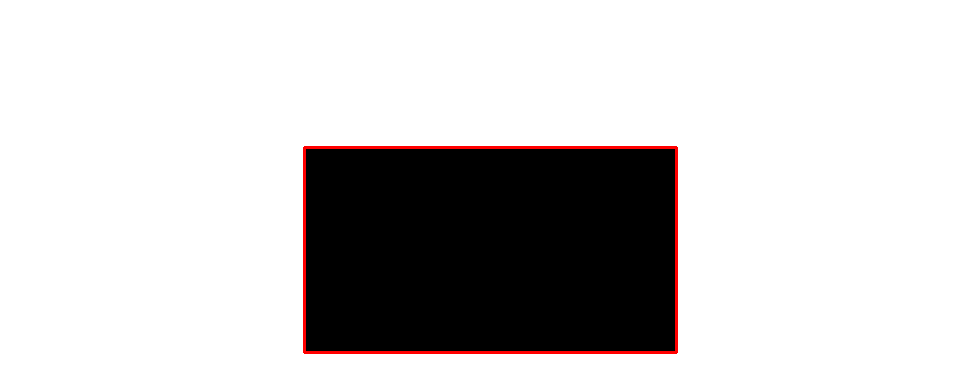

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


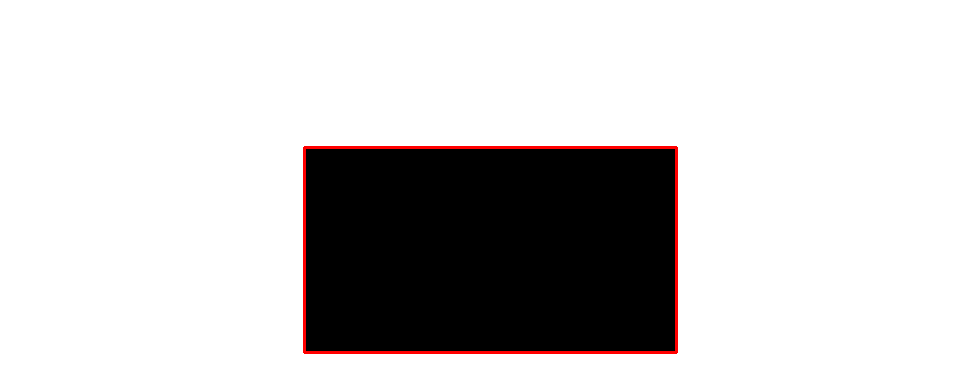

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


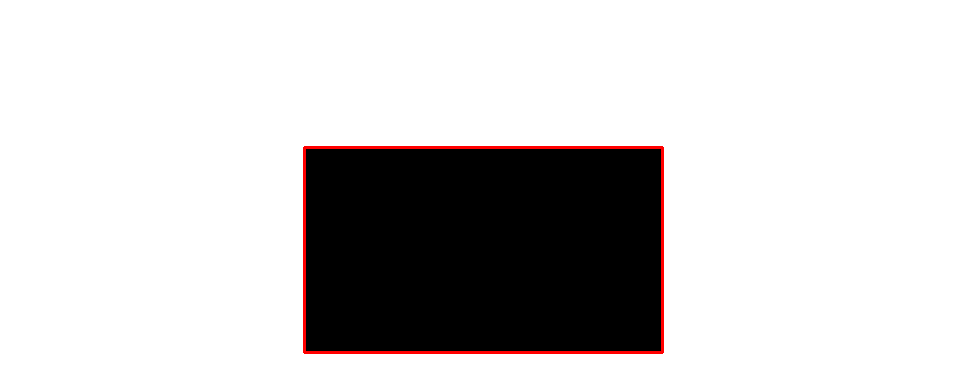

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


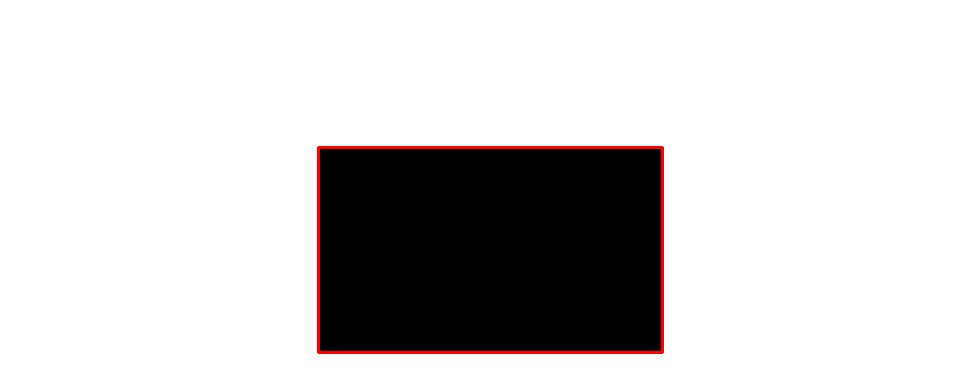

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


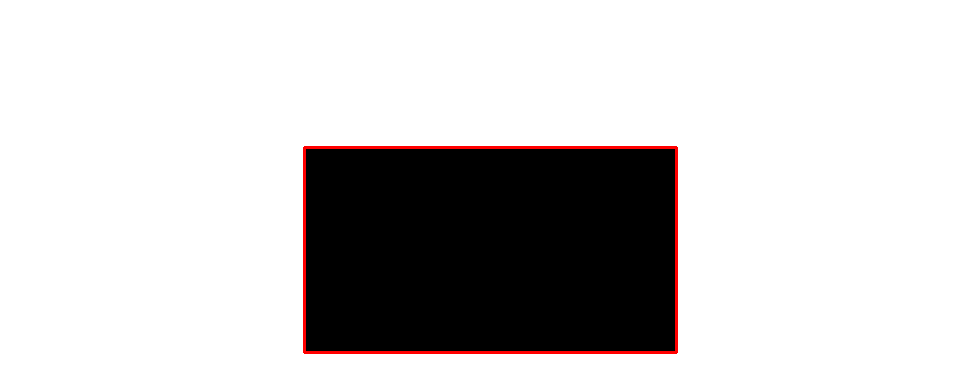

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


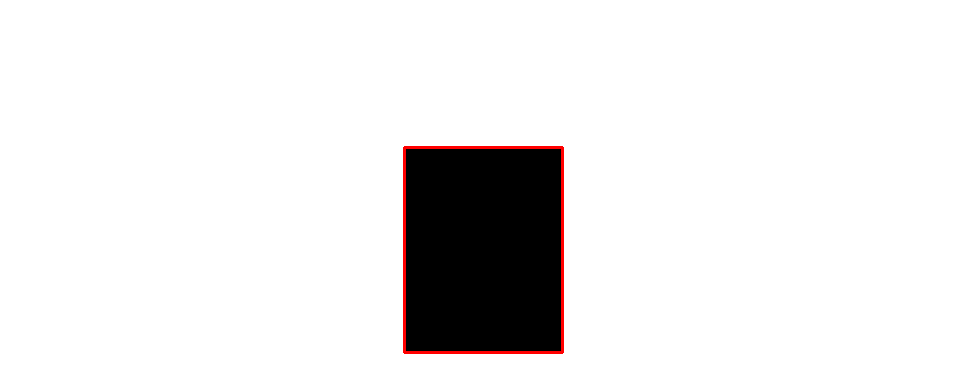

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

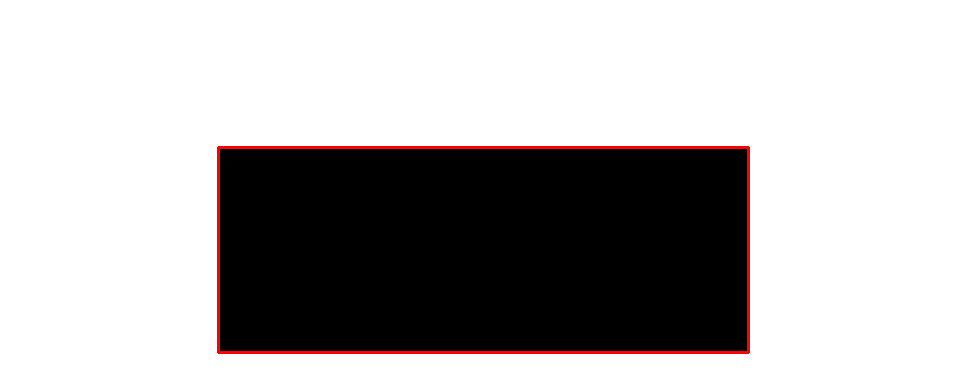

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


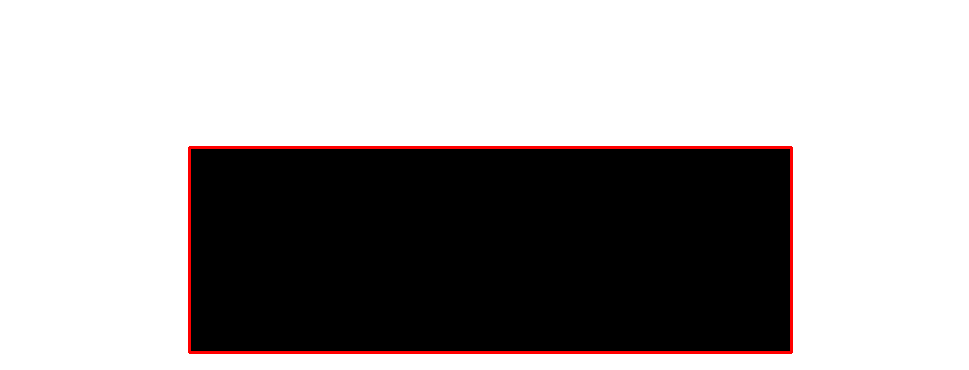

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


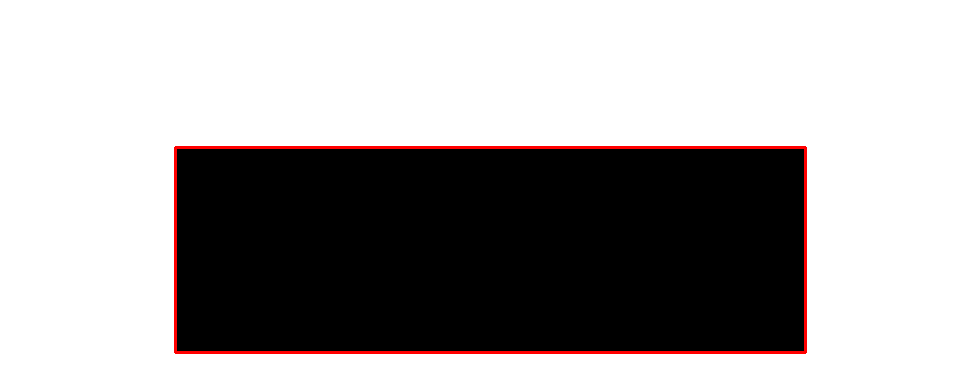

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


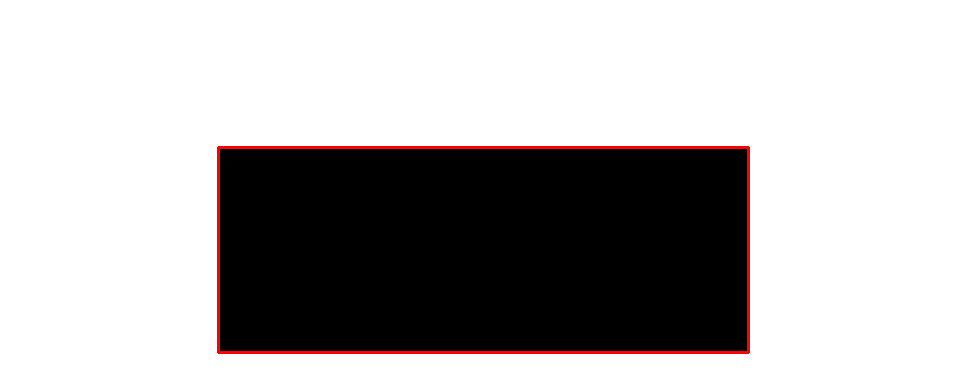

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


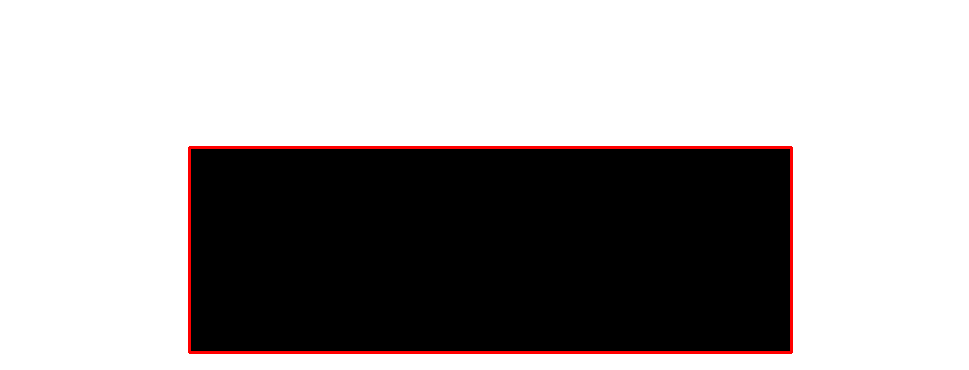

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


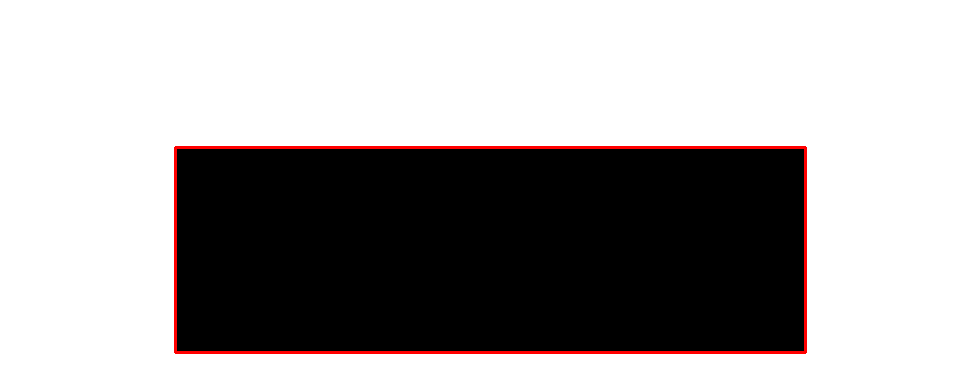

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


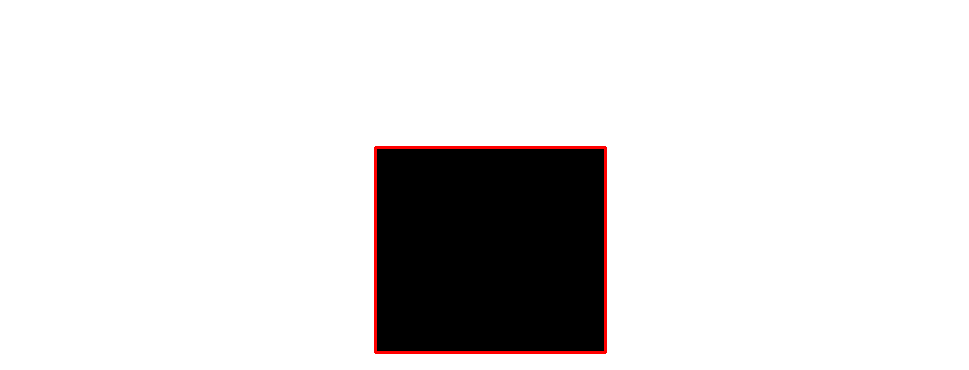

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


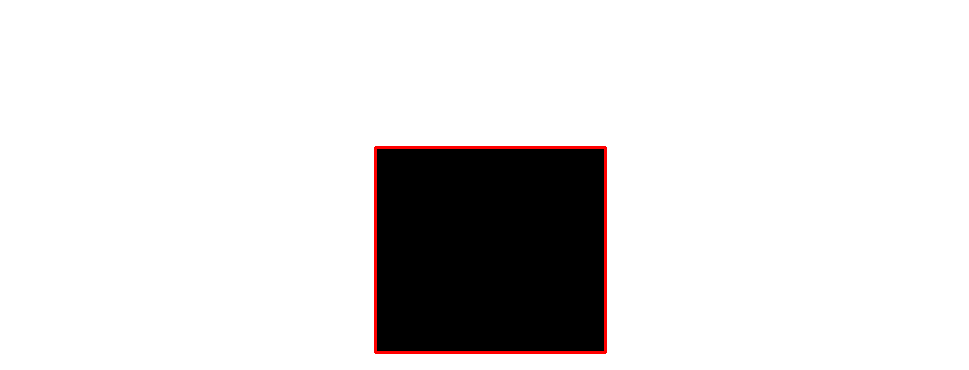

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


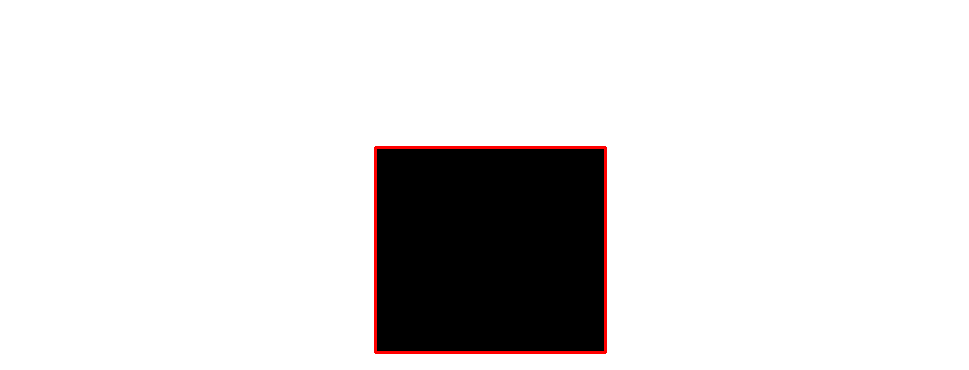

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


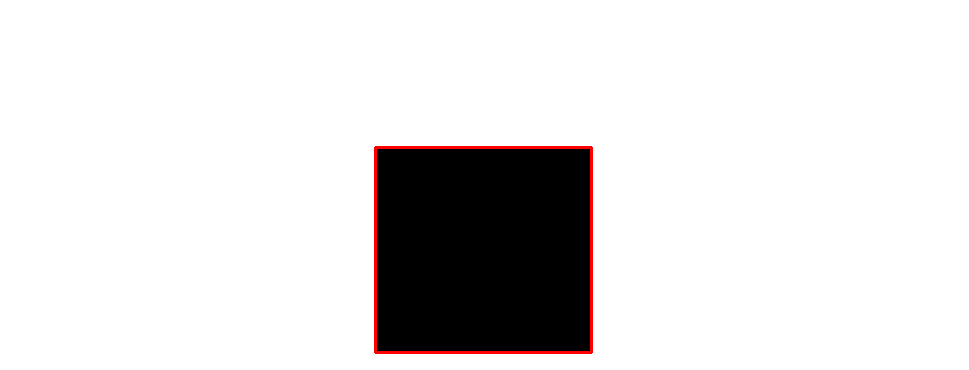

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

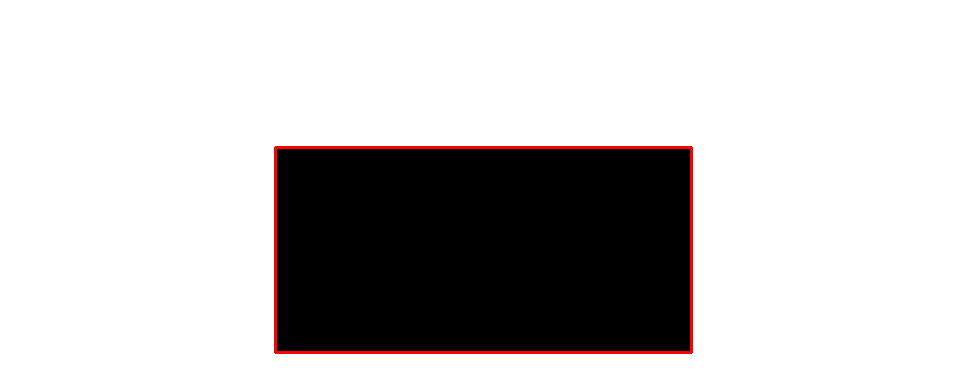

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


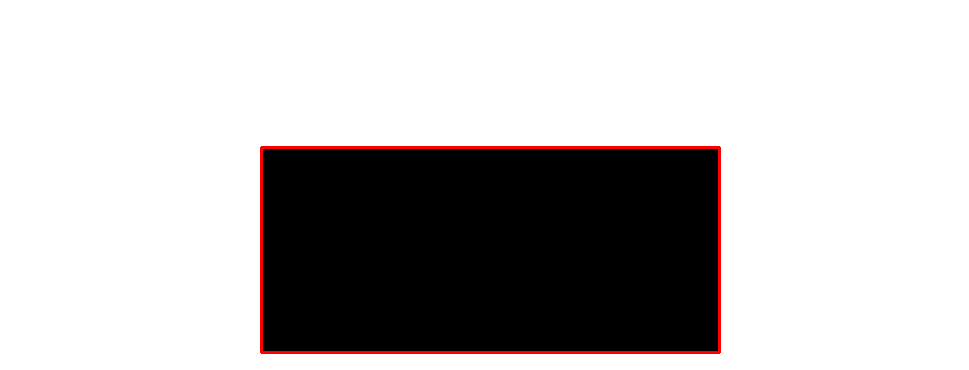

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


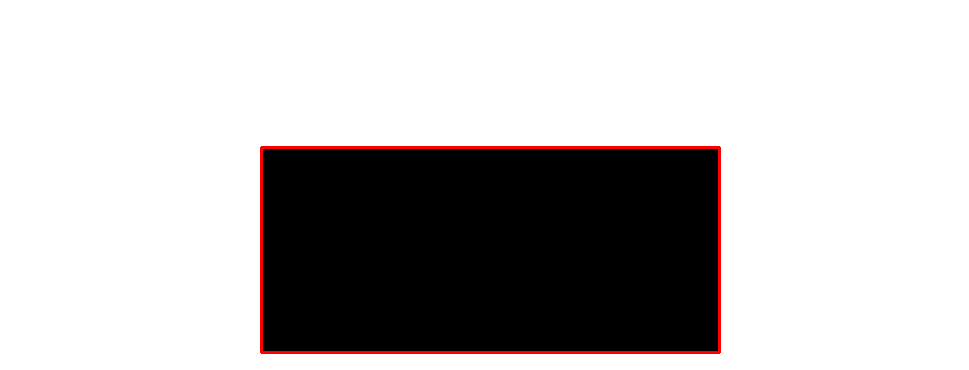

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


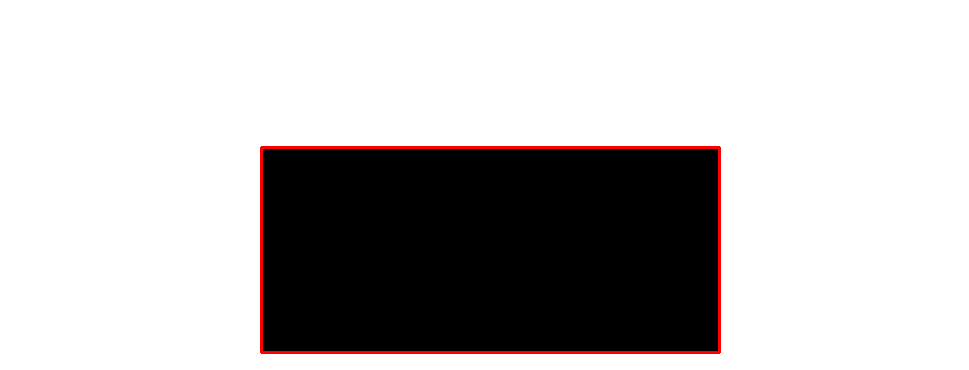

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


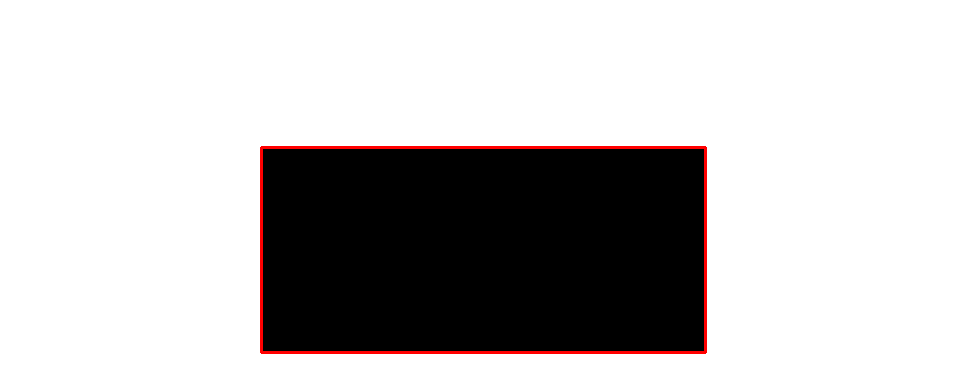

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


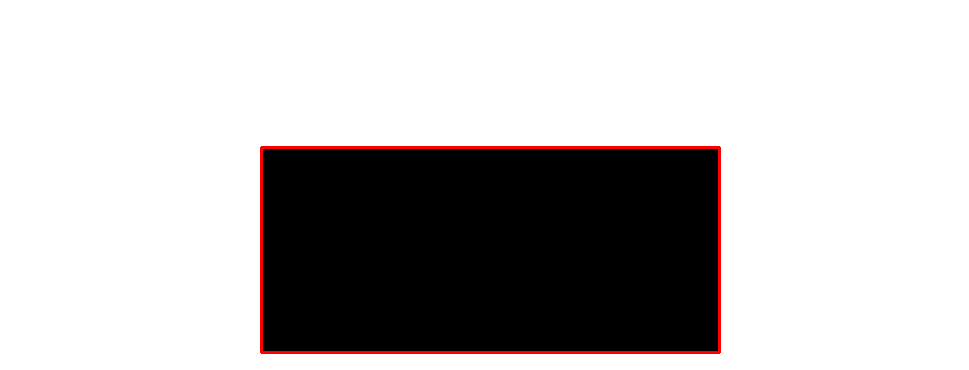

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


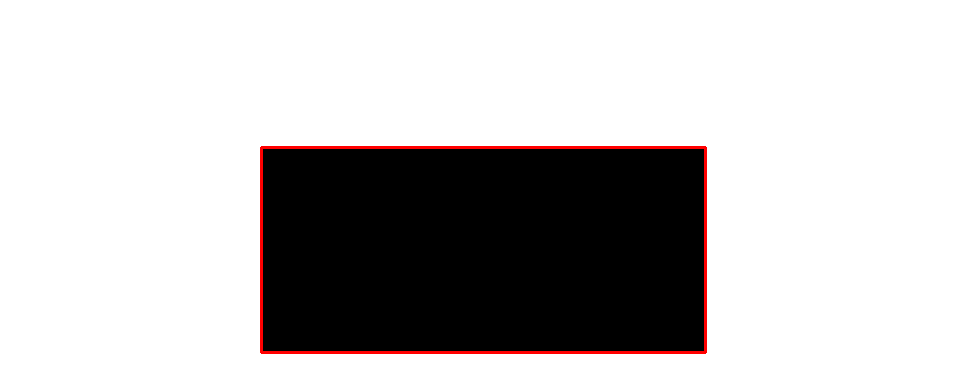

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


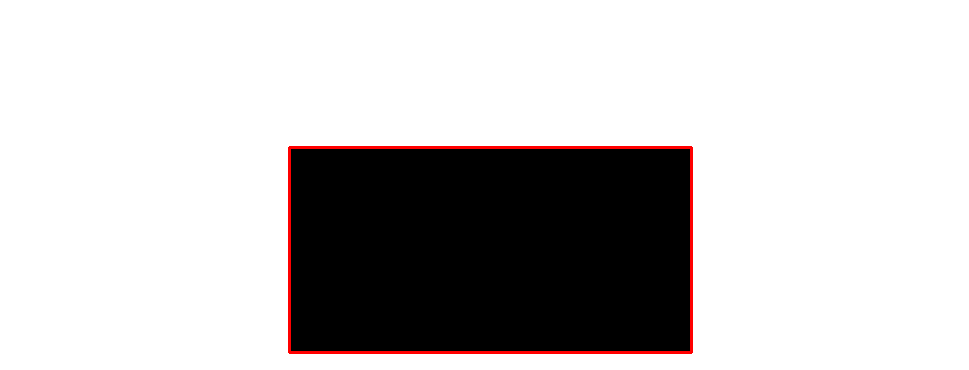

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


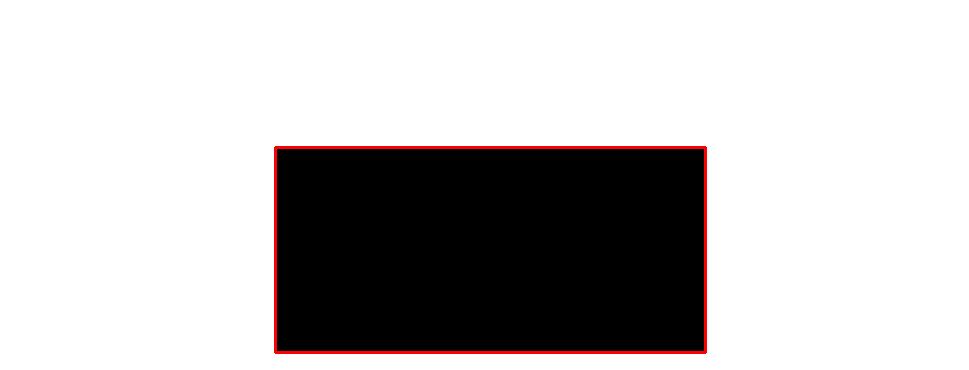

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


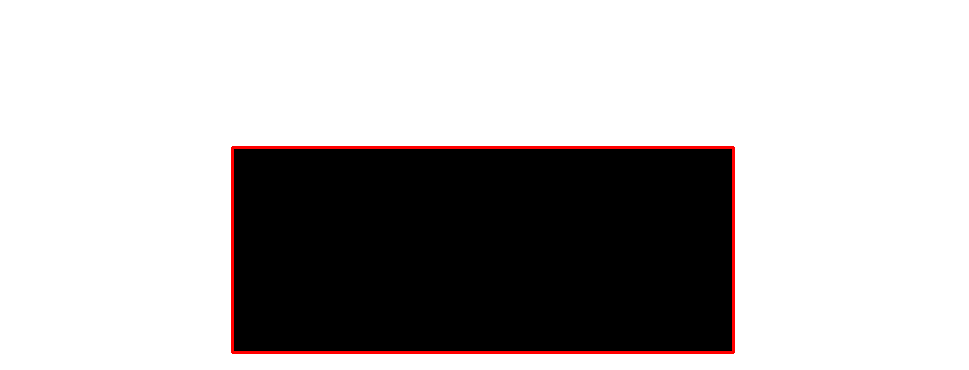

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


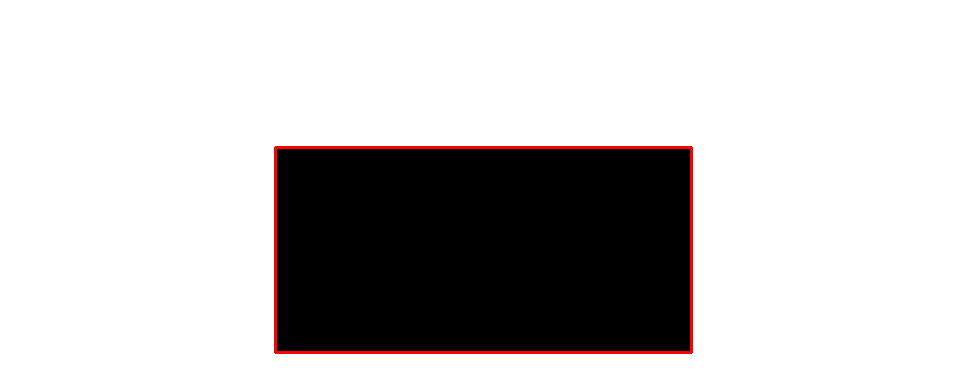

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


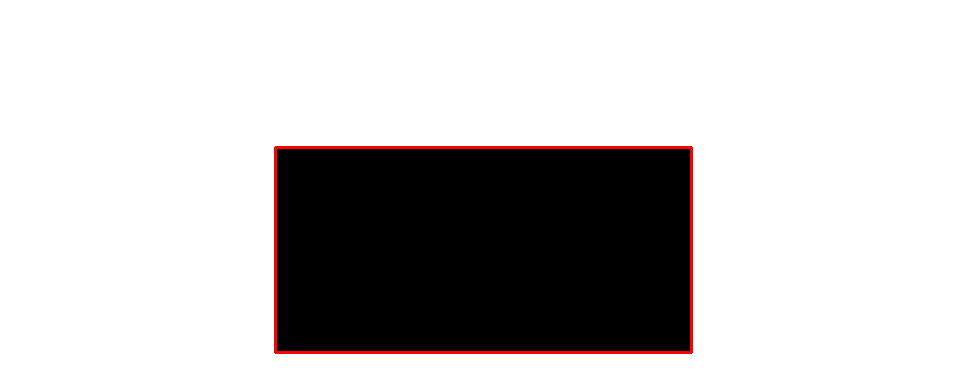

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


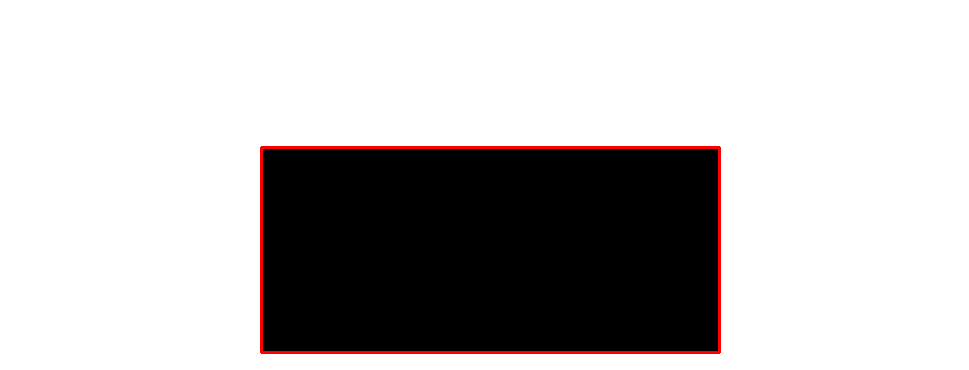

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


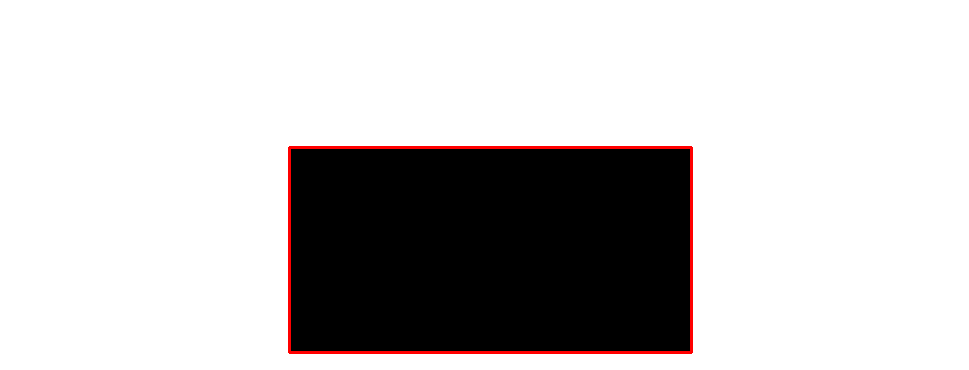

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


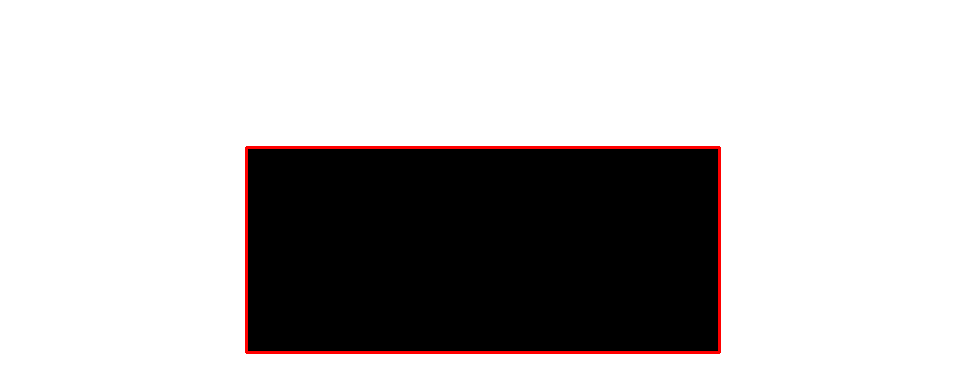

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


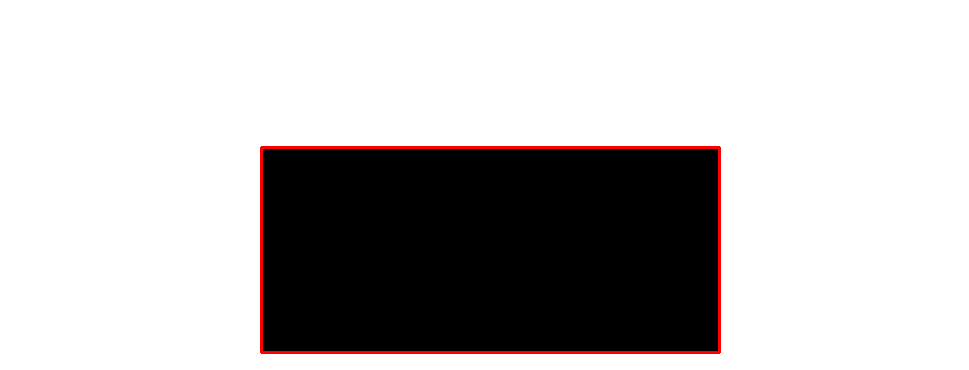

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


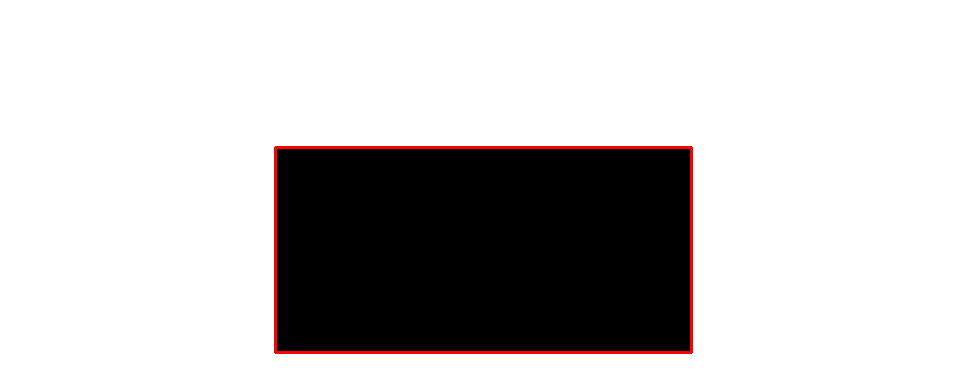

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


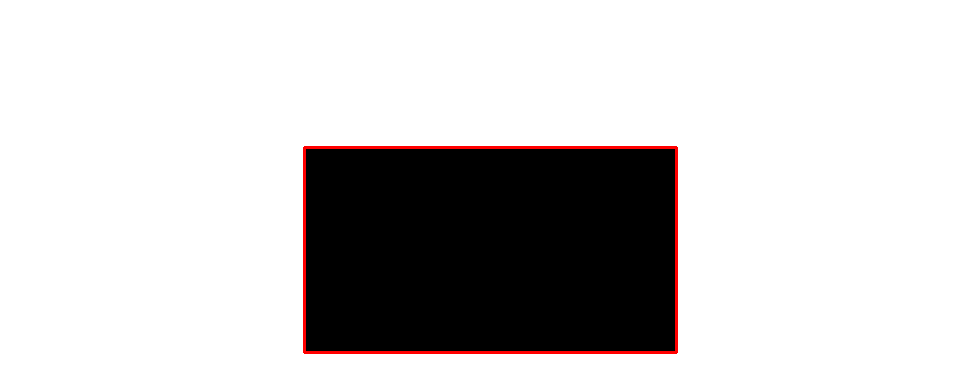

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


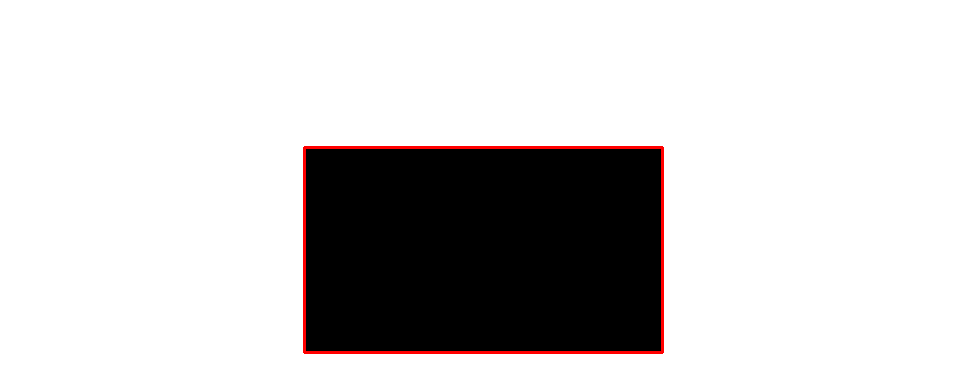

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


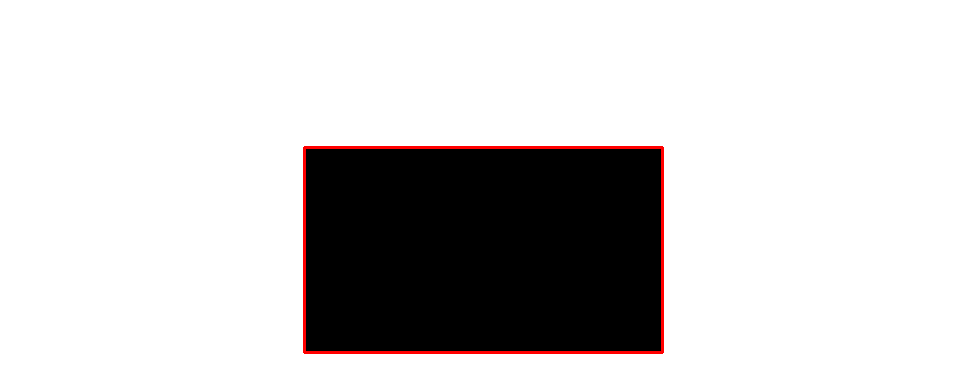

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


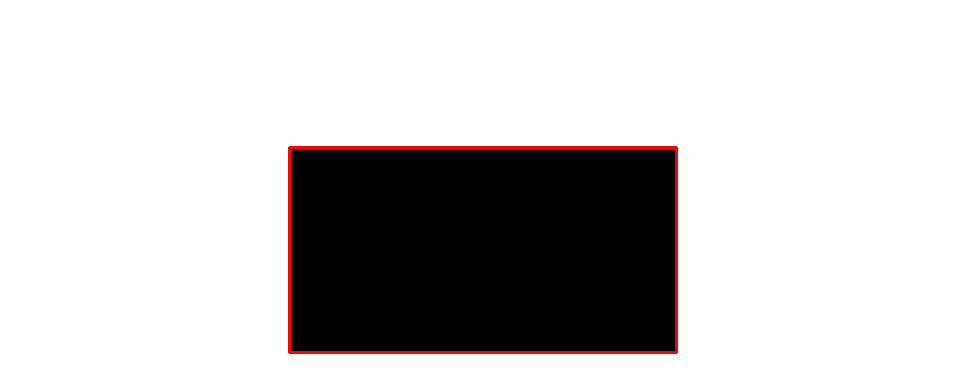

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


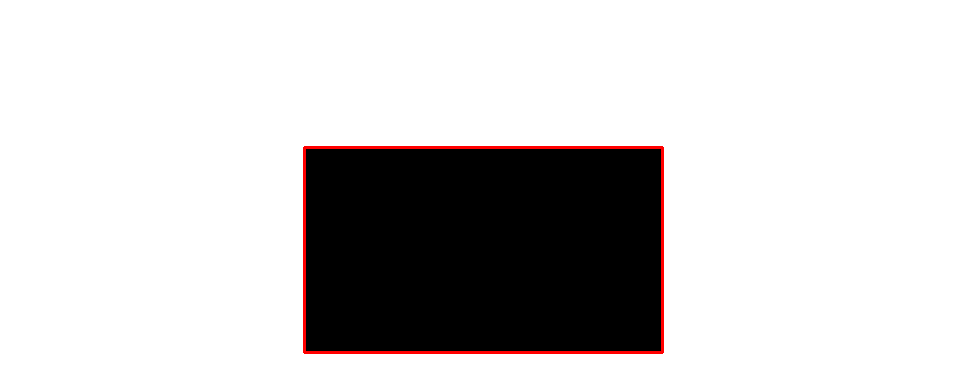

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


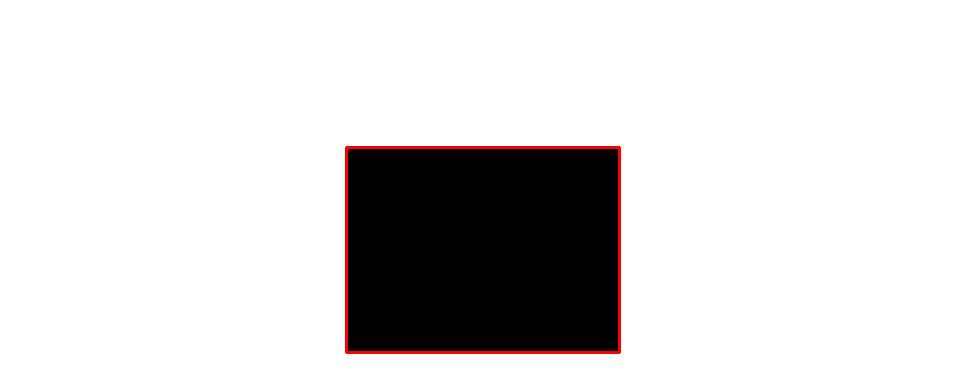

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


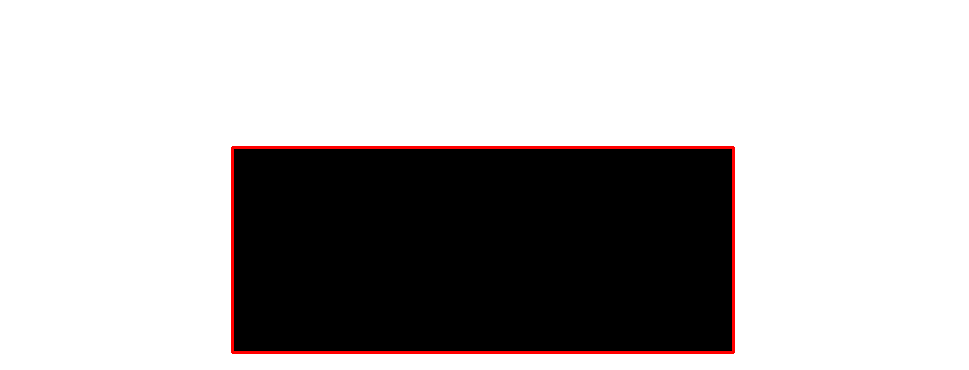

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


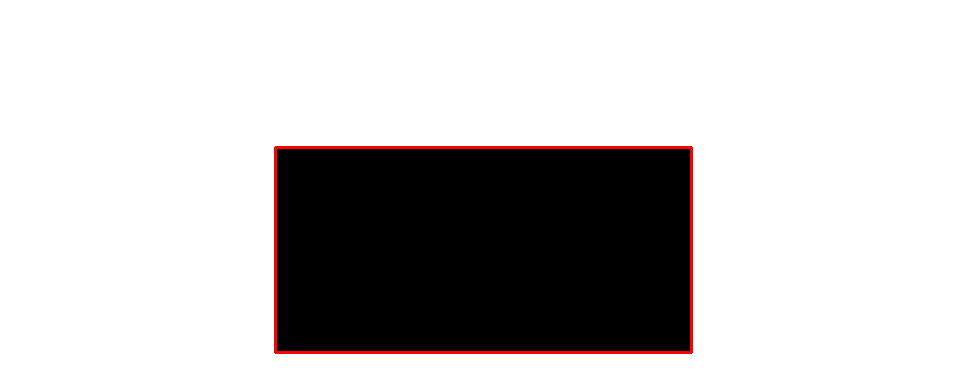

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


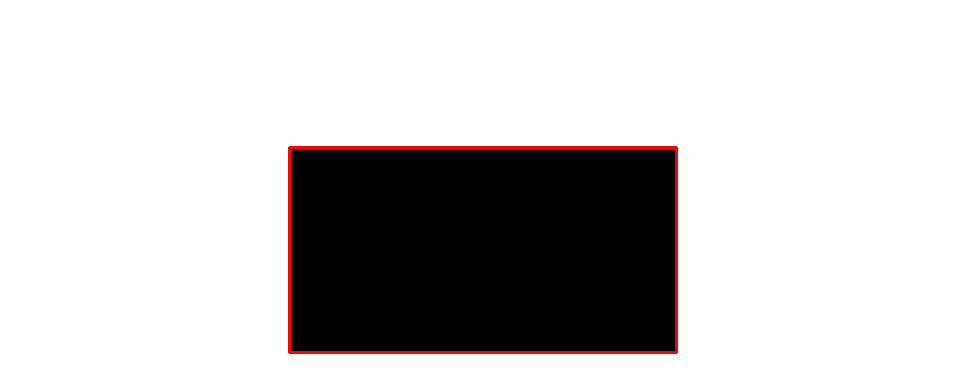

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


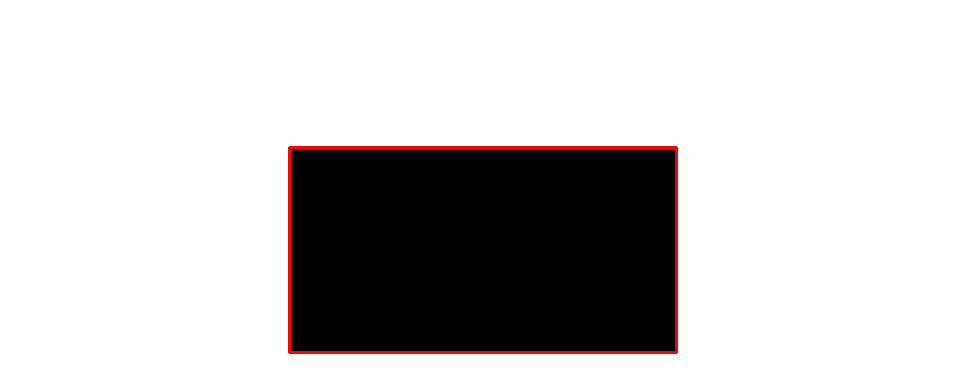

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


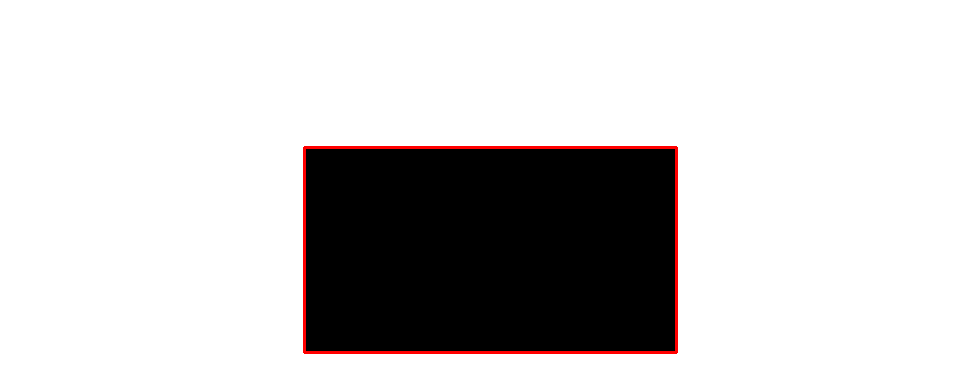

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

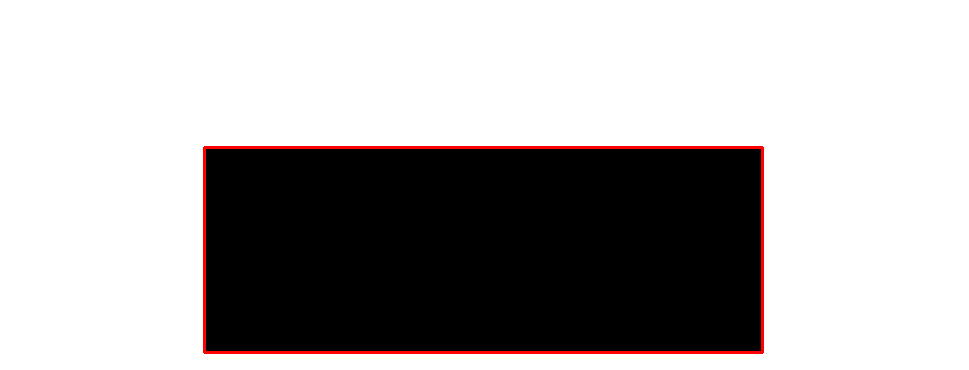

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


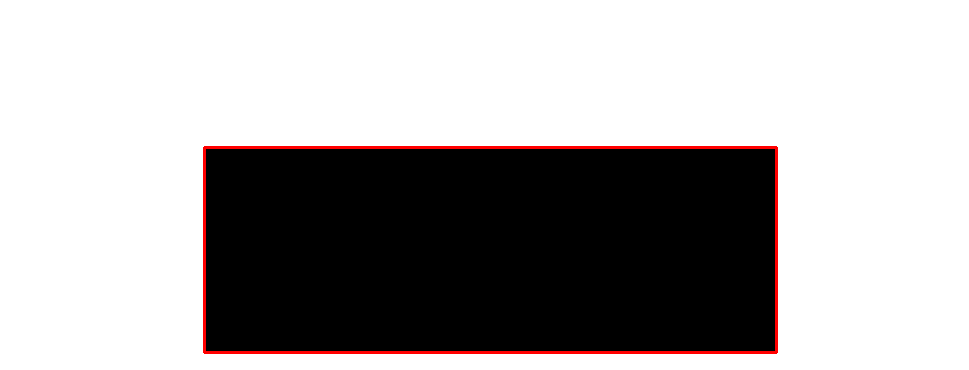

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


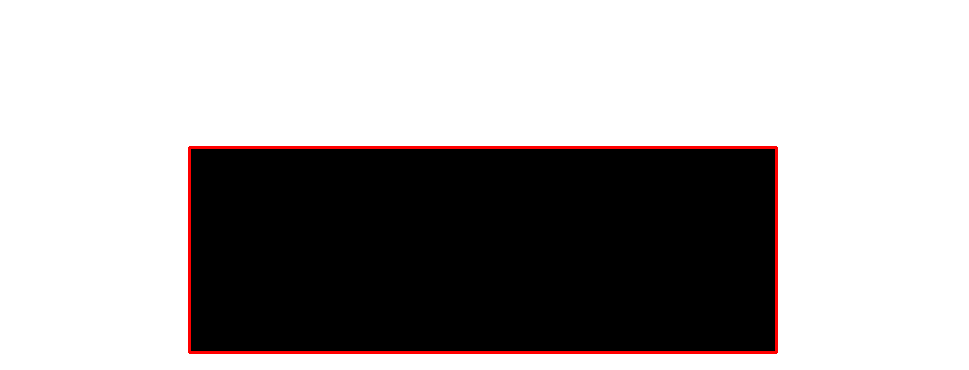

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


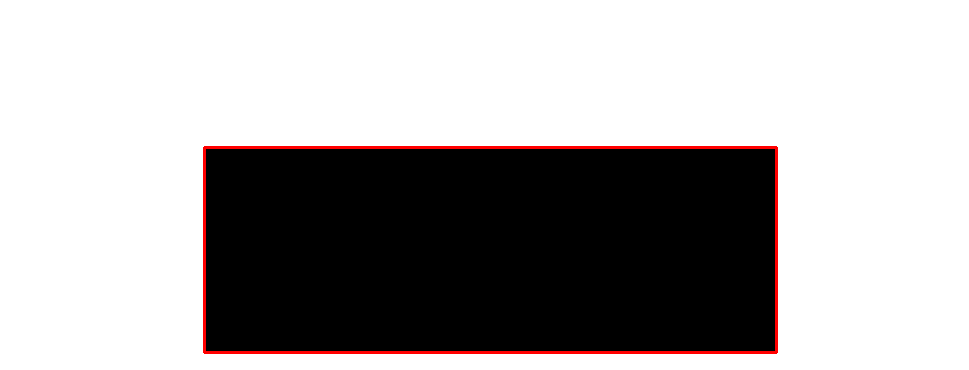

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


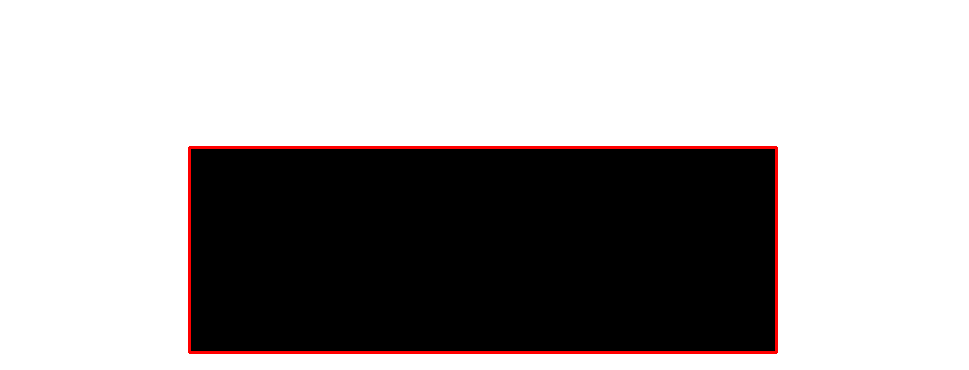

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


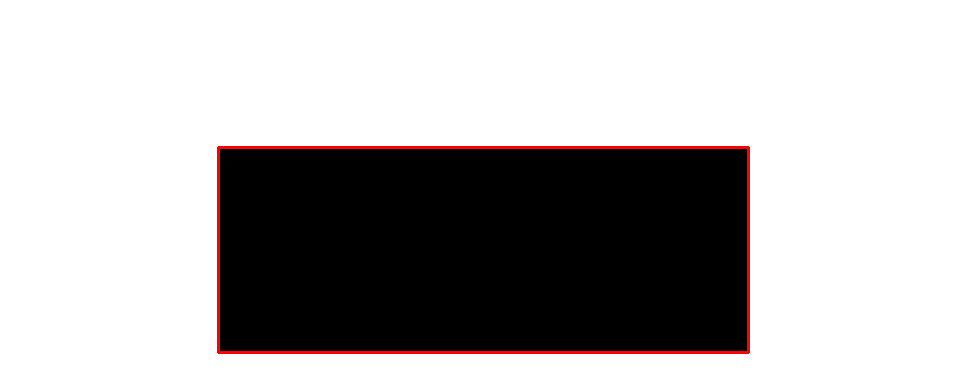

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

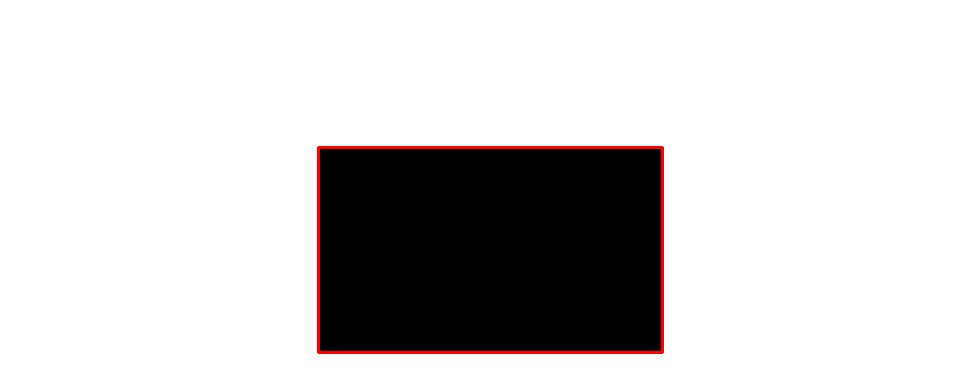

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


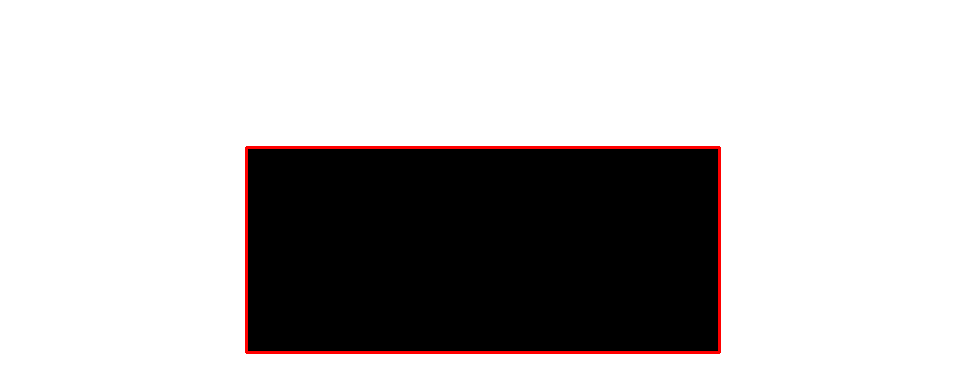

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


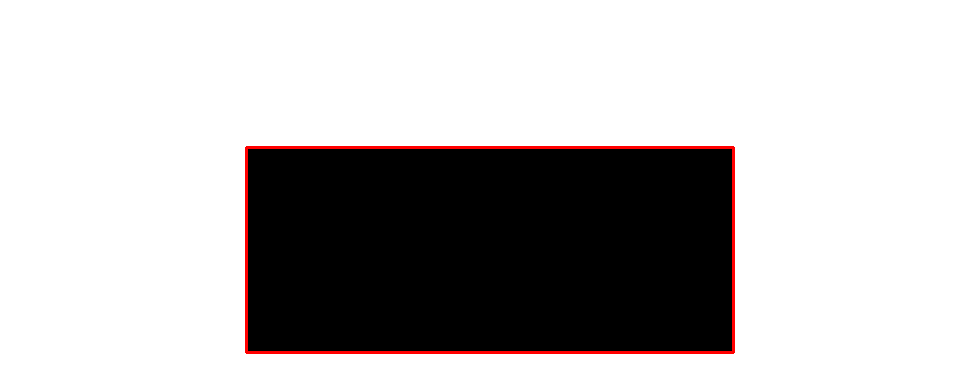

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


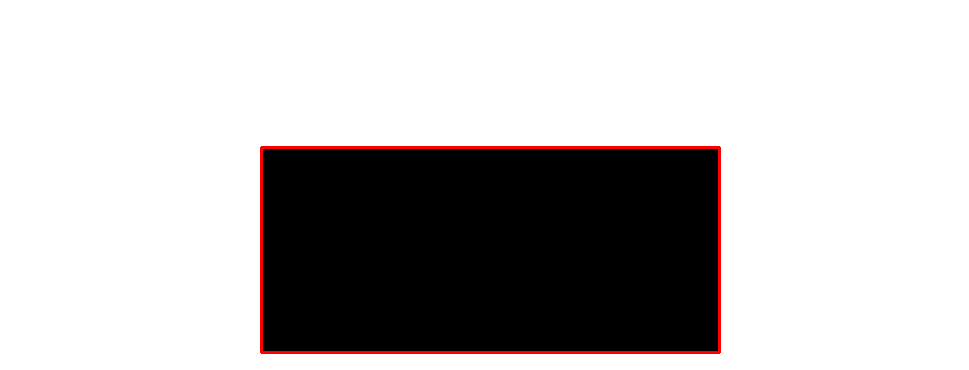

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


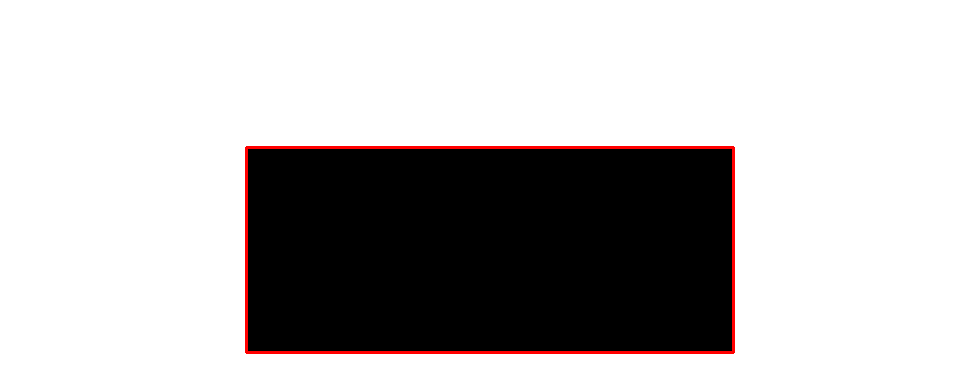

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


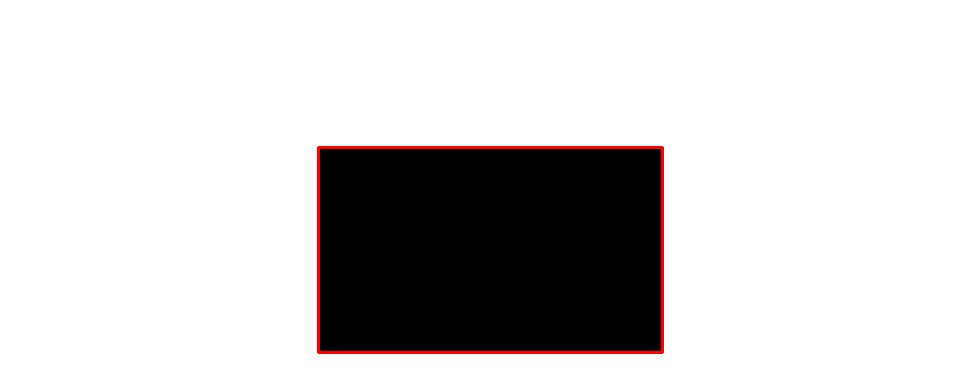

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


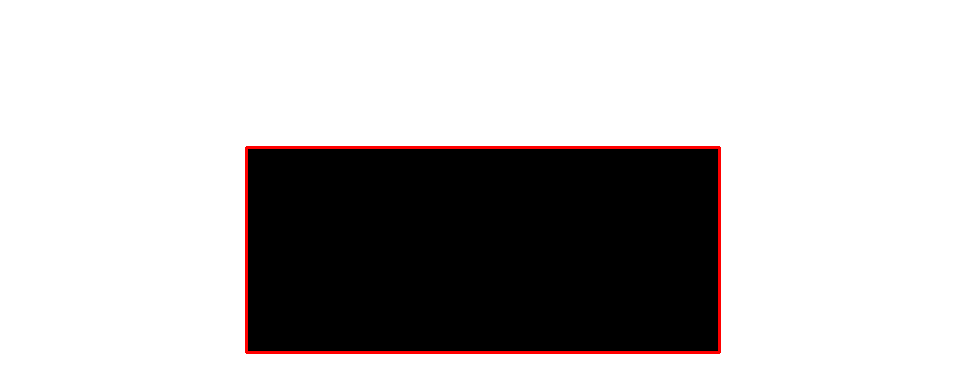

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


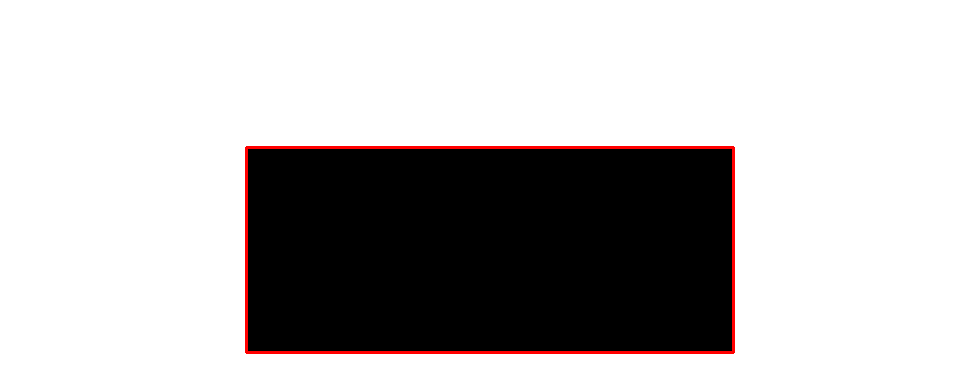

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


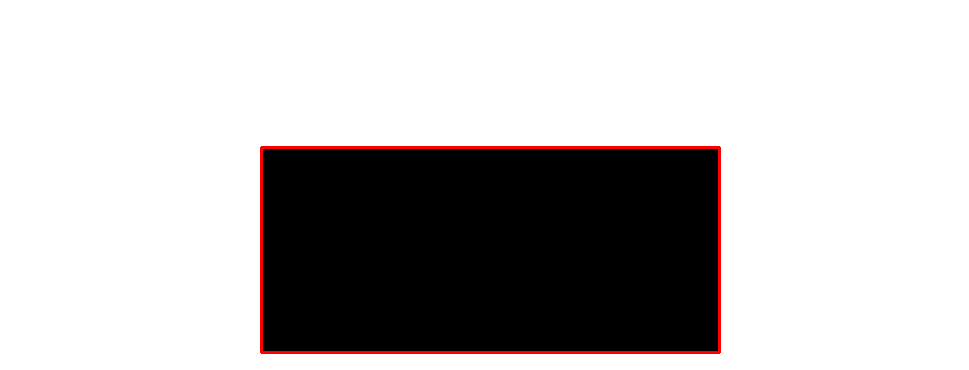

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


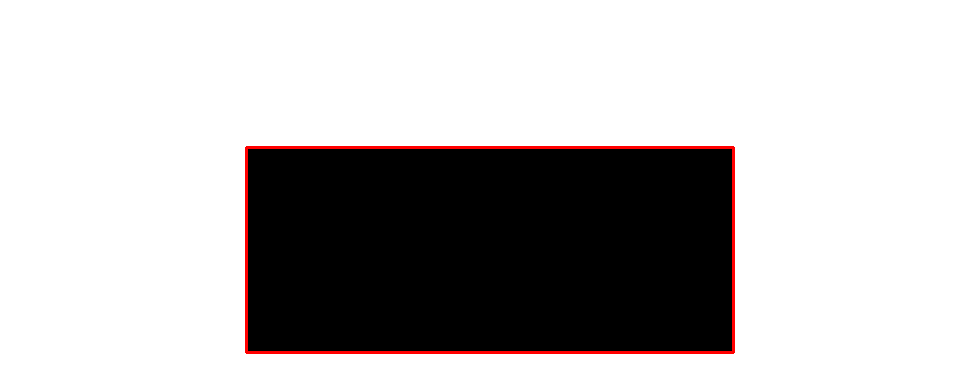

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


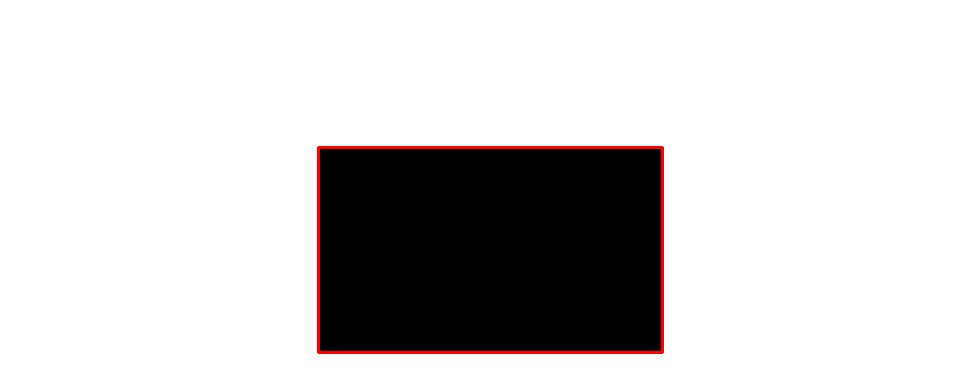

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


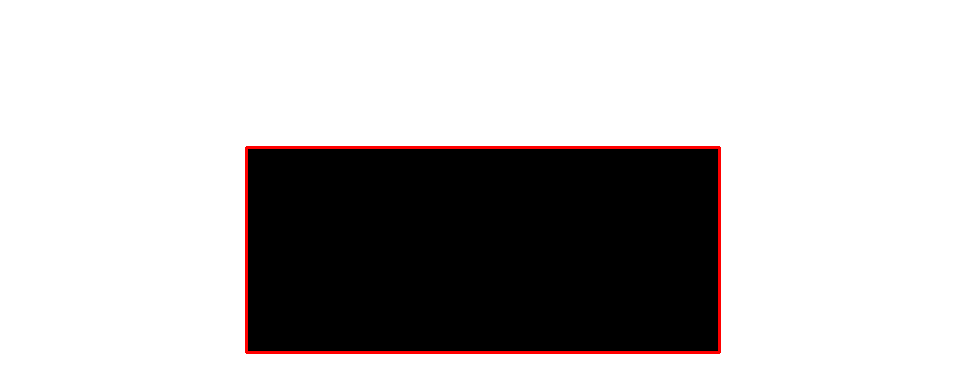

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


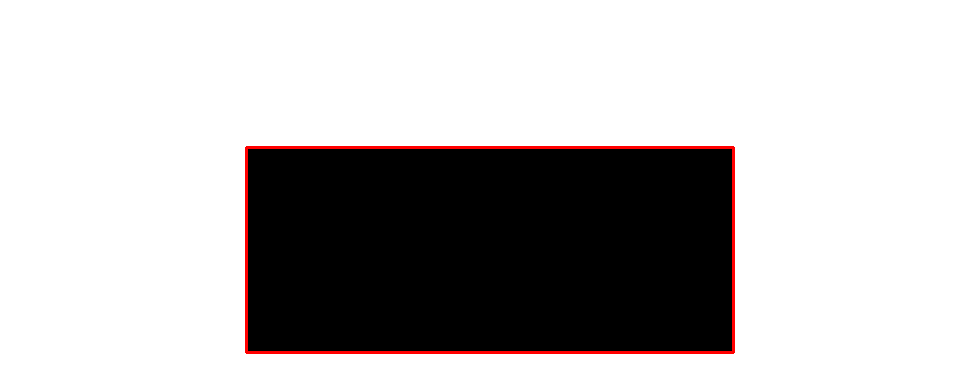

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


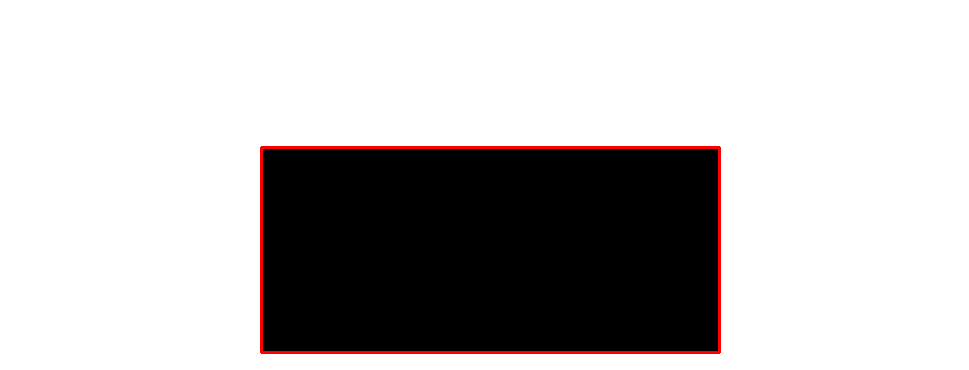

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


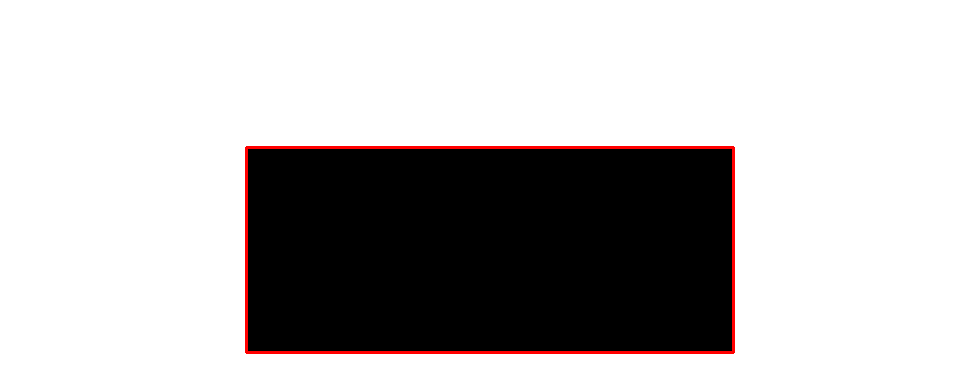

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


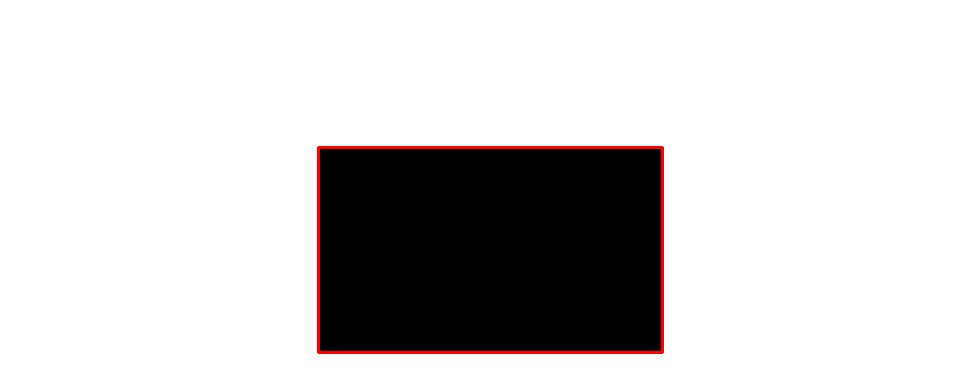

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


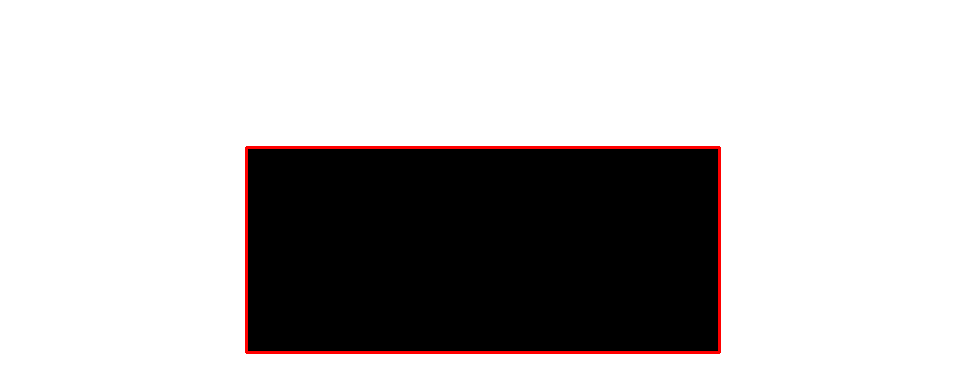

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


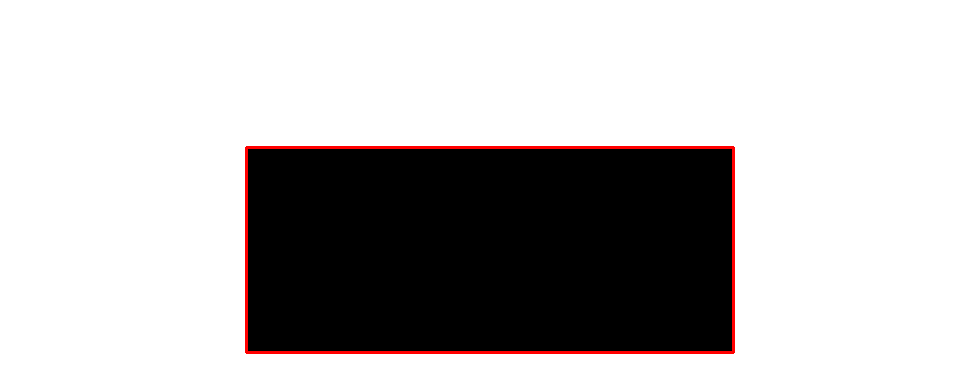

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


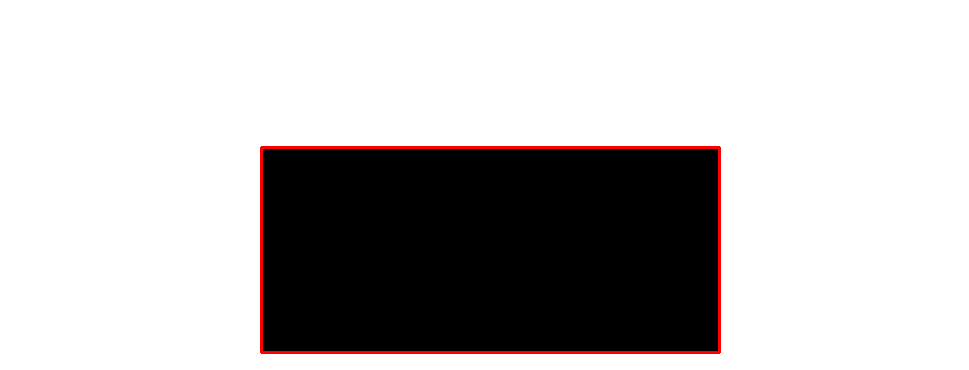

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


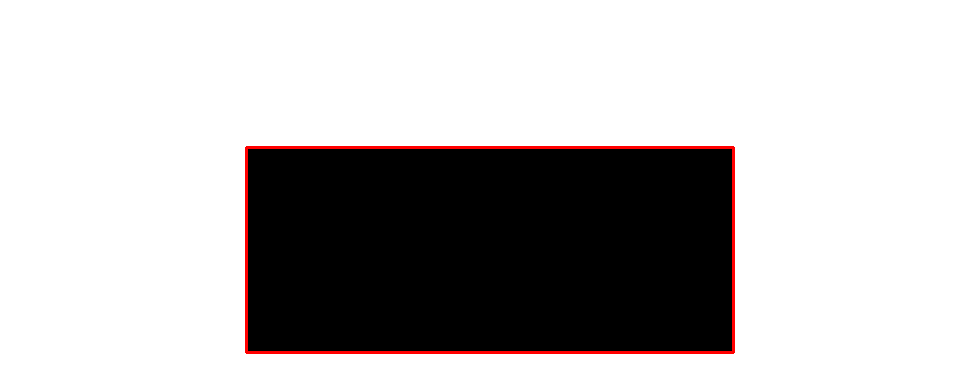

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


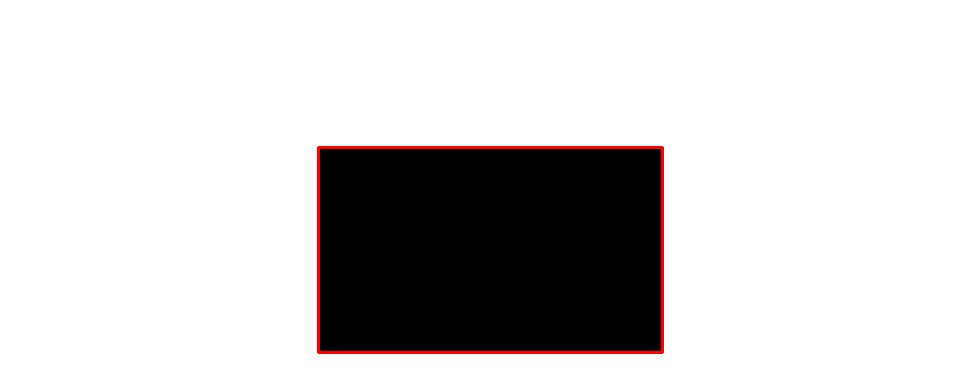

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


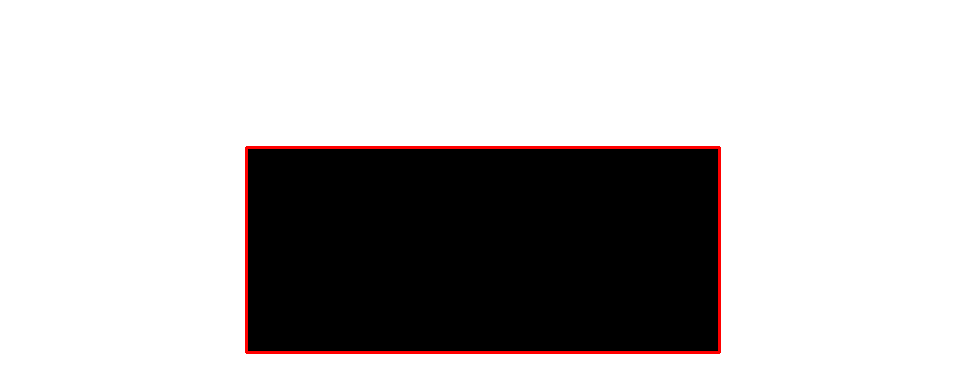

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


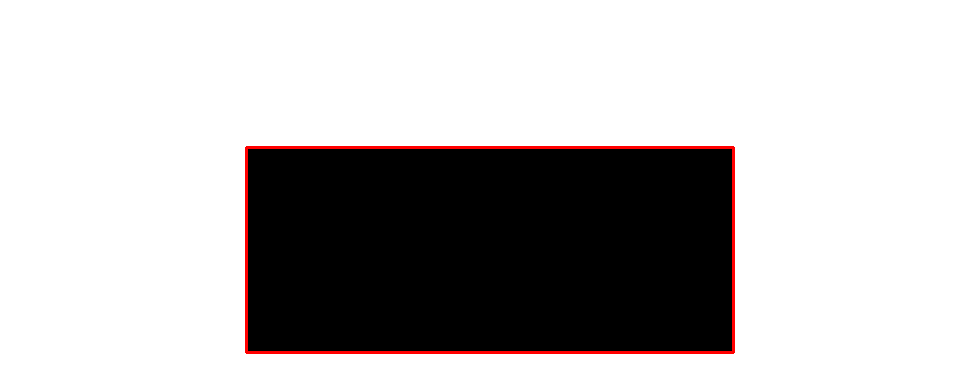

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


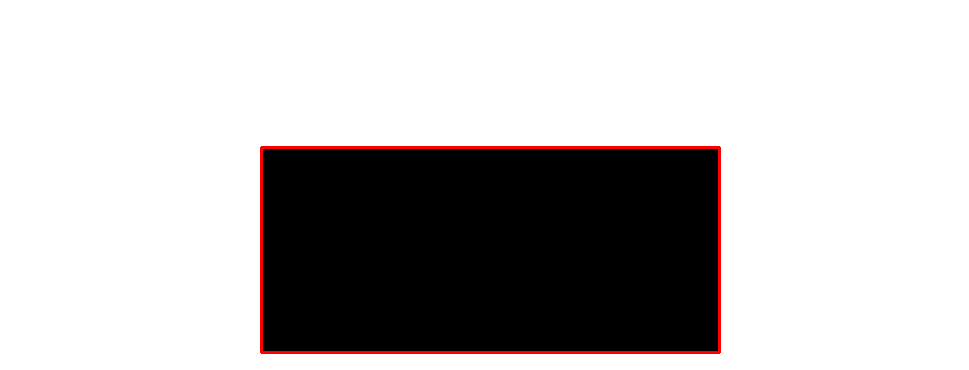

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


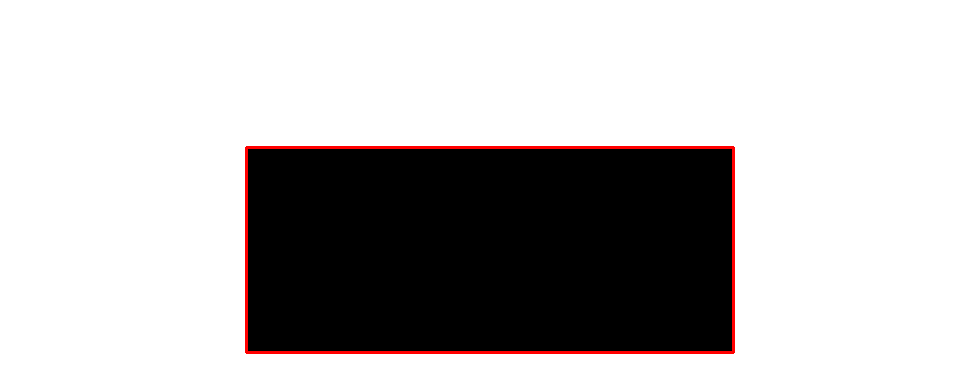

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

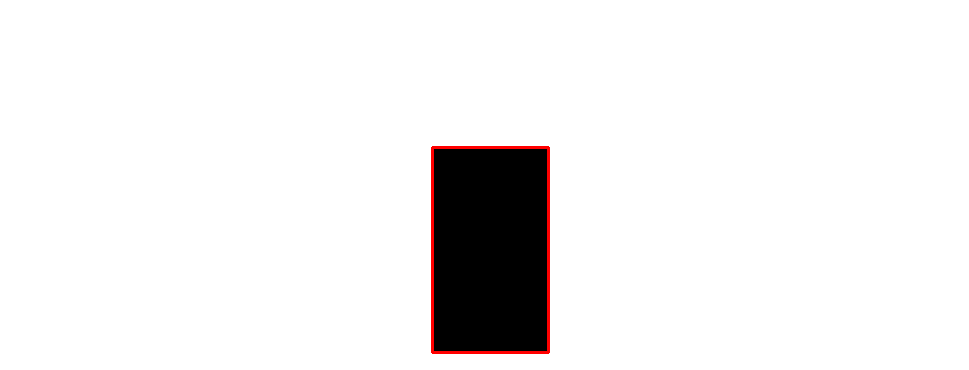

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


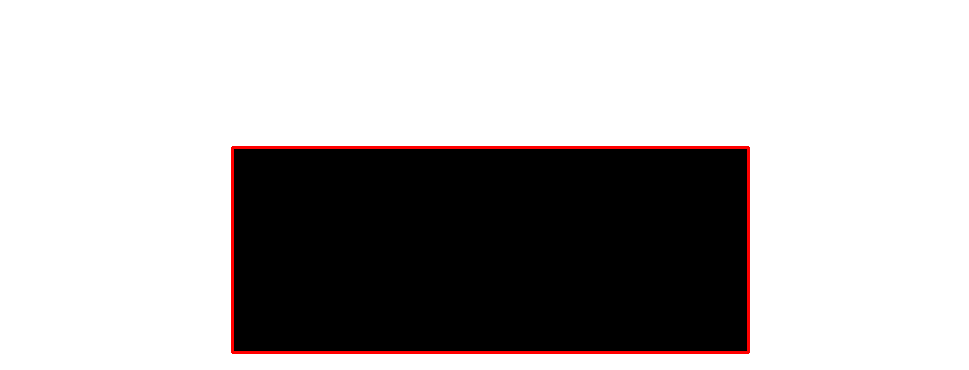

Rectangle coordinates: 3 147 962 352
Rectangle coordinates: 3 147 962 352


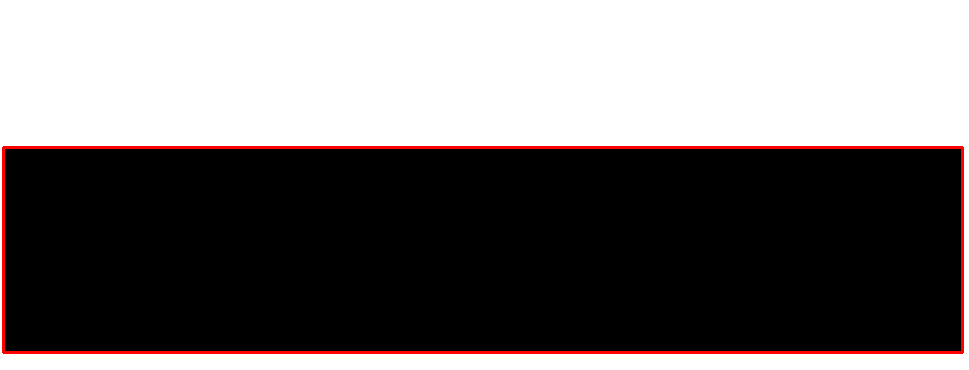

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


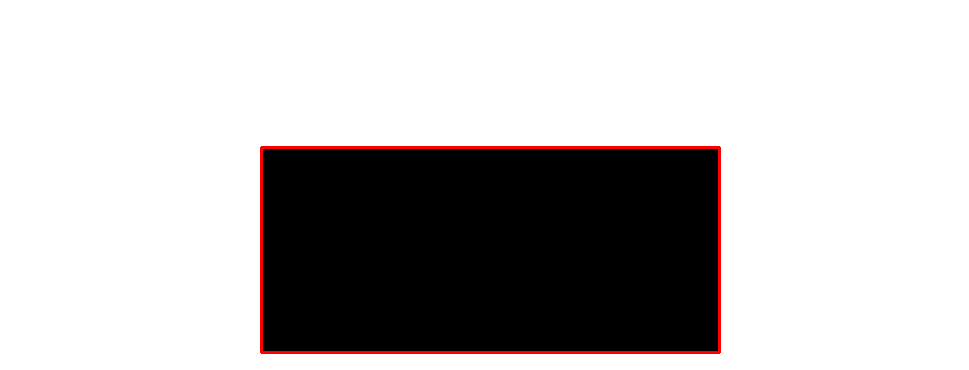

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


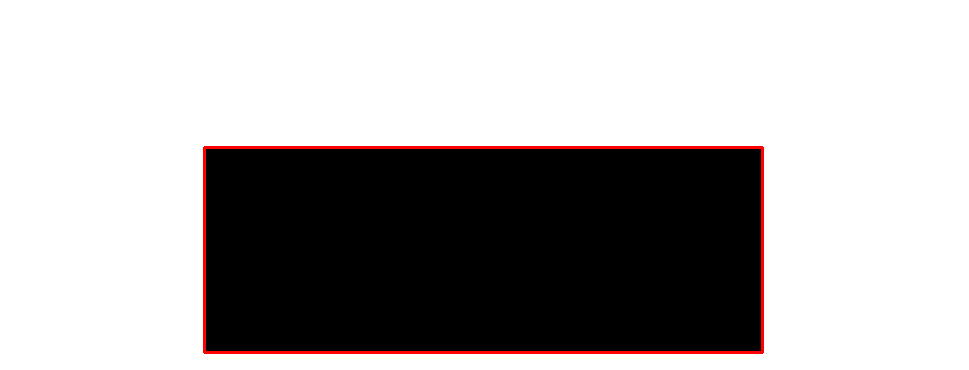

Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


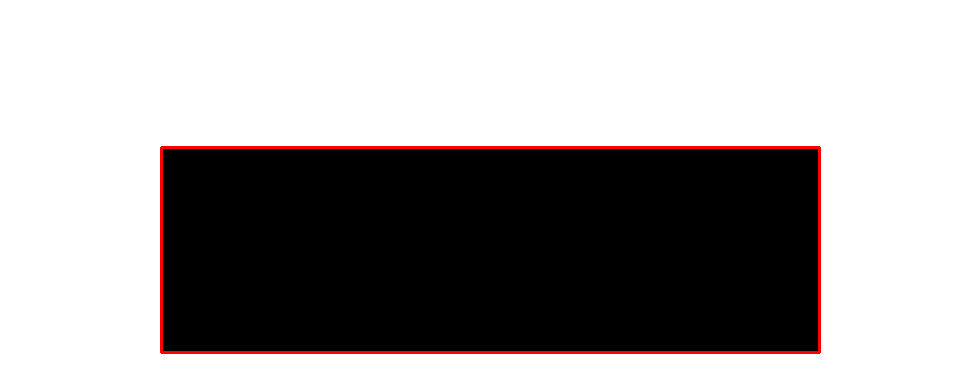

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


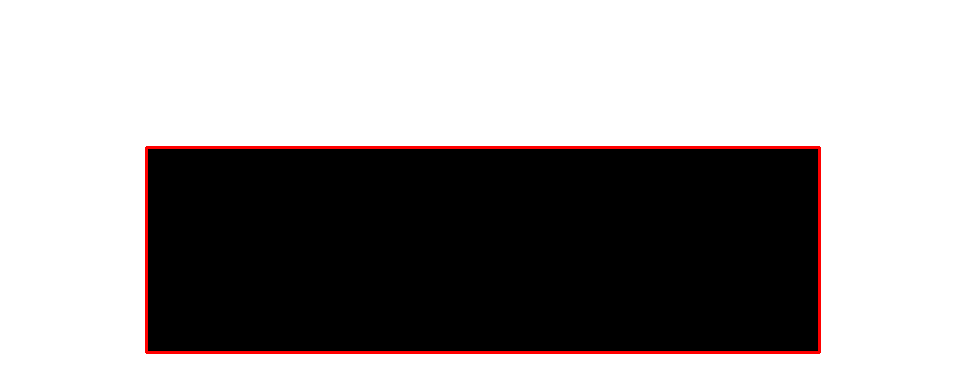

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


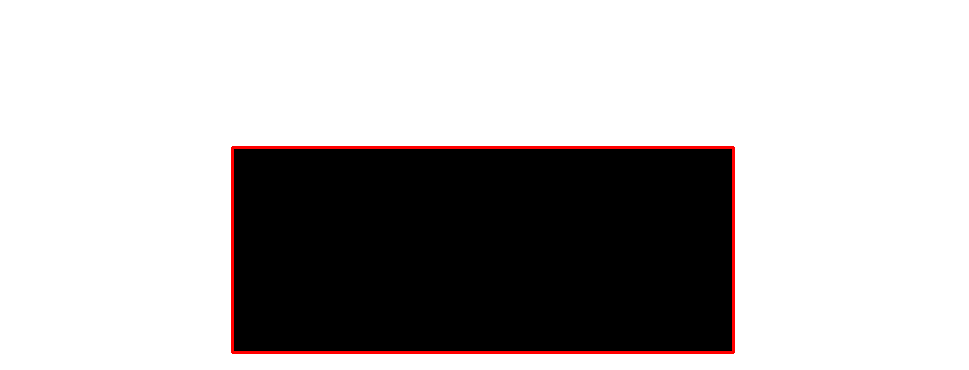

No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


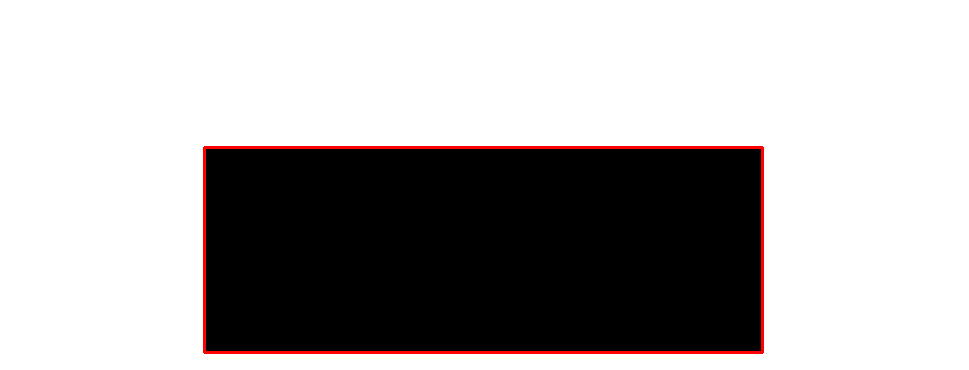

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


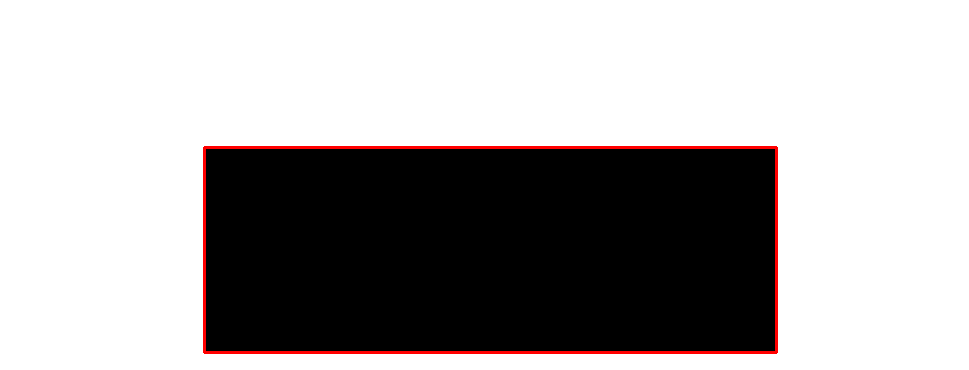

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


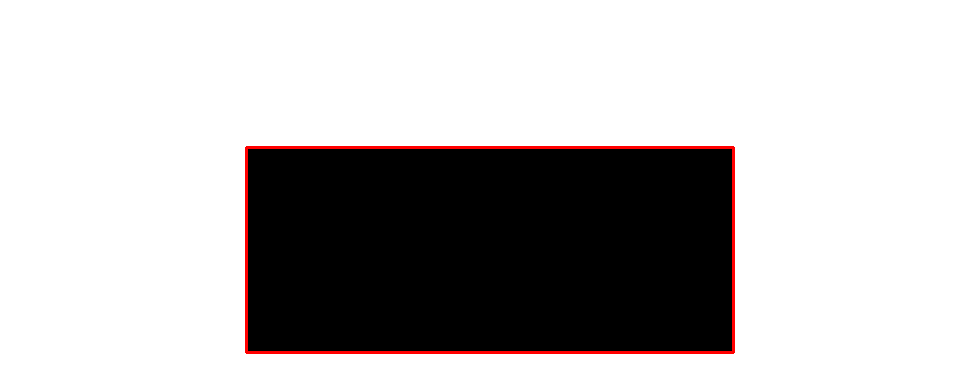

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


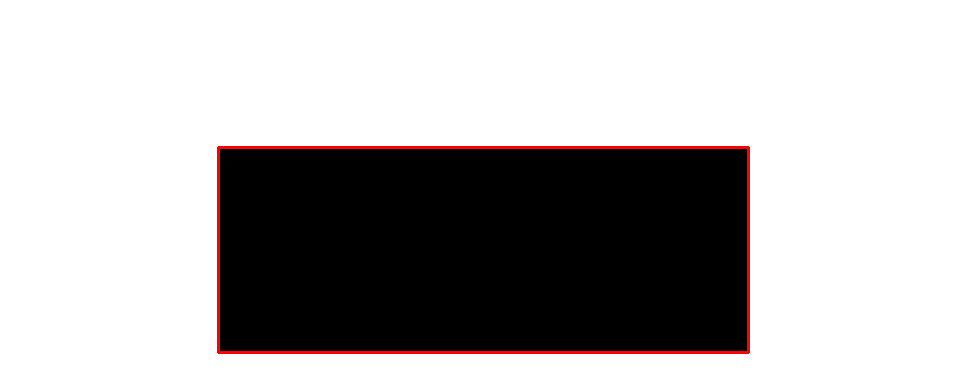

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


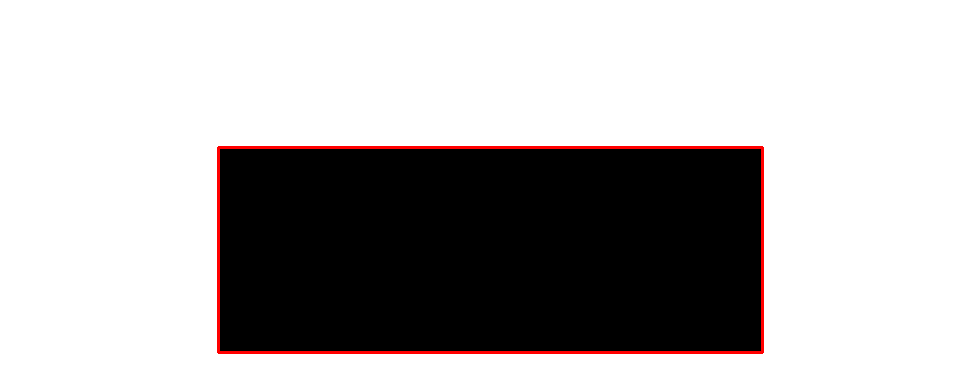

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


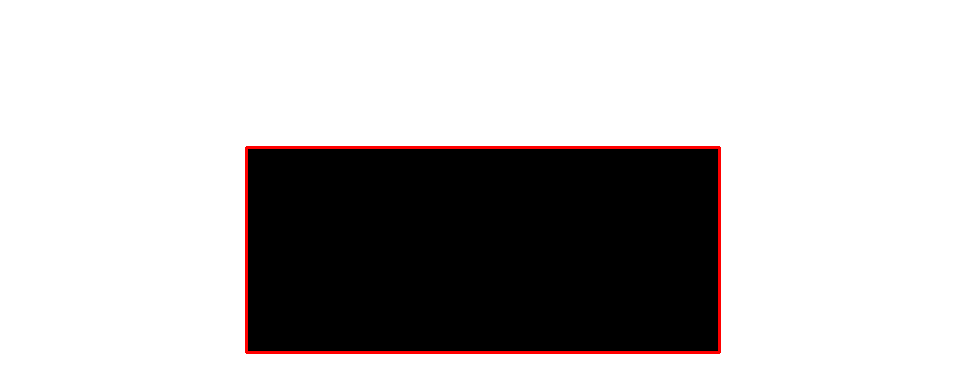

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


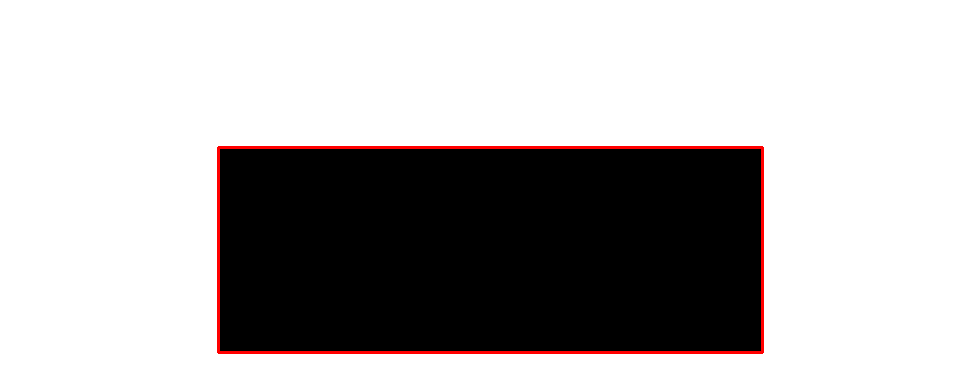

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


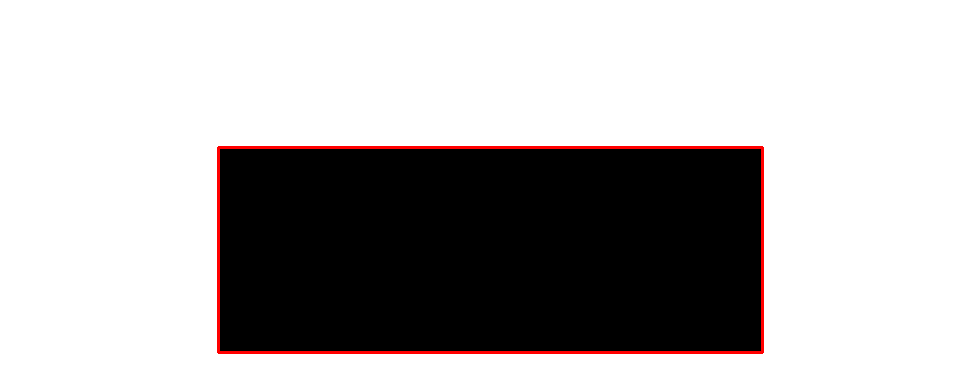

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


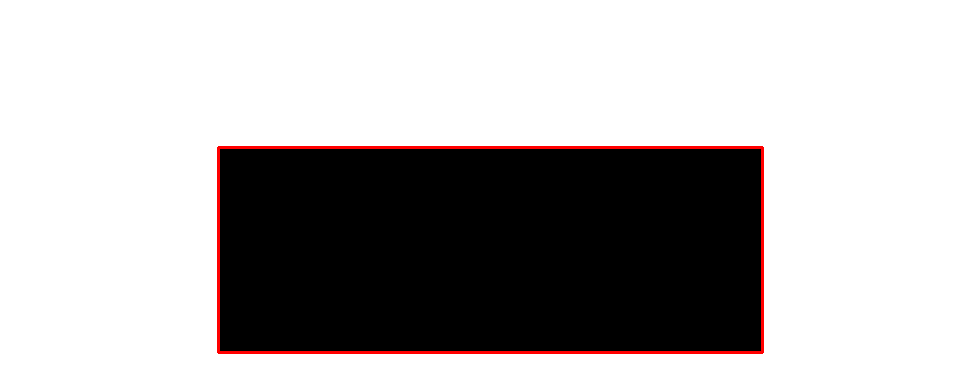

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


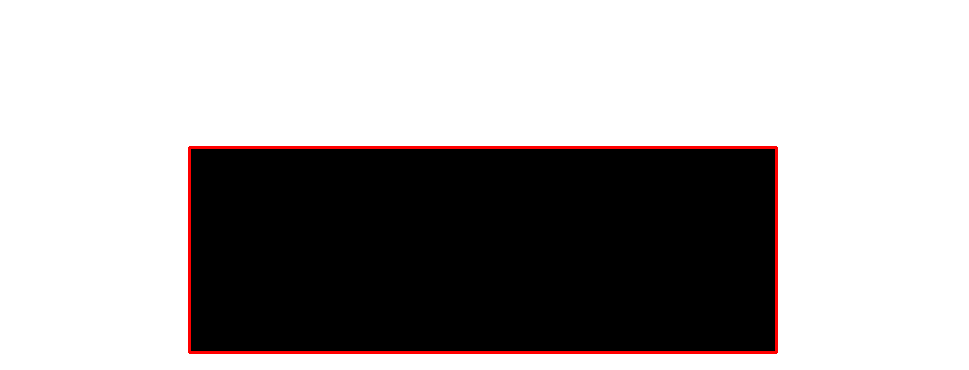

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


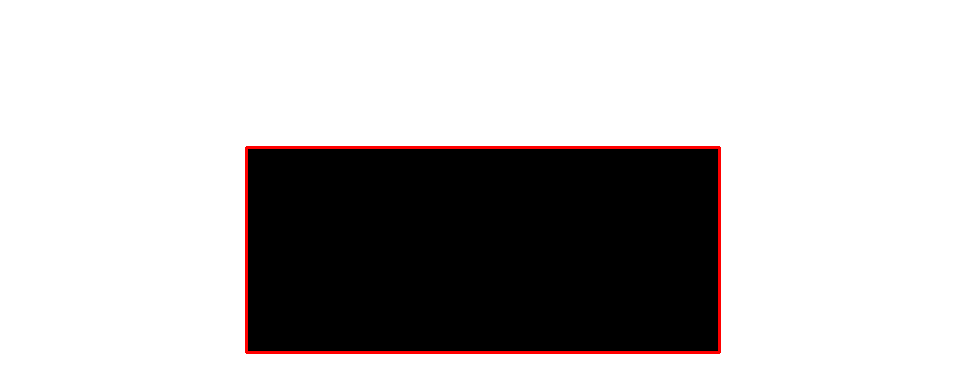

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


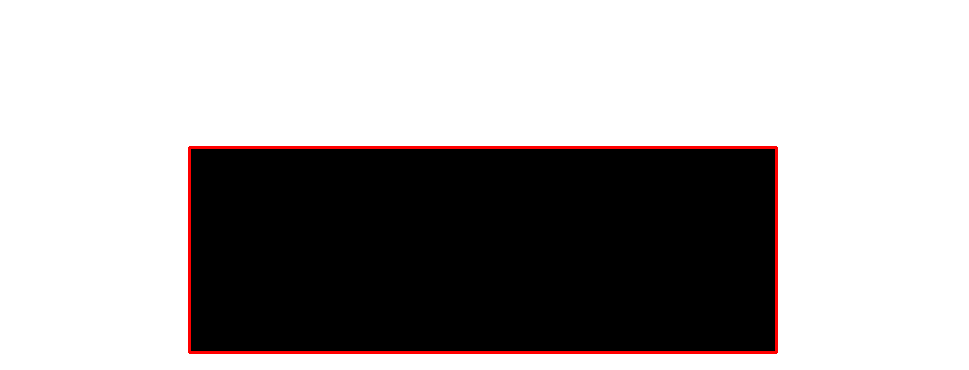

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


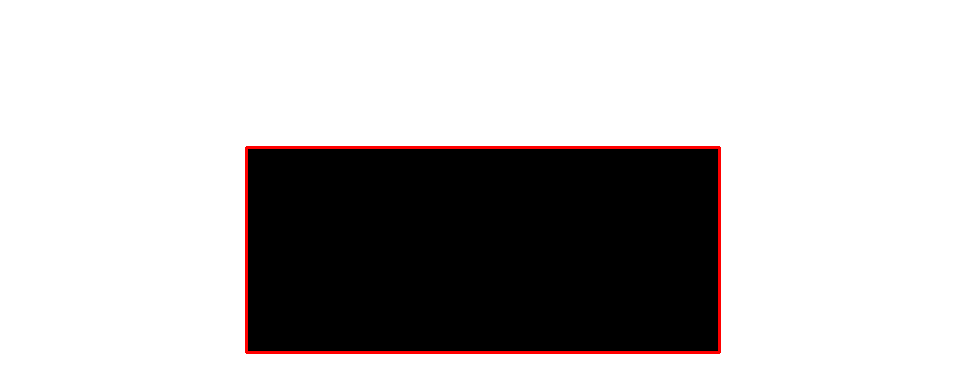

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


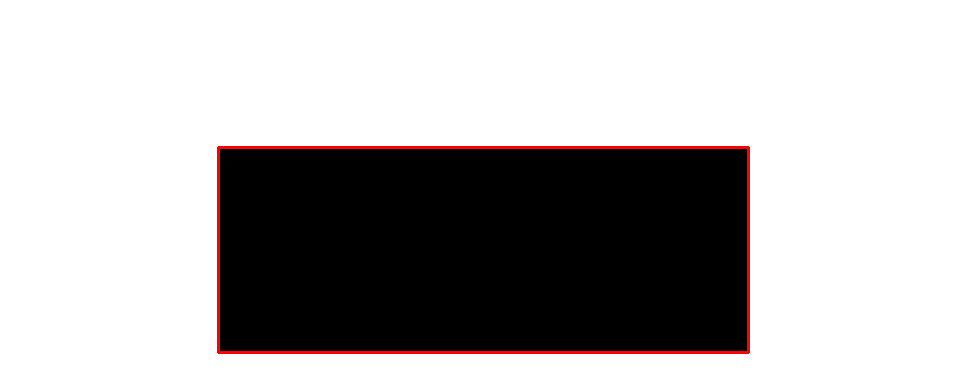

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


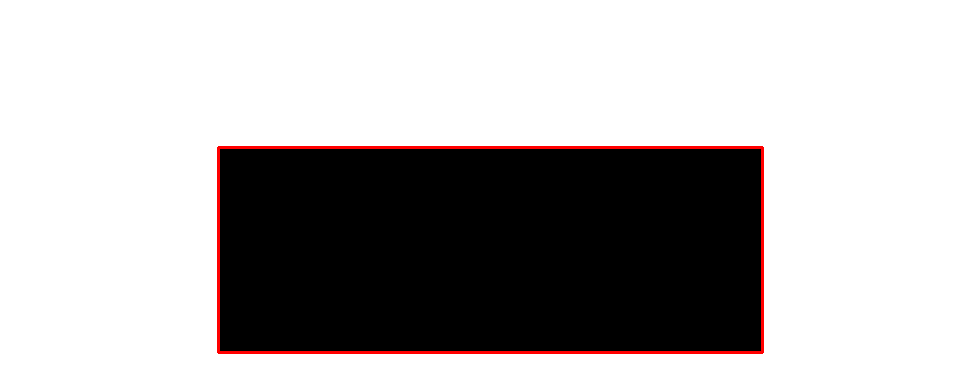

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

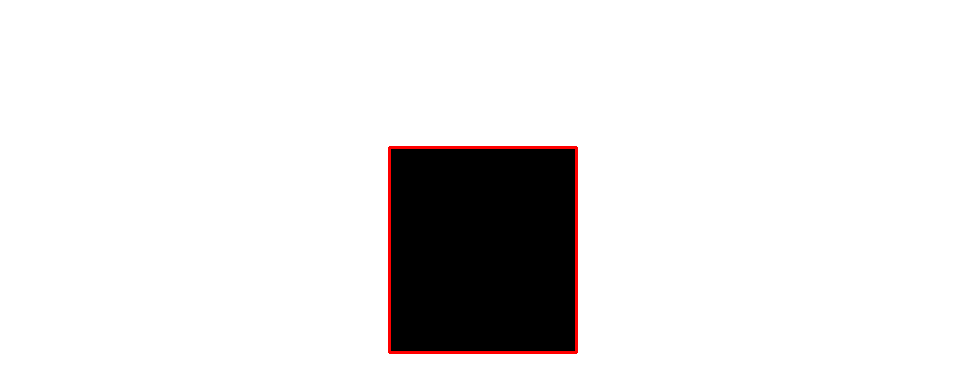

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


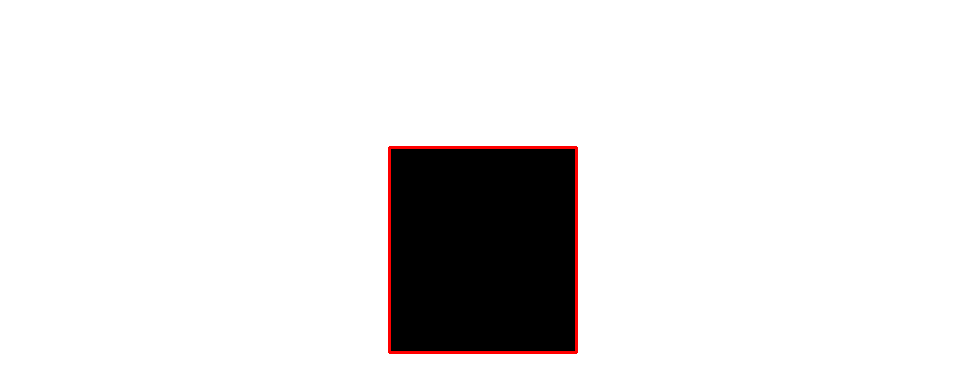

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


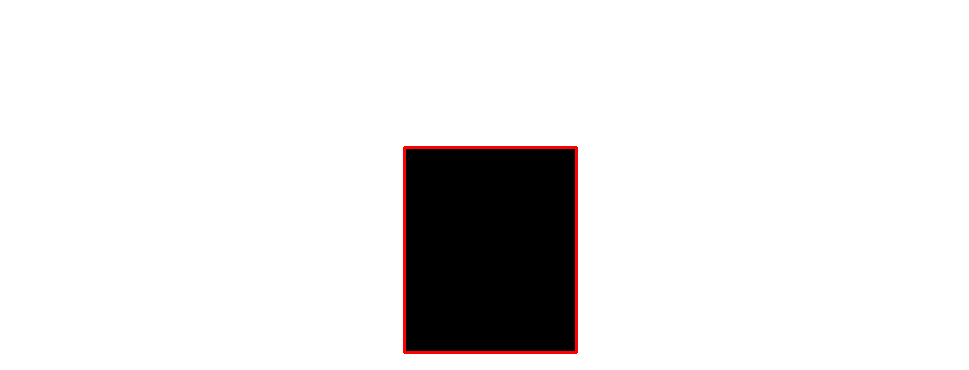

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


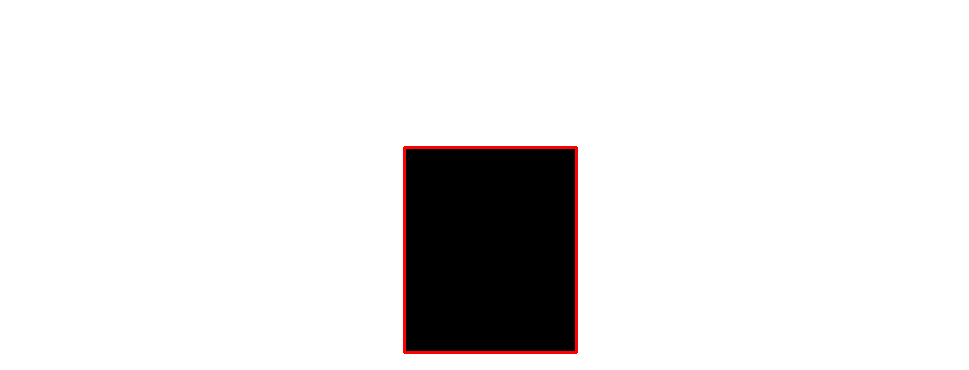

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


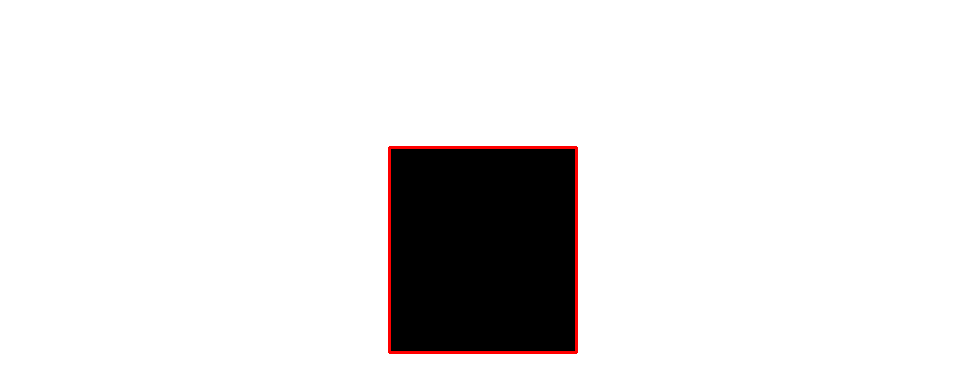

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


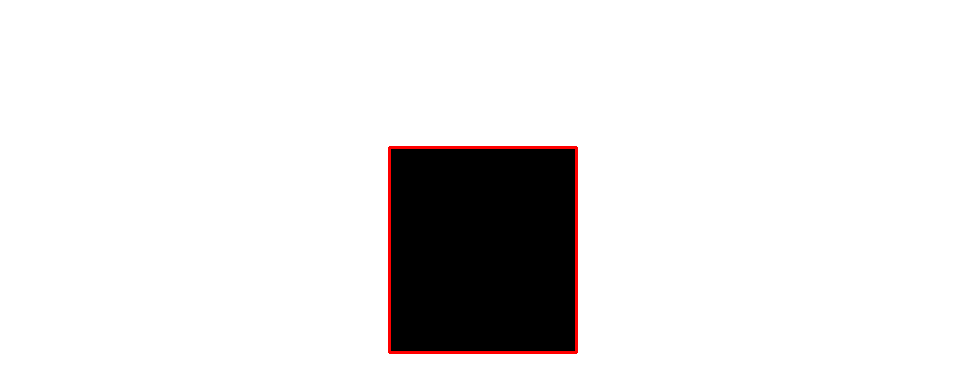

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


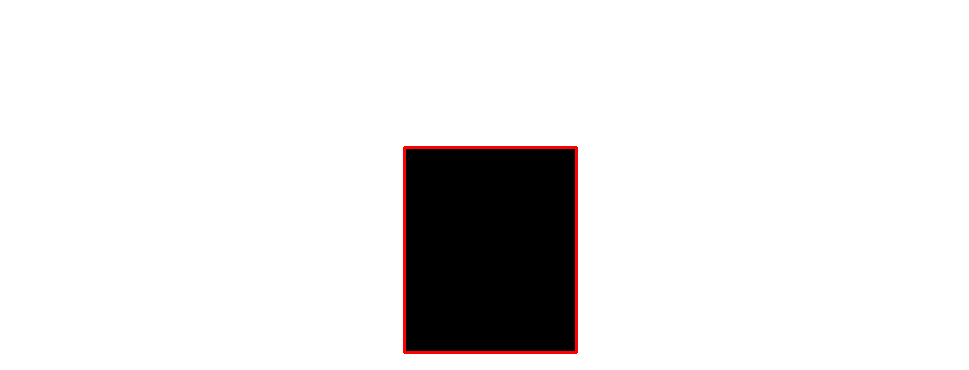

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


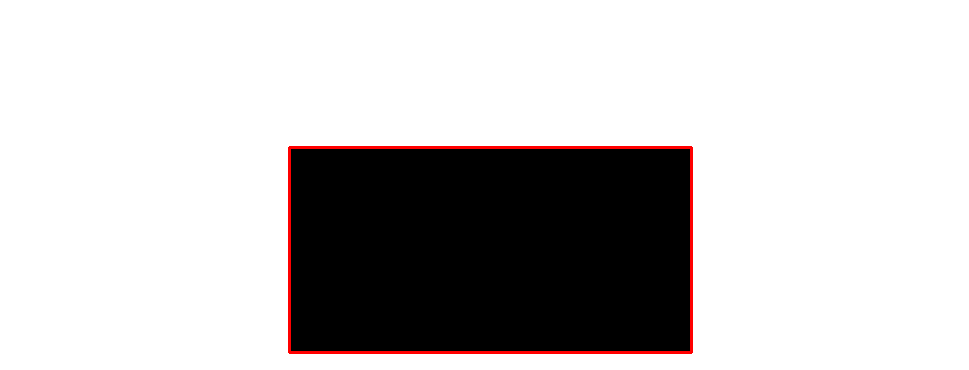

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


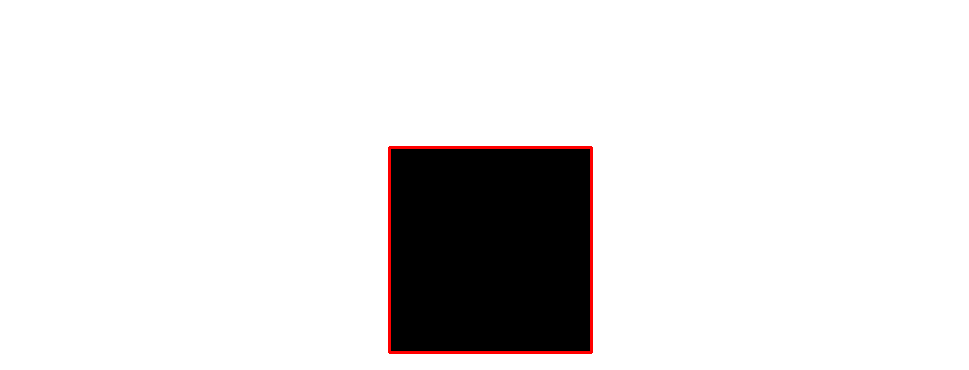

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


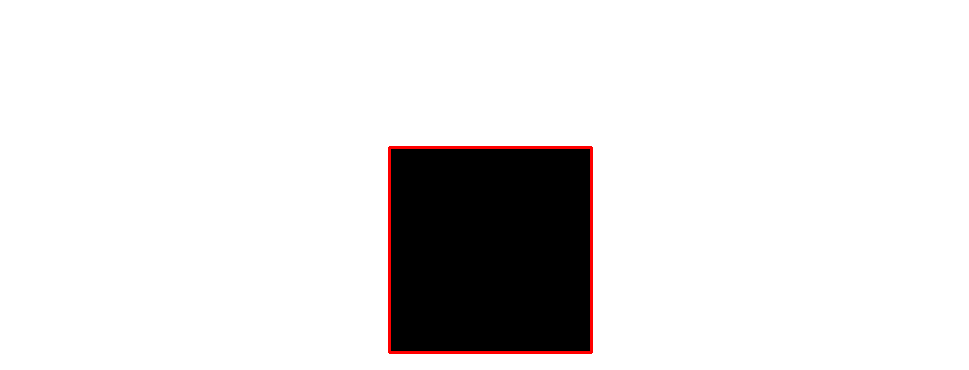

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


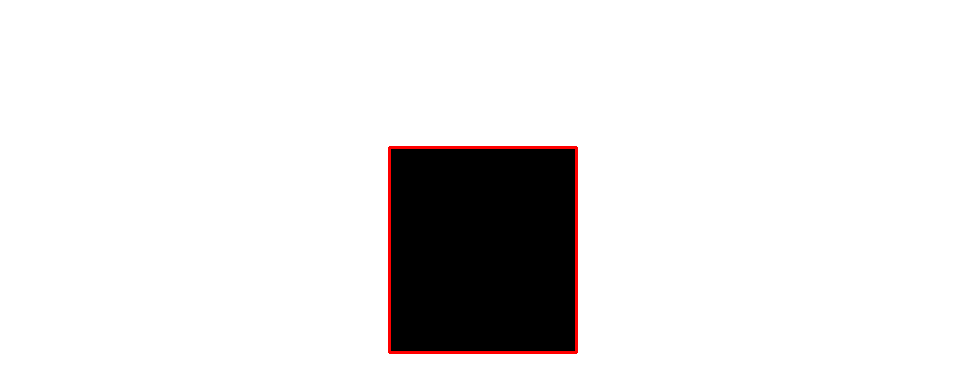

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


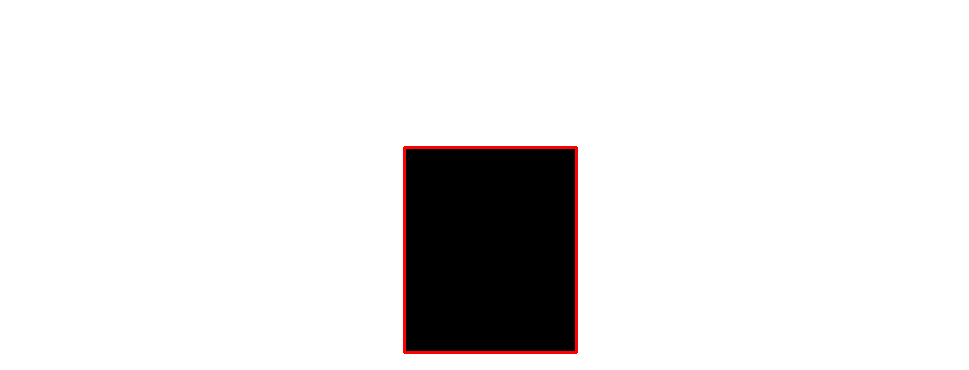

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


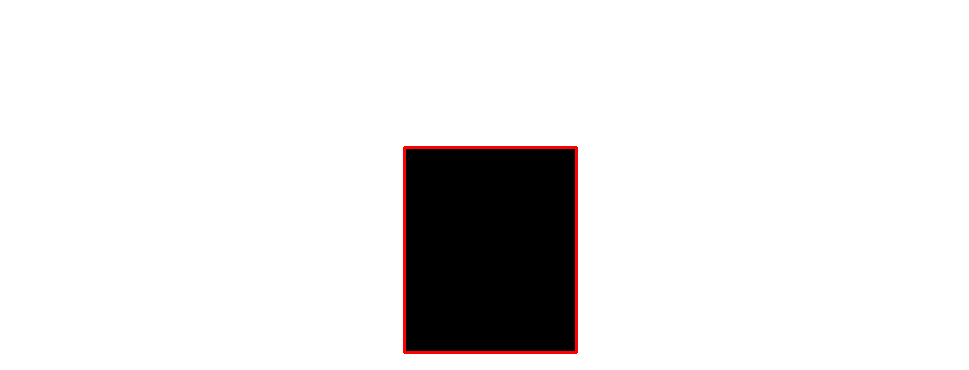

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


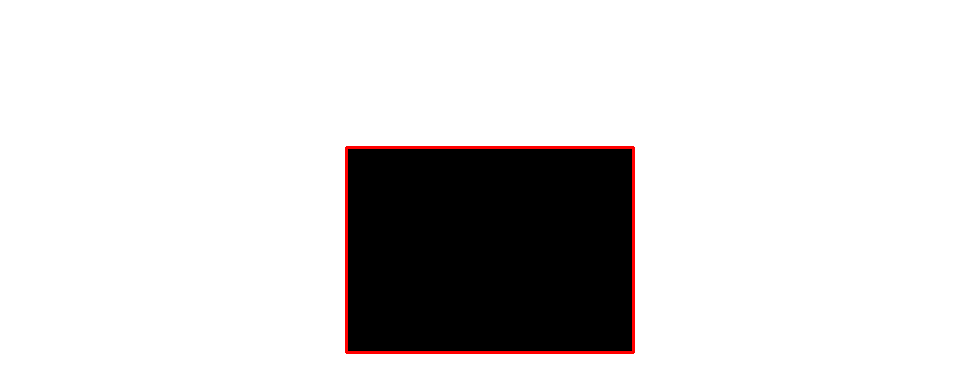

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


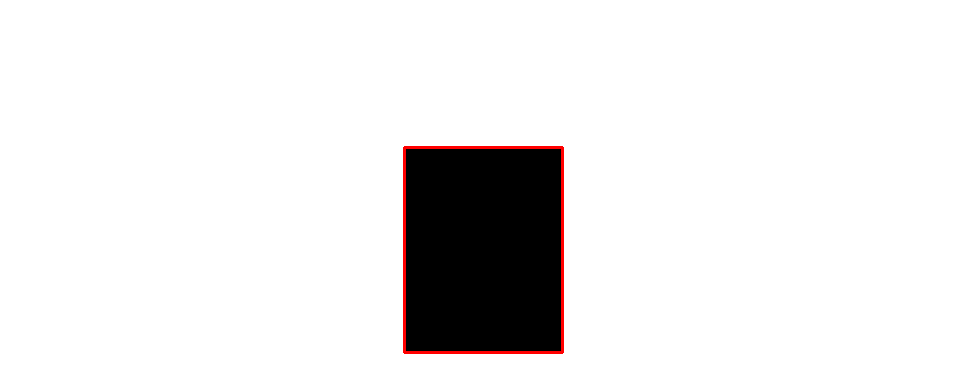

No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


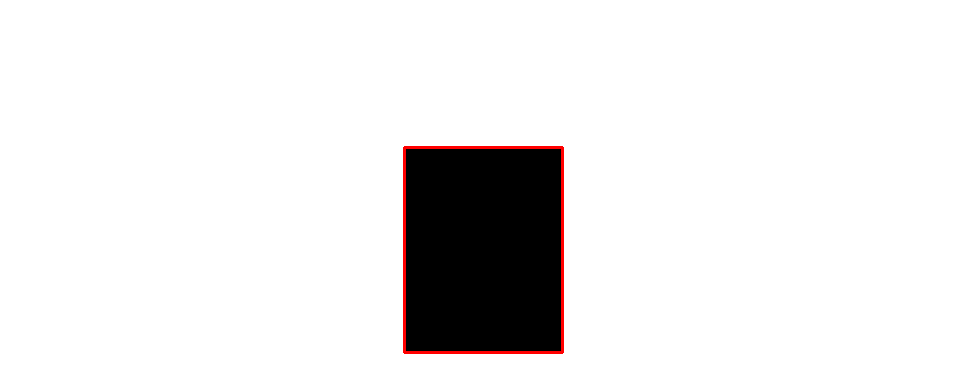

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


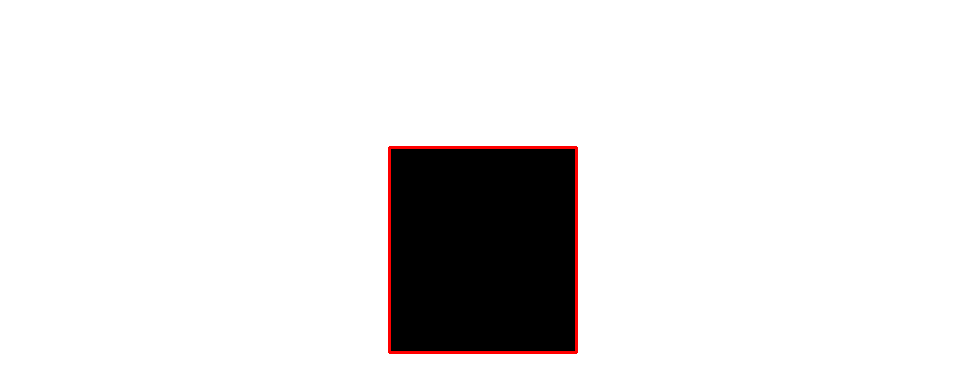

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


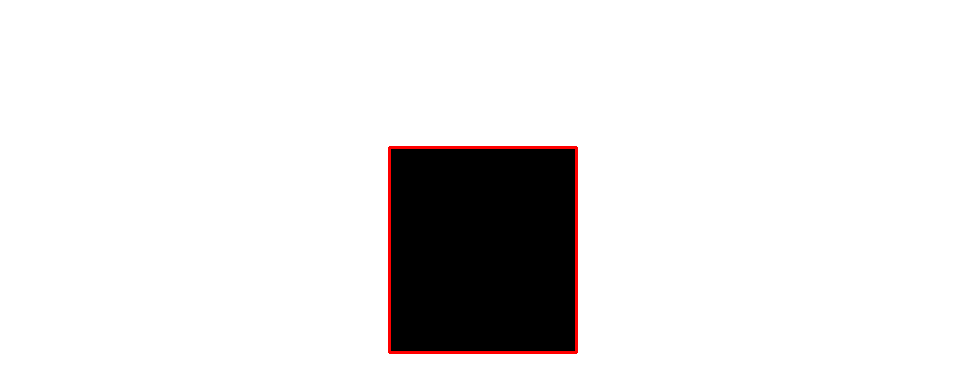

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


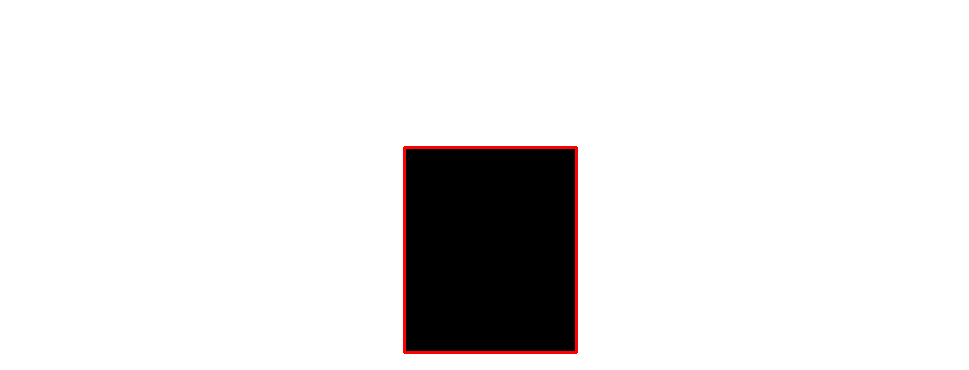

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


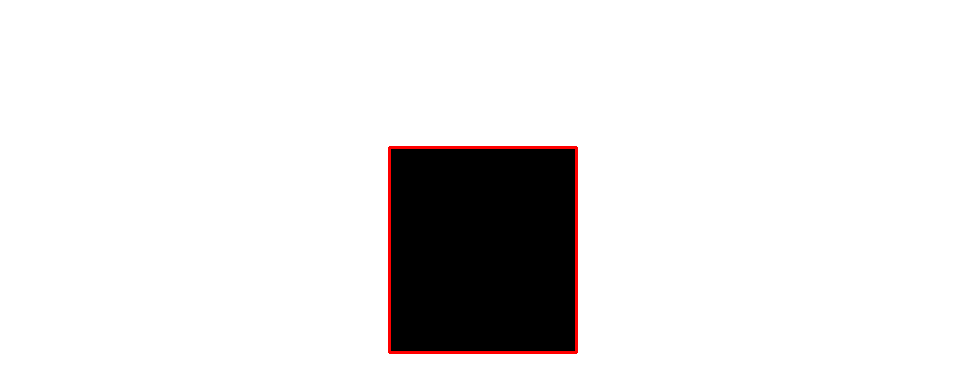

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


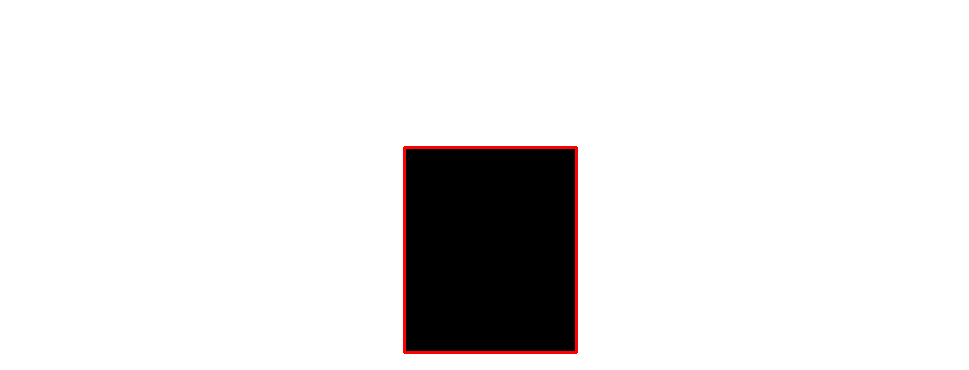

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


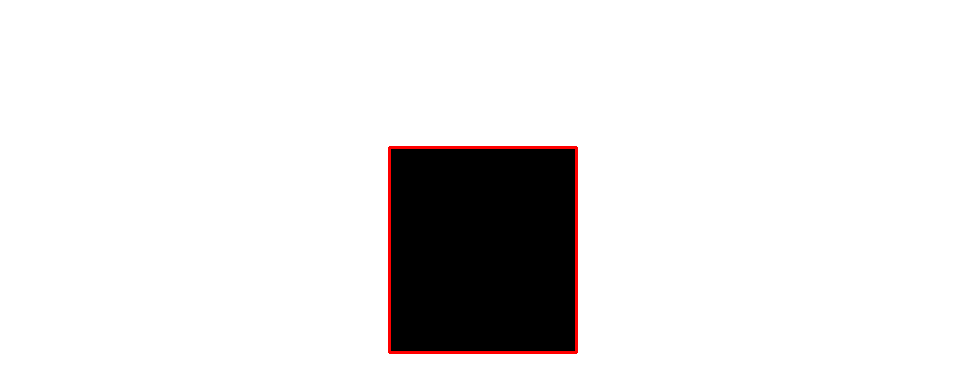

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


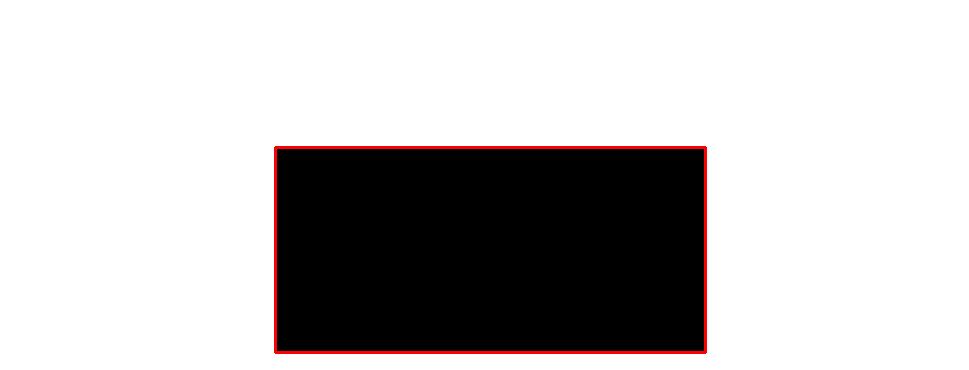

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


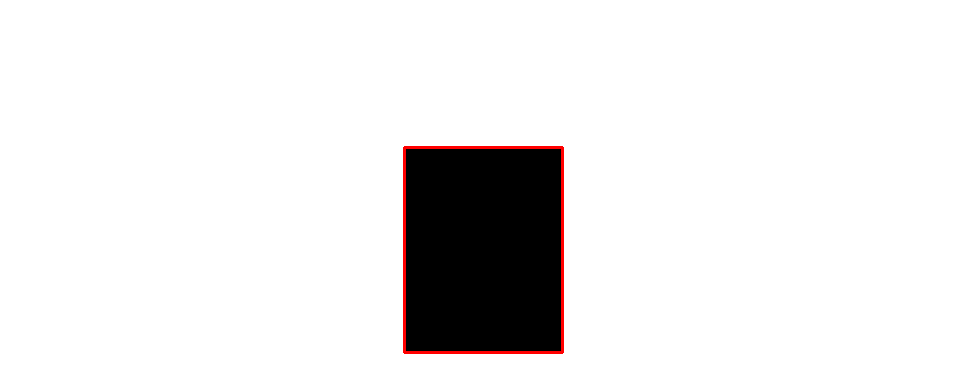

No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 590 352
Rectangle coordinates: 375 147 590 352


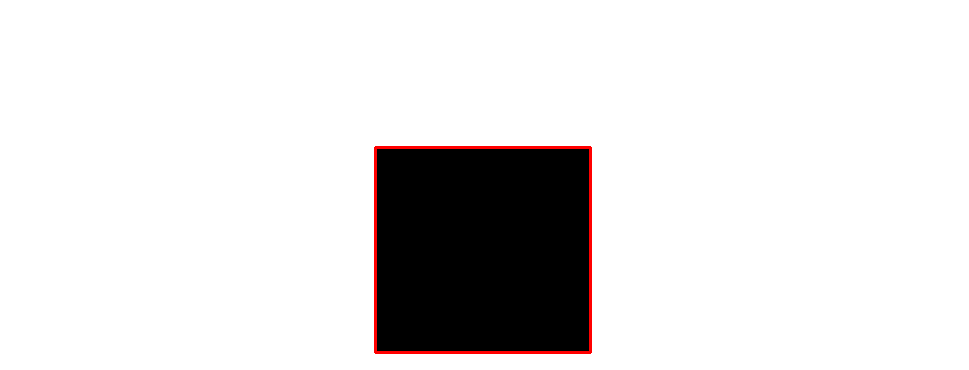

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
R

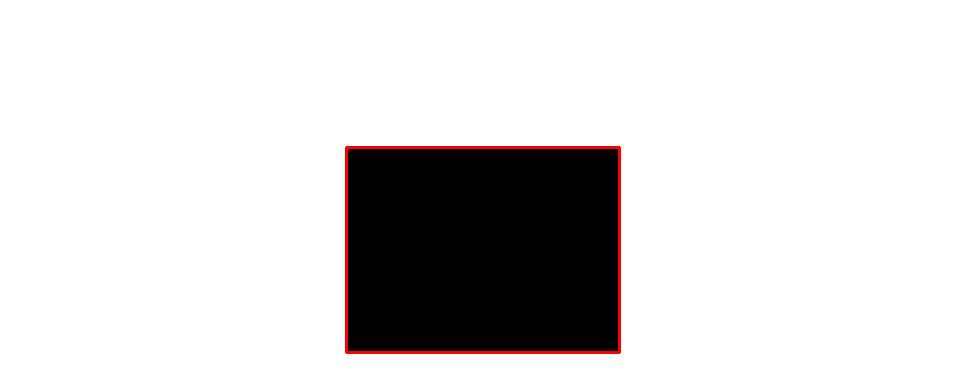

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


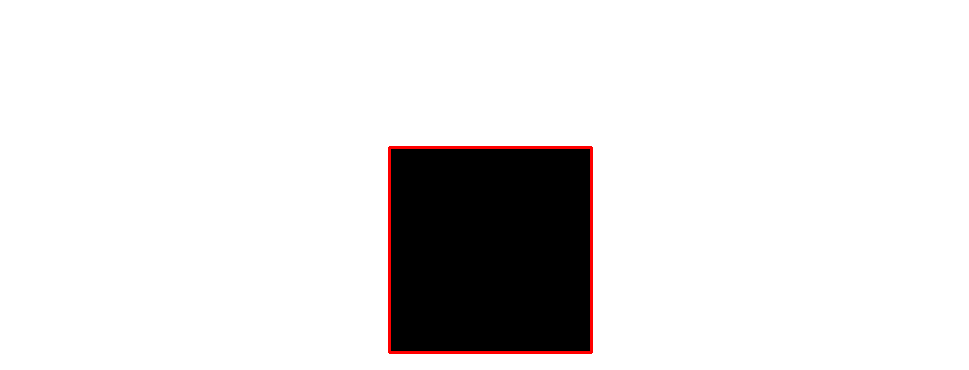

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


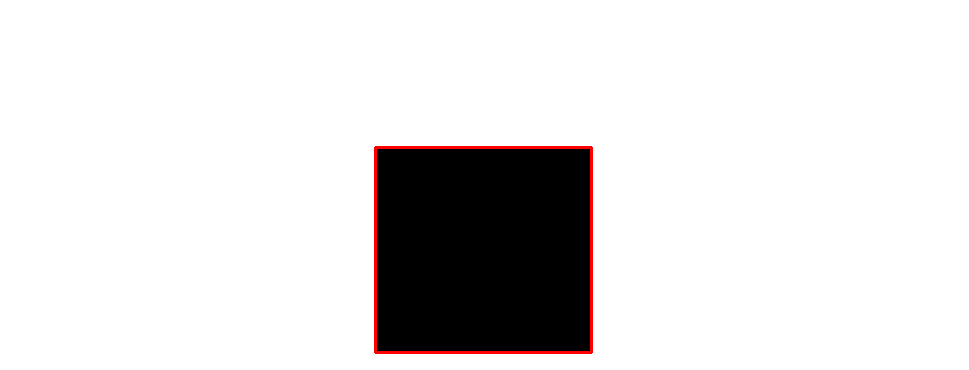

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


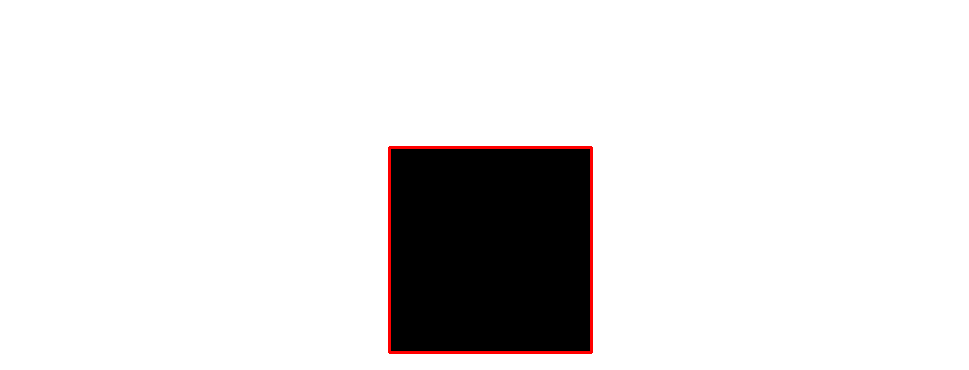

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


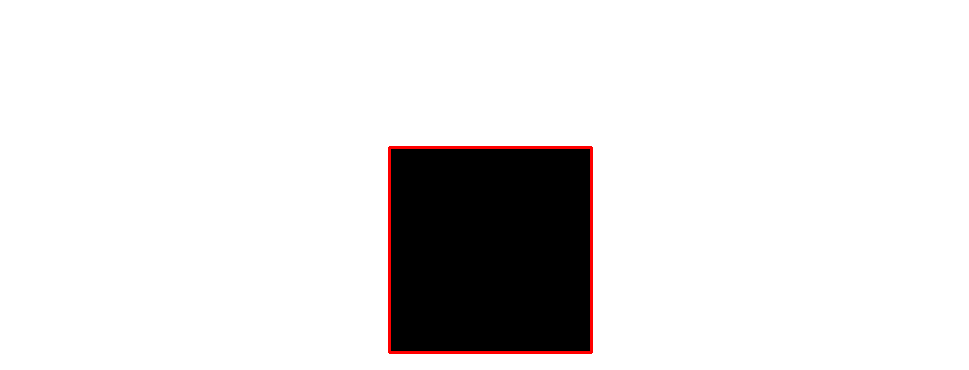

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


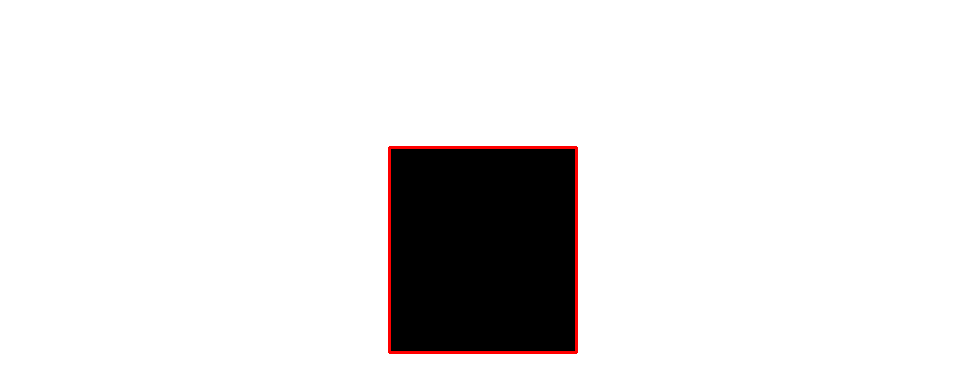

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


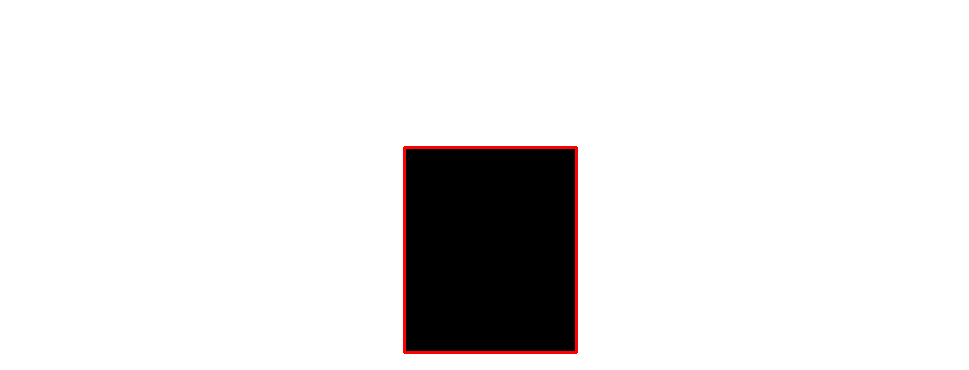

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


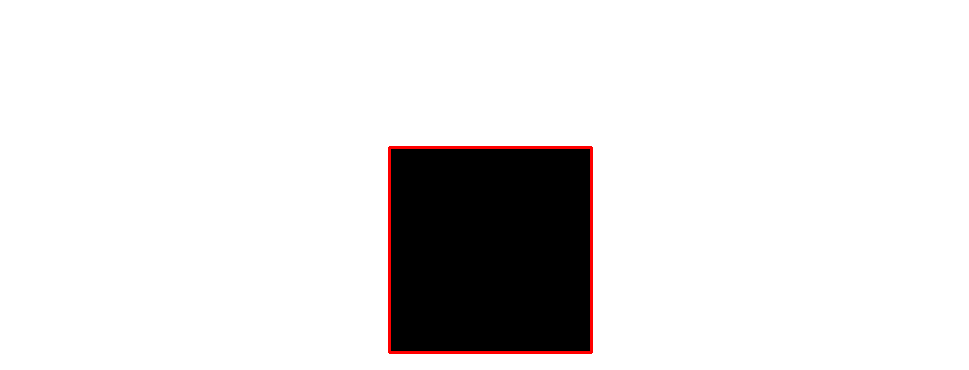

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


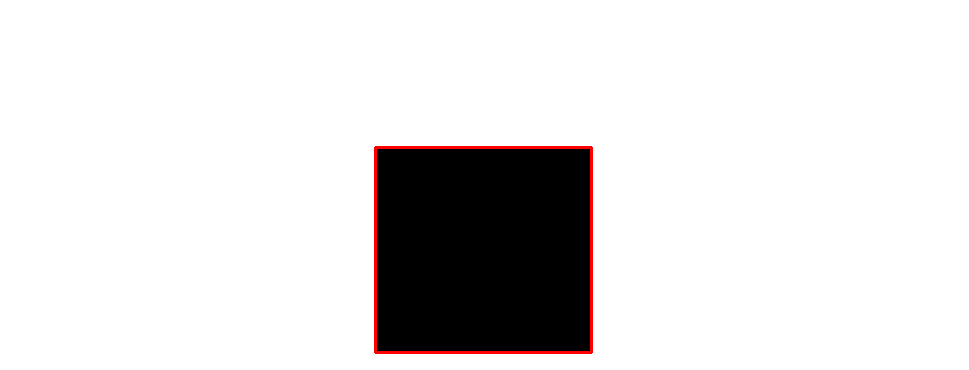

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


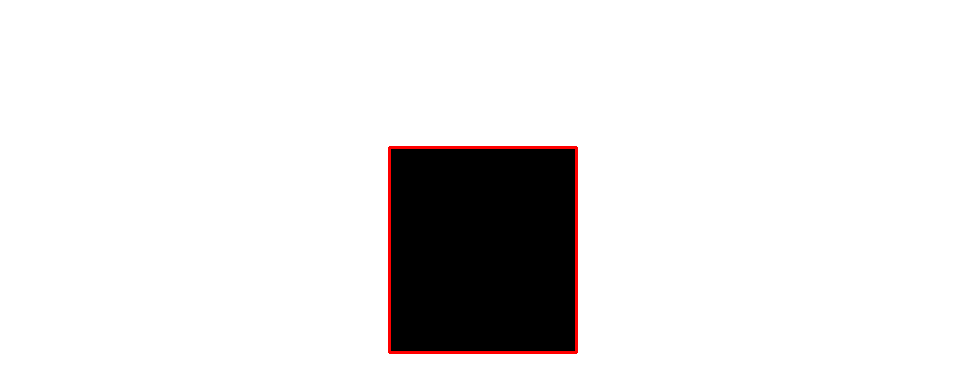

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


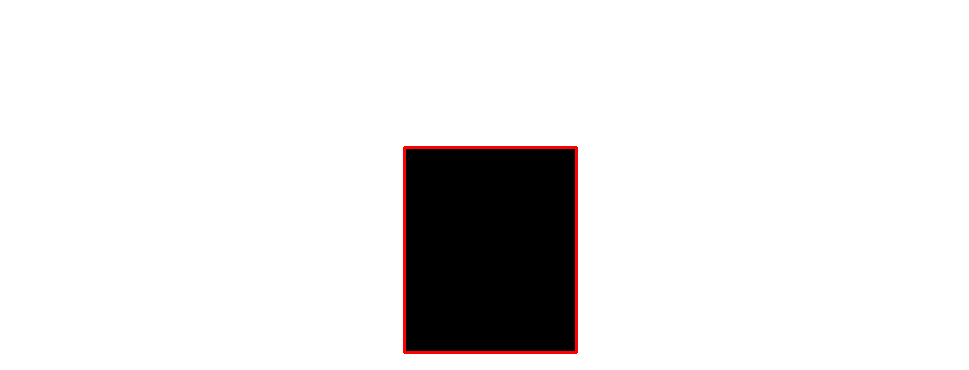

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


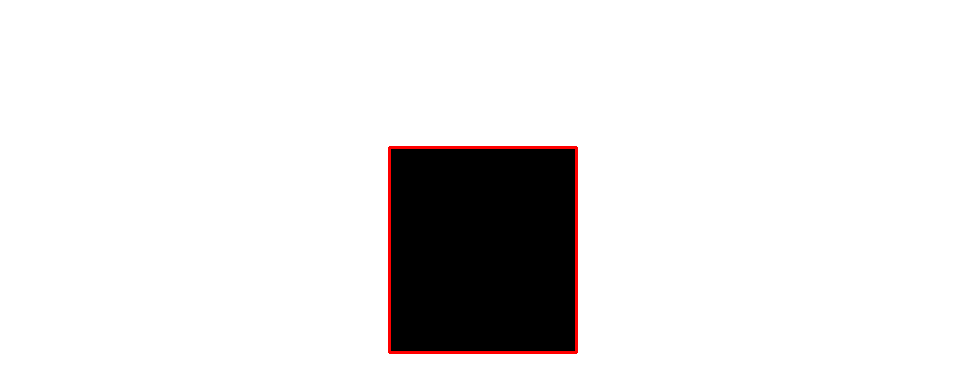

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


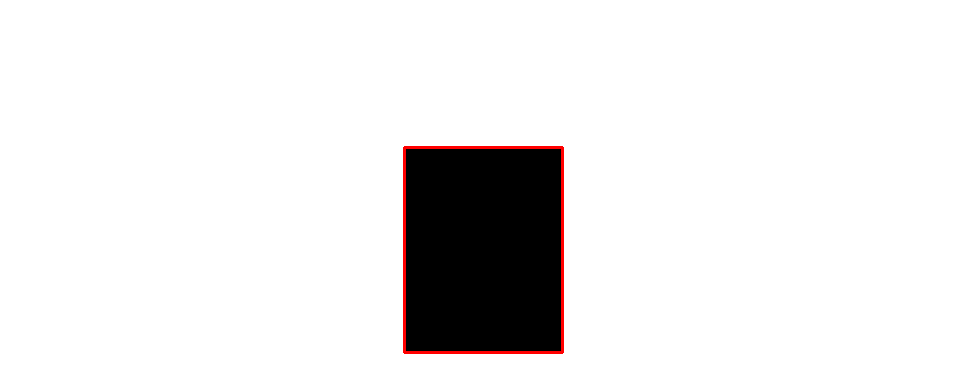

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


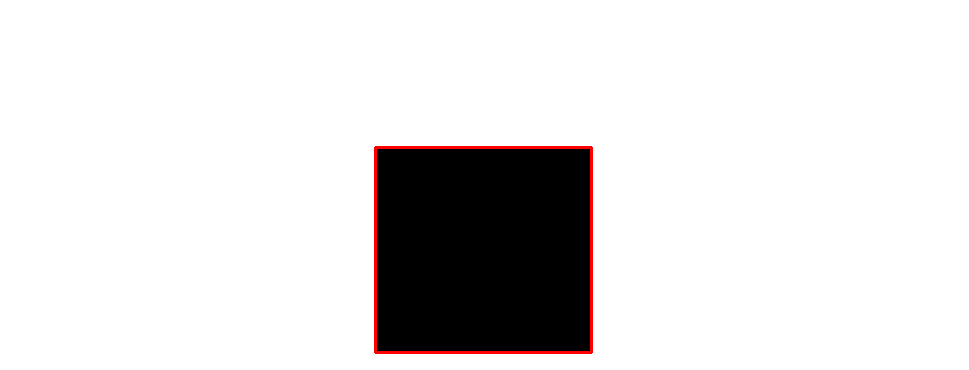

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


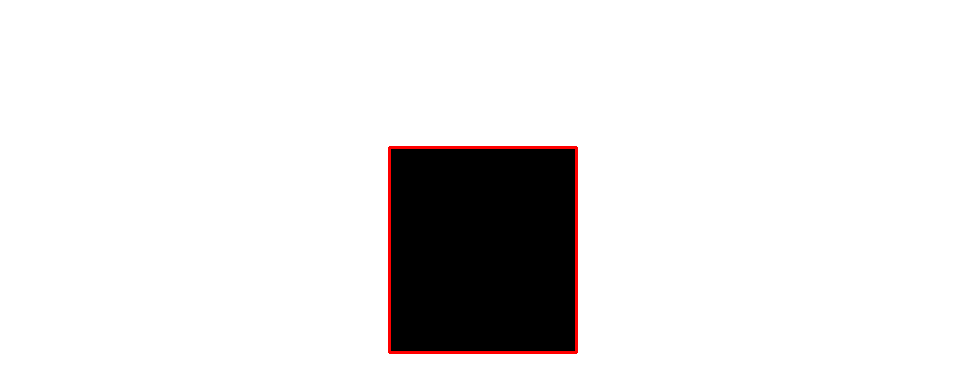

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

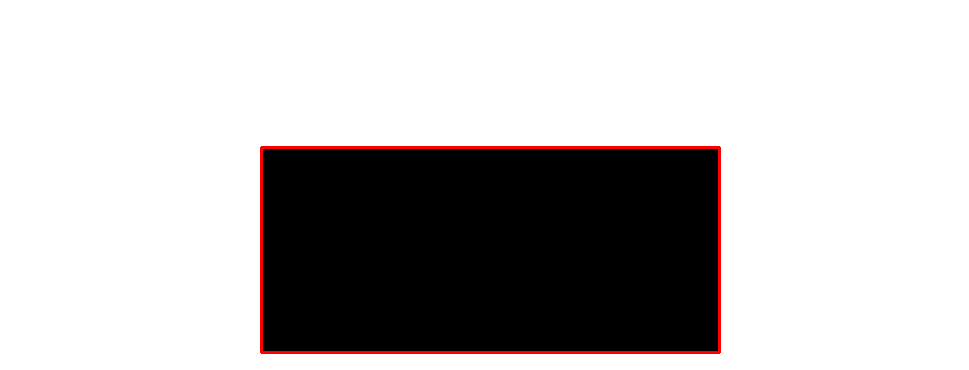

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


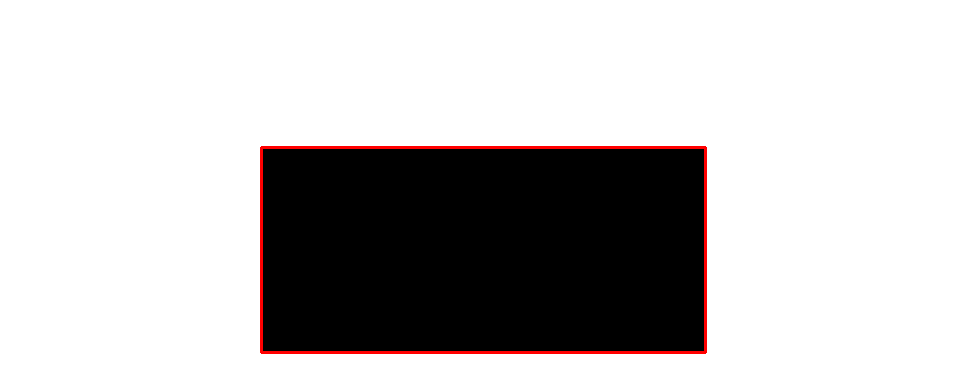

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


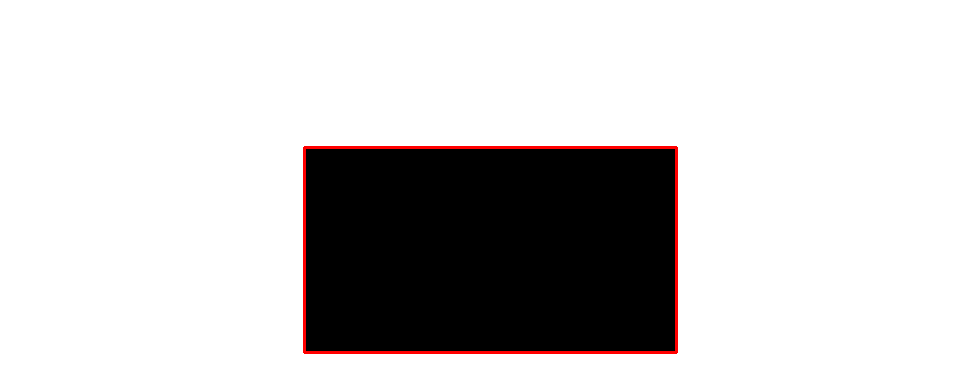

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


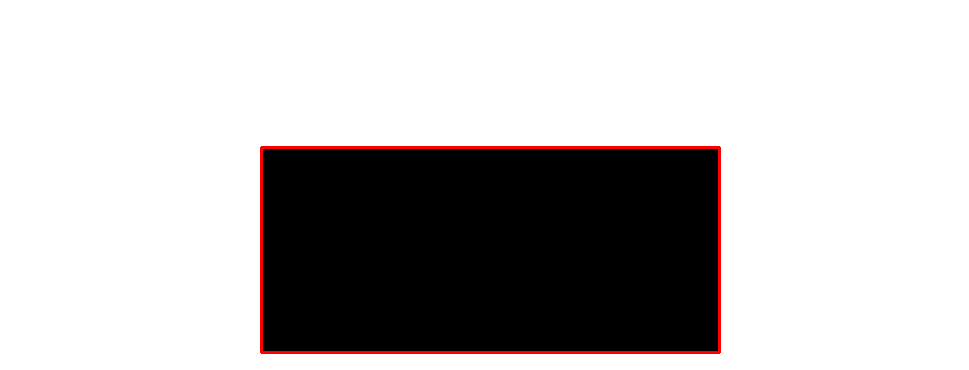

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


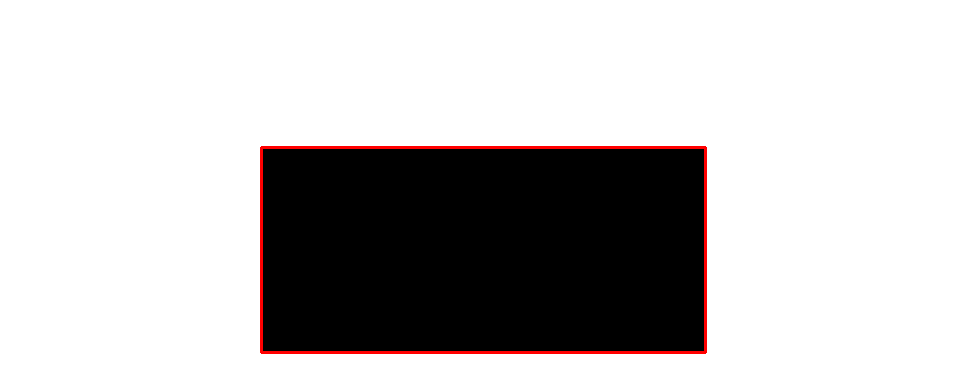

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


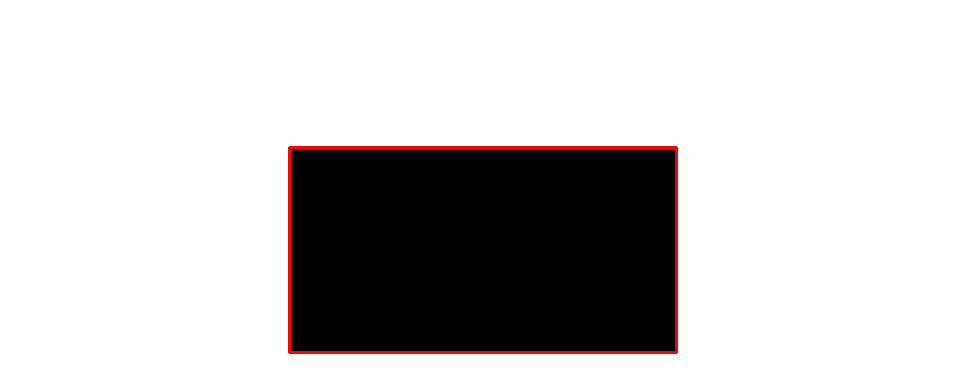

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


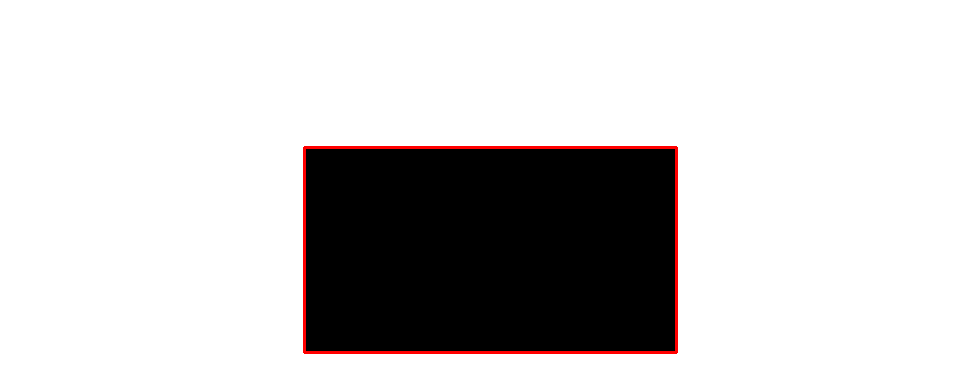

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


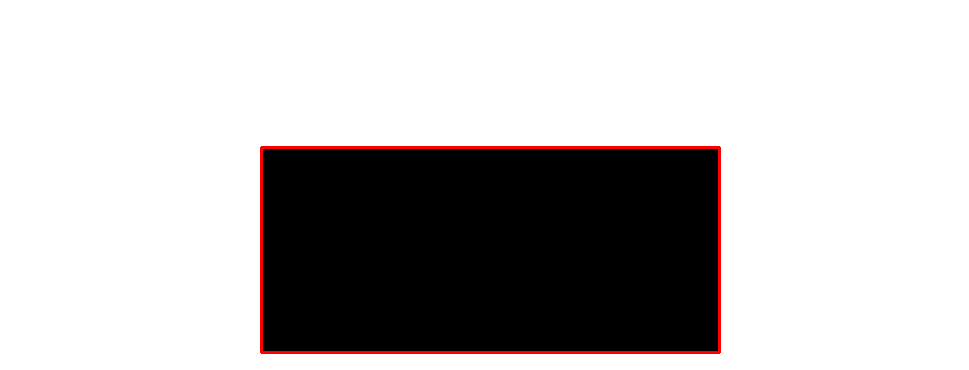

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


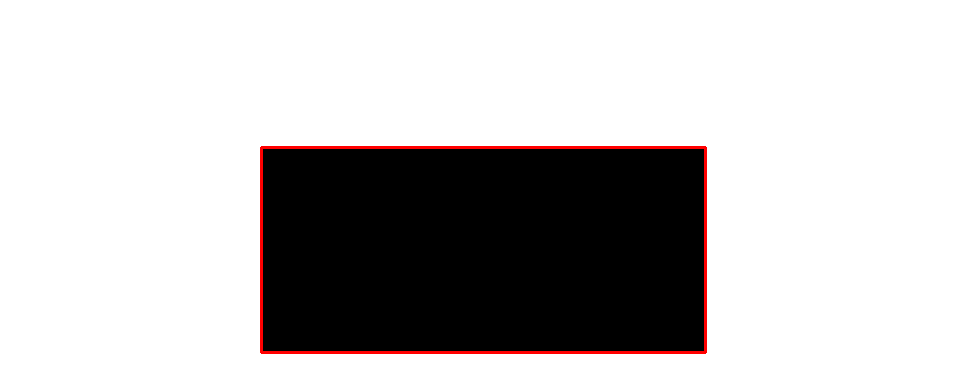

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


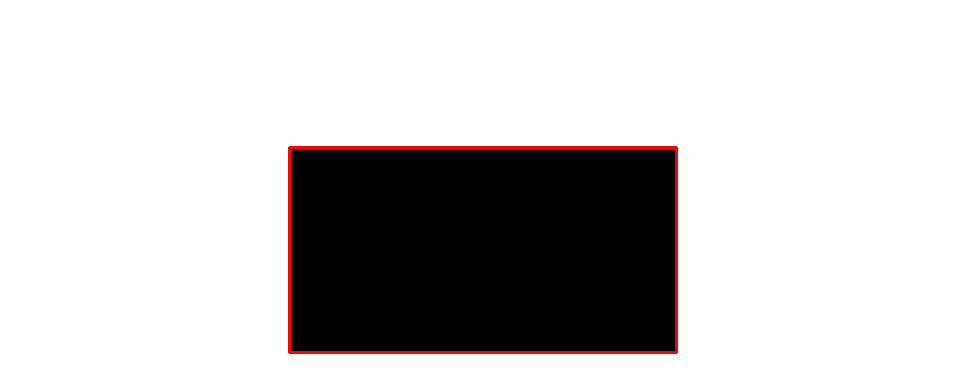

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


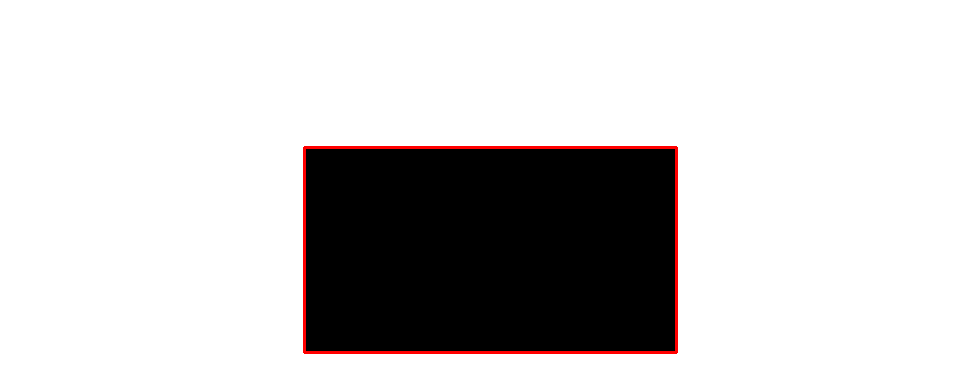

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


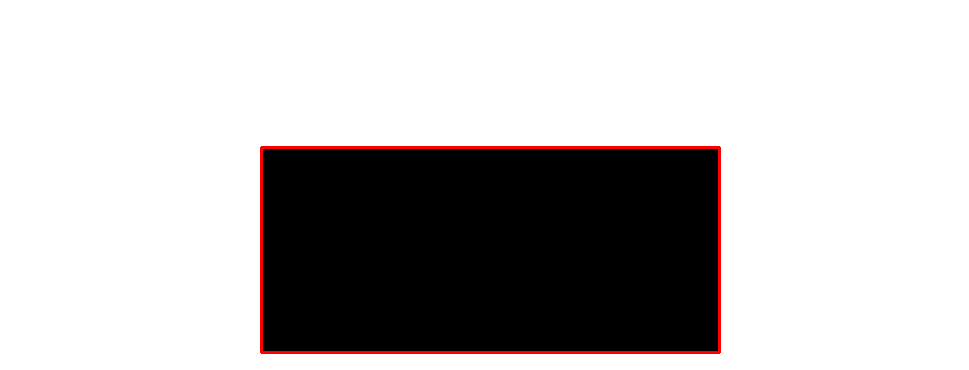

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


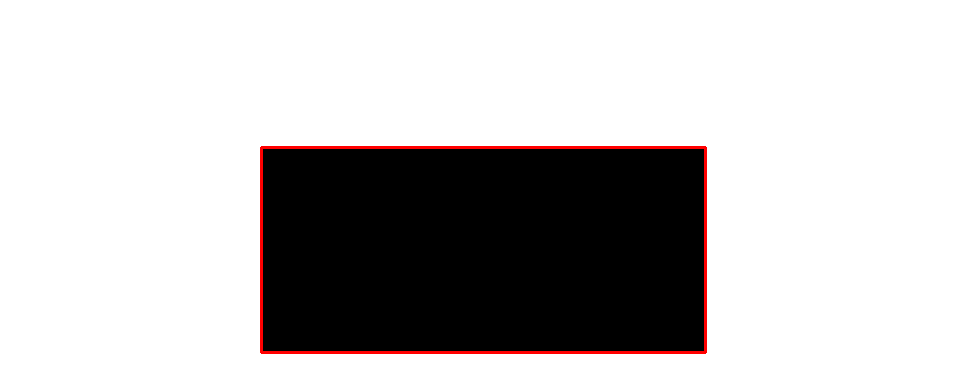

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


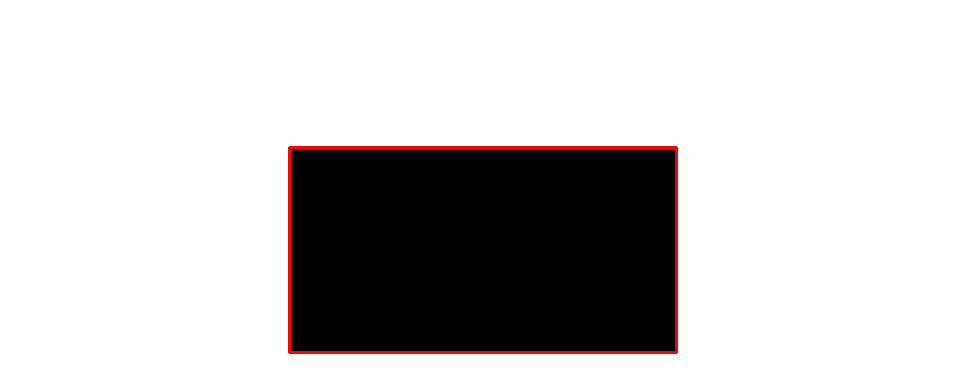

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


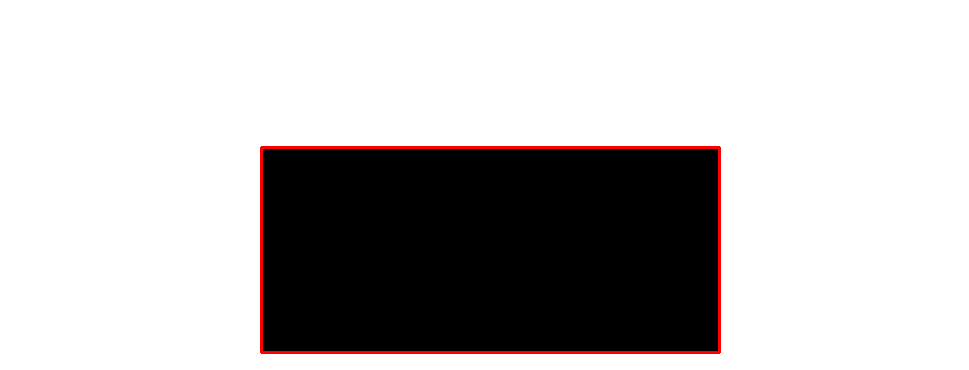

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


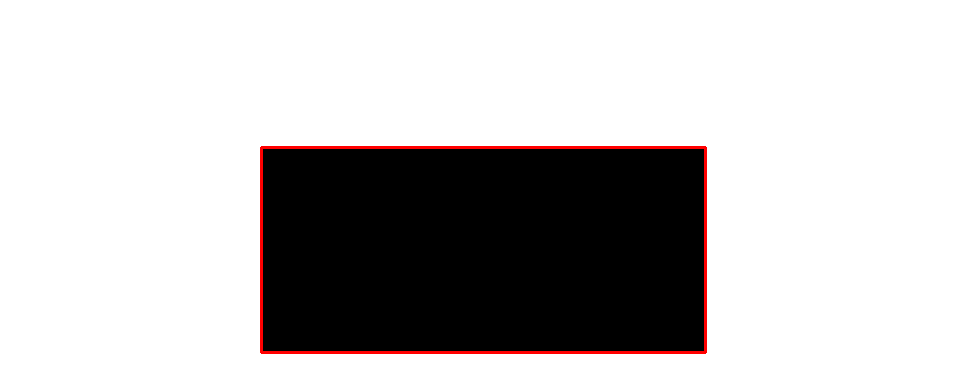

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


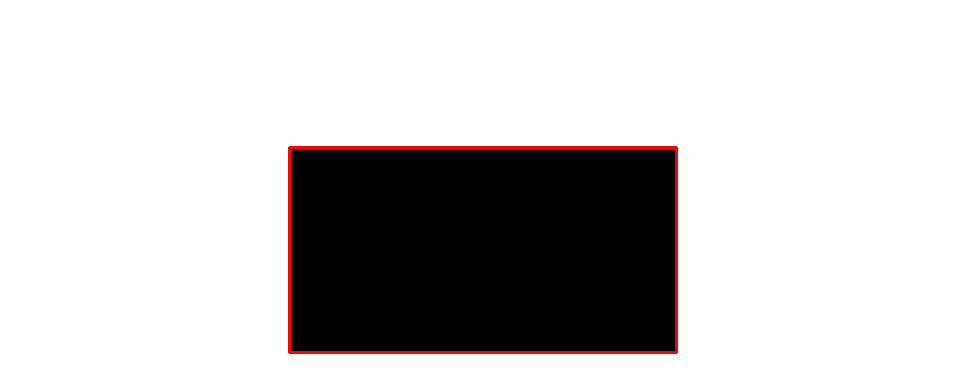

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


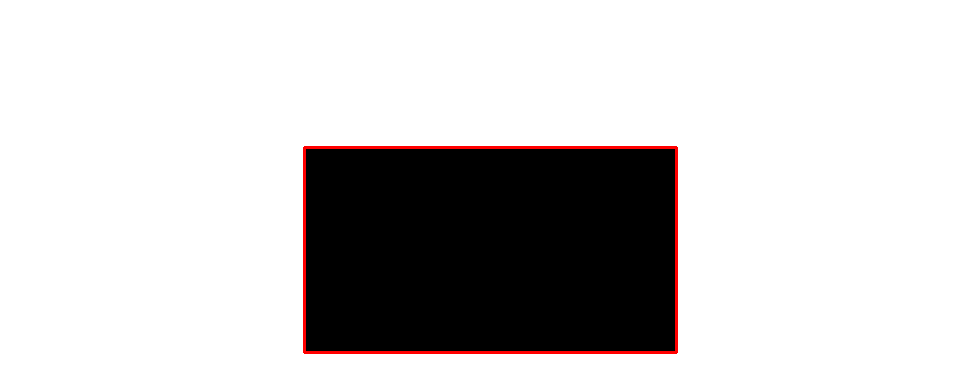

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


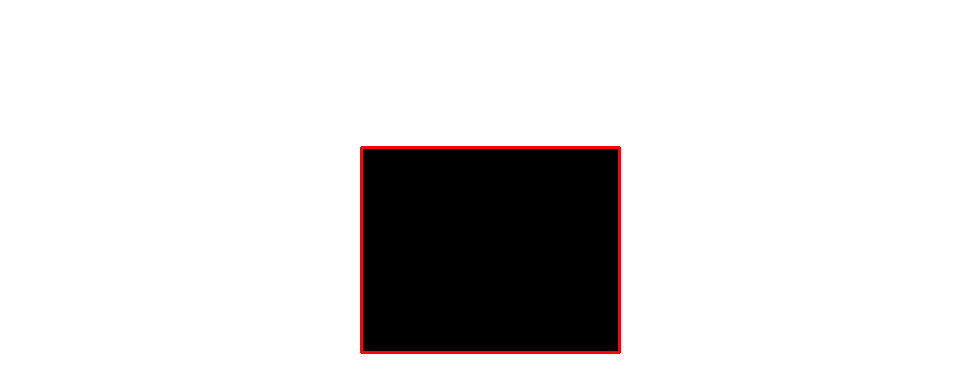

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


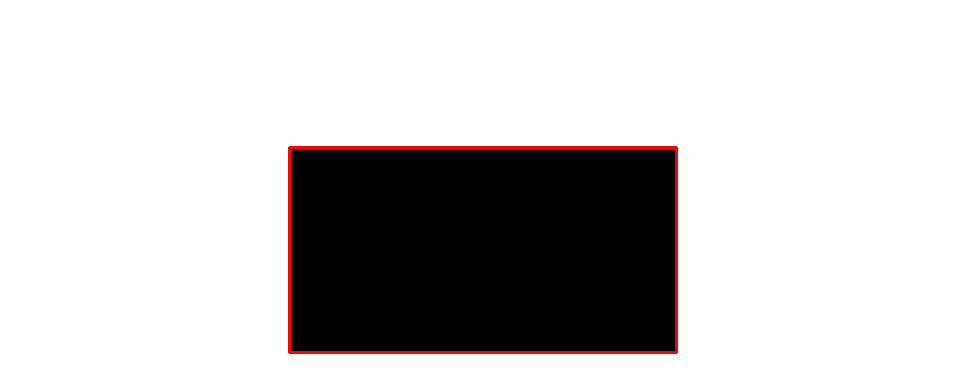

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


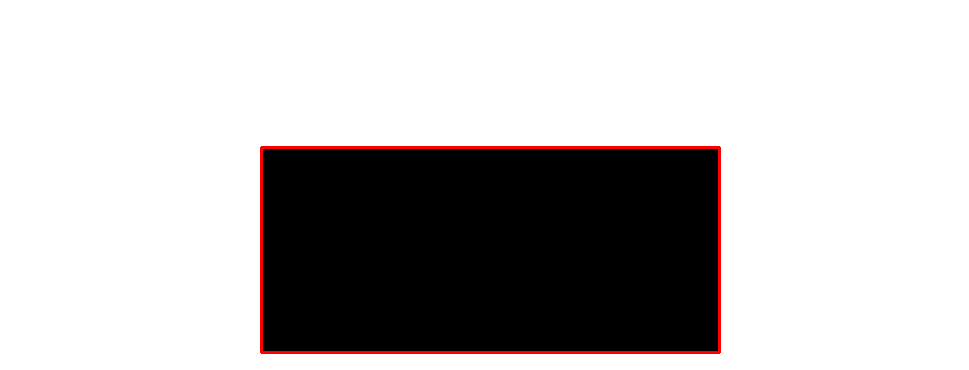

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


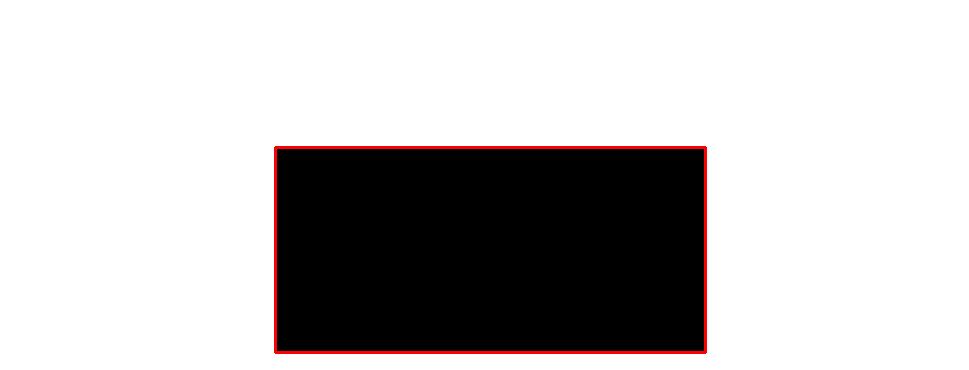

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


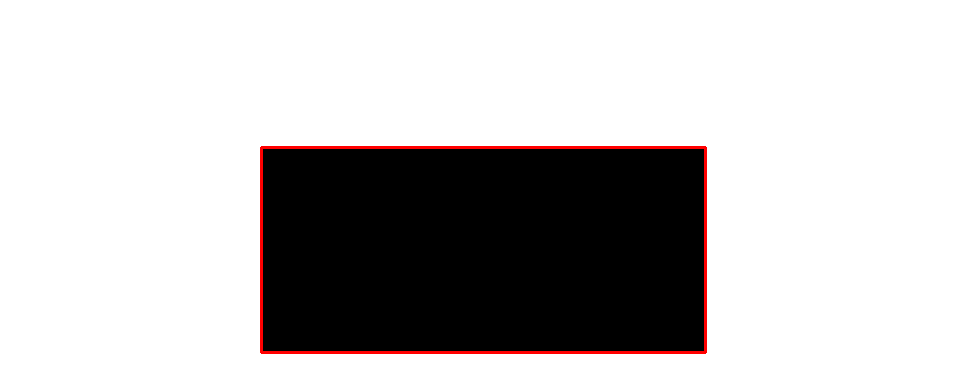

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


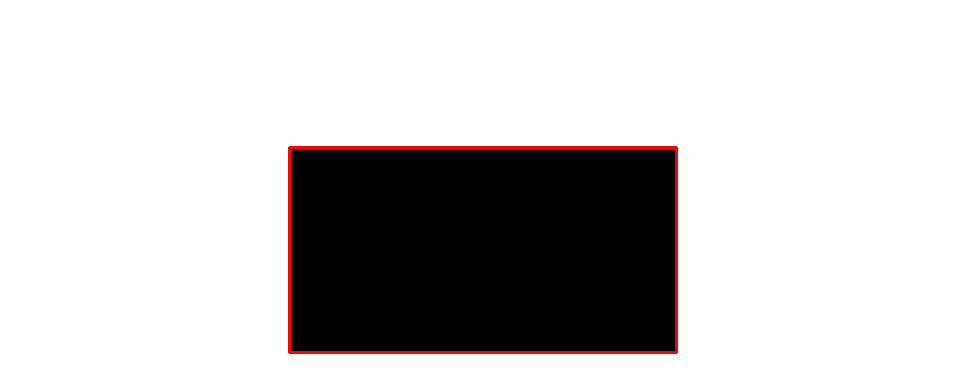

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


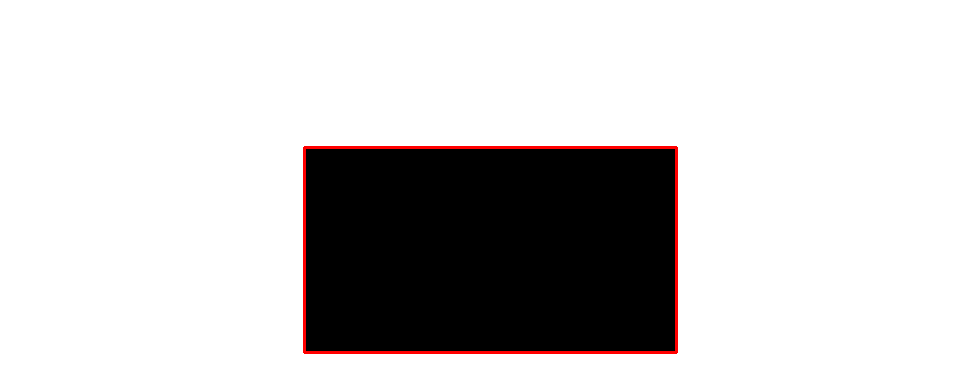

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


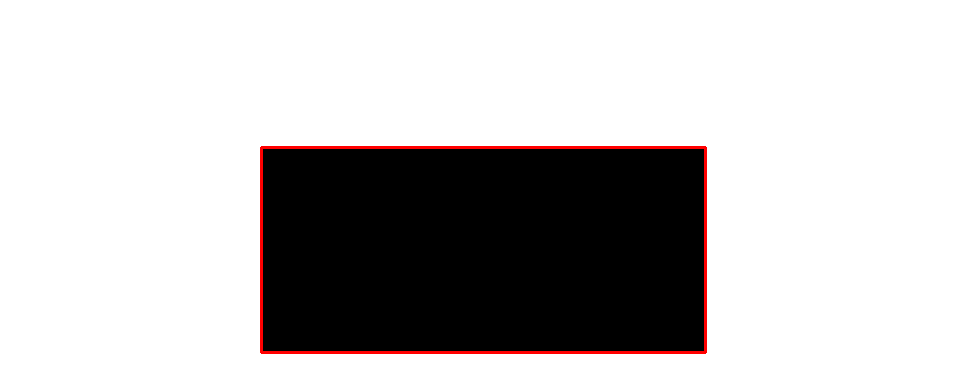

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


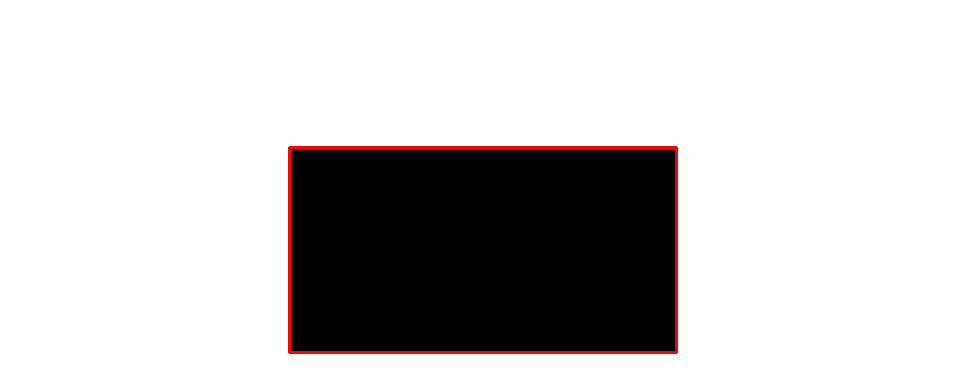

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


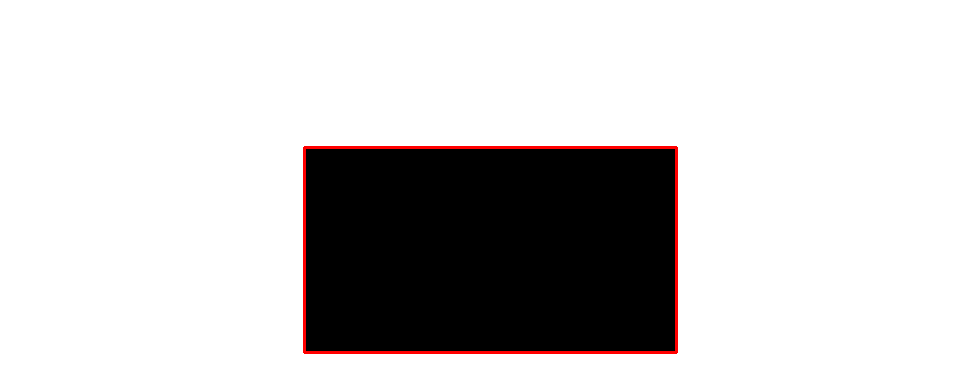

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


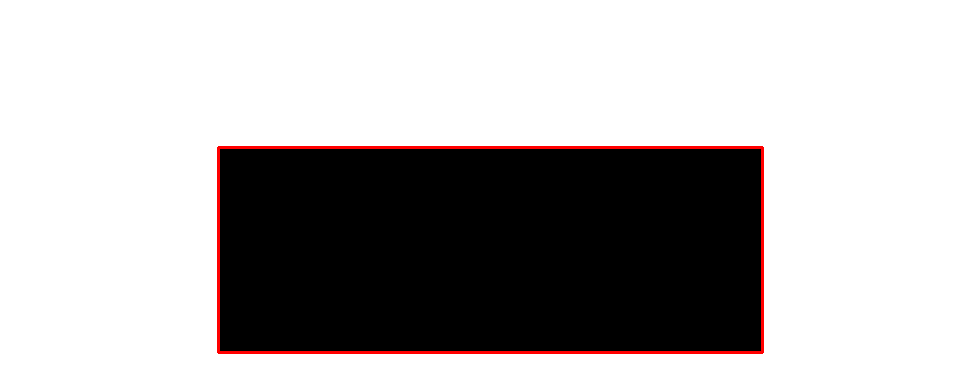

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


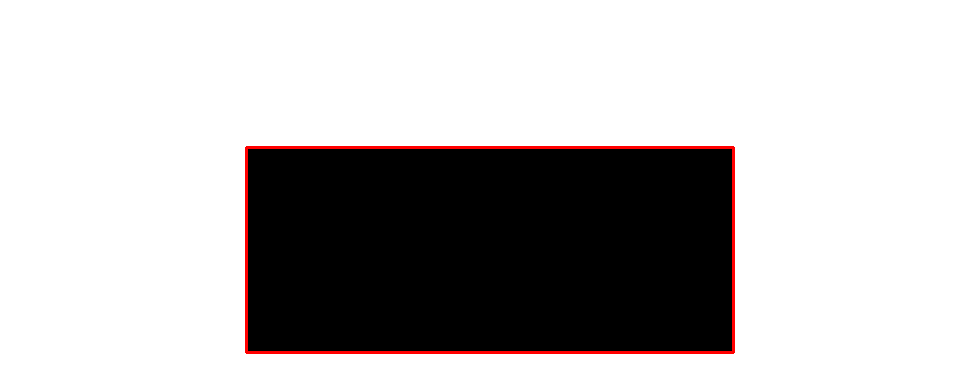

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


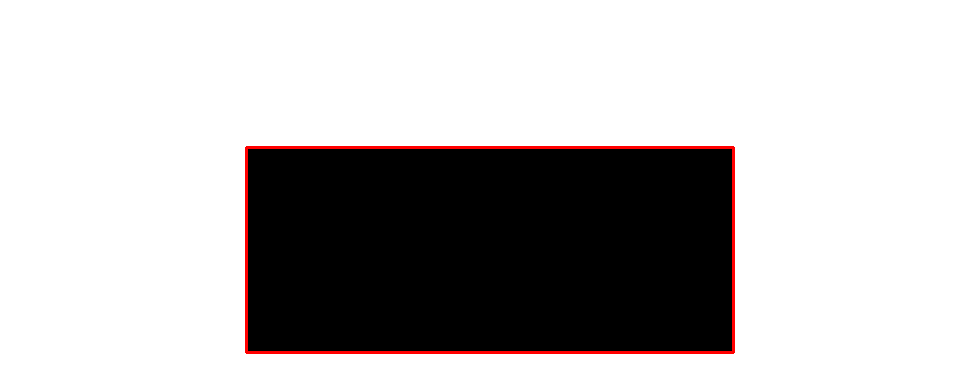

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


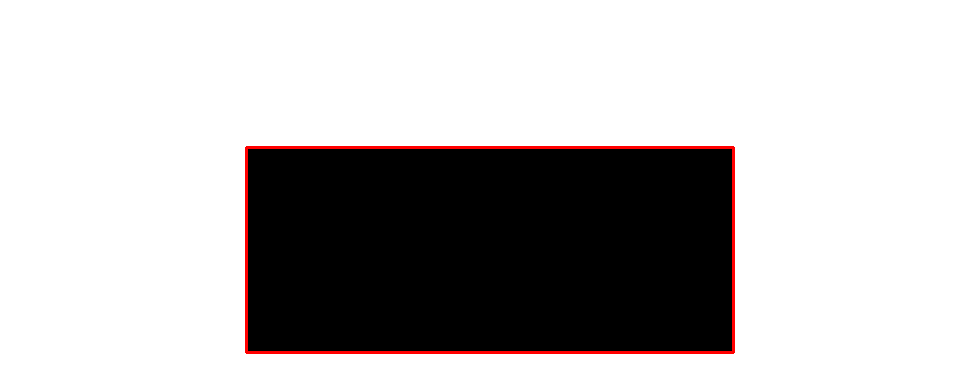

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


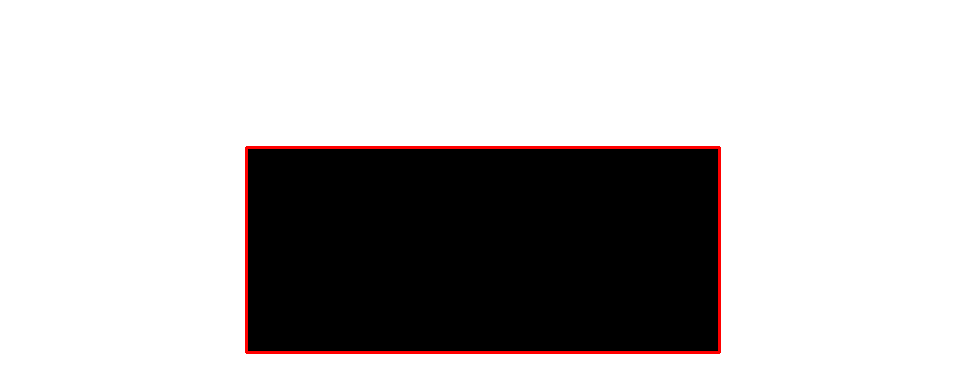

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


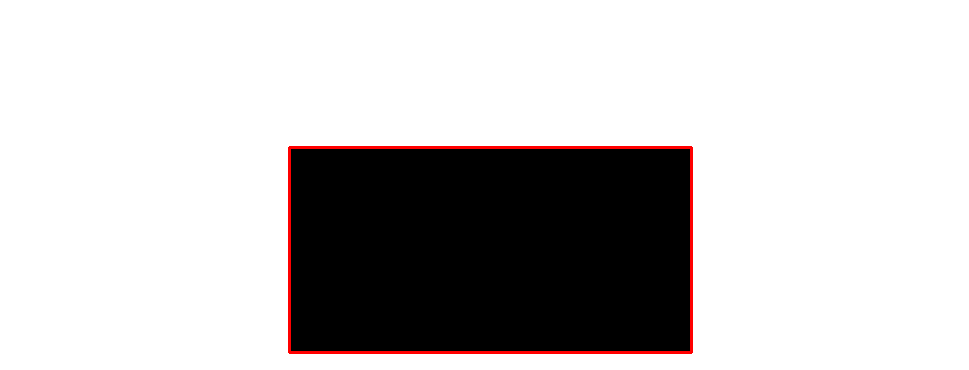

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


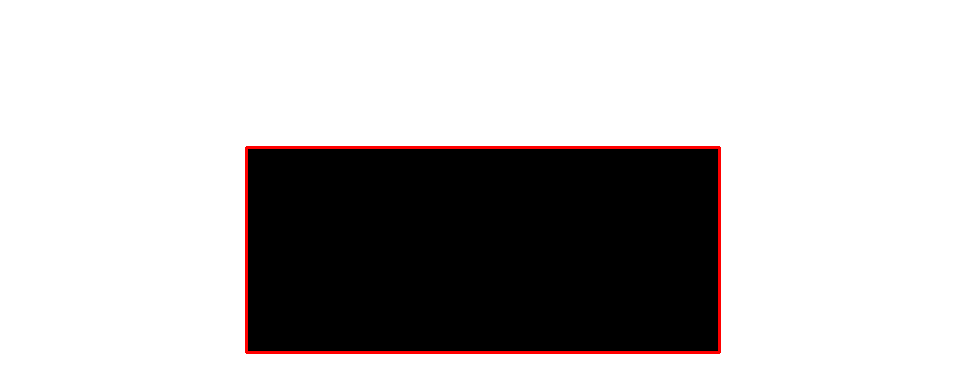

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


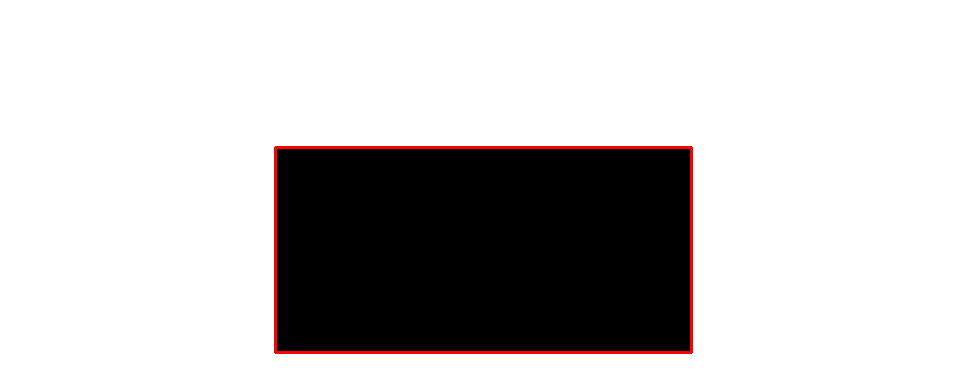

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


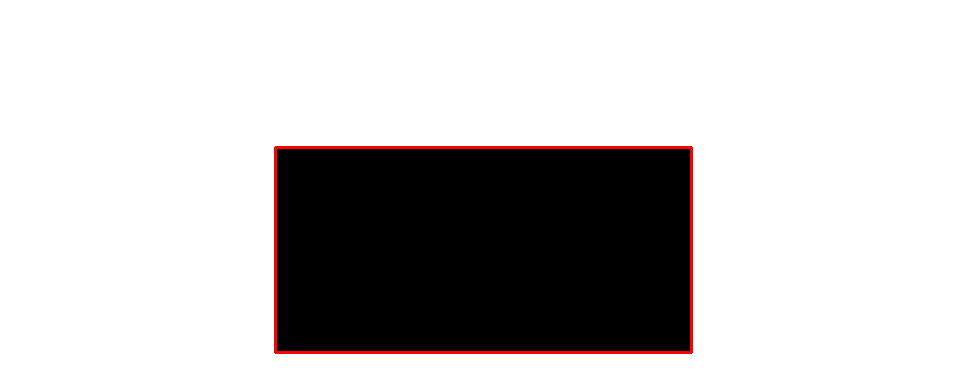

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


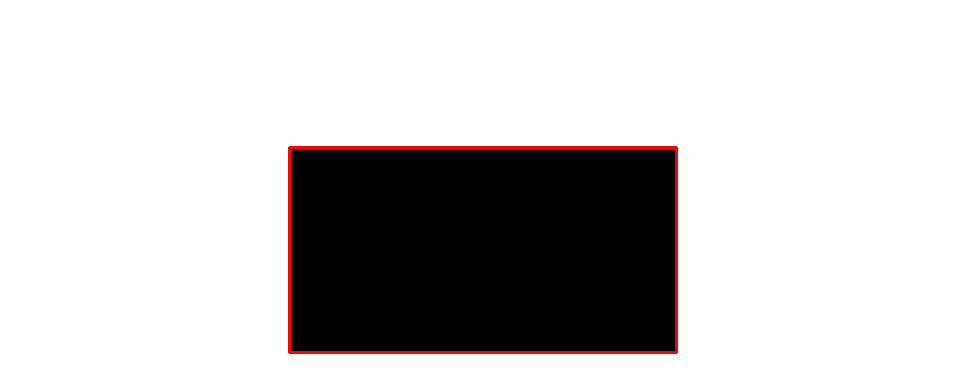

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


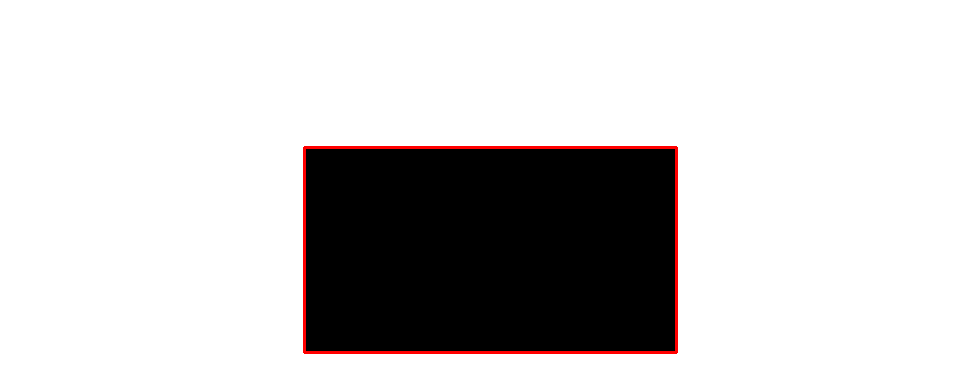

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


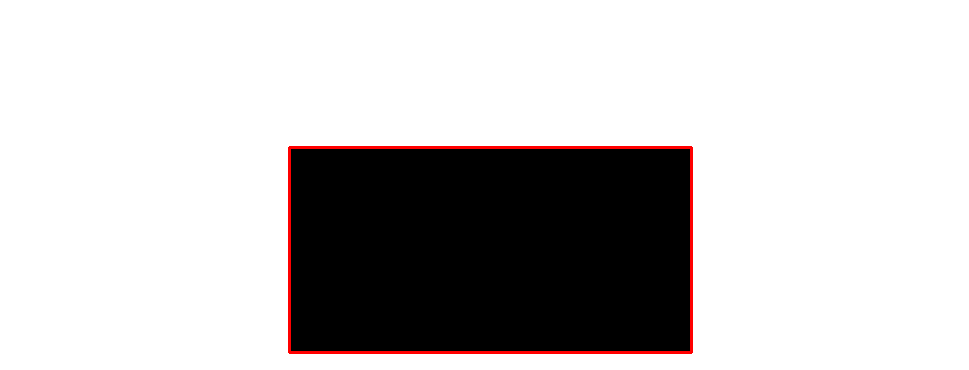

Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


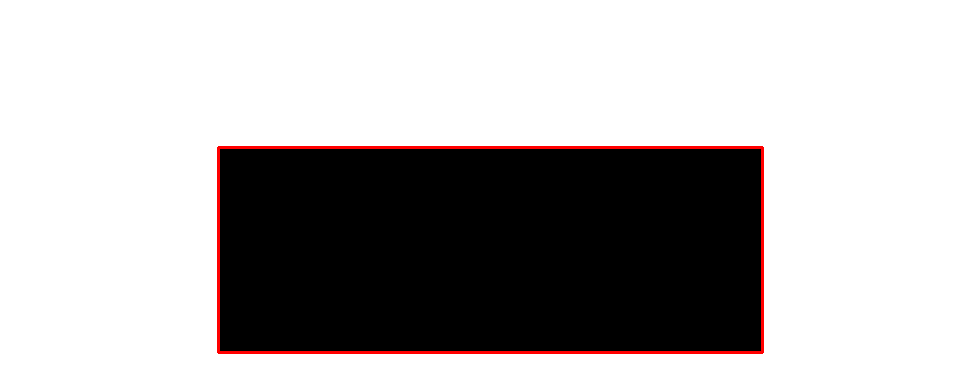

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


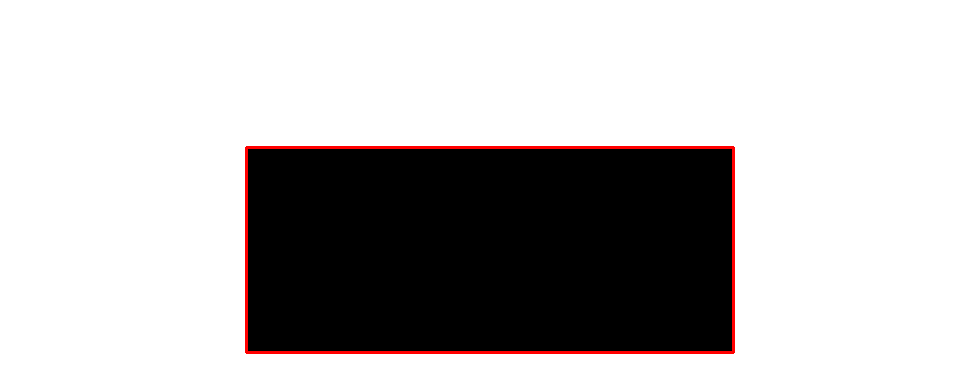

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


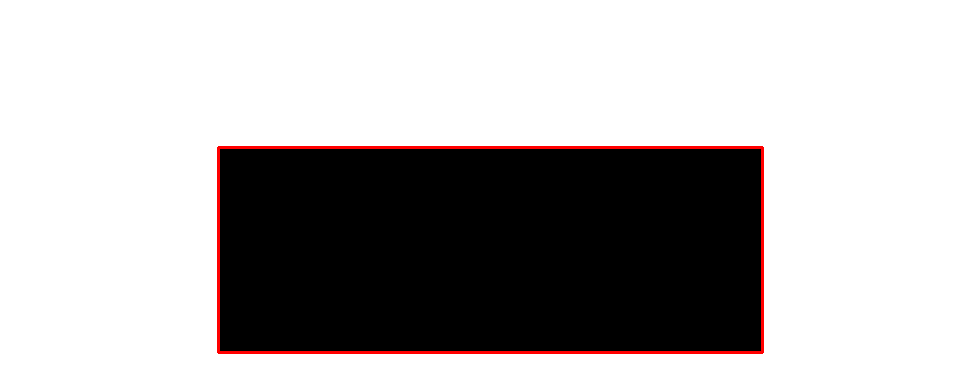

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


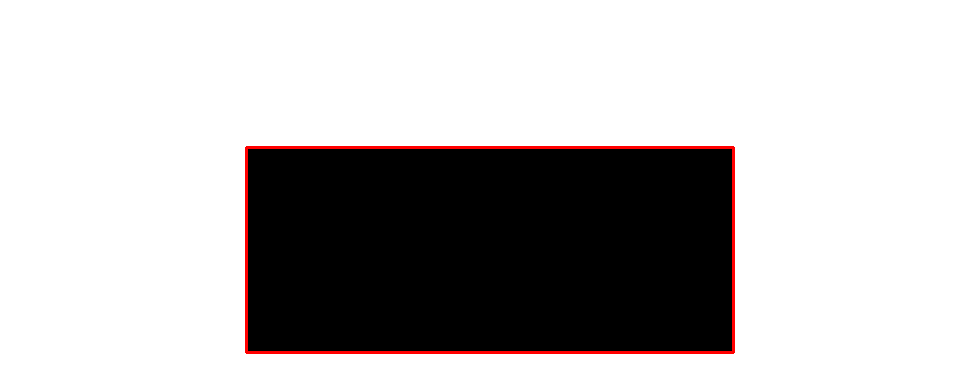

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


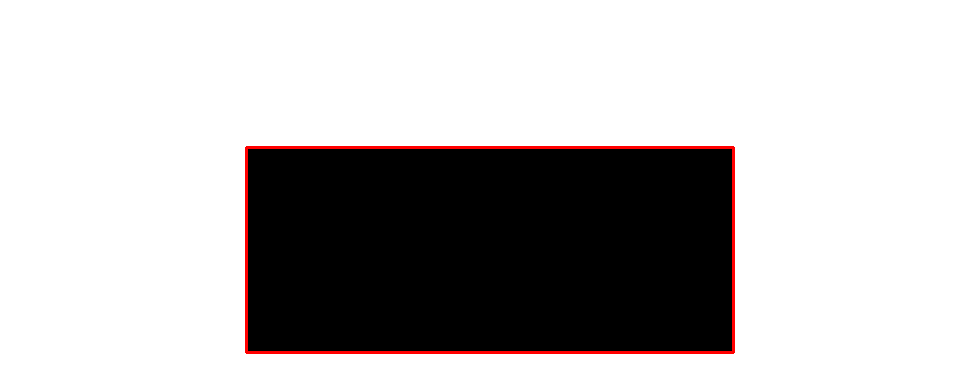

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


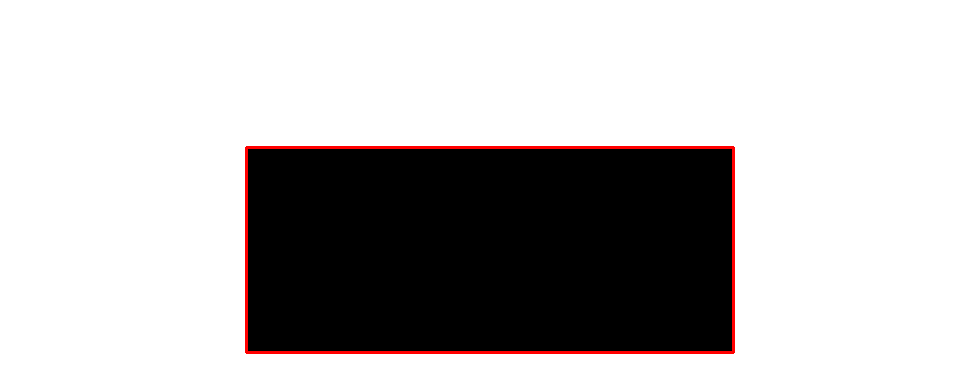

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


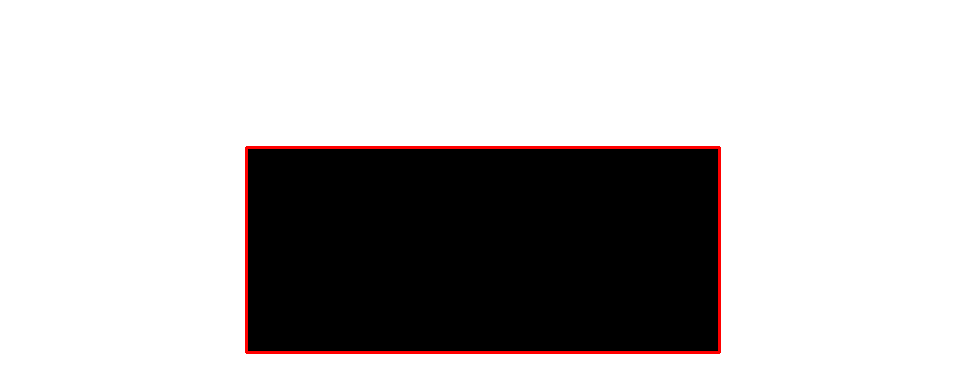

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


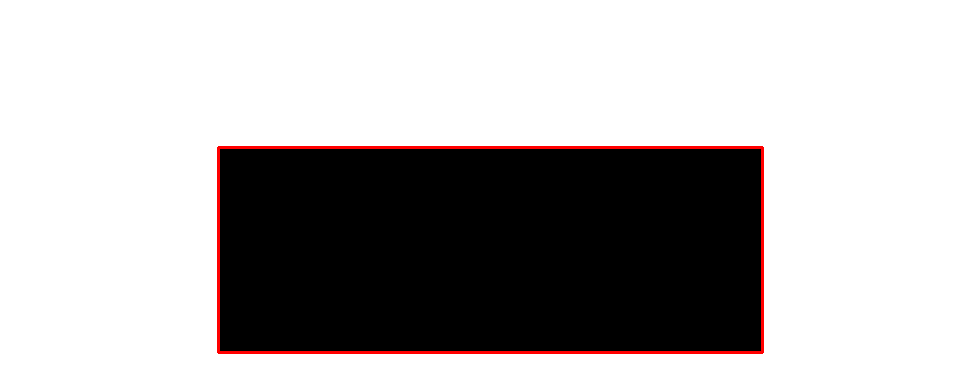

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


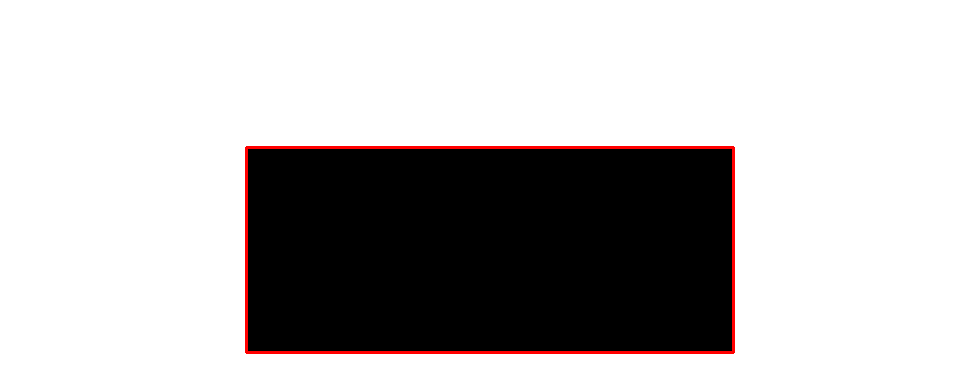

No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


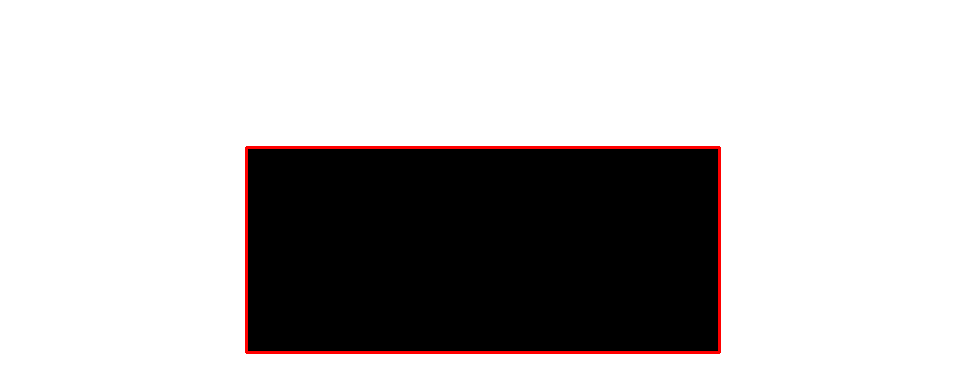

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


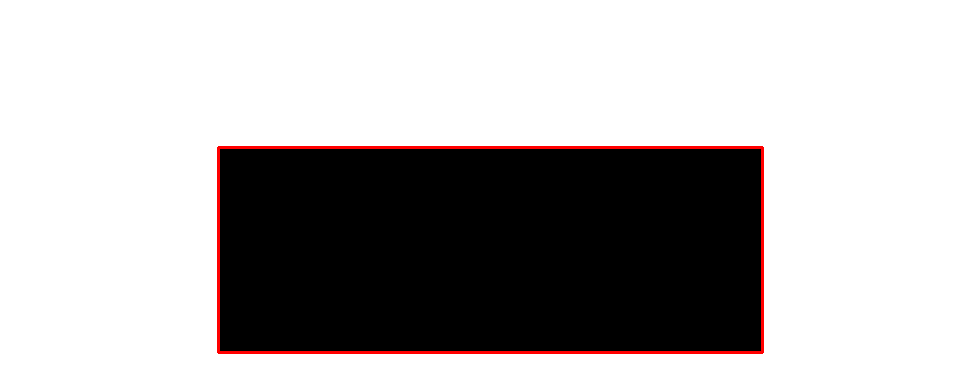

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


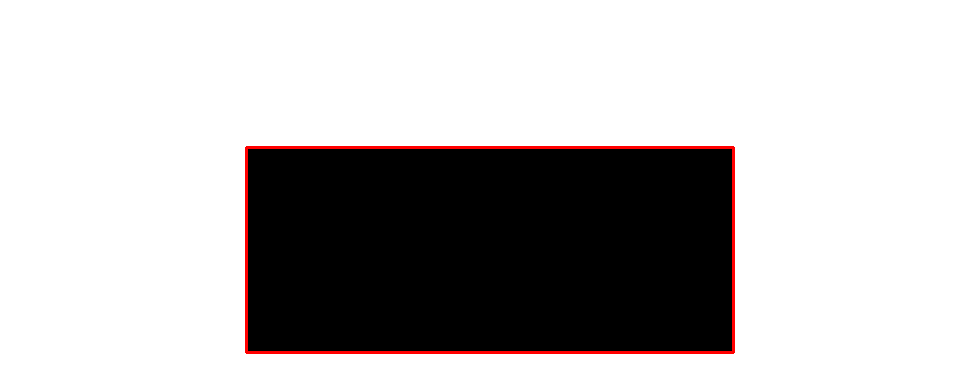

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


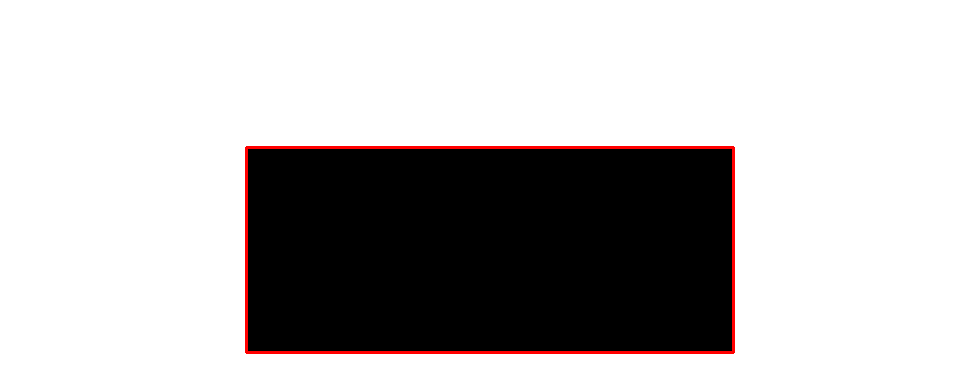

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


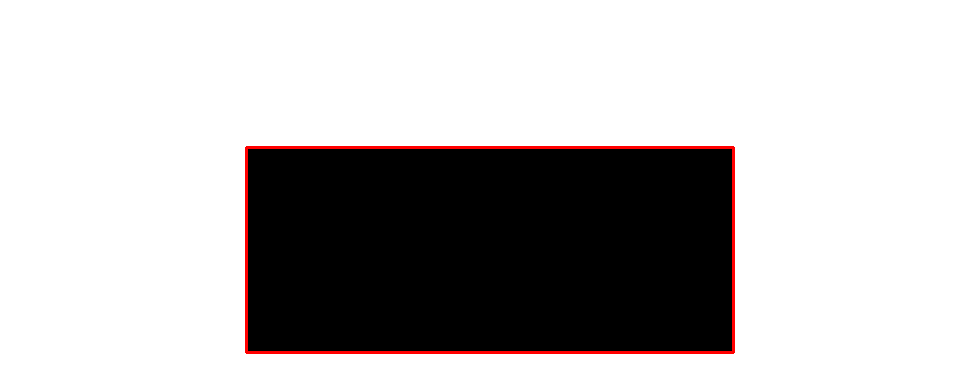

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


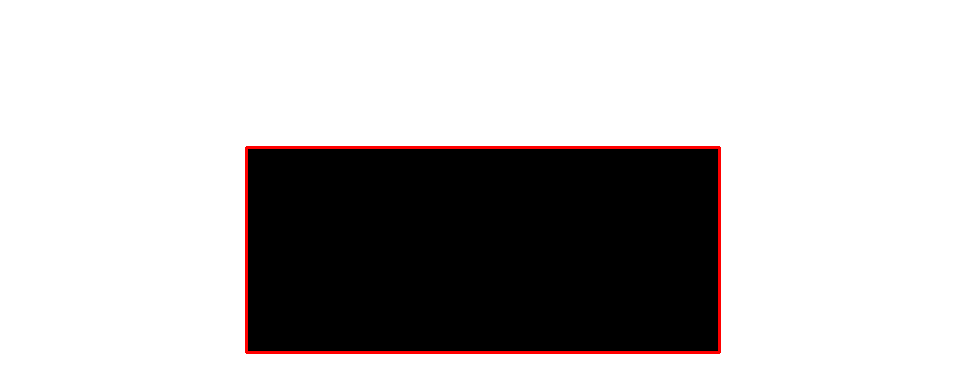

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


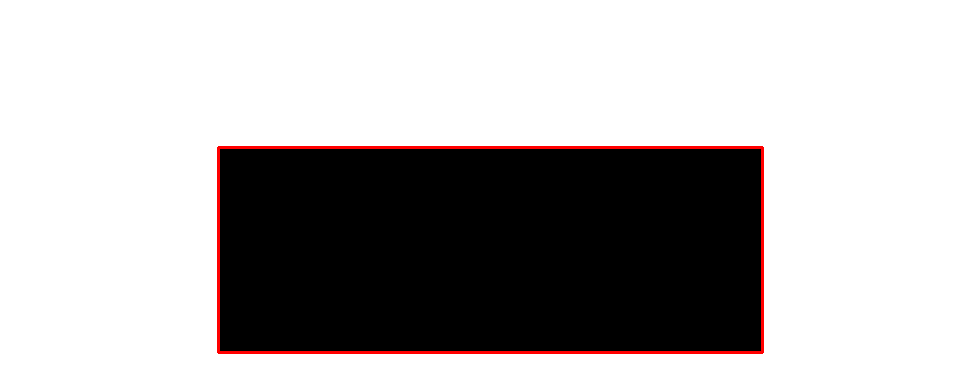

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


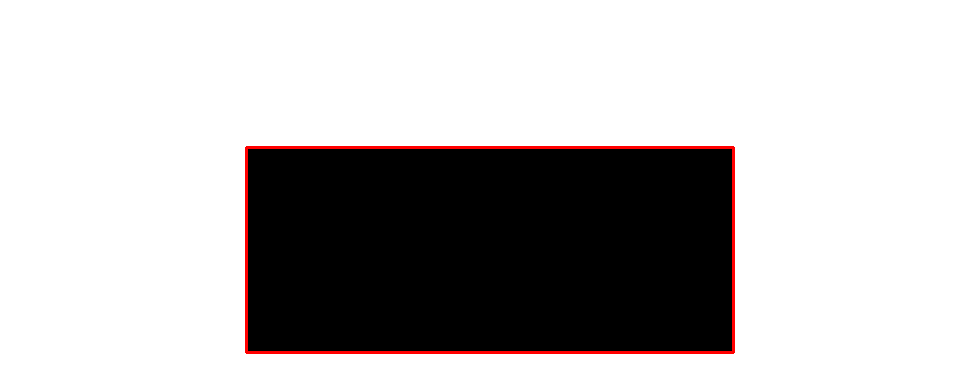

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


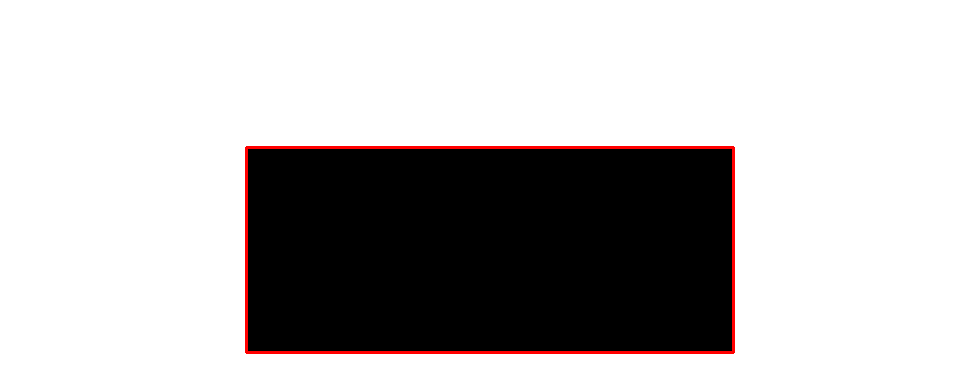

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


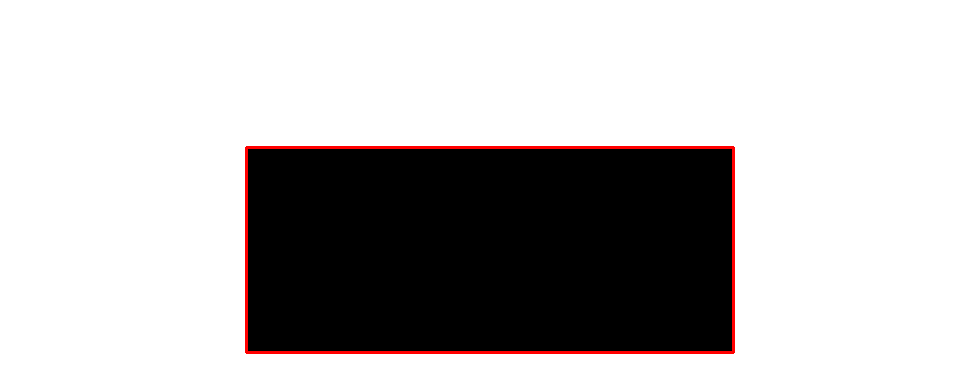

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


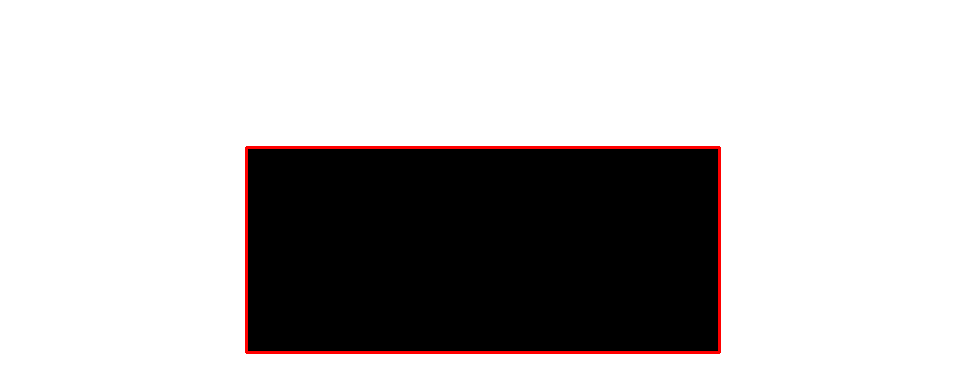

No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


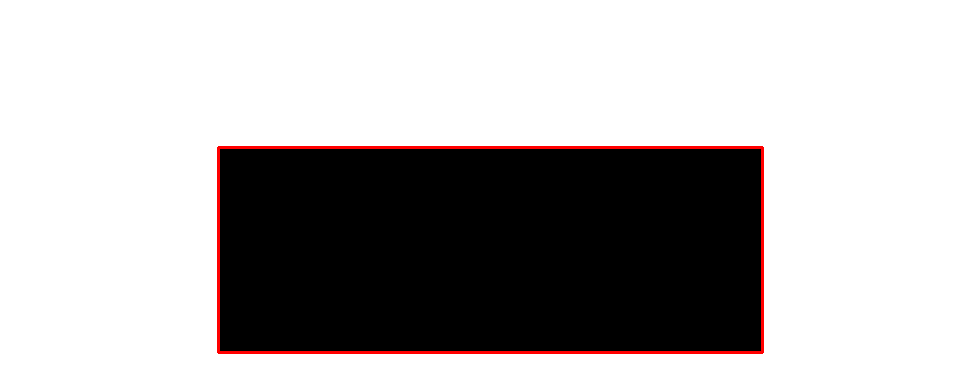

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


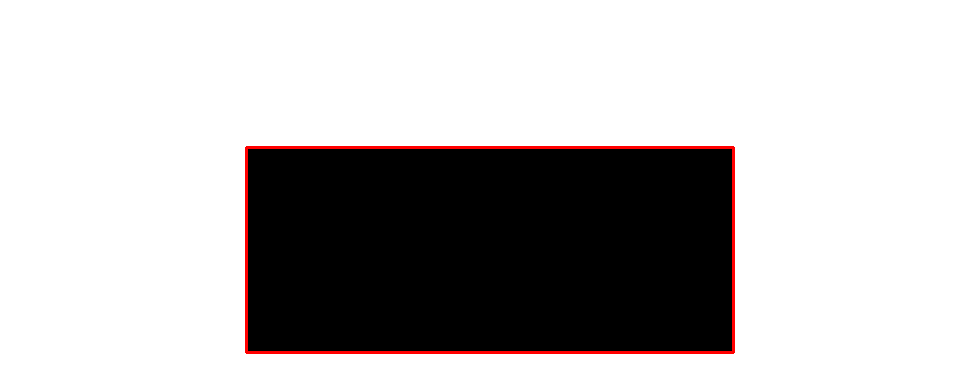

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


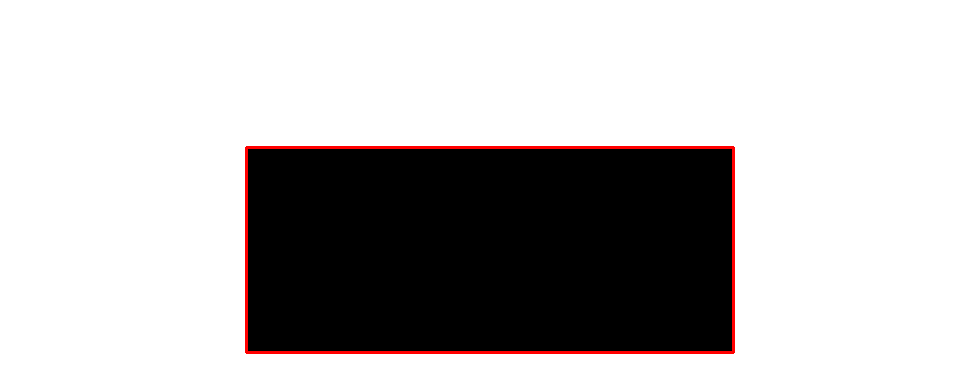

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


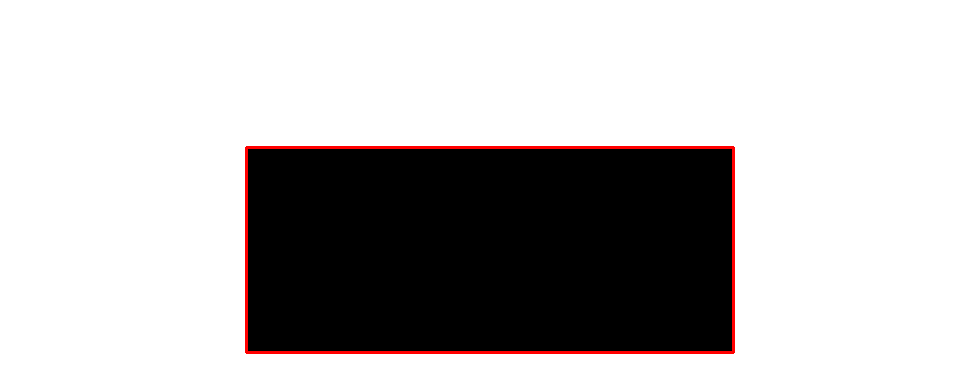

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


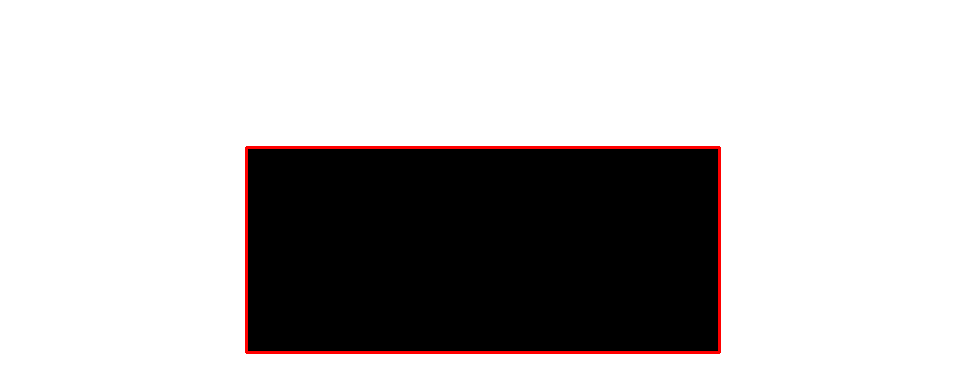

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


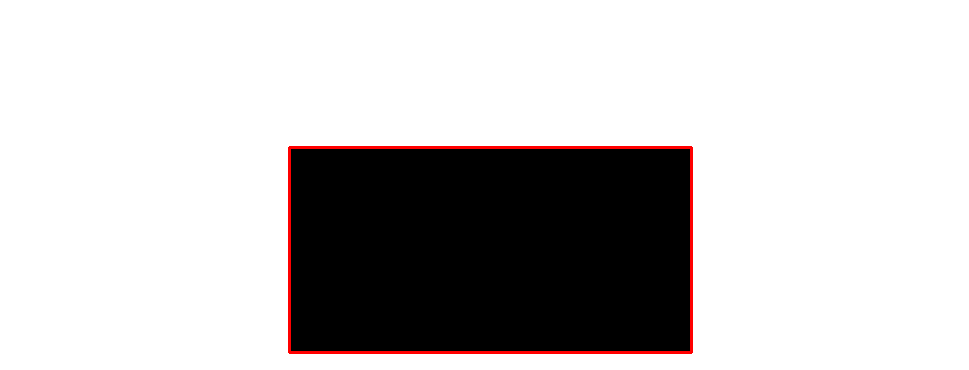

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


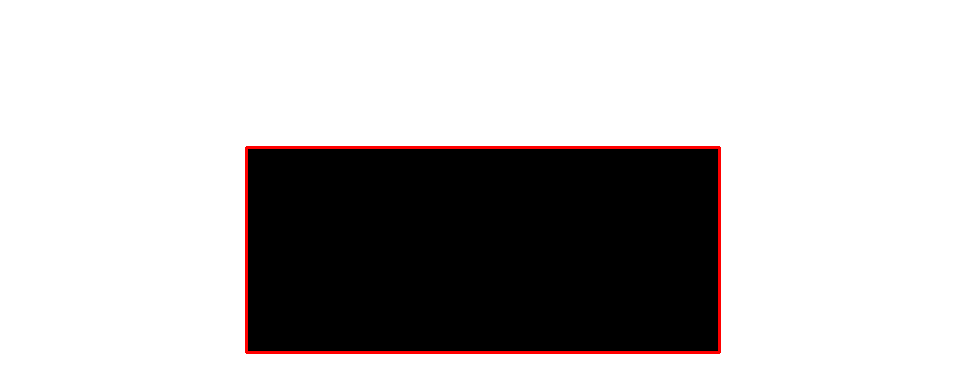

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


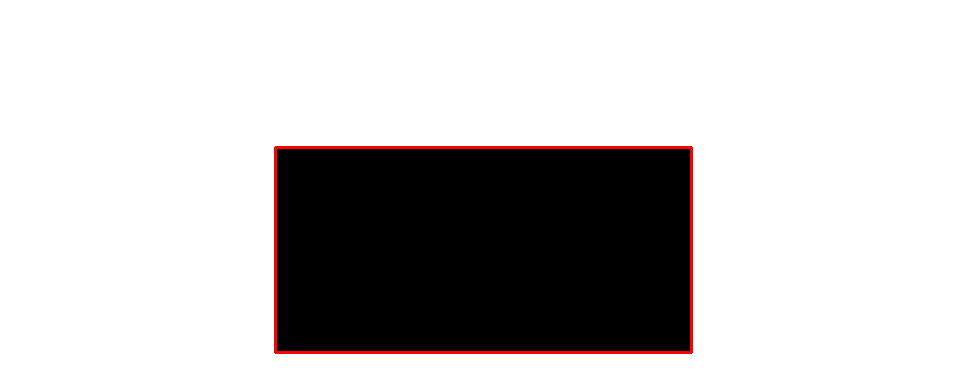

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


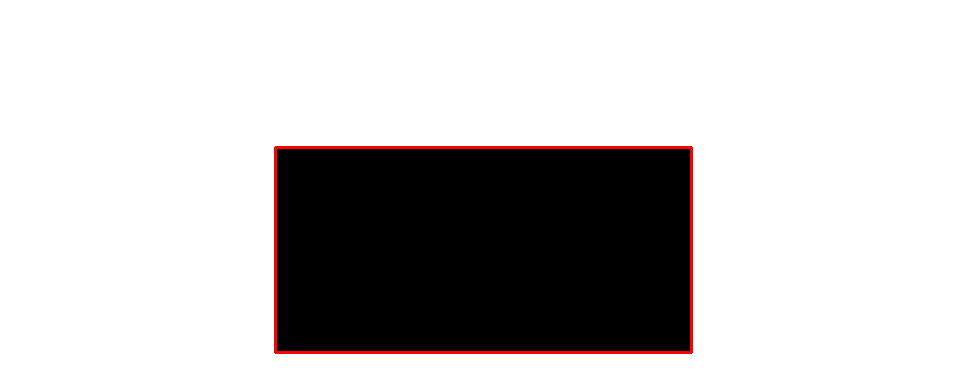

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


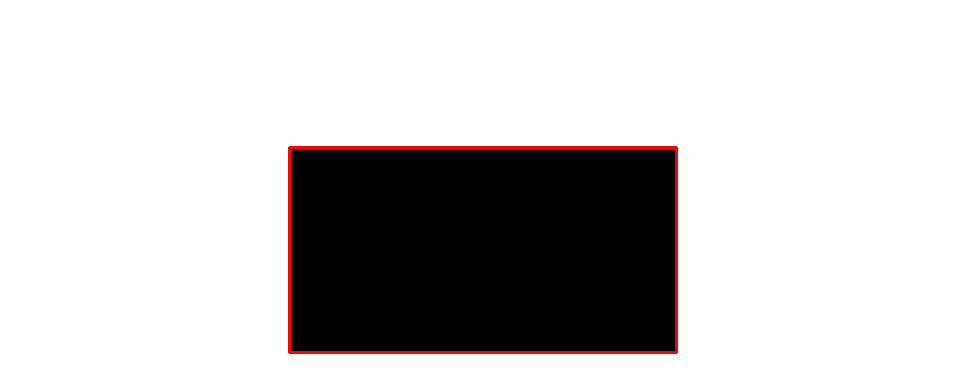

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


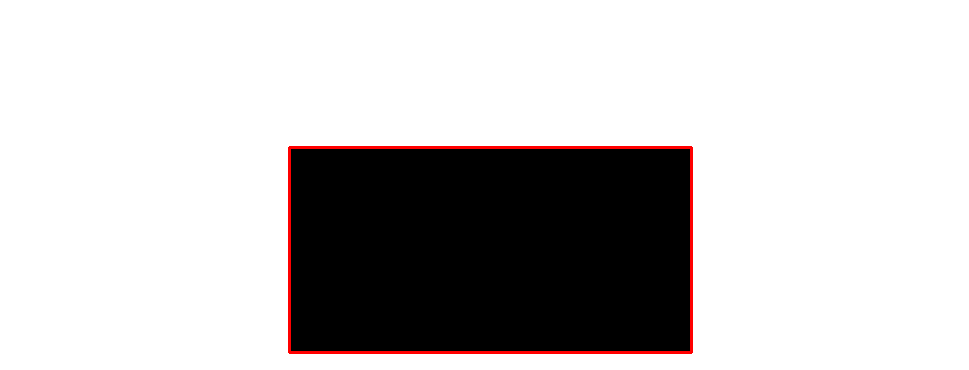

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


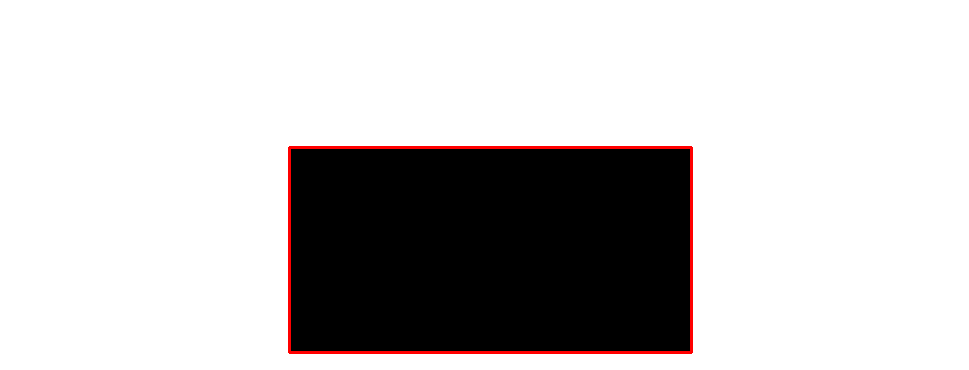

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


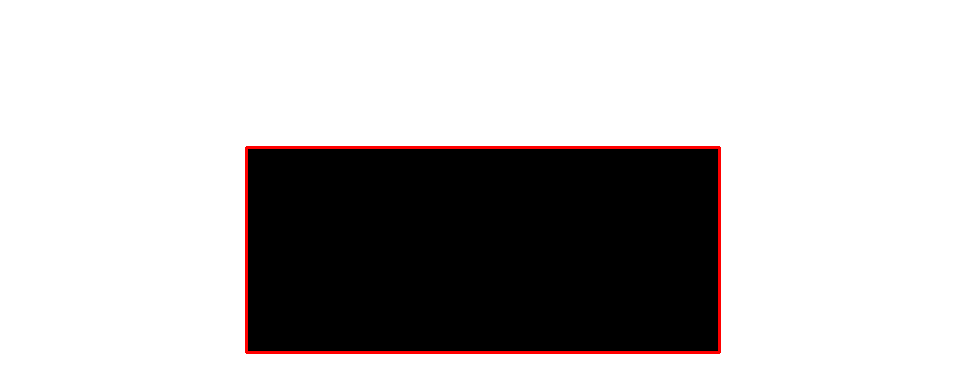

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


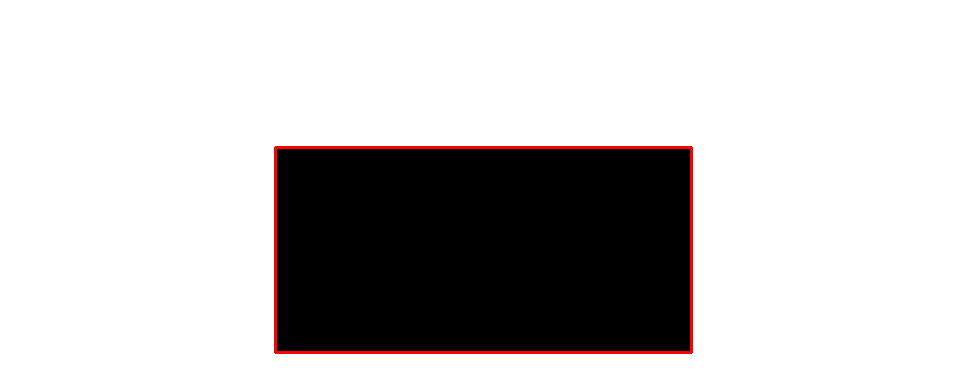

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


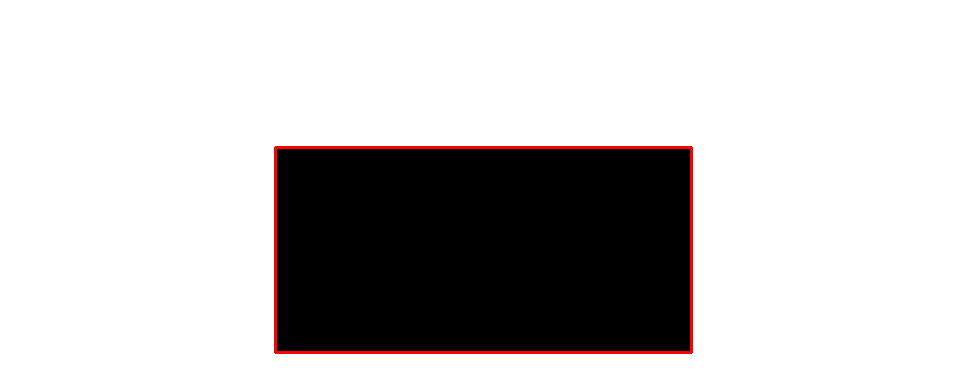

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


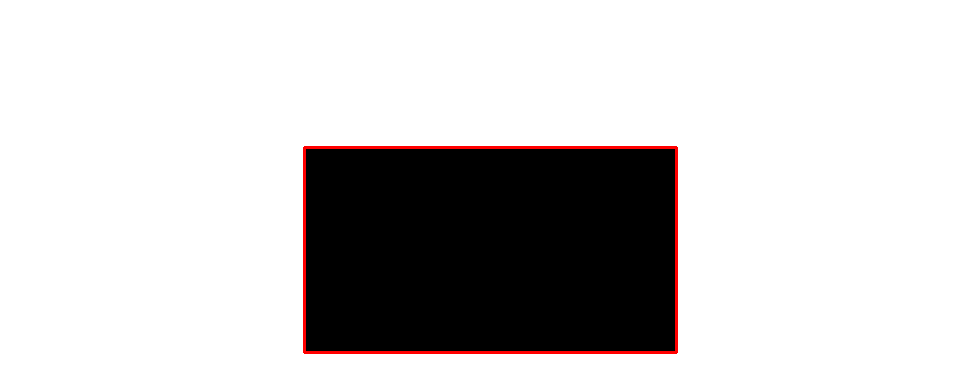

No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


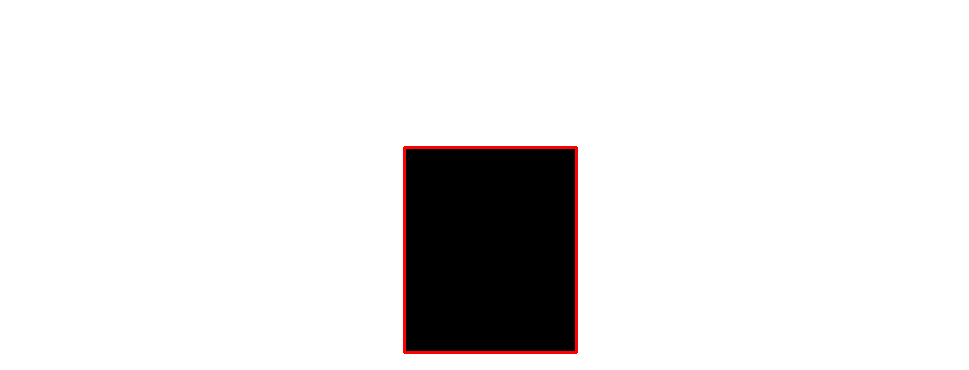

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


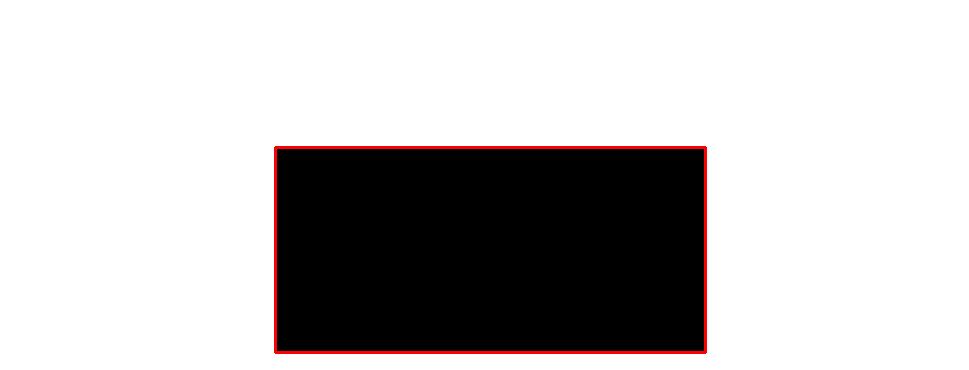

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


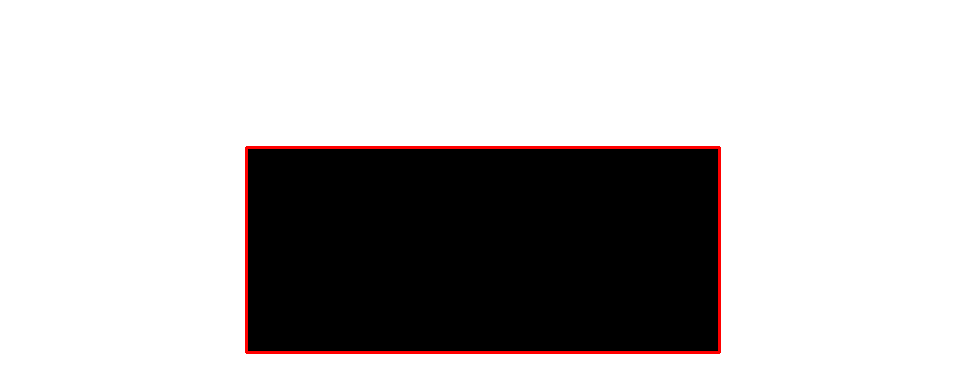

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


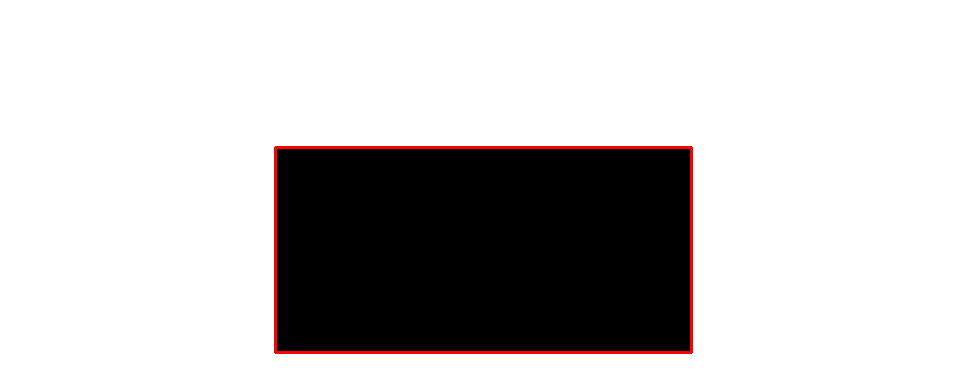

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


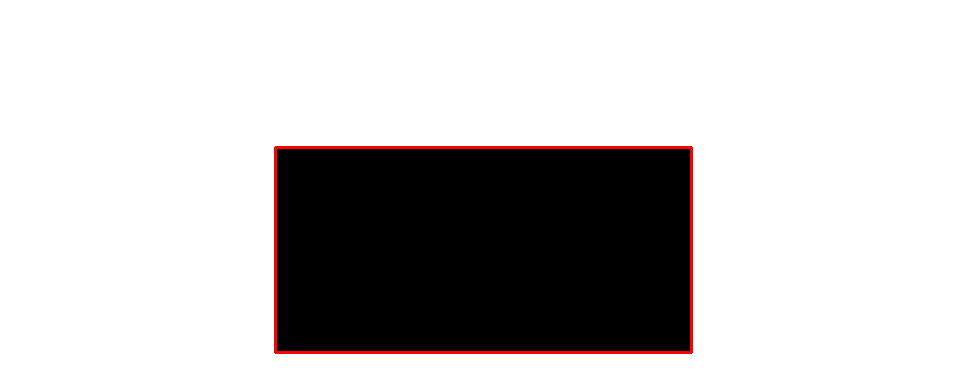

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


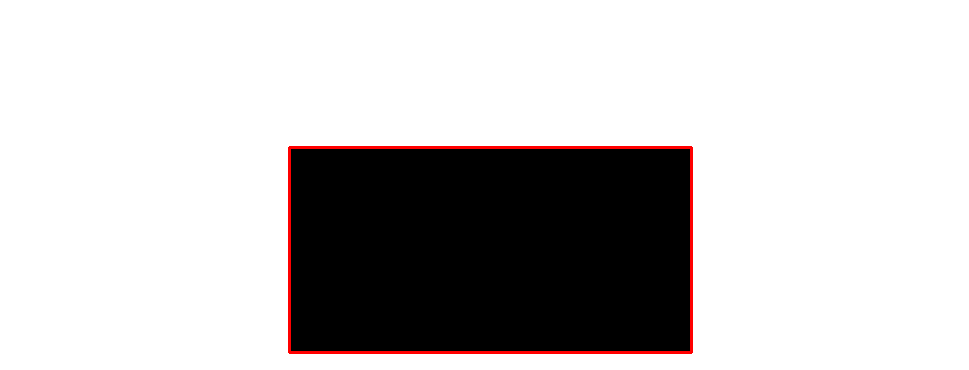

No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


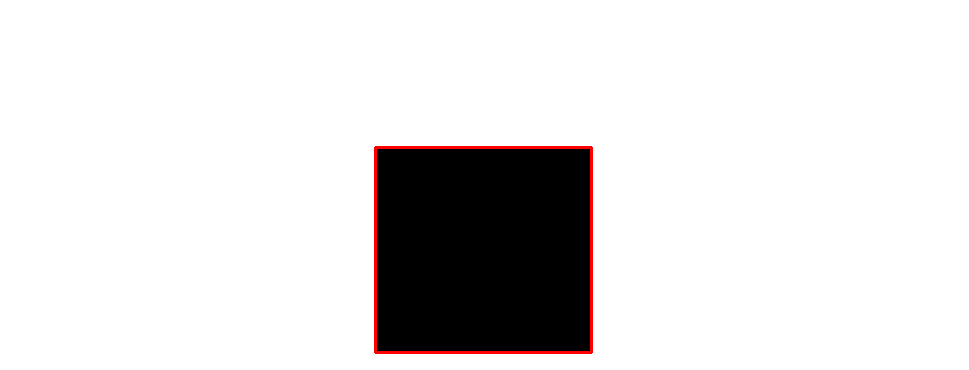

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


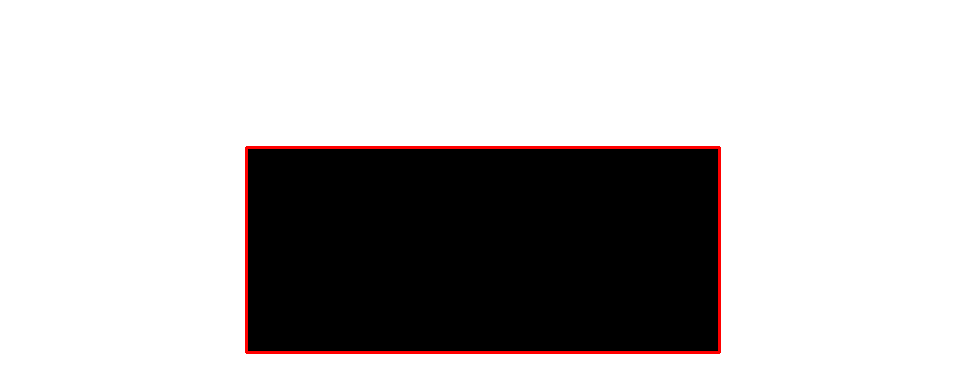

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


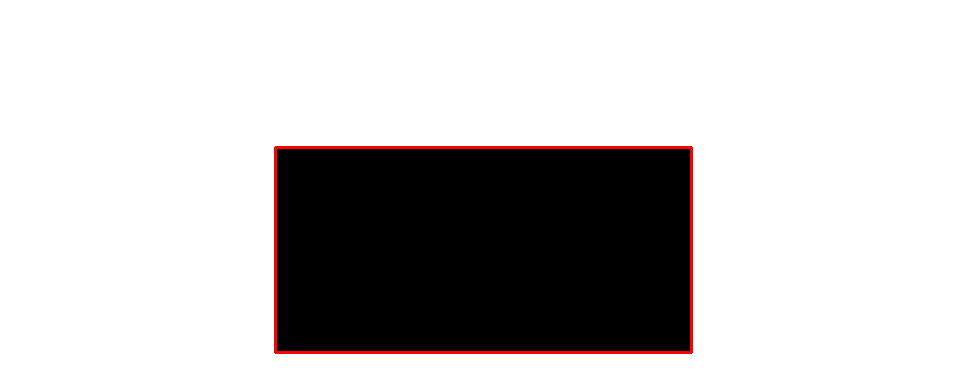

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


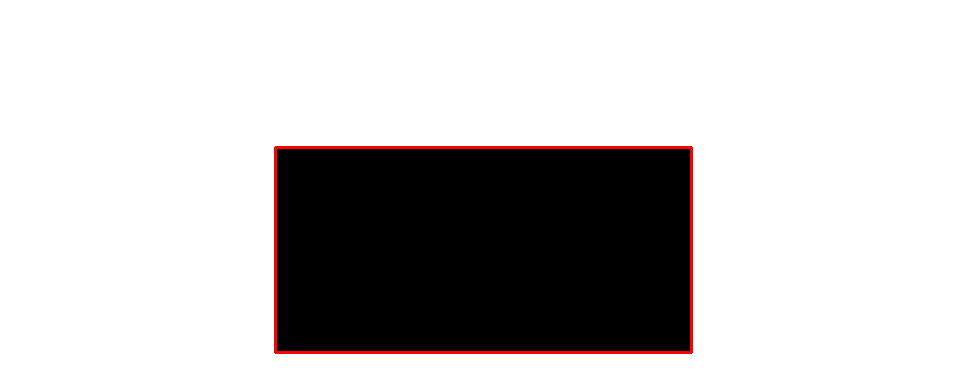

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


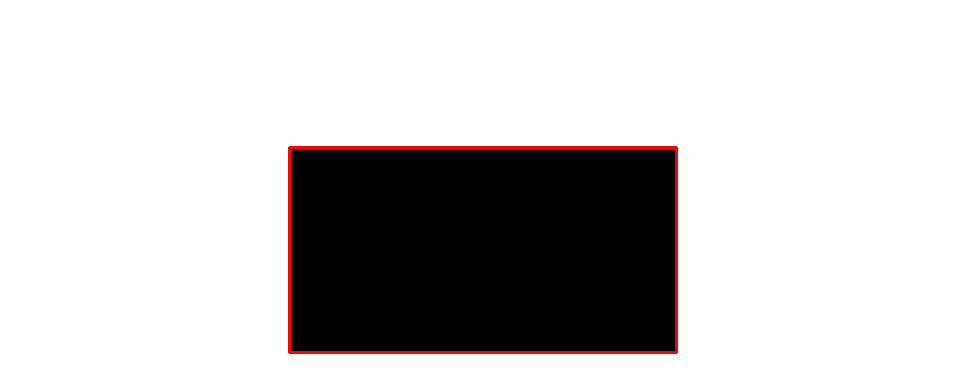

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


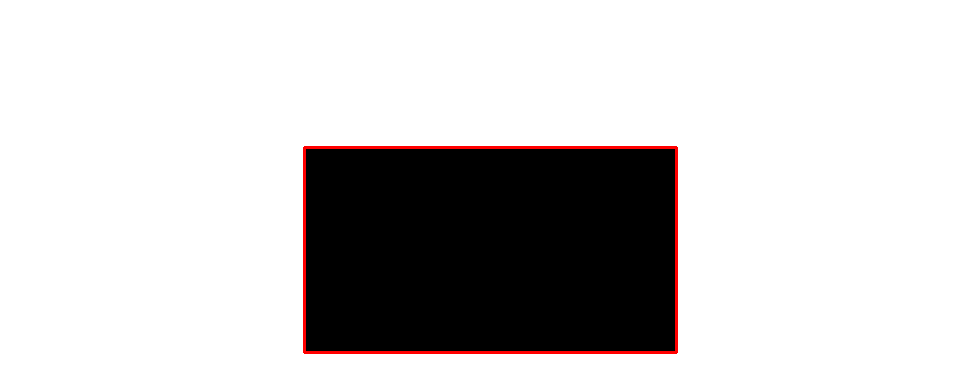

No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


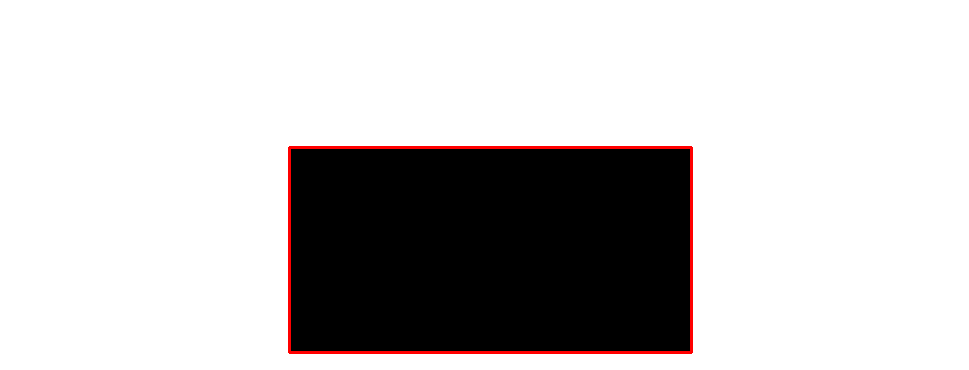

Rectangle coordinates: 246 147 719 352
Rectangle coordinates: 246 147 719 352


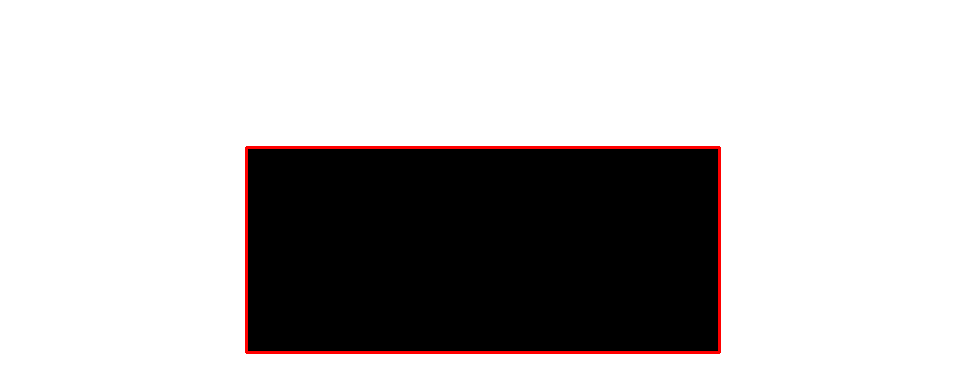

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


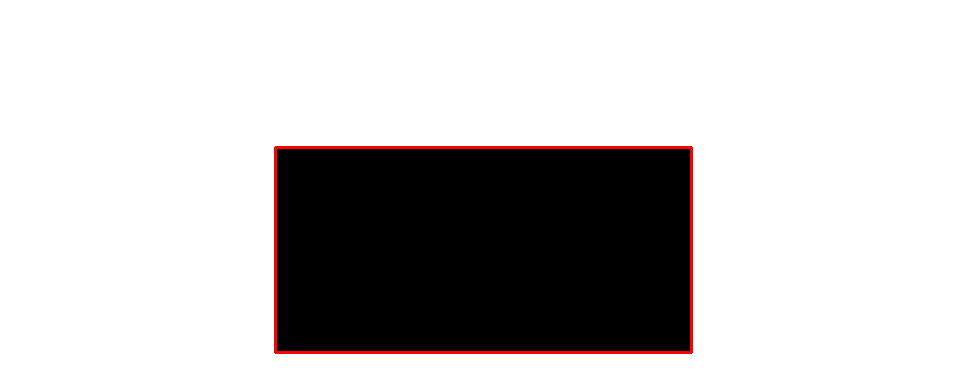

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


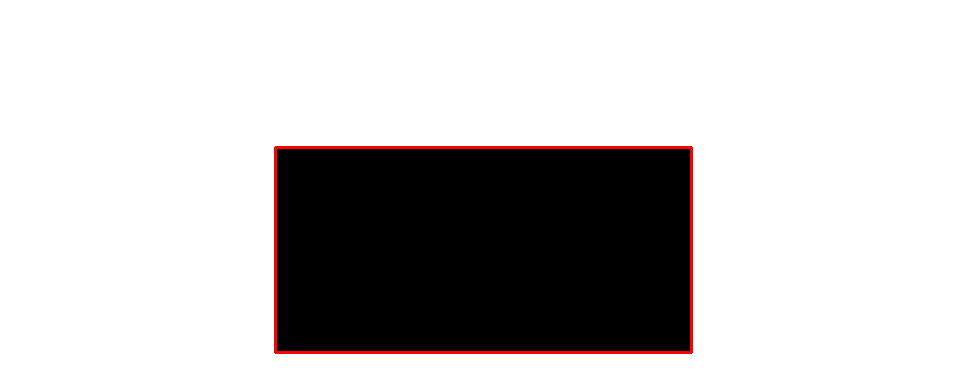

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


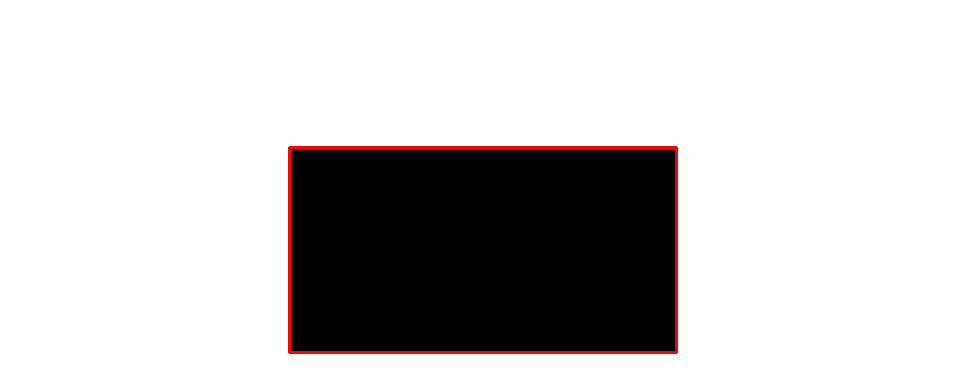

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


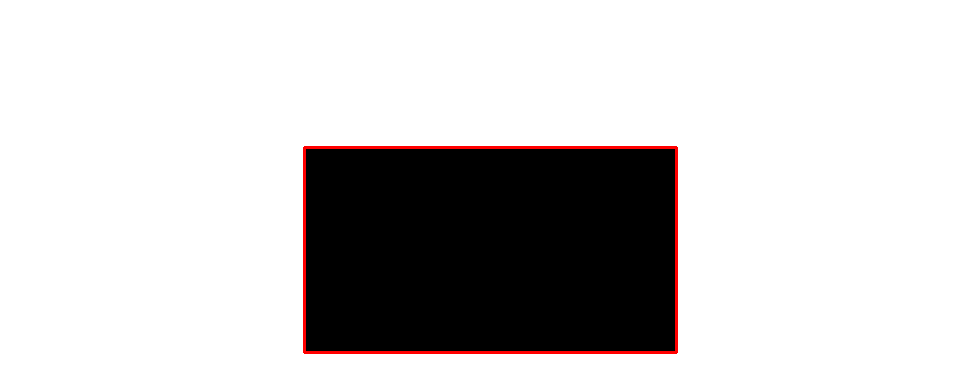

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


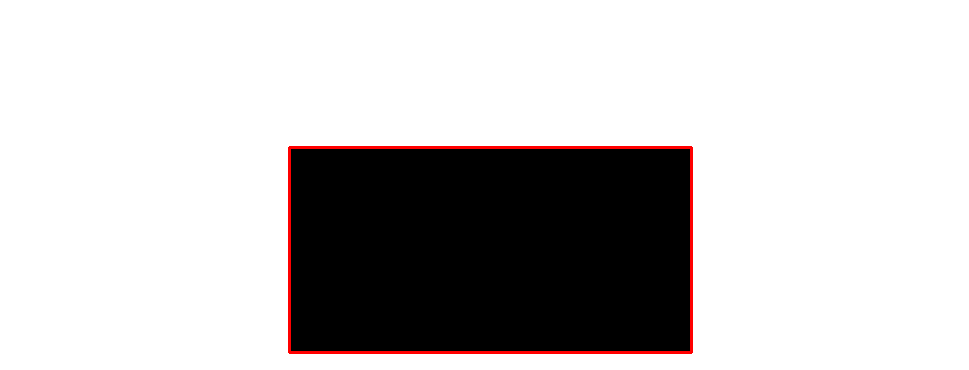

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

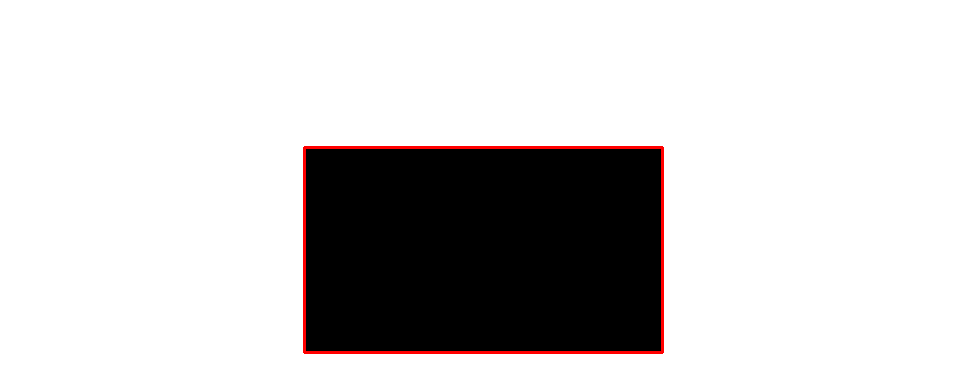

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


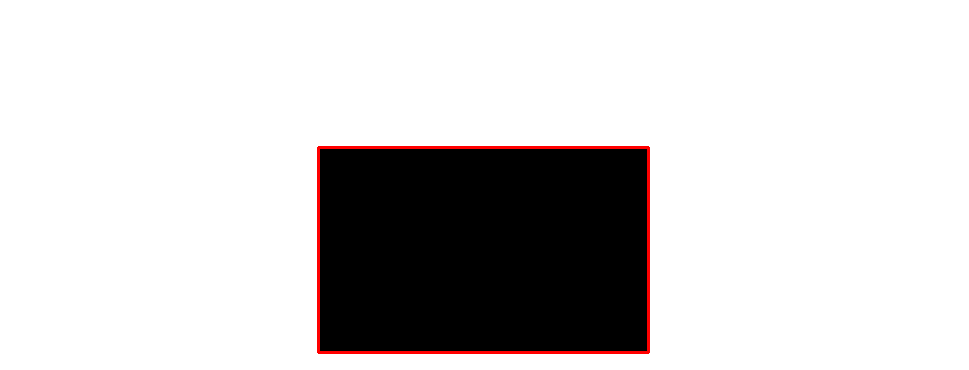

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


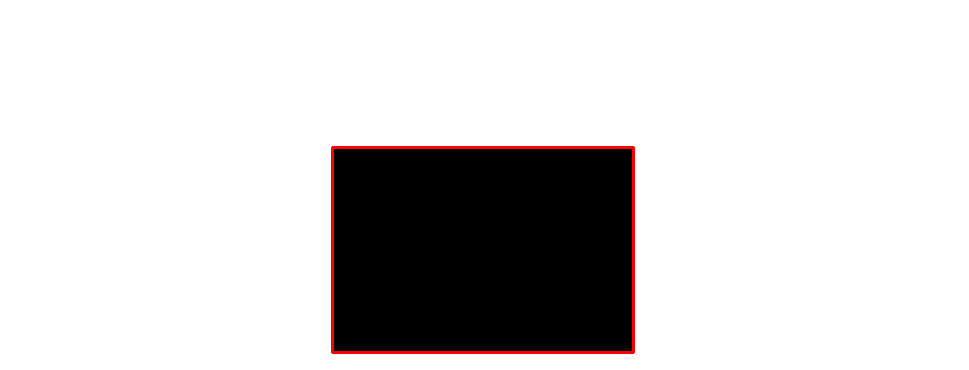

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


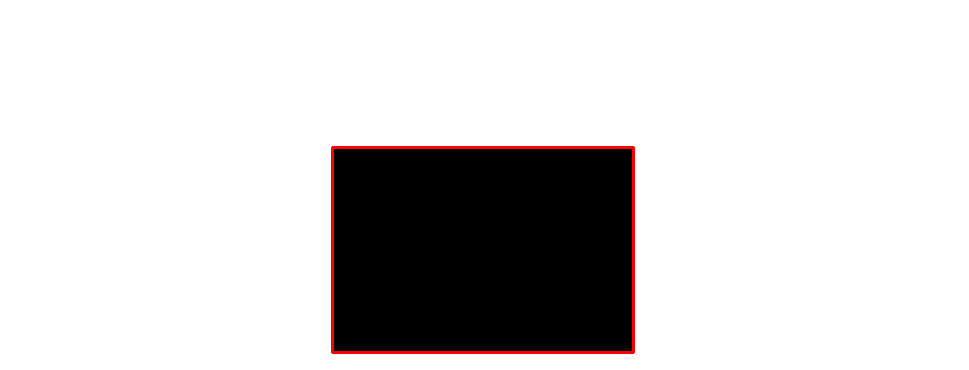

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


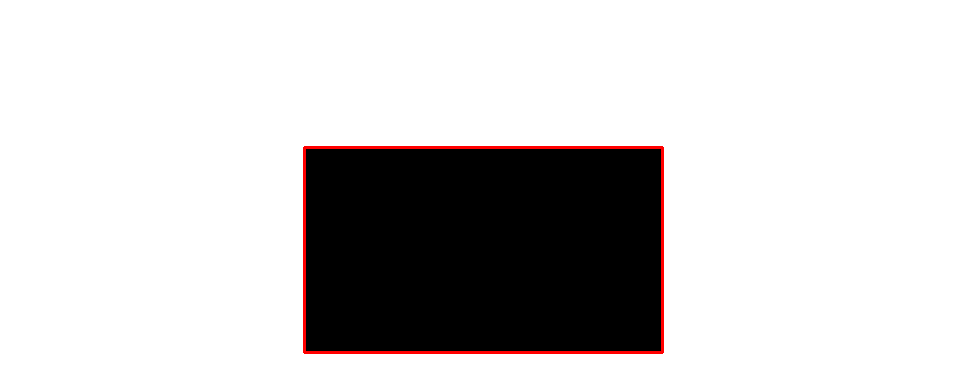

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


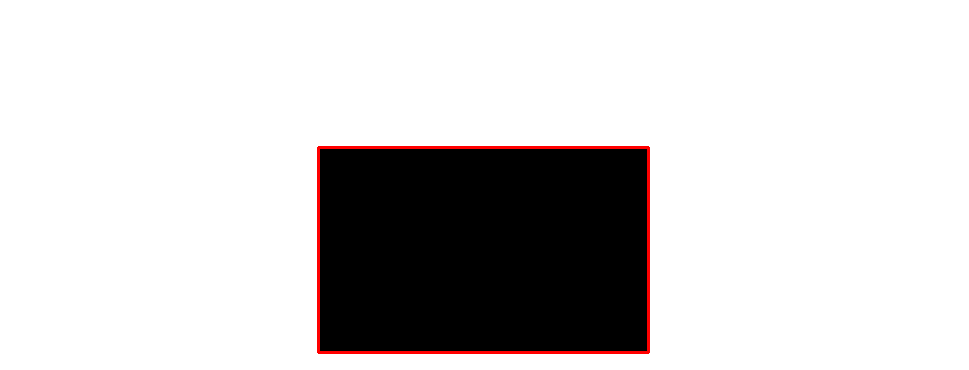

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


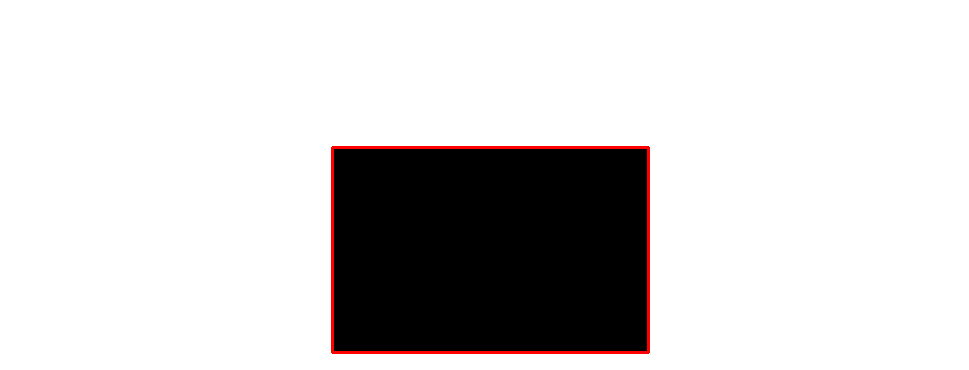

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


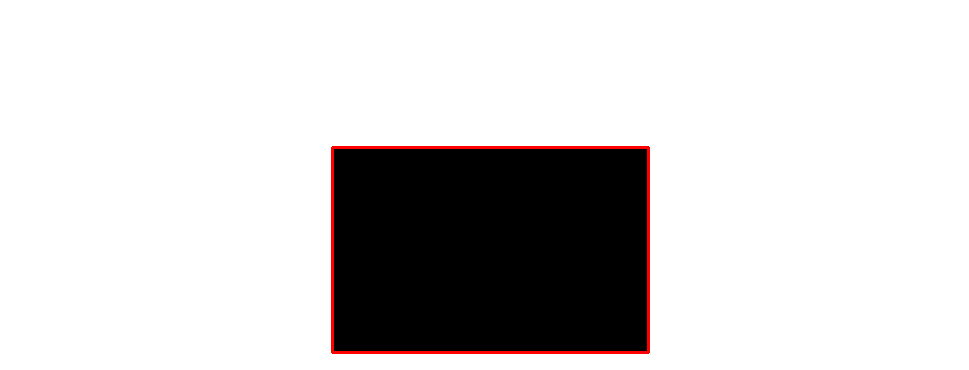

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


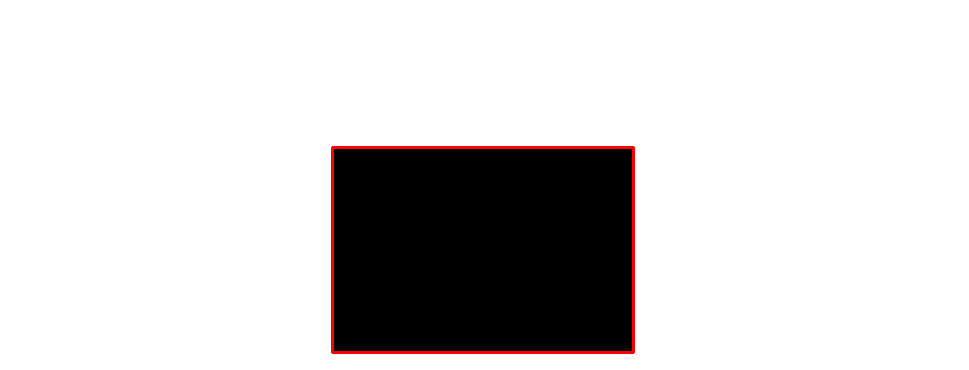

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


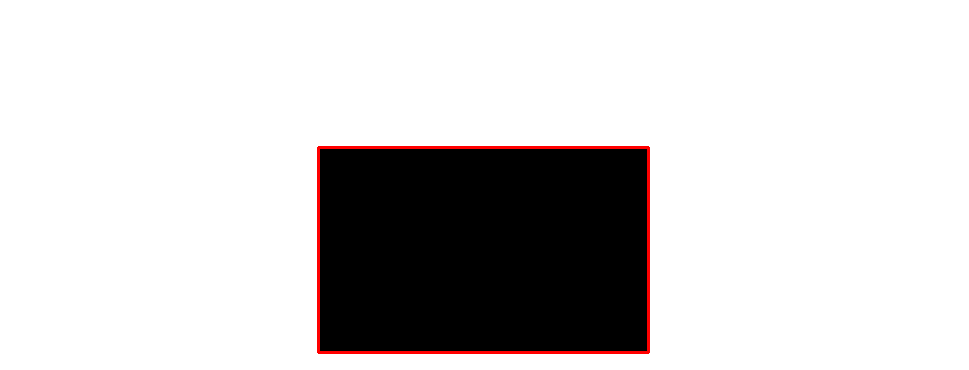

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


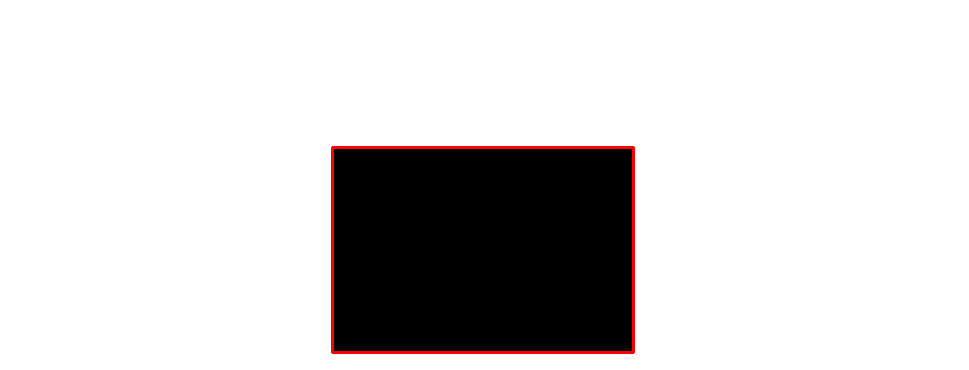

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


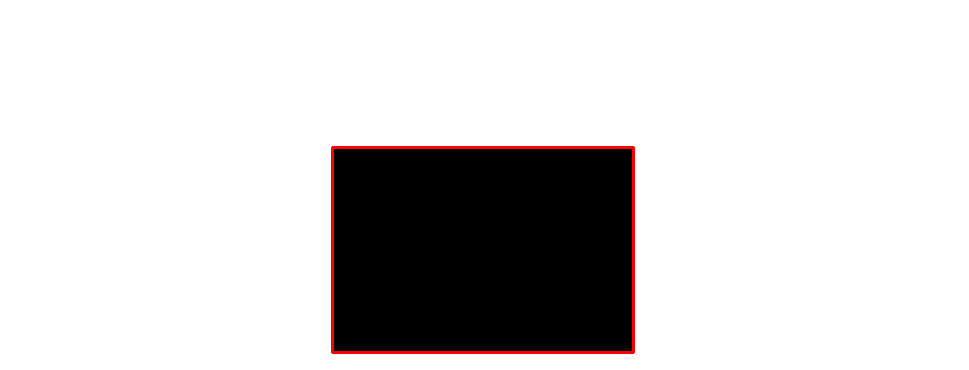

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


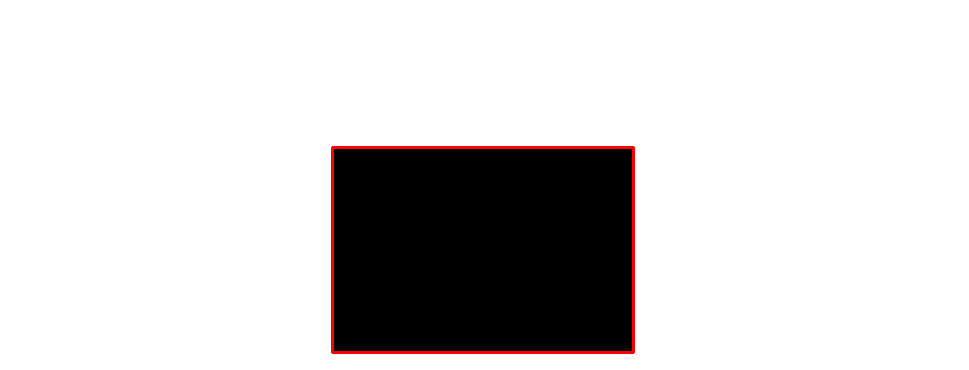

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 347 147 619 352
Rectangle coordinates: 347 147 619 352


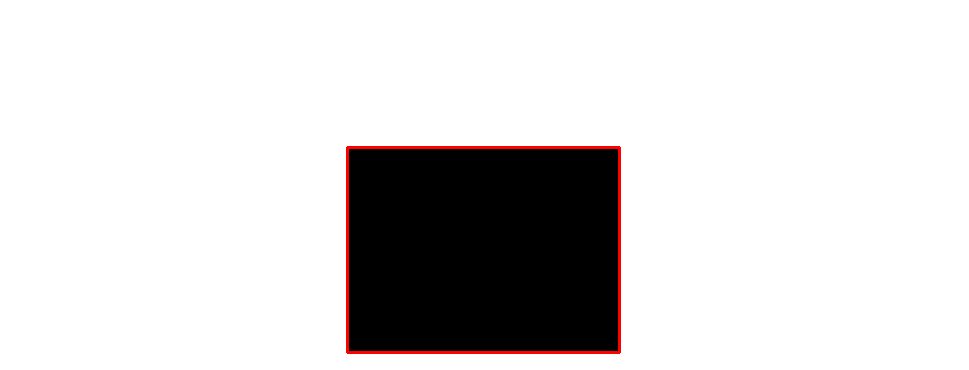

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


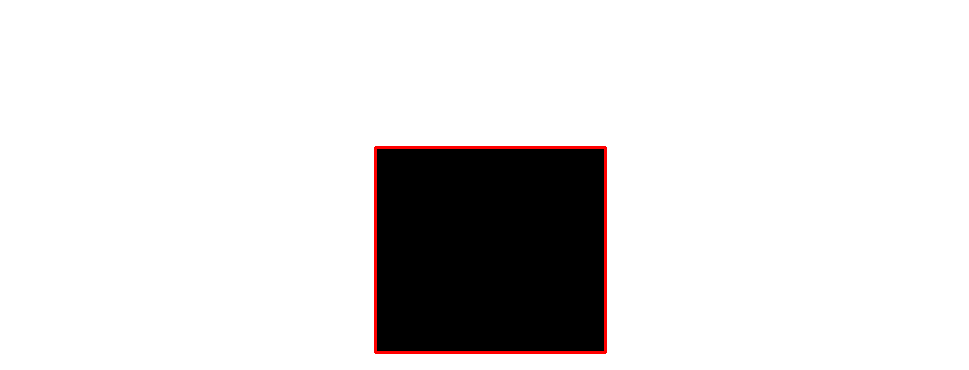

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


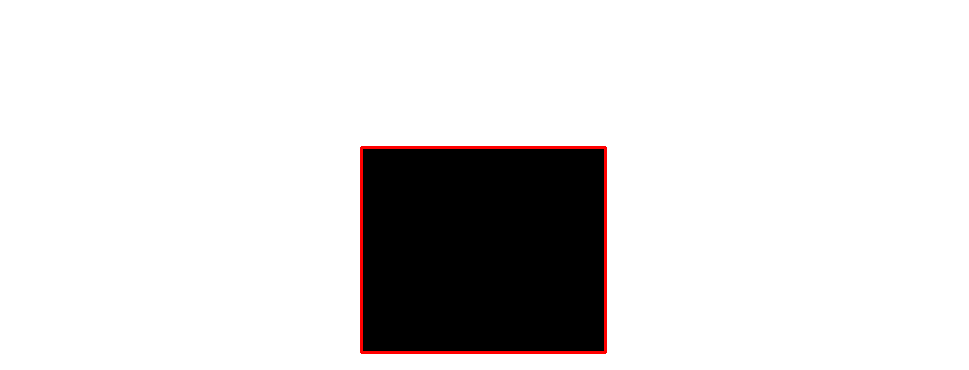

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


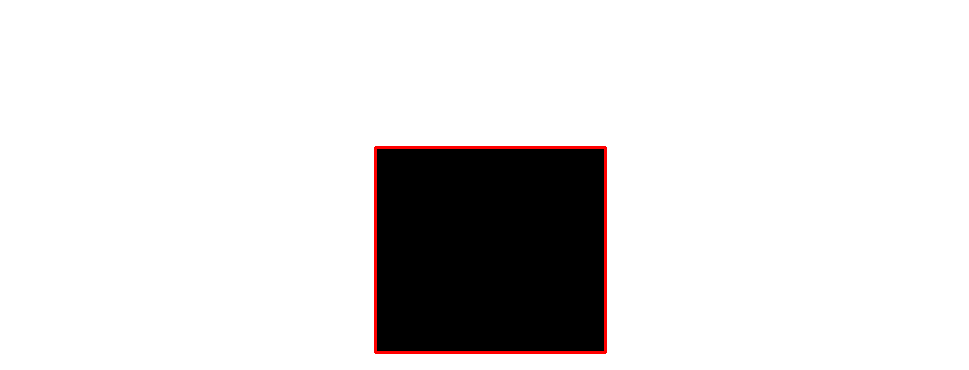

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


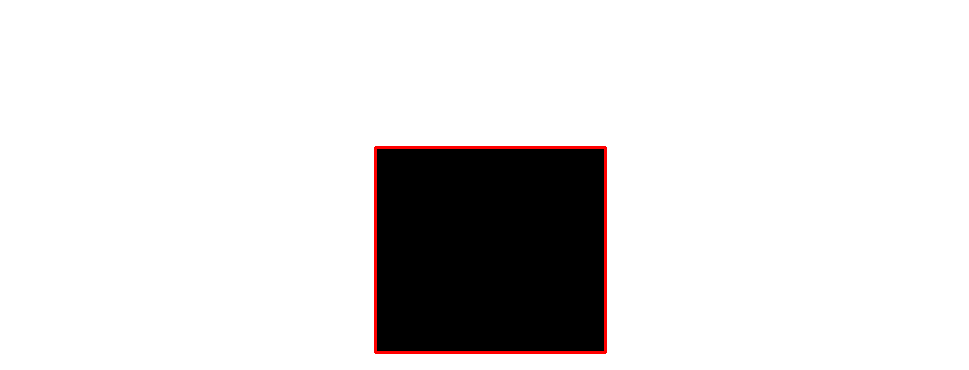

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


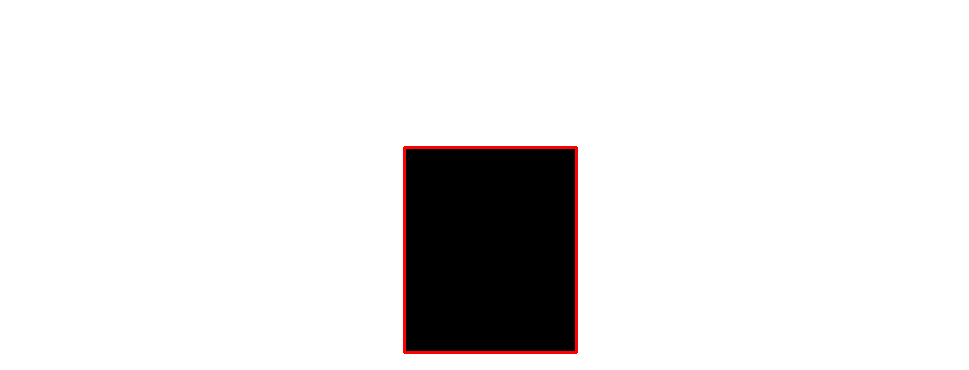

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


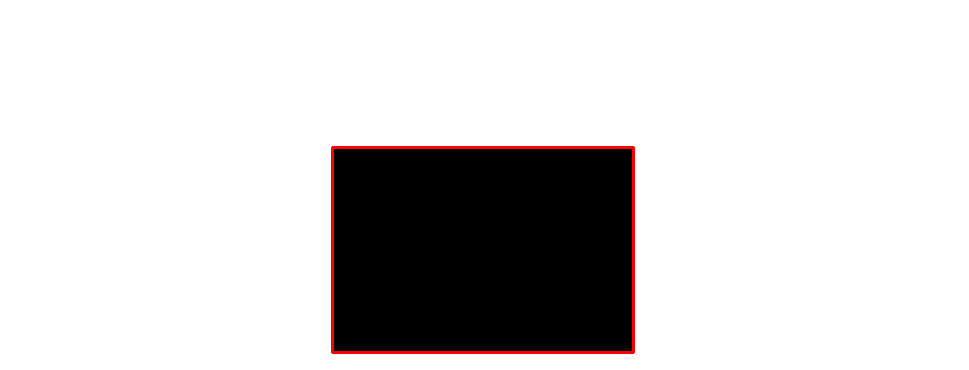

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


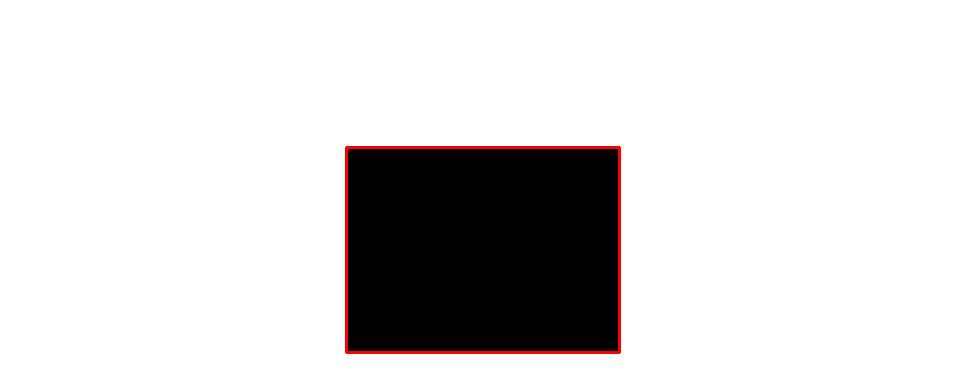

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


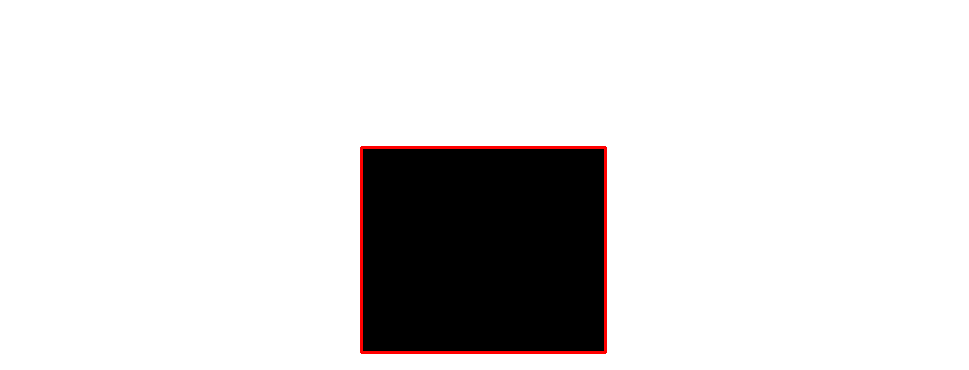

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


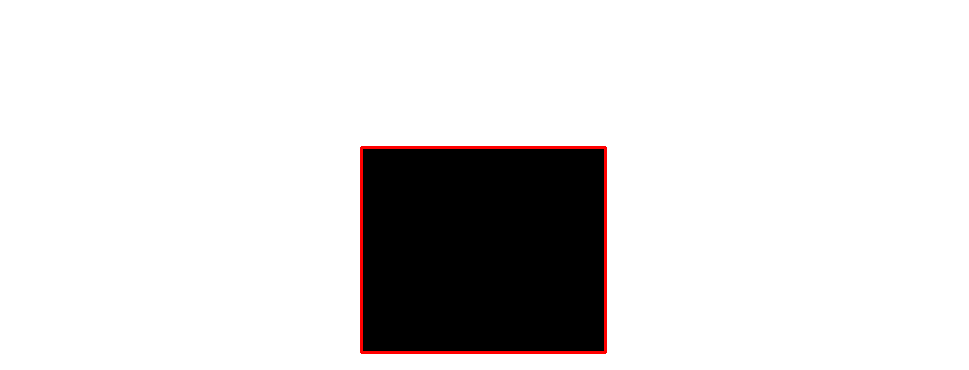

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


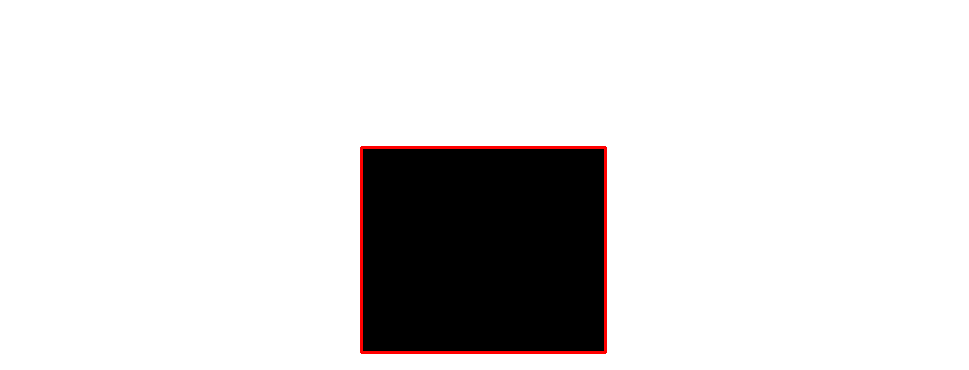

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


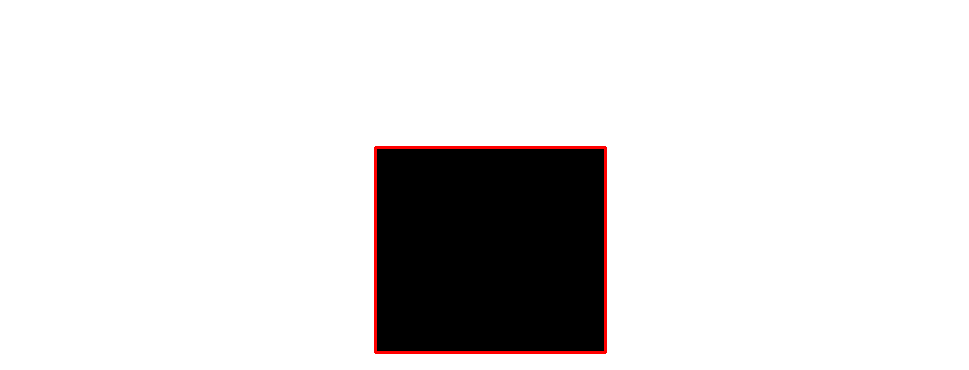

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


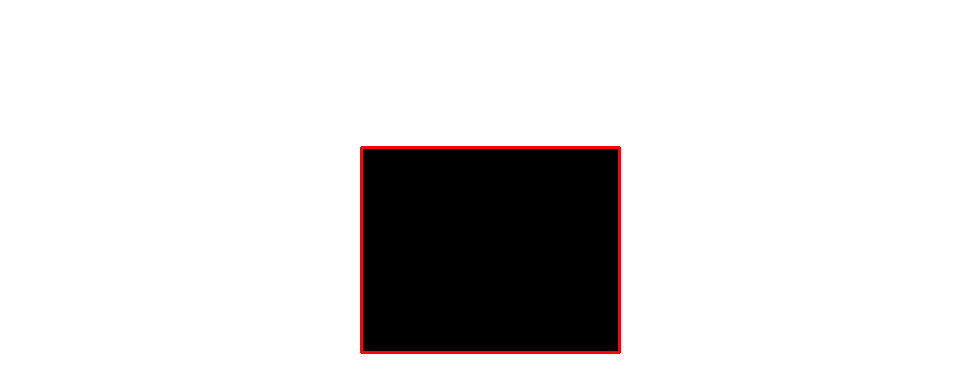

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


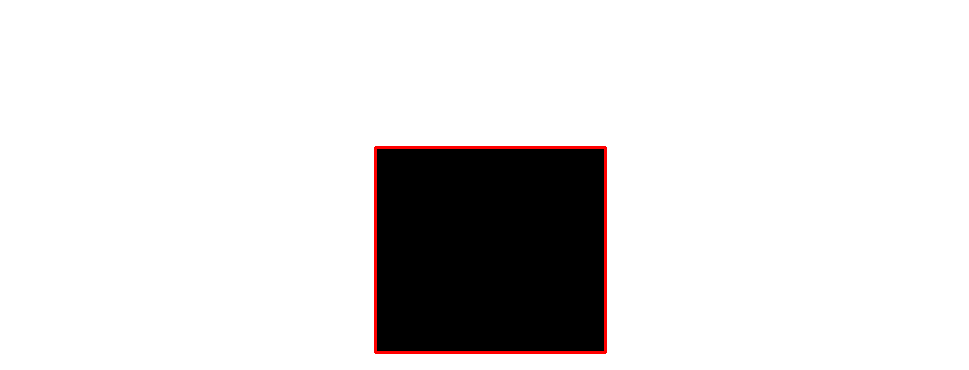

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


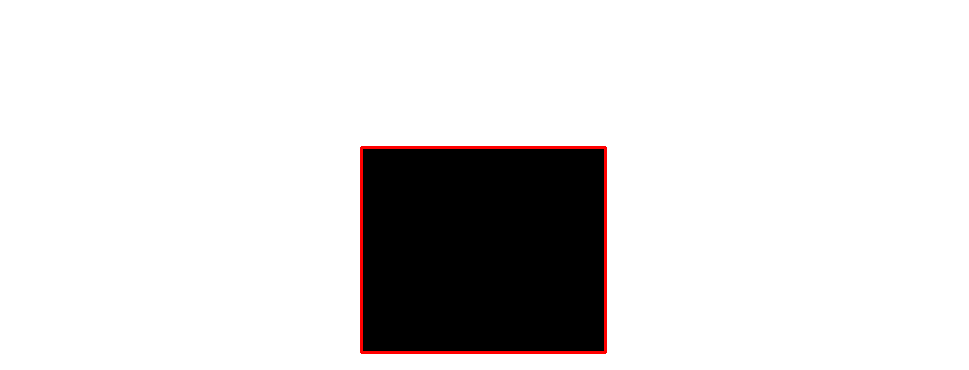

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


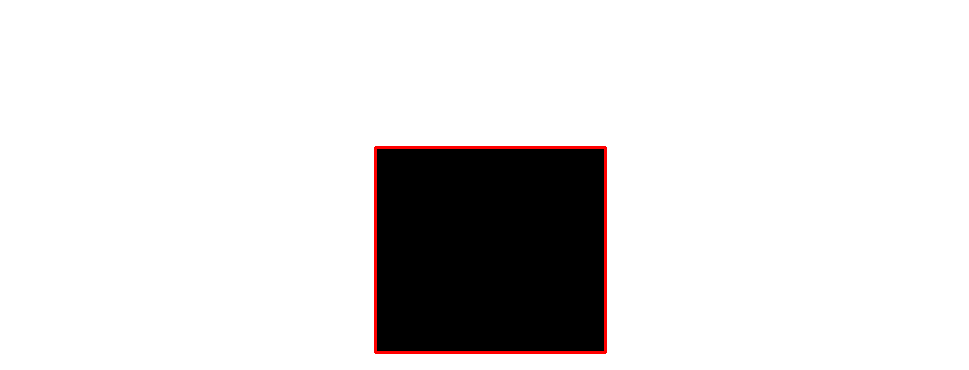

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


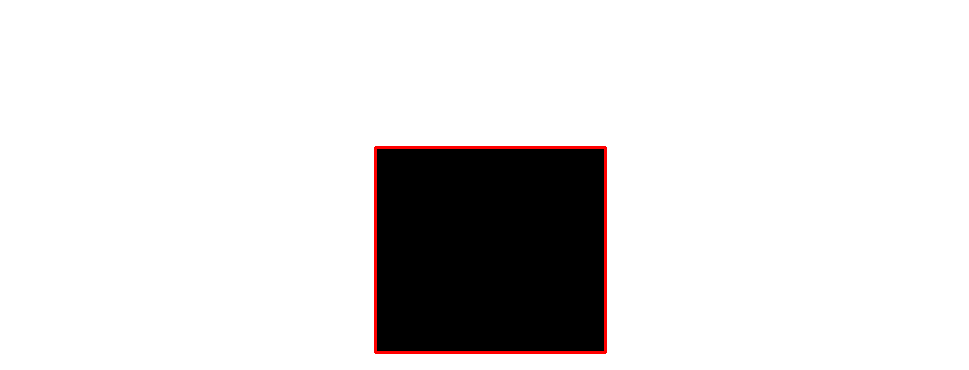

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


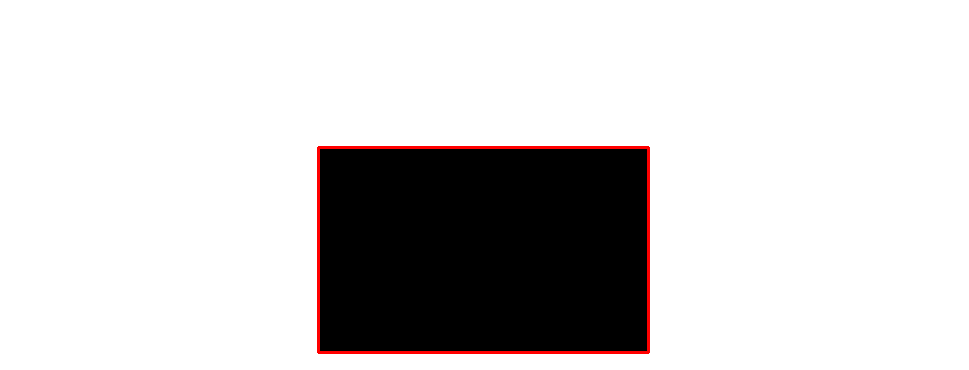

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


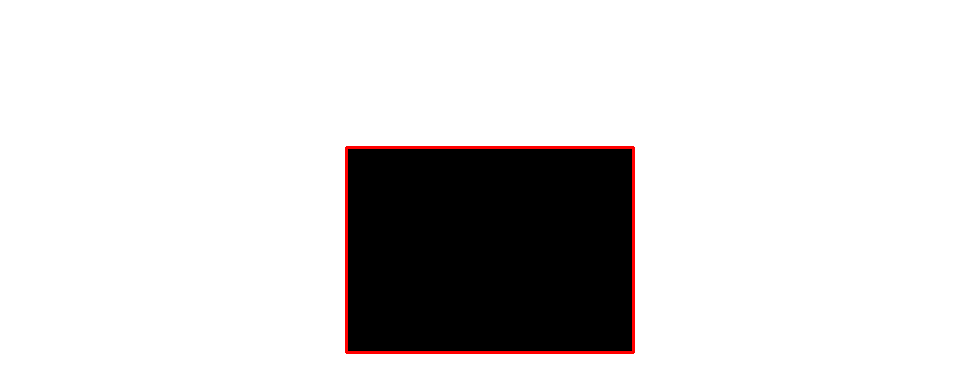

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


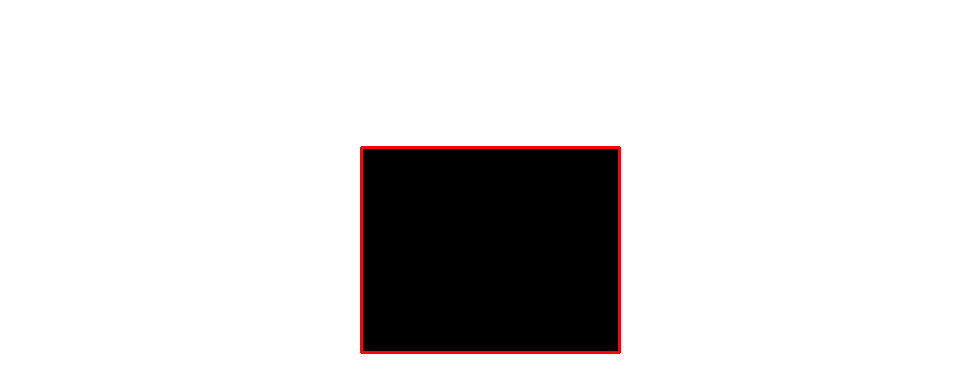

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


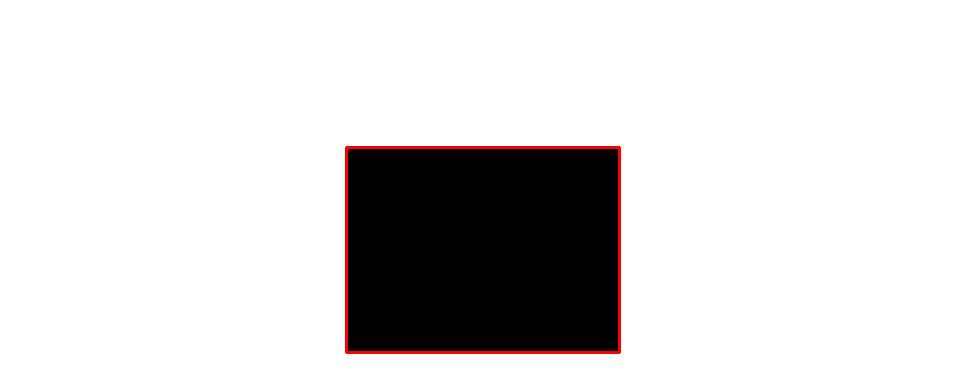

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

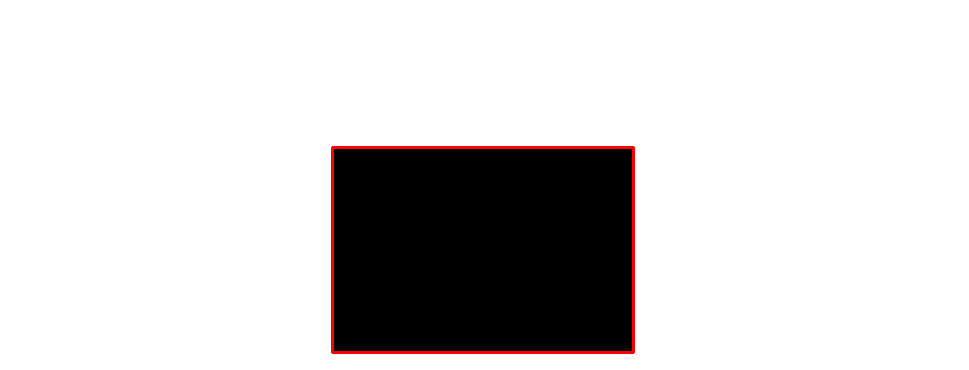

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


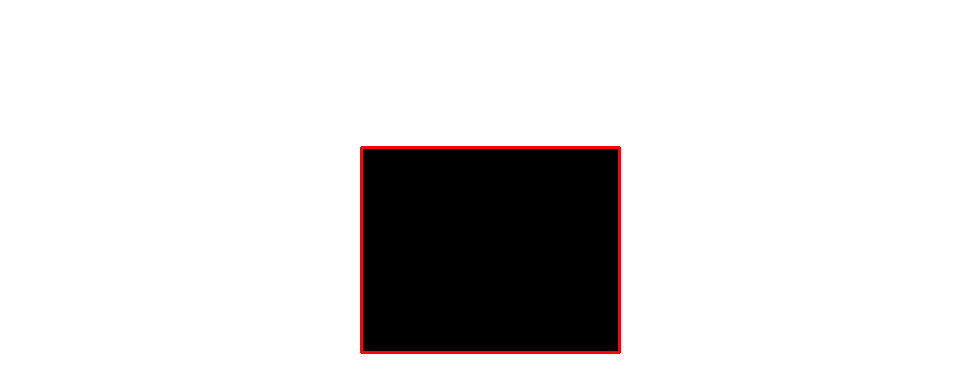

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


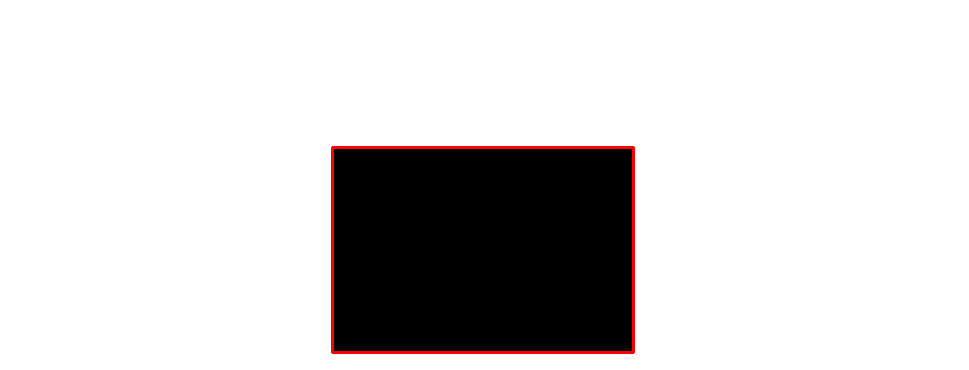

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

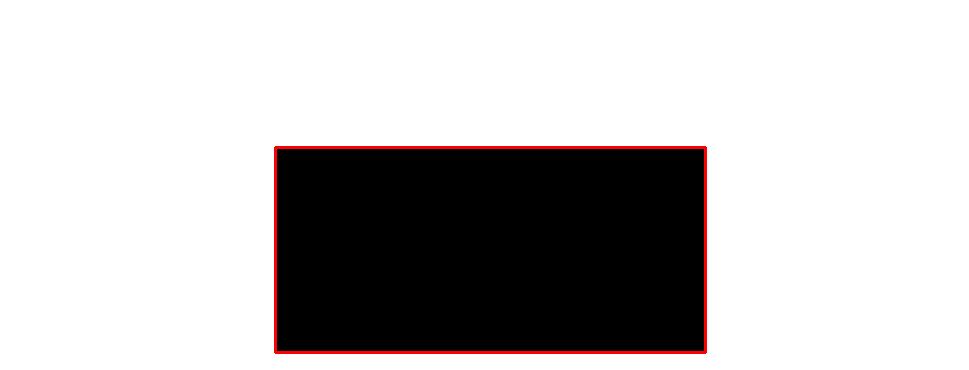

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


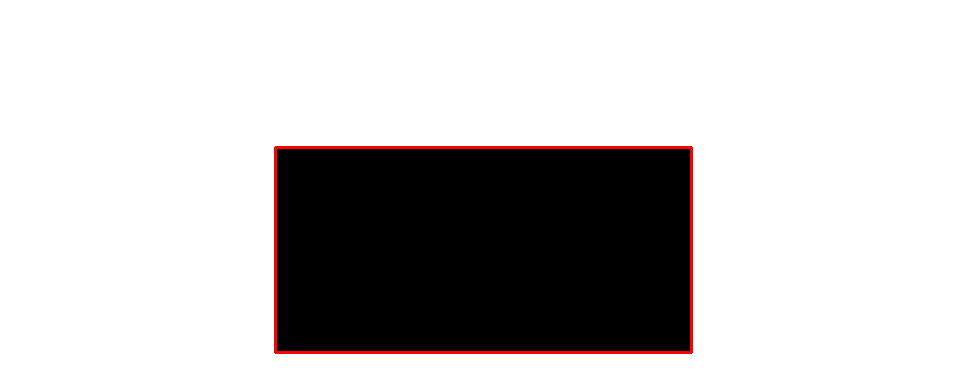

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


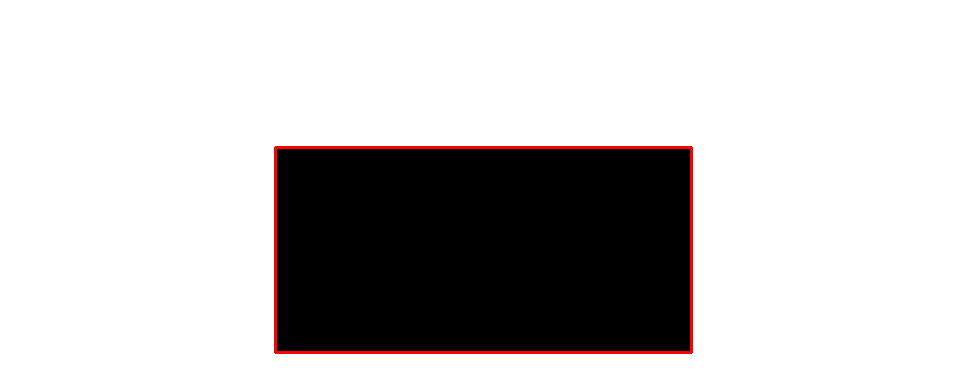

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


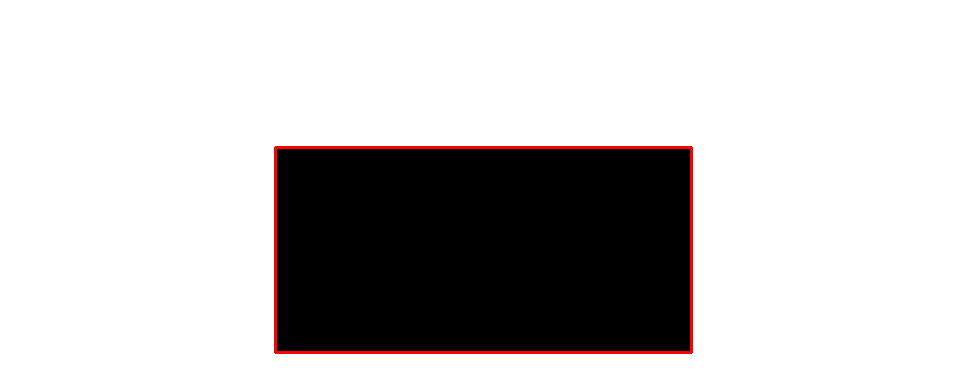

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


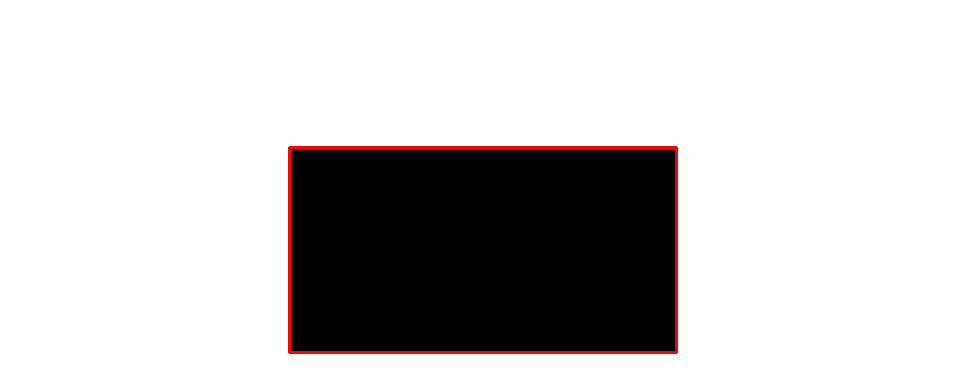

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


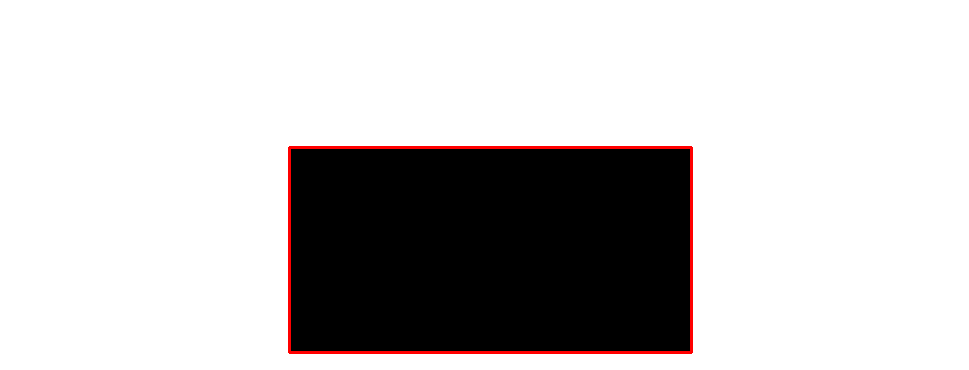

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


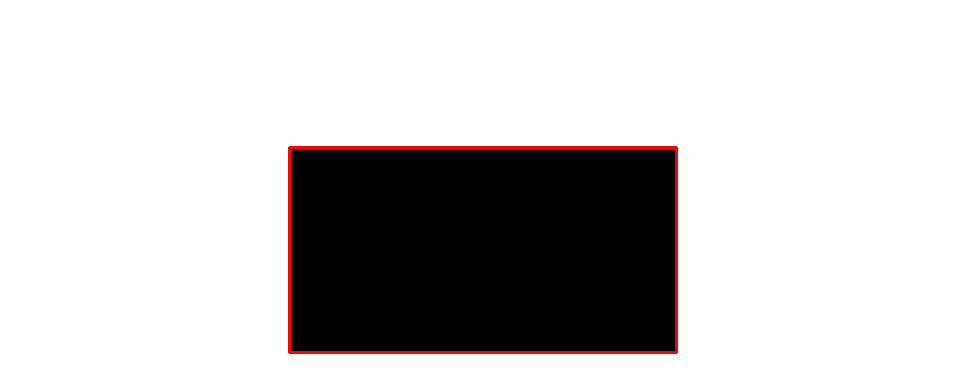

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


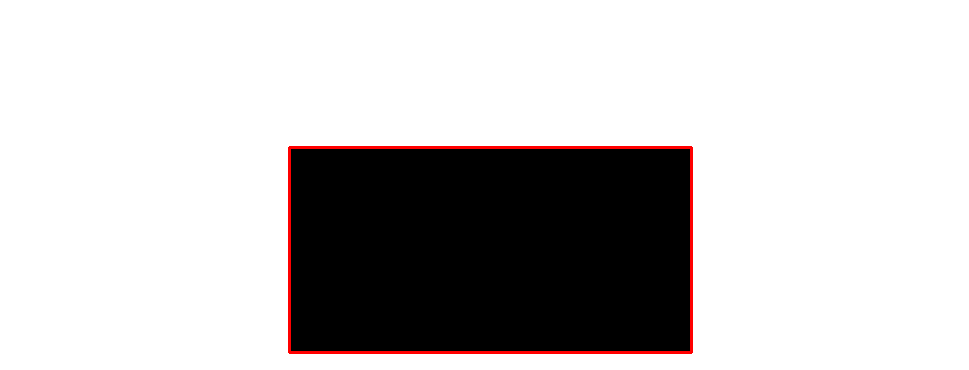

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


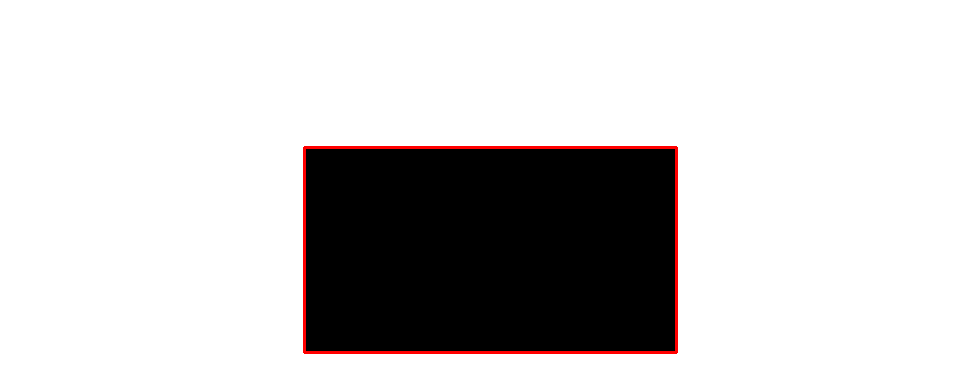

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


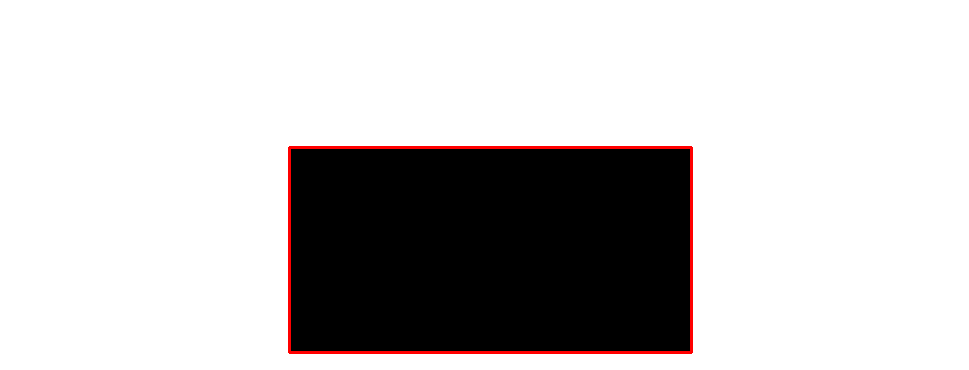

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


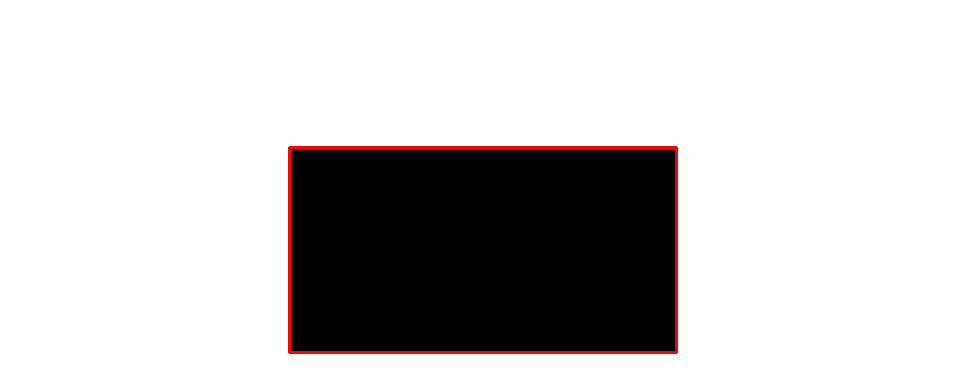

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


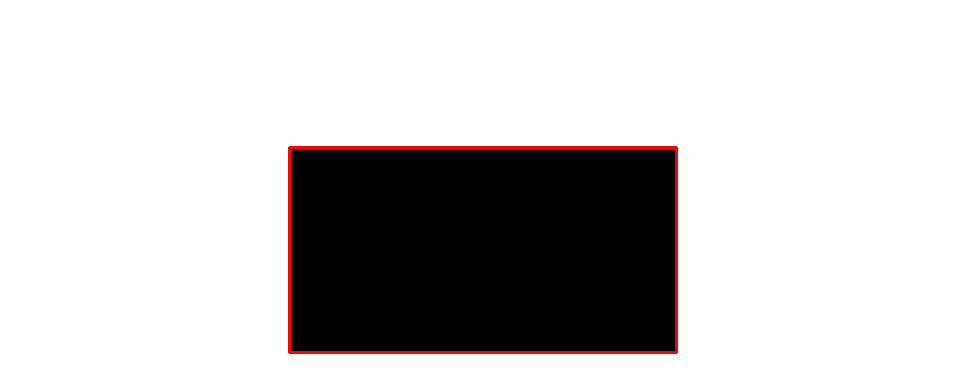

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


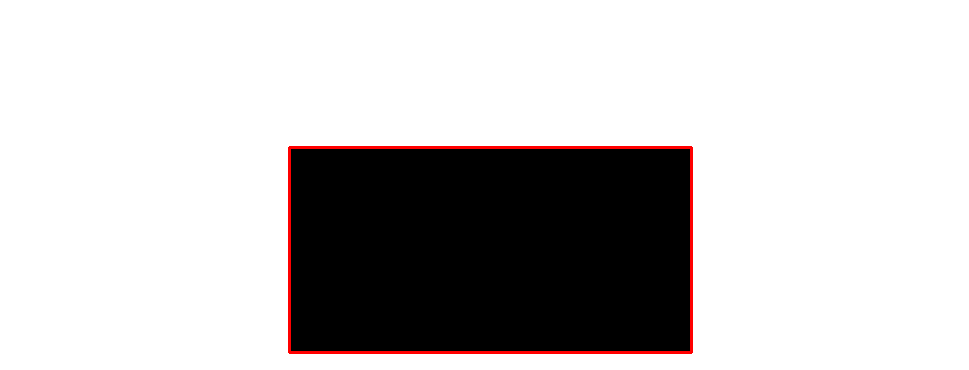

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


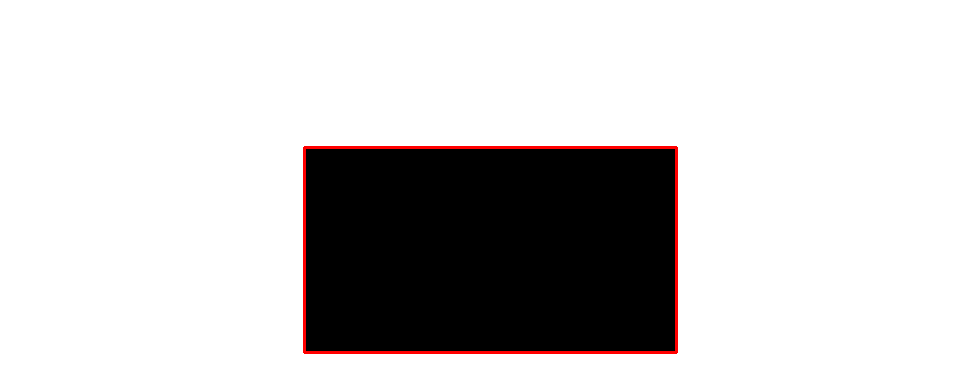

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


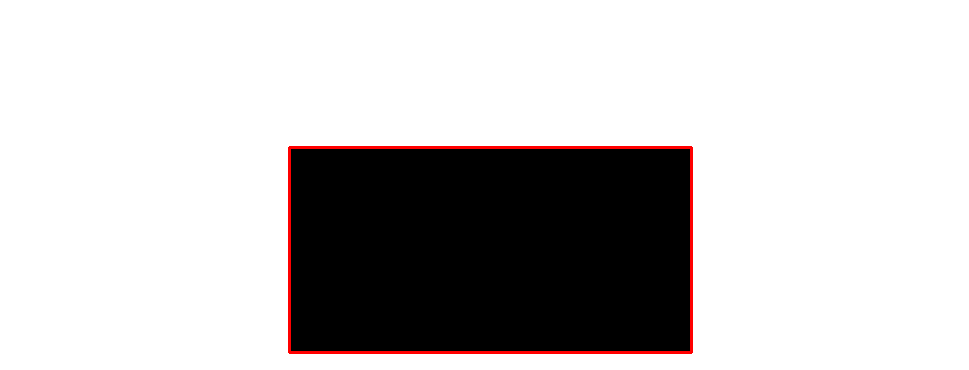

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


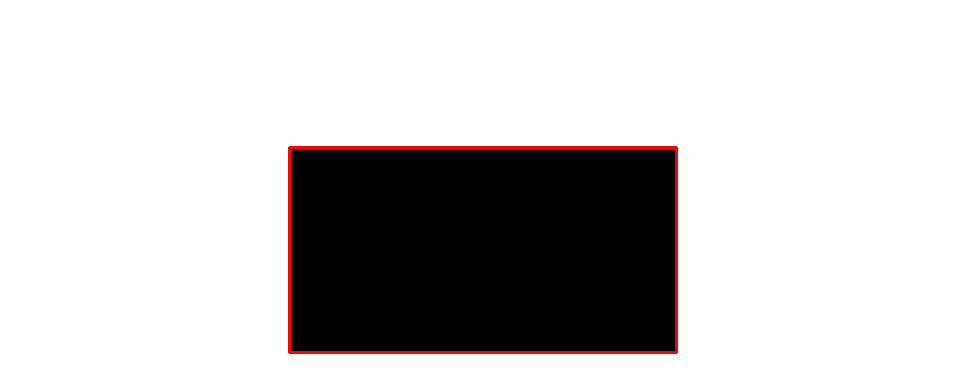

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

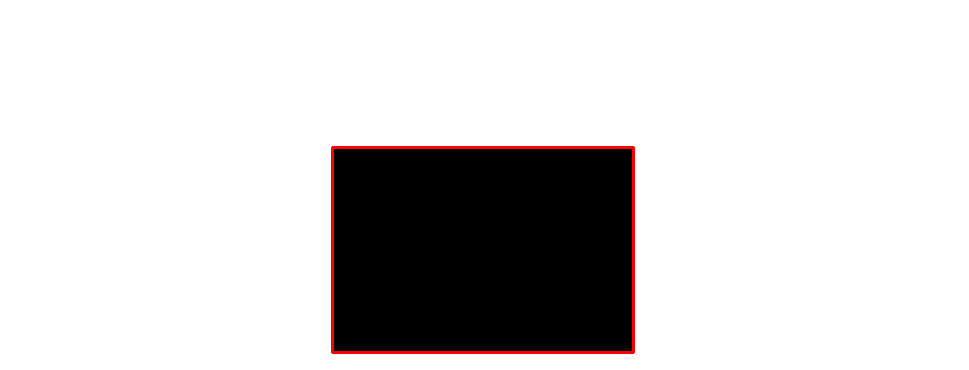

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


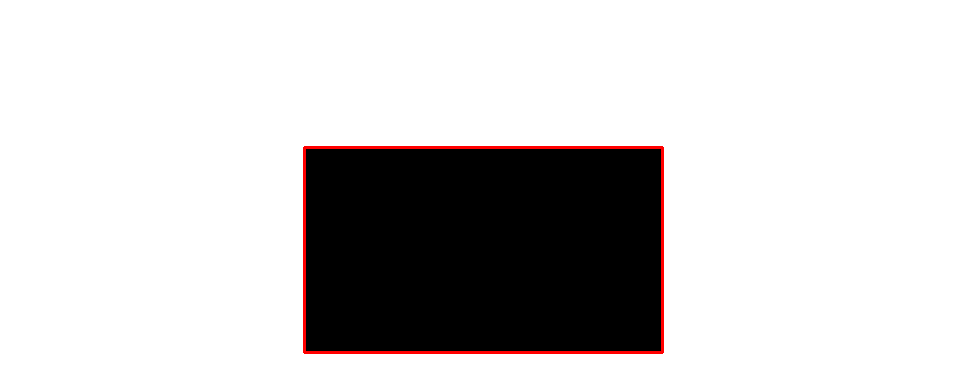

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

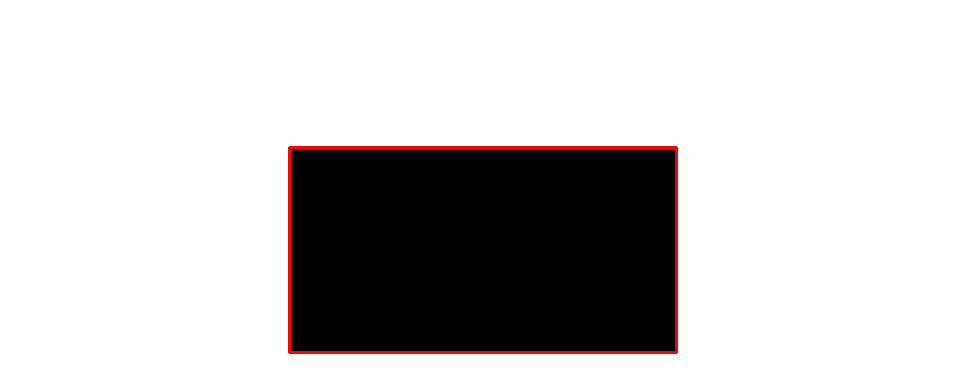

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


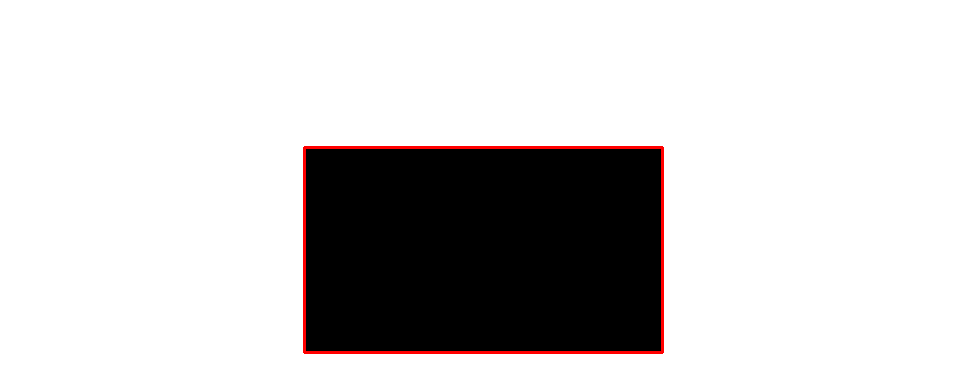

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


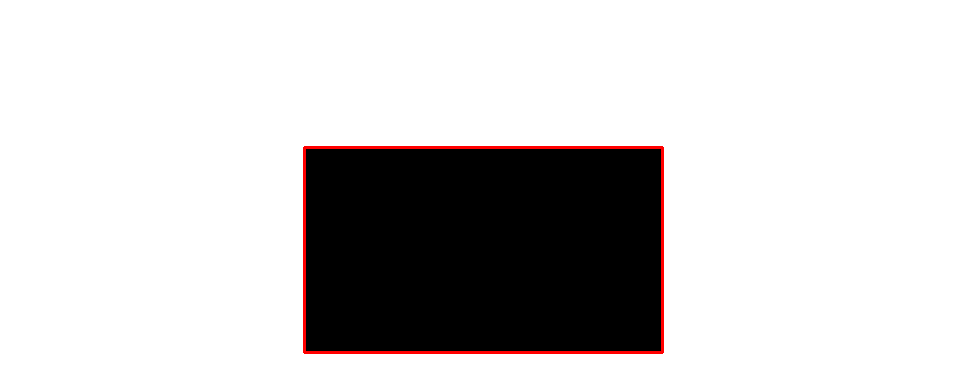

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


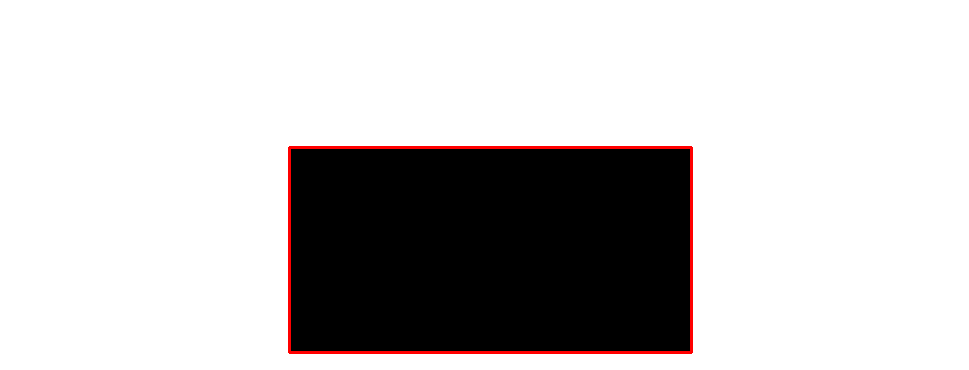

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


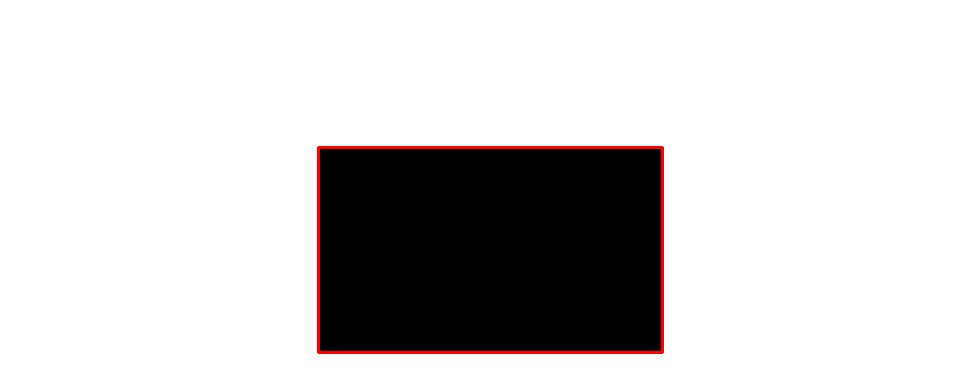

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


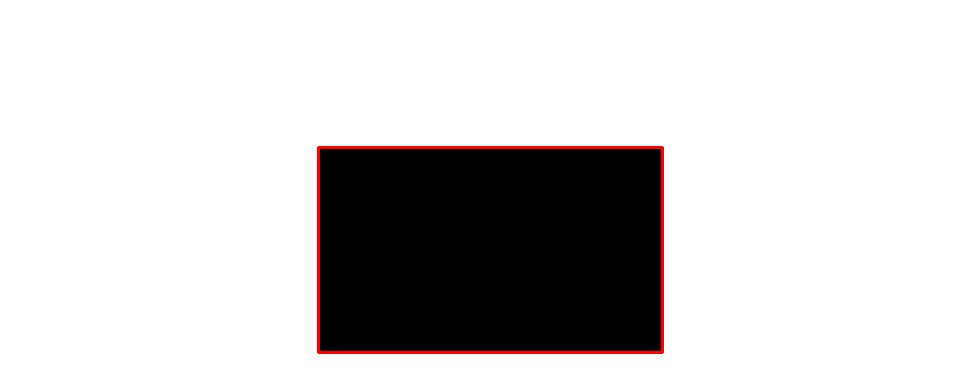

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


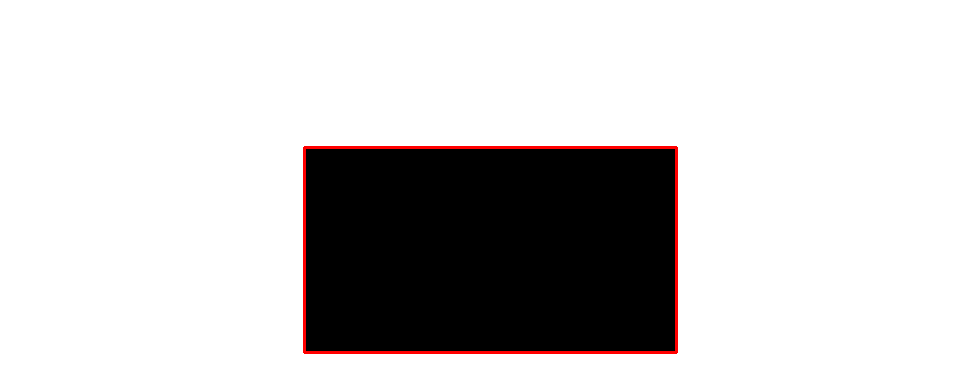

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


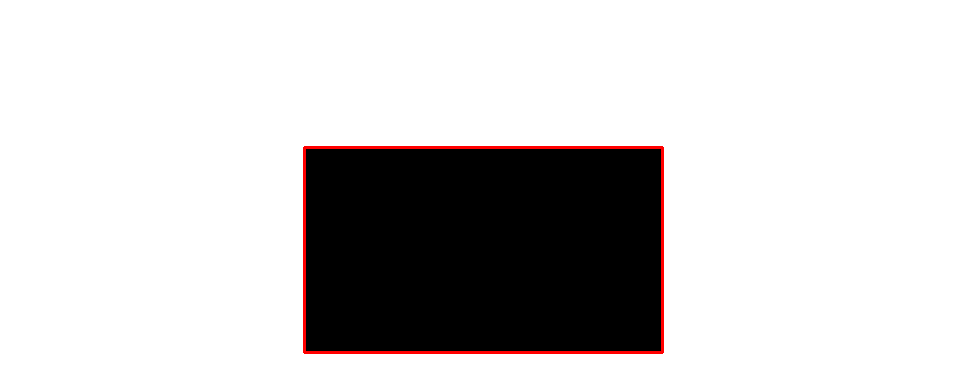

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


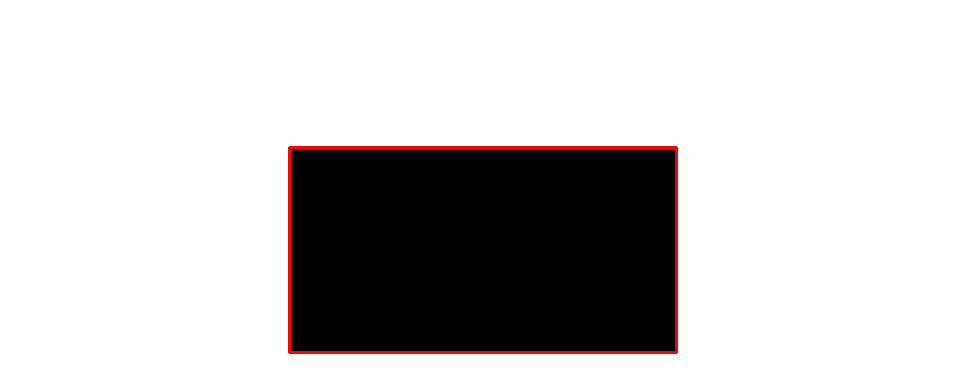

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


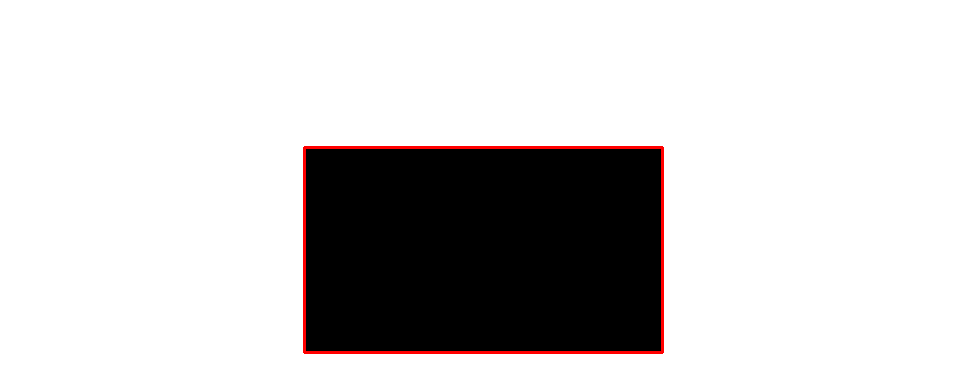

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


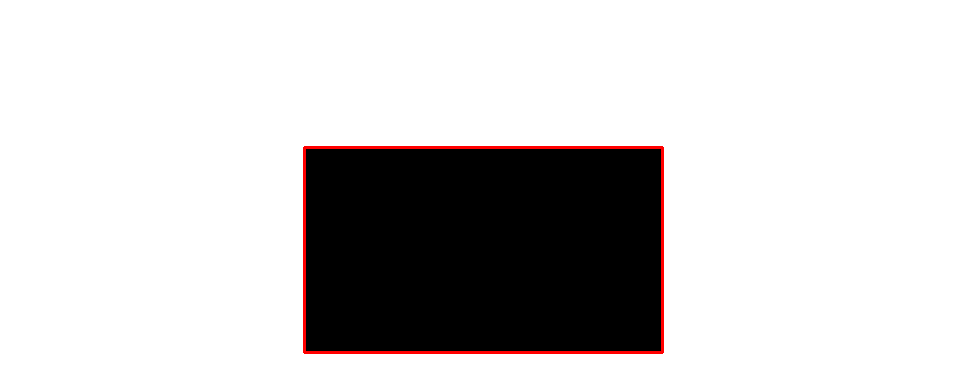

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


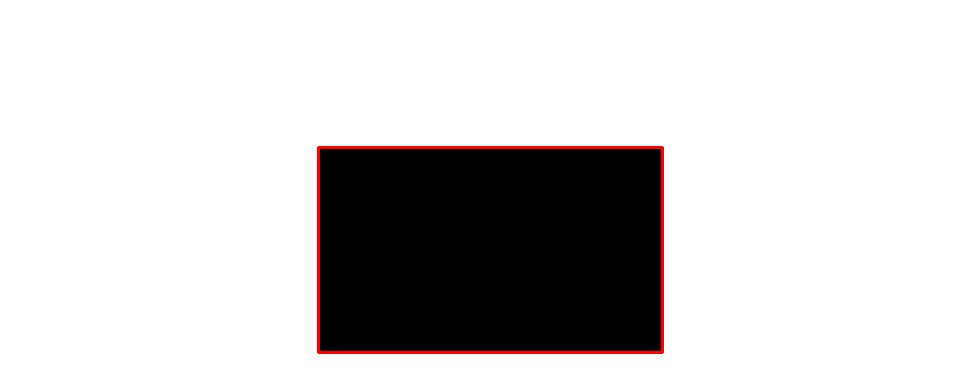

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


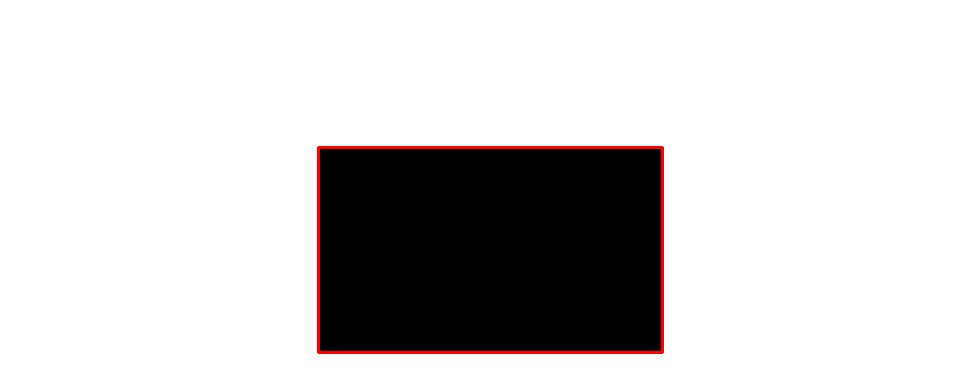

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


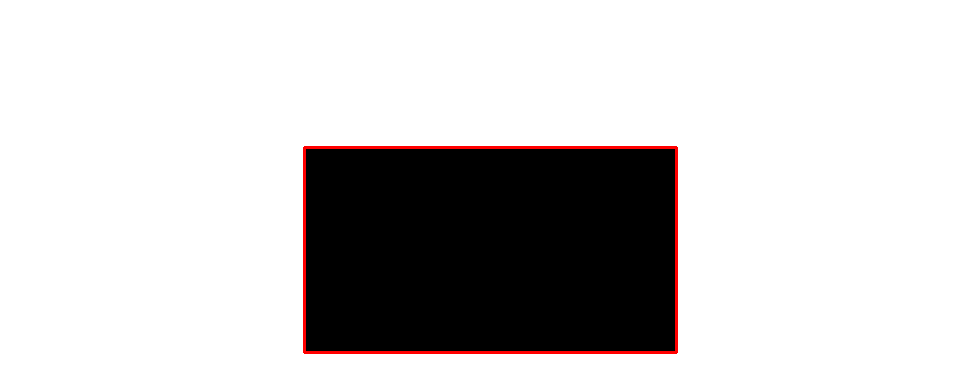

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


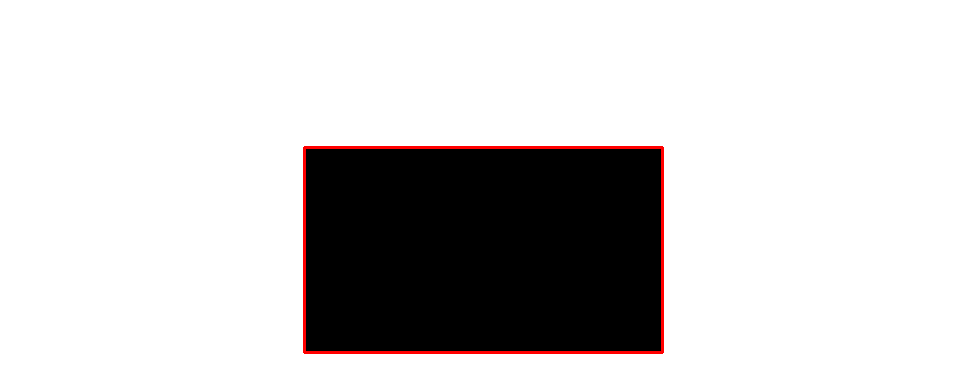

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


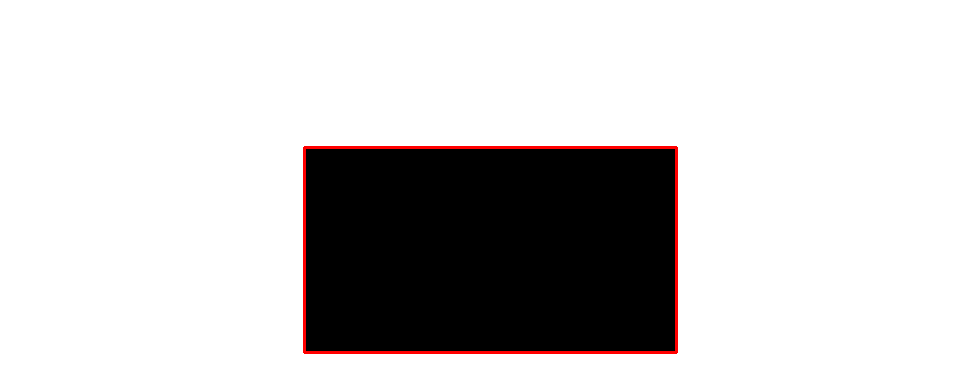

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


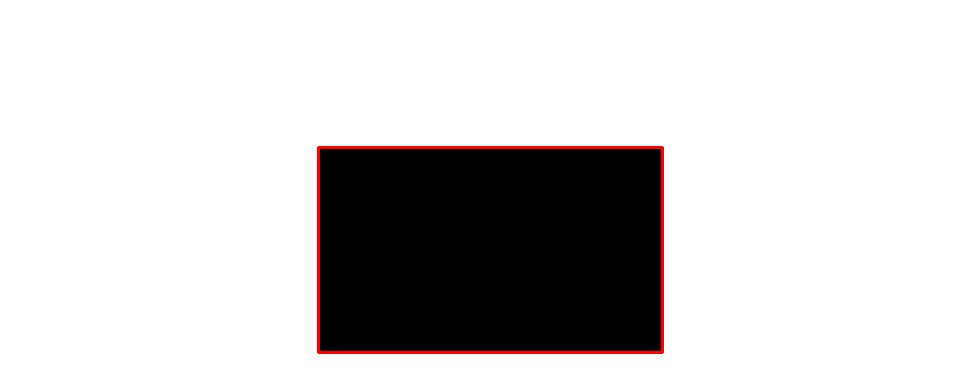

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


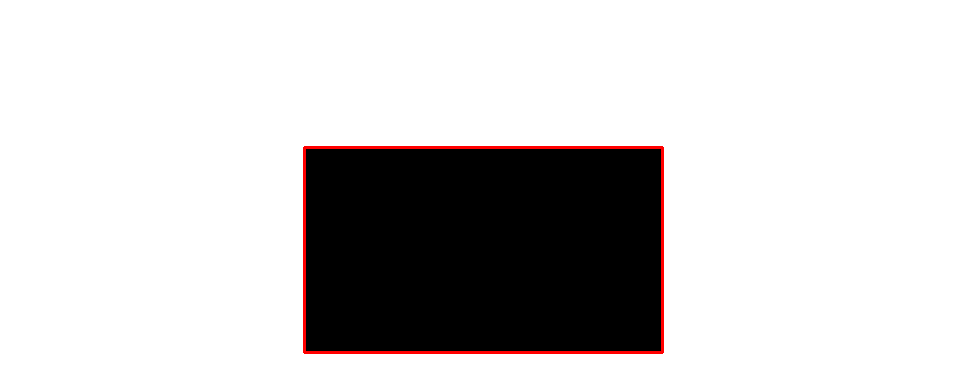

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


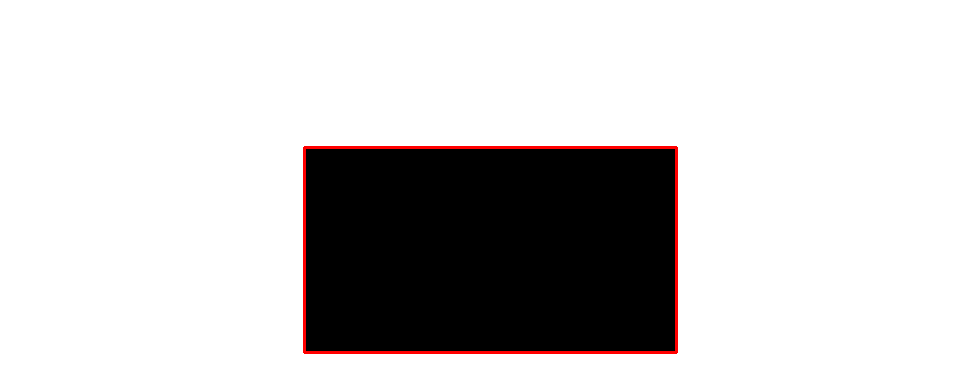

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


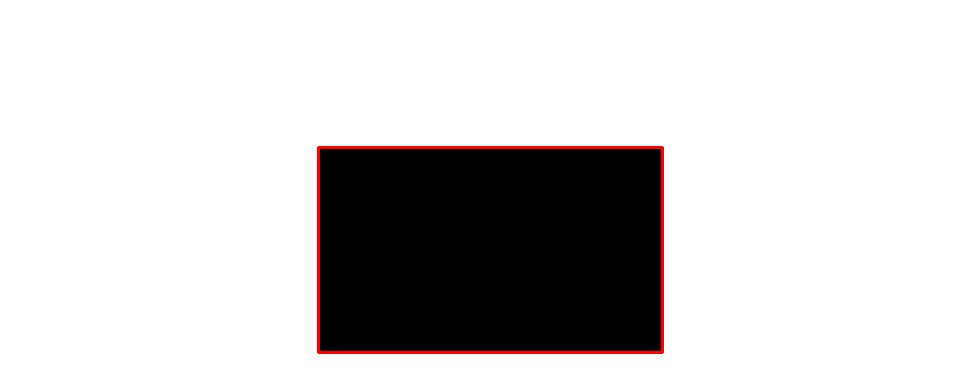

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


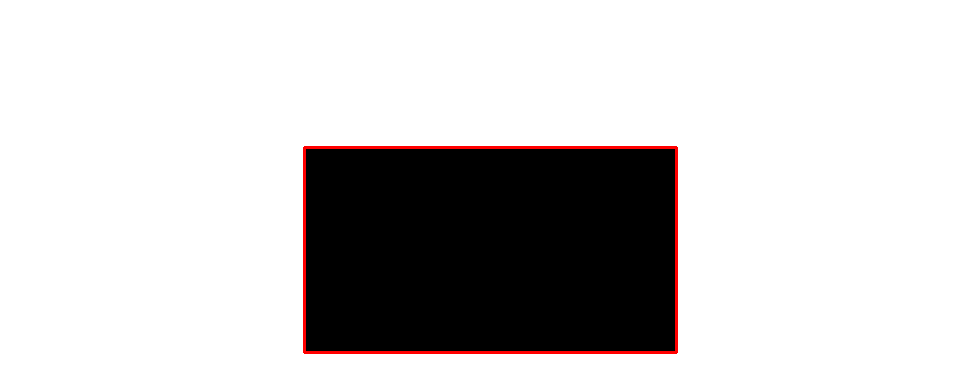

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


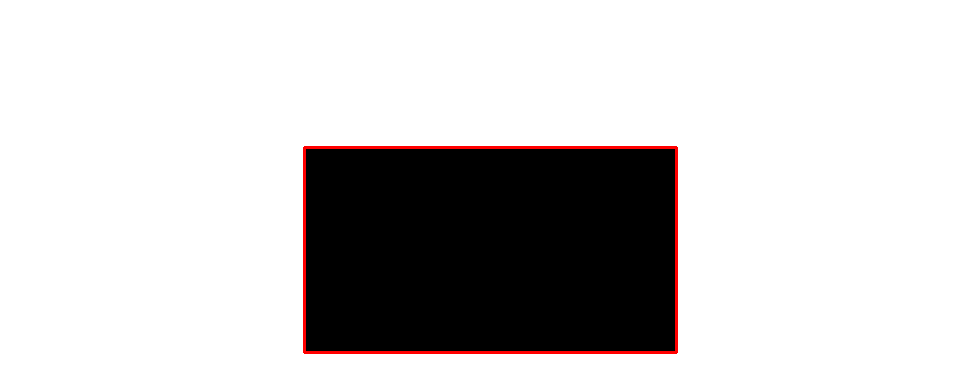

No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


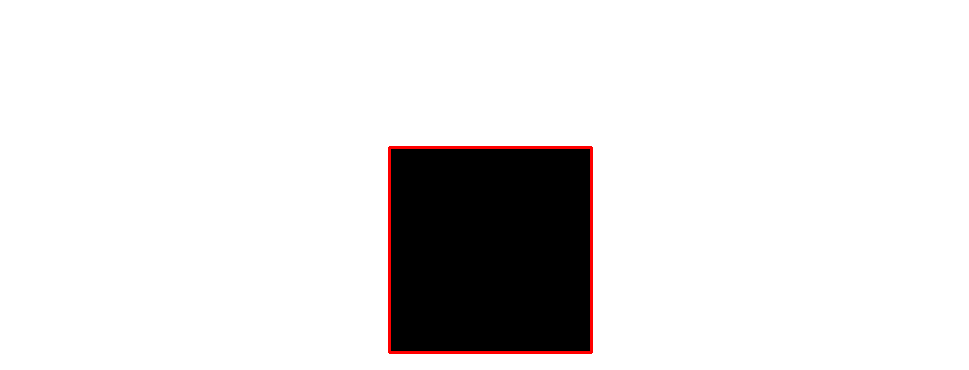

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


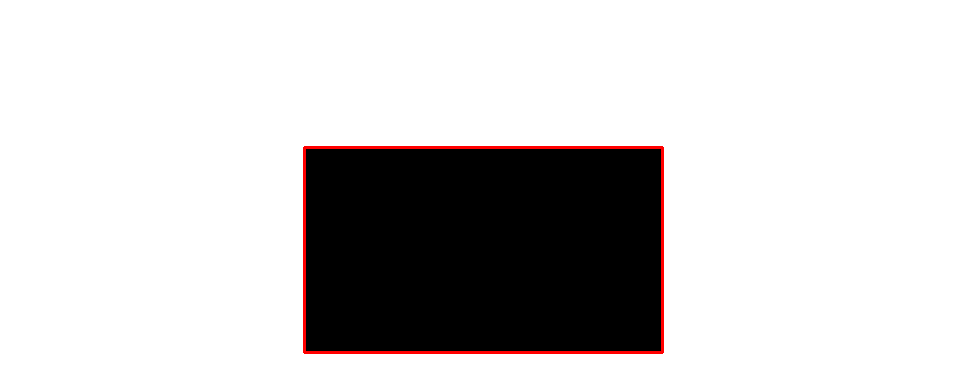

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


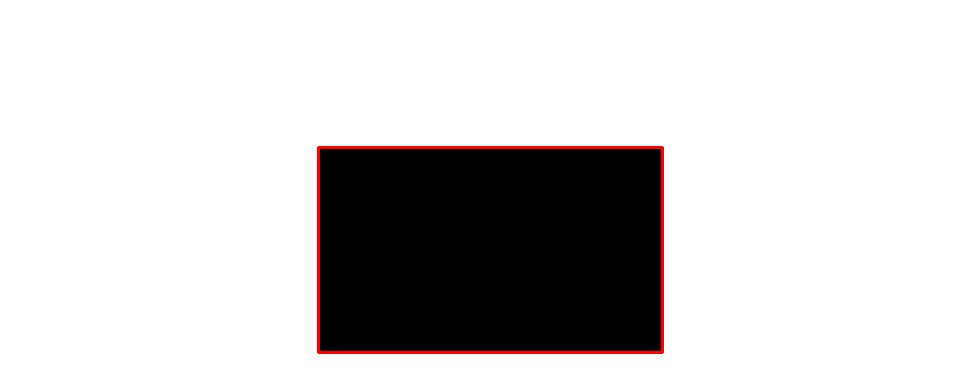

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


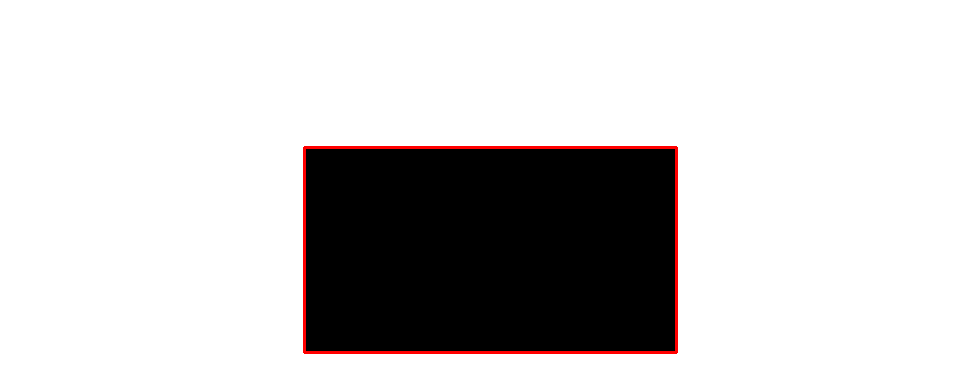

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


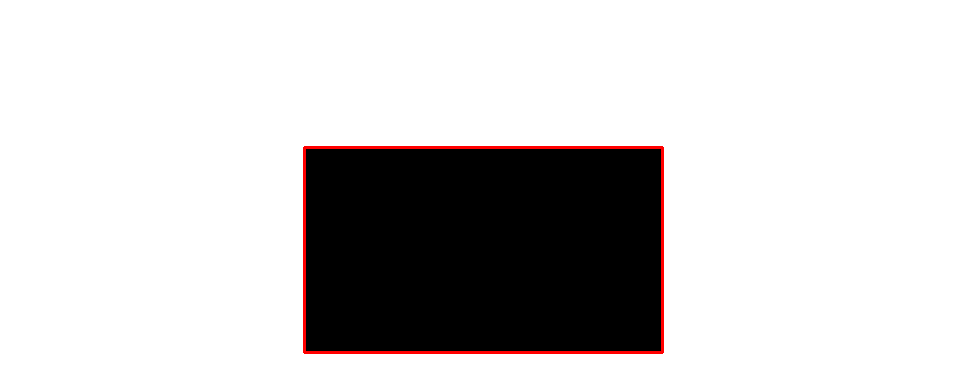

No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


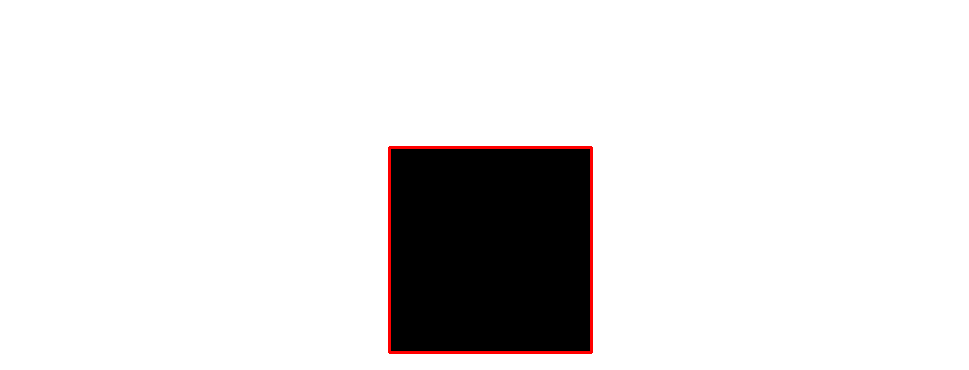

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


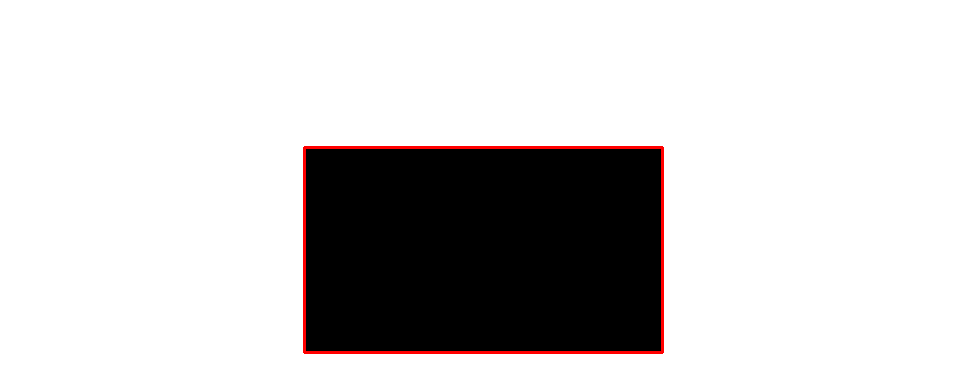

Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


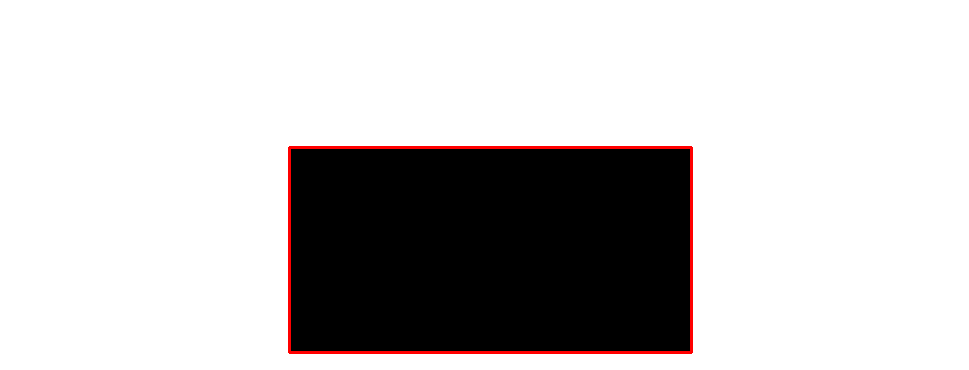

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


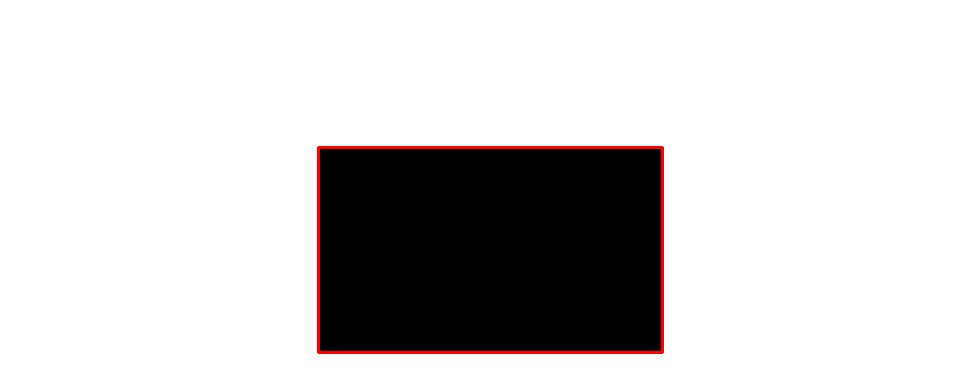

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


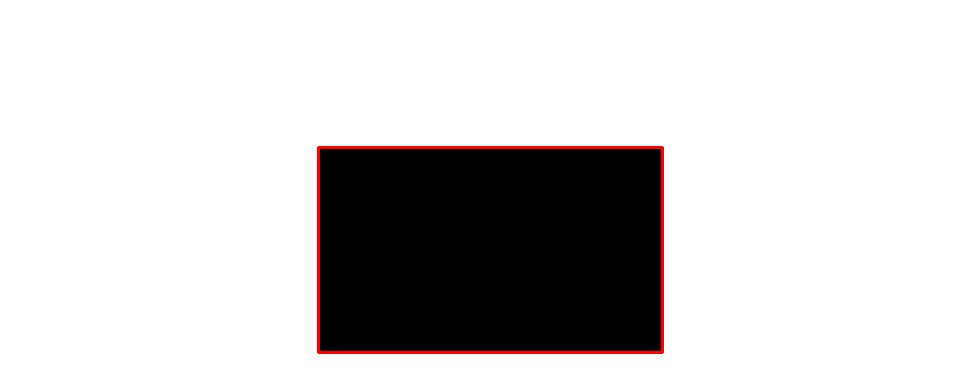

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


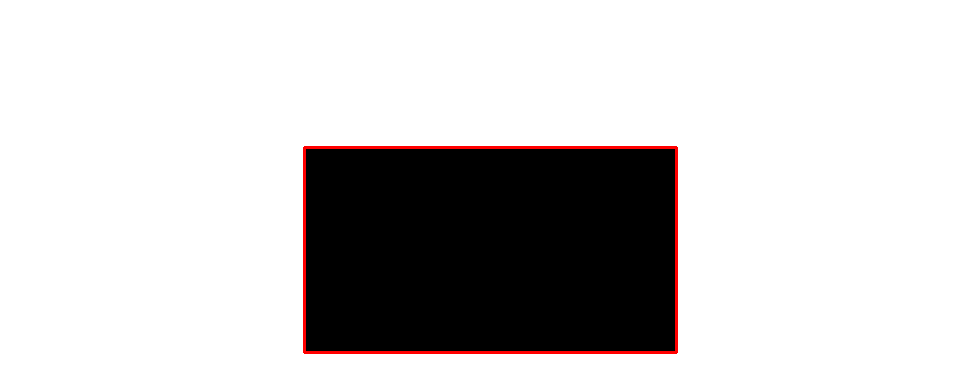

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


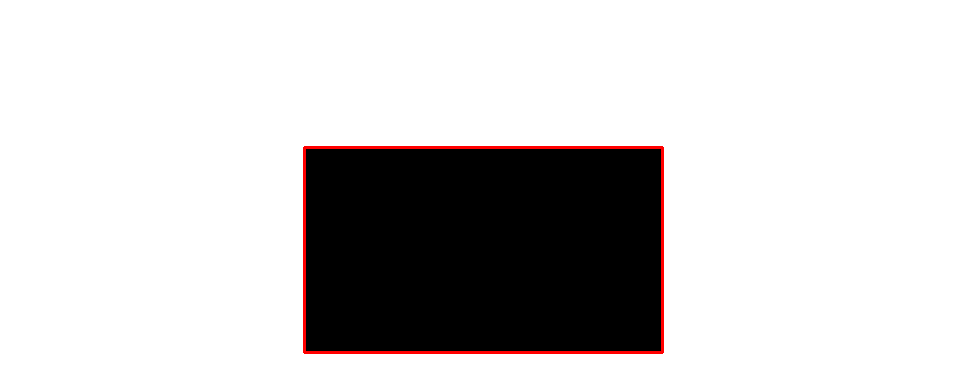

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


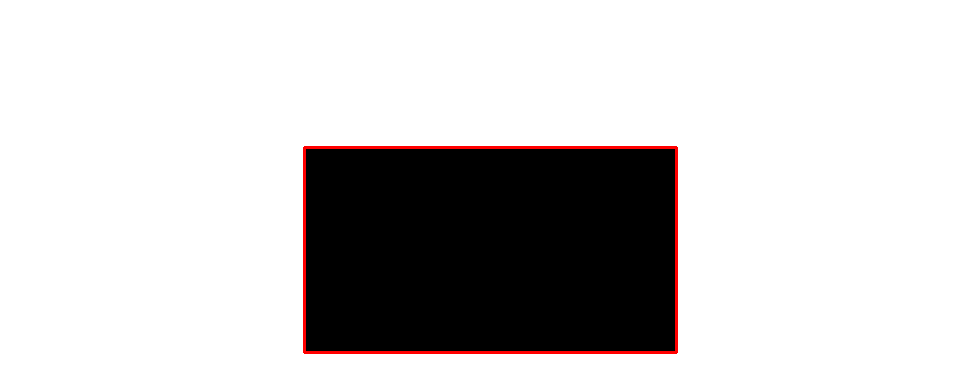

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

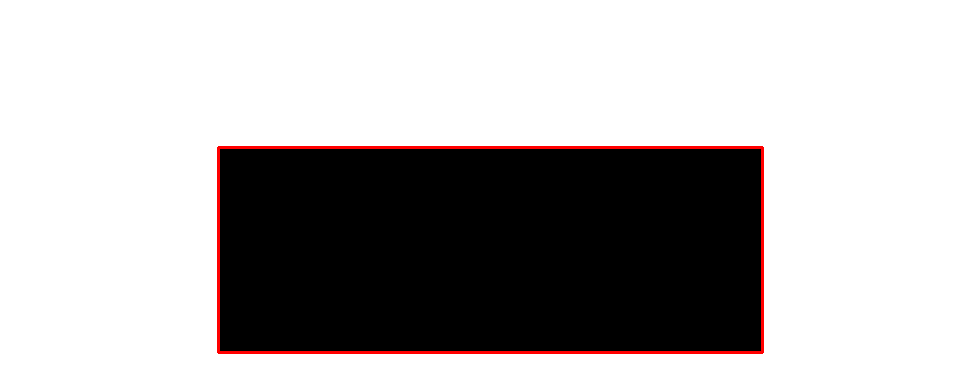

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

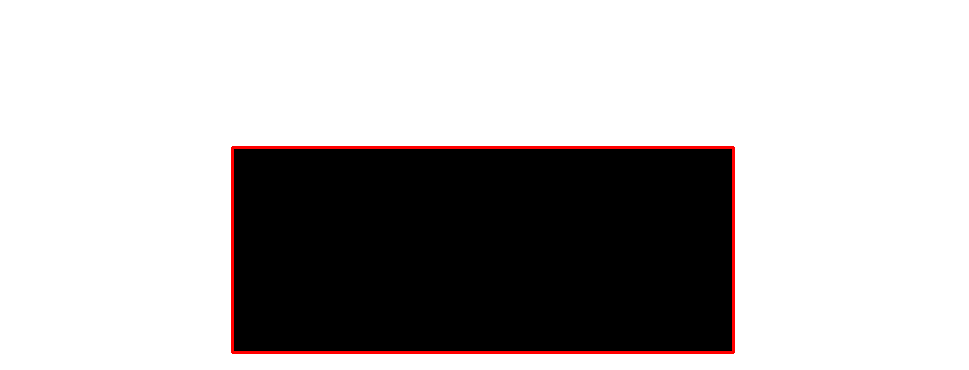

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


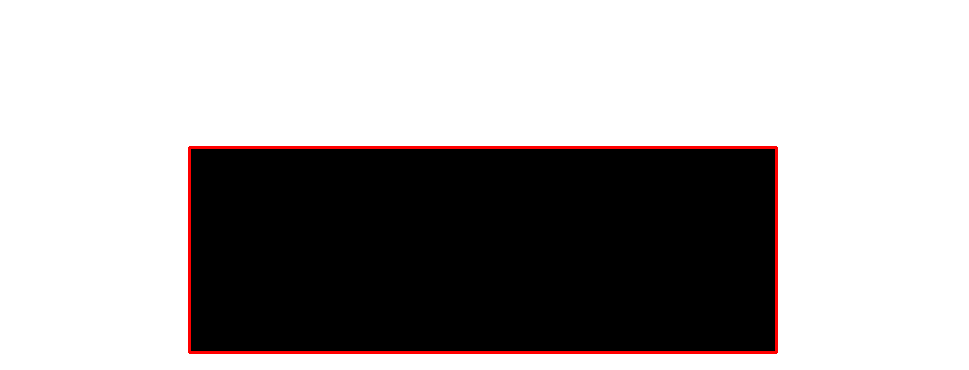

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


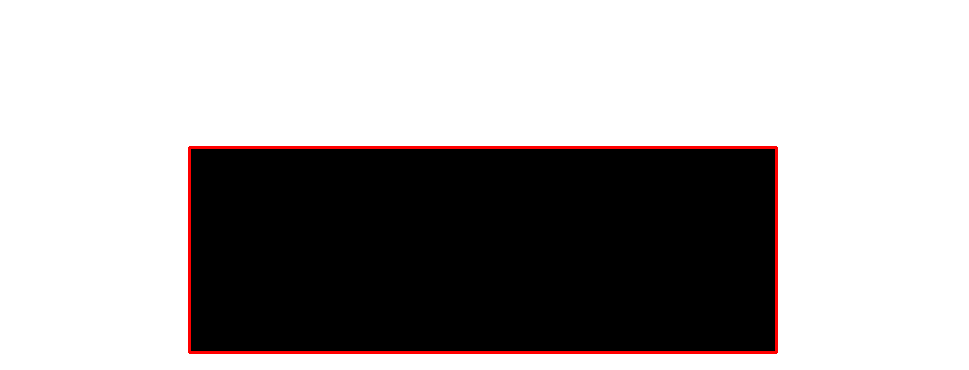

No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


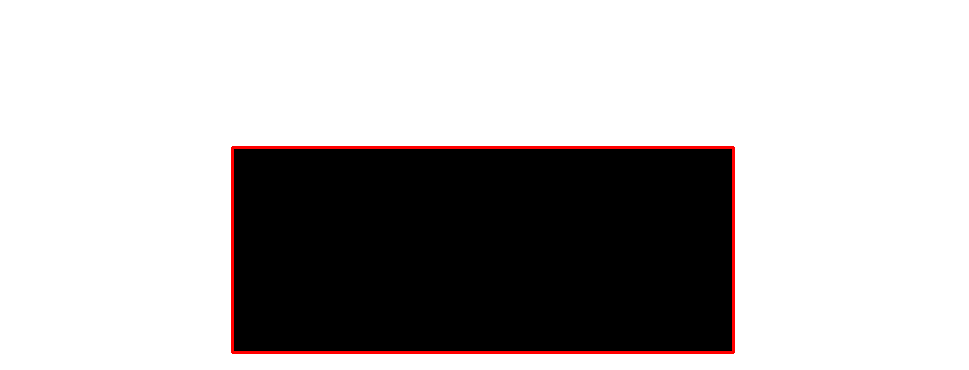

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


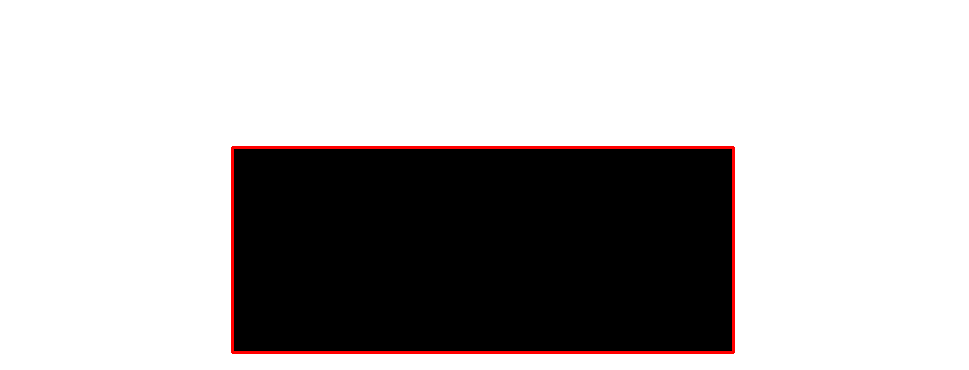

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


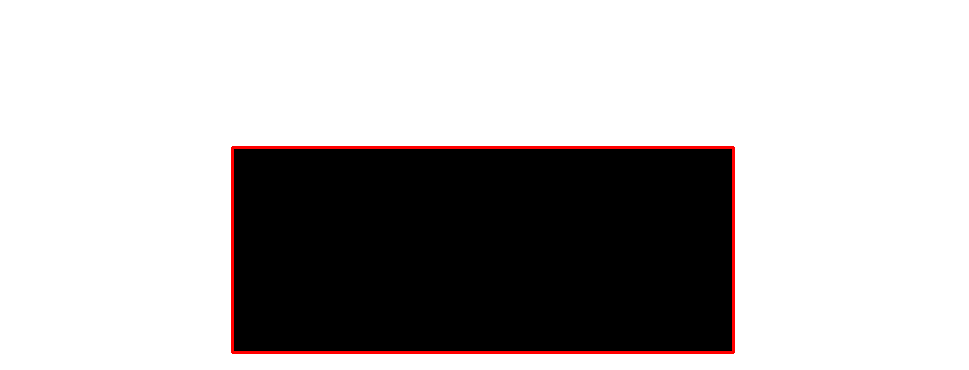

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

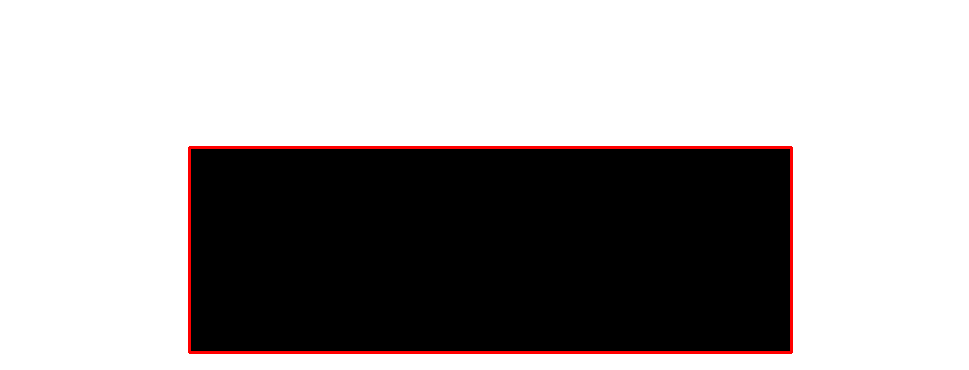

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


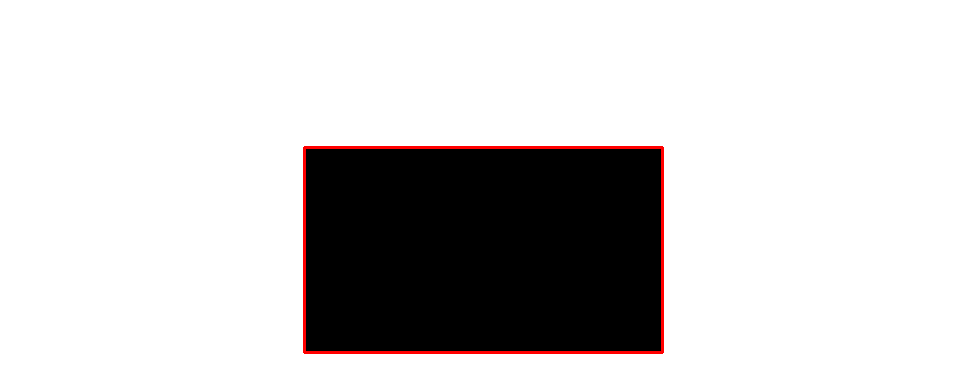

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


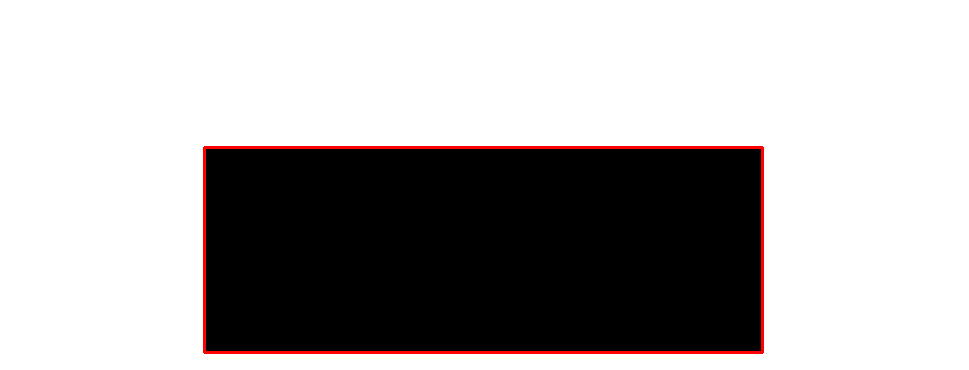

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


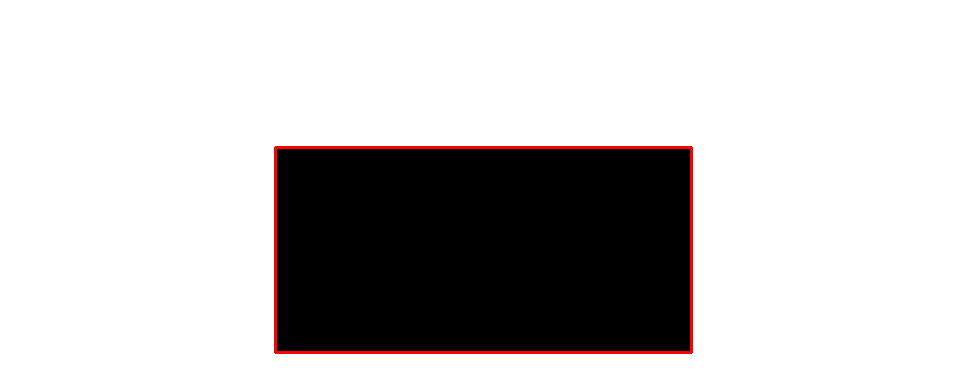

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


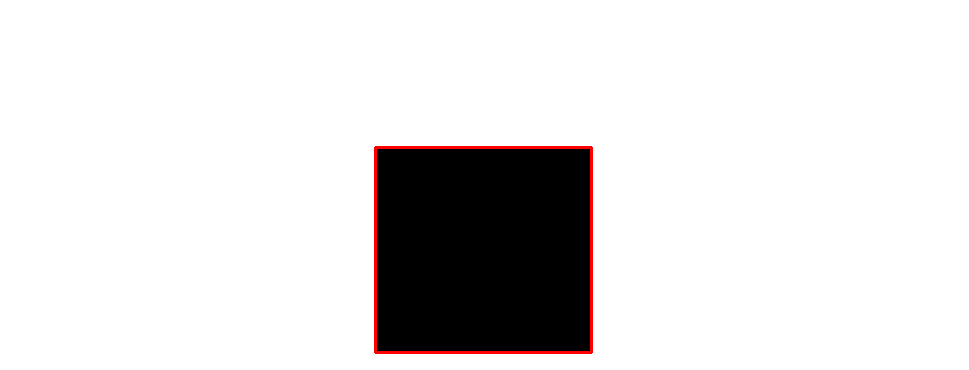

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

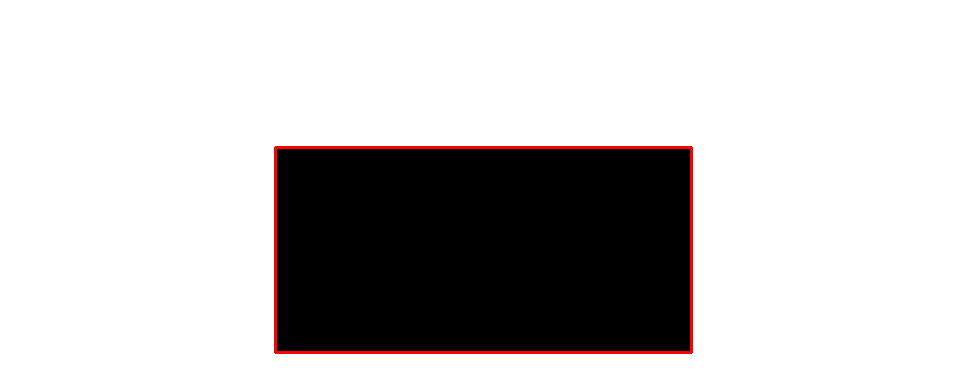

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 590 352
Rectangle coordinates: 375 147 590 352


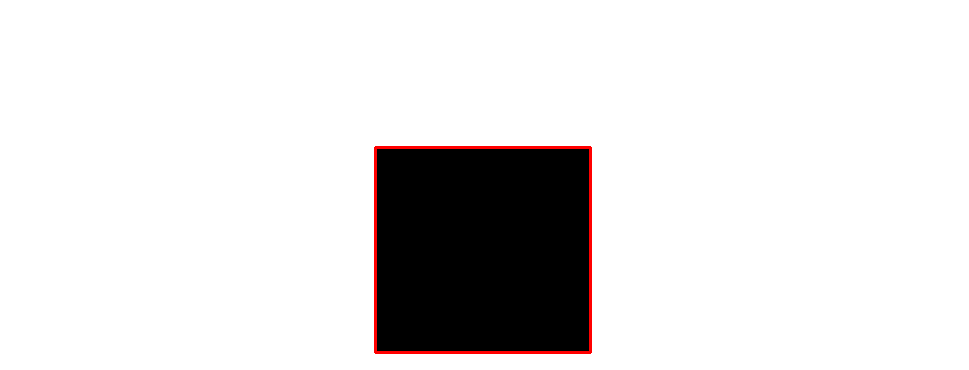

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


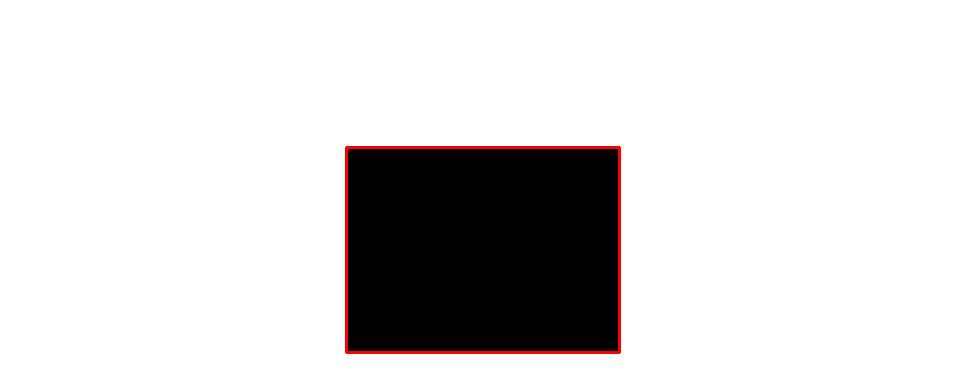

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


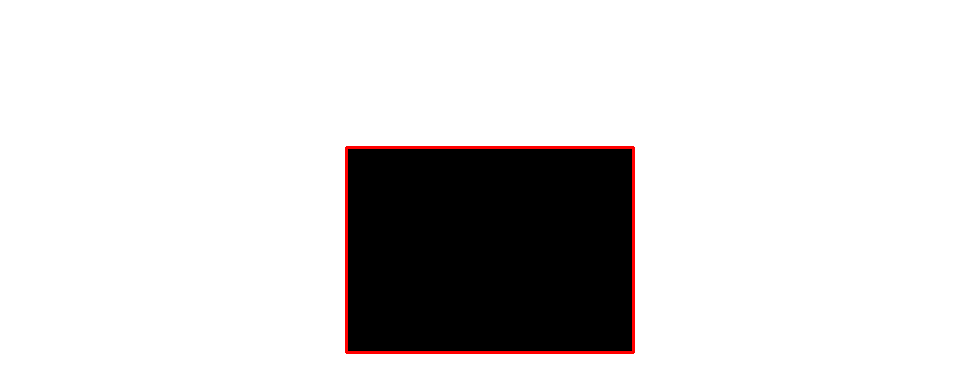

Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


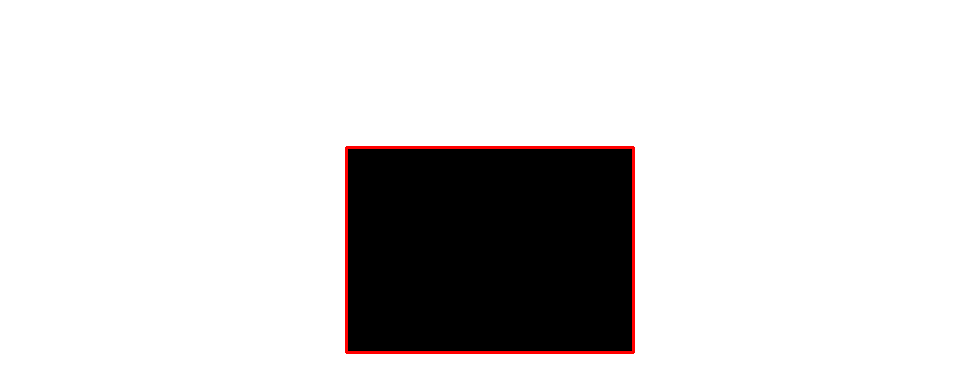

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 633 352
Rectangle coordinates: 346 147 633 352


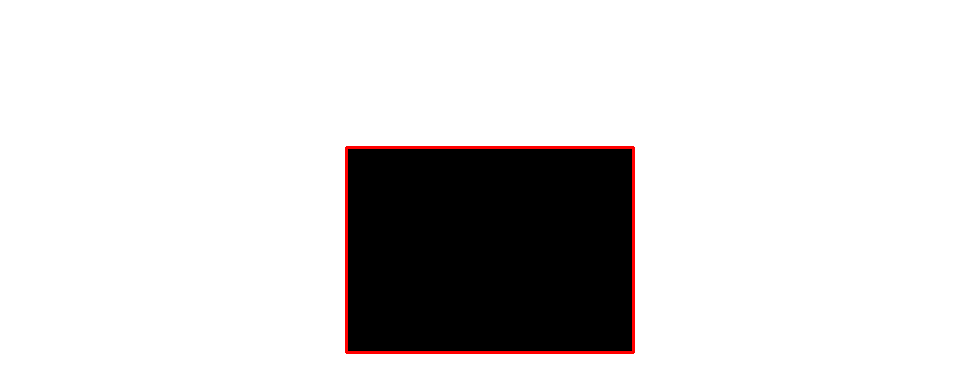

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


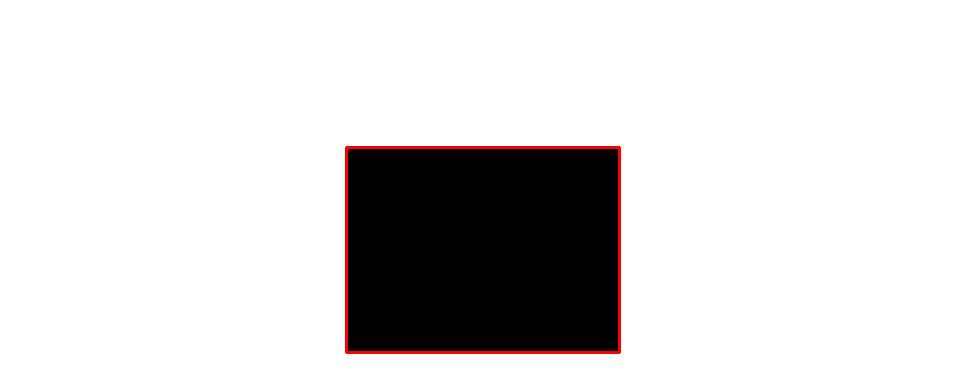

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


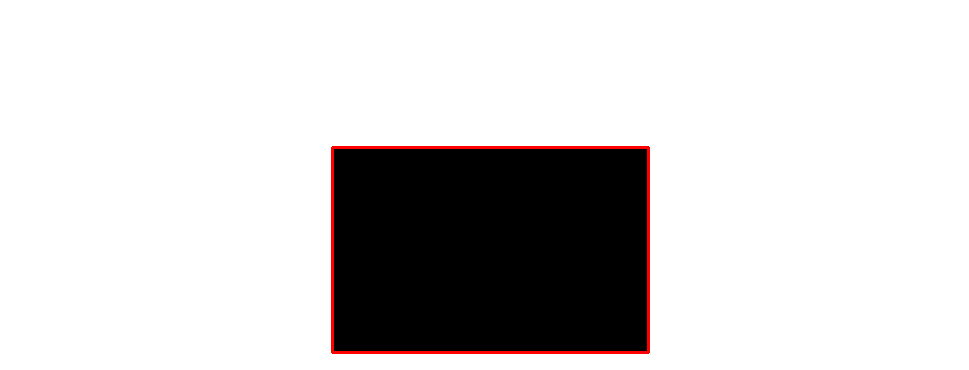

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


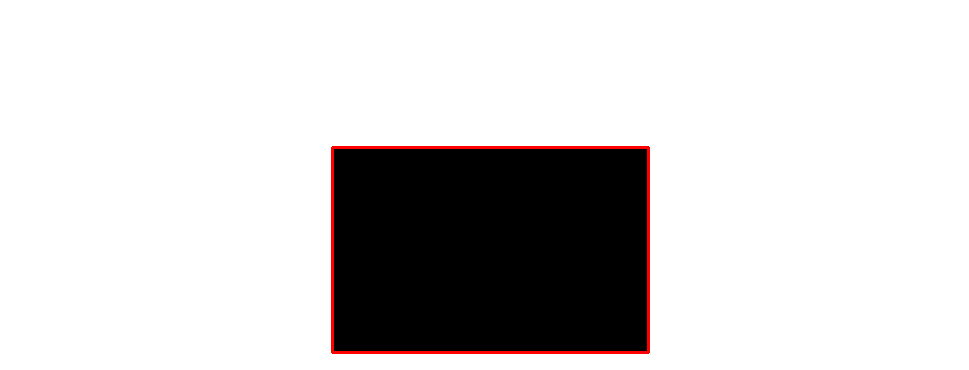

Rectangle coordinates: 118 147 862 352
Rectangle coordinates: 118 147 862 352


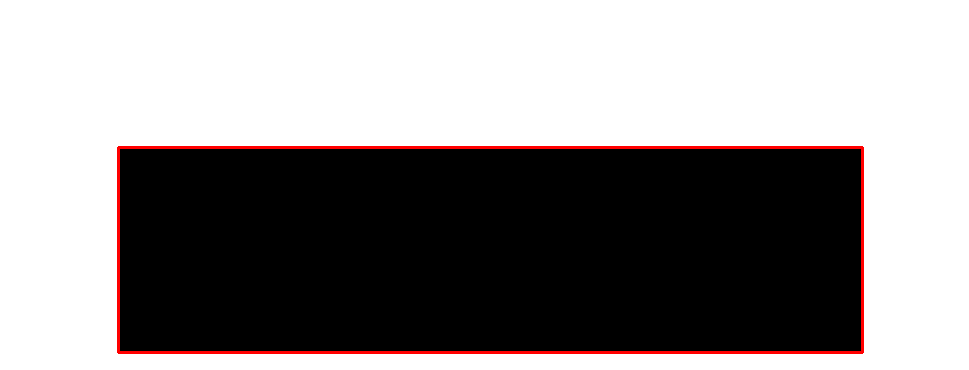

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

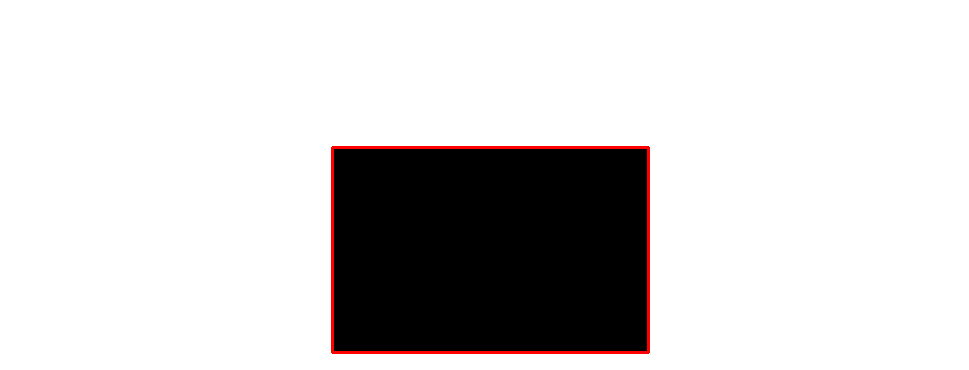

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


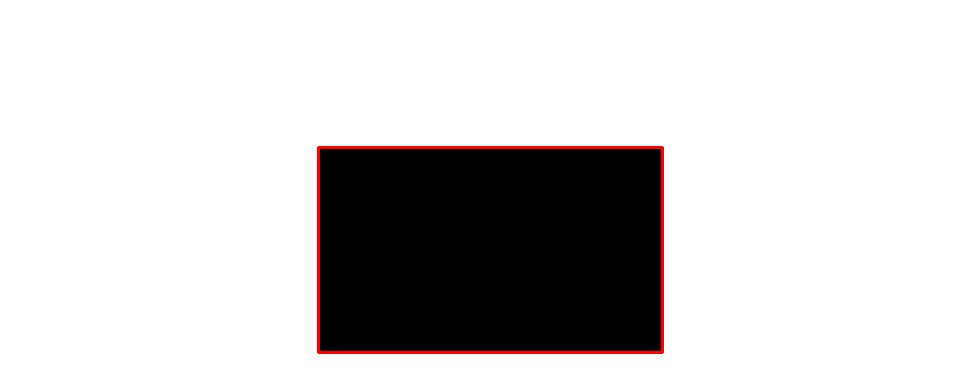

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


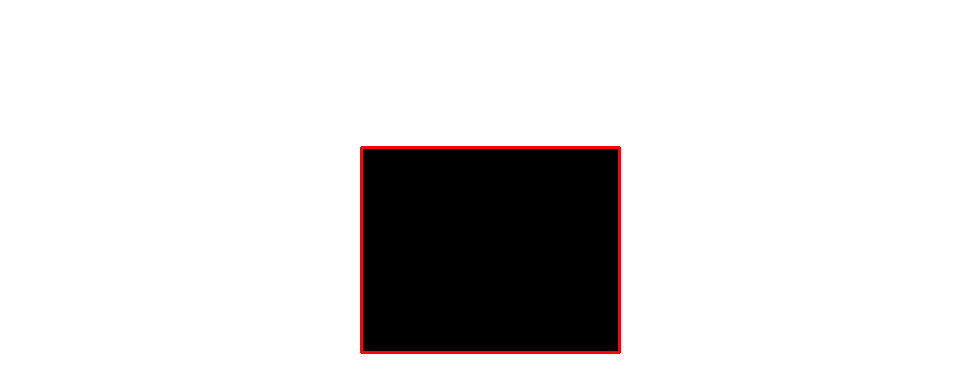

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


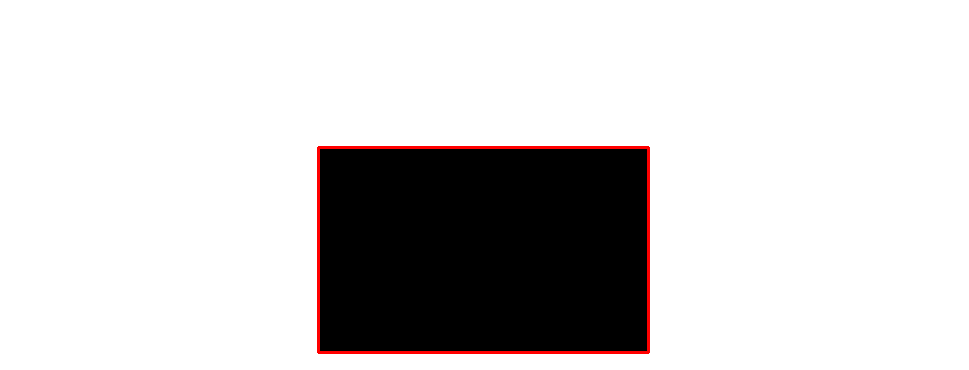

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


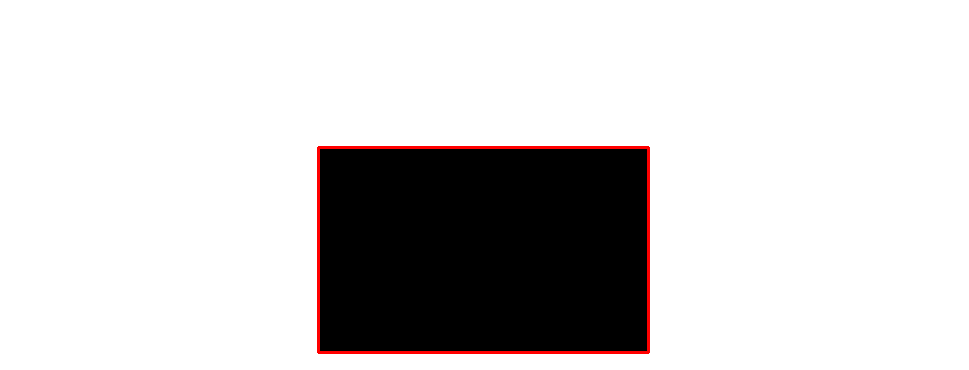

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


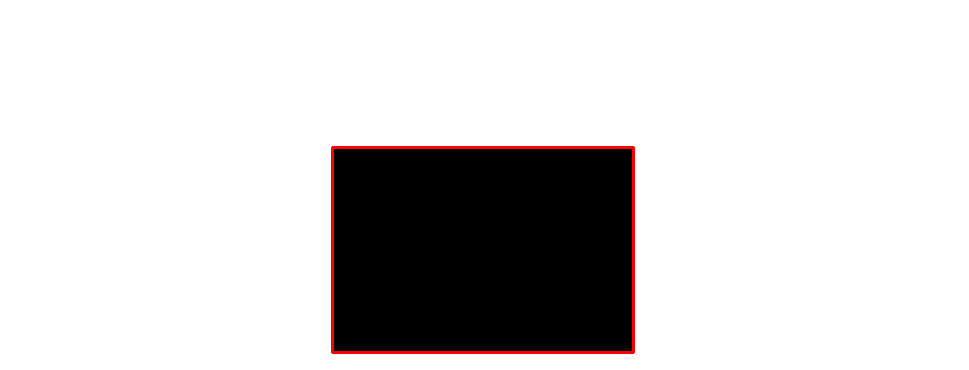

Rectangle coordinates: 347 147 619 352
Rectangle coordinates: 347 147 619 352


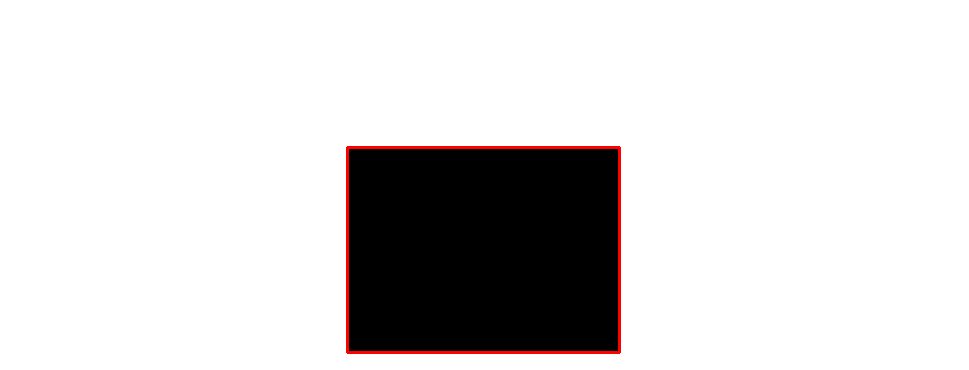

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


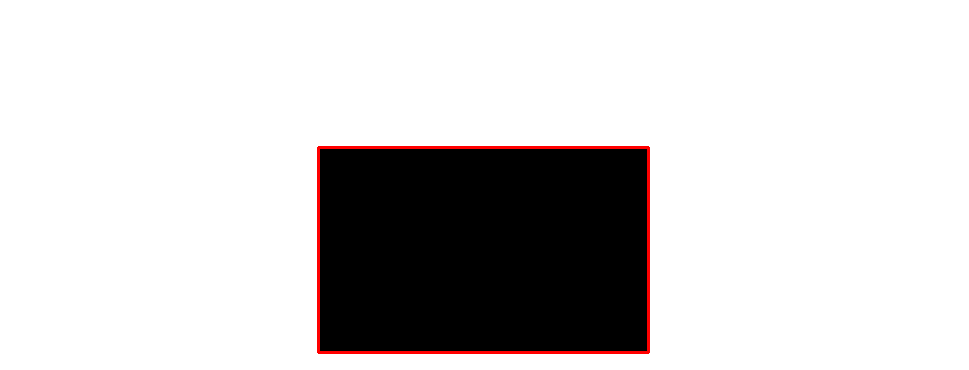

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


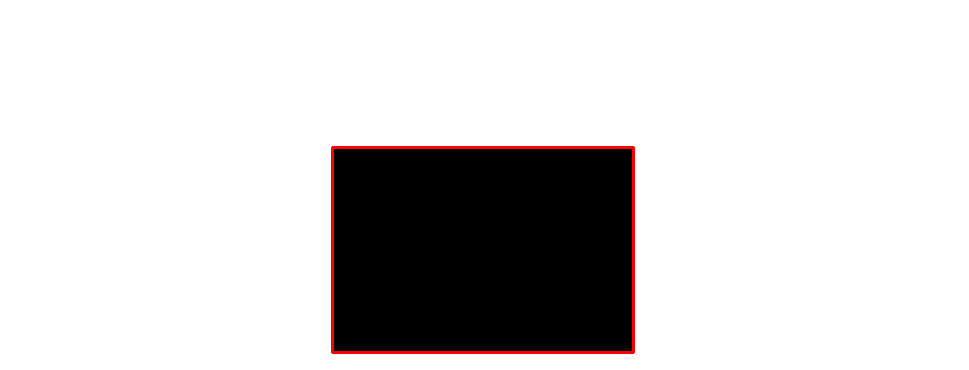

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 75 147 891 352
Rectangle coordinates: 75 147 891 352


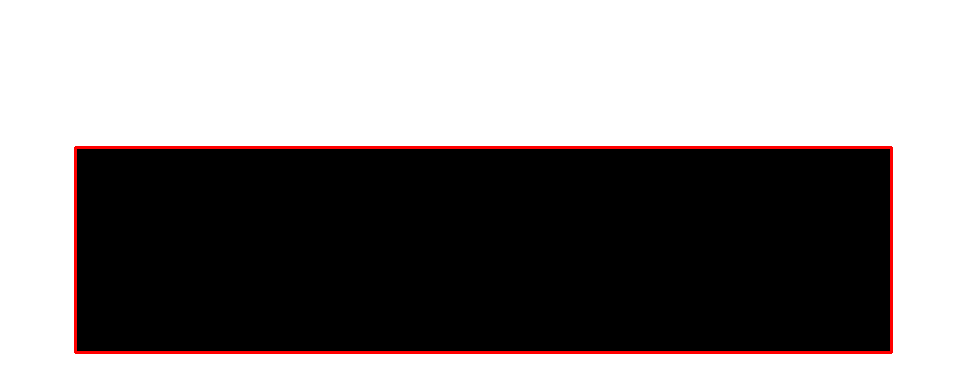

Rectangle coordinates: 103 147 862 352
Rectangle coordinates: 103 147 862 352


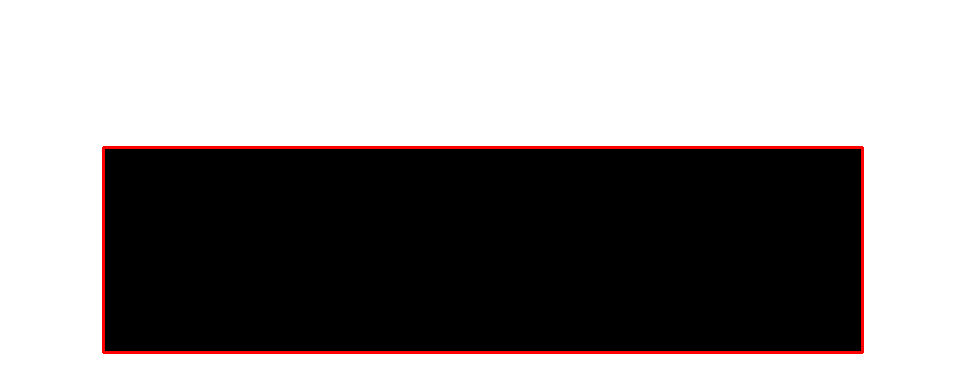

Rectangle coordinates: 132 147 848 352
Rectangle coordinates: 132 147 848 352


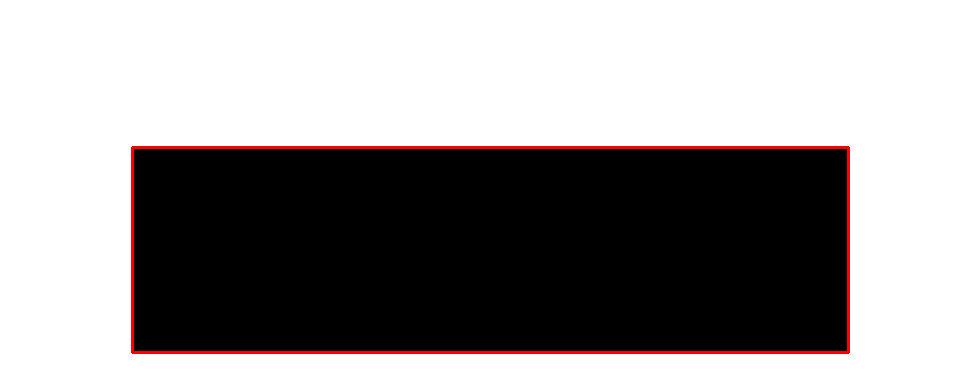

Rectangle coordinates: 432 147 533 352
Rectangle coordinates: 432 147 533 352


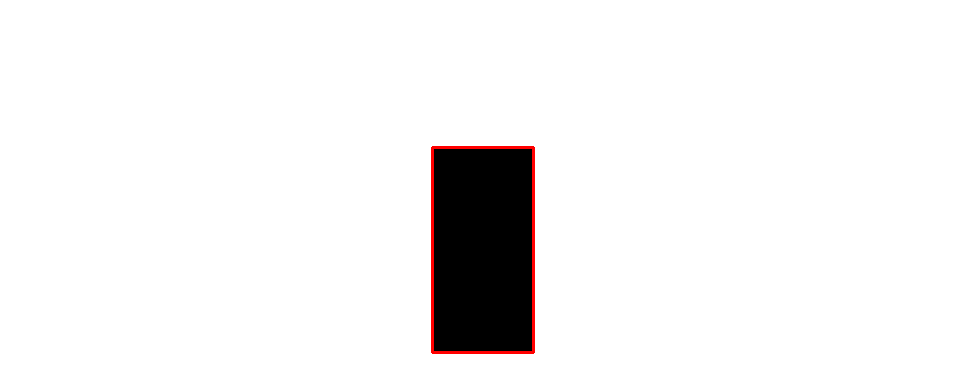

No contours found, skipping drawing rectangles.
Rectangle coordinates: 175 147 791 352
Rectangle coordinates: 175 147 791 352


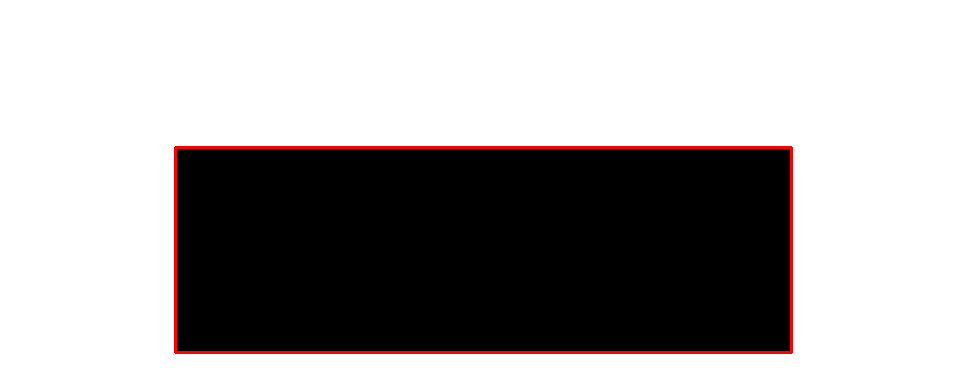

No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


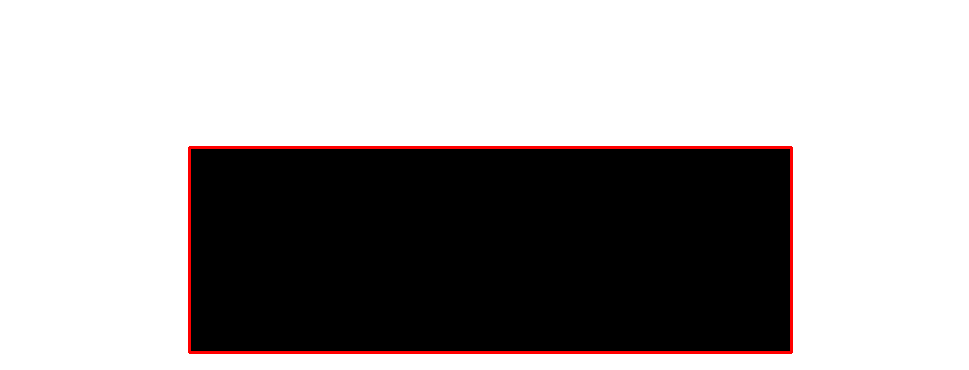

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


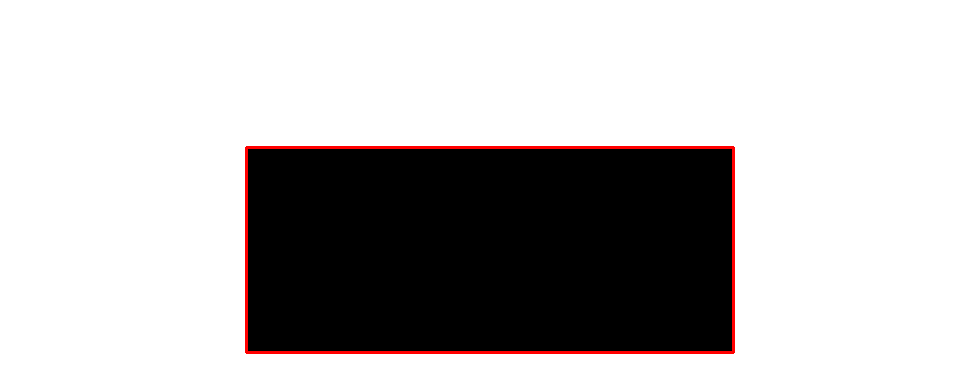

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


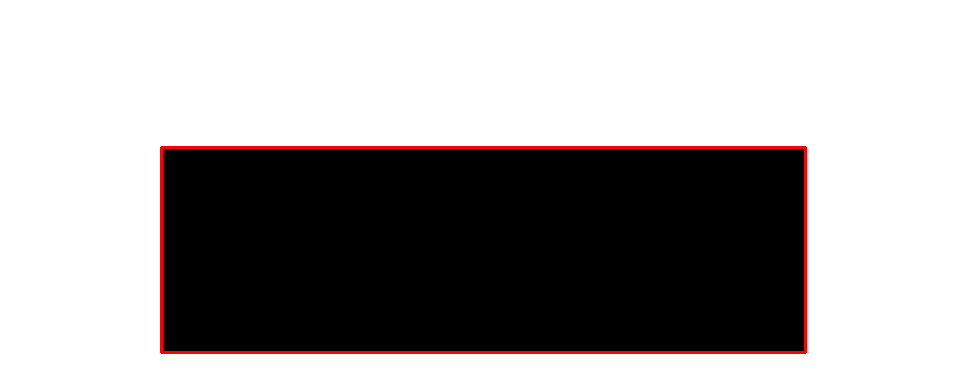

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


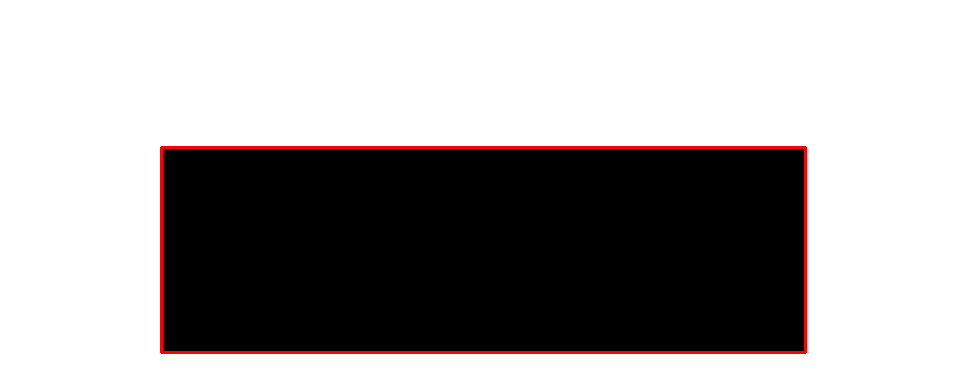

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


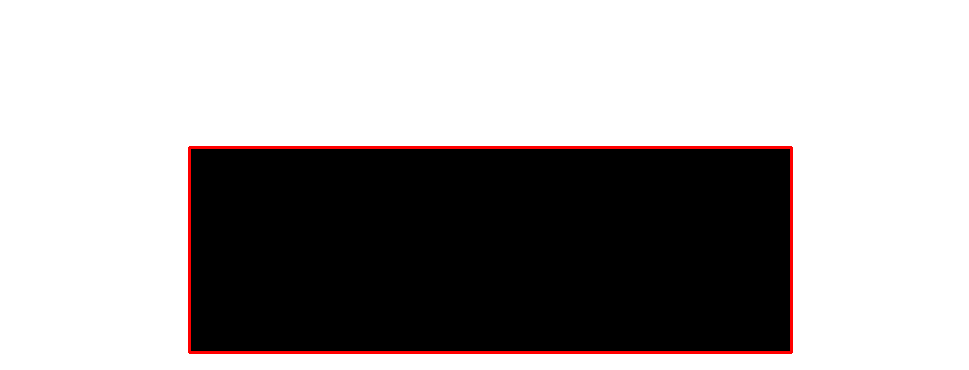

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


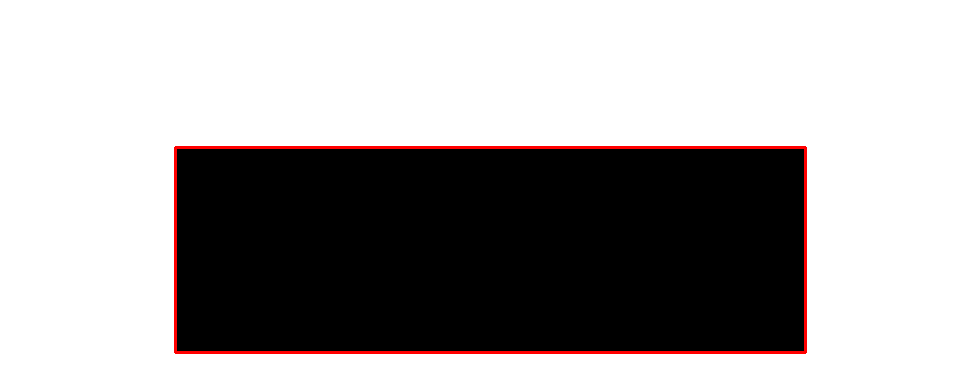

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


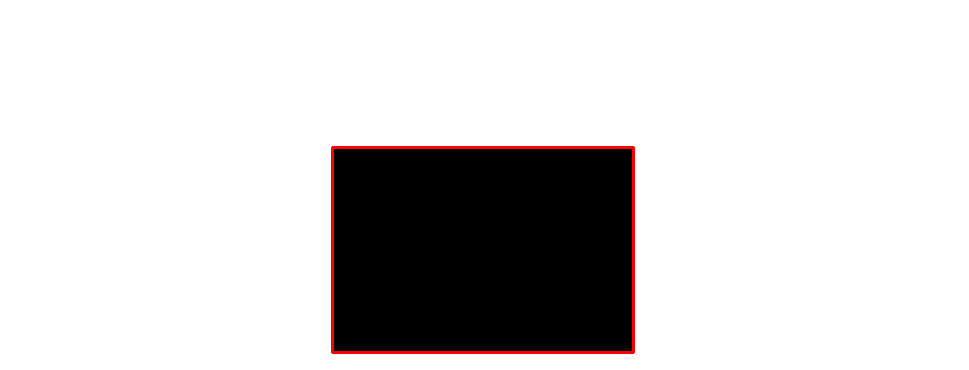

Rectangle coordinates: 175 147 791 352
Rectangle coordinates: 175 147 791 352


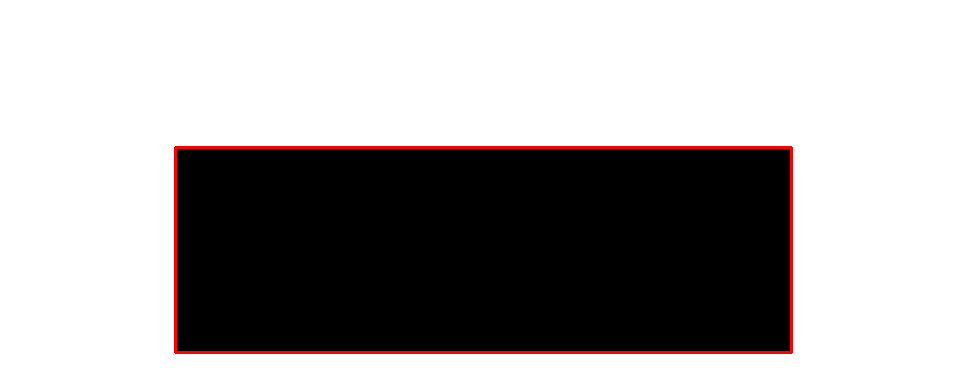

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


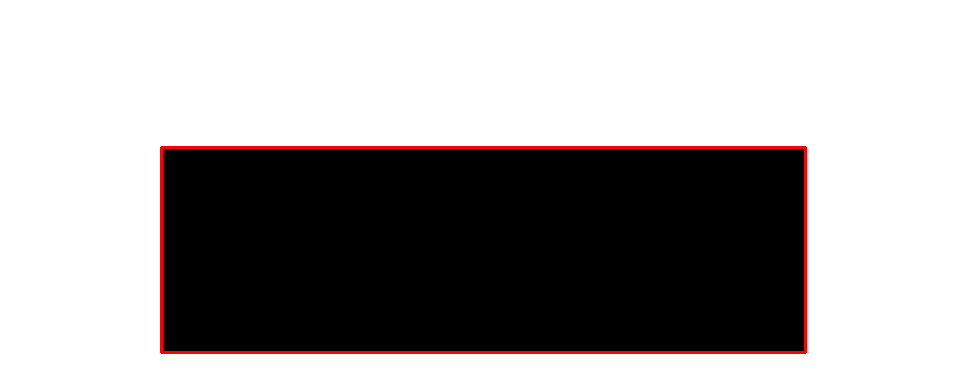

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


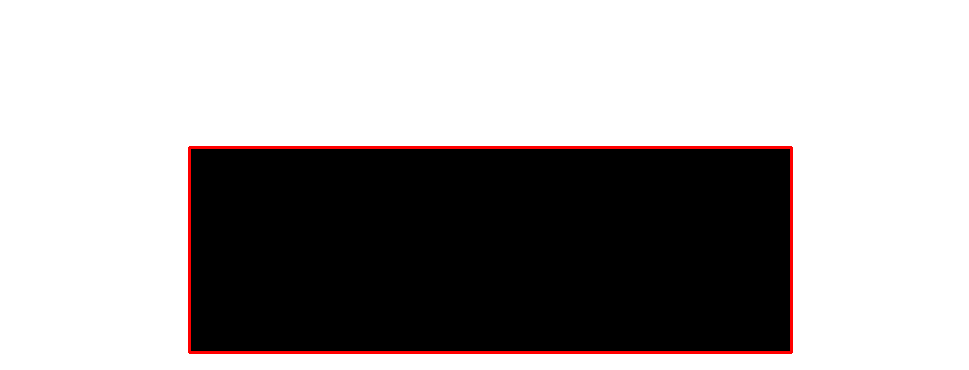

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


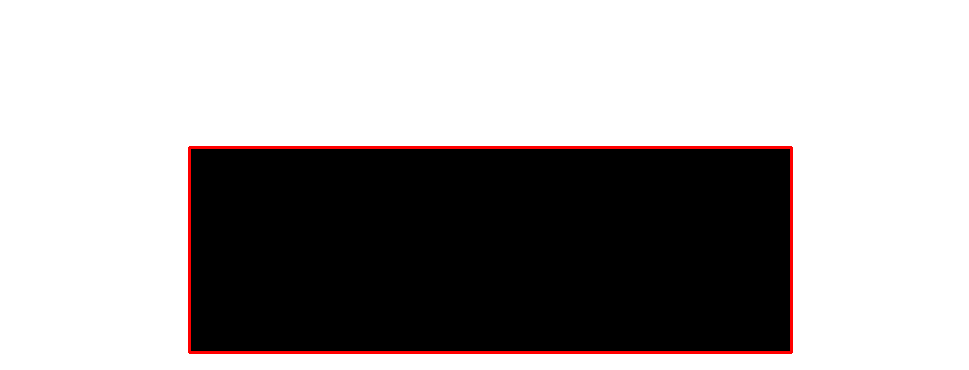

Rectangle coordinates: 432 147 533 352
Rectangle coordinates: 432 147 533 352


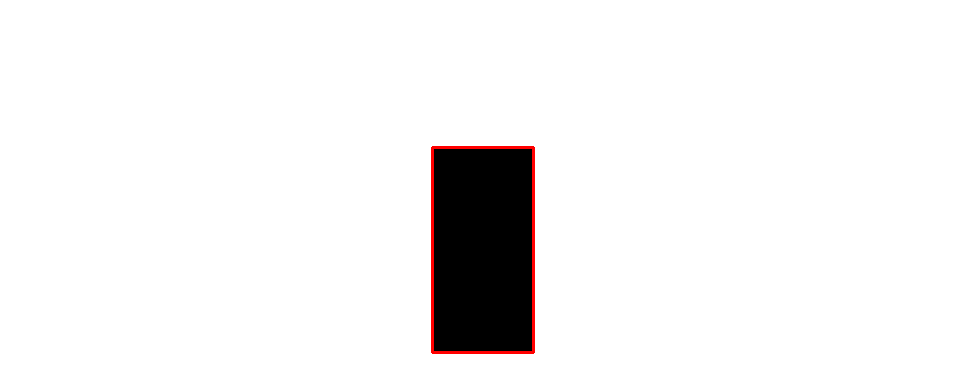

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 819 352
Rectangle coordinates: 161 147 819 352


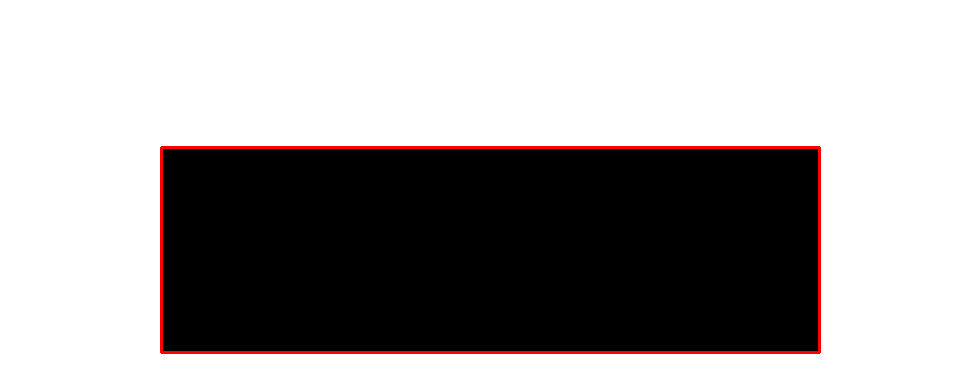

Rectangle coordinates: 189 147 791 352
Rectangle coordinates: 189 147 791 352


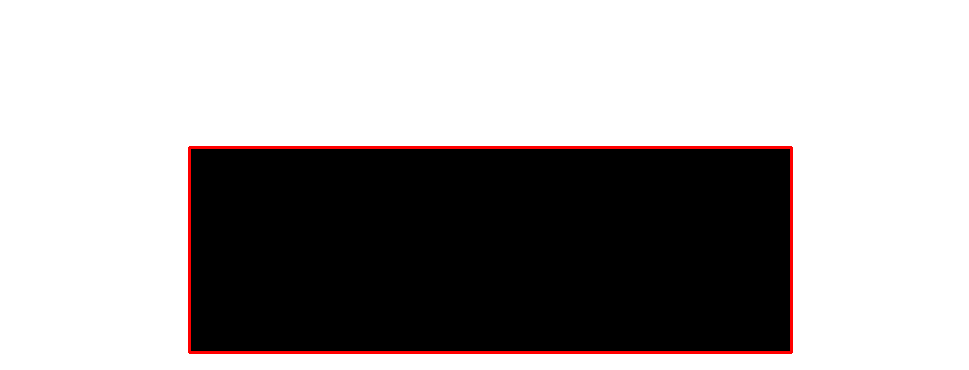

Rectangle coordinates: 175 147 791 352
Rectangle coordinates: 175 147 791 352


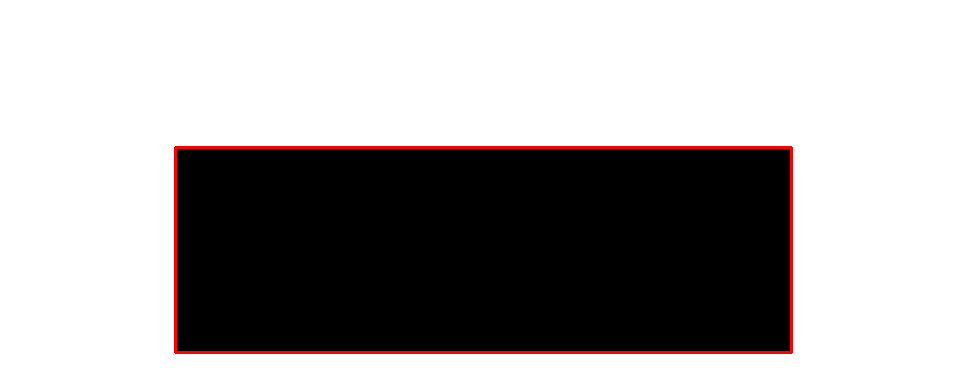

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


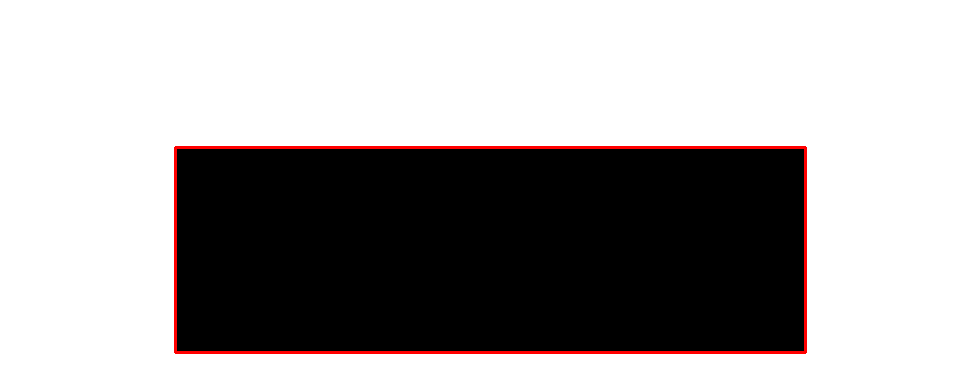

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


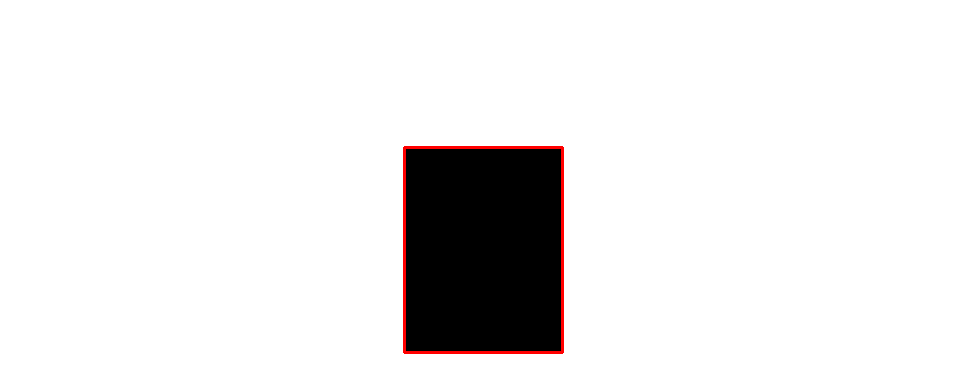

No contours found, skipping drawing rectangles.
Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


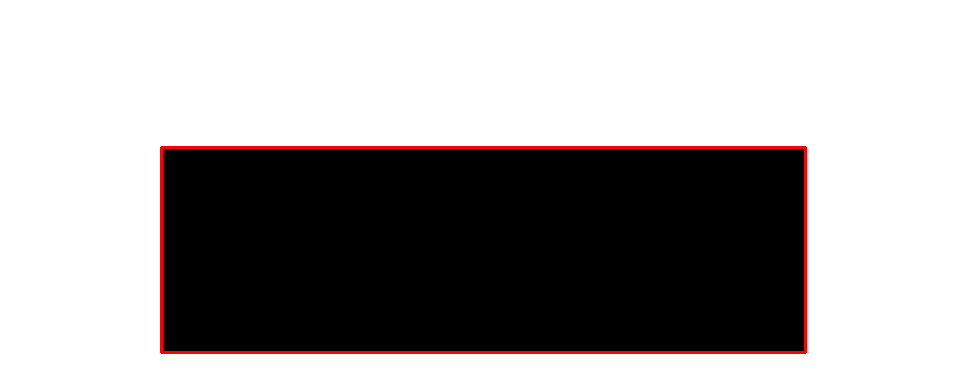

Rectangle coordinates: 204 147 762 352
Rectangle coordinates: 204 147 762 352


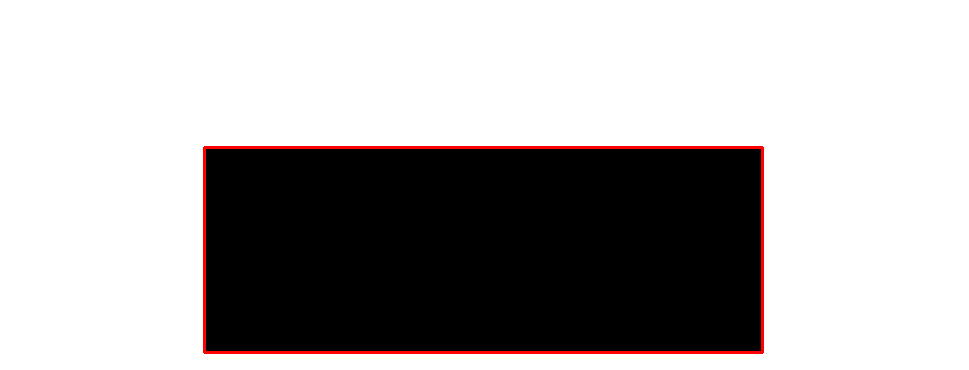

Rectangle coordinates: 146 147 819 352
Rectangle coordinates: 146 147 819 352


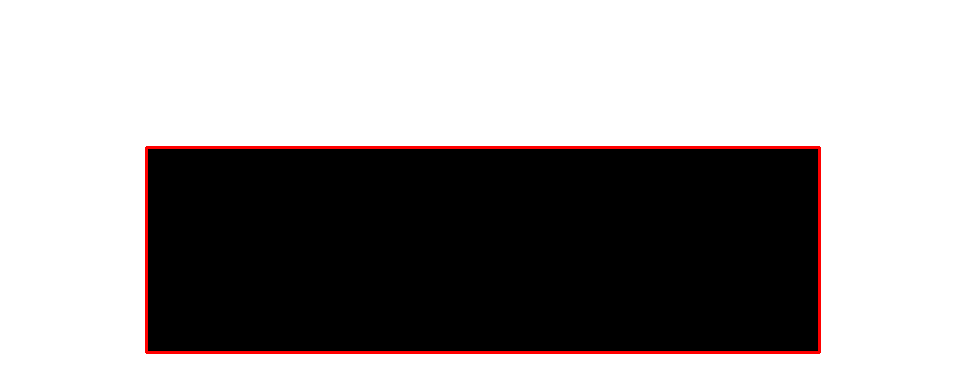

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


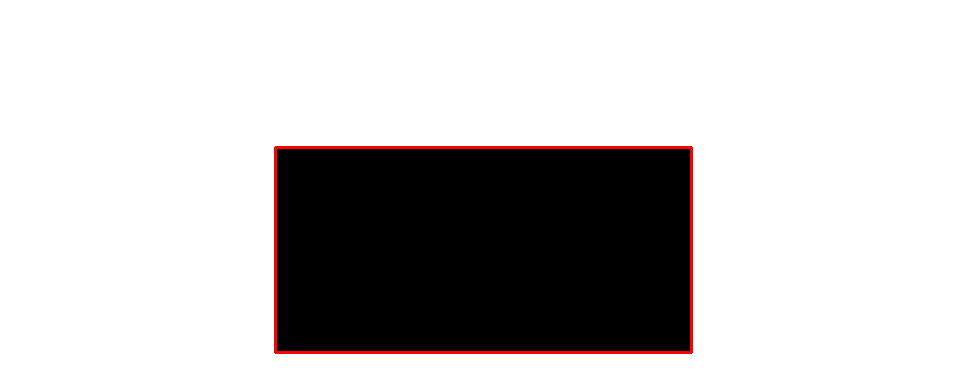

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


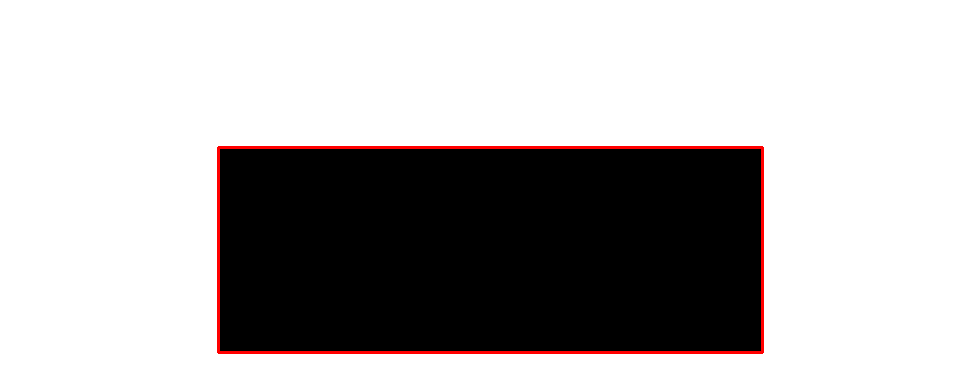

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


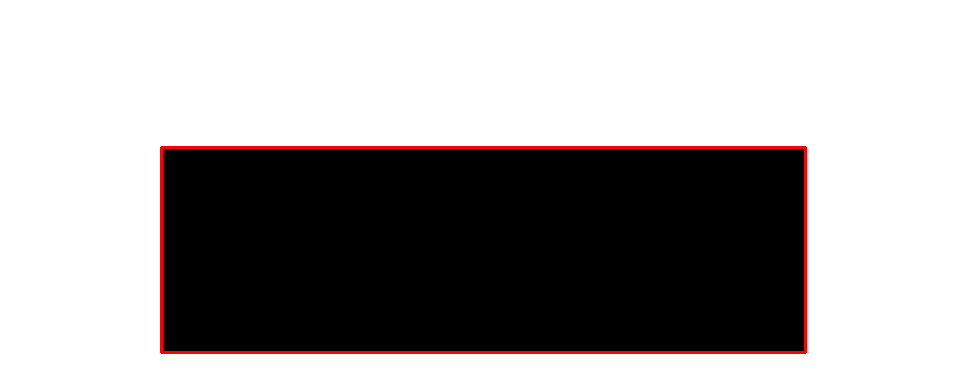

Rectangle coordinates: 175 147 791 352
Rectangle coordinates: 175 147 791 352


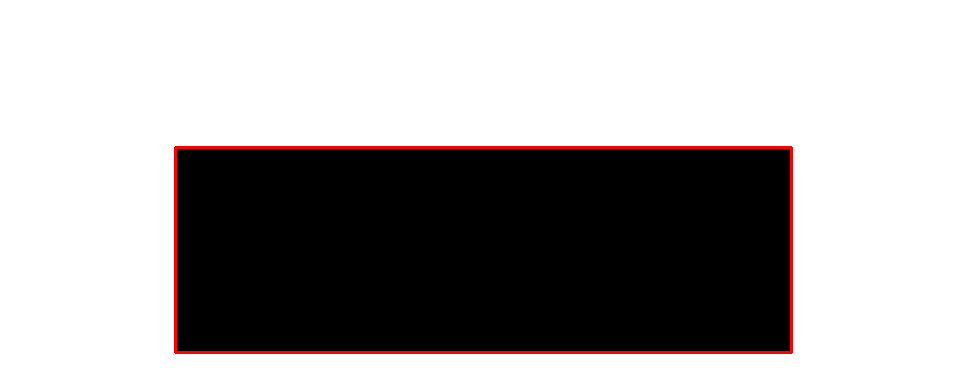

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

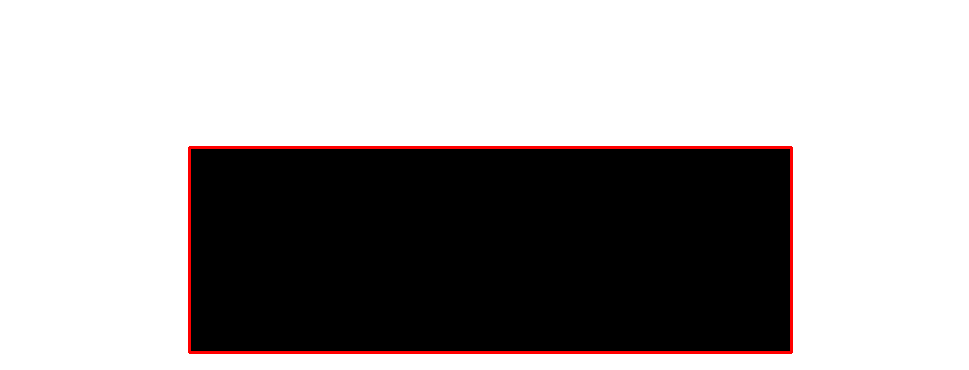

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


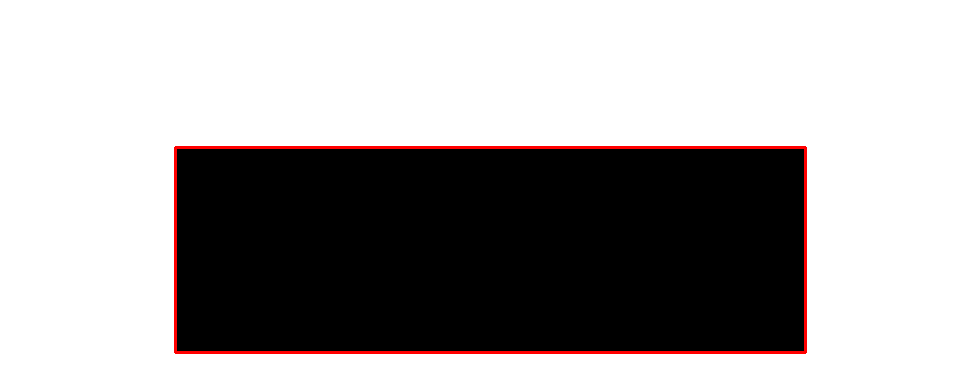

Rectangle coordinates: 146 147 834 352
Rectangle coordinates: 146 147 834 352


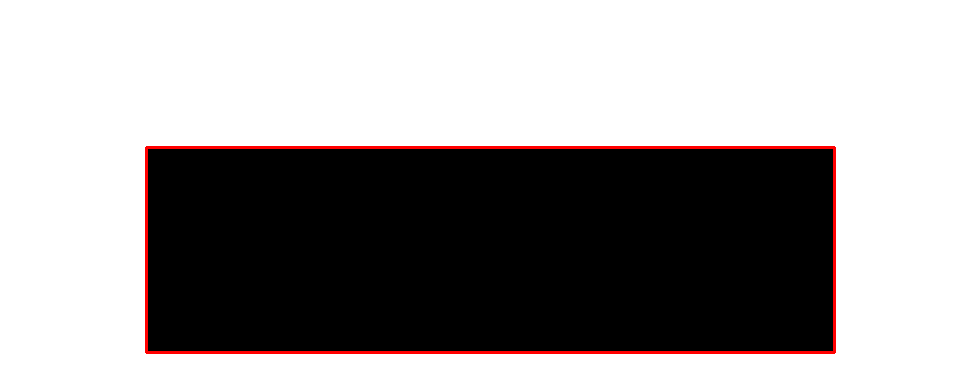

No contours found, skipping drawing rectangles.
Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


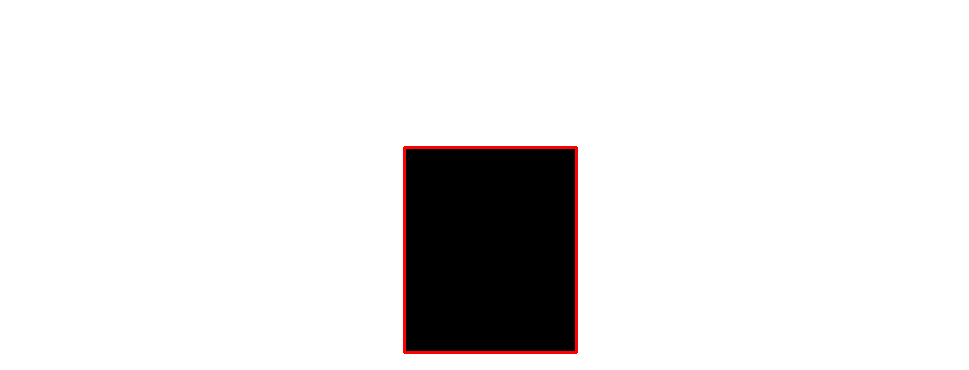

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


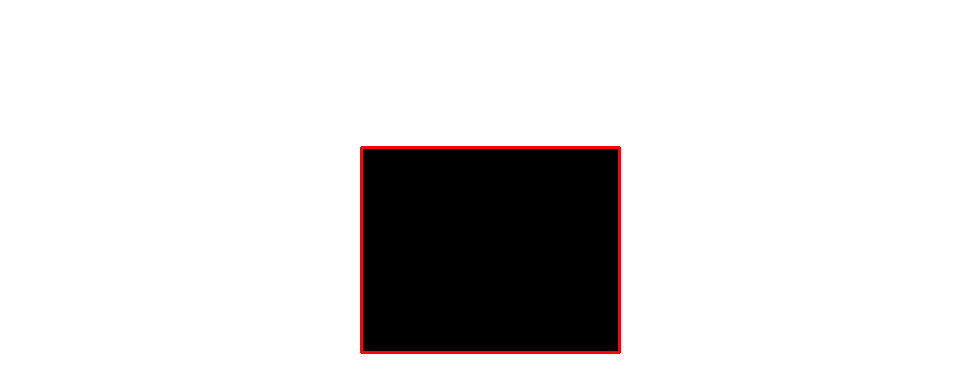

No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


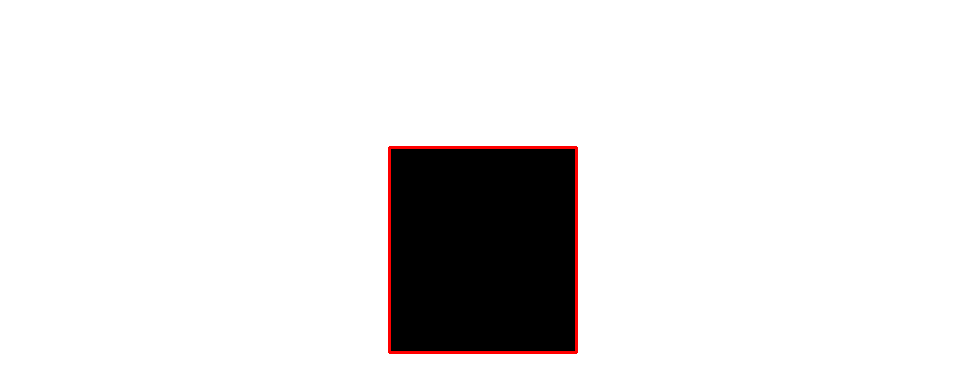

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


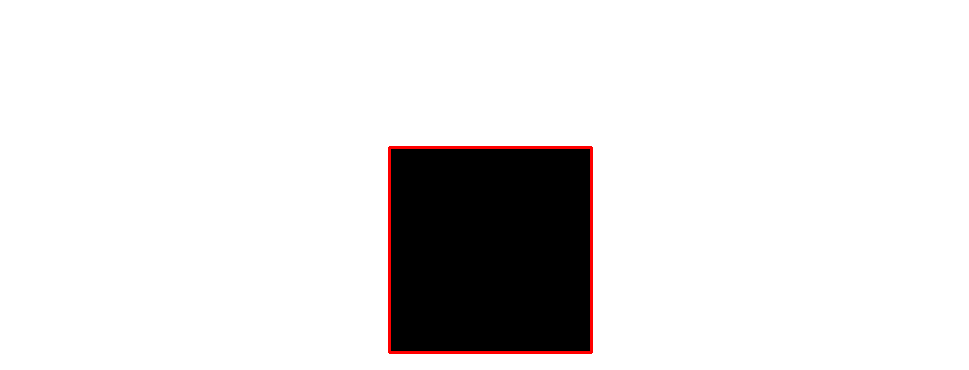

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


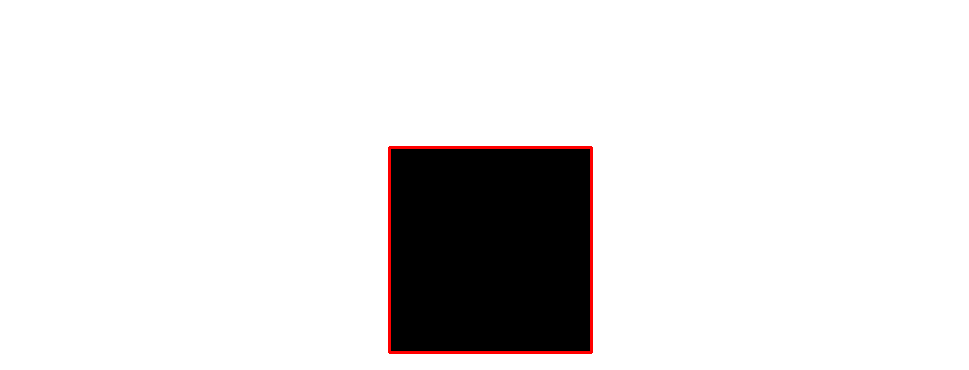

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


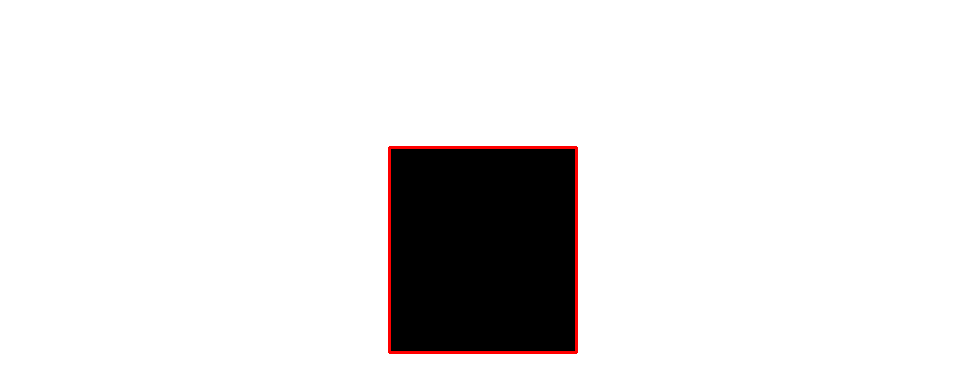

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


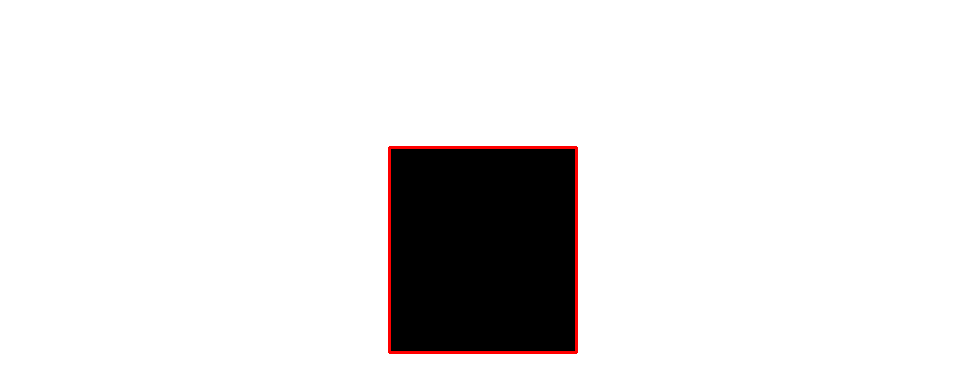

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


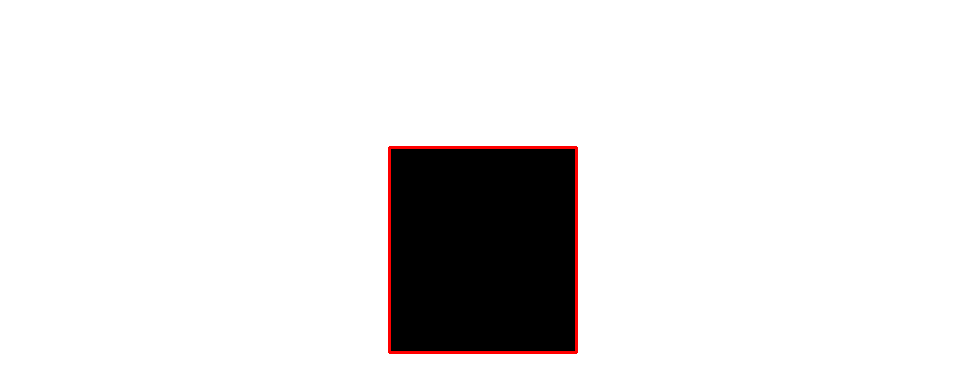

No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


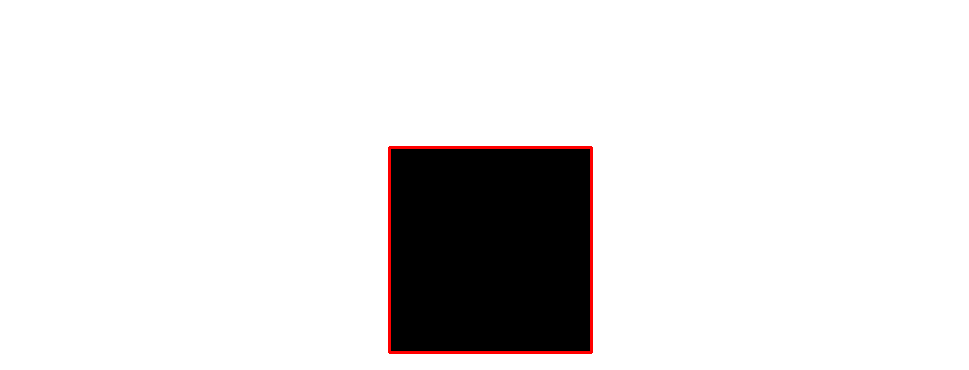

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


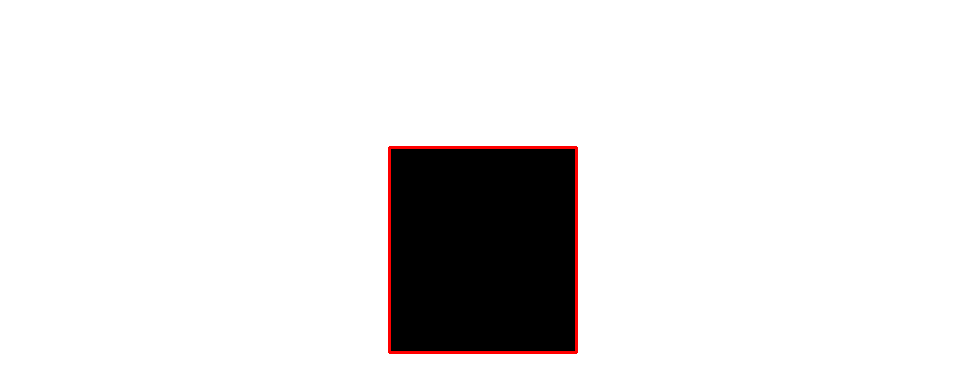

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


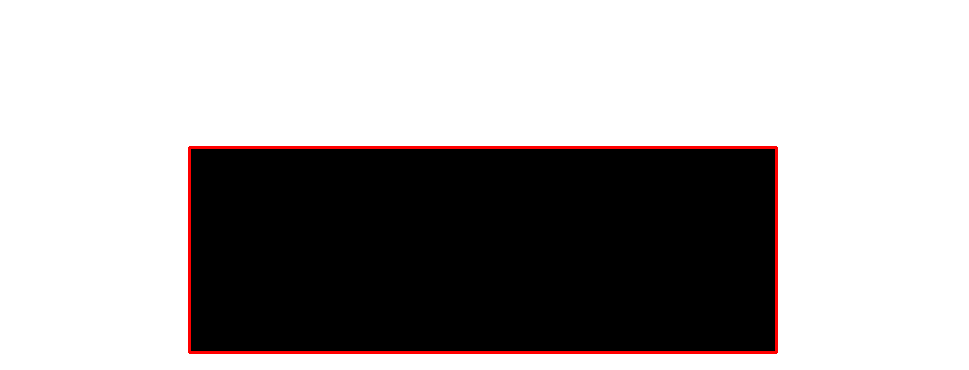

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


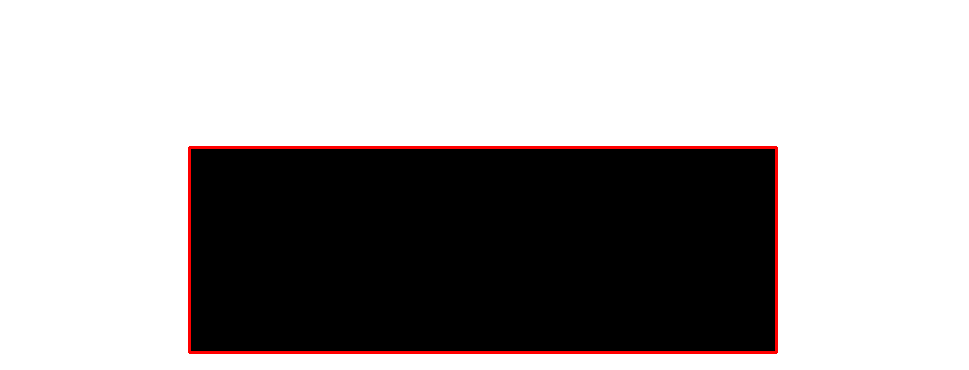

No contours found, skipping drawing rectangles.
Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


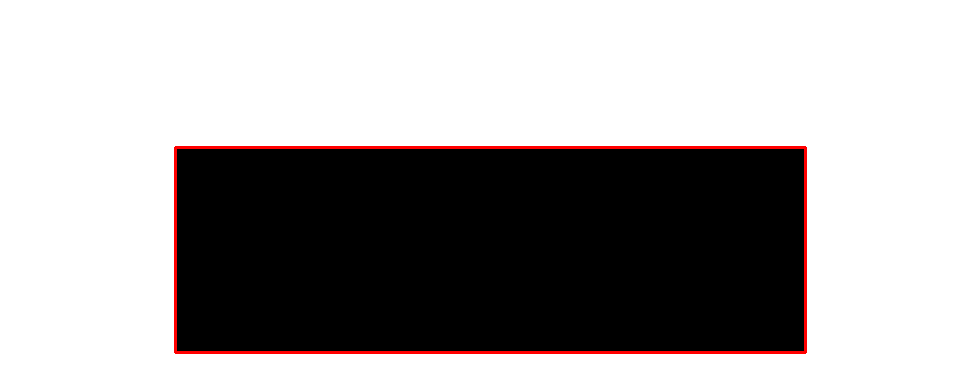

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


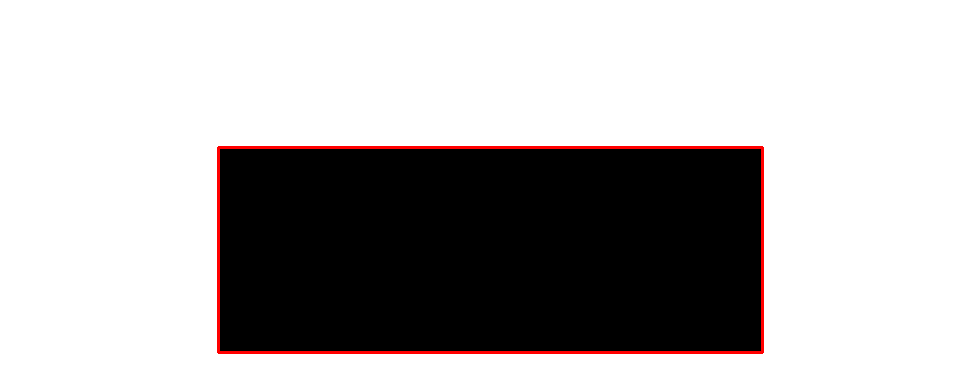

Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


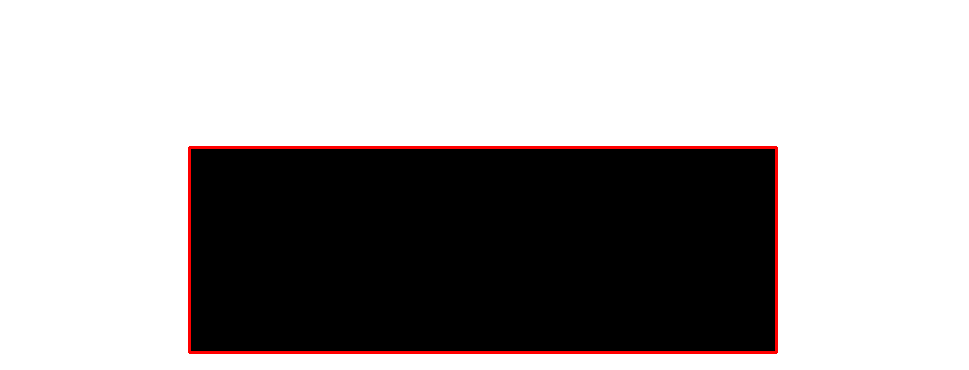

Rectangle coordinates: 161 147 805 352
Rectangle coordinates: 161 147 805 352


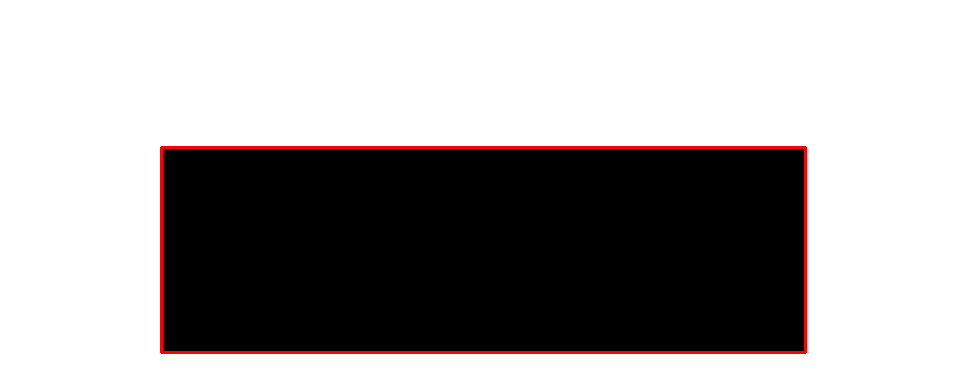

Rectangle coordinates: 175 147 805 352
Rectangle coordinates: 175 147 805 352


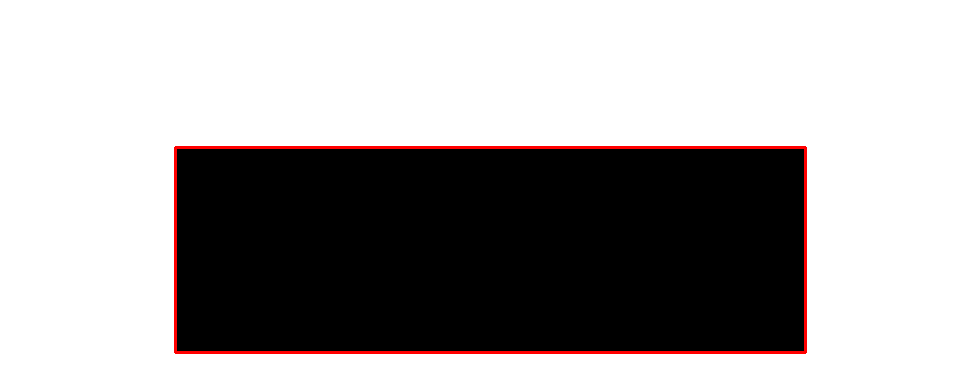

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 218 147 762 352
Rectangle coordinates: 218 147 762 352


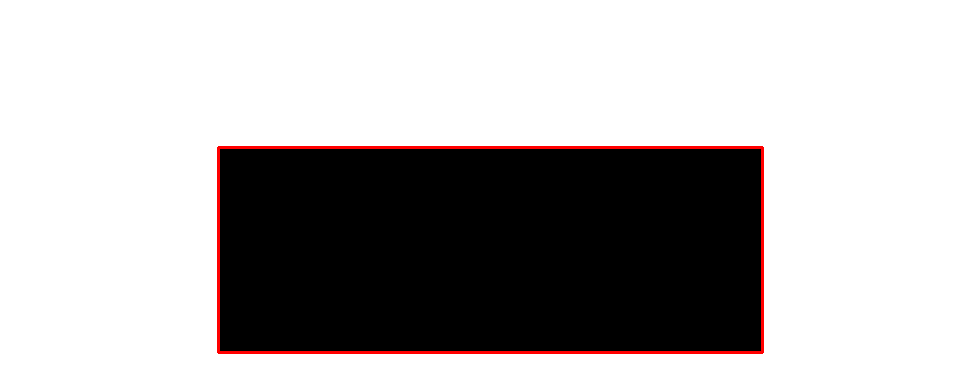

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


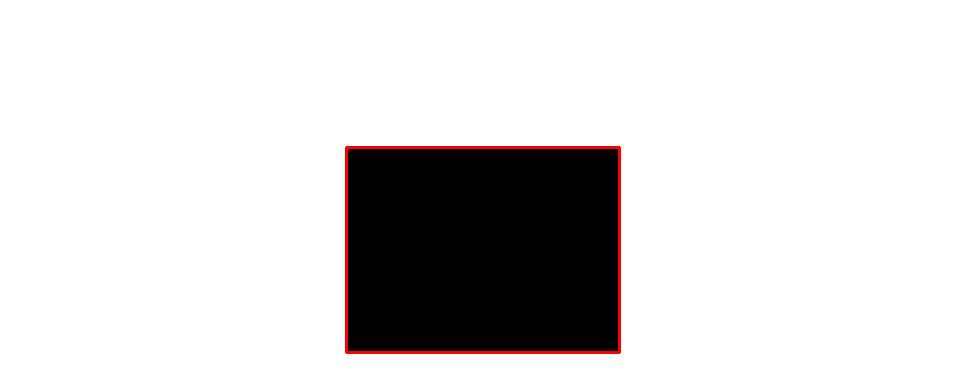

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


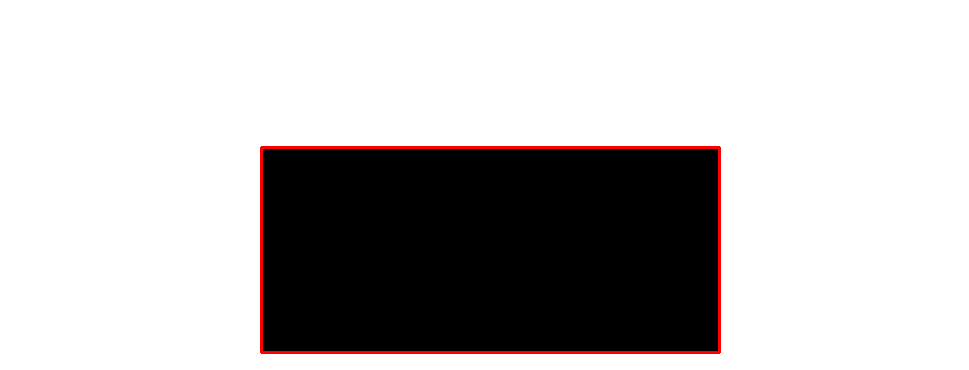

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


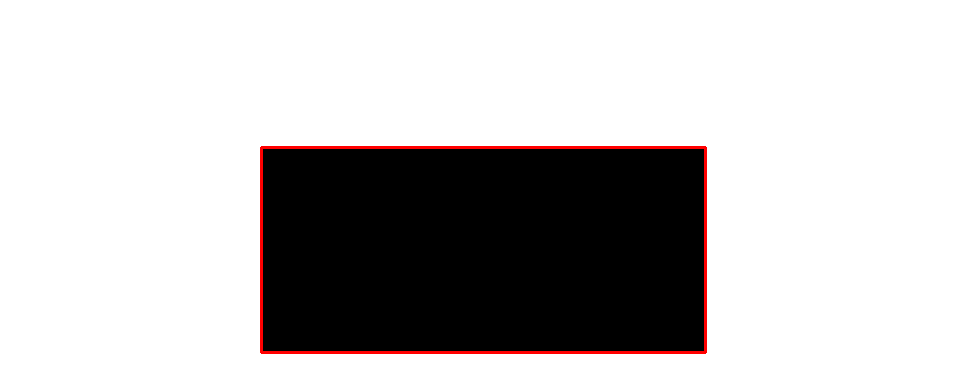

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


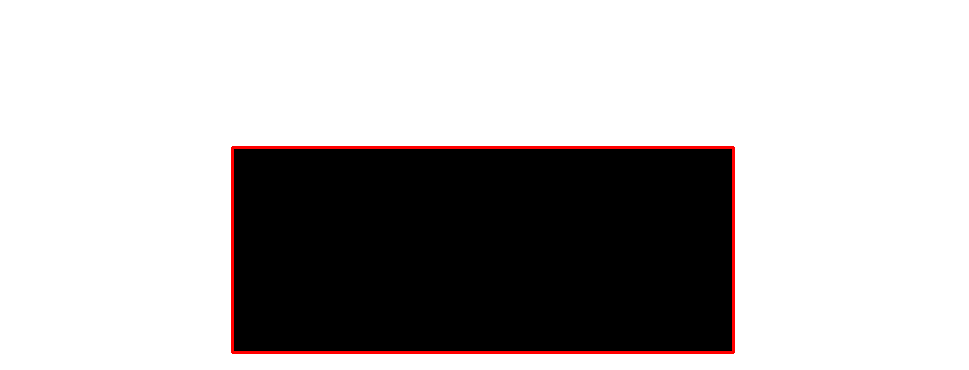

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


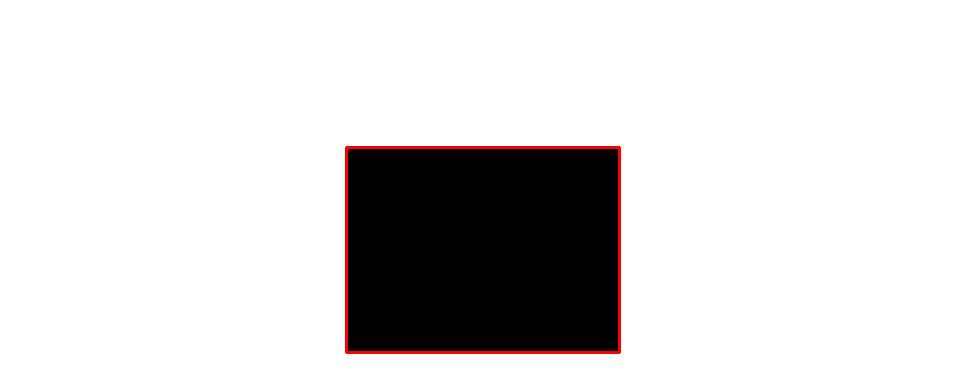

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


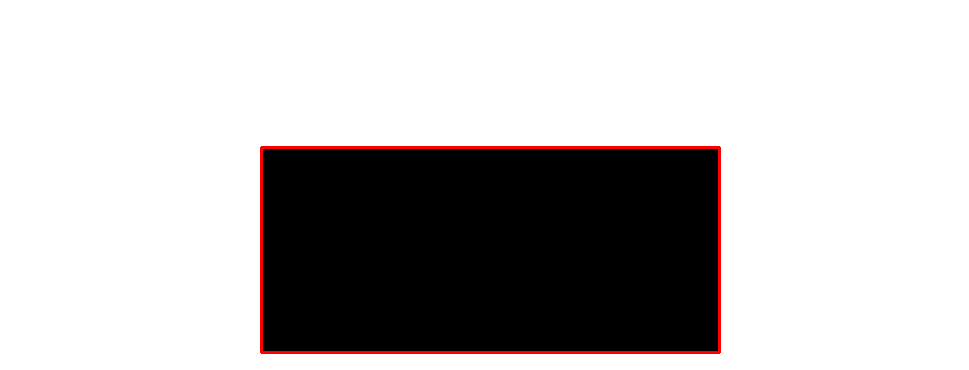

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


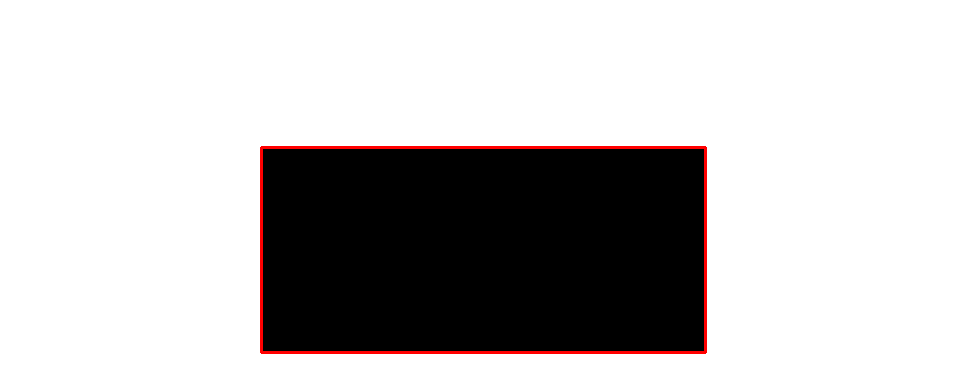

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


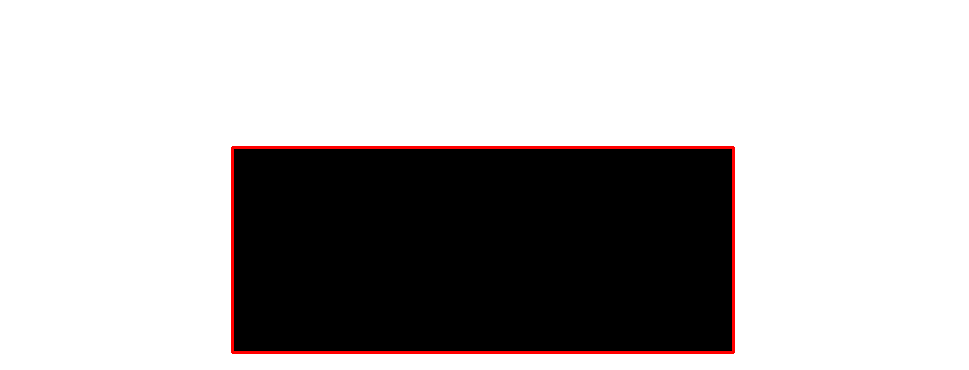

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


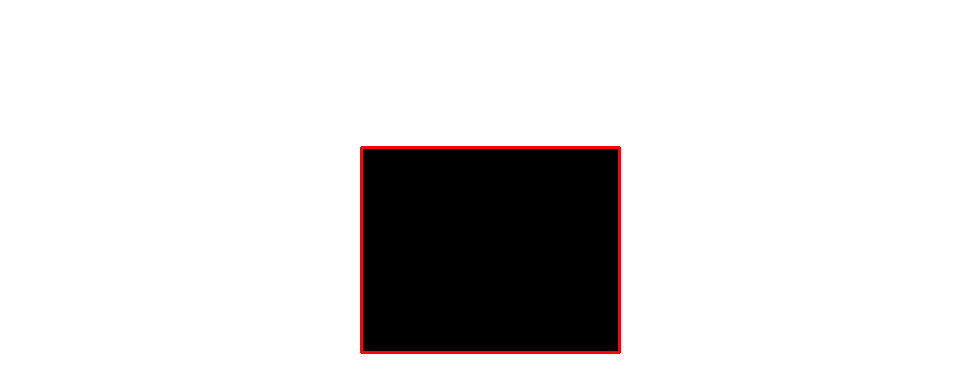

No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


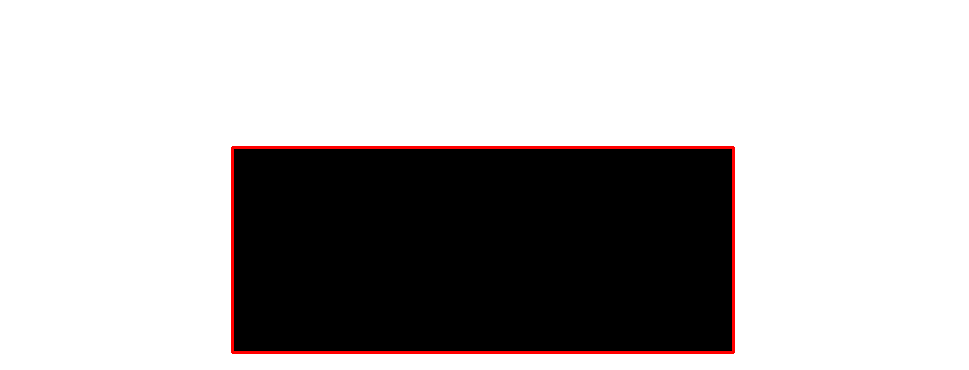

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


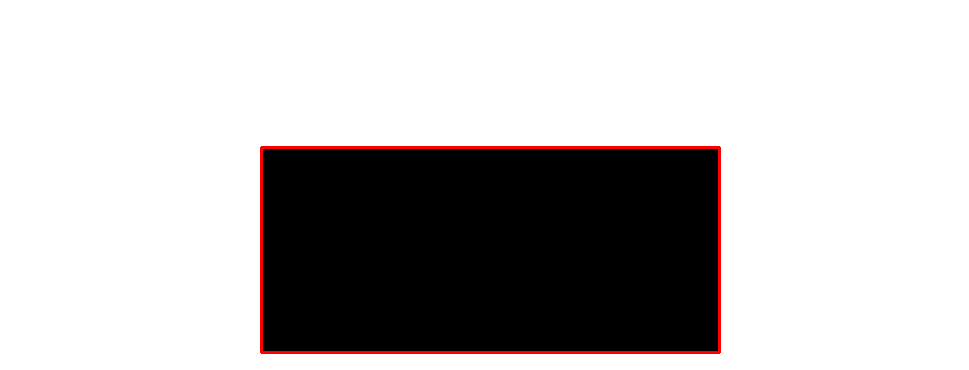

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


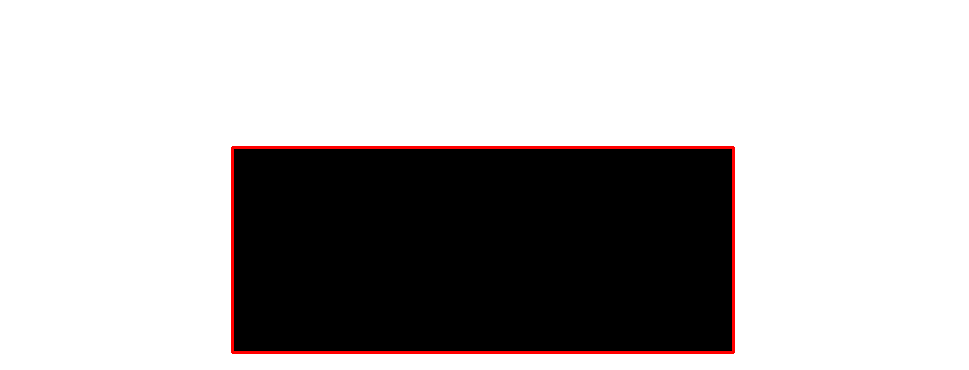

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


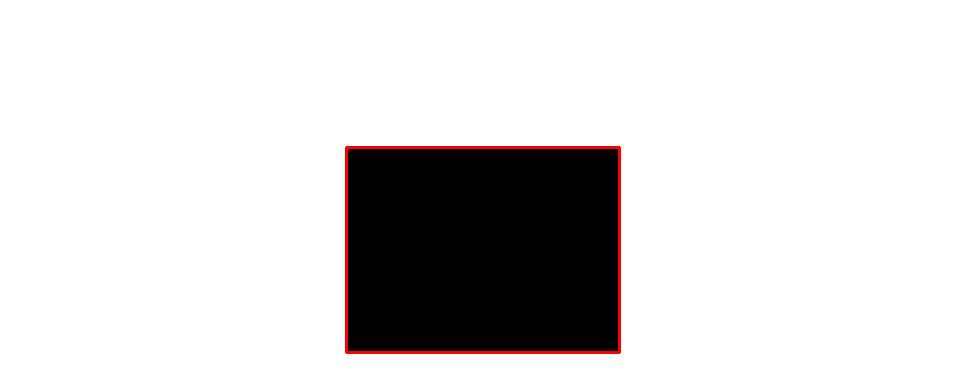

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


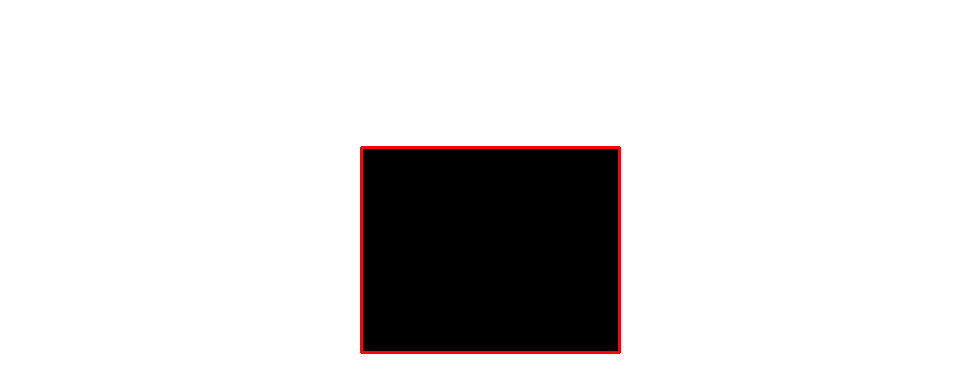

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


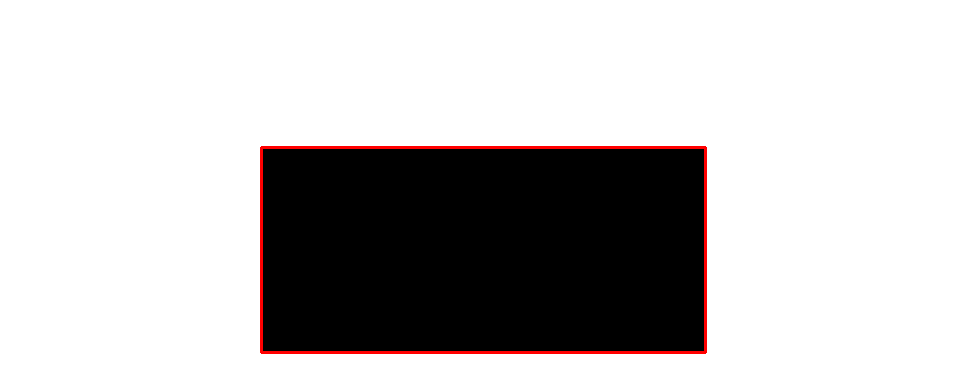

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


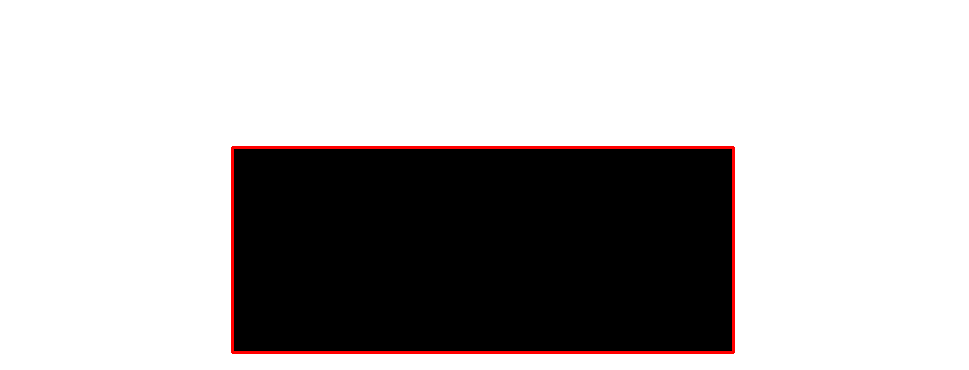

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


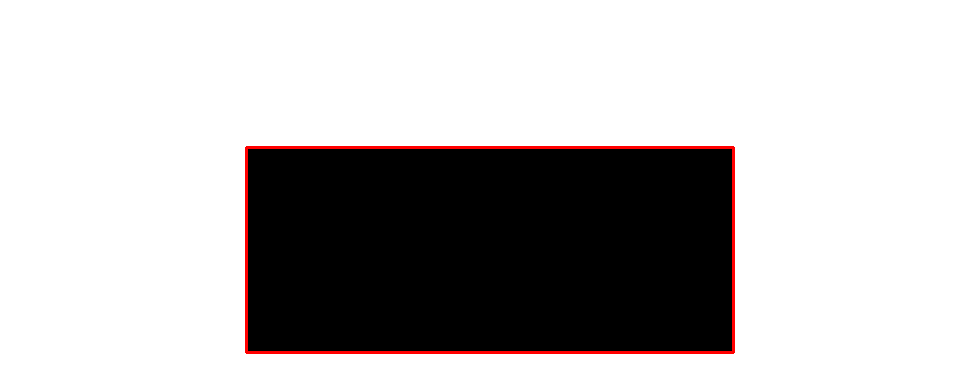

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


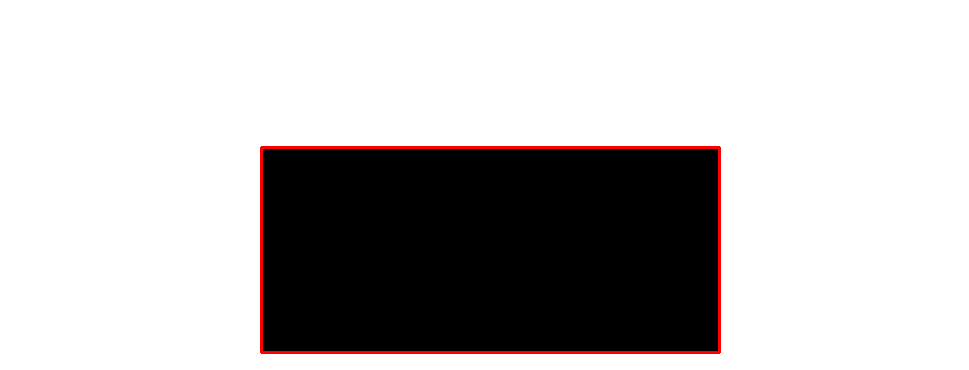

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


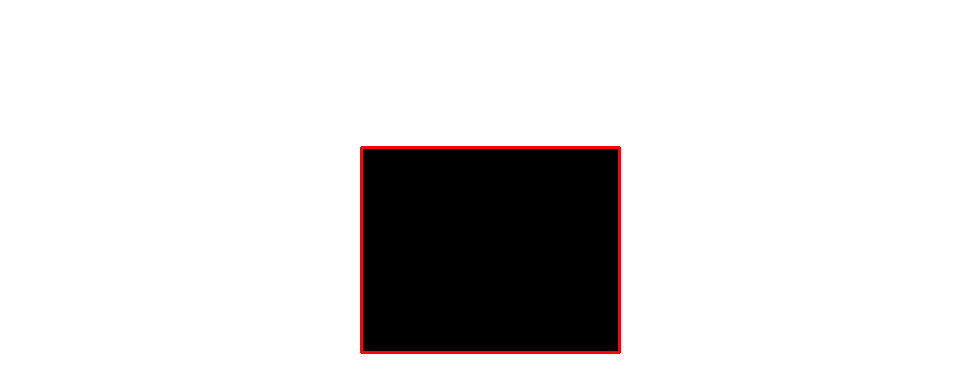

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


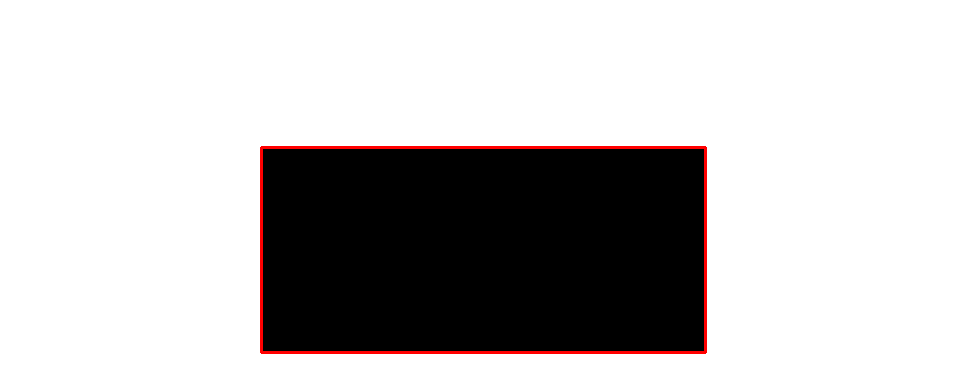

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


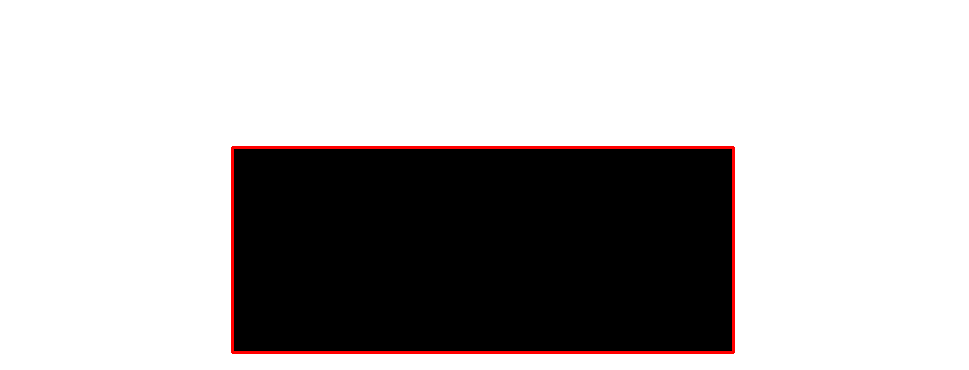

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


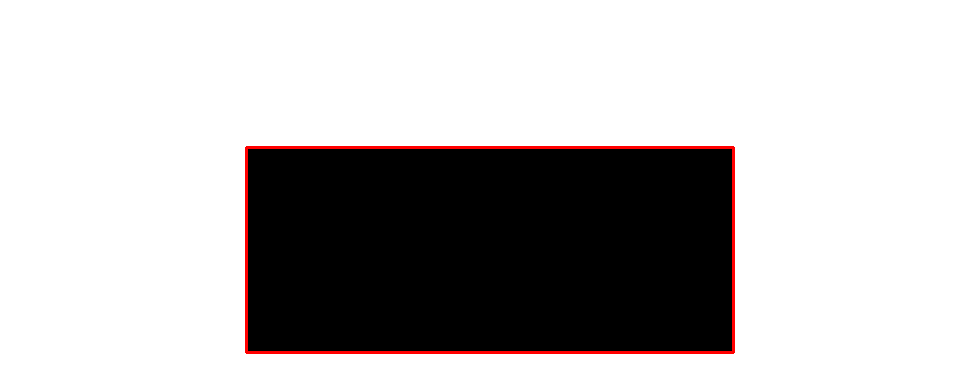

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


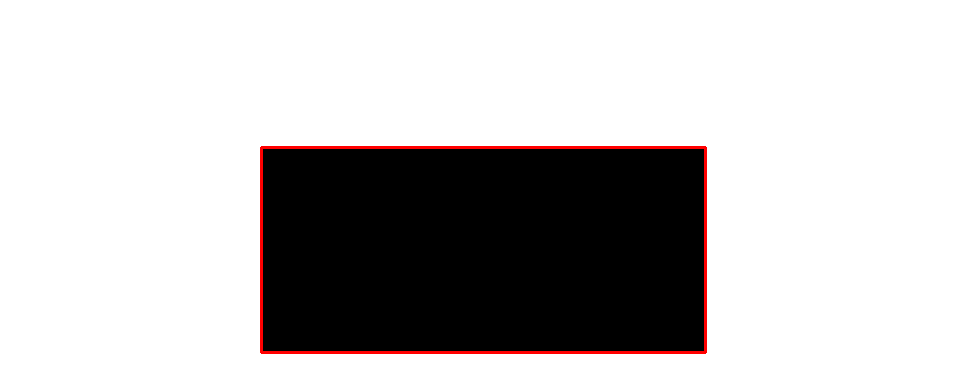

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


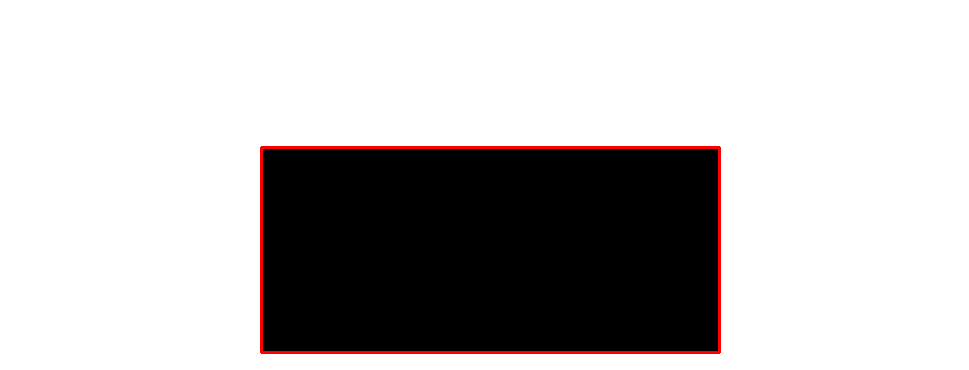

Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


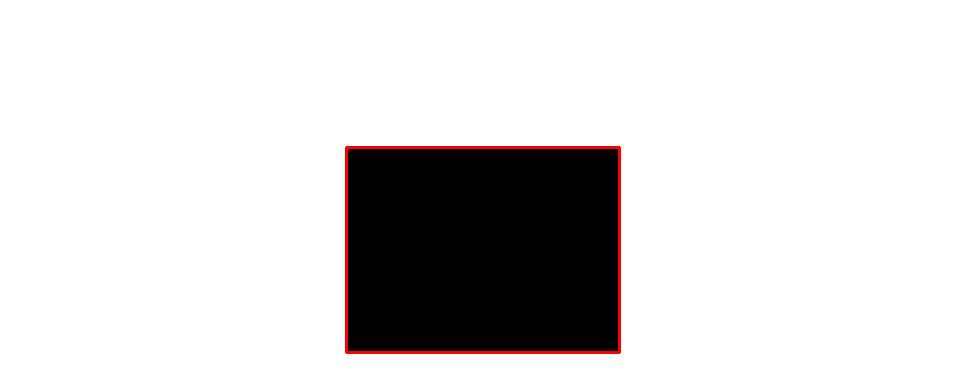

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


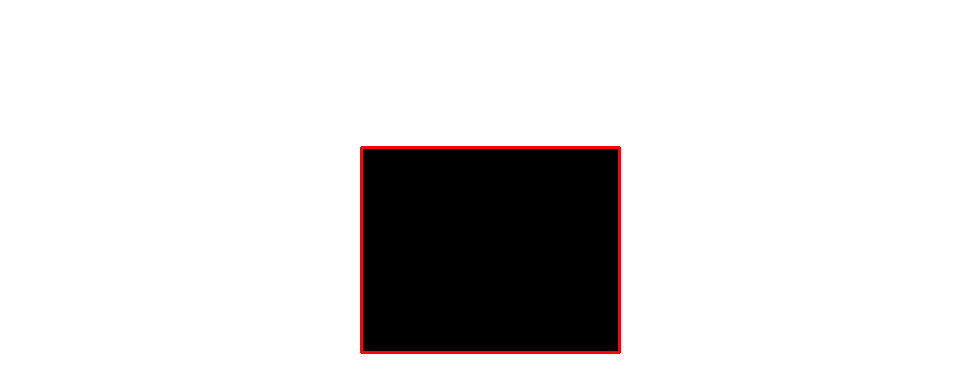

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


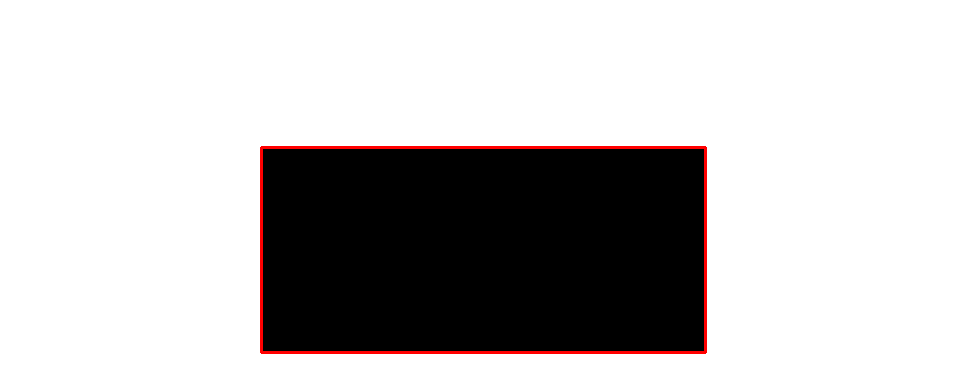

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


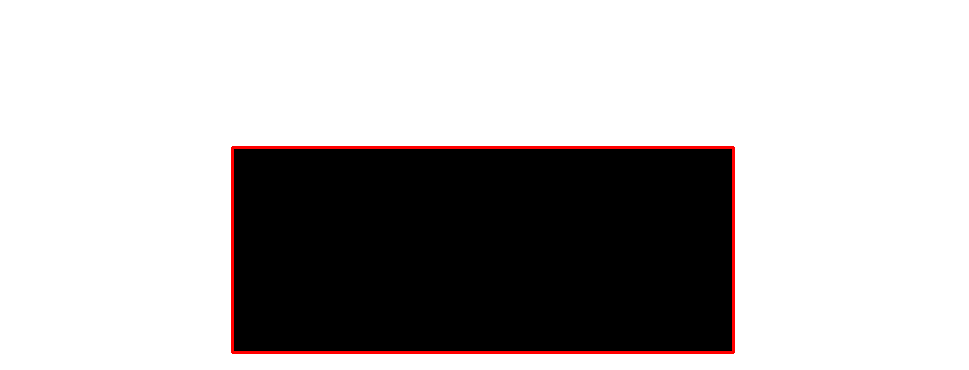

Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


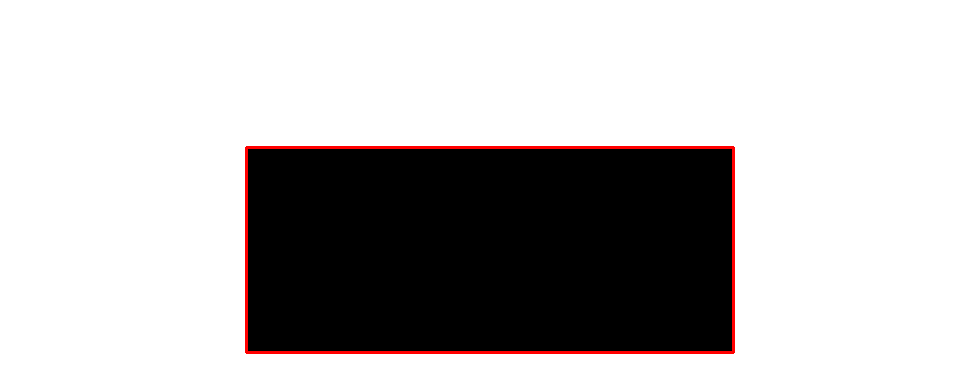

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 346 147 619 352
Rectangle coordinates: 346 147 619 352


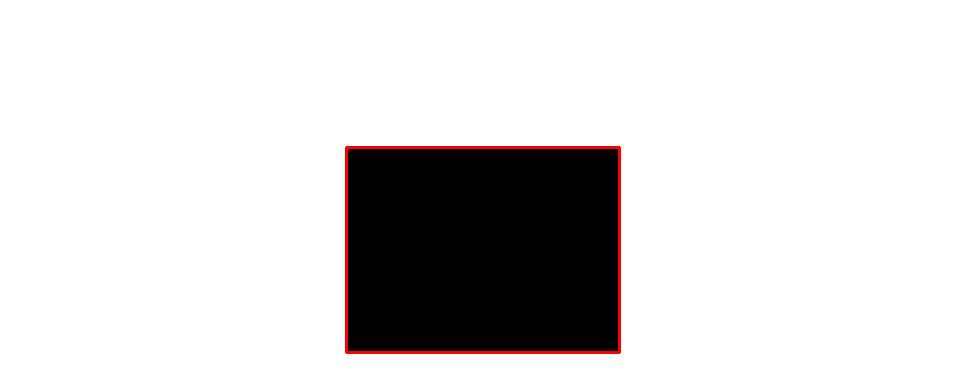

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


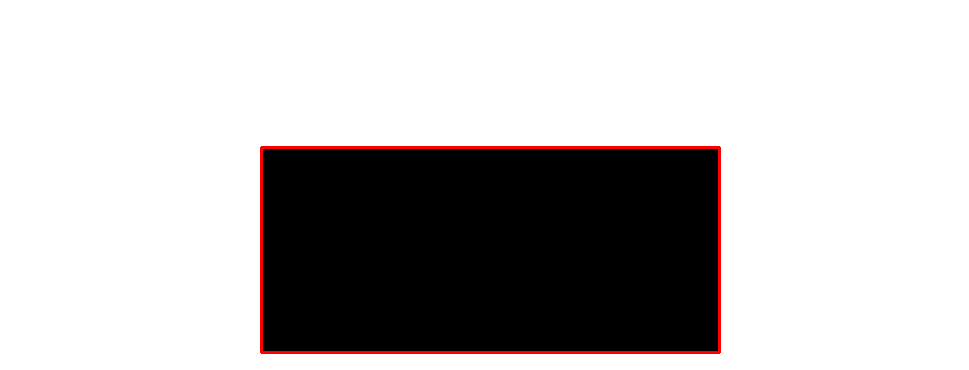

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


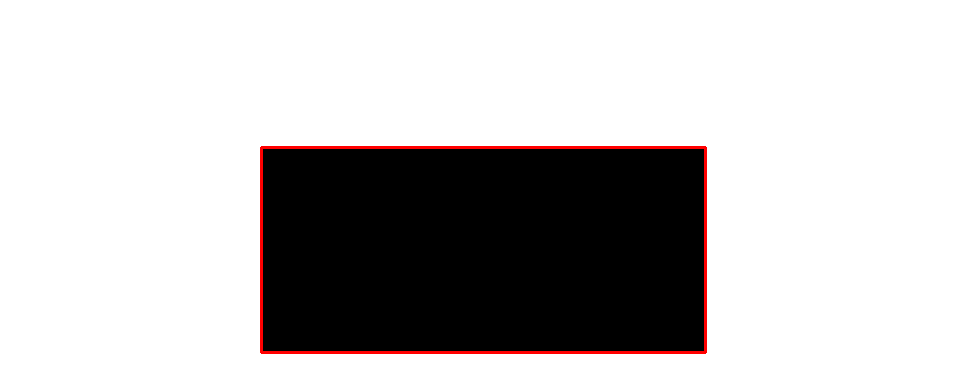

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


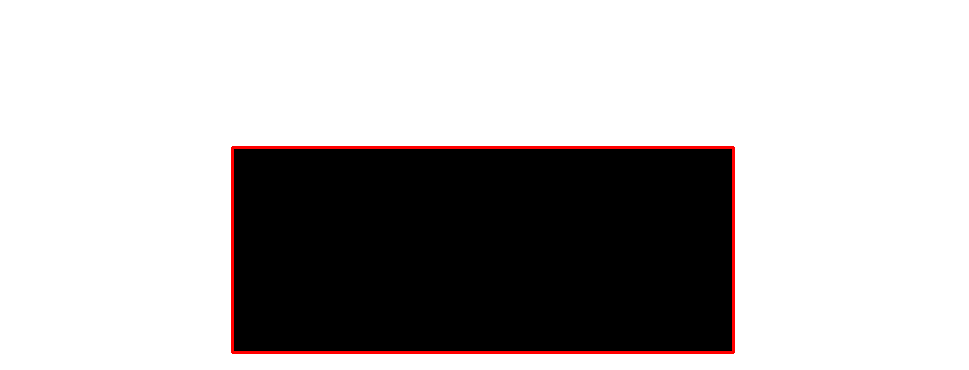

No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


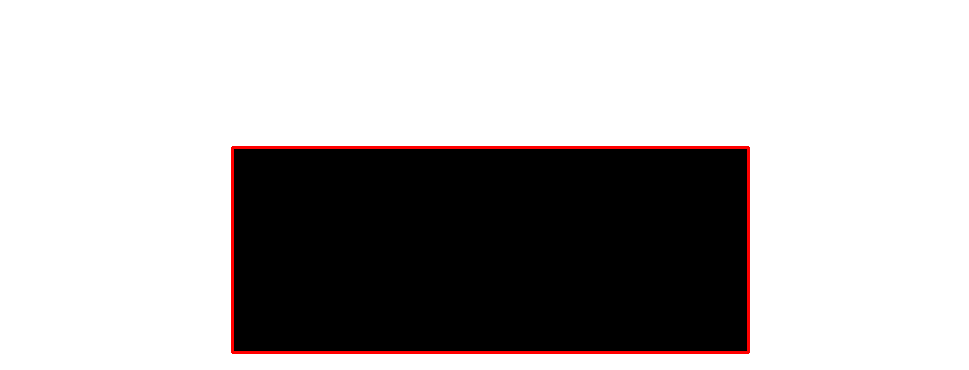

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


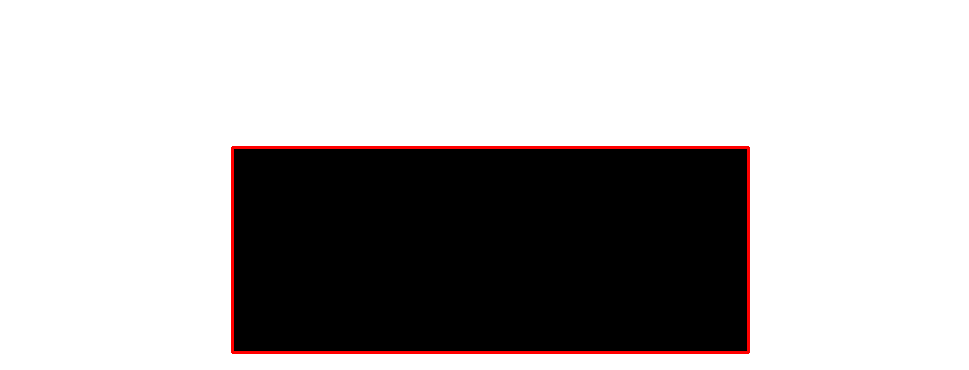

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


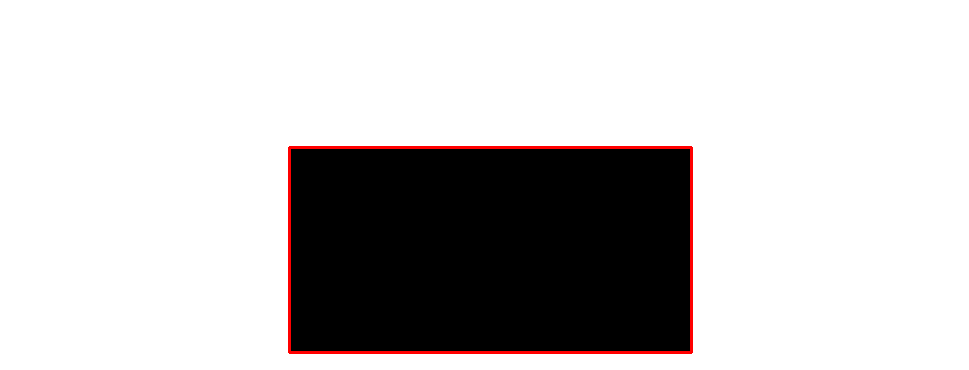

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


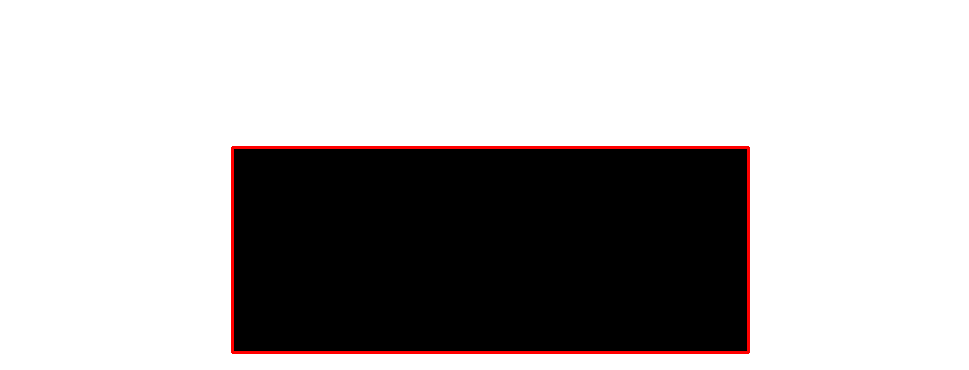

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


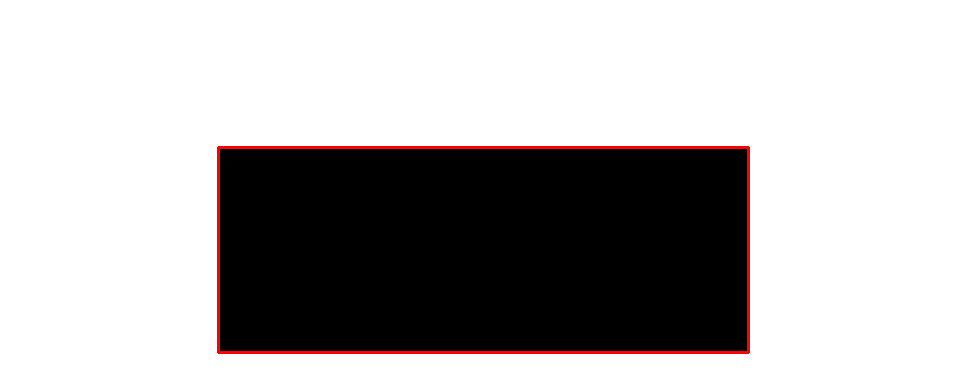

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


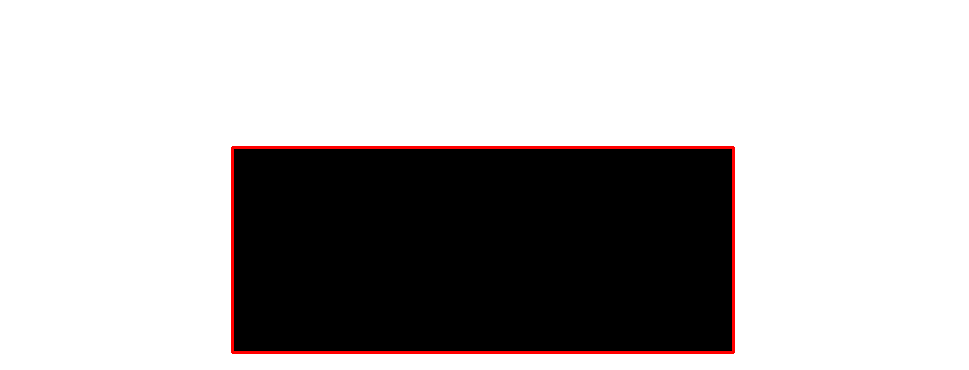

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


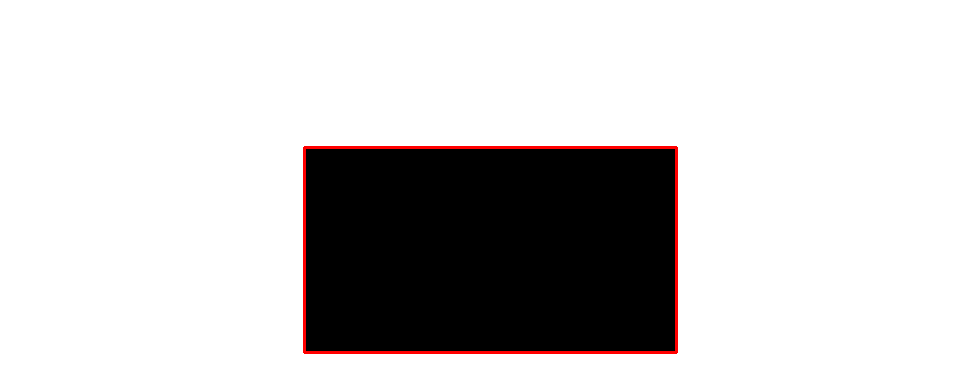

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 289 147 691 352
Rectangle coordinates: 289 147 691 352


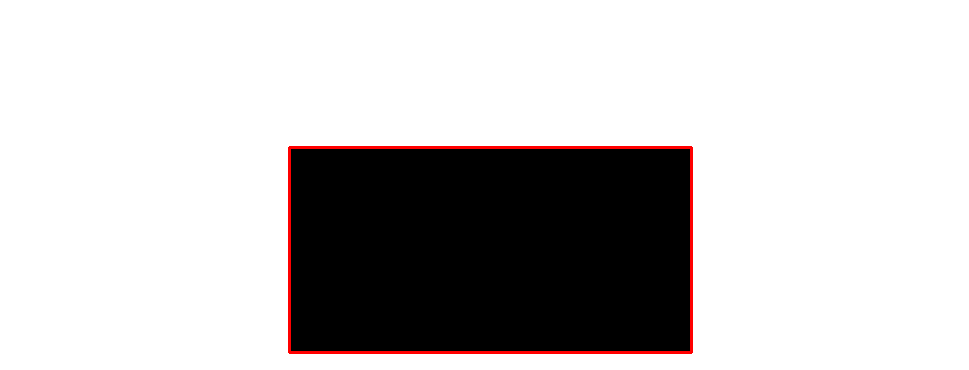

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


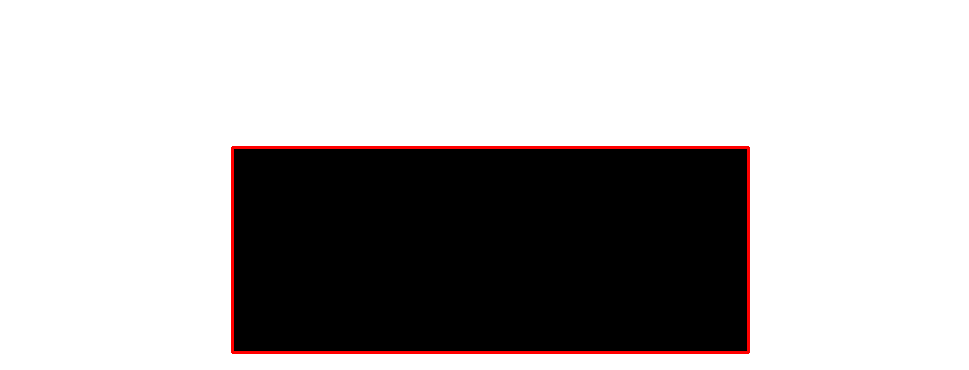

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


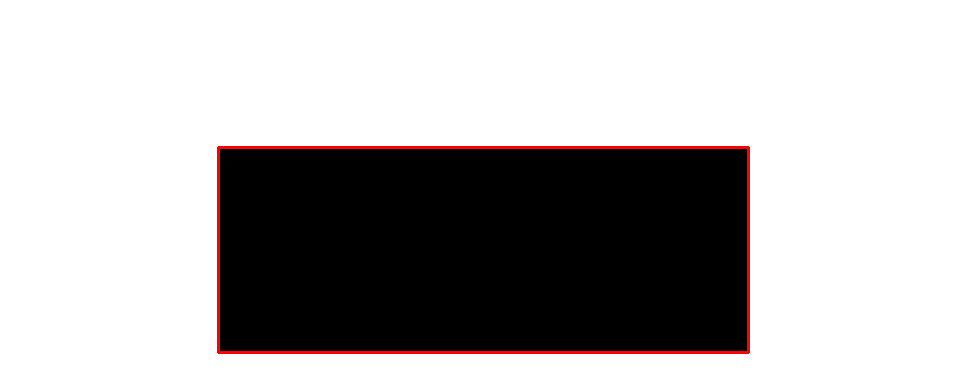

Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


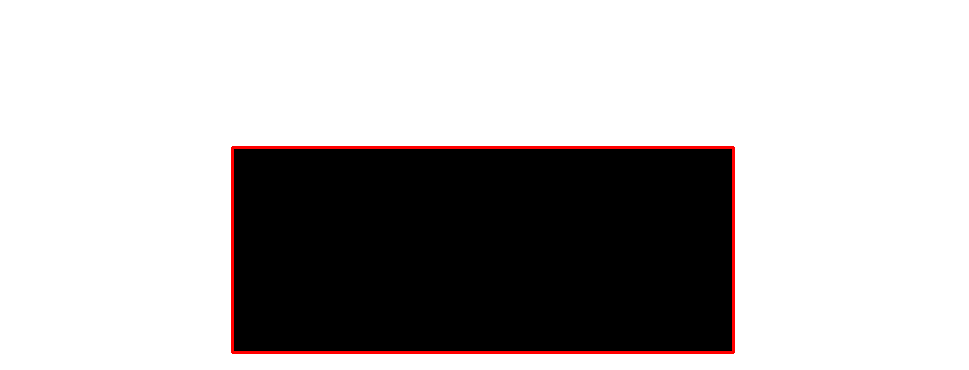

Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


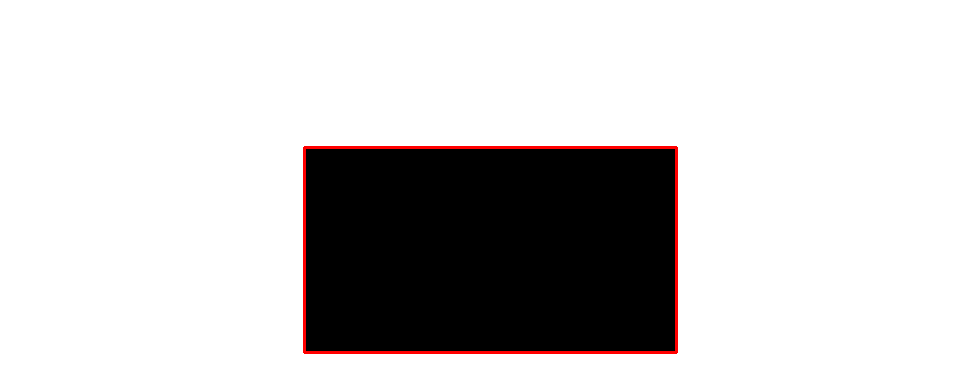

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


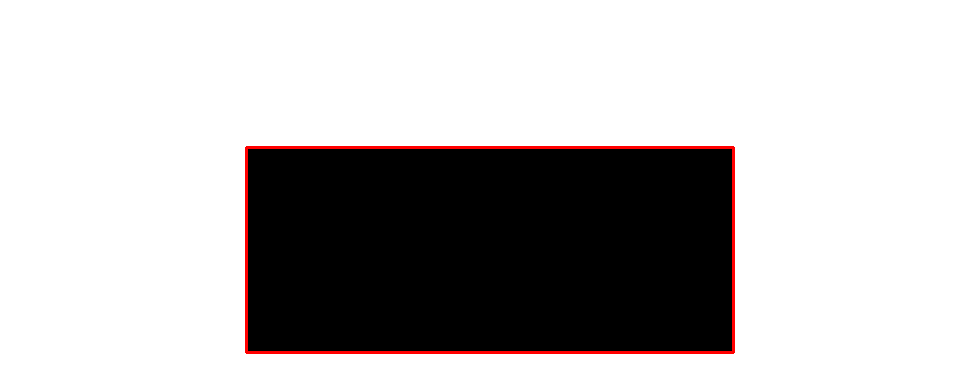

No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


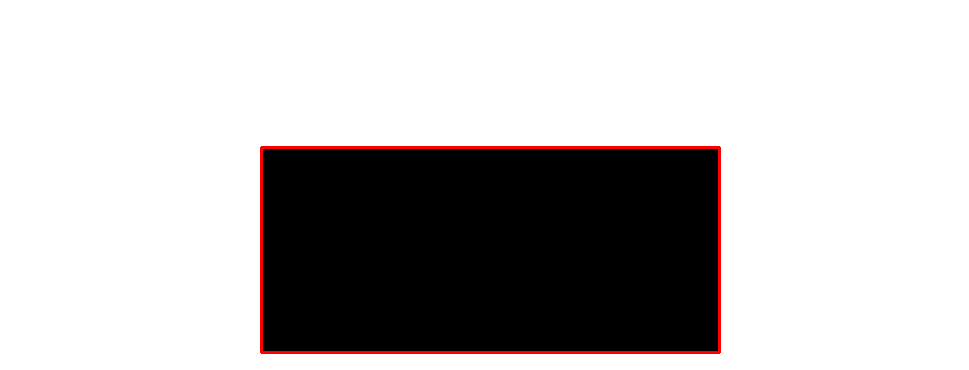

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


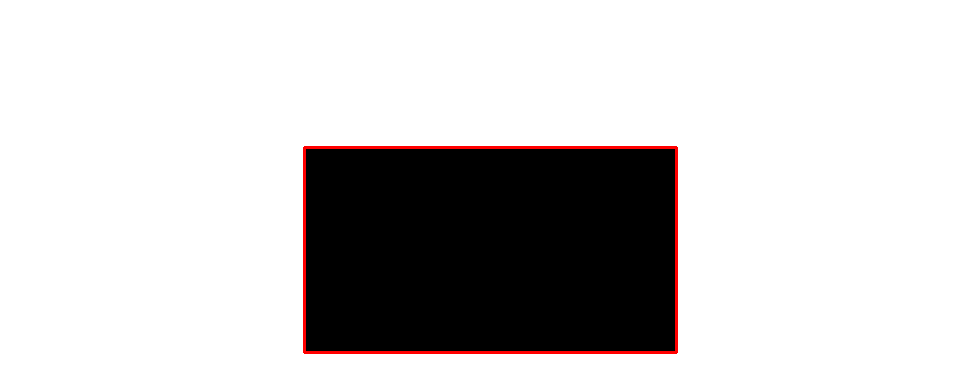

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


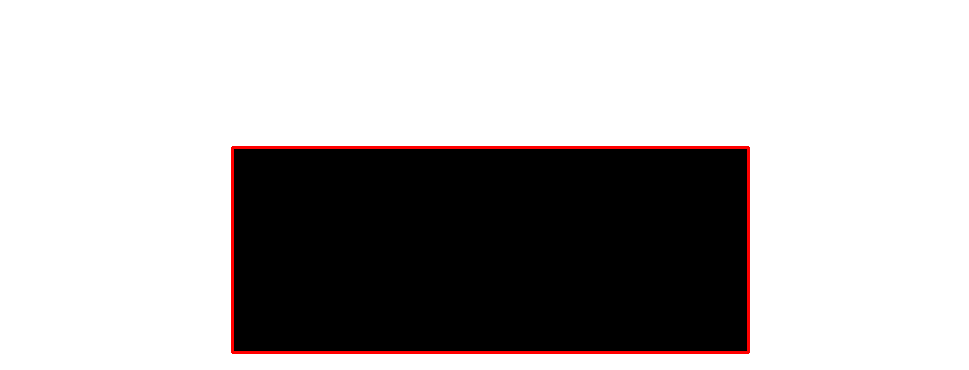

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


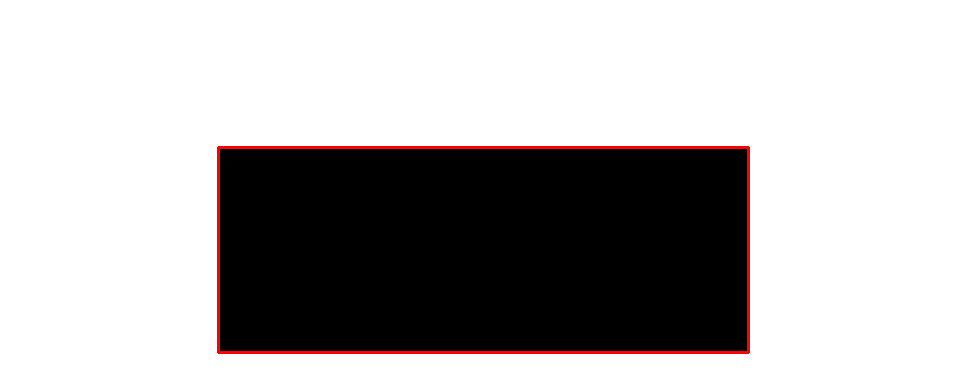

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


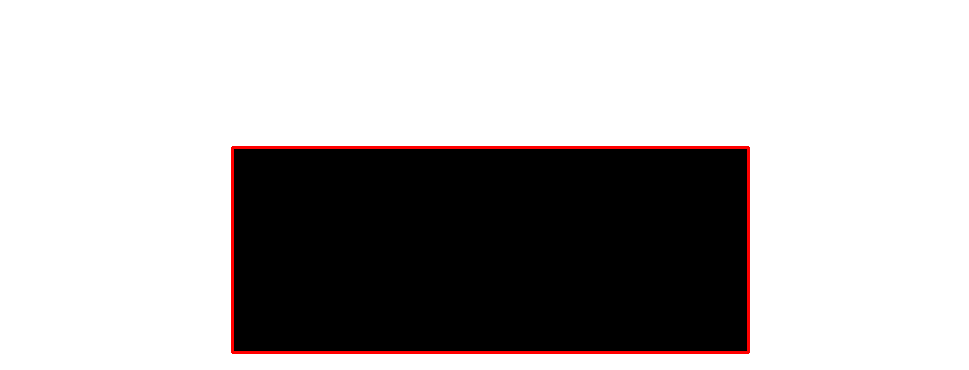

Rectangle coordinates: 218 147 748 352
Rectangle coordinates: 218 147 748 352


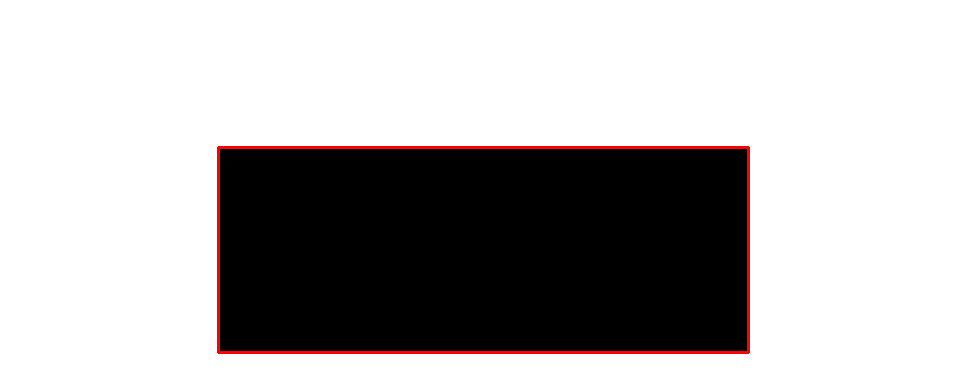

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 676 352
Rectangle coordinates: 304 147 676 352


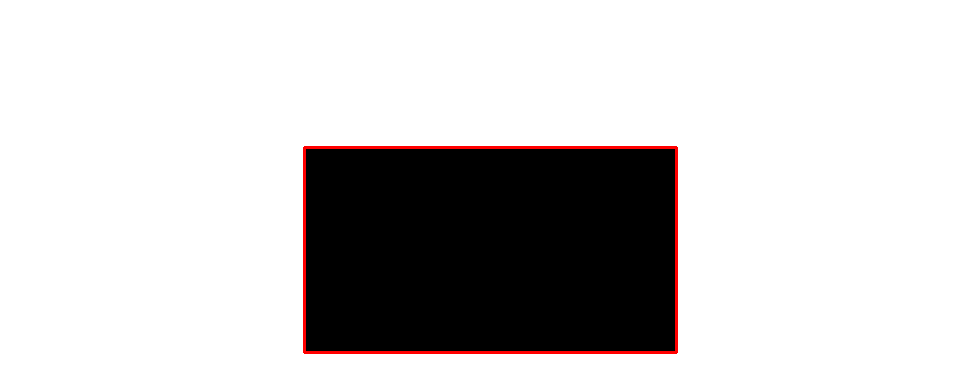

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 232 147 733 352
Rectangle coordinates: 232 147 733 352


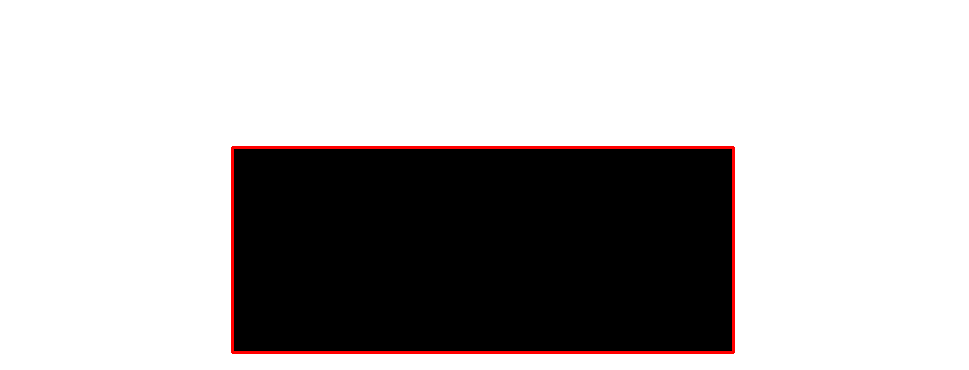

Rectangle coordinates: 232 147 748 352
Rectangle coordinates: 232 147 748 352


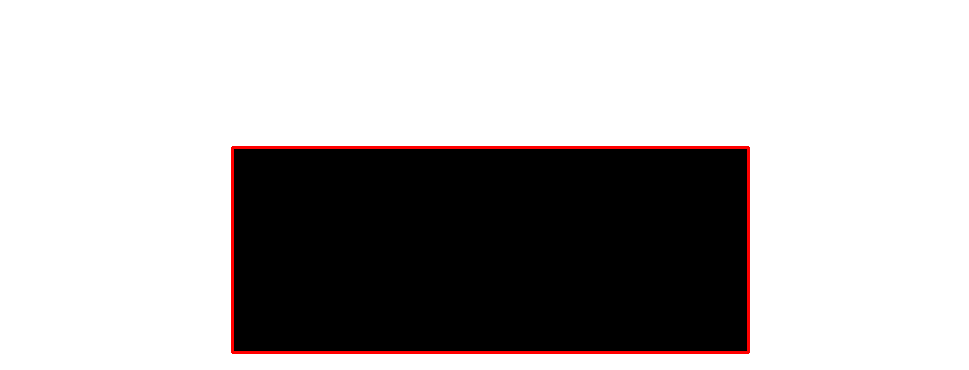

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


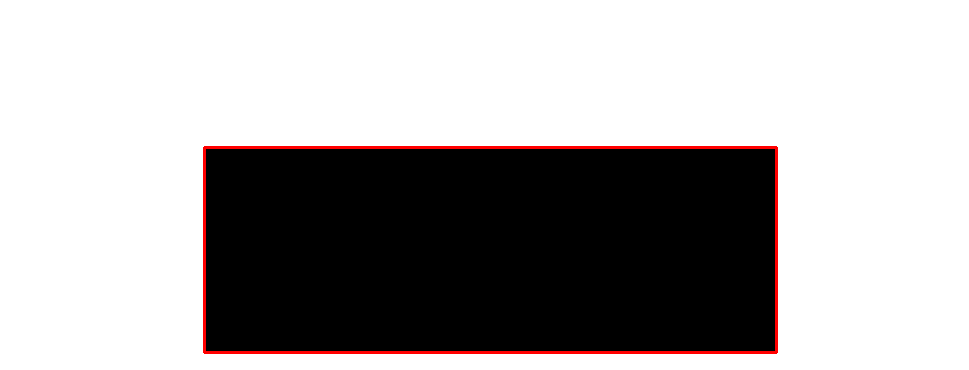

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


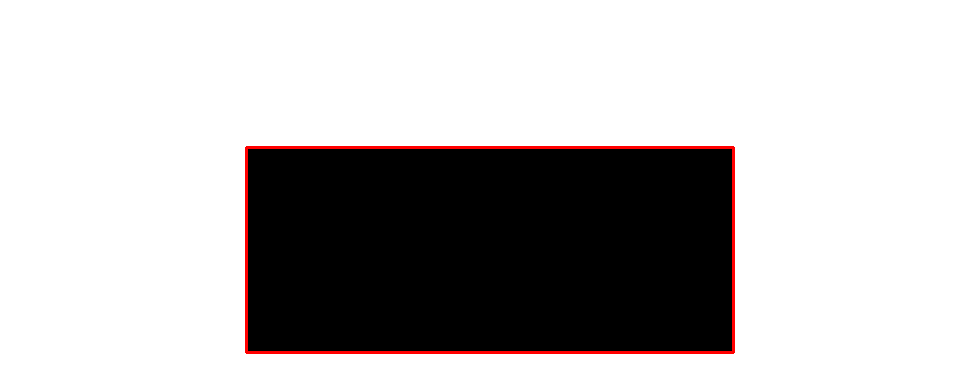

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


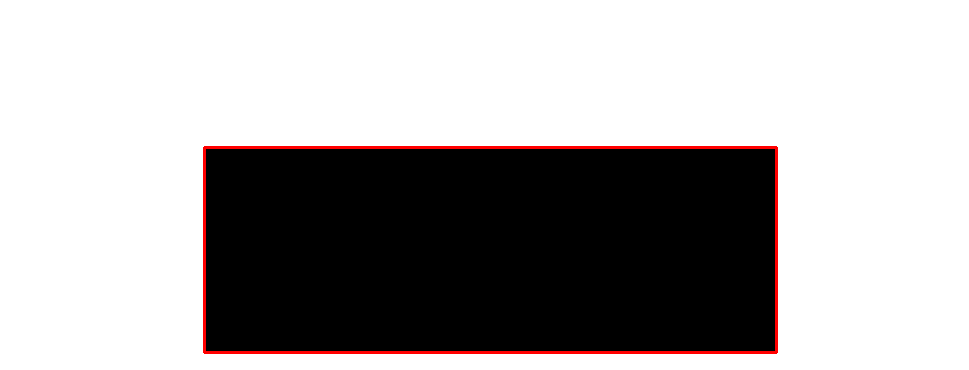

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


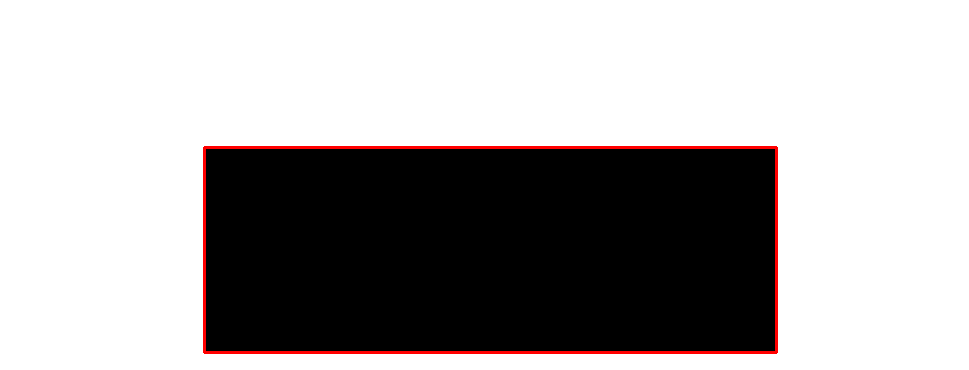

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


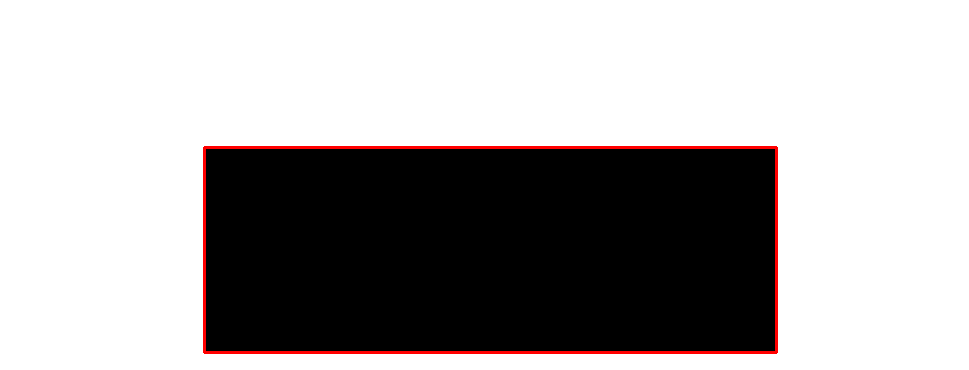

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 246 147 733 352
Rectangle coordinates: 246 147 733 352


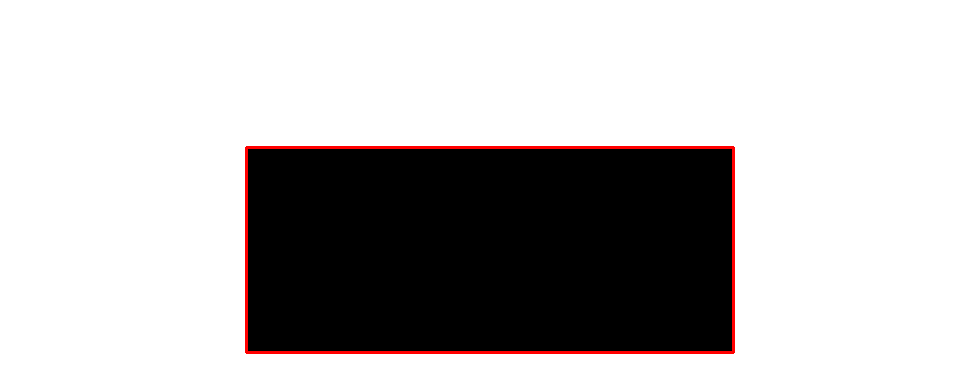

Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


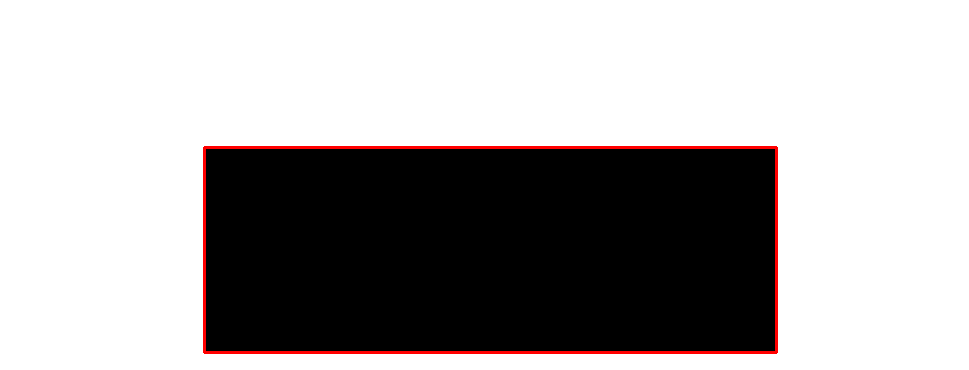

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 189 147 776 352
Rectangle coordinates: 189 147 776 352


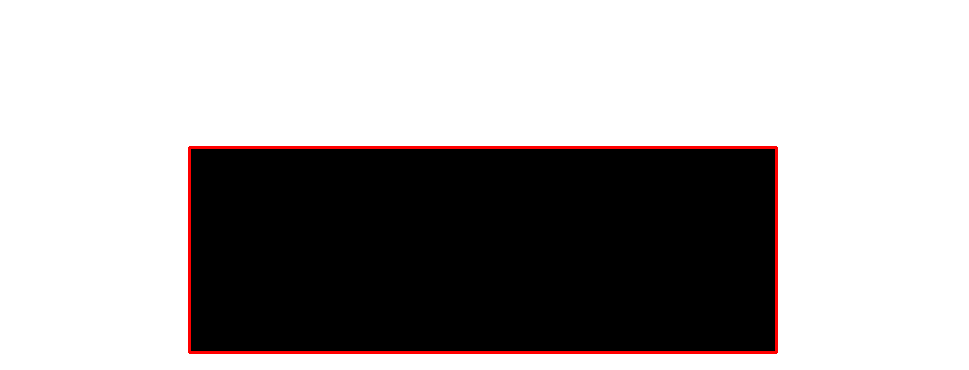

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 204 147 776 352
Rectangle coordinates: 204 147 776 352


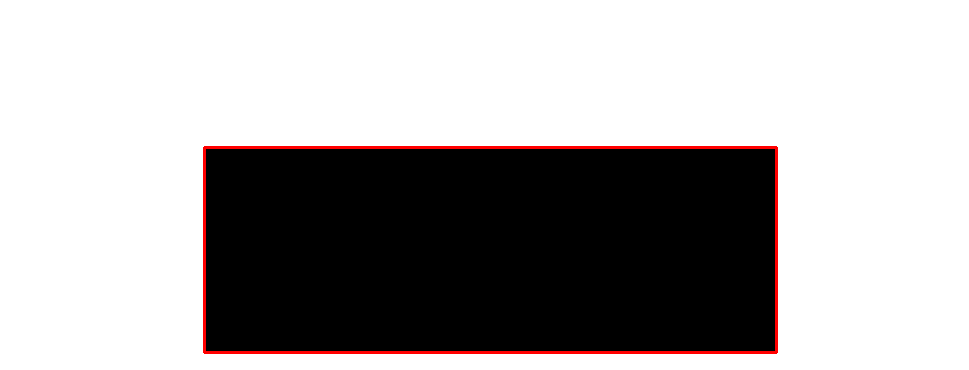

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 461 147 505 352
R

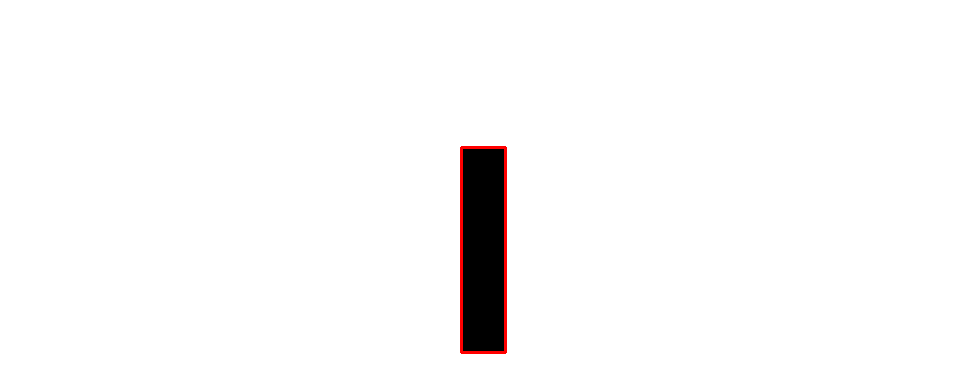

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


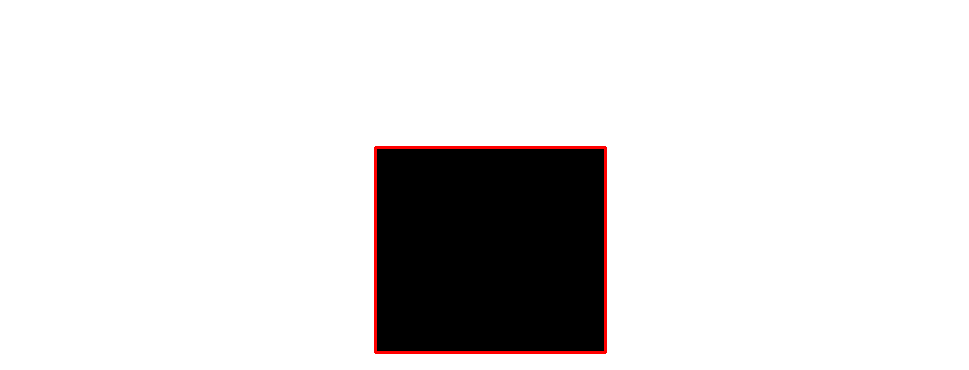

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


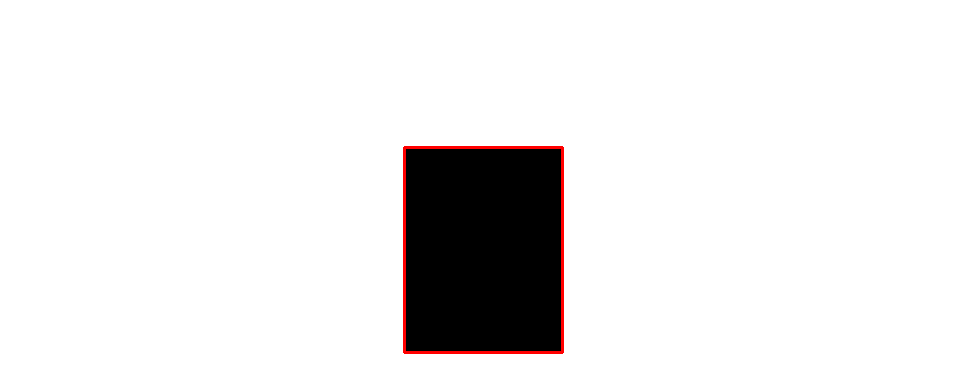

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


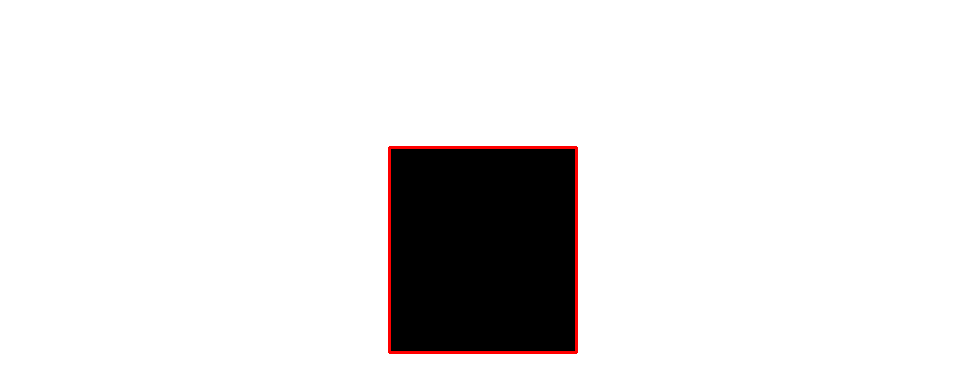

Rectangle coordinates: 418 147 548 352
Rectangle coordinates: 418 147 548 352


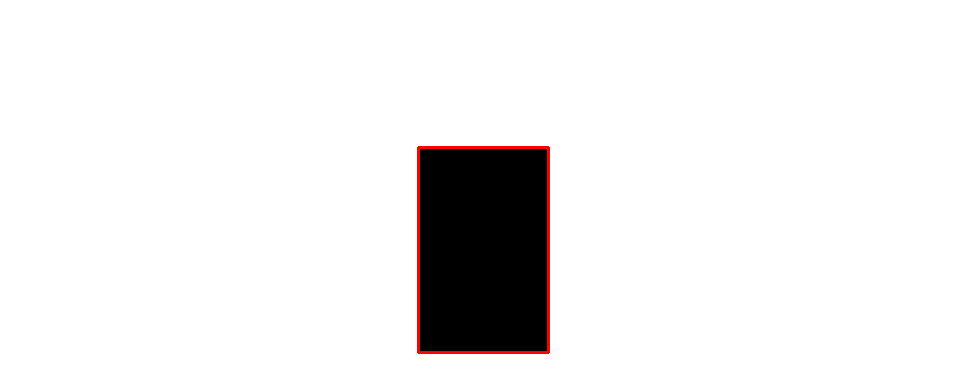

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 590 352
Rectangle coordinates: 375 147 590 352


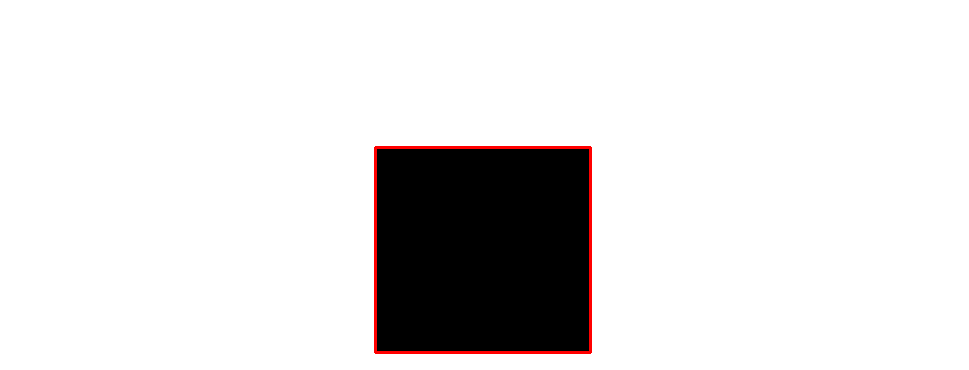

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 418 147 548 352
Rectangle coordinates: 418 147 548 352


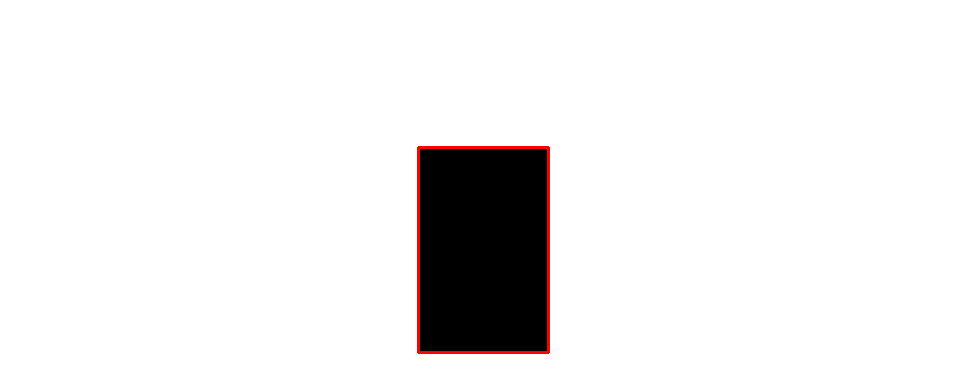

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


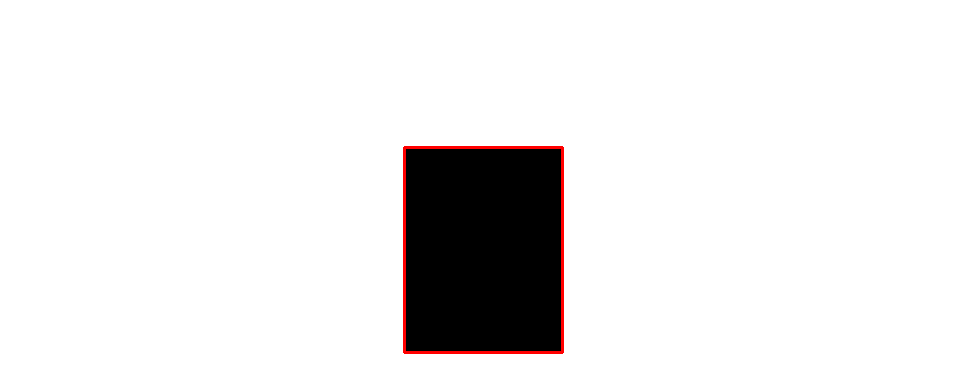

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


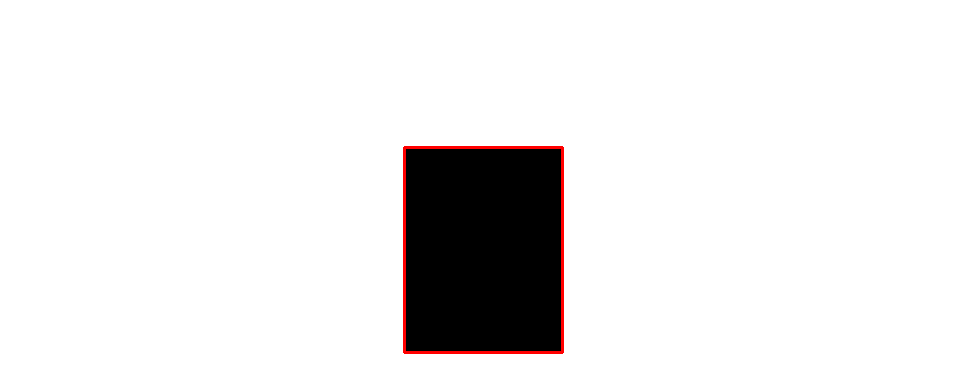

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


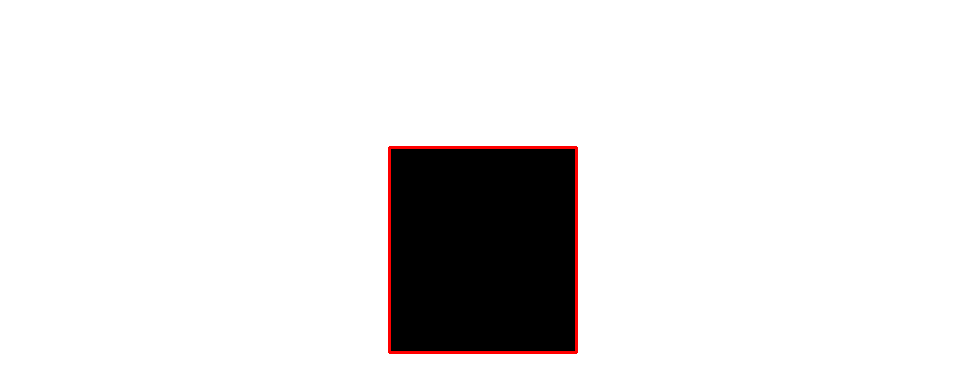

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


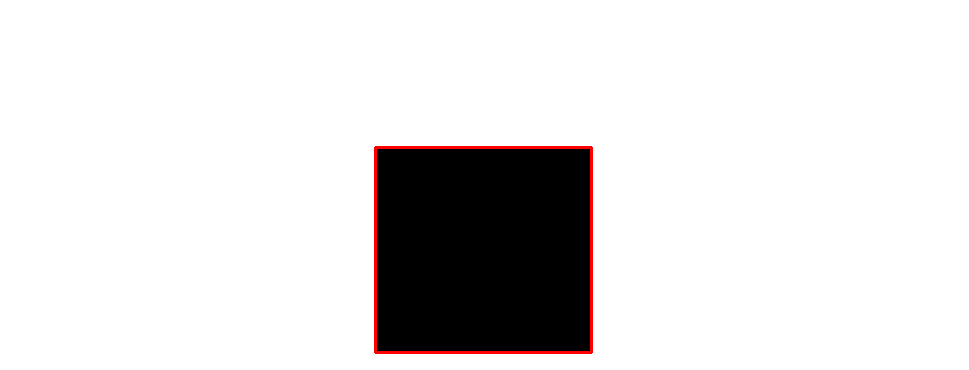

Rectangle coordinates: 375 147 591 352
Rectangle coordinates: 375 147 591 352


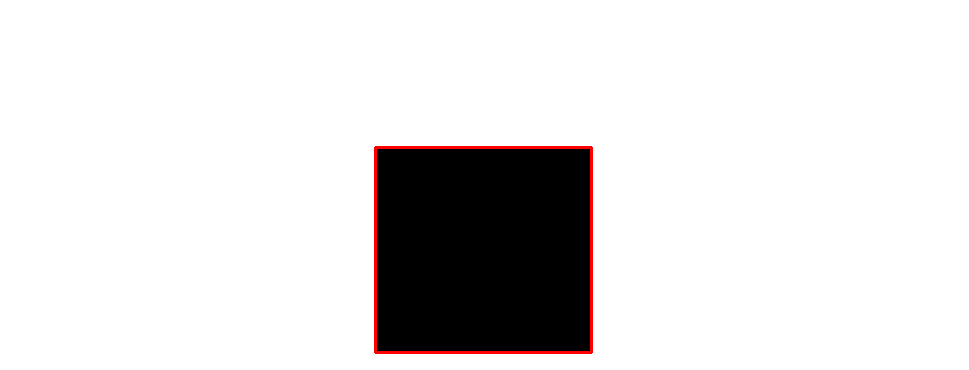

Rectangle coordinates: 389 147 591 352
Rectangle coordinates: 389 147 591 352


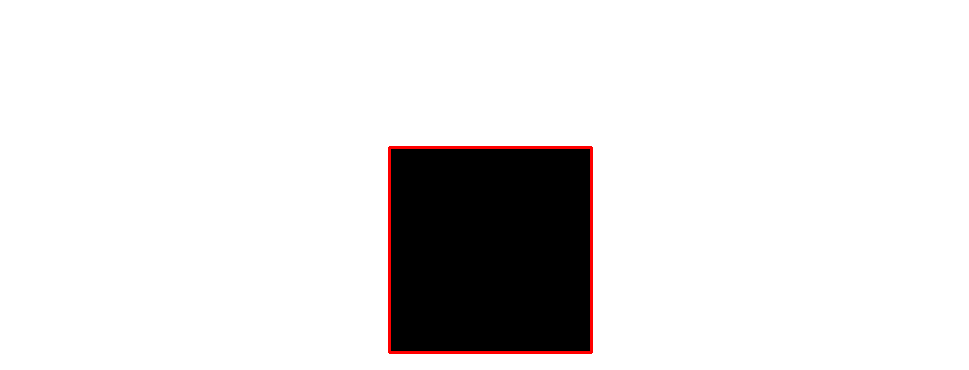

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


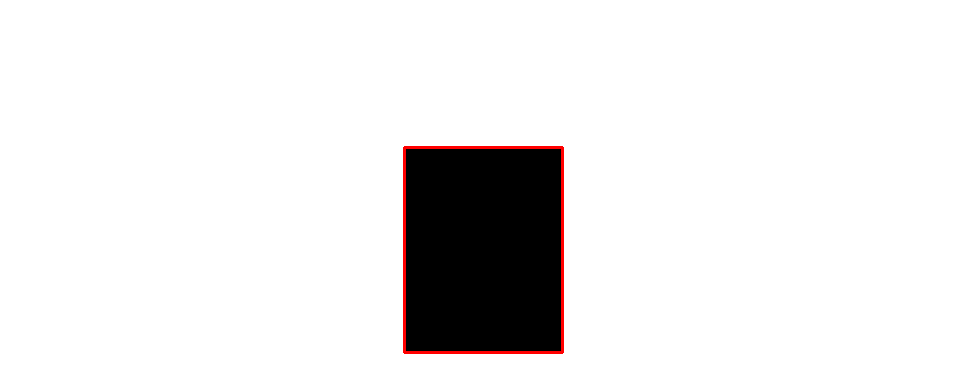

Rectangle coordinates: 404 147 562 352
Rectangle coordinates: 404 147 562 352


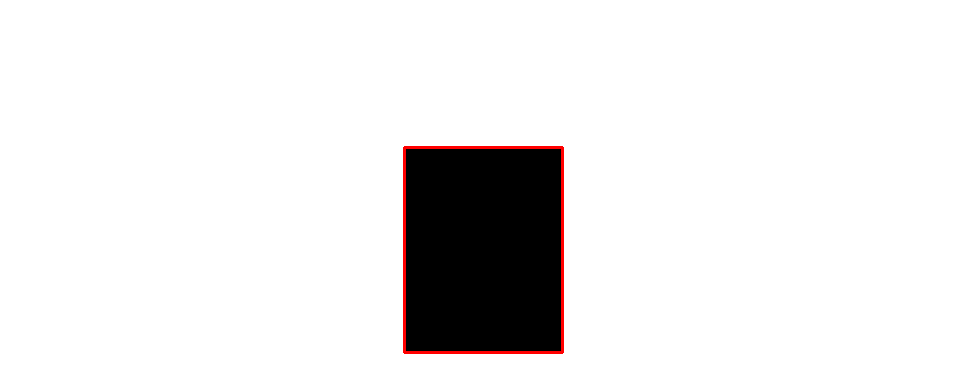

Rectangle coordinates: 404 147 576 352
Rectangle coordinates: 404 147 576 352


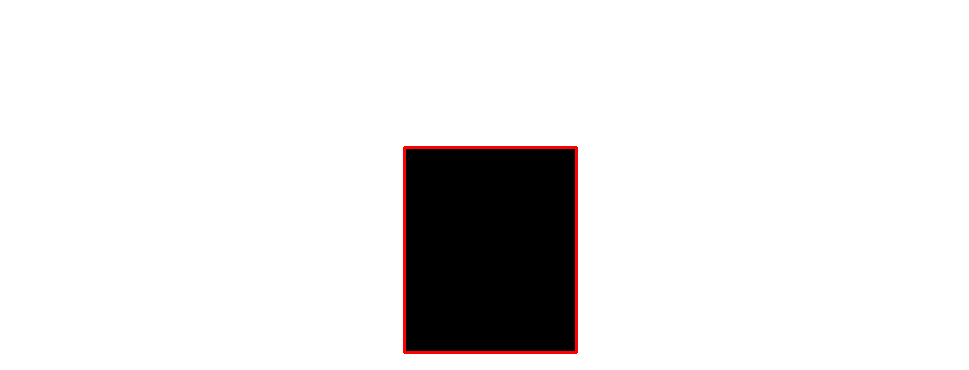

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


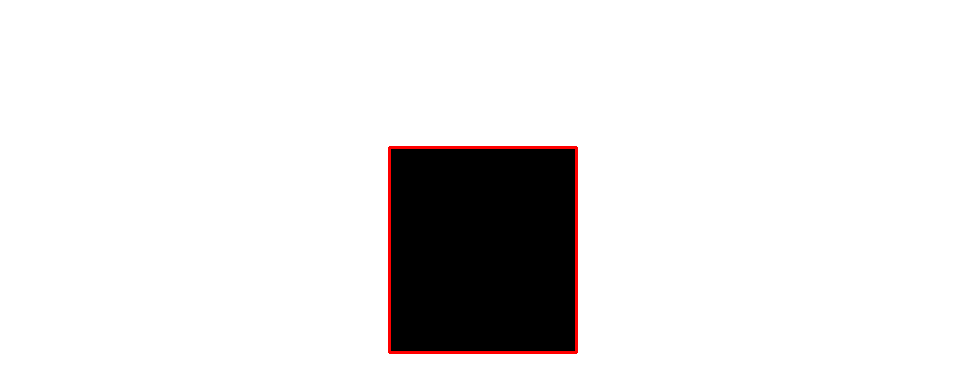

Rectangle coordinates: 375 147 605 352
Rectangle coordinates: 375 147 605 352


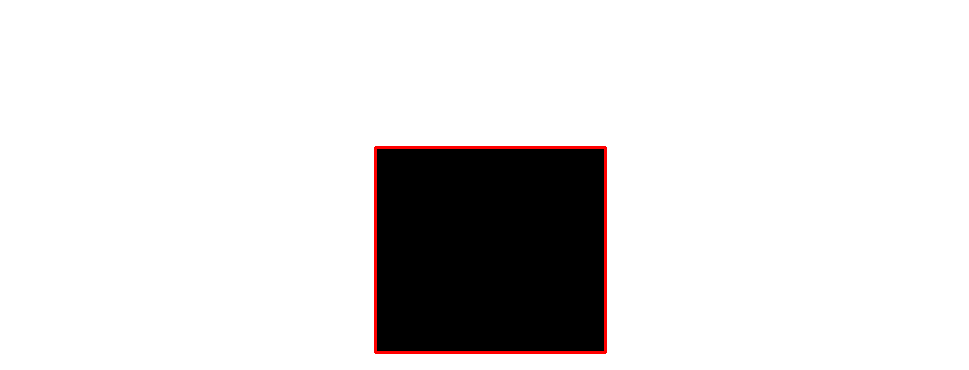

Rectangle coordinates: 389 147 576 352
Rectangle coordinates: 389 147 576 352


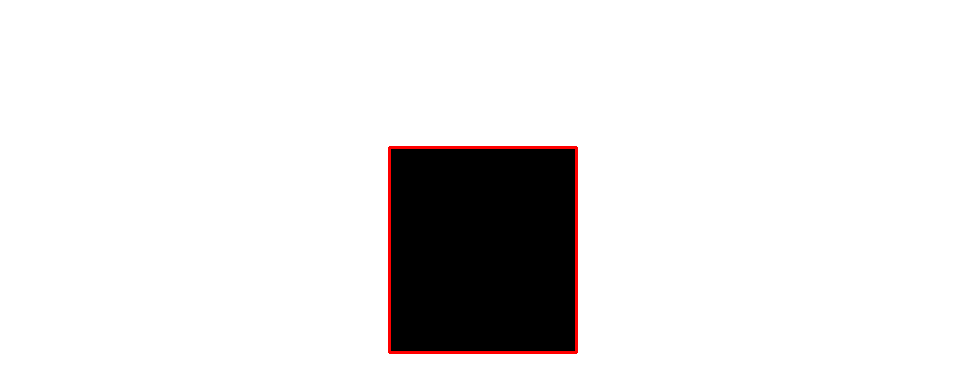

Rectangle coordinates: 447 147 519 352
Rectangle coordinates: 447 147 519 352


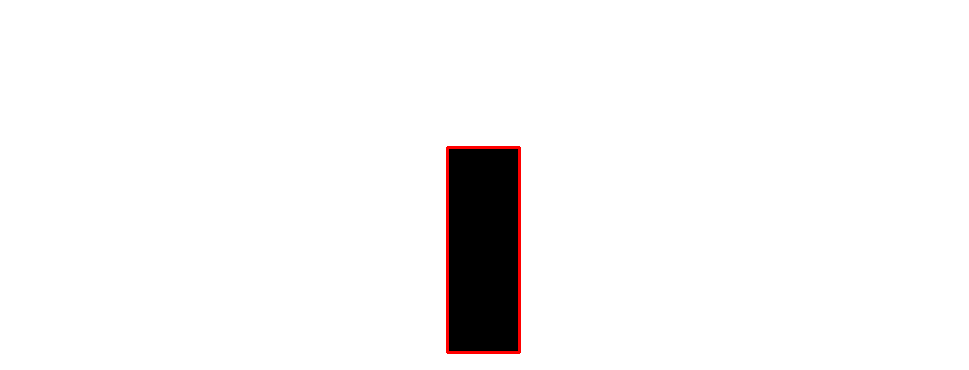

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

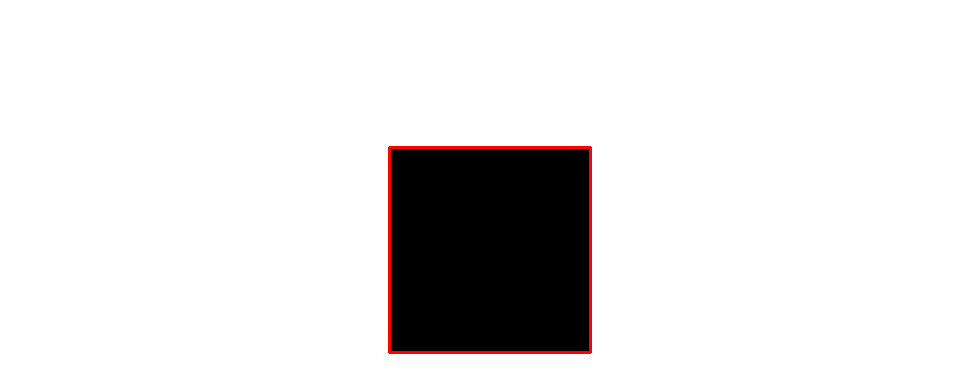

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

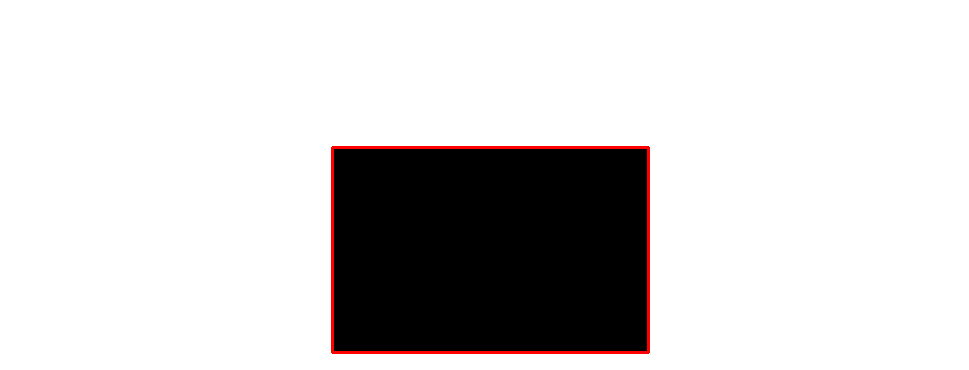

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

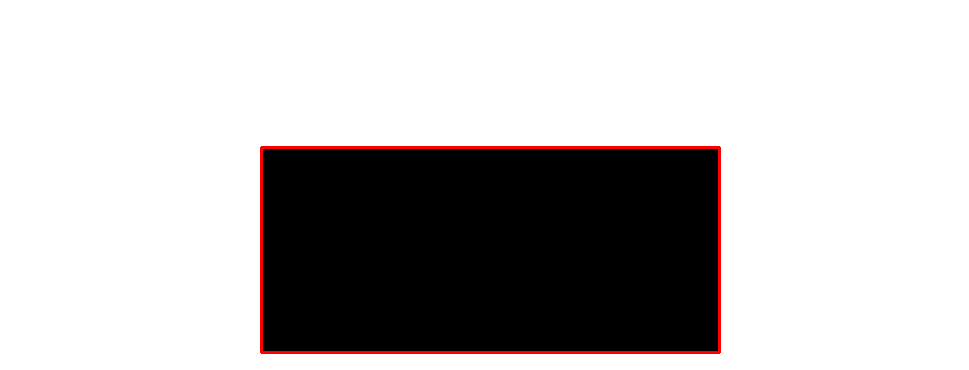

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


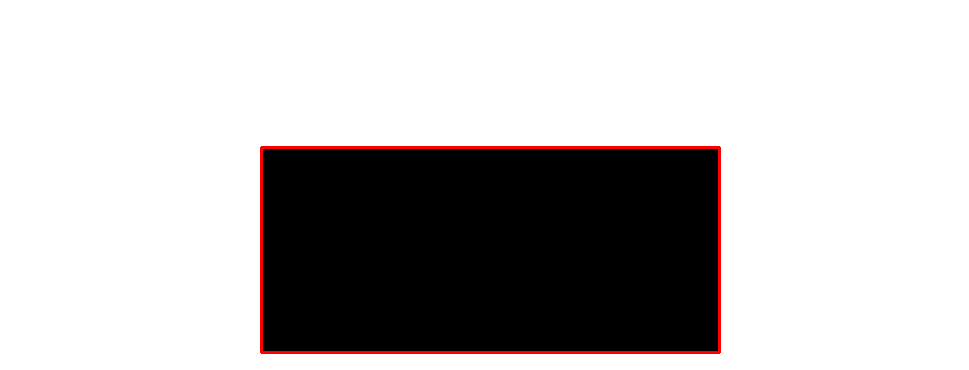

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


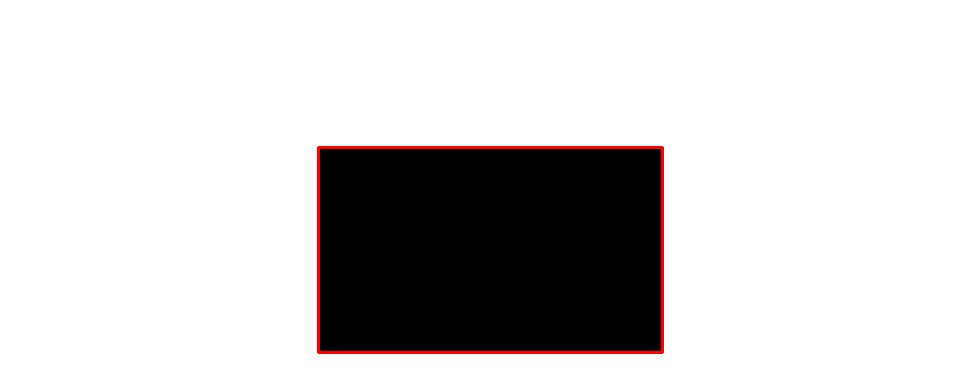

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


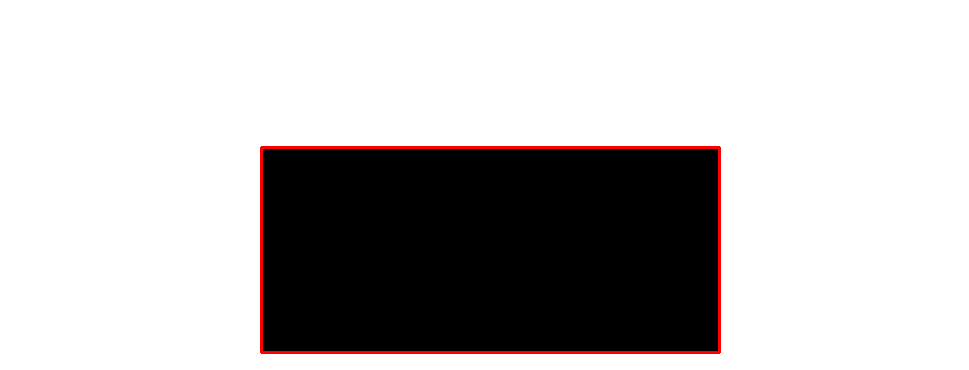

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


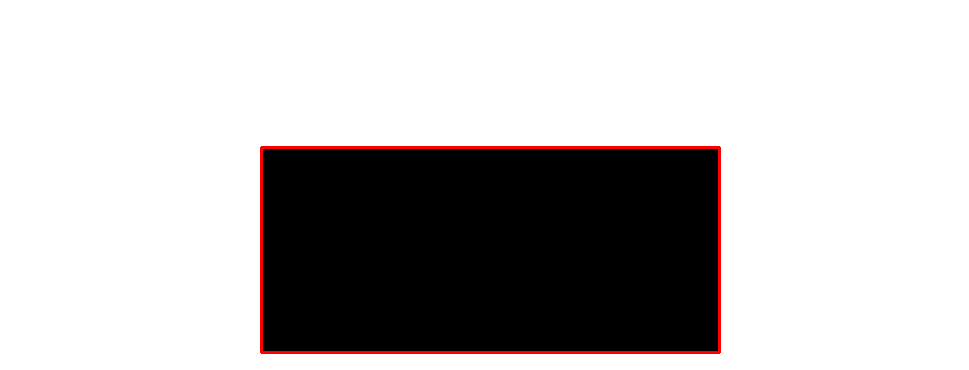

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


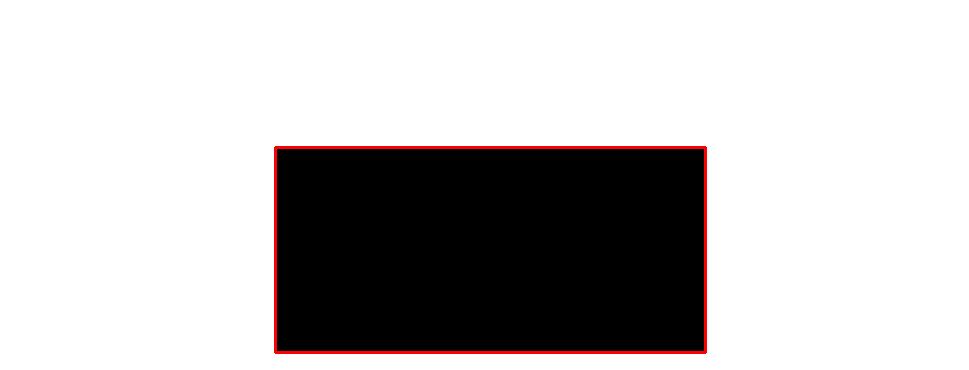

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


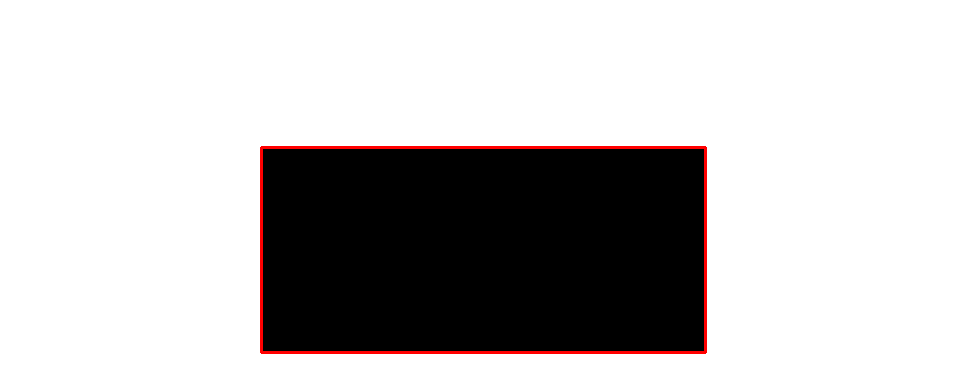

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


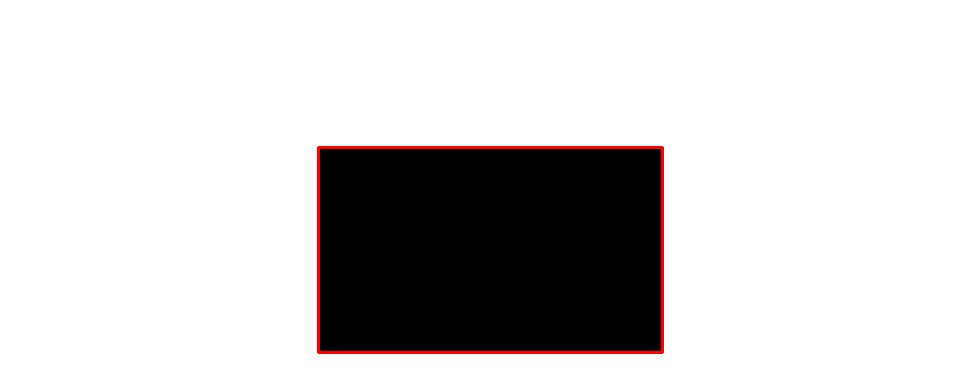

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


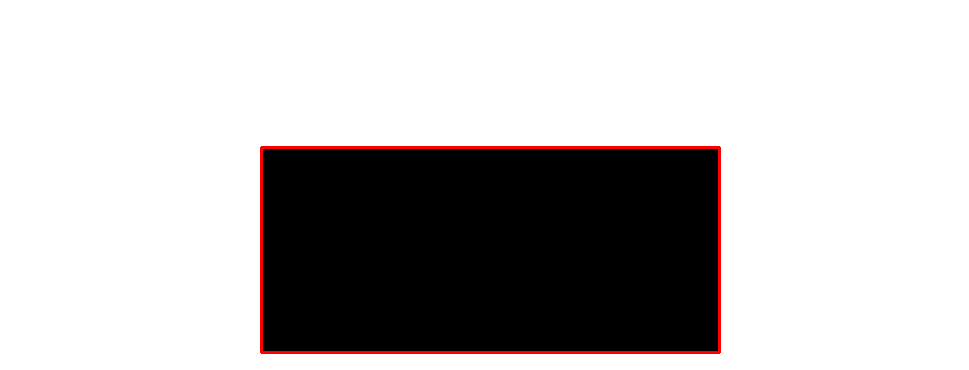

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


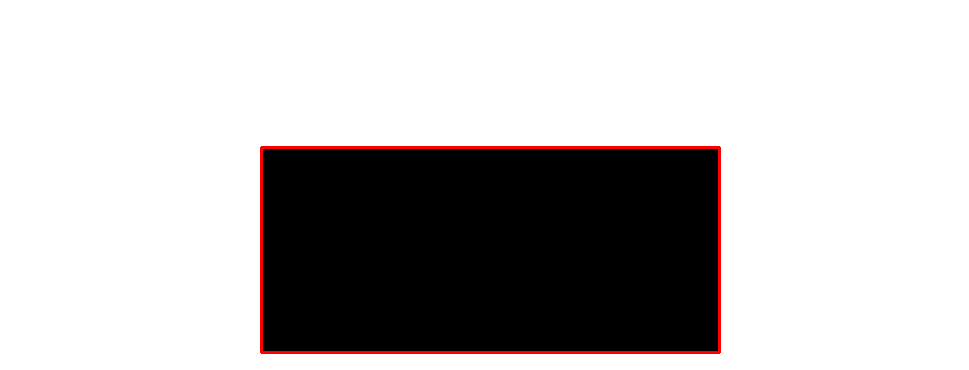

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


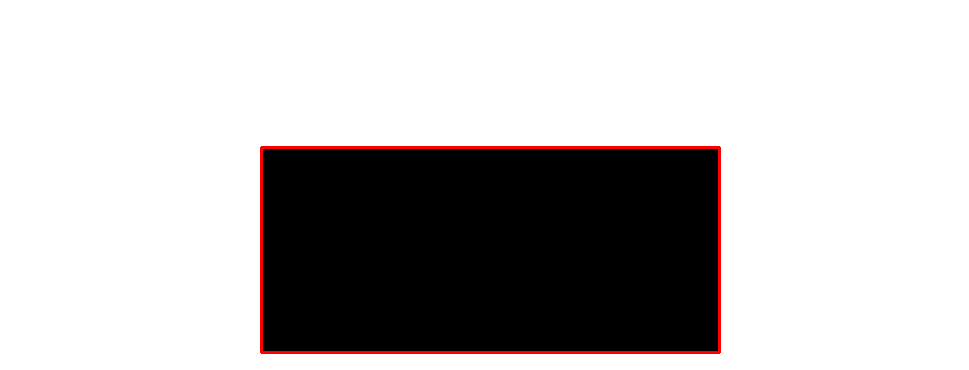

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


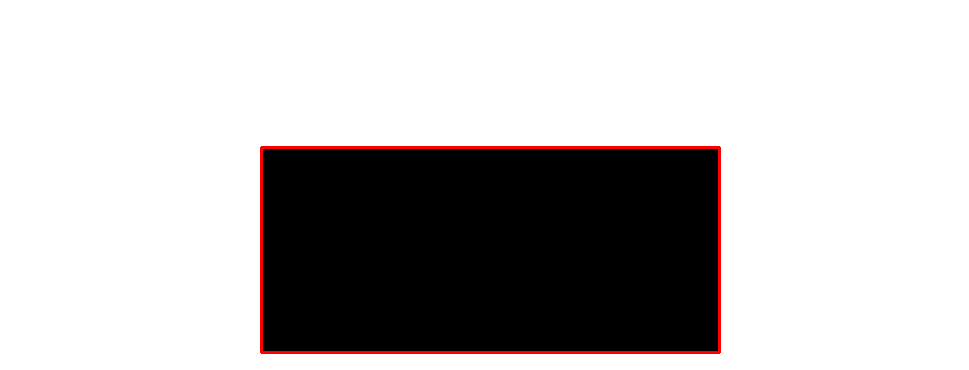

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


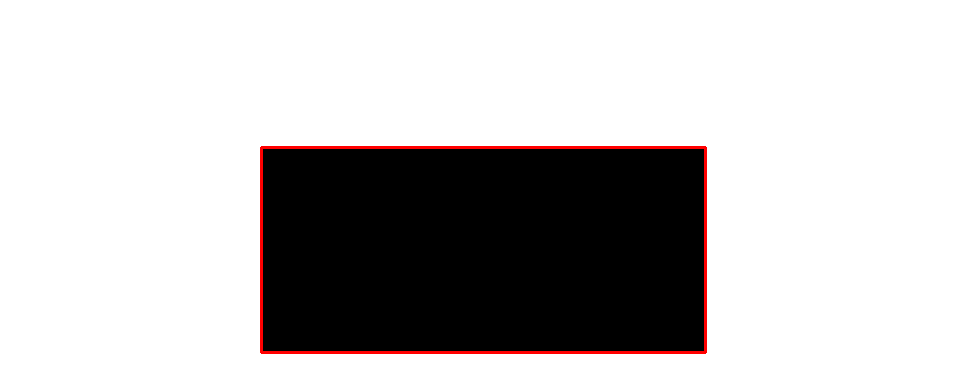

Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


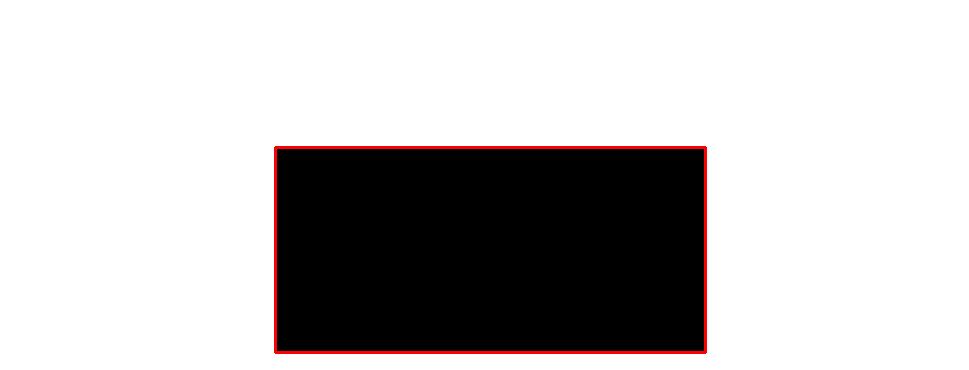

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


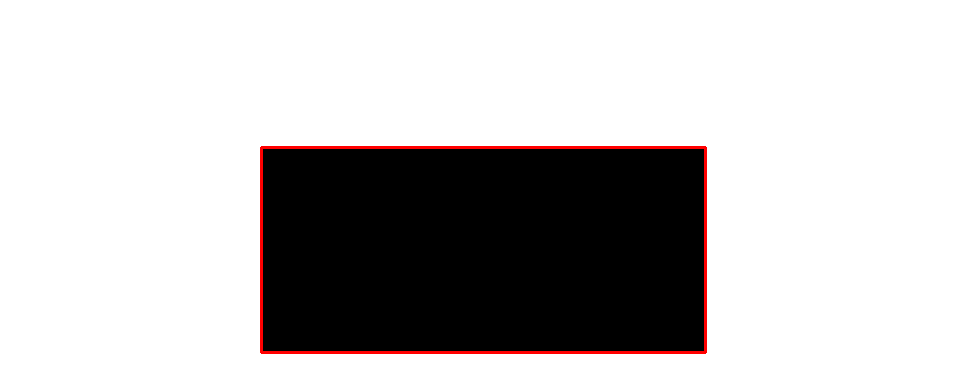

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


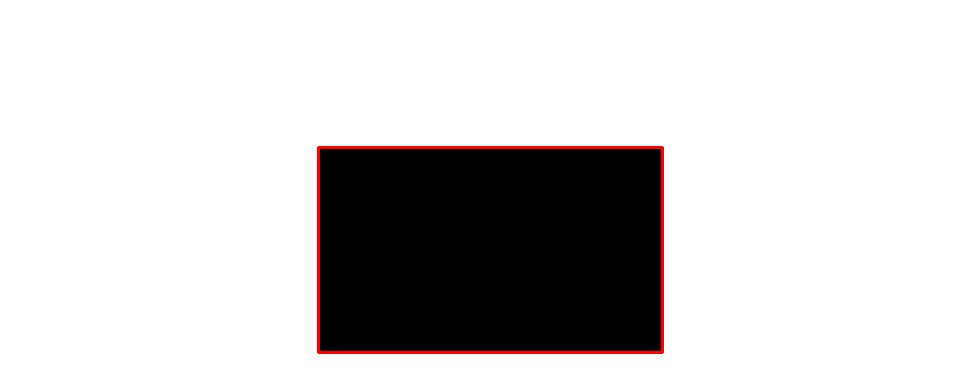

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


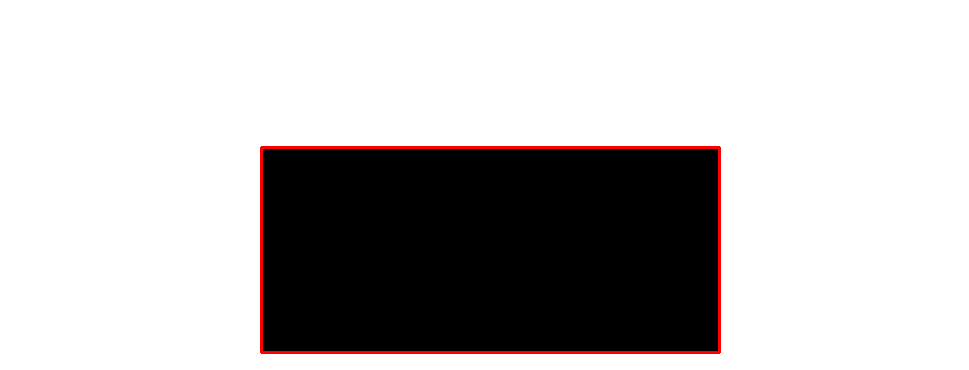

Rectangle coordinates: 261 147 719 352
Rectangle coordinates: 261 147 719 352


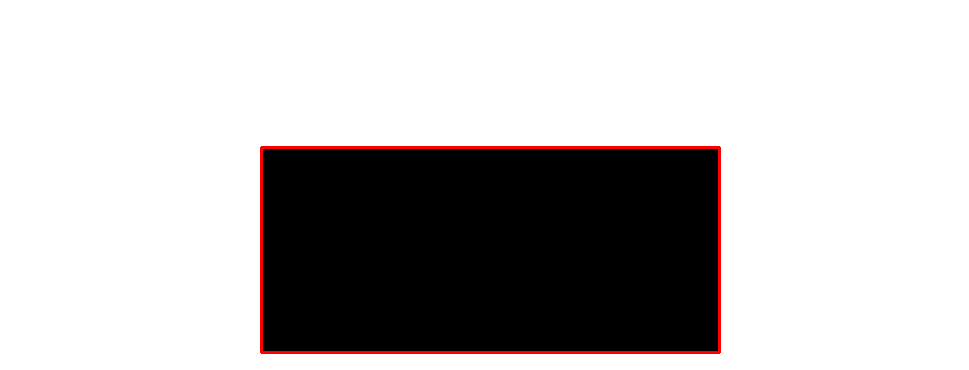

No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 705 352
Rectangle coordinates: 275 147 705 352


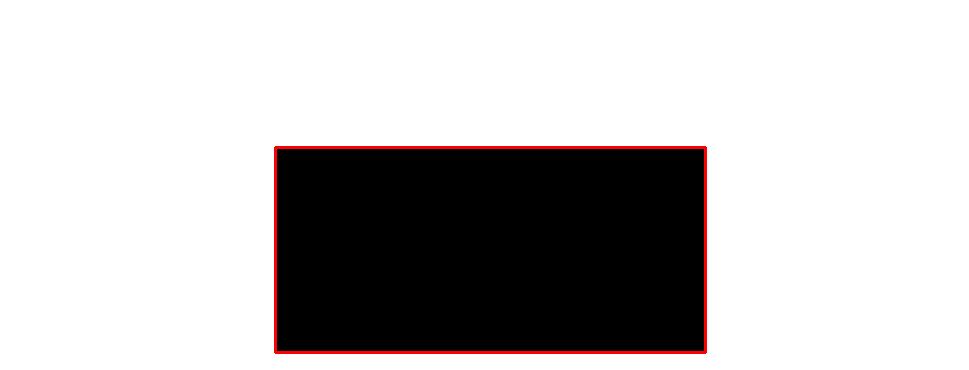

Rectangle coordinates: 261 147 705 352
Rectangle coordinates: 261 147 705 352


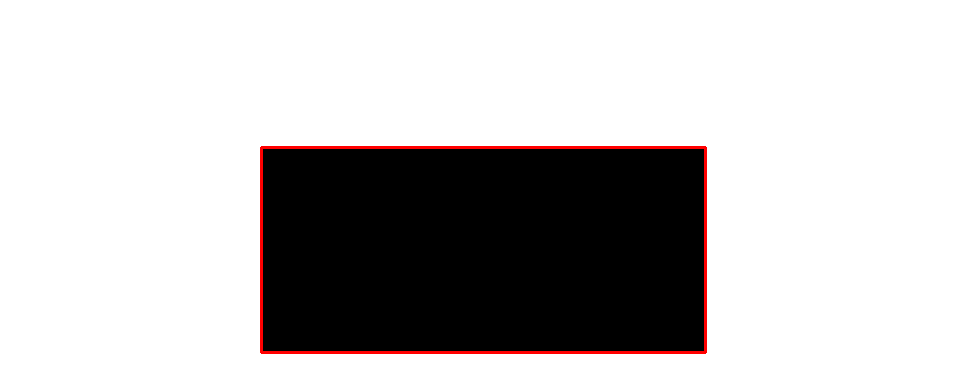

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


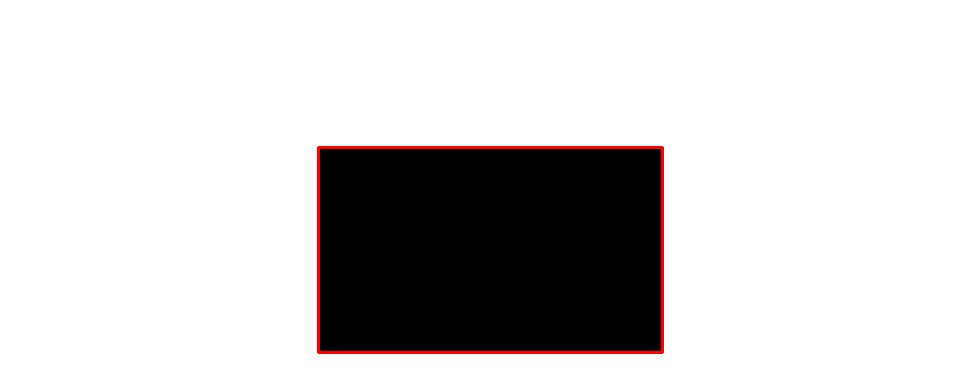

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


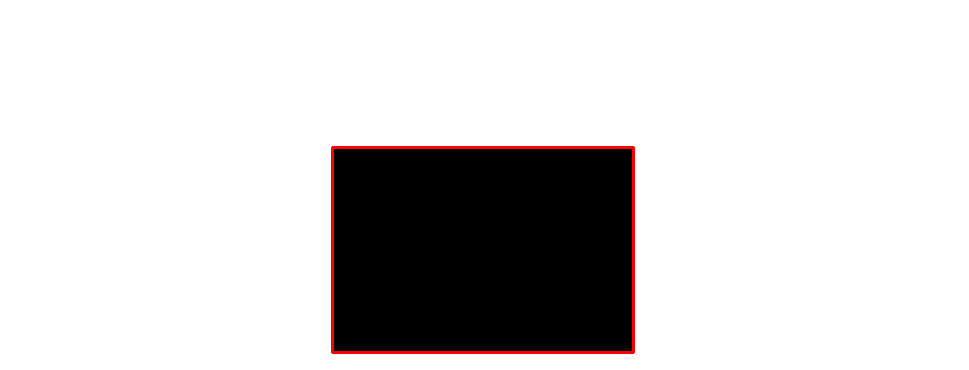

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


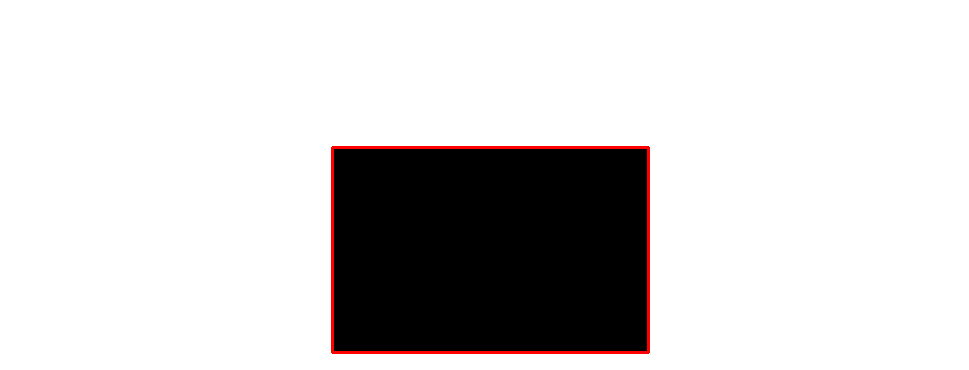

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


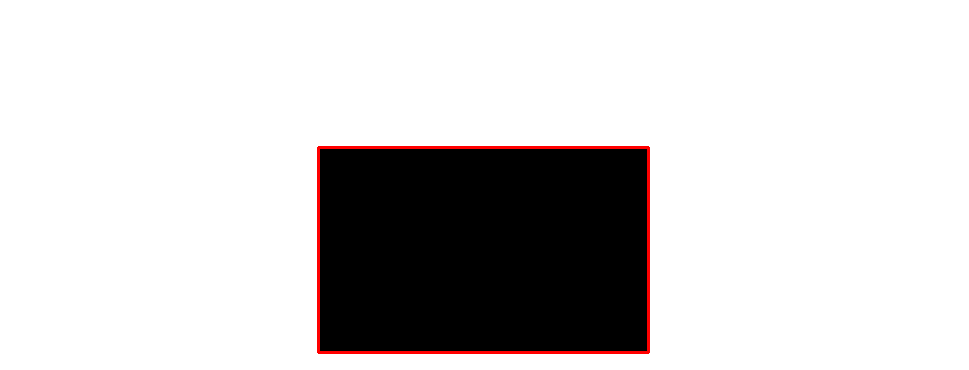

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


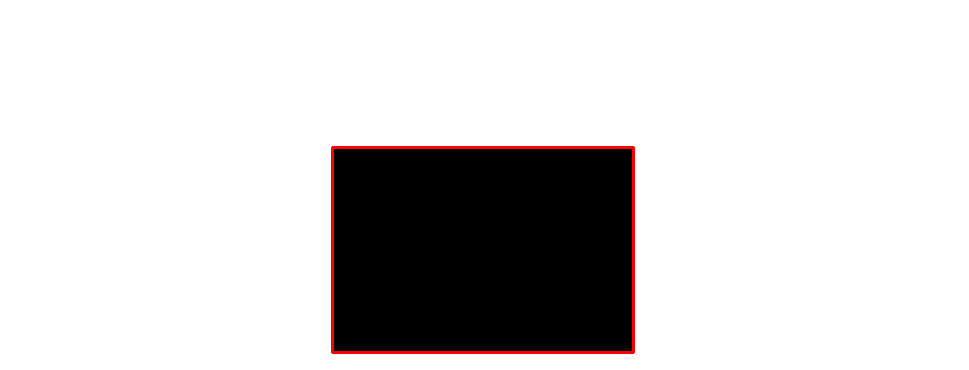

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


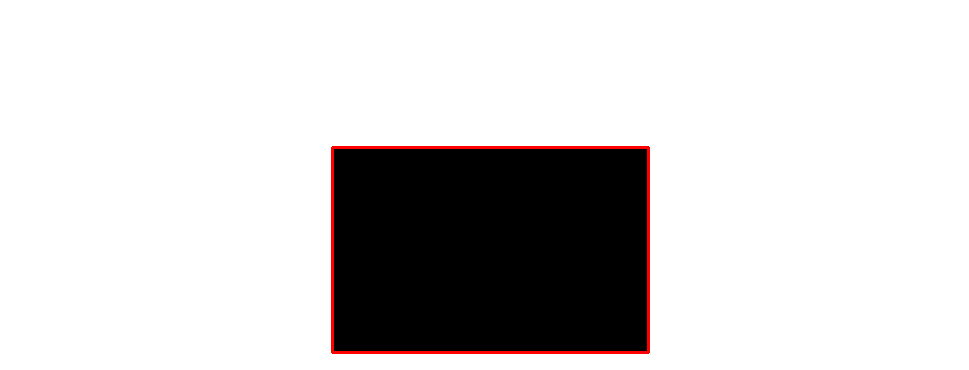

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


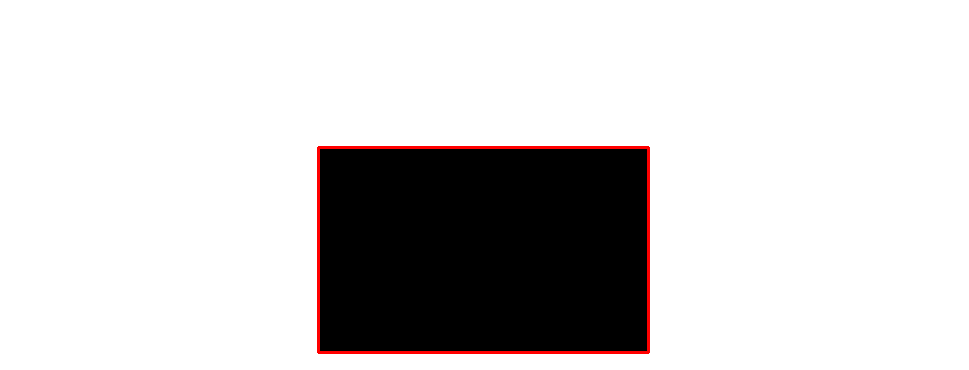

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


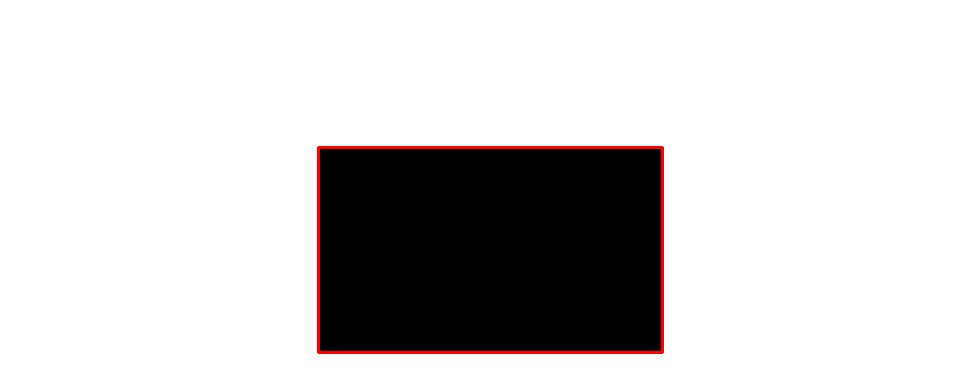

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


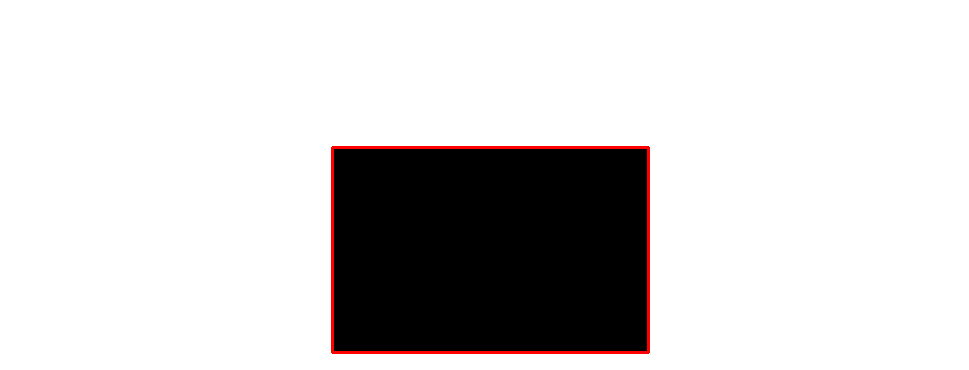

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


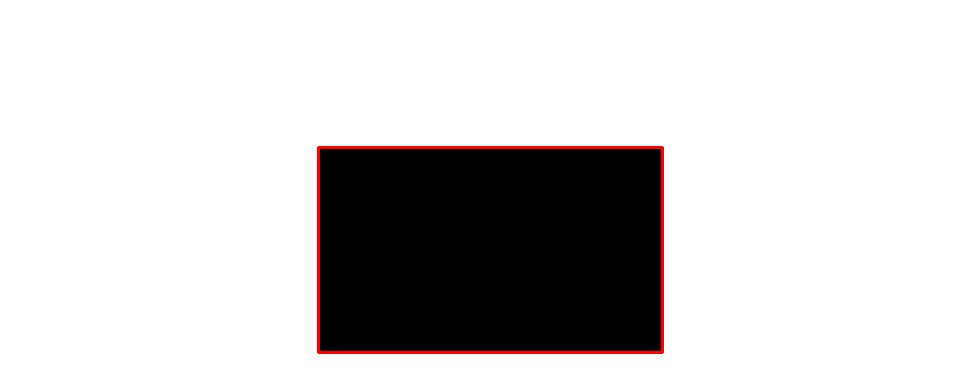

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


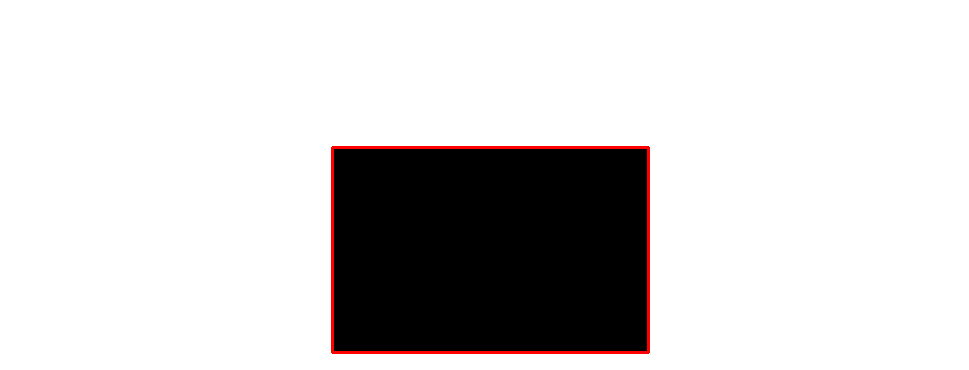

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


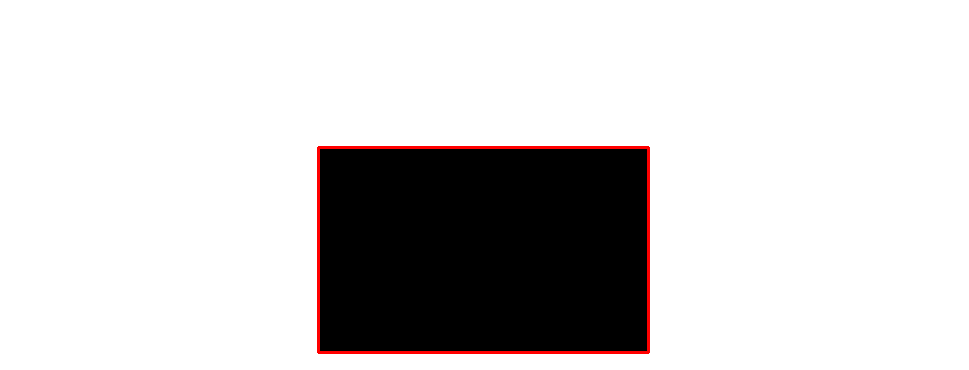

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


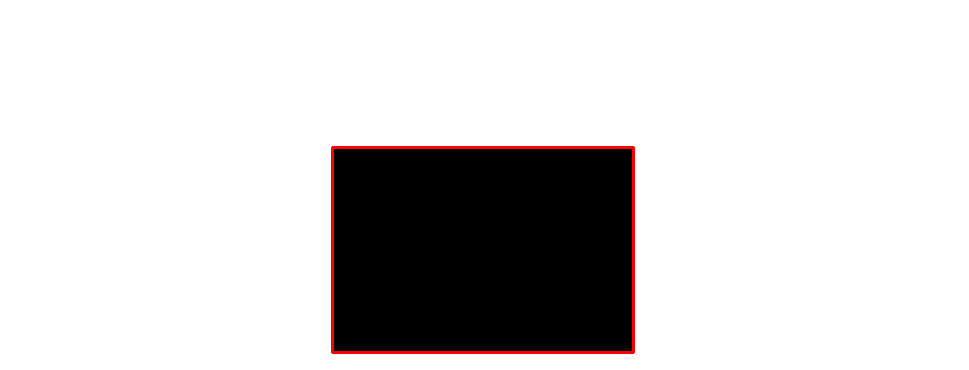

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


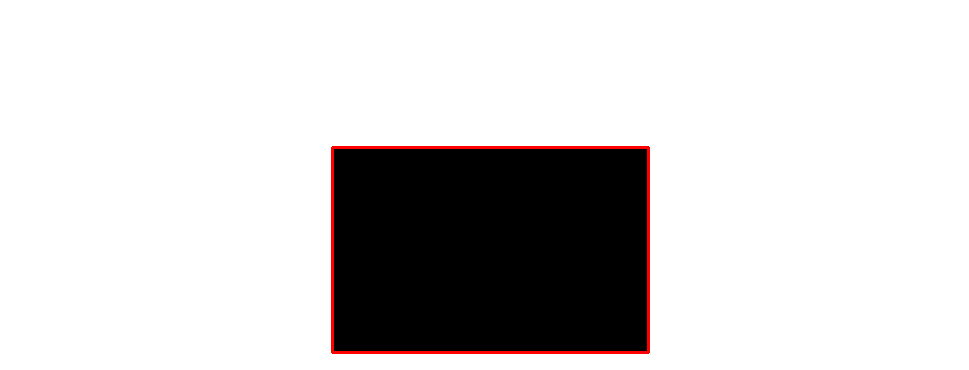

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


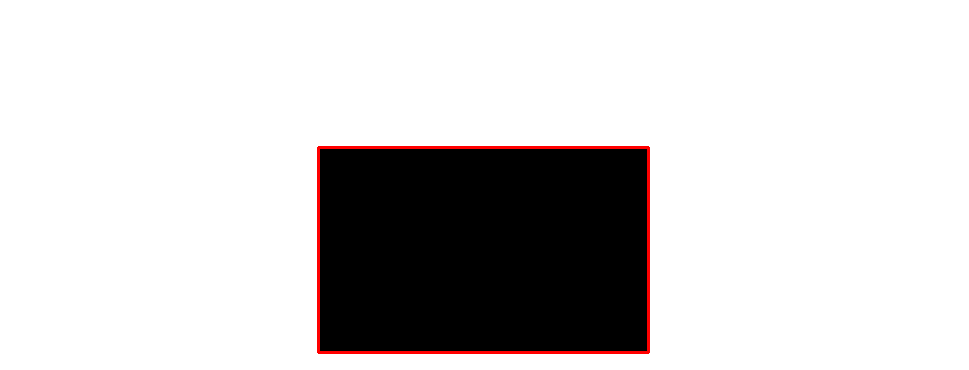

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


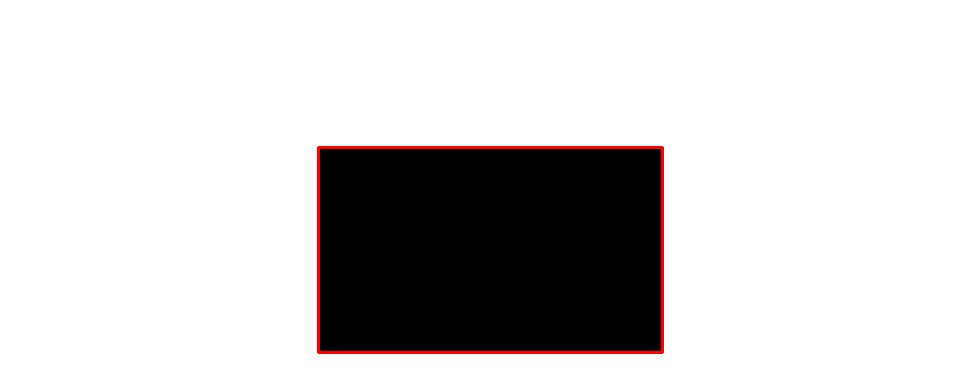

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


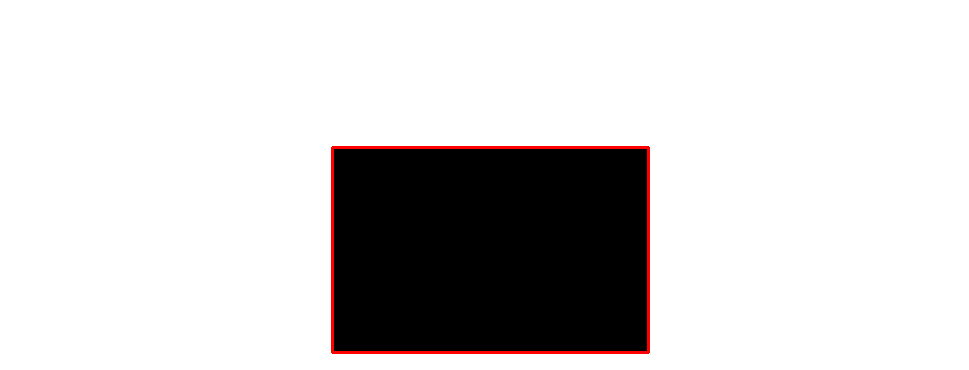

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


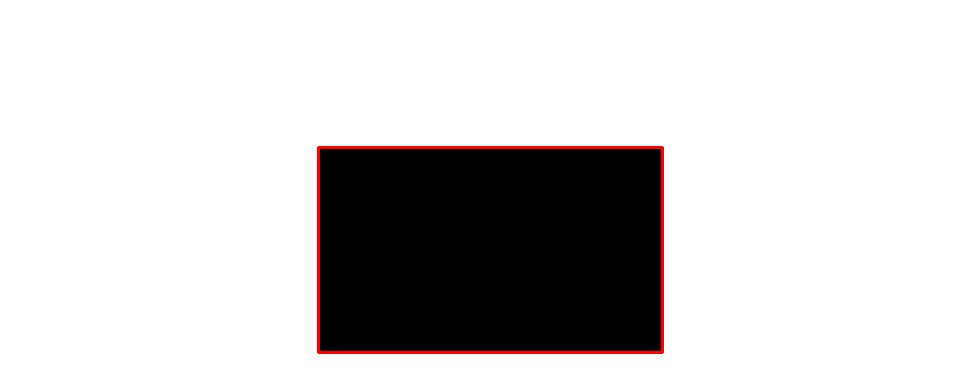

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


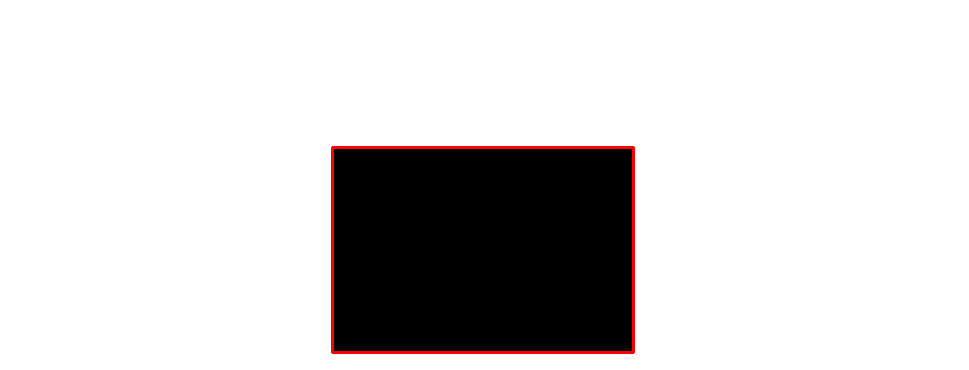

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


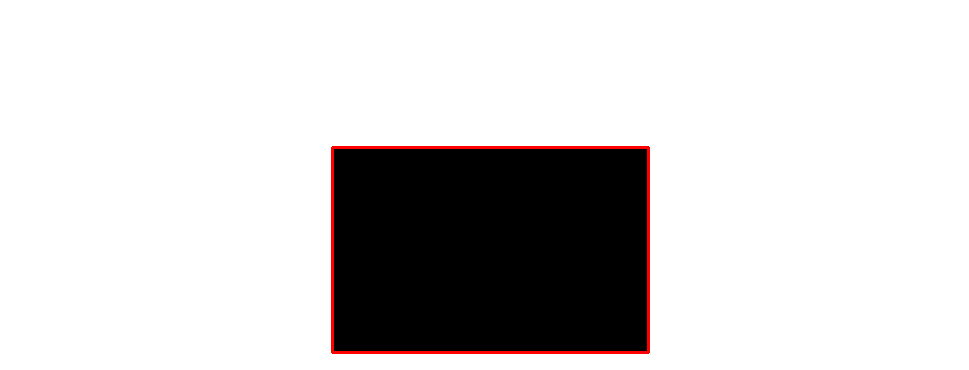

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


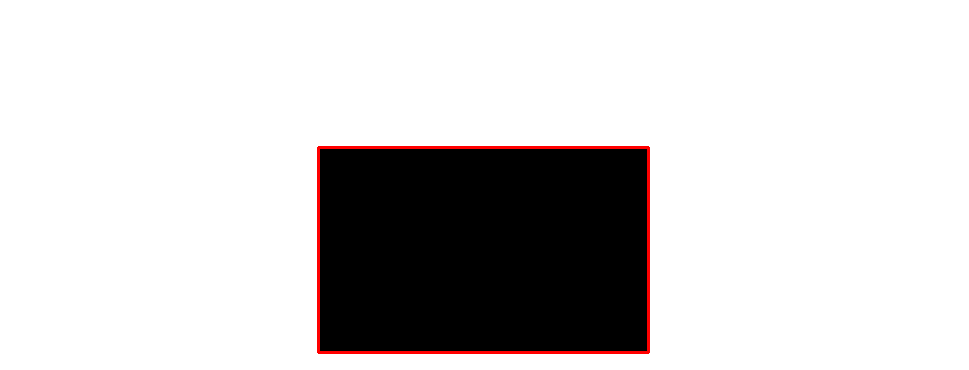

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


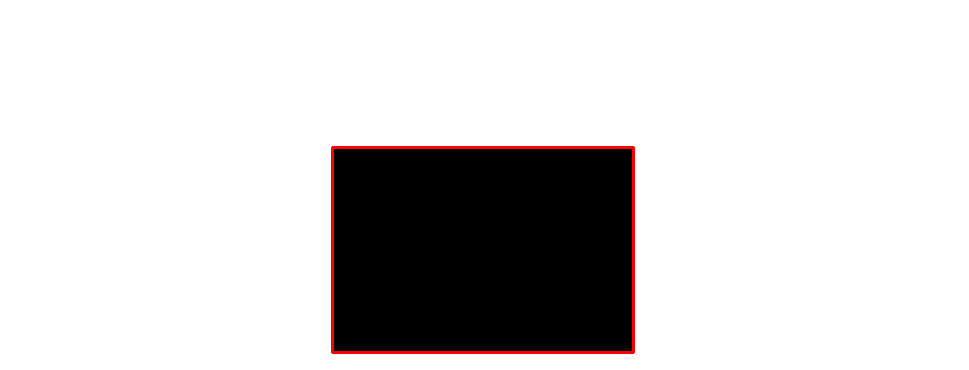

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


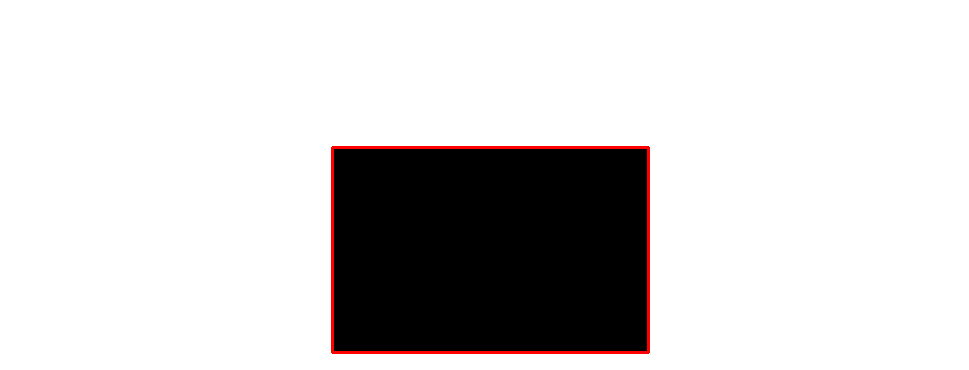

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


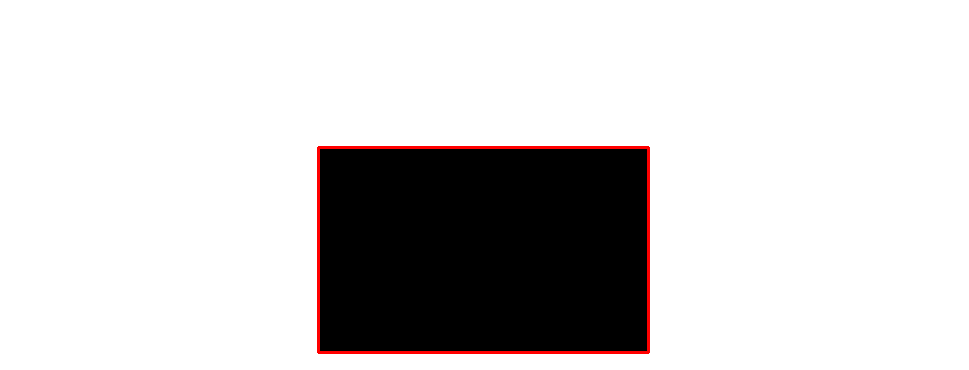

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


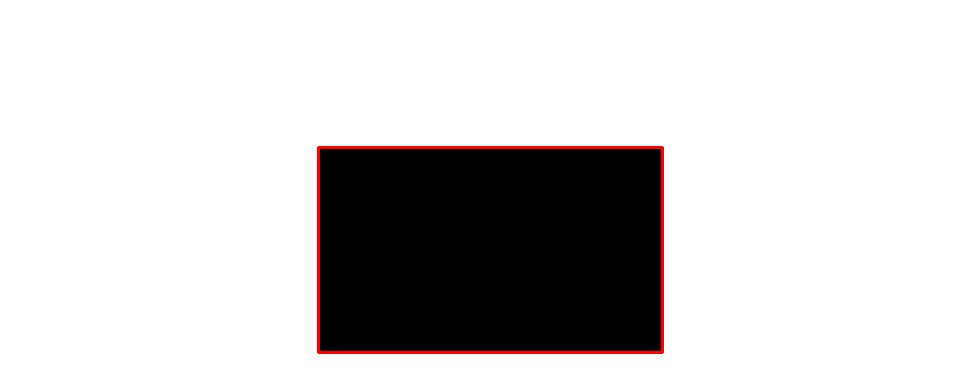

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


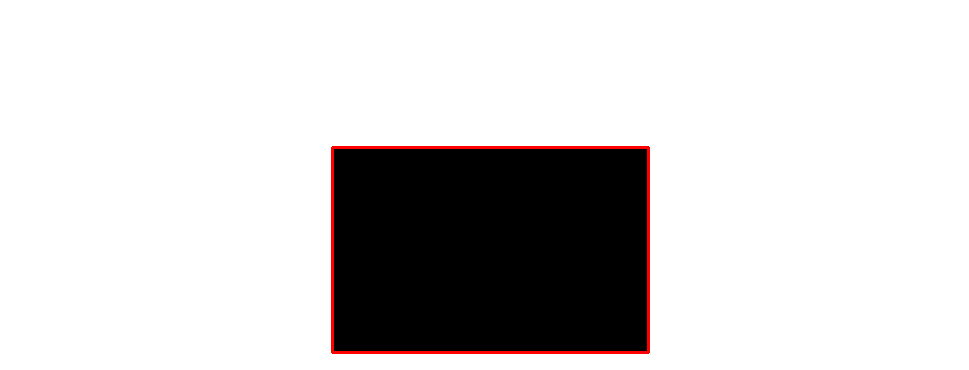

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


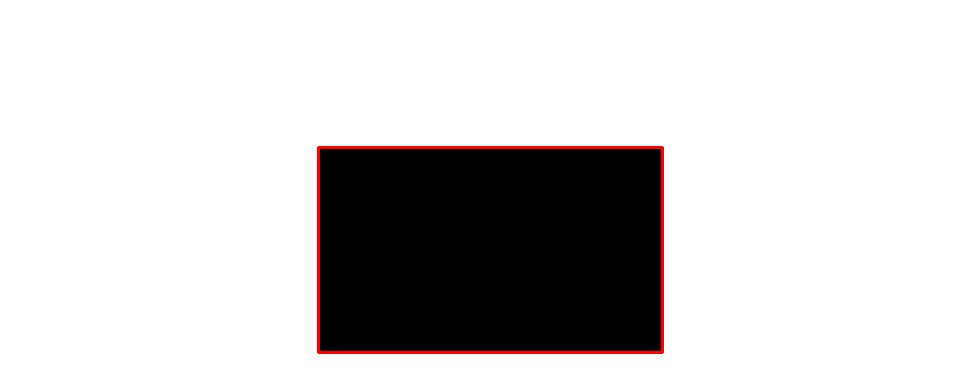

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


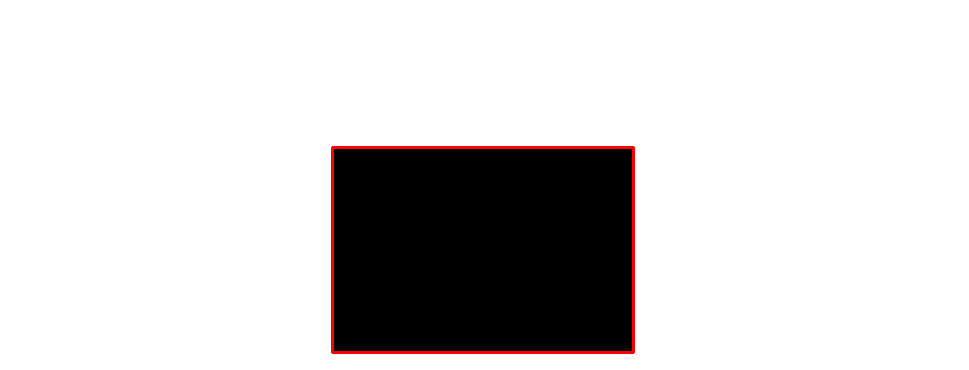

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


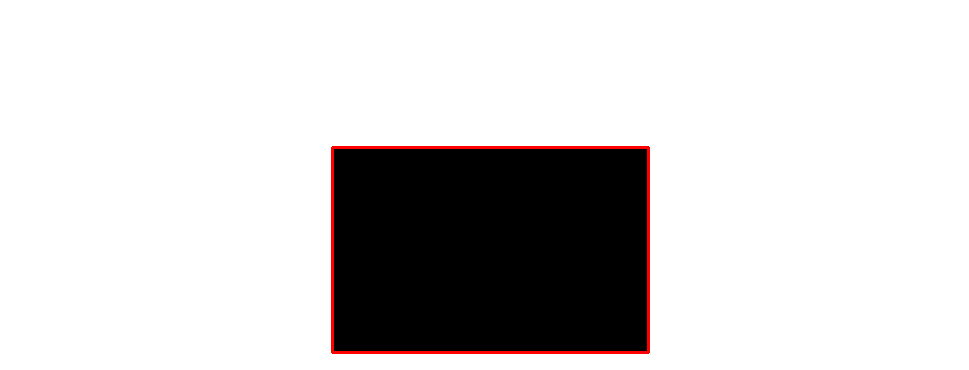

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


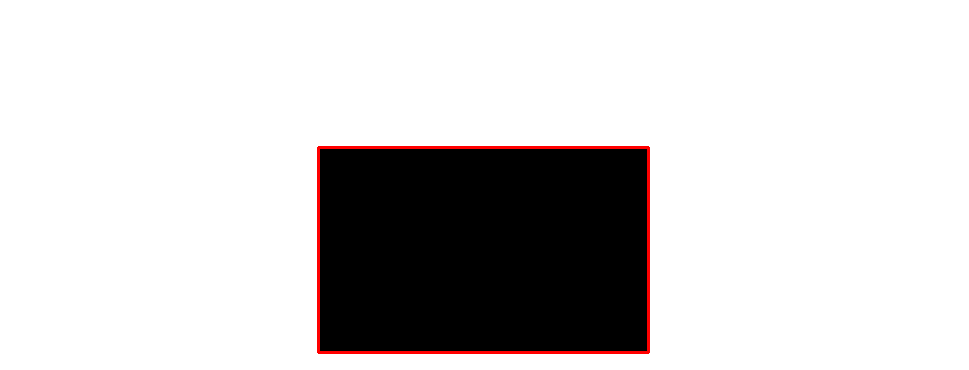

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


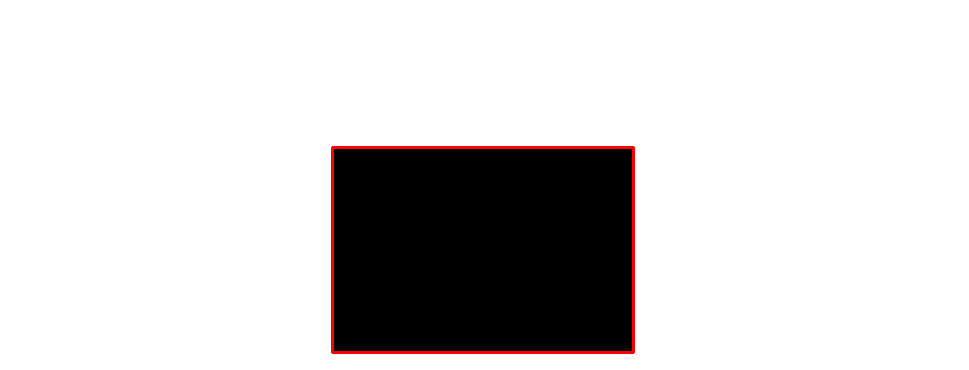

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


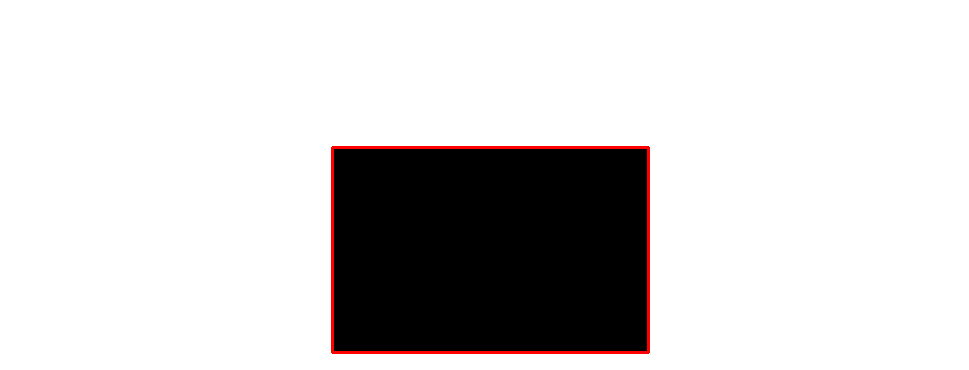

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


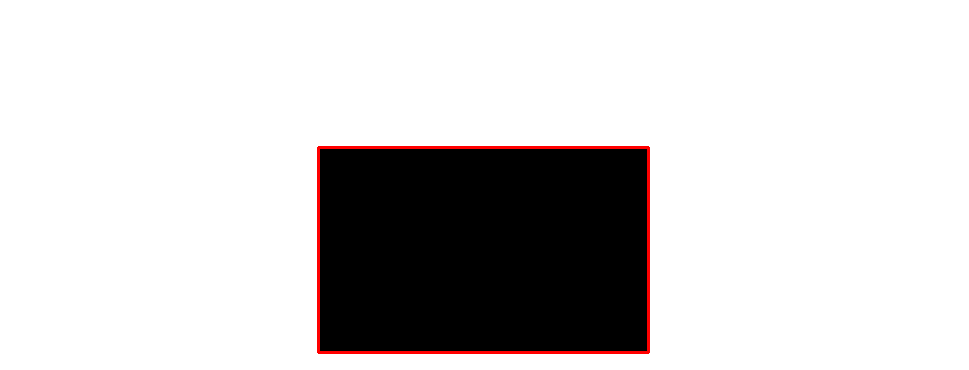

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


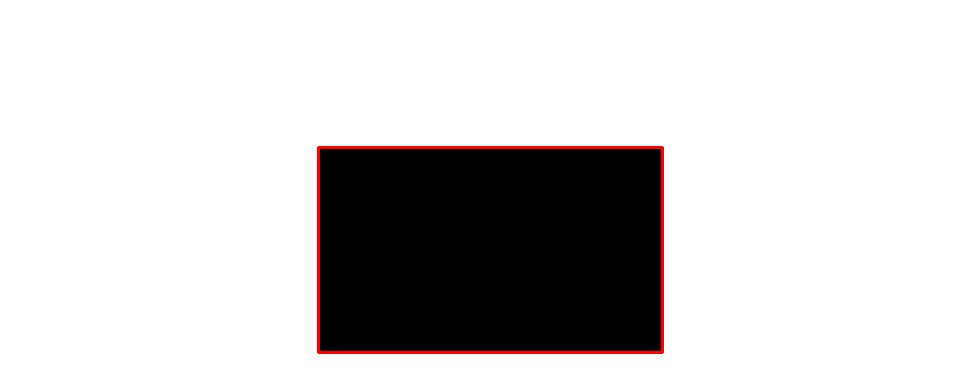

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


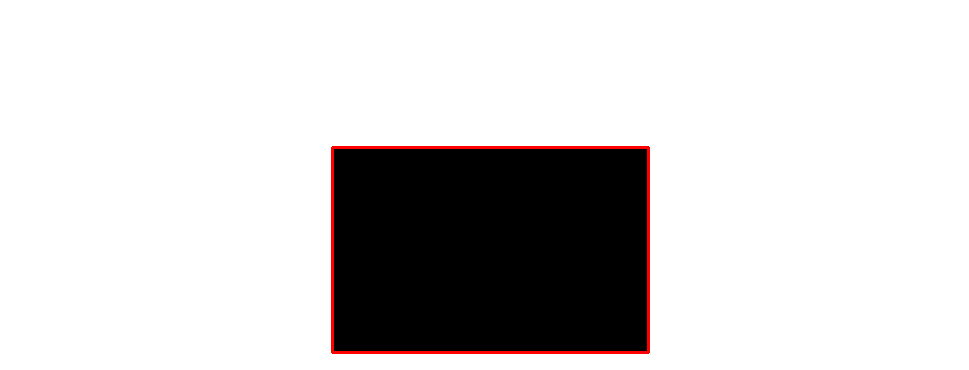

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


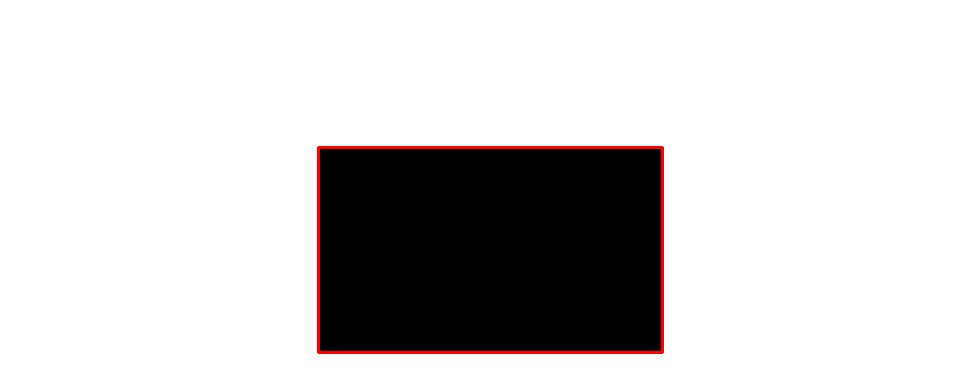

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


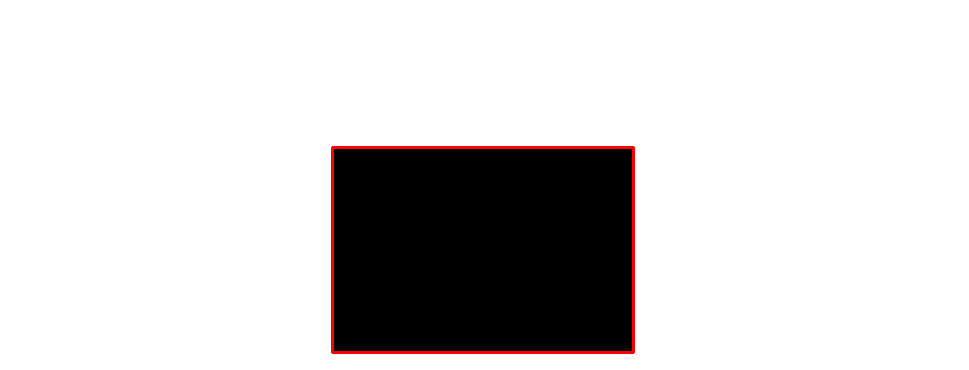

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


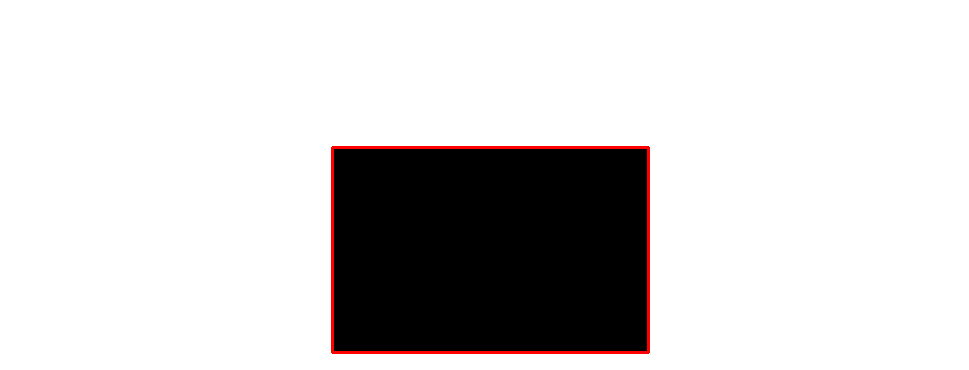

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


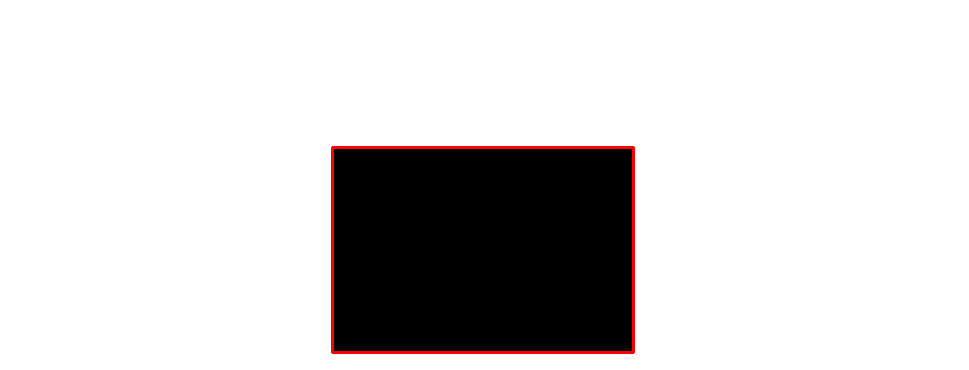

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


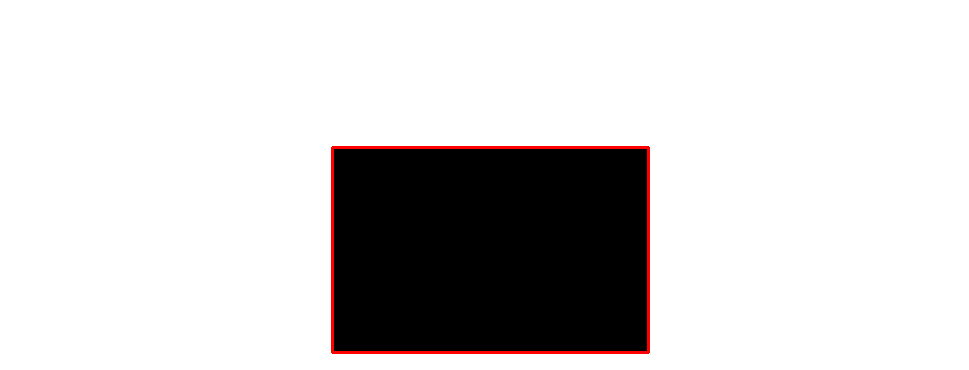

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


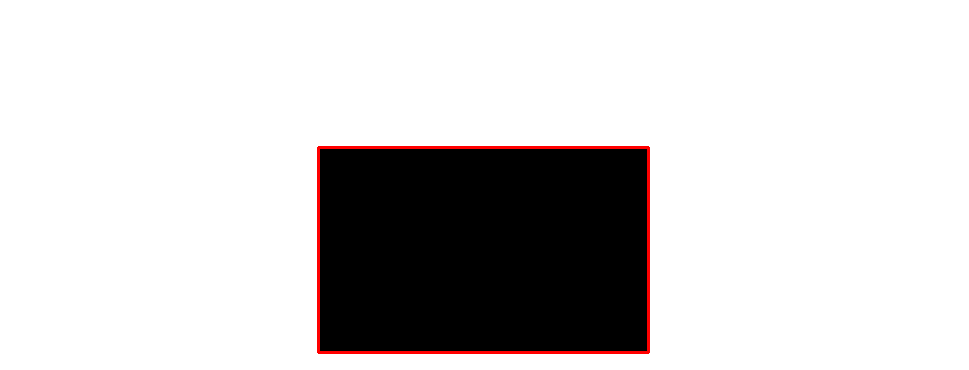

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


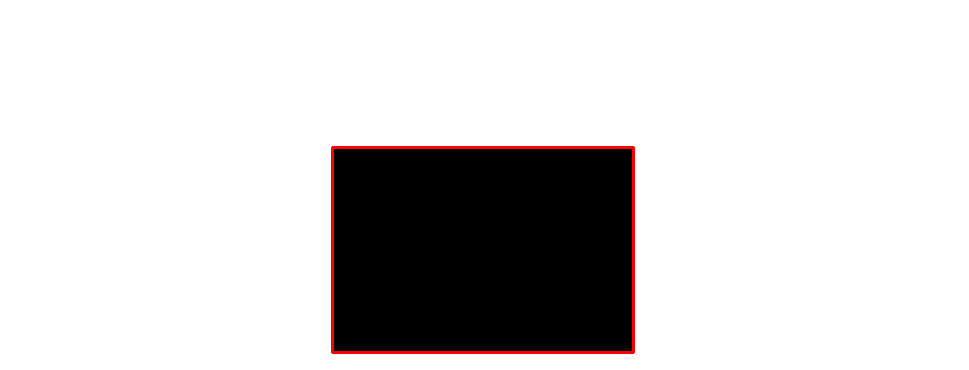

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


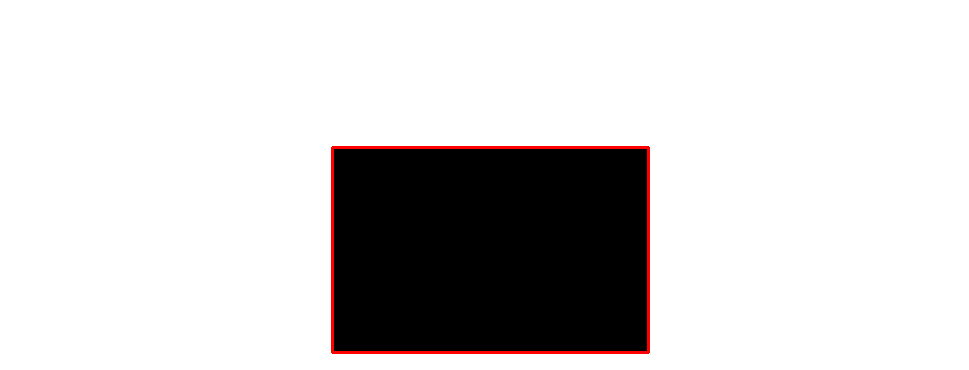

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


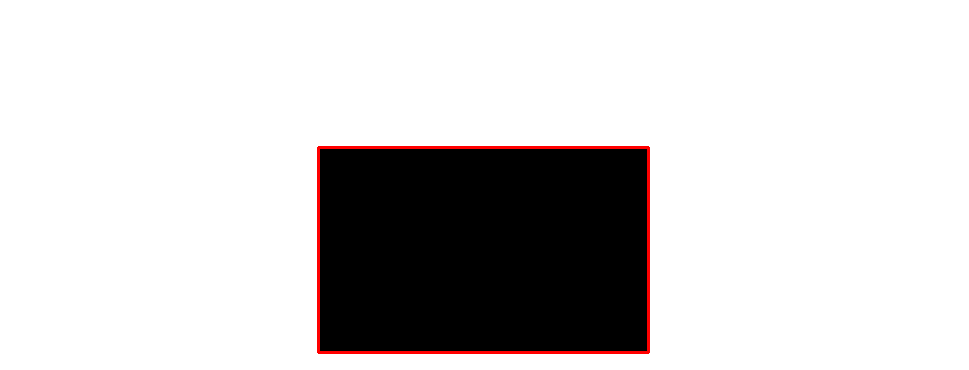

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


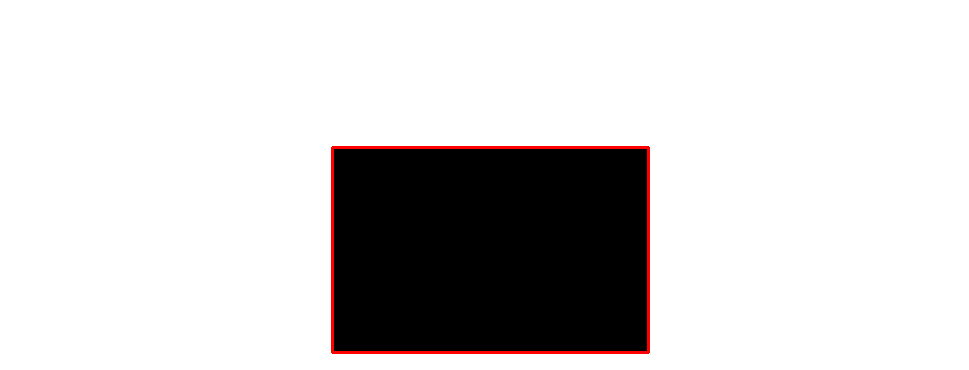

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


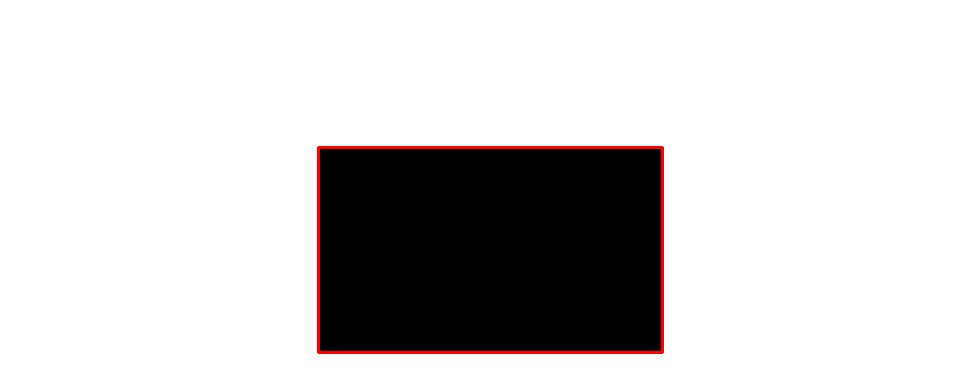

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


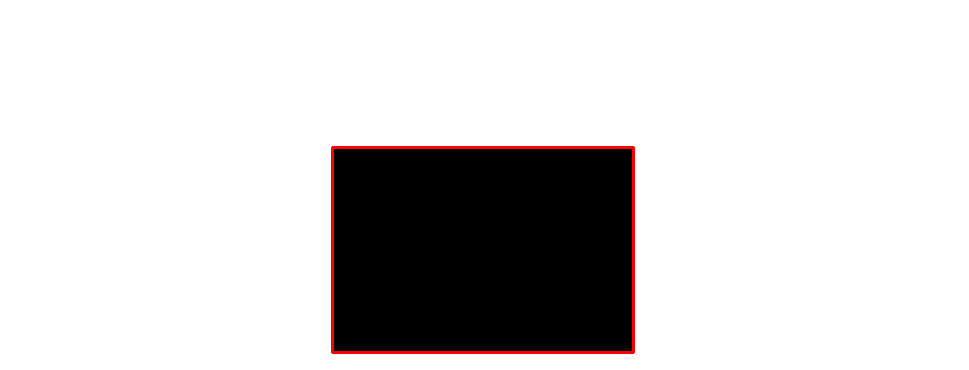

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


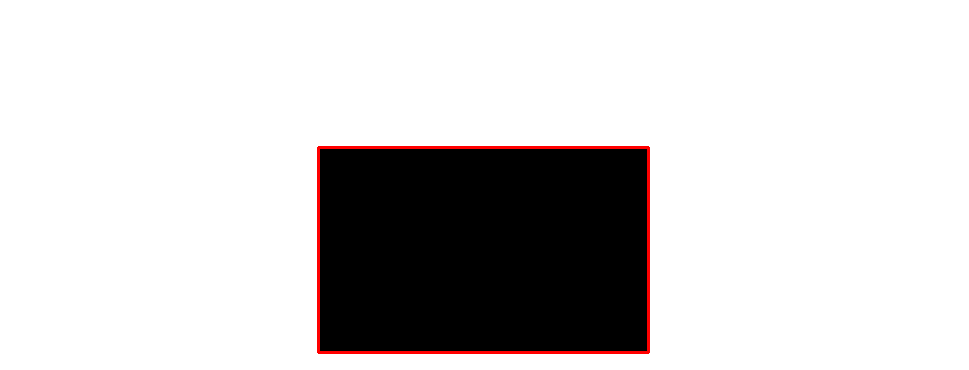

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


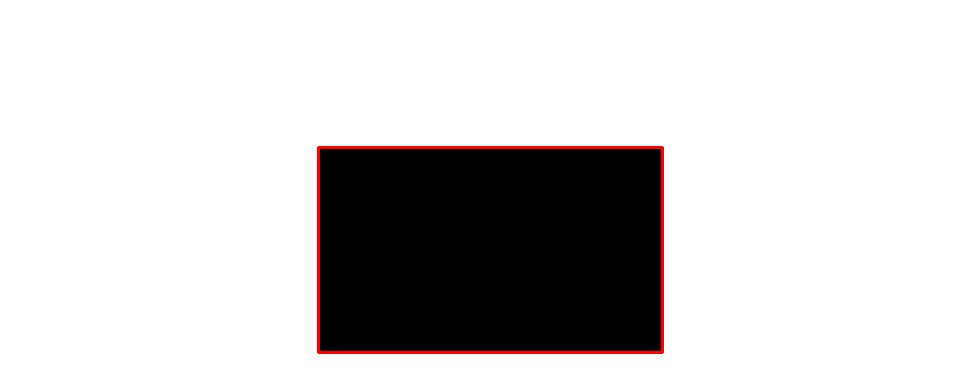

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


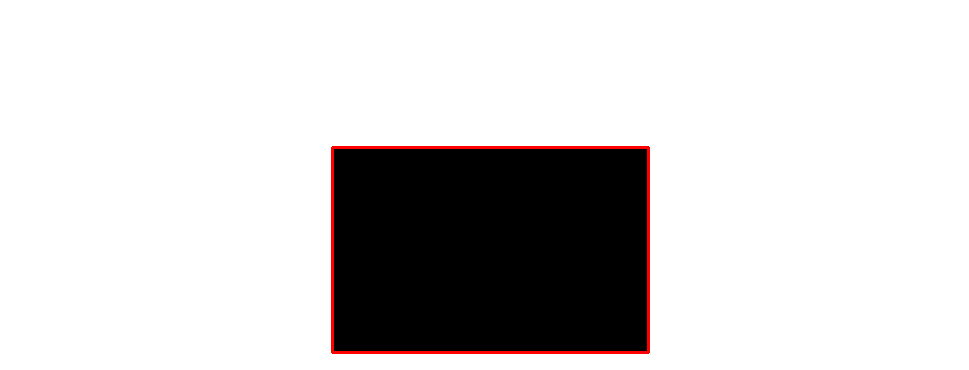

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


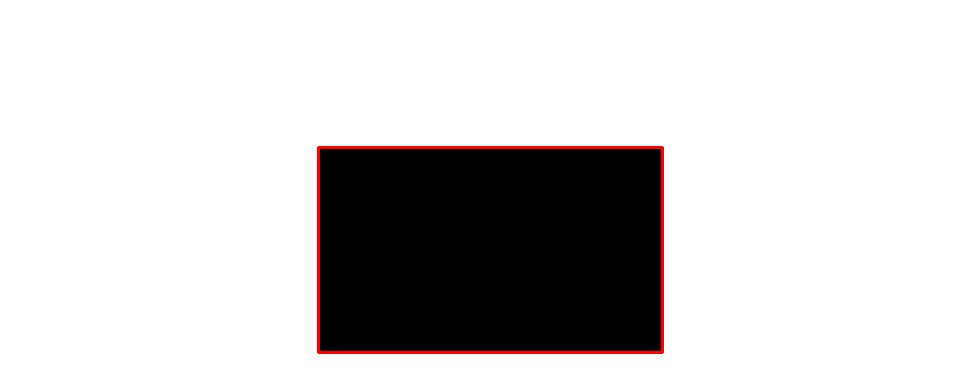

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


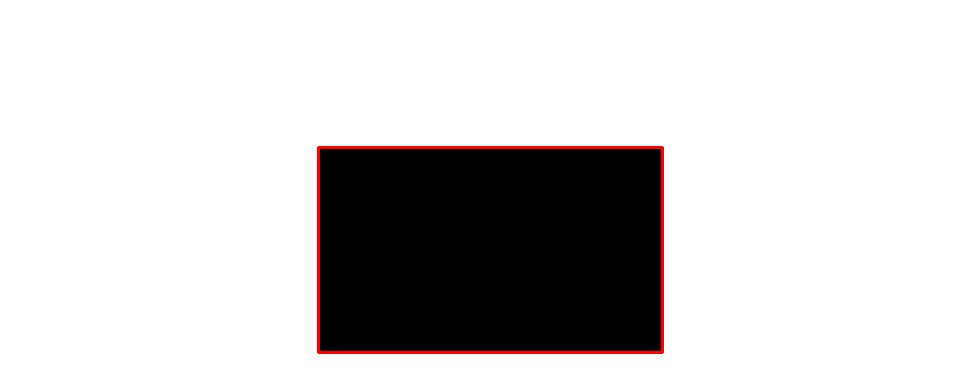

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


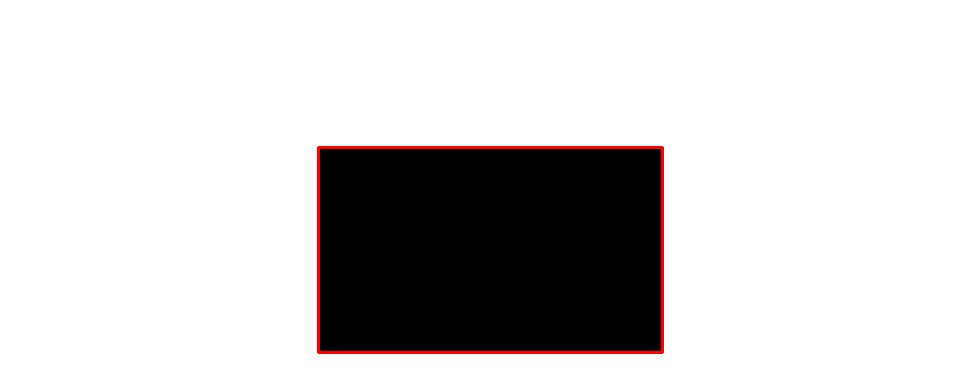

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


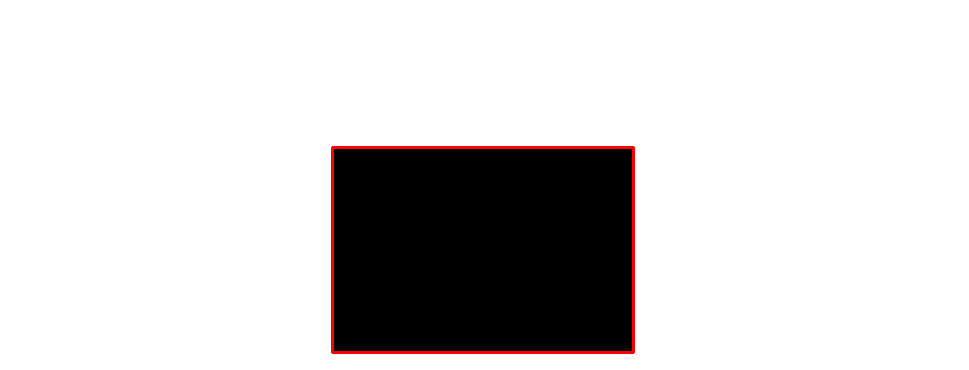

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


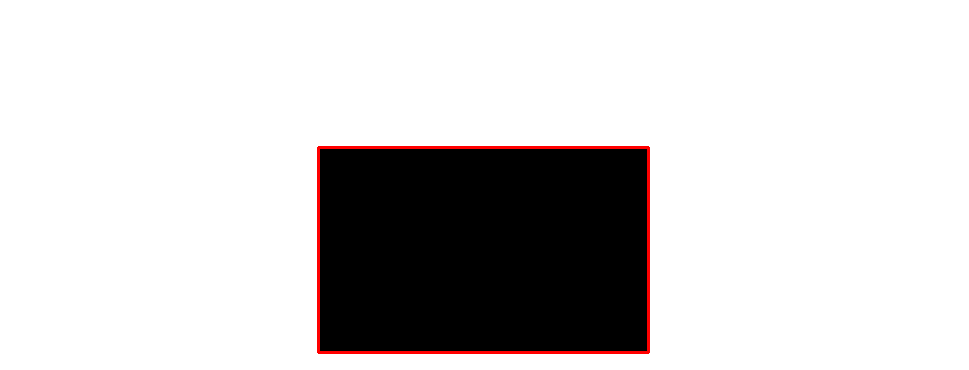

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


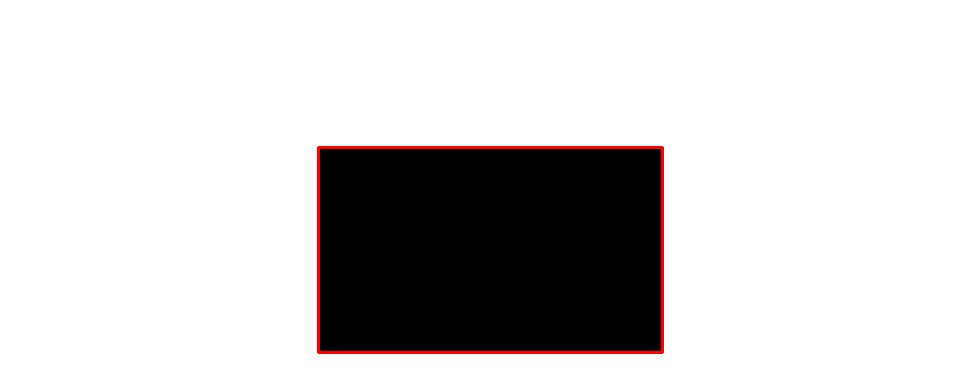

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


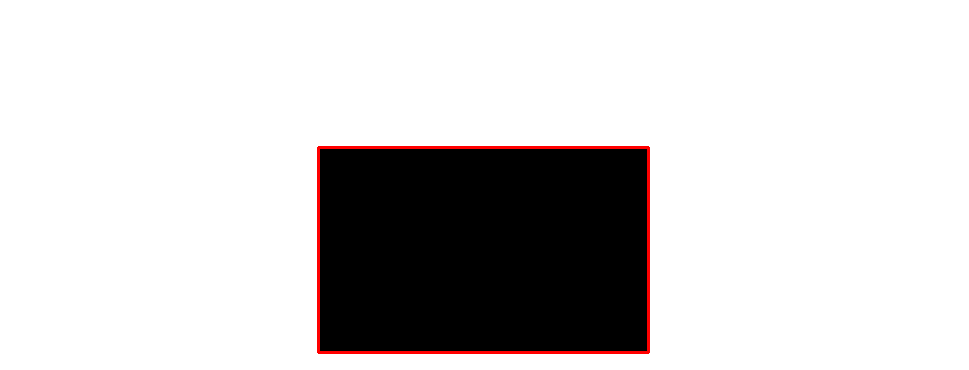

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


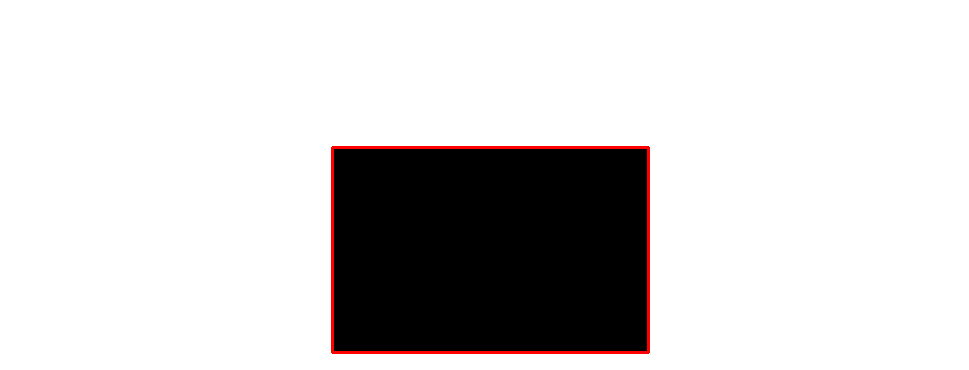

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


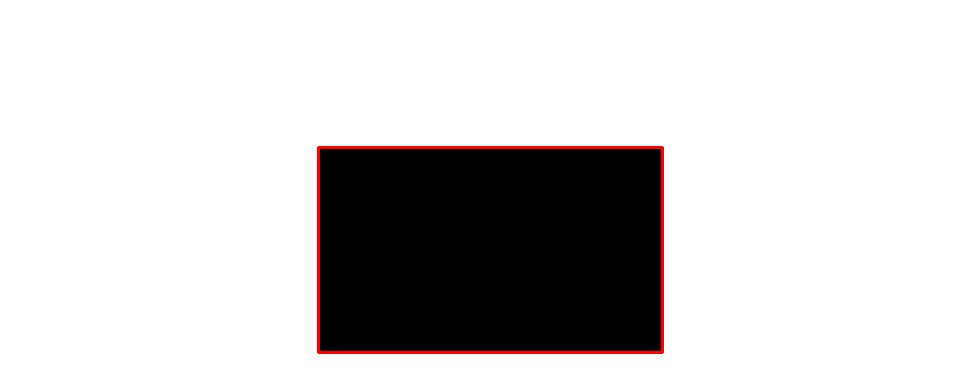

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


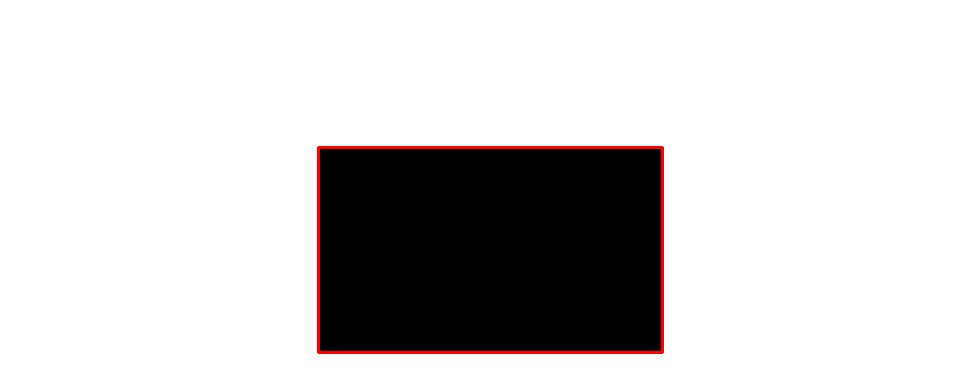

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


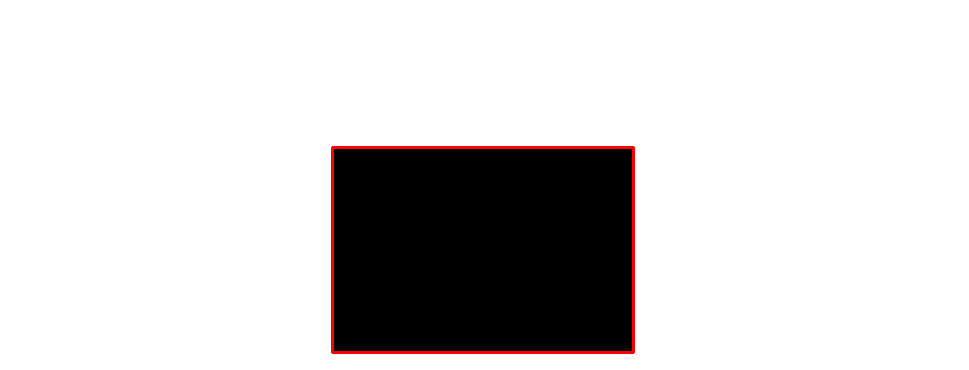

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


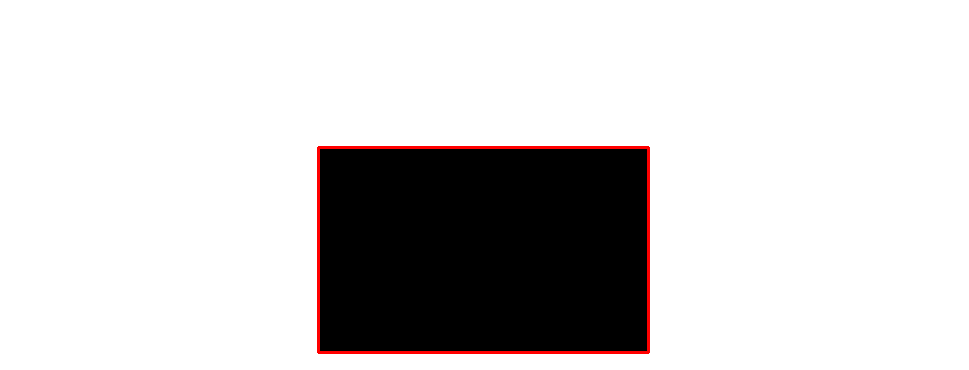

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


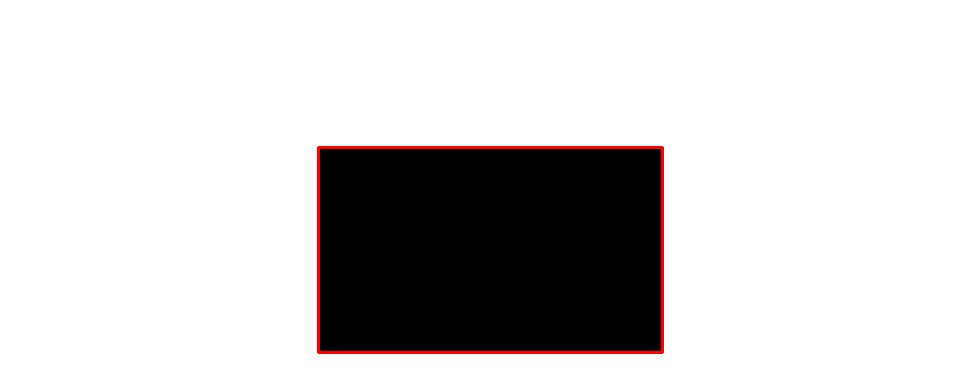

No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


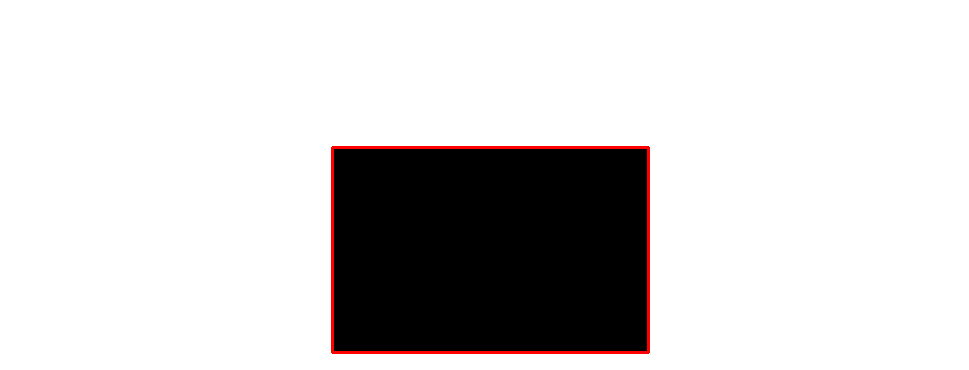

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


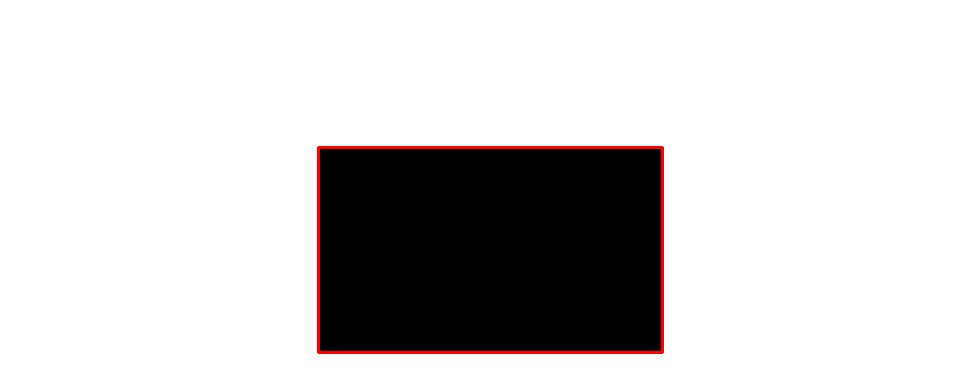

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


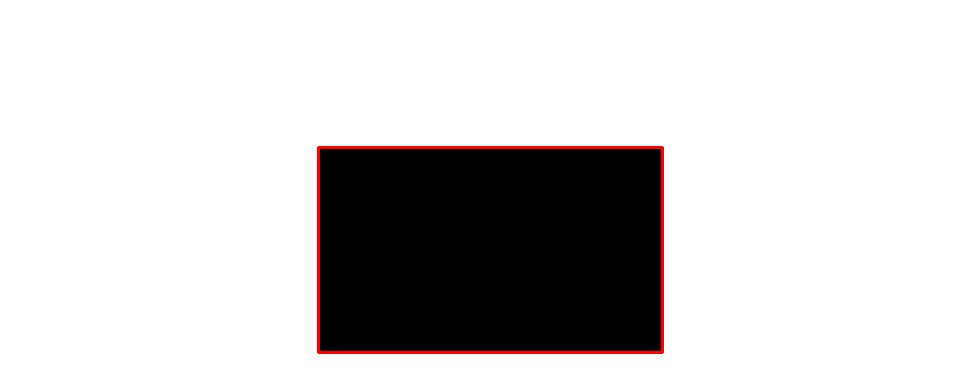

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


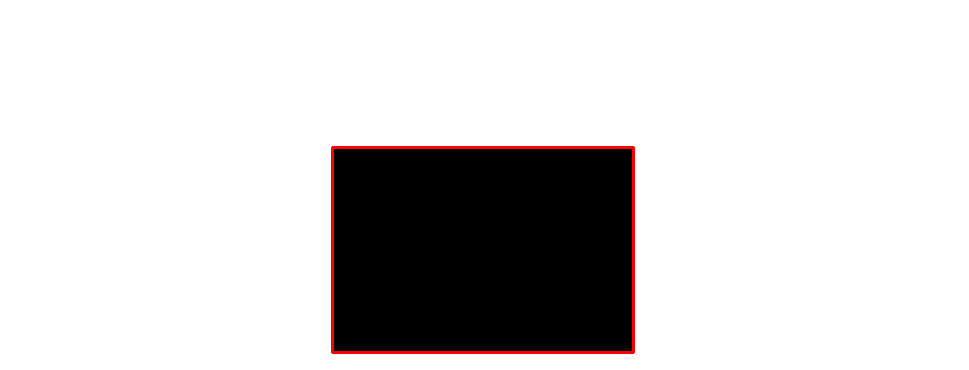

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


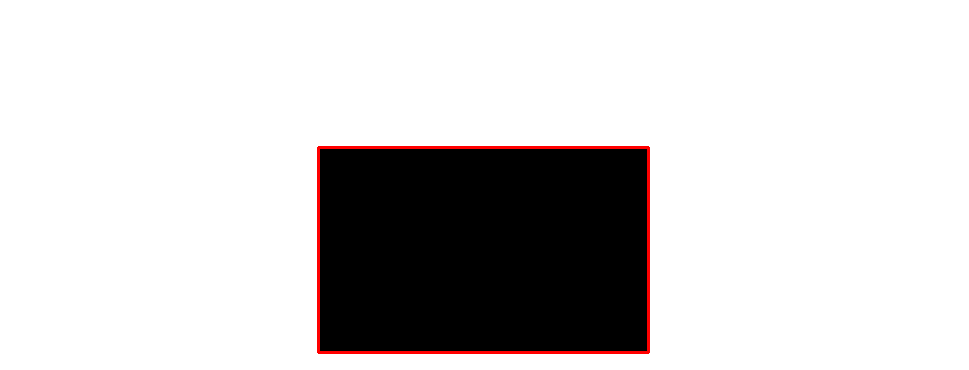

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


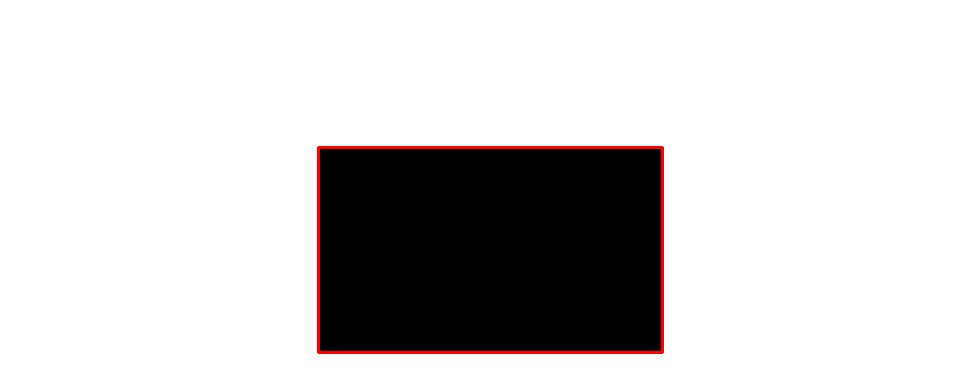

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


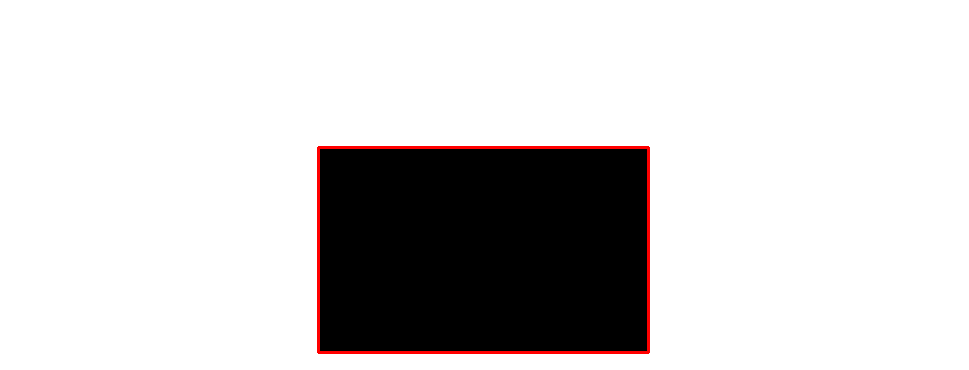

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


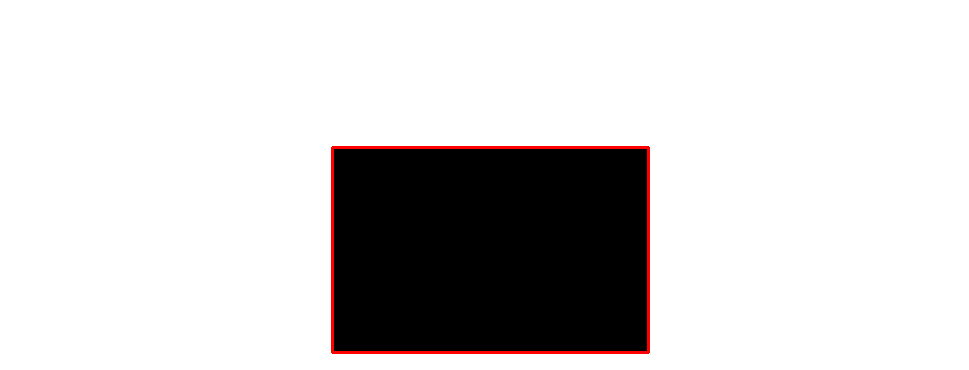

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


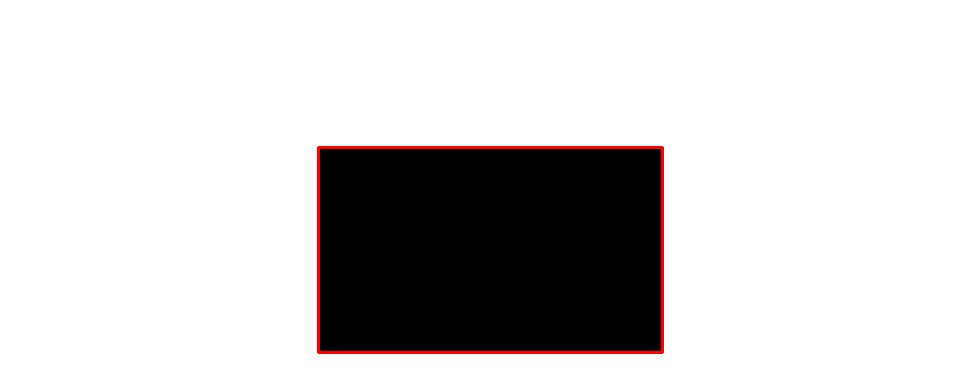

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rect

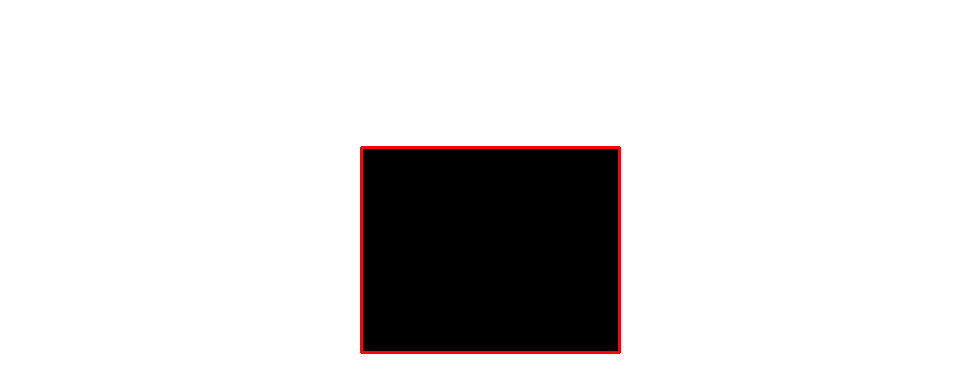

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


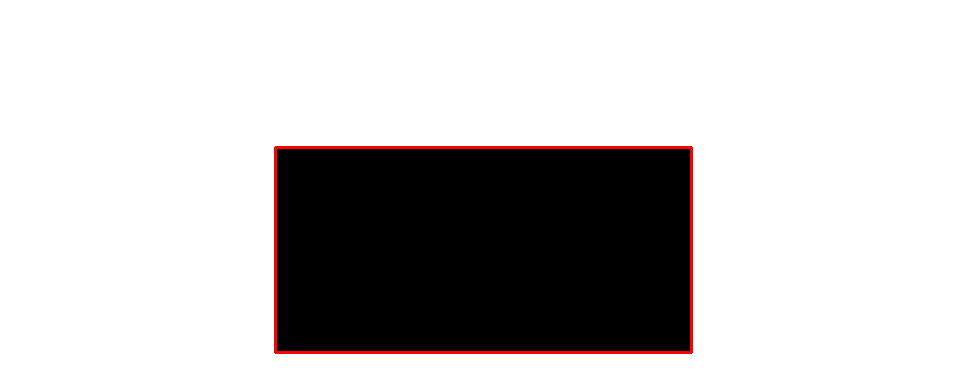

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


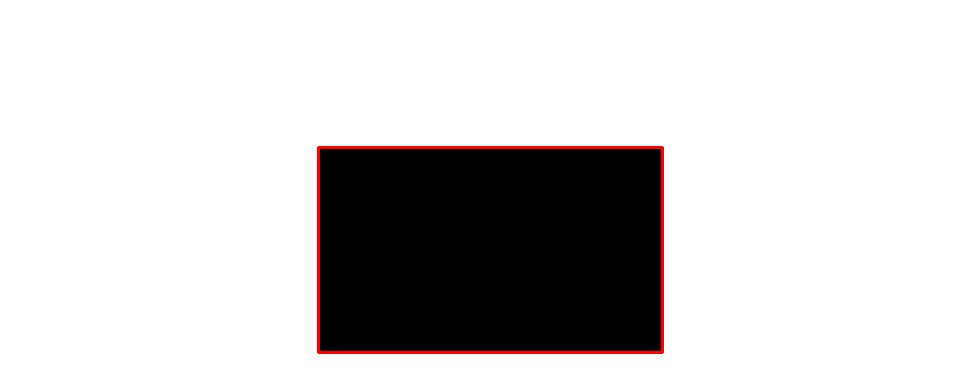

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


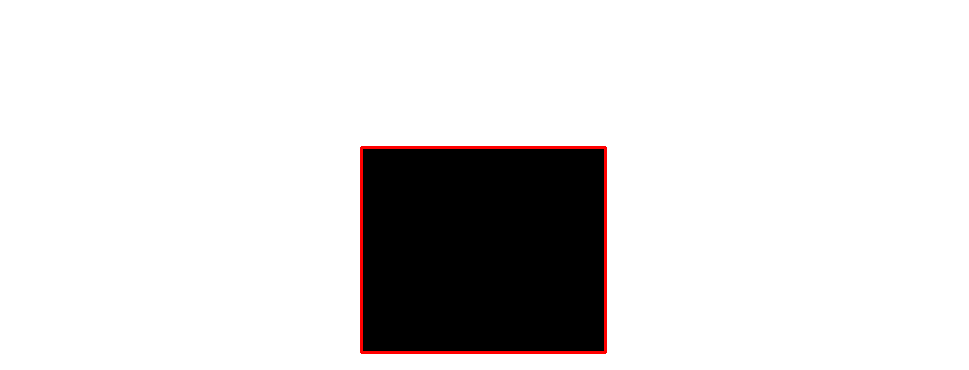

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


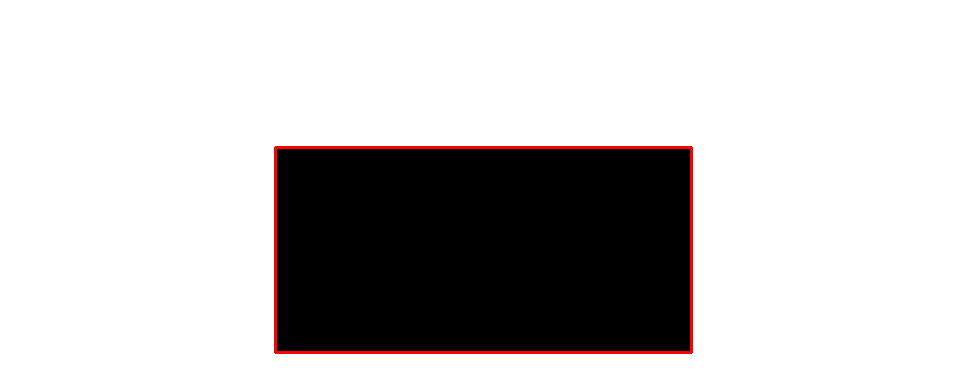

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


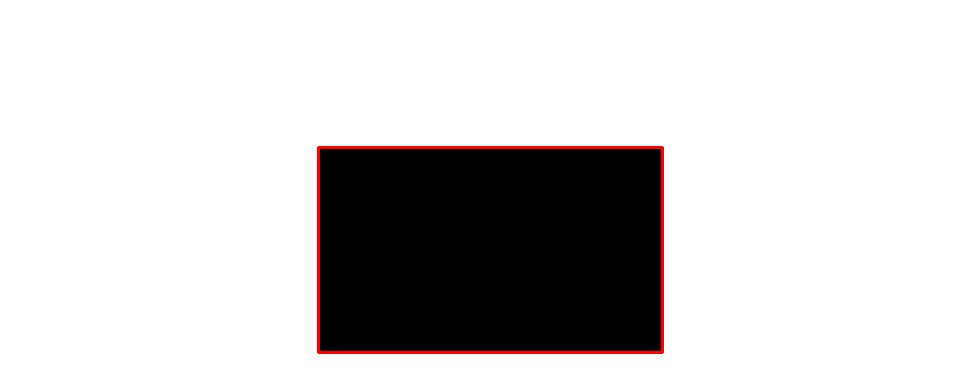

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


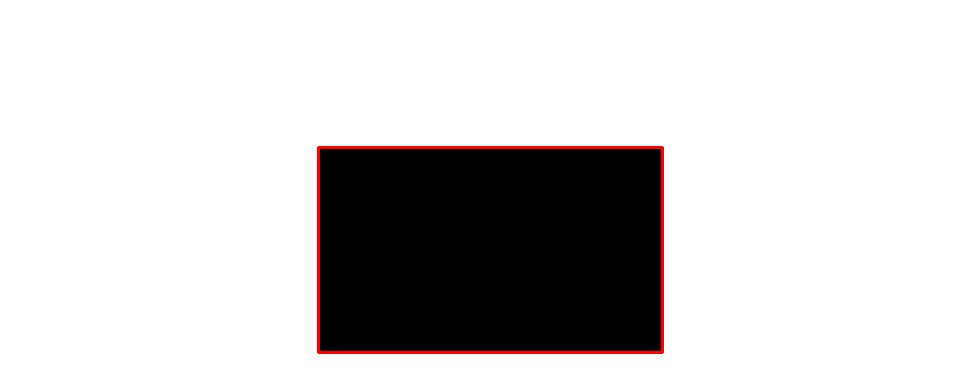

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


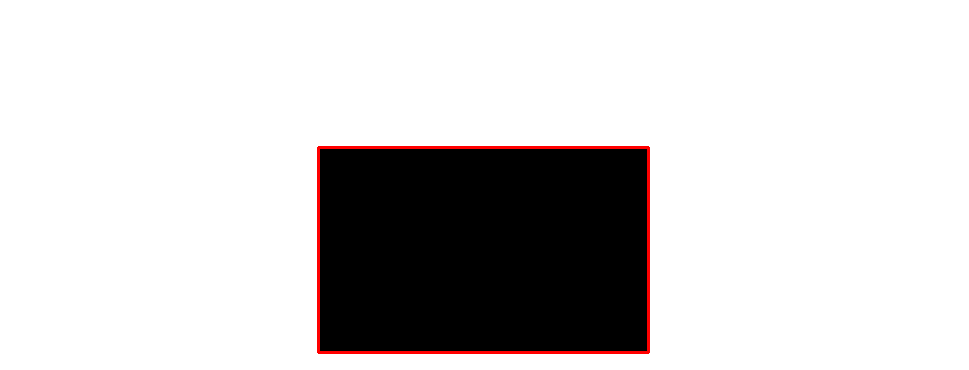

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


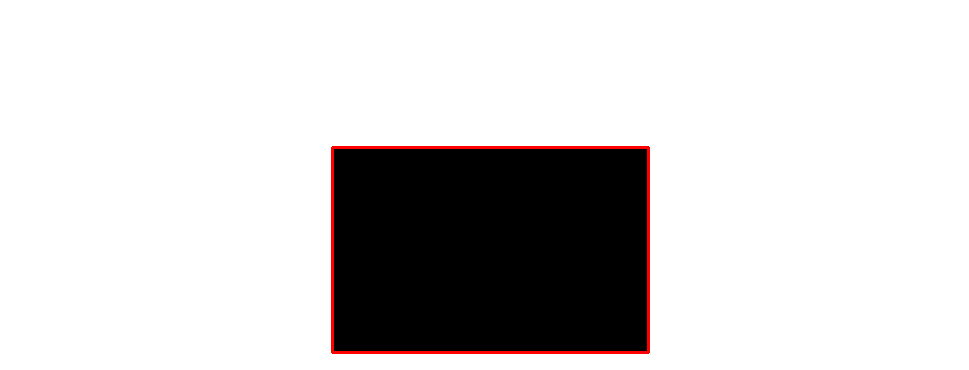

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


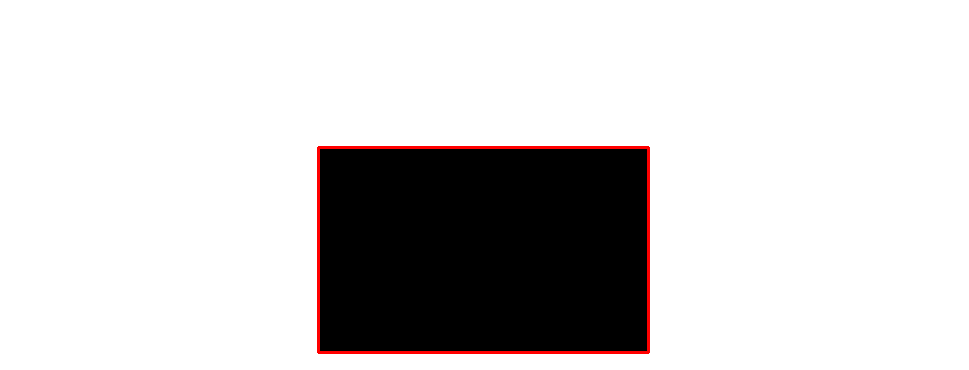

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


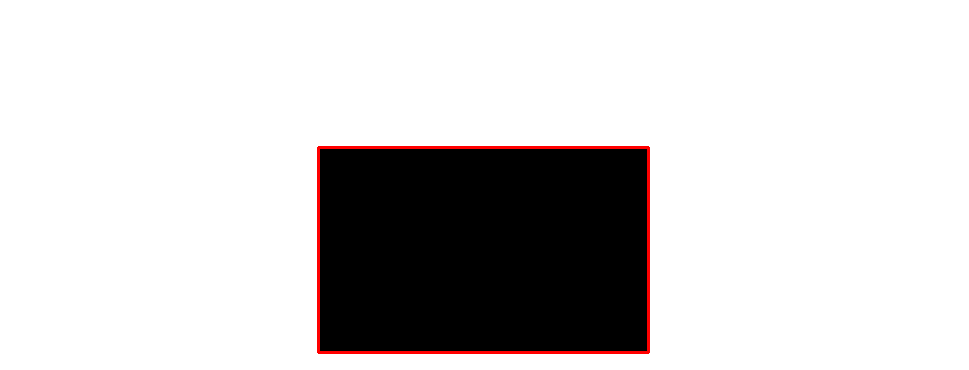

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


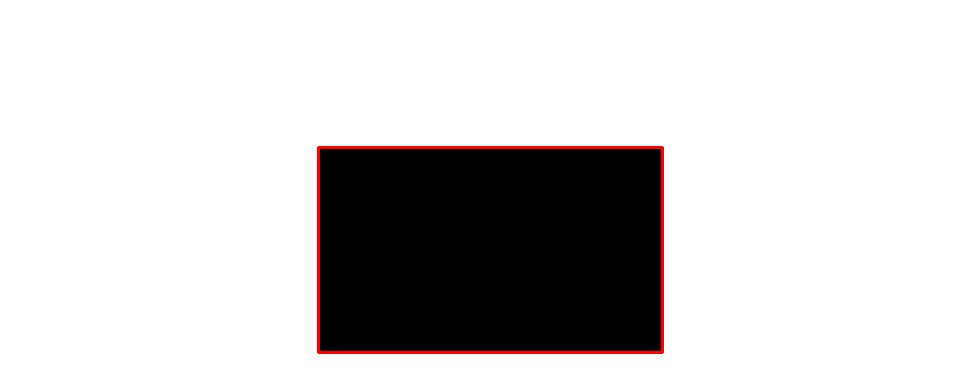

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


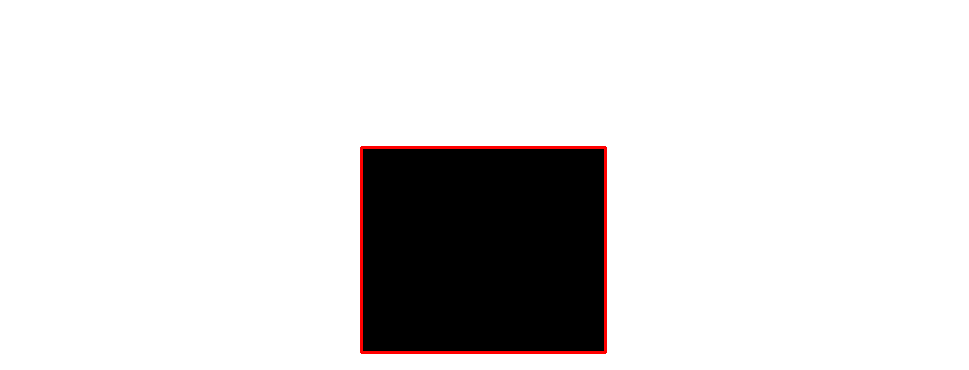

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


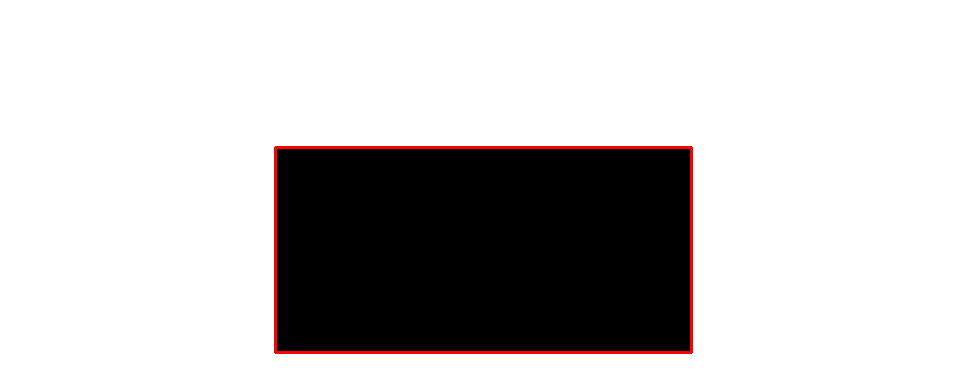

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


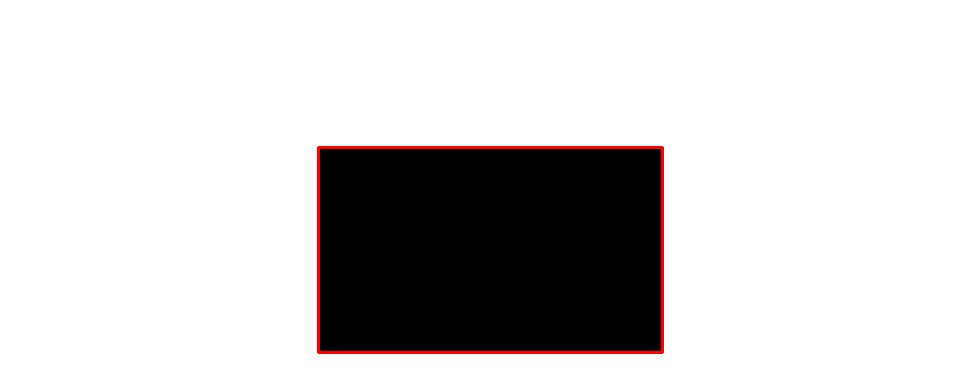

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


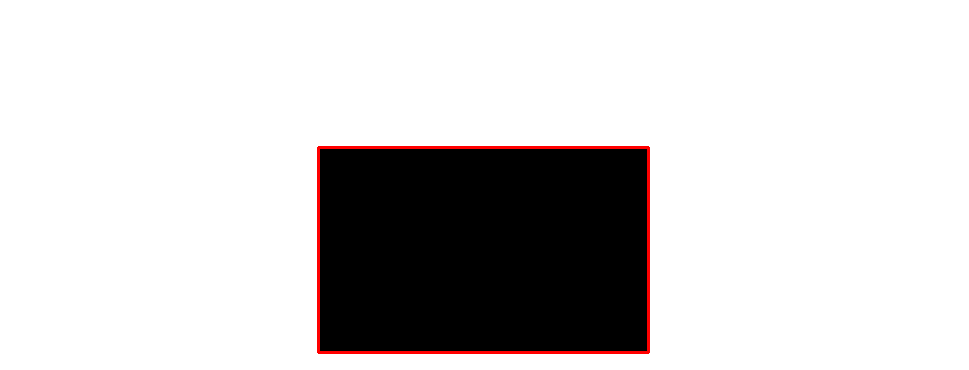

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


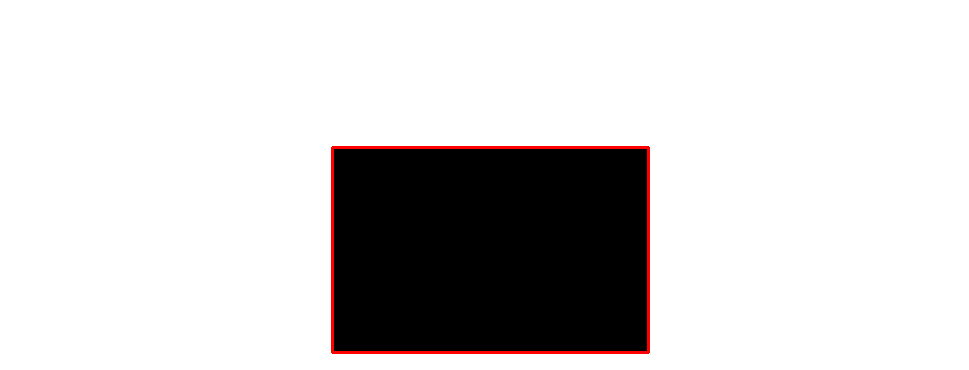

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


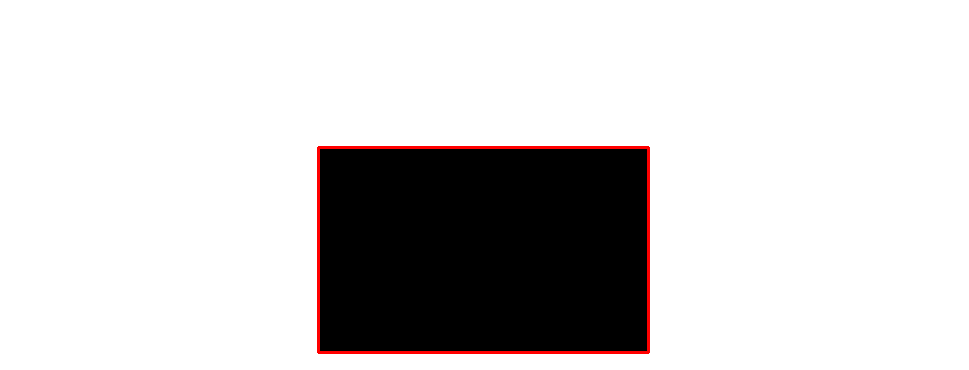

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


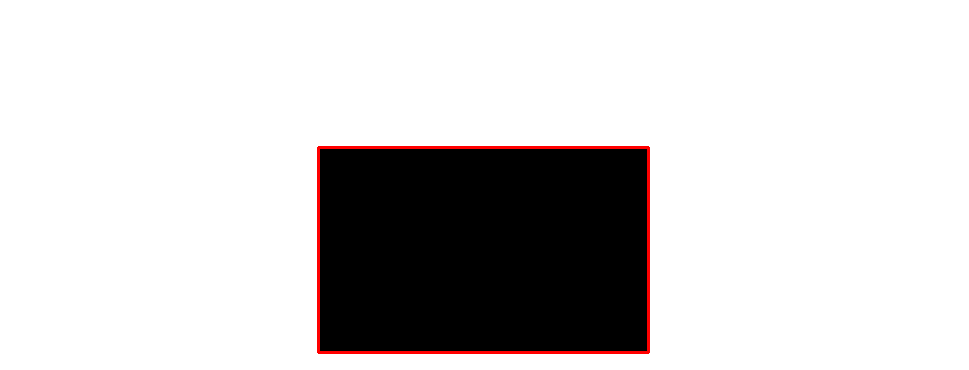

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


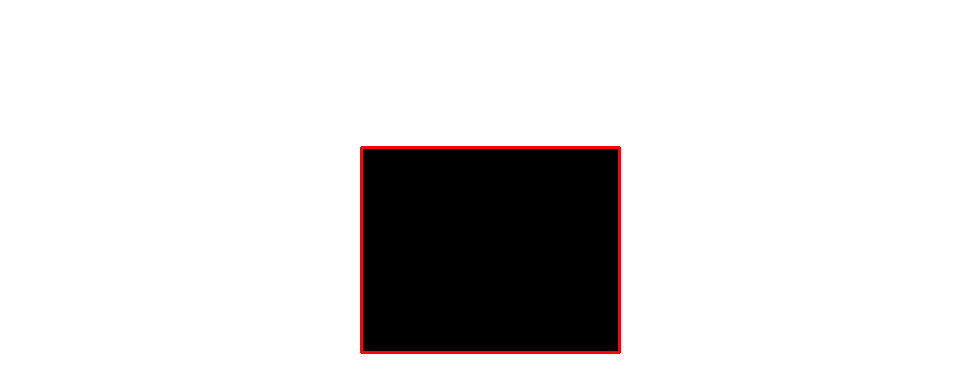

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


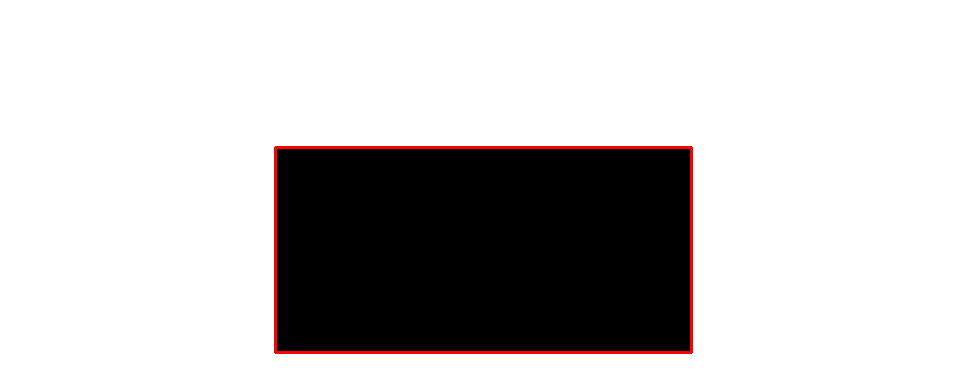

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


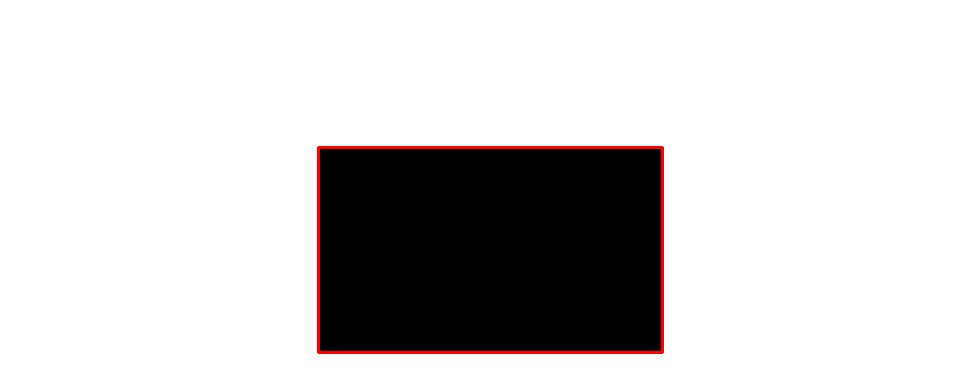

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


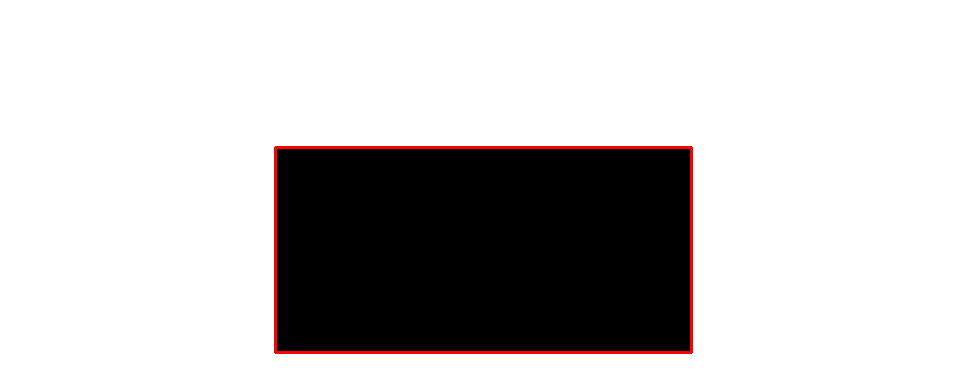

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


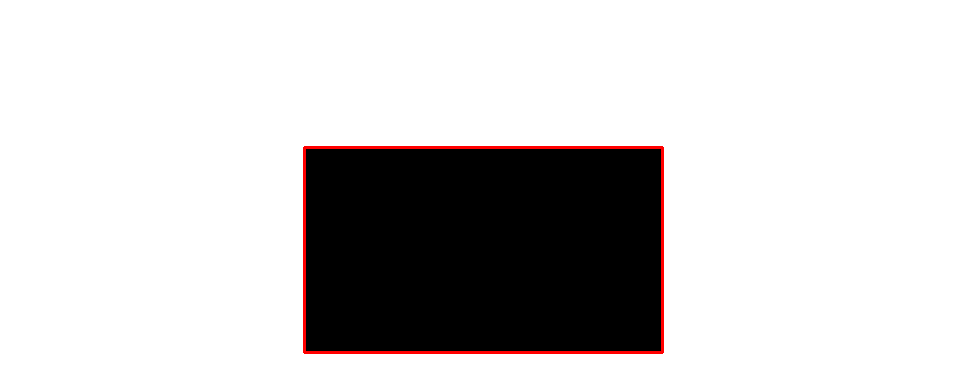

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


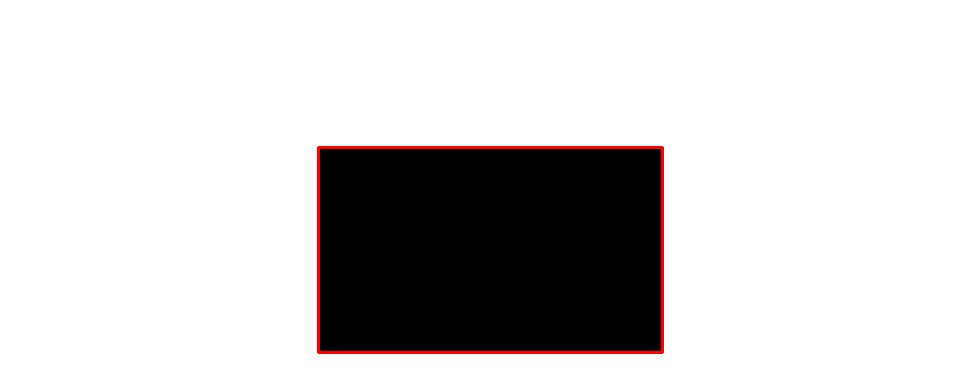

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


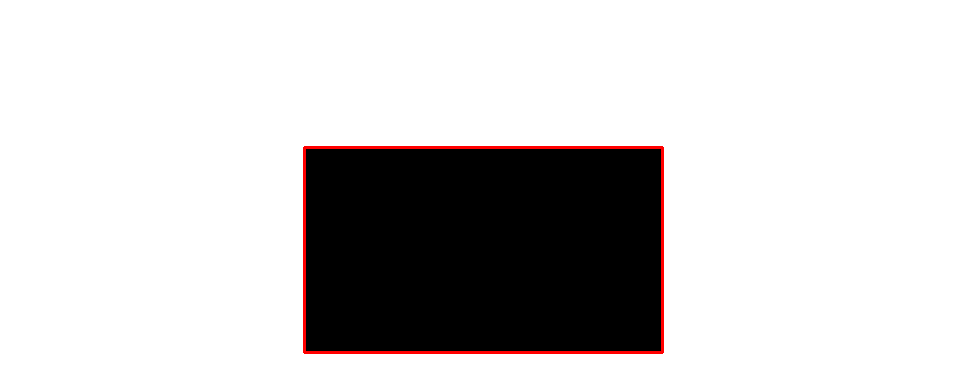

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 418 147 562 352
Rectangle coordinates: 418 147 562 352


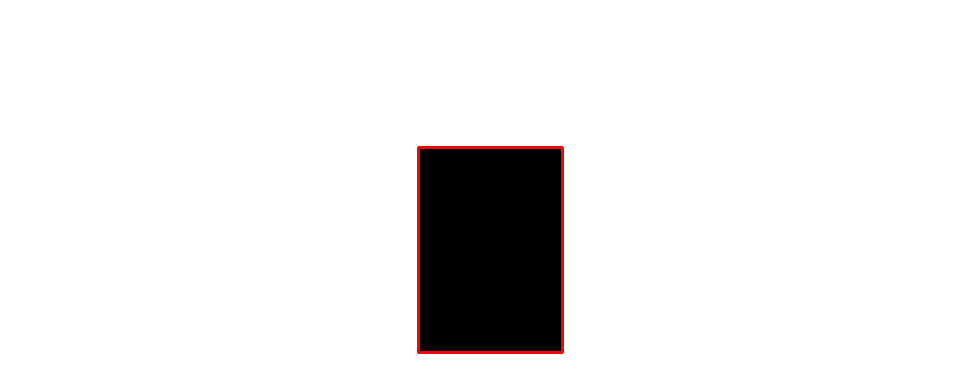

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


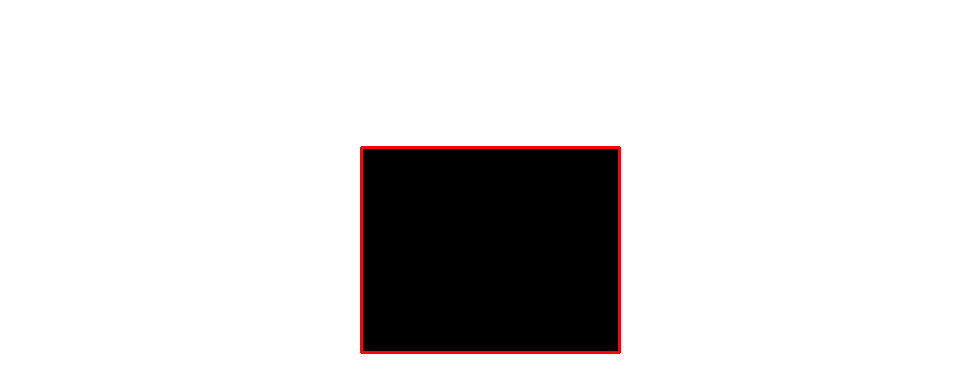

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


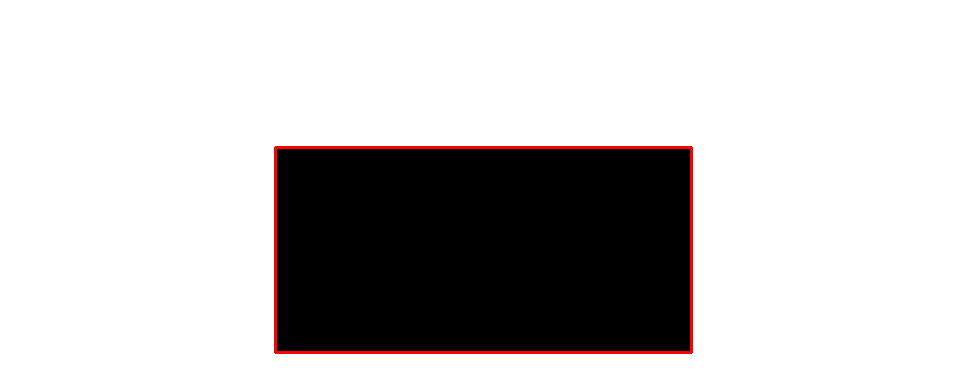

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


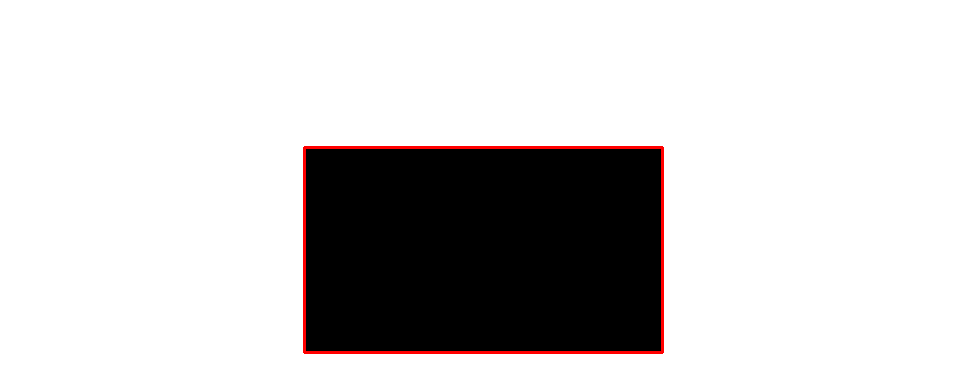

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


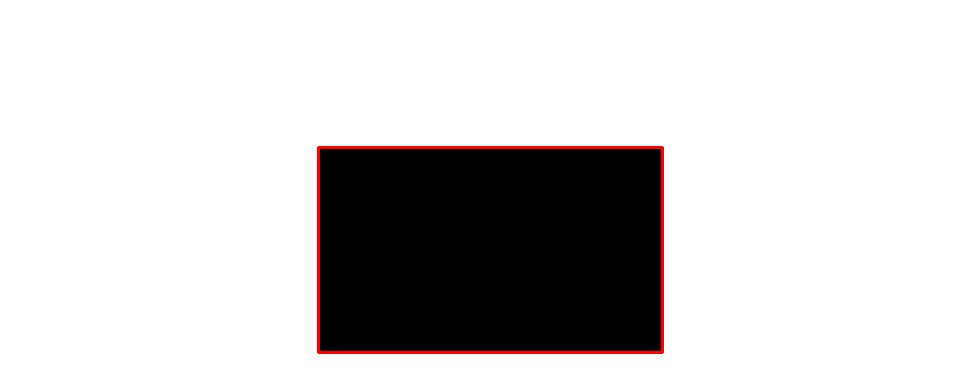

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 418 147 562 352
Rectangle coordinates: 418 147 562 352


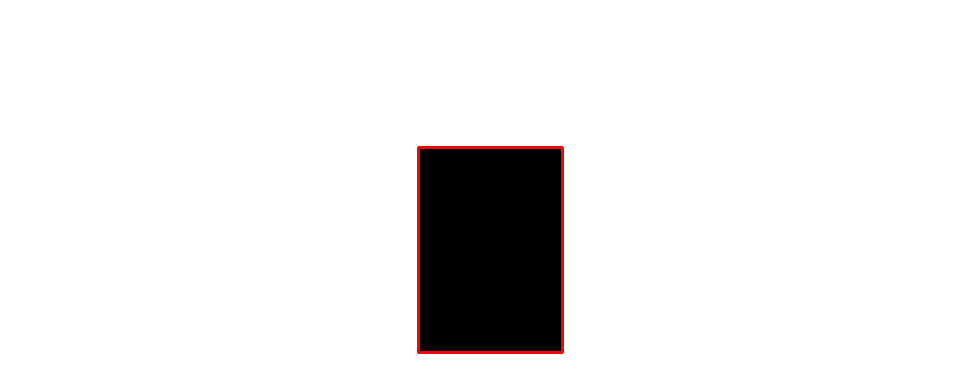

Rectangle coordinates: 361 147 619 352
Rectangle coordinates: 361 147 619 352


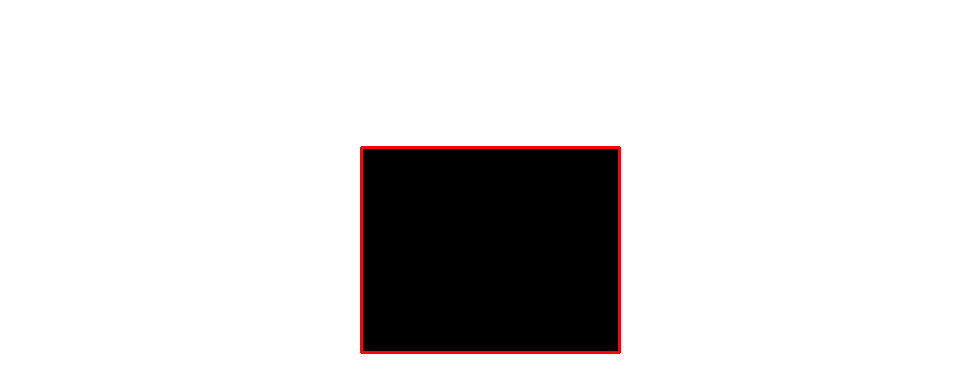

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


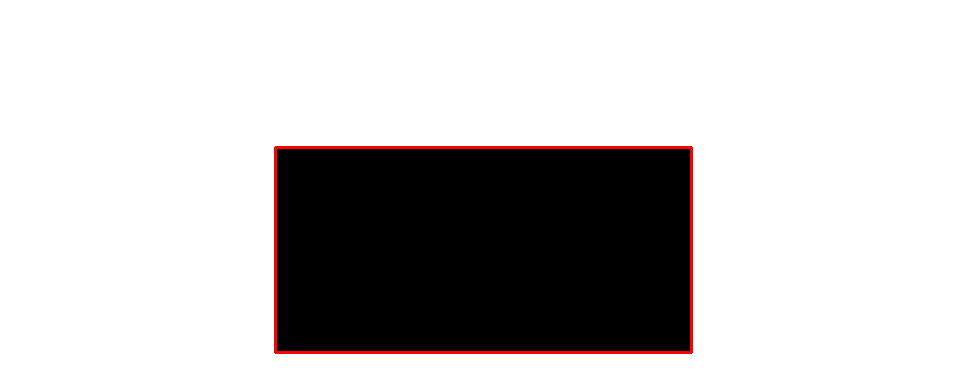

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


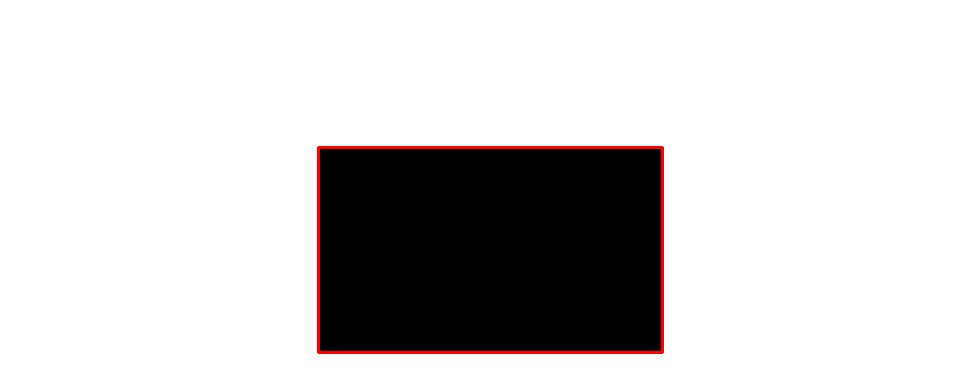

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


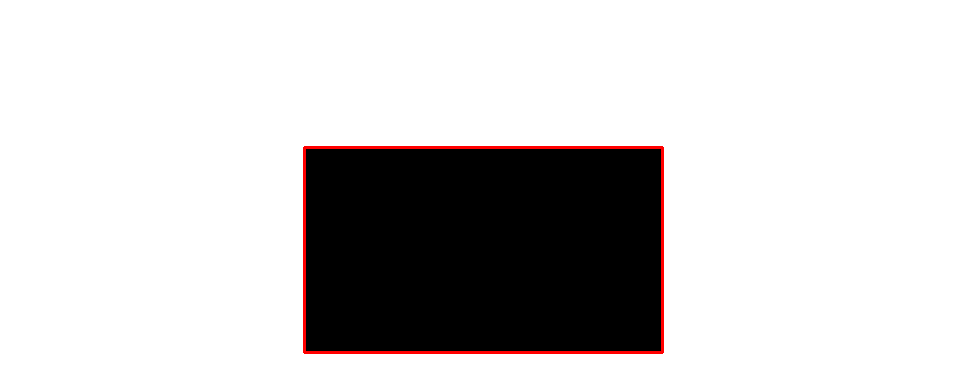

Rectangle coordinates: 289 147 676 352
Rectangle coordinates: 289 147 676 352


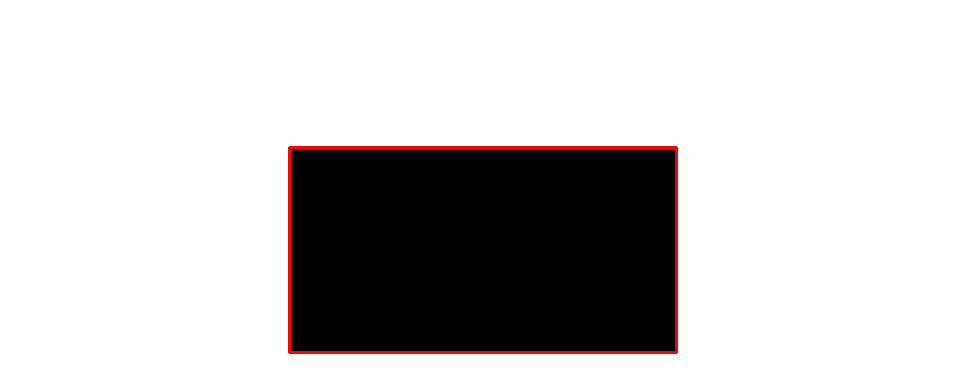

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


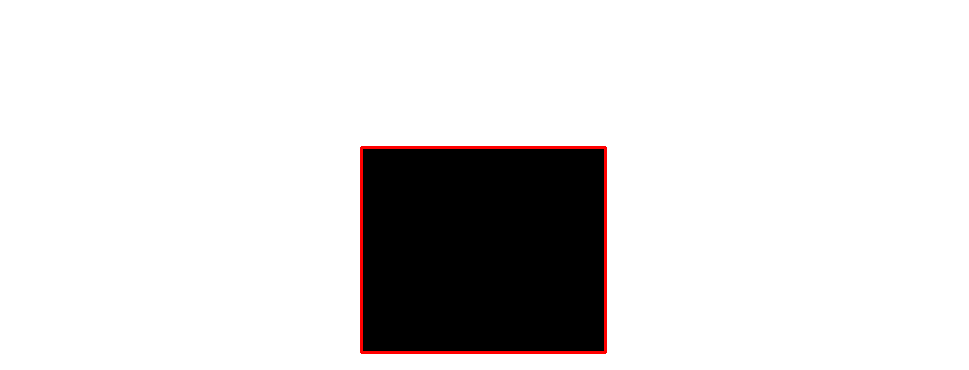

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


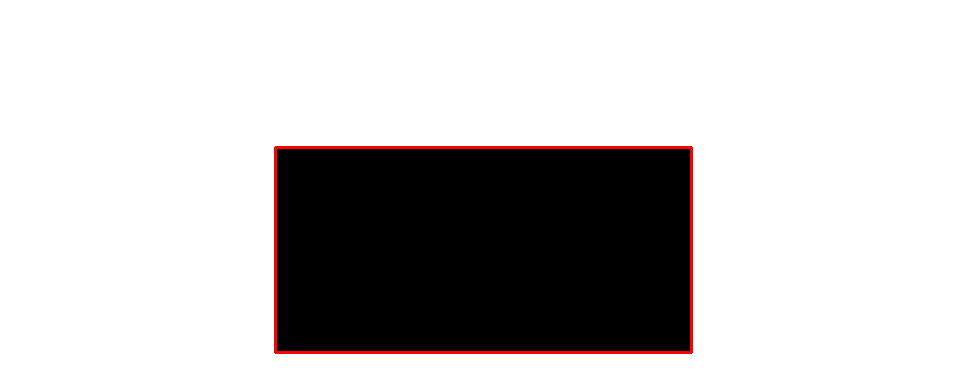

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


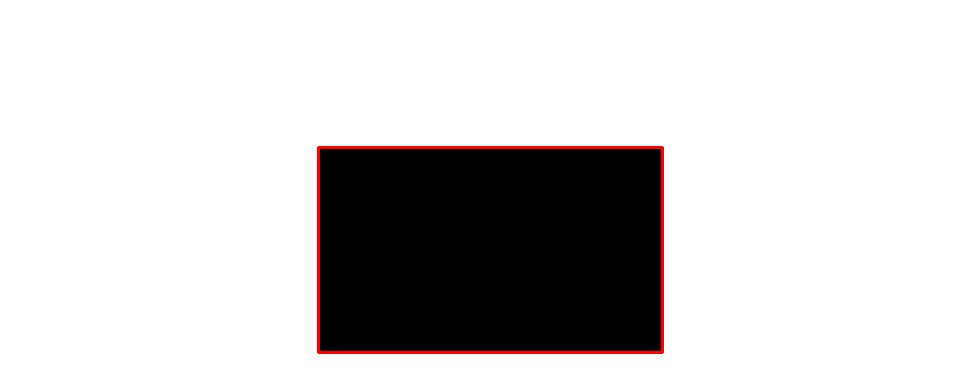

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


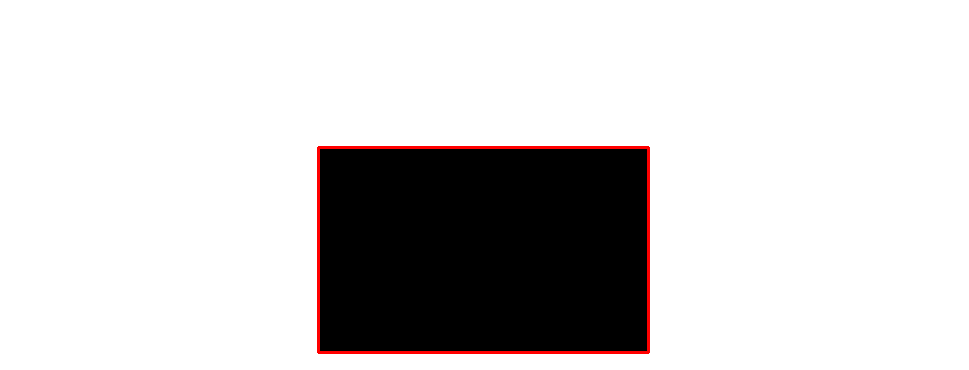

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


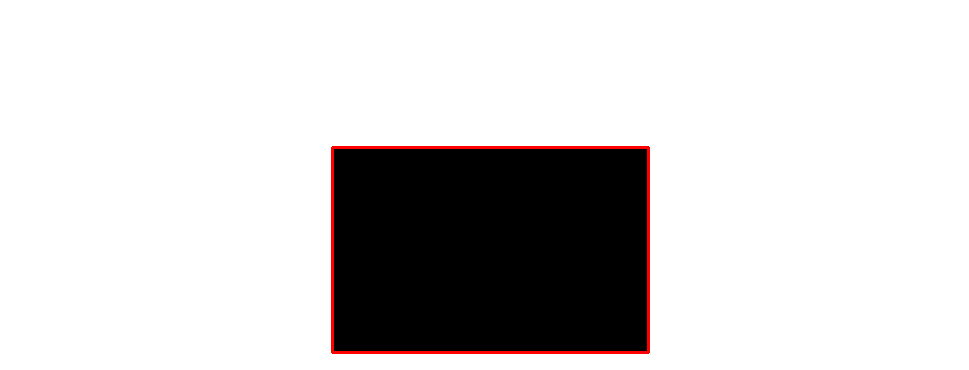

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


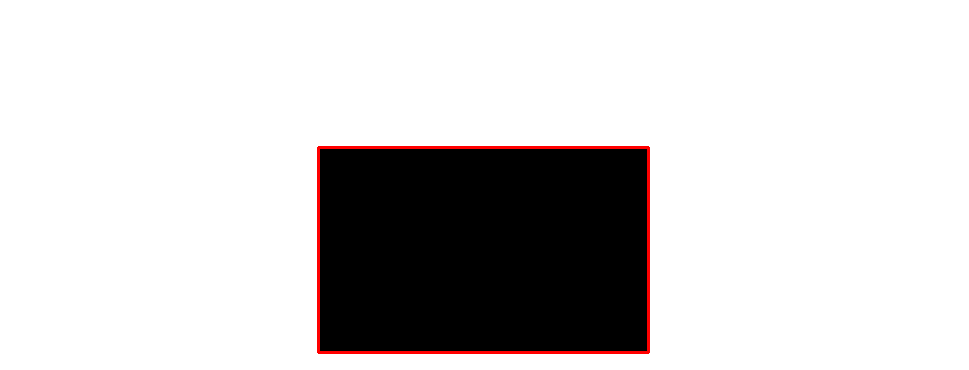

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


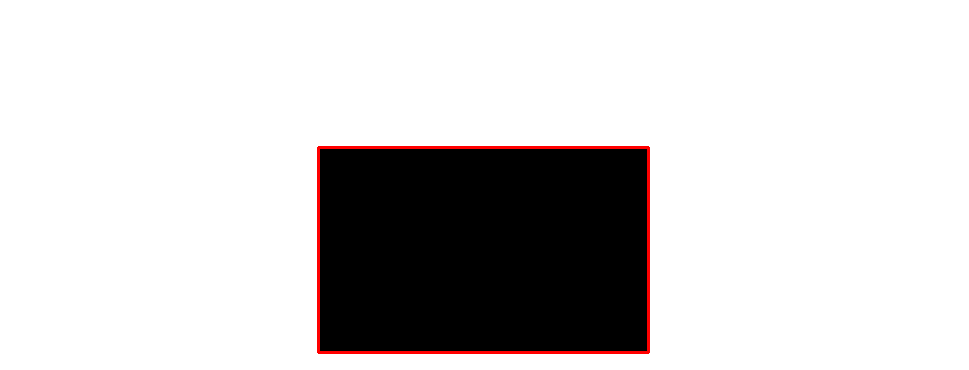

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


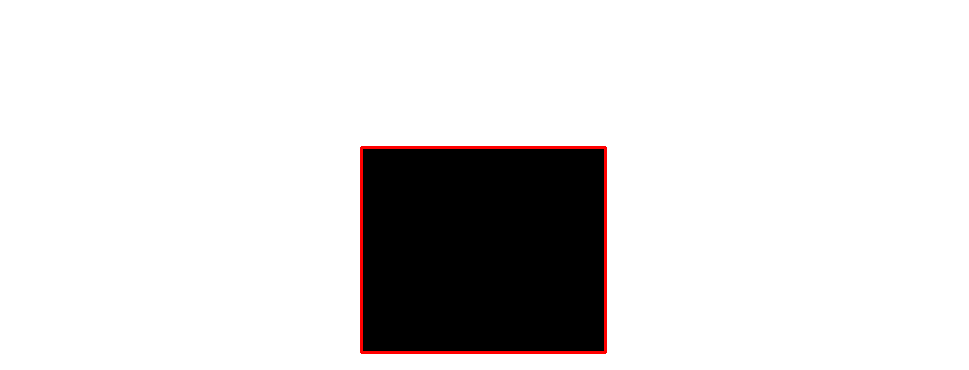

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


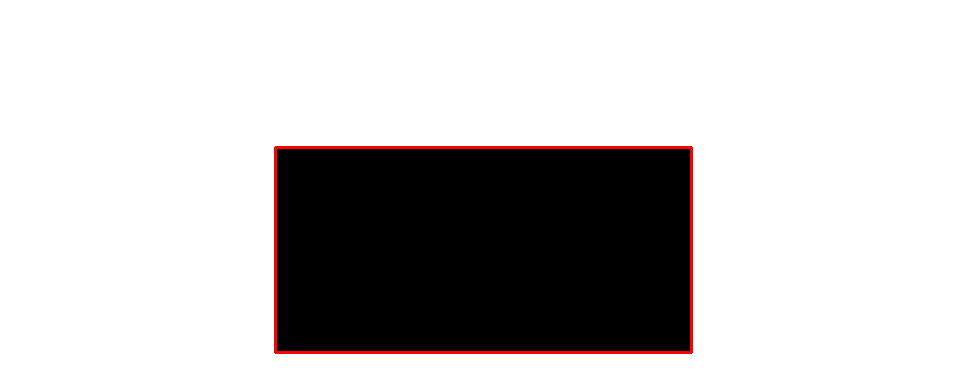

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


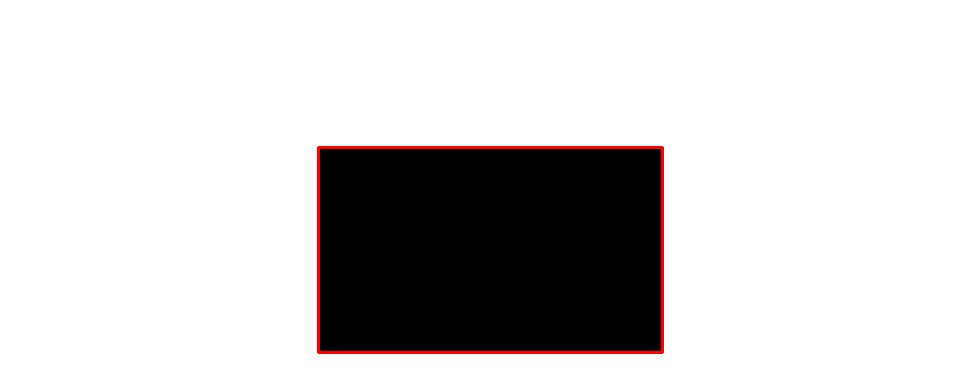

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


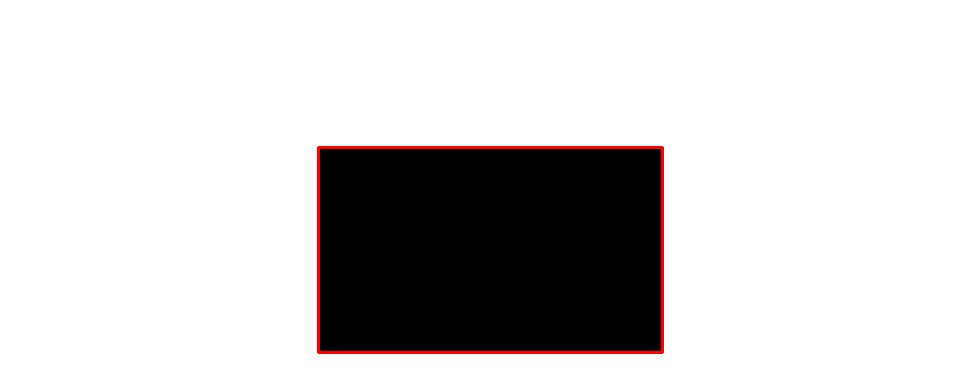

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


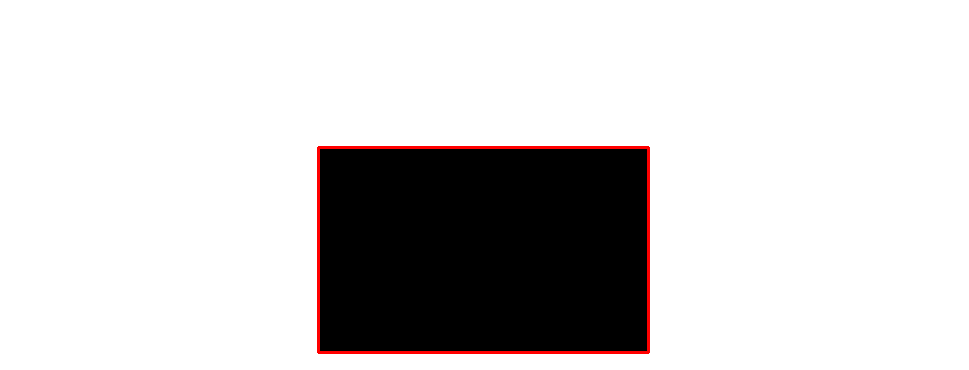

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


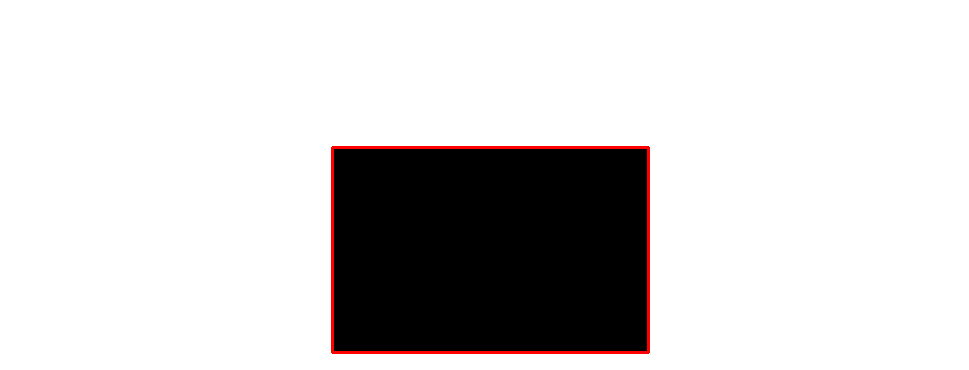

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


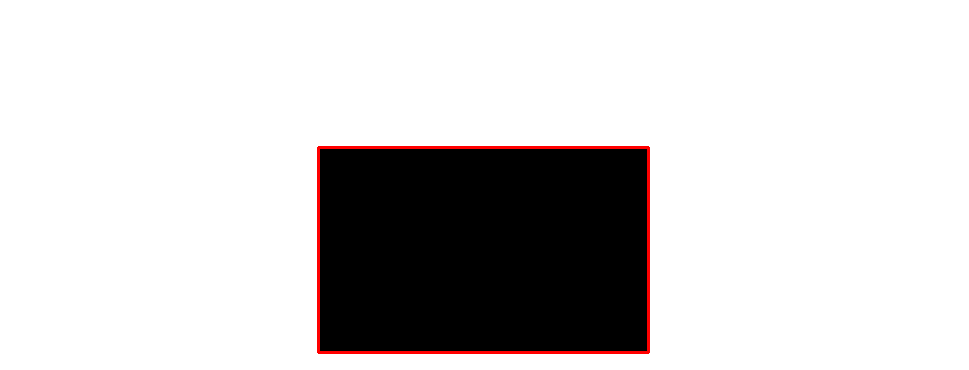

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


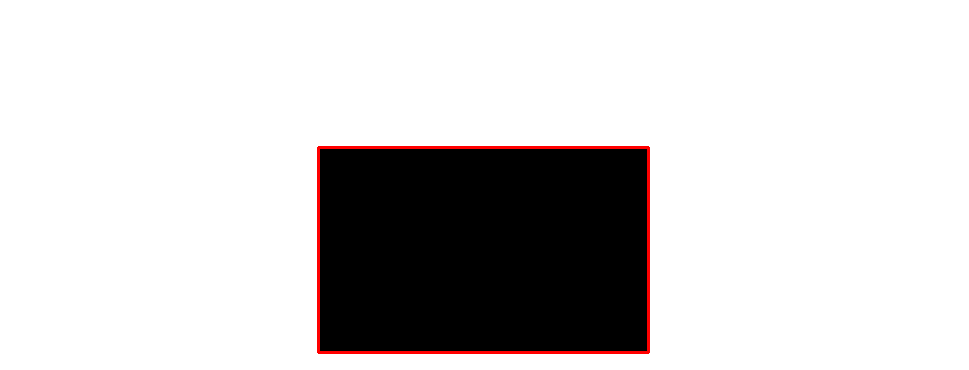

Rectangle coordinates: 418 147 548 352
Rectangle coordinates: 418 147 548 352


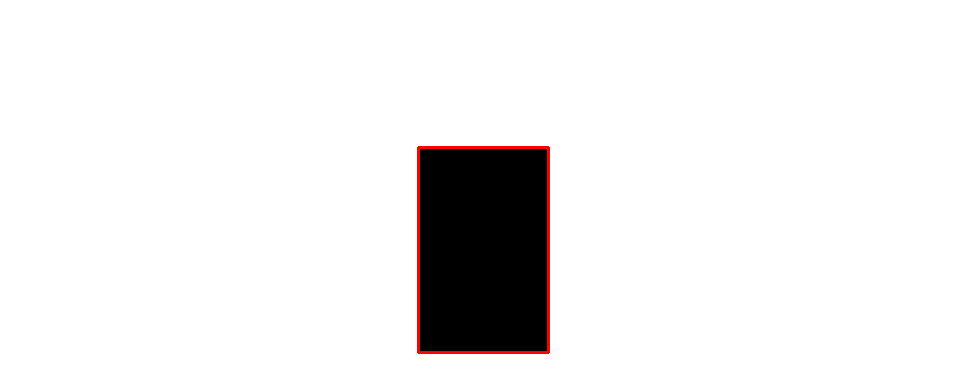

Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


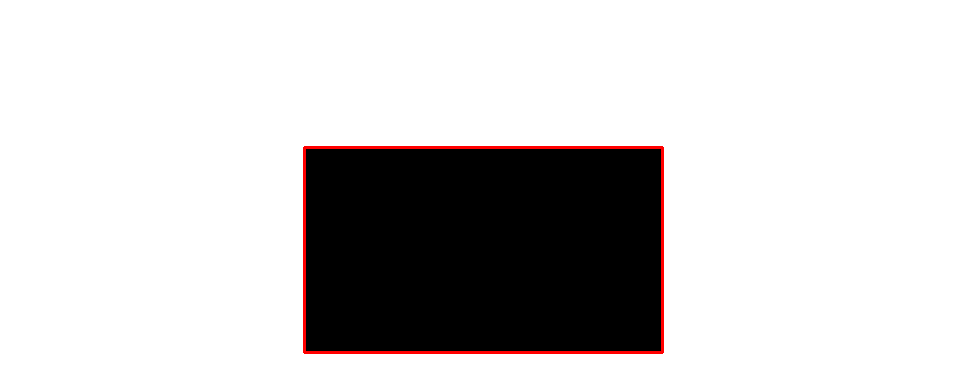

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


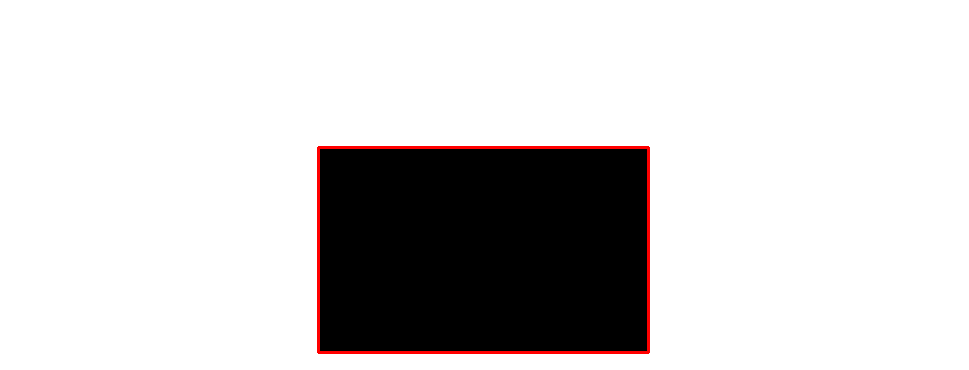

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


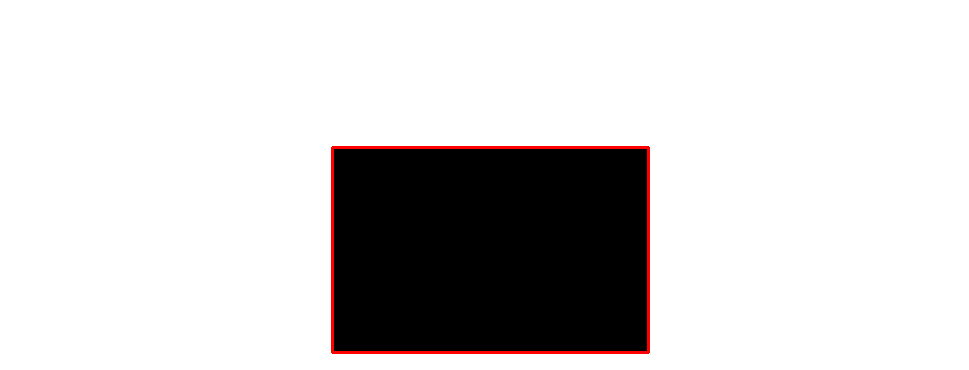

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


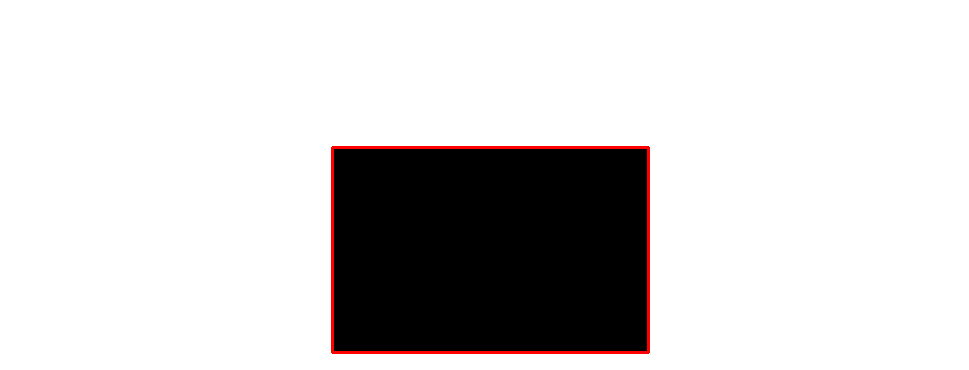

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


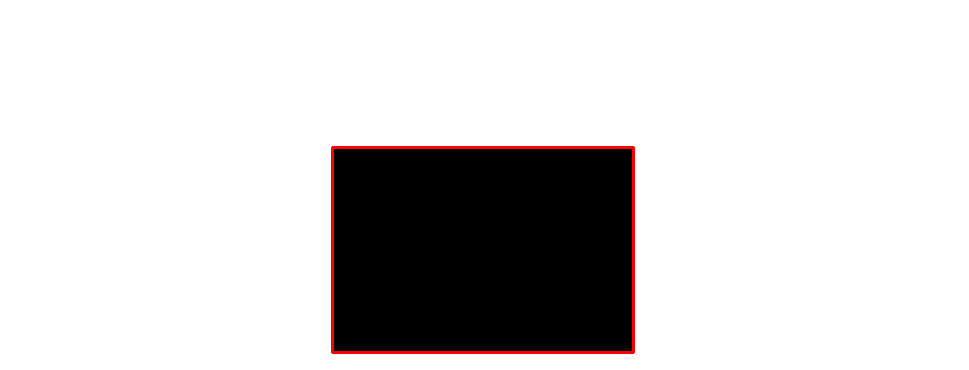

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


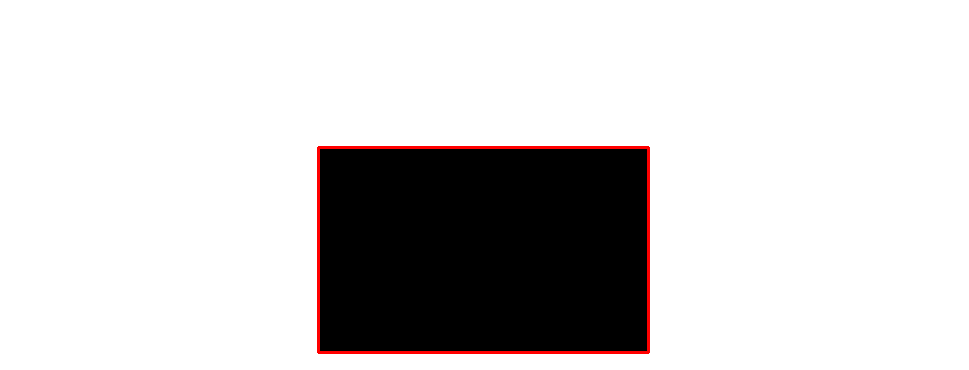

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


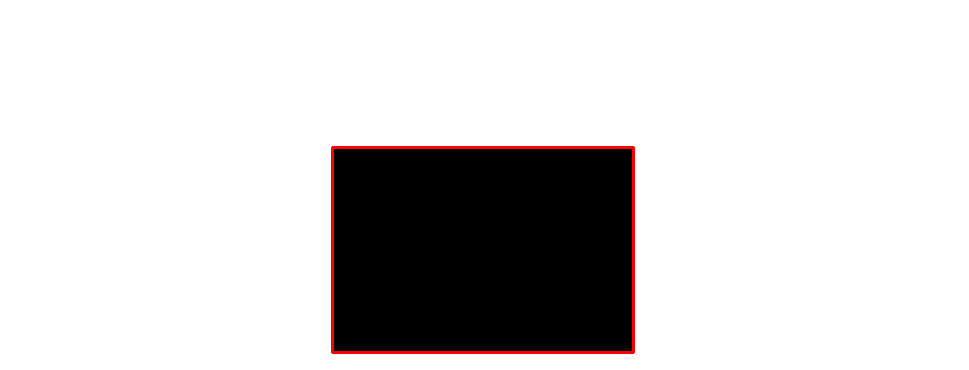

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


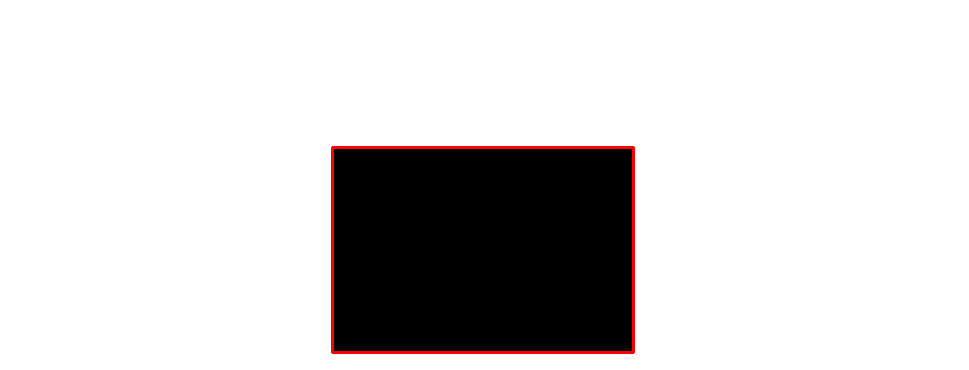

Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


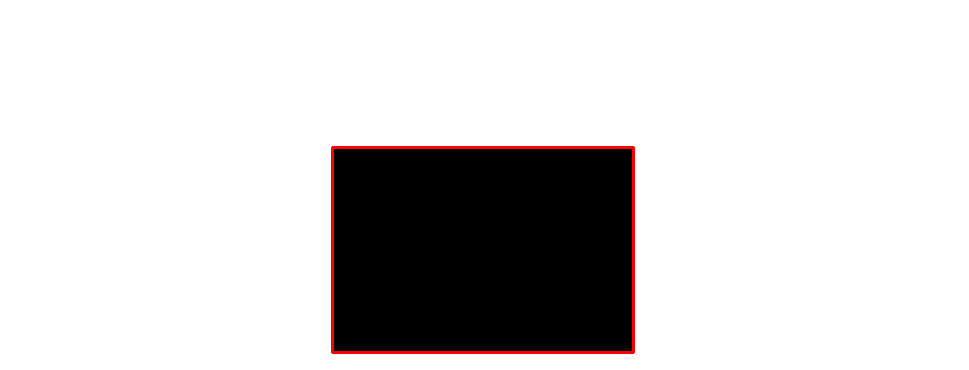

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


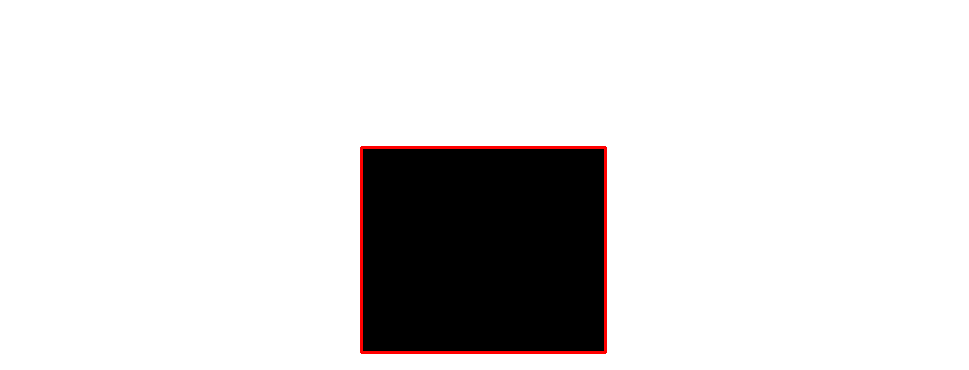

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


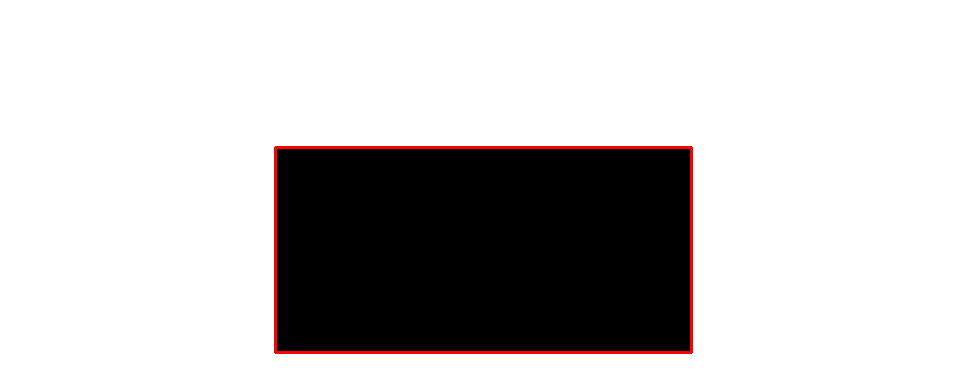

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


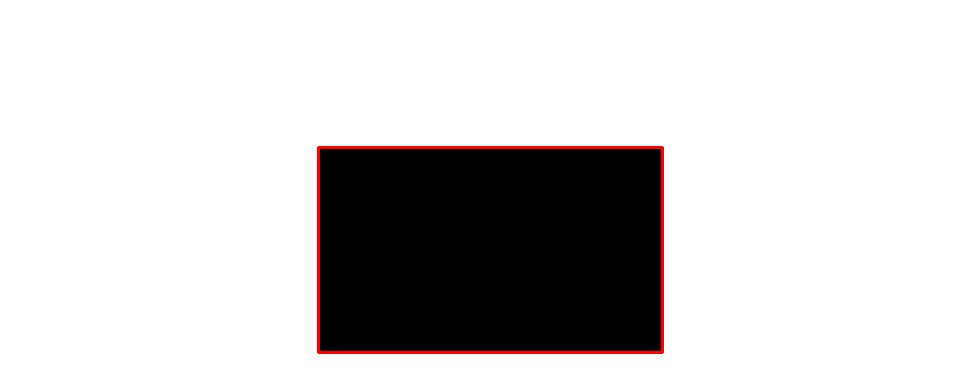

No contours found, skipping drawing rectangles.
Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


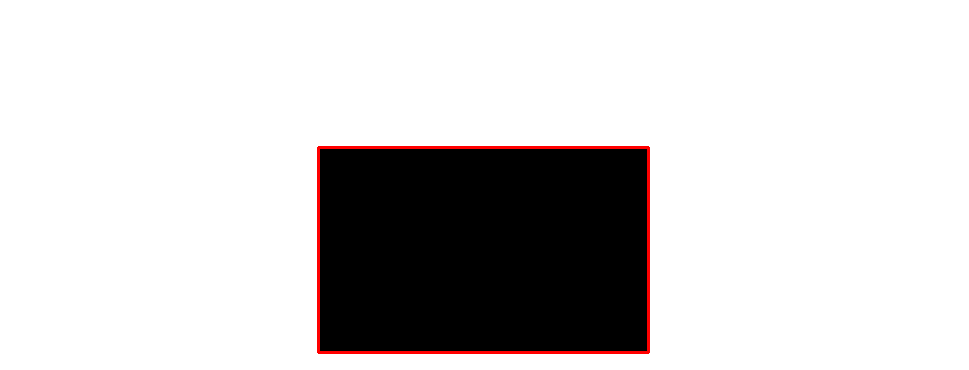

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


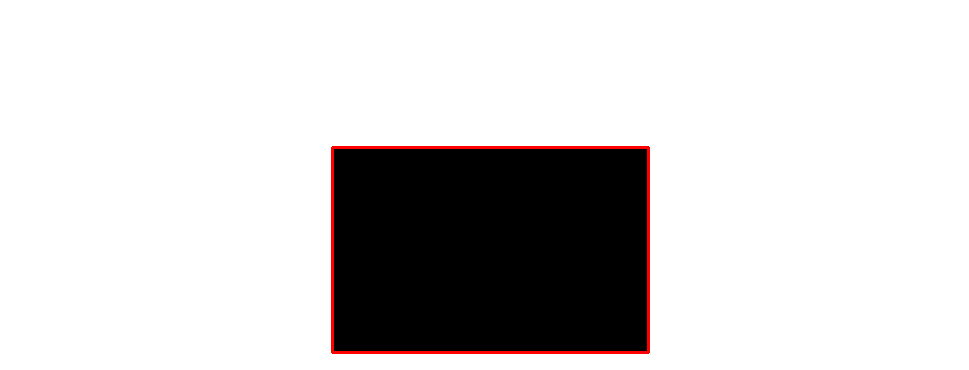

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


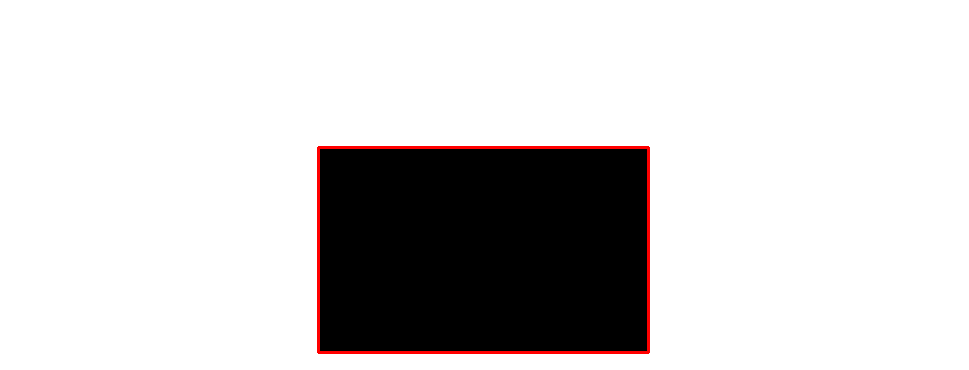

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


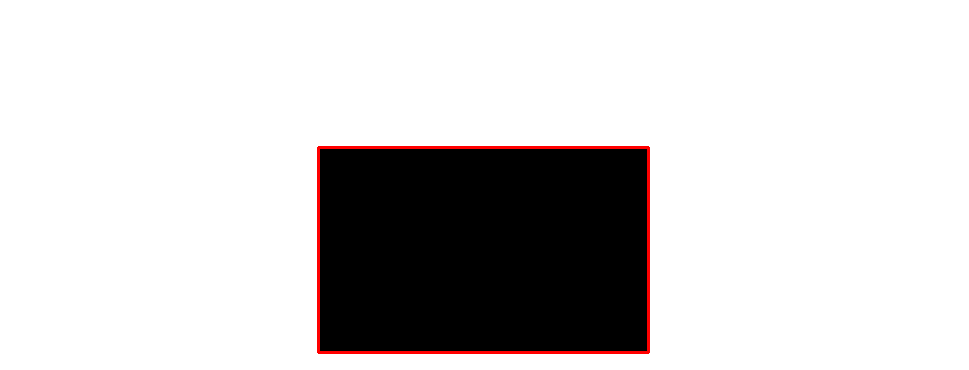

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


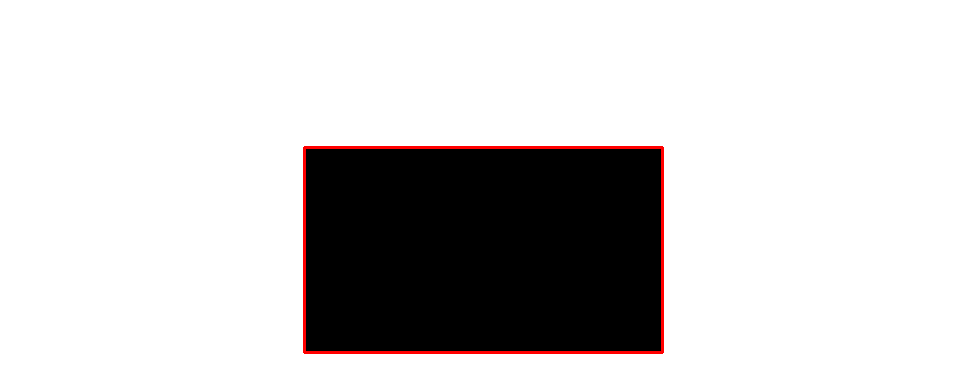

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


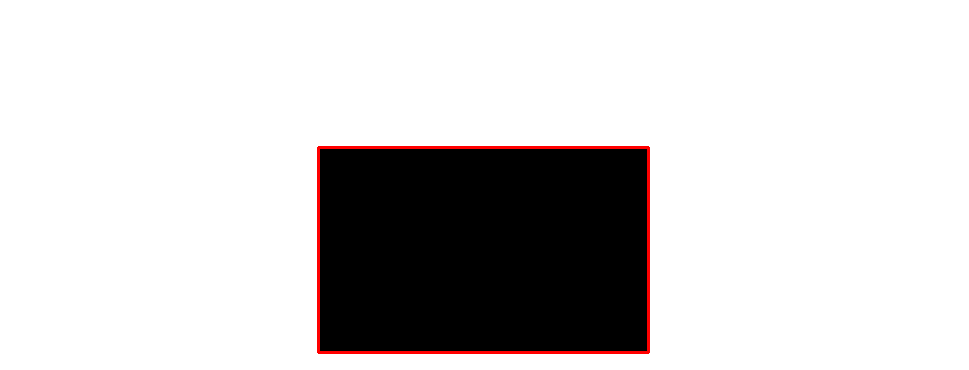

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
Rectangle coordinates: 332 147 633 352
Rectangle coordinates: 332 147 633 352


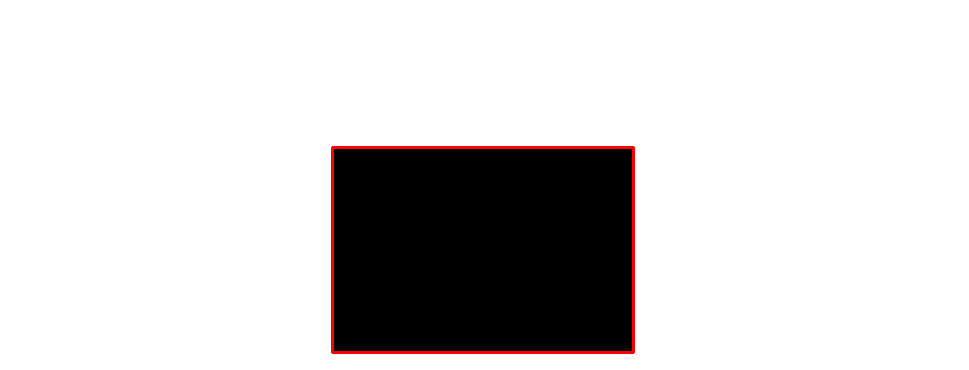

No contours found, skipping drawing rectangles.
Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


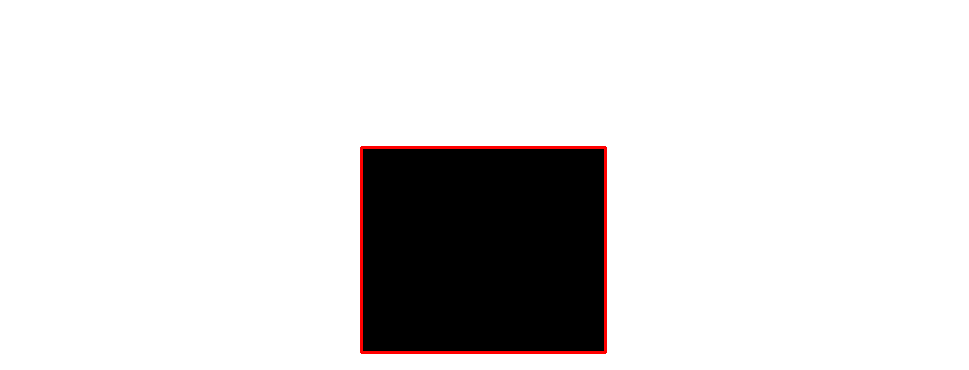

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


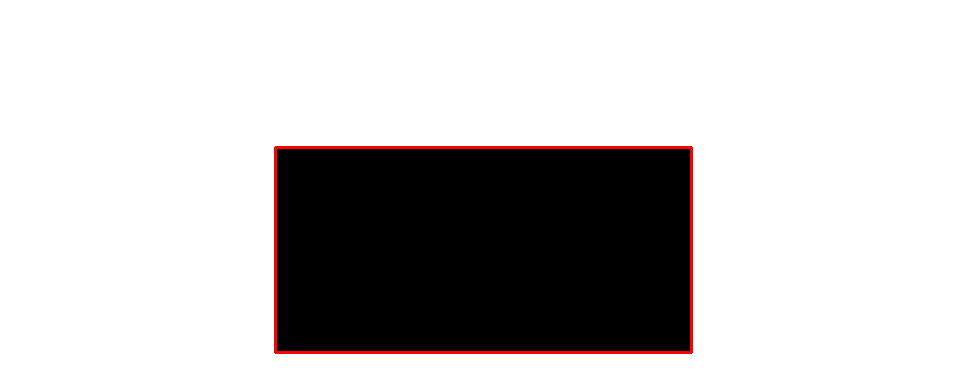

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


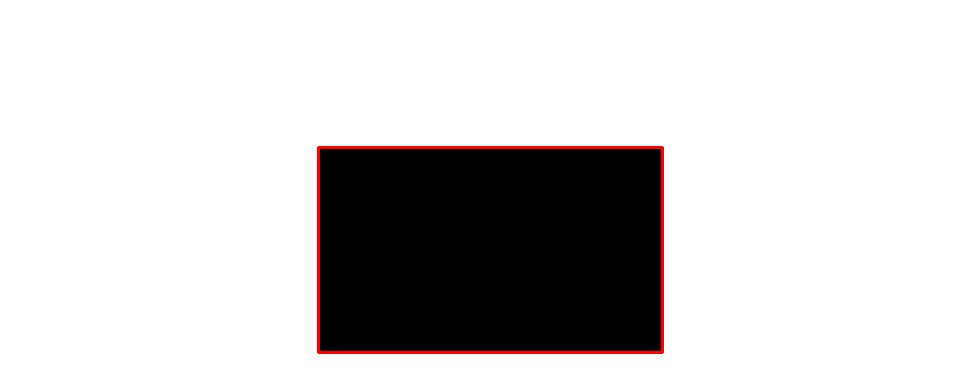

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


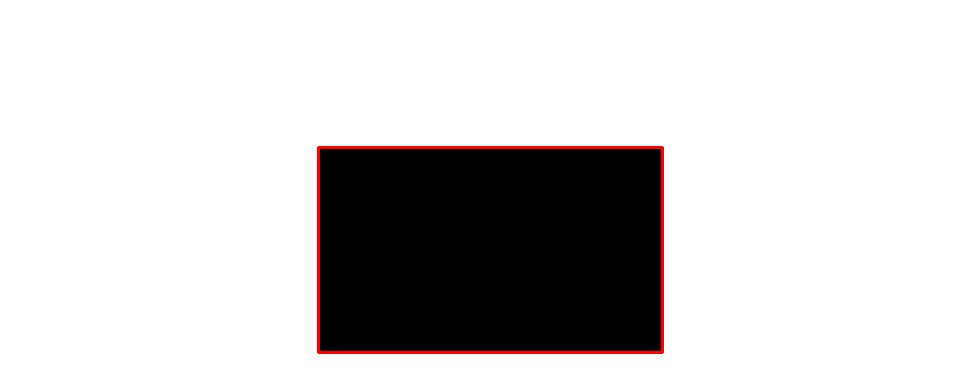

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


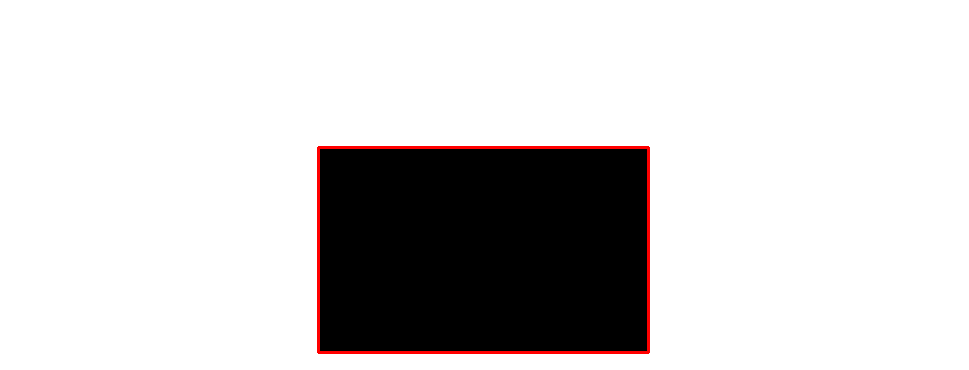

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


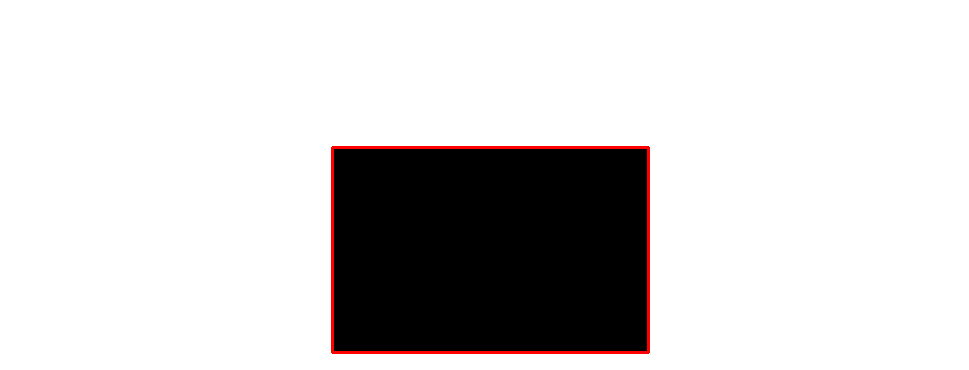

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


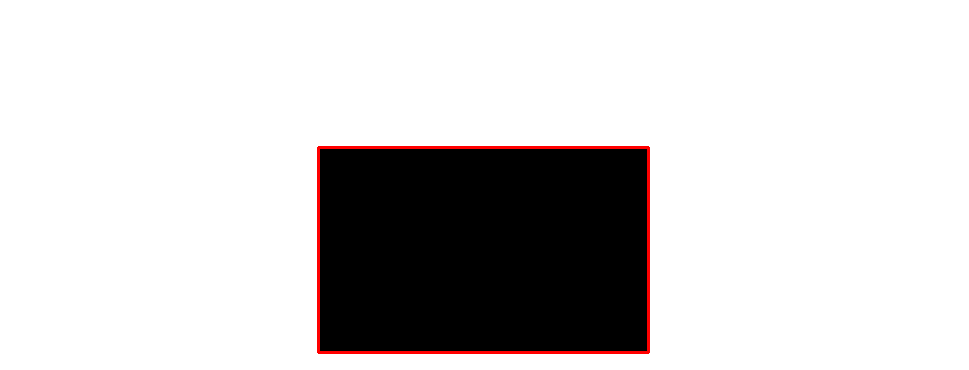

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


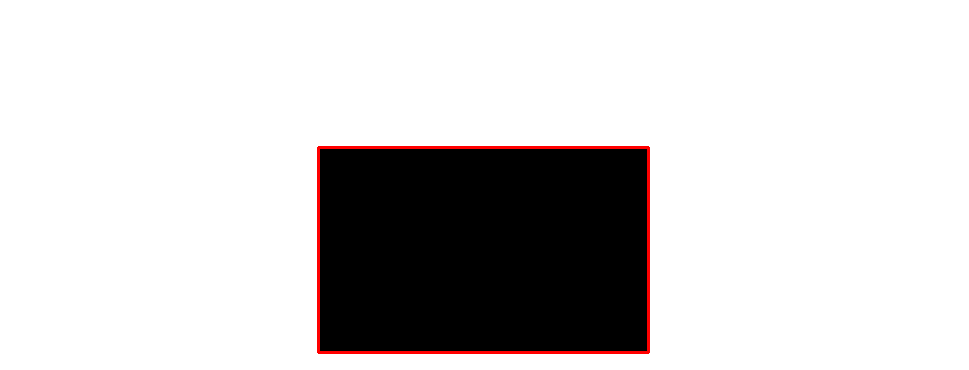

Rectangle coordinates: 418 147 548 352
Rectangle coordinates: 418 147 548 352


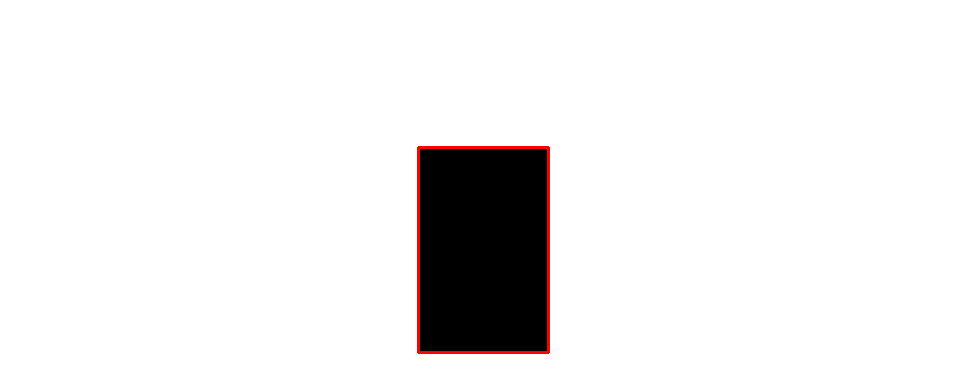

Rectangle coordinates: 361 147 605 352
Rectangle coordinates: 361 147 605 352


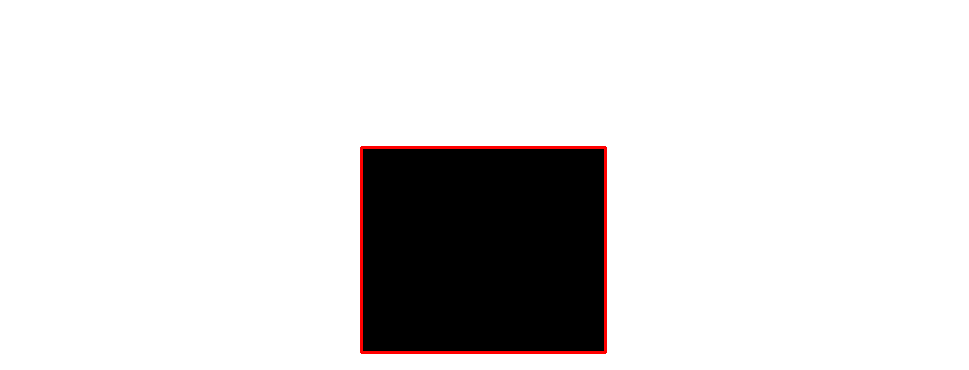

Rectangle coordinates: 275 147 691 352
Rectangle coordinates: 275 147 691 352


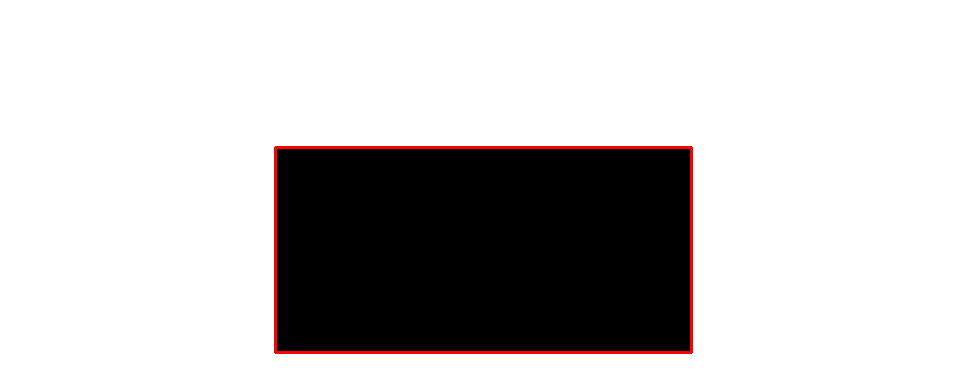

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


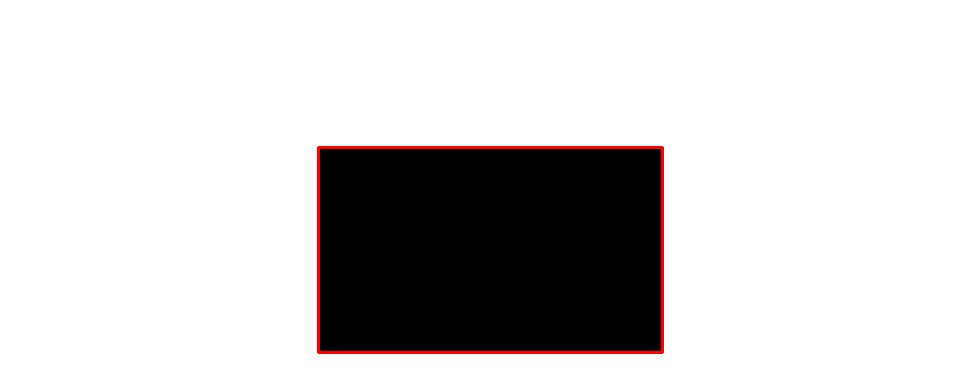

Rectangle coordinates: 318 147 662 352
Rectangle coordinates: 318 147 662 352


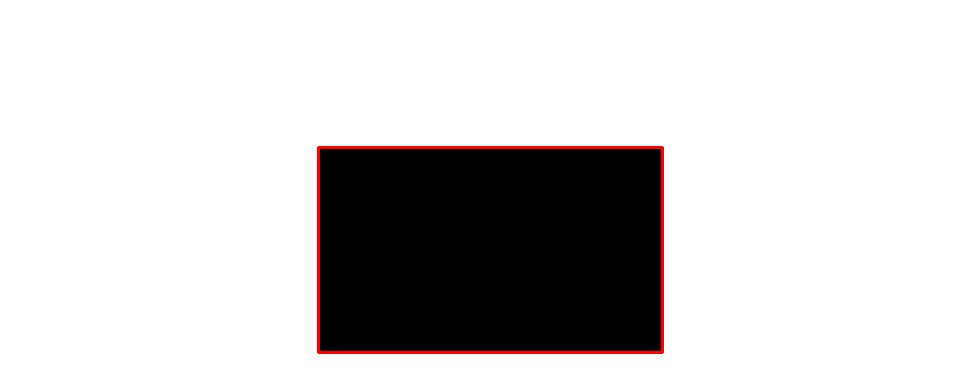

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


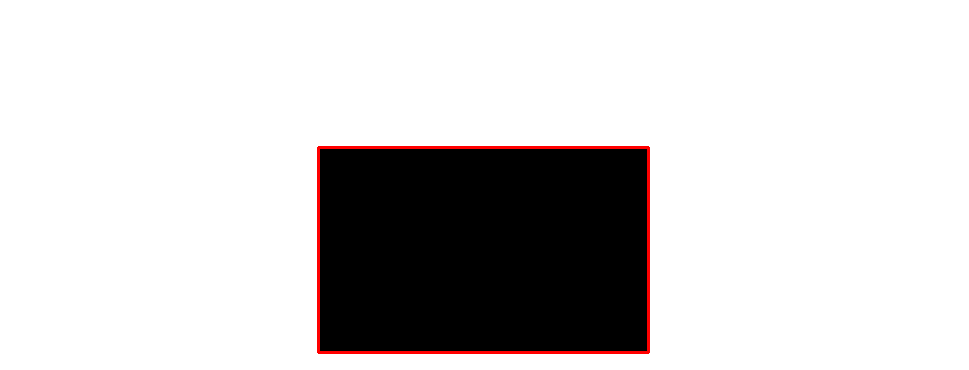

Rectangle coordinates: 332 147 648 352
Rectangle coordinates: 332 147 648 352


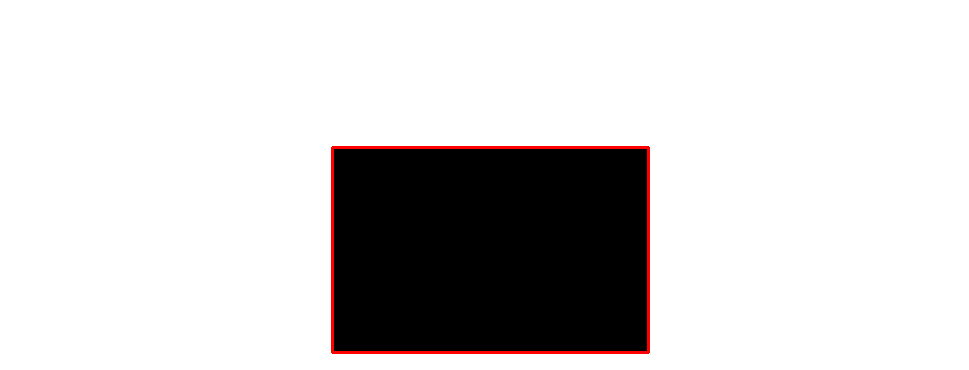

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


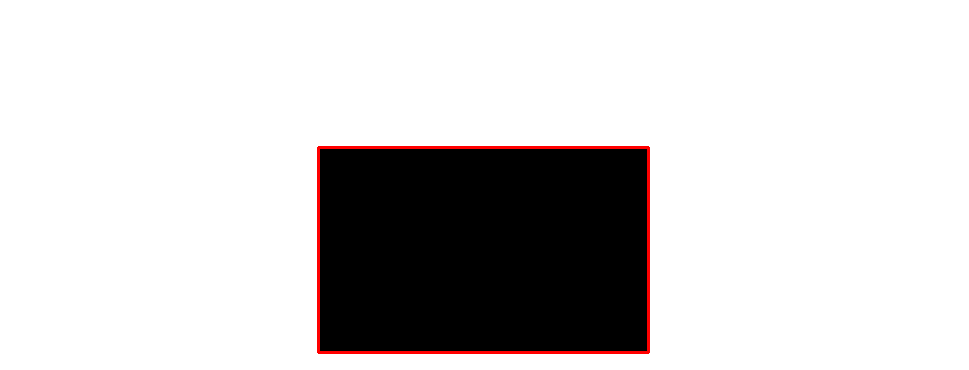

Rectangle coordinates: 318 147 648 352
Rectangle coordinates: 318 147 648 352


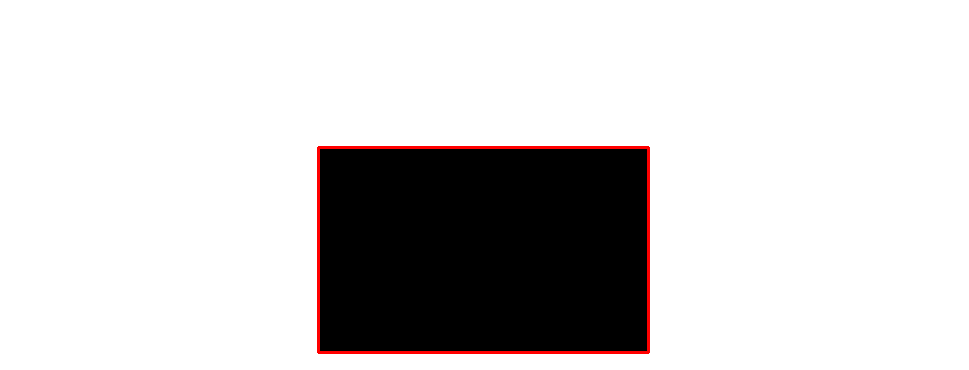

No contours found, skipping drawing rectangles.
Rectangle coordinates: 304 147 662 352
Rectangle coordinates: 304 147 662 352


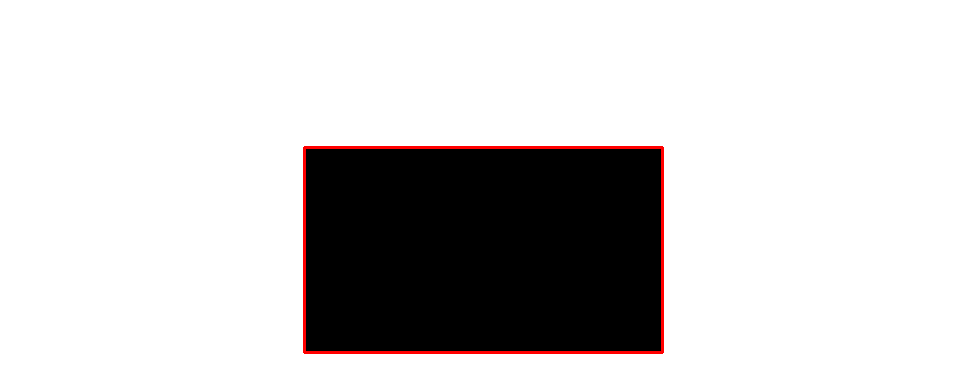

No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.
No contours found, skipping drawing rectangles.


In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import xml.etree.ElementTree as ET
from xml.dom import minidom

# 이미지 파일이 있는 디렉토리 경로 설정
image_directory = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/wheezes_image'

# XML 파일을 저장할 디렉토리 경로 설정
xml_directory = '/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/xml_file/xml_file'

# 이미지 파일 목록을 가져옴
image_files = [f for f in os.listdir(image_directory) if f.endswith('_wheezes.png')]
print(image_files)

for image_filename in image_files:
    # 이미지 파일의 전체 경로 설정
    image_filepath = os.path.join(image_directory, image_filename)

    # 해당 이미지 파일에 대응되는 XML 파일 이름 설정
    xml_filename = os.path.join(xml_directory, image_filename.replace('wheezes.png', '.xml'))


    # 이미지 불러오기
    image = cv2.imread(image_filepath)

    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Canny Edge Detection 적용
    edges = cv2.Canny(gray, 700, 800, apertureSize=7)

    # Contour 검출
    contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Contour가 존재하는 경우에만 사각형을 그리도록 함
    if len(contours) > 0:
        # 각 Contour에 대해 검출된 네모의 좌표를 출력하고 사각형 그리기
        for contour in contours:
            x, y, w, h = cv2.boundingRect(contour)
            print("Rectangle coordinates:", x, y, x+w, y+h)
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

        # 결과 이미지 출력
        cv2_imshow(image)

        # 클래스 레이블 및 바운딩 박스 설정
        class_labels = ['wheezes']
        bboxes = [[(x, y), (x+w, y+h)]]

        # 해당 이미지 파일에 대응되는 XML 파일에 객체 정보 추가
        add_wheezes_info_to_xml(xml_filename, bboxes, class_labels)

    else:
        print("No contours found, skipping drawing rectangles.")


###사각형 검출 코드

In [ ]:
data_list = label_data_list.to_dict('records')
print(data_list[1])

{'Beginning of respiratory': 6.2646, 'End of respiratory': 10.44, 'crackles': 1, 'wheezes': 1}


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 이미지 불러오기
image = cv2.imread('/content/drive/MyDrive/AIFFEL/AIFFELTON/label_data/crackles_image/101_1b1_Al_sc_Meditron_0_crackles.png')

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection 적용
edges = cv2.Canny(gray, 700, 800, apertureSize=7)

# Contour 검출
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Contour가 존재하는 경우에만 사각형을 그리도록 함
if len(contours) > 0:
    # 각 Contour에 대해 검출된 네모의 좌표를 출력하고 사각형 그리기
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        print("Rectangle coordinates:", x, y, x+w, y+h)
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)

    # 결과 이미지 출력
    cv2_imshow(image)
else:
    print("No contours found, skipping drawing rectangles.")


No contours found, skipping drawing rectangles.


###Pascal Voc

In [ ]:
data_list = label_data_list.to_dict('records')
print(data_list[0])

{'Beginning of respiratory': 2.2855, 'End of respiratory': 6.2646, 'crackles': 1, 'wheezes': 1}


###crackle이나 wheezes가 있는 경우

In [ ]:
import xml.etree.ElementTree as ET
from xml.dom import minidom


# 이미지 파일 경로
image_path = '/content/drive/MyDrive/AIFFEL/AIFFELTON/dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/mel_spectrugram.png'

# 객체의 바운딩 박스 좌표 (좌측 상단과 우측 하단 좌표)

#32 269 363 306

# for i in range (len(data_list)) :
#   print(i)
#   # data_list 예시
#   if data_list[i]['crackles'] == 1 and data_list[i]['wheezes'] == 0:
#       class_labels = ['crackles']
#       bboxes = [[(32, 269), (363, 306)]]
#   elif data_list[i]['crackles'] == 0 and data_list[i]['wheezes'] == 1:
#       class_labels = ['wheezes']
#       bboxes = [[(32, 38), (134, 268)]]
#   elif data_list[i]['crackles'] == 1 and data_list[i]['wheezes'] == 1:
#       class_labels = ['crackles', 'wheezes']
#       bboxes = [[(32, 269), (363, 306)], [(32, 269), (331, )]]
#   else:
#       class_labels = []
#       bboxes =[]

# XML 파일 작성
def create_xml(image_path, bboxes, data_list):
    for data in data_list:
        root = ET.Element("annotation")

        # 이미지 파일명
        filename = ET.SubElement(root, "filename")
        filename.text = image_path.split('/')[-1]

        # 크기 정보
        size = ET.SubElement(root, "size")
        width, height = cv2.imread(image_path).shape[:2]
        width_element = ET.SubElement(size, "width")
        width_element.text = str(width)
        height_element = ET.SubElement(size, "height")
        height_element.text = str(height)

        # 객체 정보
        for i, bbox in enumerate(bboxes):
            obj = ET.SubElement(root, "object")
            name = ET.SubElement(obj, "name")
            name.text = class_labels[i]
            bbox_element = ET.SubElement(obj, "bndbox")
            xmin, ymin = bbox[0]
            xmax, ymax = bbox[1]
            xmin_element = ET.SubElement(bbox_element, "xmin")
            xmin_element.text = str(xmin)
            ymin_element = ET.SubElement(bbox_element, "ymin")
            ymin_element.text = str(ymin)
            xmax_element = ET.SubElement(bbox_element, "xmax")
            xmax_element.text = str(xmax)
            ymax_element = ET.SubElement(bbox_element, "ymax")
            ymax_element.text = str(ymax)

        xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
        with open(image_path[:-4] + '_crackles_' + str(data['crackles']) + '.xml', "w") as f:
            f.write(xmlstr)

# # 이미지에 바운딩 박스 그리기
# image = cv2.imread(image_path)
# for bbox in bboxes:
#     cv2.rectangle(image, bbox[0], bbox[1], (0, 255, 0), 2)

# # 이미지 표시 및 저장
# cv2_imshow(image)
# cv2.imwrite(image_path[:-4] + '_annotated.jpg', image)

# # XML 파일 작성
# create_xml(image_path, bboxes, data_list)


###crackle이나 wheezes가 없는 경우